<a href="https://colab.research.google.com/github/charlotte-ho/charlotte-ho/blob/main/Intro_to_Text_Analysis_in_Python_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Media Reactor: Fuelling Public Perception of Nuclear Energy in Southeast-Asia**




---

# **Introduction**

As a dynamic and rapidly developing region, rapid industrialization and rising living standards have led to increased energy consumption, placing immense pressure on existing energy systems. The Association of Southeast Asian Nations (ASEAN) has projected a 60% increase in the region's energy demand by 2040 ([International Energy Agency, 2019](https://https://www.iea.org/reports/southeast-asia-energy-outlook-2019)). This is compounded by the exponential growth of data centers and artificial intelligence technologies in Southeast-Asia - with tech firms like Google, Amazon Web Services, Nvidia and Alibaba heavily investing in the region. These energy-intensive initiatives are accelerating the need for sustainable energy solutions.


Nuclear energy has emerged as a potential solution for the region's growing energy demands. In the [2016-2025 ASEAN Plan of Action for Energy Cooperation](https://asean.org/book/asean-plan-of-action-for-energy-cooperation-apaec-2016-2025-phase-ii-2021-2025/), member countries have committed to build capabilities in policy, technology and regulatory aspects of nuclear energy as part of their broader aspirations to increase the region’s uptake of renewable energy sources [(ASEAN, 2016)](https://asean.org/wp-content/uploads/2023/04/ASEAN-Plan-of-Action-for-Energy-Cooperation-APAEC-2016-2025-Phase-II-2021-2025.pdf). Although nuclear energy is not yet a major part of the region's energy portfolio, this project will focus on three countries that have expressed interest in further exploration:



**The Philippines**

The Philippines houses the region's first and only nuclear power plant - the Bataan Nuclear Power Plant. Although construction was completed in 1984, the plant was never commissioned following public fears in the aftermath of the 1986 Chernobyl accident. However, in 2023, the Philippines signed a Civil Nuclear Cooperation Agreement with the United States to facilitate the transfer of knowledge, nuclear materials and equipment for potential nuclear power projects - otherwise known as the '123 Agreement' [(U.S. Department of State, 2024)](https://www.state.gov/u-s-philippines-civil-nuclear-cooperation-agreement-enters-into-force/). The country aims to to have 1,200 MW of installed nuclear power capacity by 2032.


**Indonesia**

Internally, Indonesia has included nuclear energy in its plans to achieve net-zero emissions by 2060. As of 2024, Indonesia plans to construct nuclear power plants, mainly small modular reactors (SMRs) with a 1,000 to 2,000 MW capacity in the 2030s.


**Singapore**

Presently, Singapore is engaging in further research and development to evaluate the use of advanced nuclear energy technologies (especially SMRs). In July 2024, Singapore signed the 123 Agreement with the United States in hopes of engaging in greater [(U.S. Department of State, 2024)](https://www.state.gov/u-s-singapore-civil-nuclear-cooperation-agreement-enters-into-force/).


Despite renewed government interest, public interest remain generally low. Historical complexities surrounding nuclear power and instances of reactor failures have made nuclear energy a potentially controversial energy source in the region. A 2021 study found that 39% of Indonesians and 22% of Singaporeans were in favour of nuclear energy development. On the contrary, a separate 2019 study found that 65% of Filipinos supported the construction of a new nuclear power plant [(Nuclear Business Platform, 2024)](https://www.ntu.edu.sg/news/detail/public-support-for-nuclear-energy-in-southeast-asia-generally-low). As countries make the push towards nuclear energy, it is crucial to develop public knowledge surrounding nuclear energy concurrently - which should fundamentally be designed around the misconceptions and misinformation that individuals may have. This would allow countries to build public trust and confidence in their nuclear programs.


## Research Objectives and Significance
This study will examine how mainstream media outlets in Southeast Asia frame the potential adoption of nuclear energy using data science techniques. Focusing on media coverage in three key countries—the Philippines, Indonesia, and Singapore—the analysis explores whether nuclear energy is portrayed as a risk, a necessity, or a forward-looking solution. By comparing central narratives across these countries, this research aims to provide a comprehensive understanding of the region’s collective stance. In doing so, this study seeks to identify the opportunities and barriers for nuclear energy adoption - and insights into the interplay between media narratives and public opinion.



## Research Questions

1.   What are the main narratives or themes associated with nuclear energy in the mainstream media outlets of each country?
2.   Do the narratives vary across the three countries?
3. How might the media representation of nuclear energy shape public perceptions, and influence policy decisions?



## Hypothesis
Countries such as Indonesia and Philippines that are at advanced planning stages of the energy transition likely framing nuclear more positively. On the contrary, countries such as Singapore that are still exploring the potential of nuclear energy may present a more cautious narrative and emphasize its risks.


# **Methodology**

## **Part 1: Importing the Libraries**

In [4]:
!pip install --upgrade nltk
!pip install tomotopy
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 9.9 MB/s eta 0:00:00


In [7]:
# Downloading the required resources for NLTK
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
# Importing the libaries for text processing and data manipulation
import tomotopy as tp
import seaborn
import pandas as pd
import glob
from pathlib import Path
import numpy as np
from collections import Counter

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
stops = stopwords.words('english')

In [9]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Part 2: Data Collection**
This study will collect and analyze media content from major mainstream news outlets in the Philippines, Indonesia and Singapore. Specifically, the study will focus on media coverage on nuclear energy between 2020 to 2024. This period coincides with [Phase II of the 2016-2025 ASEAN Plan of Action for Energy Cooperation](https://asean.org/book/asean-plan-of-action-for-energy-cooperation-apaec-2016-2025-phase-ii-2021-2025/), capturing recent developments in nuclear energy in these countries.



To construct the data corpus, articles were extracted from Factiva using the a predefined set of search parameters (see below). Extracted articles were exported with metadata (e.g., publication date, source) and cleaned to remove duplicates and irrelevant content, creating a structured corpus for text analysis.


### Factiva Search Parameters
**Key Words:**

*   [ChatGPT](https://chatgpt.com/share/e/67650003-80b0-800c-9e59-d02143feedb9) was used to generate a potential list of core terms, region-specific terms and contextual terms for reference.
*   The specified country was adapted depending on the publication in question.


```
("Nuclear Energy" OR "Nuclear Power" OR "Atomic Energy" OR "Nuclear Reactor" OR "Nuclear Policy" or "Nuclear Technology")
AND ("Clean Energy" OR "Green Energy" OR "Renewables" OR "Renewable Energy" OR "Sustainables" OR "Sustainable Energy")
AND ("Philippines")
```


**Source**
The following publications were selected as they are among the most widely circulated and read newspapers in their respective countries - an indication of their ability to shape public discourse and influence opinions.

* **The Philippines:** The Manila Times
* **Indonesia:** The Jakarta Post
* **Singapore:** The Straits Times


**Region**
Southeast-Asia


**Language**
English was chosen as the language of choice for analysis. This would allow for consistency in analysis to ensure that potential nuances have not been lost in translation.

## **Part 3: Data Analysis**

### Exclusion of Irrelevant Words

To ensure the topic model focused on meaningful content, a set of country-specific exclusion words was defined for each dataset. These terms, such as "singapore", "nuclear", and "power", were considered irrelevant to the topics being analyzed and were removed during preprocessing. This filtering step prevented the model from being influenced by common country-specific terms that did not align with the thematic focus of the analysis.


The list of exclusion words varied by country to account for local context, ensuring that the model did not treat irrelevant terms as meaningful content. Upon running the model several times, this study noticed that there were random words that would emerged as the top words and were hence added onto the respective excluded words list accordingly.


### Topic Modeling Using Pre-defined Categories

This study utilized topic modeling (using Tomotopy) as the main text analysis method. Instead of simply generating groups based on the top words identified by the model, this study attempted to undertake a more structured approach by creating predefined themes to the generated groups that would be shared across the datasets. Upon creating the overarching themes, ChatGPT was used to generate the keywords. These keywords serve as thematic categories that guided the interpretation of the topics generated by the model.


After training the model with the preprocessed data, the top words for each topic are compared against the predefined keywords, and the topic is labeled based on the overlap with these keywords. Keywords were added along the course of the analysis to better capture the words that emerged out of the datasets.


This allows for a more structured and interpretable output, where each topic is clearly associated with a specific theme. By using this approach, it makes it easier to compare topics across the three different datasets and identify regional differences in media coverage of critical issues.


**Pre-Defined Categories**
```
topic_keywords_shared = {
    'Environment': [
        'climate', 'carbon', 'pollution', 'sustainability', 'green', 'biodiversity', 'deforestation',
        'ecosystem', 'conservation', 'global warming', 'emissions', 'water', 'environmental protection',
        'climate change', 'nature', 'ozone', 'greenhouse gases', 'environmental policy', 'sustainability',
        'eco-friendly', 'environmental impact', 'environmental justice', 'habitat destruction', 'carbon dioxide',
        'waste management', 'ecological footprint', 'climate crisis'
    ],

    'Technology': [
        'innovation', 'technology', 'robotics', 'AI', 'automation', 'machine learning', 'computer science',
        'data science', 'digital transformation', 'Internet of Things', 'cybersecurity', 'cloud computing',
        'blockchain', 'tech startups', 'software', 'hardware', '5G', 'virtual reality', 'augmented reality',
        'smart devices', 'big data', 'artificial intelligence', 'algorithm', 'computational science',
        'network security', 'neural networks', 'quantum computing'
    ],

    'Economics': [
        'economy', 'market', 'growth', 'finance', 'GDP', 'inflation', 'recession', 'trade', 'investment',
        'economic growth', 'fiscal policy', 'monetary policy', 'labor market', 'employment', 'financial crisis',
        'business cycle', 'taxation', 'currency', 'debt', 'interest rates', 'consumer behavior', 'wealth',
        'stock market', 'economic inequality', 'globalization', 'financial markets', 'exchange rates',
        'economic development', 'economic systems', 'wealth distribution', 'economic stability', 'income disparity', 'china'
    ],

    'Safety and Risk': [
        'safety', 'scary', 'safe', 'danger', 'dangerous', 'risk', 'emergency', 'hazard', 'health', 'radiation', 'accident', 'nuclear accident', 'safety standards', 'safety protocols',
        'radiation exposure', 'nuclear safety', 'safety measures', 'radiation leak', 'meltdown', 'nuclear waste',
        'safety concerns', 'emergency procedures', 'risk assessment', 'hazard', 'containment', 'disaster',
        'Chernobyl', 'Fukushima', 'radiation protection', 'fallout', 'safety culture', 'nuclear regulations', 'critical infrastructure'
    ]
}
```



# **The Philippines: The Manila Times**


## Data Collection

In [10]:
path_phil = '/content/drive/MyDrive/Columbia MIA/INAFU6502 Intro to Text Analysis in Python/Python Project/Philippines'

In [11]:
html_code_phil = """

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html>
<head>
	<meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/>
	<title>Factiva</title>
<script>window.ddjskey='D428D51E28968797BC27FB9153435D';window.ddoptions={};</script><script type='text/javascript' src='/datadome/tags.js' async></script>
<link rel="stylesheet" type="text/css" media="all" href="/css/ui.dotcom1390900ui4sr.ashx" />
<link rel="stylesheet" type="text/css" media="all" href="/css/DotComHeadlines1390900ui4sr.ashx" />
<link rel="stylesheet" type="text/css" media="all" href="/css/fcp/print1390900ui4sr.ashx" />

<script type="text/javascript" src="/gen/modernizr.underscore0390900ui4sr.ashx"></script>
<script type="text/javascript" src="/jquery/jquery.bundle0390900ui4sr.ashx"></script>
<script type="text/javascript" src="/xlib/x_combined0390900ui4sr.ashx"></script>
<script type="text/javascript" src="/gen/RecordGenericOD0390900ui4sr.ashx"></script>
<script type="text/javascript" src="/gen/ui.dotcom0390900ui4sr.ashx"></script>
<script type="text/javascript" src="/controls/search/jquery.overlay.1.30390900ui4sr.ashx"></script>

</head>
<body class=''><a id="skip-main" class="skip-main"  href="#PageBaseForm">Skip to main content</a>
<form name="LinkForm" id="LinkForm" method="post"><input type="hidden" id="_XFORMSTATE" name="_XFORMSTATE" value="" /><input type="hidden" id="_XFORMSESSSTATE" name="_XFORMSESSSTATE" value="" /><div id="LinkFormExElem"></div></form>
<script type="text/javascript" src="../gen/funcTwo.js"></script>
<div id="navcontainer" class="fcpNavContainer">
<table cellpadding="0" cellspacing="0" border="0" width="100%">
<tr>
<td class="factivalogo"><h1>Dow Jones Factiva</h1></td>
<td class="djrlogo" align="right"><span>Dow Jones</span></td>
</tr>
</table>
</div>
<form name="PageBaseForm" method="post" action="/hp/printsavews.aspx?ppstype=Article&amp;pp=Print&amp;hc=All" id="PageBaseForm">
<div>
<input type="hidden" name="PageScriptManager_HiddenField" id="PageScriptManager_HiddenField" value="" />
<input type="hidden" name="_XFORMSESSSTATE" id="_XFORMSESSSTATE" value="H4sIAAAAAAAEAHWSbXOiMBDHv0onr0O7GwKE3JtDxfZsfRqrd/ZhOih4taNCFbRX4bvfBr2ZvjkCmWT3v7vZHzmCPo41u3rNrrLtcpPvon1y2F1Gu+yDcVSePqJmievZCydyrRlEaEnfQ0tBbFsLiKQ7dxaxihPGXRJuGK9D0OzQrXdUwdHAwbjzw+4t44JSaxbn63TD4Vsj/NH5xUlg1AxAuawyfk+6LafpqLDRbiAI1wscBcpvBGFThAJCG2wJbfTBawN5GgEAQinoc0r4MpzSgfJ/w0gFSFUiUFWp2bxYWZtk+32eror1bBldJnHBuKNZ6Pb74mbSHN5MBu3rYWckpw9ef9oaDxlXdZdIzVZc+GbzeBSa+cx0Haf5PF2blkX1XHGfWCDWQEiHZEZqV2r0uXCMCU4mqSkFcLtWGhtQbreOoYVnvMjPCQRZlGaE88ICgg0l8ouUfoawzwFI7l6aj/JomycxHcbWLFitSCH/1YSqxm6HIF0ACAk2USeoSqkSiCsI+Pogmum8Ni+emDLTI6v5FavljErQIakcjkeBAQI155GB+shQSvZM/MDErGdrugTEgh2vw54+ju71E5sOmjDwi584xVfYvYj2Hjb7P/5tmD303j+Lt+5yPcvmUxyqWZduJQmCLk3v93dRlk4OfiE+250smd/1lLpdbH+PX+xWKZ5YVVEpOBW14HSwqvoLHi/JzRADAAA=" />
<input type="hidden" name="_XFORMSTATE" id="_XFORMSTATE" value="H4sIAAAAAAAEAKVa3VLjOhJ+FVVqa7nYMOWfJCS543eGPUOgBjjn4tS5UOxOImJbPpKdkBmoOu+wb7hPst1yANkwW9oVNTCW7XR/arX6627lRzj9gf/iwTTsh4Np0B9Pe8VyJXQllUh4poGrZMW3uuz1J9Pexf3Xb71+FE57d09FnWT4lN09QQFquWPXT5+YfbuUW1D7u7ySuUh+/q4CnqDKD2RkImlev37qt37t1ypIVoXM5PLt1bsnelh0VS4VwLubCkdbPs9A24PuW7rWFReFefQejP209cHmcbkSmShLUaCO66d/mF80i6pEYj6goJSqwouFMOMtzEu+pKs5Tgv/y+usEjmkgr9TvtcgkqpWDbTZ0yKv8IosnvNC4A2lmxtvynFtteDf6Rm8PiLoeCfj1p03lAZco24PuBm8oH2PZI+/DYrEzp7KlJ09RUEUBGEQNpeDMAoG+DilV9DRhuiRMf6GR+SfeDGahnhnSKN4OumHw+nvP5r7PcZuvvTZ/fE52xu/VPIBkoqlgH7McHUQ7j95UXO16/VJ4HDaS1UxJQ8XG/iEy673U/10dTy7DPBnjymEdRLReGe2AZm01w9DghGh9mjag6KHSH8E095xI6L33MfBz+U8923grJJsJXGJyoxr/DxDx8/qSsiC6TrPRUWII2fEYRygppDGAx/ELTk24itQPEtkn13gdklWbCFUzmAHoljSbIp6DTSVotIEPHYHHh7Bei5ovPECbsv5EPgtz3WNaE//fkfAG9RNPGn7j5nBwHkGQTiANV/gMBz6zKAlx57BsaawlkjyigpS8pwDKNJake21bLxGH7B///UvdoVwpZnA8H+YQISKUxrHfhOw5HywBIynqWYDppOVlLhBRfG6AGj5peI54R654g7G0RDW4z/JYIEH7rYcG/dpJnJeAVsqWZdTdnJy1WcHGFZ2rFI1HNBCJPtXMBYWKSf8R874j6IJrI+UN/6WHBv//a0JhQxjSol0C4s6Y7UGJhddzy/klpZjIVUCNImx+yRCDBhHnIZbr0nYcuxJnMlzpqHSbClxKoiQ6ZxnGctlWmc4g30iYXx+4gx7ROpGRl3lA7slx4Z9IlIoDjR6Ck+BVcBzcpeN0KLCyGPoKHBGG4VjWEcmuI180LbkdI0stK4xV1nWiDwzaQsZe7VLcW9iiiCKDegqh8IwU+hMpvgH41o0pPGjF3hbjg1+zE6vb6Ixq/ga+JbvGuDzWtMkNBjPCF2pNA6jKIKHpKCx/P/xduR0yP9BikKzstYrgzWFhKu5LMR3TrHcAHalUFSEq/qQPNAYvADbclpxkBcc09ACo8VG7jB8LEDp1xDysgHJv/ee7UqecRiSkeY5jR98sLfk2Ng/U+xmGa+Reu5vDy3Sp9Bo0LoyJWoJJ6iFLBSnXmhtOS3XeCsa+hS+tVgW3Vj9ituVKV/0mX2/9Me9l/MRw6ML6KpOd12aOZhzTF2UAH1goLuSJKkcocqVZ/ToyGnvRmNpQk7GPgijuMlmOVWOFO8ayK6USKqGqGpJ47kfZEtOKyE8OT41uM3G5CwVOqm17jqKKCrArOo1oriyI2rGuuVh7lv/dOR0QiCGjQUVEbqVm+j3yYkphFy5MkaVuNAmjQ7+9MHekmNjP39ETy4wF1kBT7eiwMCyBbbAOTBepEzW+5C4N3vkypSkEs3F55TIrfygW3JagXwlCt7Hmrh8CeZYJpdoabkBhRWGollxRUSPtYVB78ybwYSCw8TQR+2Bvi2nZfirm+vfzr9dzj6zy9nZ5a+XZ/fHX2/Zb1+uMQGY3X27PLm/O2d31+zuyzk7Pvv1eHZ6fnU+u2PXF+z29PIch1PyPCyZMCNWkADOh1h4nmH9rUFtBK3hlquULZTM2XEO1BMr2GzvkLcyEVDt2E9+jMGcedvk7Q9HlW+caMtpRWX+IJWoiLHZBRGLKCQuONYvaAUygViuKspQk7WB7kzbwYjodmTo9rsP9JacdulF9l6SXxYUgzHG4YKZ9kgBkDZVsIK0xhX7/OUzFS96ZZizcVtnTg9GAe7z0REOBx7le0eOPZU7rAAEIcfN1XRImz4JMqXAOqaZjgHtTOjBMMBUbTihBEL7gG7JaZeOh3Ou0cwvsdj0e9DmTRlA9m5yvciZylEZLvYwpvHYD7QlxwZ9MJPGnE3+L5YtcxsWj5xZPBgQdw2oE+bT1unIsdFOTDgGTJQaGpwDDlP27RwBQ7ps6pbImbQx6AfwEFIpGngBbsmxAX/hSgltETemTQ1UcowUFoDwG6+IXfk6Mpm7aDJ3jwZgR047ClJLjMk1VYbwWGayyYkoKmIpo1dSASMeb9zFwHflbFSLXCvmhmtDL/i2nPfw+6ZEh0dIsM7CeJ3BS5anIakpyBvcrmxN+gLUR6sccj/clhwb9y0U3JSFTc8jkTWmowqTjcp0/i4UL5peU+zKmKgMd77gGwpXEy/QtpwPfAXxVTxbY2InqhW5uR0FDWZXqoyCSYQGmmQ09EiLOnJszP/l5+T6kvGyVJLynL+NDk9MdLG63LErT6J+pAoxMVThURN05HQLscYrXs4VctqZLbiuDBkF4/AIxNjUex59yY6cTnOVjnAgK81pDi9Zc/z4VrTErtSIWsgo4zGNfaJIW46N9heAEtPXusKiBen7WAtuqtzDBRa55uTg7OKYIUpYGOiuPEkqY1QZe/t3S04rf+KPyDlI6Tlbw46MvlRyi/uyfd4RuzJlhAkzrukRNfwDjzqrI6eViNwoQZm3+A7s9XS5zwpZvZ14ENeYnGTgzJWYY6JCk2MGHmlfR06ra80rTmdNmaEWWZaSSvK3wz2D15kcUc8Q9Qxo7NHd68ix8c7gscIIAZq67RXjev1SGZiD4Fdjv2J3JshgQIQ8MGnQwgd7S85HjSc6GqhLqsde4CZSlvDWuBk4E2QQhyMQMbWMYuUDuiWn5SAnV2yO+YdmJ7Obmz77CjLdmXzb8vNuIBy4syXWUah4REOPwrIjpxO2m+QVCxmxP03doO/Q1xdE8TaL5hDYnR4jigWRiQU++VRbjg38m5xjvSsx34M1JeEbAVtKYfc1jn107c6SYYTOGZqk2eMYrCOnlQVusbot9i5j+wXWC5tmS7qyJGX4AaySNQ09esEdOTbarzzRuA+vf6EuyQLawdqAdeXF0PQ+V03vM/IB25LTOtmQG4xwPMcAPeOlTHAPYjkjElCHojhMVlwtTX49cCXGMBiTYcZkGJ8KvSPHxnwhqmTF6kJUphPX+C6dFVABqaSJgqdyI1Im8pInxkGGrvwYBJMwguUk8cTfkfP8Rz+iLw/Rl+XCCX0/aURX9Ceie1FA96Jp1A/H9CDAq8g8JY0I/fYEVYThgJRGz8/P/wHdZZU8gycAAA==" />
<input type="hidden" name="__VIEWSTATE" id="__VIEWSTATE" value="" />
</div>

<script type="text/javascript">
<!--
if((typeof RootNewWindowDirectory == 'undefined') && (!RootNewWindowDirectory)){RootNewWindowDirectory = 'https://global-factiva-com.ezproxy.cul.columbia.edu/en';}
isPostProcessing = true;
languageCode = 'en';
logOmniture = true;
// -->
</script><script type="text/javascript">
<!--
function translate(t) {
var r={"yes":"Yes","no":"No","ok":"OK","djheaderaWNPLikeLink":"${djheaderaWNPLikeLink}","djheaderDontShowMe":"Don\'t show me this again","djheaderFirstView":"${djheaderFirstView}","djheaderLoremipsum":"Factiva is powered by the most comprehensive collection of business information in the world.","djheaderGetStarted":"Get Started","djheaderTryitlater":"Try it later","snapShotPrd":"Homepage","snapShotNavBeta":"${snapShotNavBeta}","nameIsRequired":"Please enter a 1-25 character name.","snapShotBeta":"Homepage","tryItNow":"Try It Now!","whatsNewPopUpTitle":"What\'s New","invalidEmail":"You have entered an invalid e-mail address.","profValidEmail":"Please enter a valid e-mail address.","sSun":"Sun","sMon":"Mon","sTue":"Tue","sWed":"Wed","sThu":"Thu","sFri":"Fri","sSat":"Sat","sunday":"Sunday","monday":"Monday","tuesday":"Tuesday","wednesday":"Wednesday","thursday":"Thursday","friday":"Friday","saturday":"Saturday","sJan":"Jan","sFeb":"Feb","sMar":"Mar","sApr":"Apr","sMay":"May","sJun":"Jun","sJul":"Jul","sAug":"Aug","sSep":"Sep","sOct":"Oct","sNov":"Nov","sDec":"Dec","january":"January","february":"February","march":"March","april":"April","may":"May","june":"June","july":"July","august":"August","september":"September","october":"October","november":"November","december":"December","smallAm":"${smallAm}","smallPm":"${smallPm}","capitalAm":"${capitalAm}","capitalPm":"${capitalPm}"};
return (r && t && r[t] || r[t] === '')? r[t] : t || null;
}
// -->
</script>
<script src="/ScriptResource.axd?d=na9ThF35vypYMd7Jk_rxYO38HjXffKotc0wvG_70TpcLVKfZBZPIM8kH05SebEymwP8VMdB5A4PWnvSTWMpmgkzkPMRWw3LUebC7IY1-RzB_CjMRRSx8x83UUIIagDyIsgi9fBsYewhw-mD8wu8dSyqNoNY1&amp;t=2a9d95e3" type="text/javascript"></script><link href="/WebResource.axd?d=NhJjFR_XCMs18rNVWoDInluTIB_uBACnN1nBI-8xV6GiPce6R6t2x0Iz5ENz8Px7hAME9tFr3xqyYeeLelCj5XdG2swm5QVvr04cmRtyfAQYQSvyeyzPxiKMkscYlRJ3KlT37g2&amp;t=638484482820000000" type="text/css" rel="stylesheet" /><div id="contentWrapper"><div id="contentLeft" class="carryOverOpen"><span></span><div id="article-MANI000020241201ekc20000y" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>PH, UAE energy project deals start January</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>ED PAOLO SALTING </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>301 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>2 December 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >THE Department of Energy (DOE) on Sunday said the Philippines had signed a memorandum of understanding (MOU) with the United Arab Emirates (UAE) to collaborate on renewable energy and other projects starting January 2025.</p>
<p class="articleParagraph enarticleParagraph" >Energy Secretary Raphael P.M. Lotilla confirmed the signing, following President Ferdinand Marcos Jr.'s meeting with UAE President Mohammed bin Zayed Al Nahyan on Nov. 26.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"The terms of this agreement were previously discussed with UAE Minister of Energy and Infrastructure Suhail Mohamed Faraj Al Mazrouei during our meeting in Abu Dhabi last month," Lotilla said.</p>
<p class="articleParagraph enarticleParagraph" >"Our dialogue emphasized fostering meaningful business collaborations and positioning the Philippines as a prime destination for Emirati investments in critical energy sectors, including developing robust energy infrastructure and advancing renewable energy projects. To operationalize this MOU, an implementation agreement with a UAE state-owned company is expected by January next year," Lotilla added.</p>
<p class="articleParagraph enarticleParagraph" >The MOU identifies possible partnerships in renewable energy; liquefied natural gas as a transition fuel; power generation, transmission and distribution systems; nuclear energy; energy efficiency and conservation; and alternative fuels and emerging technologies.</p>
<p class="articleParagraph enarticleParagraph" >"At its core, this partnership reflects the mutual recognition that energy lies at the heart of development. By combining the UAE's leadership in innovative energy solutions with the Philippines' ambitious drive for energy security and sustainability, this has the potential to transform not only industries but also the lives of millions of Filipinos," Lotilla explained.</p>
<p class="articleParagraph enarticleParagraph" >"By attracting investments in energy infrastructure, the partnership will generate new jobs, enhance local expertise through technology transfer and capacity building, and support the development of a robust energy ecosystem. The focus on these five areas will ensure that these advancements benefit all sectors of society, contributing to a more equitable distribution of resources and opportunities," he added.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i32 : Machinery | iindstrls : Industrial Goods | irenewee : Renewable Energy Equipment</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | gulfstz : Persian Gulf Countries | meastz : Middle East | phlns : Philippines | seasiaz : Southeast Asia | uae : United Arab Emirates | wasiaz : West Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020241201ekc20000y</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020241130ekc100004" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>PH to host plastic pollution summit</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>By JAVIER JOE ISMAEL </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>233 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>1 December 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >THE Department of Science and Technology said the Philippines was chosen to host the first International Atomic Energy Agency (IAEA) International Conference on Nuclear Technology for Controlling Plastic Pollution (Nutec Plastics) in November 2025.</p>
<p class="articleParagraph enarticleParagraph" >"Plastic pollution is a major global concern that necessitates global solutions. Nuclear applications can provide one of them," said Science and Technology Undersecretary Leah Buendia,</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Buendia led the Philippine delegation to the IAEA Ministerial Conference on Nuclear Science, Technology and Applications and the Technical Cooperation Program in Vienna from Nov. 26 to 28.</p>
<p class="articleParagraph enarticleParagraph" >The conference discussed the role of nuclear science and technology in addressing challenges in health, food security and safety, water resource management, and climate change.</p>
<p class="articleParagraph enarticleParagraph" >Nutec Plastics is IAEA's flagship initiative to address plastic pollution. It brings together countries and partners worldwide to fight plastic pollution on two fronts: at the point of source, by introducing new technologies to improve plastic recycling, and in the ocean, where the bulk of plastic waste ends up. More than 80 countries were part of the initiative.</p>
<p class="articleParagraph enarticleParagraph" >Buendia said the Philippines was host to various IAEA-supported projects on the peaceful applications of atomic energy, including cancer care, pharmaceuticals, food safety, education and environment protection.</p>
<p class="articleParagraph enarticleParagraph" >"The Philippines recognizes the transformative effect of atomic energy for sustainable development and commends the agency for its continued delivery of assistance," she added.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>iaeagy : International Atomic Energy Agency | utdnat : United Nations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | genv : Natural Environment | gplpol : Plastic Pollution | gqual : Environmental Pollution | gsci : Sciences/Humanities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | phlns : Philippines | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020241130ekc100004</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020241117ekbi0000v" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Meralco, French firm eyeing PH nuke plants</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Ed Paolo Salting </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>378 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>18 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                        <span class="companylink">MANILA Electric Company</span> (Meralco) is in talks with France for a feasibility study on building conventional nuclear power facilities in the Philippines.</p>
<p class="articleParagraph enarticleParagraph" >In an interview on Friday night, Meralco executive vice president and COO Ronnie Aperocho said the power distribution firm met with Ă‰lectricitĂ© de France officials "not for small, modular reactors but for bigger, conventional ones with a capacity of 1,200 megawatts (MW)."</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"The study will focus on viability, especially on site selection. There are 10 possible sites which the Department of Energy (DOE) is announcing at the soonest possible time," Aperocho said.</p>
<p class="articleParagraph enarticleParagraph" >He explained small modular reactors (SMRs) are a new technology that could take years before proper international standards are implemented for such infrastructures. But he also clarified Meralco is not ruling out entirely the acquisition of SMRs.</p>
<p class="articleParagraph enarticleParagraph" >"We signed a memorandum of understanding for micro modular technologies. We're looking for the same type of memoranda for SMRs, as well as conventional types," Aperocho said. "But what is crucial [is what] the government will say, what type of technology we will use, whether it is micro modular, SMR, or conventional."</p>
<p class="articleParagraph enarticleParagraph" >Aperocho pointed out Meralco chose France for its track record of operating and maintaining nuclear power plants, which it started building as early as 1948. "Its safety record is proven ... with end-to-end solutions ... like waste disposal, as well as the fabrication of the reactors," he said.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">World Nuclear Association</span> noted France "has been very active in developing nuclear technology. Reactors and especially fuel products and services have been a significant export. France derives about 70 percent of its electricity from nuclear energy due to a long-standing policy based on energy security."</p>
<p class="articleParagraph enarticleParagraph" >Aperocho said Meralco sees nuclear energy as "the ultimate solution for our requirements for a reliable power supply base load in the Philippines. Liquefied natural gas (LNG) can only do so much as a transition type of energy, while renewables have yet to be proven reliable enough to provide power on a 24/7 capacity ... I hope our countrymen can see nuclear energy can be greatly beneficial if given a chance."</p>
<p class="articleParagraph enarticleParagraph" >Meralco's Friday share price went up by P35.00 to close at P485.00 apiece.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | eecz : European Union Countries | eurz : Europe | fra : France | manil : Manila | medz : Mediterranean Countries | phlns : Philippines | seasiaz : Southeast Asia | weurz : Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020241117ekbi0000v</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020241014ekaf00015" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Meralco, Samsung C&T eye PH nuclear energy projects</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>ED PAOLO SALTING </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>317 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>15 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                        <span class="companylink">MANILA Electric Co.</span> (Meralco) on Monday said that it had sealed a memorandum of understanding (MoU) with South Korea's Samsung C&T Corp. Engineering & Construction (<span class="companylink">Samsung C&T</span>) Group to promote the adoption of nuclear energy projects.</p>
<p class="articleParagraph enarticleParagraph" >"Through this MoU, Meralco stands to gain a comprehensive understanding of the critical aspects of nuclear energy development that will ensure that our future decisions are well-informed and aligned with international best practices," Meralco Executive Vice President and COO Ronnie Aperocho said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"Moreover, this aligns well with Meralco's continuous efforts to work with global knowledge and technology partners to help us in our transition towards more diversified and sustainable energy sources," he added.</p>
<p class="articleParagraph enarticleParagraph" >Under the agreement, Meralco and <span class="companylink">Samsung C&T</span> will jointly tackle the technical design and capabilities of nuclear technology, the possible regulatory framework, energy landscape, and necessary grid infrastructure in the Philippines.</p>
<p class="articleParagraph enarticleParagraph" >The two will also explore the roll-out of a pilot demonstration project and other opportunities for nuclear power plant development.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Samsung C&T</span> was said to be planning to construct large nuclear power plants and small modular reactor projects.</p>
<p class="articleParagraph enarticleParagraph" >Meralco noted that the Philippines and South Korea had agreed to conduct a feasibility study regarding the revival of the Bataan Nuclear Power Plant.</p>
<p class="articleParagraph enarticleParagraph" >"Our collaboration with <span class="companylink">Samsung C&T</span> is a strategic move that cements our commitment to take an active role in contributing to the Philippine government's efforts to integrate nuclear energy in the country's future power supply mix," Meralco Chairman and CEO Manuel Pangilinan said.</p>
<p class="articleParagraph enarticleParagraph" >"As we collectively work on the safe and secure adoption of this next-generation technology, we remain focused on our ultimate goal of ensuring energy security and achieving sustainable and inclusive growth in the Philippines," he added.</p>
<p class="articleParagraph enarticleParagraph" >On Monday, Meralco's share price fell by P8.00 to close at P471.00 apiece.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>smevri : Samsung C&T Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | iconst : Construction | icre : Real Estate/Construction | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | easiaz : East Asia | manil : Manila | phlns : Philippines | seasiaz : Southeast Asia | skorea : South Korea</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020241014ekaf00015</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020241012ekad00003" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Asean committed to 'enduring solutions' – Marcos</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>CATHERINE S. VALENTE AND JAVIER JOE ISMAEL </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1280 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>13 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >PRESIDENT Ferdinand Marcos Jr. on Friday night returned to the Philippines from Vientiane, Laos, after obtaining commitments from fellow members of the <span class="companylink">Association of Southeast Asian Nations</span> (Asean) to find "enduring solutions that would safeguard" their collective future.</p>
<p class="articleParagraph enarticleParagraph" >The President and his delegation arrived at Villamor Airbase in Pasay City aboard the Presidential plane at around 10:23 p.m.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >In his arrival statement, Marcos said the discussions among our partners and friends "were not just about the challenges we face individually, but equally important also about our shared commitment to finding enduring solutions that would safeguard our collective future."</p>
<p class="articleParagraph enarticleParagraph" >Marcos said he and the other Asean leaders agreed to work closer together in promoting sustainable agriculture to achieve long-term food security.</p>
<p class="articleParagraph enarticleParagraph" >"We are collaborating with our partners to support our MSMEs through addressing financing gaps and enhancing their capacities to integrate into global supply chains," he said.</p>
<p class="articleParagraph enarticleParagraph" >To prepare the country and the region for the future, Marcos said the Asean leaders are together galvanizing the efforts to support the digital transformation of their economies.</p>
<p class="articleParagraph enarticleParagraph" >"We are shepherding efforts in Asean to promote inclusive and sustainable tourism across the region. These would complement the Philippines' initiatives in positioning itself as a prime destination for sustainable tourism," he said.</p>
<p class="articleParagraph enarticleParagraph" >Marcos also said the Philippines was leading critical initiatives that are significant to the future of this region.</p>
<p class="articleParagraph enarticleParagraph" >"As host of the Loss and Damage Fund Board, the Philippines is privileged to play a strategic role in supporting the flow of climate finance to countries which are most vulnerable to climate change, as well as advocating for needed support and action on climate resilience," Marcos said.</p>
<p class="articleParagraph enarticleParagraph" >"As part of our actions to contribute to help mitigate the devastating effects of climate change, we will be hosting the Asia-Pacific Ministerial Conference on Disaster Risk Reduction next week to cooperate with other countries on disaster preparedness and response," he added.</p>
<p class="articleParagraph enarticleParagraph" >The President said he also engaged with the business sector of Asean as well as with representatives of the youth in Asean "in order to exchange ideas on how we can best promote the prosperity and welfare of our people and the entire region."</p>
<p class="articleParagraph enarticleParagraph" >Marcos said the Asean leaders also discussed significant international issues and emerging challenges that not only impact our nation but also the entire region, including the West Philippine Sea.</p>
<p class="articleParagraph enarticleParagraph" >"I reaffirmed that the Philippines will continue to defend our sovereignty, sovereign rights, and jurisdiction in the West Philippine Sea. All Philippine actions are in accordance with international law," Marcos said.</p>
<p class="articleParagraph enarticleParagraph" >"The Philippines is continuing to strengthen its partnerships with all countries who share our values and our commitment to peace and the rule of law," he added.</p>
<p class="articleParagraph enarticleParagraph" >On the sidelines of the Summit, Marcos said he took the opportunity to engage leaders to discuss bilateral cooperation and strategic areas of mutual interest.</p>
<p class="articleParagraph enarticleParagraph" >He said they discussed agriculture cooperation with Vietnam, building on recently signed agreements on rice trade, smart agriculture, research and technology, farm management, and sustainability.</p>
<p class="articleParagraph enarticleParagraph" >The President said he had the opportunity to thank Canada for its consistent support for the Philippines, especially on defense and maritime interests.</p>
<p class="articleParagraph enarticleParagraph" >"We congratulated Canada on its G7 Presidency and looked forward to the successful conduct of the Team Canada Trade Mission in the Philippines this coming December," he said.</p>
<p class="articleParagraph enarticleParagraph" >In a bilateral meeting with New Zealand, Marcos said they explored ways to elevate bilateral cooperation in time for the 60th anniversary of the establishment of diplomatic relations in 2026.</p>
<p class="articleParagraph enarticleParagraph" >Making full use of their schedule while abroad, he said he also briefly met with the Leaders of Lao PDR, the <span class="companylink">European Union</span> and Japan and expressed the Philippines' commitment to further strengthen bilateral relations.</p>
<p class="articleParagraph enarticleParagraph" >"The Philippine delegation and I are grateful to Lao PDR, the Chair of Asean this year and our generous host, for their successful chairmanship. I look forward to Malaysia's able leadership as they host Asean in 2025," he said.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, China has again emphasized its opposition to the US deployment of the land-based Mid-Range Capability missile system in the Asia-Pacific, including the Philippines, in whatever form it may take.</p>
<p class="articleParagraph enarticleParagraph" >"We hope that relevant parties will see the high sensitivity and harm of this issue, oppose the US's attempt and move to heighten antagonism and confrontation, stoke an arms race in the region, and jointly uphold the security and stability of the region," <span class="companylink">China's foreign ministry</span> spokesman, Mao Ning, told reporters in Beijing on Oct. 11, 2024.</p>
<p class="articleParagraph enarticleParagraph" >Mao said that the deployment of offensive strategic weapons at other countries' doorstep by a nuclear power seriously disrupts regional peace and stability, undermines other countries' legitimate security interests, and contravenes people's aspirations for peace and development.</p>
<p class="articleParagraph enarticleParagraph" >In April, the <span class="companylink">US Army</span> deployed the Typhoon system to the Philippines. This system can launch missiles such as SM-6 and Tomahawks with a range of over 1,600 km.</p>
<p class="articleParagraph enarticleParagraph" >"It was the first time the US deployed the Mid-Range Capability missile system outside its territory and in the Asia-Pacific since the end of the Cold War. It was also the first time the US deployed a strategic weapon of this kind after it withdrew from the Intermediate-Range Nuclear Forces Treaty in 2019," Mao added.</p>
<p class="articleParagraph enarticleParagraph" >Despite Chinese demands, the United States has no immediate plans to remove the missile system deployed in the Philippines. According to sources with knowledge of the matter, the country is also testing the feasibility of its use in a regional conflict.</p>
<p class="articleParagraph enarticleParagraph" >The deployment occurred as China and the Philippines, a defense treaty ally of the US, are in conflict over areas in the highly disputed South China Sea. Several confrontations have occurred at sea and in the air in this strategically vital waterway in recent months.</p>
<p class="articleParagraph enarticleParagraph" >Foreign Affairs Secretary Enrique Manalo assured his Chinese counterpart in July that the missile system's presence in his country posed no threat to China and would not destabilize the region.</p>
<p class="articleParagraph enarticleParagraph" >China has fully militarized at least three of several islands it built in the South China Sea, which it mainly claims in full despite a 2016 arbitral ruling that backed the Philippines, arming them with anti-ship and anti-aircraft missiles, the US has said.</p>
<p class="articleParagraph enarticleParagraph" >China says its military facilities in the Spratly Islands are purely defensive, and it can do whatever it likes on its territory.</p>
<p class="articleParagraph enarticleParagraph" >On Friday, October 11, US Secretary of State Antony Blinken met with leaders of the Asean bloc and condemned Beijing's increasingly dangerous and unlawful actions in the South China Sea.</p>
<p class="articleParagraph enarticleParagraph" >Mao said, "Let me stress that China's territorial sovereignty and maritime rights and interests in the South China Sea were established over a long period of history and are solidly grounded in history and the law.</p>
<p class="articleParagraph enarticleParagraph" >She stressed that China and parties to the South China Sea have every capability and wisdom to address disputes adequately through dialogue and consultation and jointly get the situation at sea under control.</p>
<p class="articleParagraph enarticleParagraph" >"The US and individual countries outside the region are upgrading the deployment of weapons and military activities in the South China Sea to incite confrontation and create tensions. They are the biggest source of instability in the South China Sea," she pointed out.</p>
<p class="articleParagraph enarticleParagraph" >China has overlapping claims with Asean members Vietnam, the Philippines, Malaysia, Brunei and Taiwan. About a third of global trade transits through the sea, which is rich in fishing stocks, gas and oil.</p>
<p class="articleParagraph enarticleParagraph" >A series of recent violent confrontations between China, the Philippines and Vietnam have fueled concerns that China's increasingly aggressive actions in the sea could spiral into a full-scale conflict.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>assean : Association of Southeast Asian Nations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gdip : International Relations | gpir : Politics/International Relations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | phlns : Philippines | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020241012ekad00003</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020240825ek8q00010" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Meralco adds 4 schools in nuclear program</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>ED PAOLO SALTING </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>285 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>26 August 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                        <span class="companylink">MANILA Electric Co.</span> (Meralco) on Sunday announced it has added four more foreign universities as knowledge partners in developing nuclear energy as a power source in the Philippines.</p>
<p class="articleParagraph enarticleParagraph" >The electric power distribution firm said it has signed several memoranda of understanding with Ontario Tech University in Canada, University of Illinois Urbana-Champaign in the United States, and Harbin Engineering University and <span class="companylink">Tsinghua University</span>, both in China, to collaborate on the development and implementation of nuclear energy-related programs and joint research projects on the adoption of alternative power sources in the Philippines.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"Our commitment to explore the adoption of nuclear energy in the country is reinforced by these milestone collaborations with reputable international institutions," Meralco Executive Vice President and Chief Operating Officer Ronnie Aperocho said. "These partnerships will help us in having greater understanding of nuclear technologies, ensuring that challenges are addressed, and plans are well-aligned with government policies prior to deployment."</p>
<p class="articleParagraph enarticleParagraph" >The partnerships aim to strengthen Meralco's nuclear energy program, the Filipino Scholars and Interns on Nuclear Engineering (Fission).</p>
<p class="articleParagraph enarticleParagraph" >"Through Fission, we hope to cultivate the next generation of strong innovators in the field of nuclear energy, which in turn will help empower and further enhance the competencies of energy professionals to advance sustainable energy solutions for the country," Aperocho explained.</p>
<p class="articleParagraph enarticleParagraph" >Fission was launched at the Meralco Power Academy in 2023.</p>
<p class="articleParagraph enarticleParagraph" >The first batch of Fission scholars will start their three to four-year nuclear engineering program in the aforementioned universities. Upon finishing their courses, the scholars will work in Meralco's nuclear power generation unit.</p>
<p class="articleParagraph enarticleParagraph" >Meralco's Thursday share price went up by P2.00 to close at P418.00 apiece.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>tsghuu : Tsinghua University | unveis : University of Illinois System</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gcns : National/Public Security | gdef : Armed Forces | gedu : Education | guni : University/College | gweap : Weapons Programs</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | manil : Manila | phlns : Philippines | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020240825ek8q00010</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020240729ek7r00010" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Climate group: BBM, 'stay true' to climate agenda</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BY ARIC JOHN SY CUA </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>441 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>27 July 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >A GROUP of climate reality leaders called on President Ferdinand Marcos Jr., also popularly known as BBM, to stay true to his administration's climate agenda, which focused primarily on renewable energy (RE) after he delivered his third State of the Nation Address (SONA) on July 22.</p>
<p class="articleParagraph enarticleParagraph" >In a statement on their website after the SONA, <span class="companylink">the Climate Reality Project</span> Philippines said that while it "holds promise" for underserved communities, Marcos' call for a unified Philippine grid fell short of addressing the country's broader energy woes.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >As Marcos highlighted his focus on RE in his climate agenda, the group urged him to accelerate its growth.</p>
<p class="articleParagraph enarticleParagraph" >"As a domestic resource, renewable energy shields the country from global market price fluctuations, making electricity more affordable for Filipinos. The government needs to further unlock the country's huge potential for renewable energy," they stated.</p>
<p class="articleParagraph enarticleParagraph" >The group pointed out that RE's "compelling" benefits are already evident in the country. "Participants in the government's Green Energy Option Program who have switched to 100 percent renewable power sources are experiencing substantial cost reductions of 10 to 40 percent on their electricity bills," it added.</p>
<p class="articleParagraph enarticleParagraph" >The climate organization also called on the President to phase out coal and fossil gas, saying that nuclear power plants, which take too long to build and do not lower power rates, will "not see the light of day in this administration."</p>
<p class="articleParagraph enarticleParagraph" >They also maintained "fossil fuels and nuclear energy are not viable long-term solutions for the Philippines. Coal, an expensive import, and fossil gas, reliant on foreign supply, expose us to price volatility."</p>
<p class="articleParagraph enarticleParagraph" >Climate Reality Project Philippines also wanted Marcos to modernize the country's grid to a decentralized grid and a distributed energy system.</p>
<p class="articleParagraph enarticleParagraph" >"Our current centralized, baseload-oriented system is ill-equipped to handle fluctuating energy demands. The country needs to transition toward a distributed and decentralized energy system where variable renewable energy capacity can supplement our main interconnected grid," explained the climate group.</p>
<p class="articleParagraph enarticleParagraph" >The group also suggested "streamlined permitting processes, sustainable procurement practices and incentives for renewable energy projects" to realize RE's potential. Transmission infrastructure must be expanded, and a supportive policy environment created.</p>
<p class="articleParagraph enarticleParagraph" >The group urged Marcos to "implement concrete plans and actions" to his climate plan and "make it a reality."</p>
<p class="articleParagraph enarticleParagraph" >"We call on him to address the growing demands of the Filipino people by charting a path toward clean, reliable and affordable power through renewable energy," they said.</p>
<p class="articleParagraph enarticleParagraph" >Marcos previously said RE was at the forefront of his climate agenda, and he emphasized it was the way forward.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>tcmryp : The Climate Reality Project</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | phlns : Philippines | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020240729ek7r00010</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020240710ek7a0002w" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>US deal on peaceful use of nuclear energy now in force</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BERNADETTE E. TAMAYO </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>497 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>10 July 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >THE agreement for the cooperation in the peaceful uses of nuclear energy between the United States and the Philippines entered into force on July 2, the <span class="companylink">US Department of State</span> said.</p>
<p class="articleParagraph enarticleParagraph" >This deal is part of broader US efforts to develop the Philippines' civil nuclear sector, the <span class="companylink">US State Department</span> said in a media note on Monday (Tuesday in Manila), which was shared by the US Embassy in the Philippines.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >It will enhance the US and the Philippines' cooperation on clean energy and energy security and strengthen their long-term diplomatic and economic relations.</p>
<p class="articleParagraph enarticleParagraph" >The deal will permit the transfer of nuclear material, reactors, components, and information for nuclear research and civil nuclear energy production to concerned Philippine agencies, the State Department said.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear energy is sometimes referred to as a clean energy technology, as it produces nearly zero carbon dioxide or other greenhouse gas emissions. Nuclear energy produces electricity that can be used to power homes, schools and businesses.</p>
<p class="articleParagraph enarticleParagraph" >Civil nuclear cooperation agreements, also known as "123 agreements," provide a legal framework for exports of nuclear material, equipment, and components from the US to another country.</p>
<p class="articleParagraph enarticleParagraph" >"This Agreement builds on the nearly 80 years of peaceful nuclear cooperation between our nations and establishes a framework for continued US civil nuclear trade with the Philippines," the State Department said.</p>
<p class="articleParagraph enarticleParagraph" >It noted that energy security "is an increasingly critical global challenge requiring deliberate, collaborative efforts, and together, our two countries can make a significant contribution to our shared clean energy goals."</p>
<p class="articleParagraph enarticleParagraph" >Nuclear energy can help achieve these vital global climate change and energy security targets. "We look forward to exploring new avenues of cooperation with the Philippines in civil nuclear energy and other clean energy initiatives," it said.</p>
<p class="articleParagraph enarticleParagraph" >Creating a safe, secure and modern sector requires a skilled workforce, robust regulations and strong commercial partnerships, the <span class="companylink">US government</span> said.</p>
<p class="articleParagraph enarticleParagraph" >"Our government is committed to working with the Philippines to advance each of these areas, and we look forward to further building our partnership together," the <span class="companylink">US Department of State</span> said.</p>
<p class="articleParagraph enarticleParagraph" >"This agreement provides a comprehensive framework for peaceful nuclear cooperation with the Philippines based on a mutual commitment to nuclear nonproliferation," it added.</p>
<p class="articleParagraph enarticleParagraph" >US Embassy spokesman Kanishka Gangopadhyay said, "To enter into force, the agreement needs to satisfy domestic legal requirements for international agreements in both the US and the Philippines. In the United States, that requirement includes a notification to the <span class="companylink">US Congress</span>."</p>
<p class="articleParagraph enarticleParagraph" >The US' <span class="companylink">International Trade Administration (ITA)</span> said that in March 2022, the Philippines signed a memorandum of understanding on Strategic Civil Nuclear Cooperation with the US to cooperate on civil applications of nuclear energy, science, and technology.</p>
<p class="articleParagraph enarticleParagraph" >"The private sector is also moving quickly to bring nuclear power technology to the market and can engage in pilot studies. Some of these firms are doing an evaluation of nuclear technologies where US companies have the leverage to compete," the ITA said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>usstat : United States Department of State</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | ccat : Corporate/Industrial News | gcat : Political/General News | gdip : International Relations | gengsc : Energy Security | gpir : Politics/International Relations | gpol : Domestic Politics | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | manil : Manila | namz : North America | phlns : Philippines | seasiaz : Southeast Asia | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020240710ek7a0002w</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020240610ek6a0002t" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>DoE sets goal for small modular reactors</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>EZRAH RAYA </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>878 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>10 June 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >ENERGY officials hope to generate 2,400 megawatts of power using small modular reactors (SMRs) by 2032.</p>
<p class="articleParagraph enarticleParagraph" >SMRs are advanced nuclear reactors that have a power capacity of up to 300 MW per unit, which is about one-third of the generating capacity of a conventional nuclear power reactor and physically a fraction of its size.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Energy Assistant Secretary Mario Marasigan said SMRs offer several advantages, including enhanced safety features, scalability and efficient waste management. The Department of Energy (DoE), he said, aims to strike a balance between meeting energy demands and minimizing the environmental impact.</p>
<p class="articleParagraph enarticleParagraph" >Marasigan said that while the country's energy reserves are robust, unforeseen circumstances occasionally necessitate temporary shutdowns. These emergencies include severe weather events such as typhoons, which can disrupt power generation facilities and transmission lines. He adds that nuclear power could provide a stable and reliable energy source, reducing dependence on fossil fuels and contributing to the nation's energy security.</p>
<p class="articleParagraph enarticleParagraph" >At present, Meralco and the <span class="companylink">Aboitiz Group</span> are at the forefront of the private sector's efforts to investigate nuclear energy as a viable power source. These corporations have forged partnerships with US-based firms to introduce this technology within the Philippines.</p>
<p class="articleParagraph enarticleParagraph" >Executive Order 164, signed by President Rodrigo Duterte in February 2022, paved the way for a comprehensive national stance on the development of nuclear energy and its inclusion in the Philippines' energy mix. The <span class="companylink">EO</span> reflects the government's deliberate efforts to foster a safe, secure and peaceful nuclear energy program, emphasizing rigorous safety protocols, robust security measures, and responsible use of the alternative energy source.</p>
<p class="articleParagraph enarticleParagraph" >The Philippines' first and only attempt at building a nuclear power plant began in 1973 when then-president Ferdinand E. Marcos Sr. announced the decision to build the Bataan Nuclear Power Plant (BNPP) in Morong, Bataan in response to the 1973 oil crisis when the Middle East oil embargo put a heavy strain on the Philippine economy. Marcos believed then that nuclear power was the solution to meeting the country's energy demand by decreasing dependence on oil importation. However, BNPP never became operational, as it was deactivated by his successor, President Corazon Aquino, due to safety concerns following the Chernobyl disaster in Ukraine in 1986. A safety investigation uncovered multiple defects in the plant, including the fact that it was built near a major geological fault line close to Mount Pinatubo.</p>
<p class="articleParagraph enarticleParagraph" >Even with the new technology, the Institute for Climate and Sustainable Cities (<span class="companylink">ICSC</span>) expressed concerns regarding the use of nuclear power in the Philippines. Nuclear power, they said, is inconsistent with the goals of DoE to modernize the country's power sector, which emphasizes flexible and distributed generation. They argue that nuclear power, being a baseload power source, is not compatible with the country's variable load profile and could lead to more outages. The <span class="companylink">ICSC</span> also highlighted the importance of exploring renewable energy sources like wind, solar, biomass, geothermal and hydropower, which offer a complimentary mix of generation profiles well-suited to the country's energy demand.</p>
<p class="articleParagraph enarticleParagraph" >Moreover, nuclear power is not considered a renewable energy source as it relies on finite resources like uranium, which are not replenished on a human timescale. However, nuclear energy is often classified as a low-carbon or clean energy source as it does not produce greenhouse gases during operation as compared to fossil fuel energy sources such as oil, coal and natural gas. While this type of energy source has advantages such as low emissions and efficient land use, it also presents challenges like radioactive waste management.</p>
<p class="articleParagraph enarticleParagraph" >"But there remain other options; we are looking at reengineering and refurbishment of our coal and geothermal power facilities that include other fuels such as hydrogen and also ammonia. We are still exercising technology neutrality, which means that anything that is available commercially in the market, if it could provide us with a reliable source of electricity, then, of course, we will adopt it," Marasigan said.</p>
<p class="articleParagraph enarticleParagraph" >Moreover, the expected depletion of the Malampaya gas field by 2024 is a significant concern for the Philippines' energy security, as it supplies 30 percent of Luzon's energy consumption. This has prompted the search for alternative energy sources. While nuclear power is one of the options being considered, DoE's plan includes a substantial expansion of renewable energy capacity, which could also play a vital role in addressing the energy gap left by Malampaya.</p>
<p class="articleParagraph enarticleParagraph" >In a previous interview, Marasigan said the Philippines also draws its power from renewable energy sources such as geothermal energy, hydropower energy, wind energy, solar energy as well as biomass energy sources — aside from the conventional coal power plants and liquid fuel plants.</p>
<p class="articleParagraph enarticleParagraph" >Currently, the Philippines' renewable energy sources represent 29 percent in terms of capacity and generate 22 percent of the country's total power supply.</p>
<p class="articleParagraph enarticleParagraph" >In light of persistent concerns regarding the risks associated with nuclear energy, Marasigan said the agency will adhere to the safety and security guidelines set forth by the <span class="companylink">International Atomic Energy Agency</span> when establishing nuclear power plants. Additionally, the <span class="companylink">Office of Nuclear Energy</span> under the DoE will take on the responsibility of enhancing the Philippines' capabilities to meet the requirements for nuclear power plants, including fuel storage and disposal.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c24 : Capacity/Facilities | ccat : Corporate/Industrial News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | phlns : Philippines | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020240610ek6a0002t</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020240218ek2i00006" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Biden's trade team to visit PH</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BY JAVIER JOE ISMAEL </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>265 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>18 February 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >UNITED States Ambassador to the Philippines MaryKay Carlson said Friday that President Joe Biden would send a delegation to Manila to advance trade relations between the two countries.</p>
<p class="articleParagraph enarticleParagraph" >The delegation, led by Secretary of Commerce Gina Raimondo, would arrive in Manila in early March for the Presidential Trade and Investment Mission from March 11 to 12.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"President Joseph R. Biden Jr. had announced that he will send a Presidential Trade and Investment Mission to Manila, Philippines to enhance US companies' contributions to the Philippines' innovation economy, connective infrastructure, clean energy transition, critical minerals sector, and the food security of its people," <span class="companylink">White House National Security Council</span> spokesman Adrienne Watson said in a statement.</p>
<p class="articleParagraph enarticleParagraph" >The visit, she added, would reinforce the Philippines' position as a key hub for regional supply chains and high-quality investment.</p>
<p class="articleParagraph enarticleParagraph" >Watson said the trade mission was part of Biden's commitment to President Ferdinand Marcos Jr. to advance US-Philippines economic ties and labor rights.</p>
<p class="articleParagraph enarticleParagraph" >Philippine Ambassador to the US Jose Manuel Romualdez earlier said that a representative of the US International Development Financial Corp. (DFC) would be part of the mission.</p>
<p class="articleParagraph enarticleParagraph" >The US, Romualdez said, has offered assistance for the stalled Mindanao Railway Project with possible financing from the DFC.</p>
<p class="articleParagraph enarticleParagraph" >Biden's trade mission comes after the signing of the 123 Agreement that would pave the way for nuclear power collaborations between the Philippines and American firms.</p>
<p class="articleParagraph enarticleParagraph" >The 123 Agreement, signed in November 2023, allows the direct transfer of nuclear information, material, equipment, and components between the two countries.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>usnsyc : United States National Security Council</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gdip : International Relations | gpir : Politics/International Relations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | manil : Manila | namz : North America | phlns : Philippines | seasiaz : Southeast Asia | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020240218ek2i00006</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020240204ek250000x" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>DoE issues guidelines for hydrogen investment</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Ed Paolo Salting </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>335 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>5 February 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2024. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >TO help drive alternative fuel and clean energy investments, the Department of Energy (DoE) has issued the guidelines for hydrogen investment incentives in the Philippines</p>
<p class="articleParagraph enarticleParagraph" >"The agency has introduced the incentives about hydrogen introduced through Department Circular No. 2024-01-0001 titled 'Providing a National Policy and General Framework, Road map, and Guidelines for Hydrogen in the Energy Sector," the DoE said over social media.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"Because of this, stakeholders in the production and distribution of hydrogen energy, research and development stakeholders establishing infrastructure support, and suppliers of hydrogen fueling stations serving the transportation sector will now benefit from several perks and incentives issued by the government," it added.</p>
<p class="articleParagraph enarticleParagraph" >The DoE said that stakeholders whose projects have the purpose of producing, importing, and exporting green hydrogen and its derivatives for power generation could avail of benefits under the Renewable Act of 2008, such as an income tax holiday; exemption from duties on renewable energy machines, equipment and materials; and specialty realty tax rates on equipment and machinery.</p>
<p class="articleParagraph enarticleParagraph" >They can also get incentives for net operating loss carry-over, corporate tax rates, accelerated depreciation, a zero-percent value-added tax (VAT) rate, tax exemption of carbon credits, and tax credits on domestic capital equipment and services related to equipment and machinery installation.</p>
<p class="articleParagraph enarticleParagraph" >For stakeholders whose activities are related to applying hydrogen to the transport sector using fuel cells, they can avail of incentives from the Electric Vehicle Industry Development Act, such as benefits provided by the Corporate Recovery and Tax Incentives for Enterprises (Create) Act for manufacturing and assembly of hydrogen fuel stations; benefits by the Create Act for the importation of capital and equipment and components for the construction of the fuel stations; and the importation of completely built hydrogen fuel stations being exempted from the payment of duties for eight years.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, projects that involve hydrogen and its derivatives from nuclear energy shall undergo an evaluation process for incentives under the Energy Efficiency and Conservation Act.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i32 : Machinery | iindstrls : Industrial Goods | irenewee : Renewable Energy Equipment</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | phlns : Philippines | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020240204ek250000x</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020231222ejcn0000o" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>8 COP28 takeaways for businesses</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>766 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>23 December 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2023. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >THE 28th Conference of the Parties of the <span class="companylink">UNFCCC</span> (COP28) concluded with an agreement that calls on countries to transition away from fossil fuels in line with global climate goals, marking a historic pivot away from the primary sources of energy that have powered society for nearly 200 years.</p>
<p class="articleParagraph enarticleParagraph" >In response to the breakthrough agreement, <span class="companylink">MSCI</span> Chairman and Chief Executive Officer Henry Fernandez said, "This agreement represents a milestone for global climate progress. Turning it into real-world decarbonization will require support from all industries, including finance and investment. … A better understanding of climate-related risks and opportunities can drive the action needed to achieve net-zero emissions."</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">MSCI</span> is a global provider of critical decision support tools and services for the global investment community. Its research highlights these takeaways from COP28 for the business community:</p>
<p class="articleParagraph enarticleParagraph" >Time to double down on climate strategies. The agreement reached at COP28 calls on countries to map out climate plans that shift their baseload energy away from fossil fuels and ramp up renewable energy with the goal of reducing greenhouse gas emissions by 43 percent this decade and 60 percent by 2035 in line with scientifically derived net-zero pathways.</p>
<p class="articleParagraph enarticleParagraph" >The shift raises both the prospect of transition risk for companies and the prospect for a repricing of assets that could occur sooner than investors may have anticipated two weeks ago from the outset of the climate summit.</p>
<p class="articleParagraph enarticleParagraph" >Companies will need to change the products they sell or the methods of production or suppliers they use if society is to translate the agreement reached at COP28 into action. Investors may increasingly need to be able to identify climate leaders in every industry as they sharpen their view of the transition.</p>
<p class="articleParagraph enarticleParagraph" >Agreement is only as good as implementation. While the agreement to move away from fossil fuels in energy marks a first, the challenge remains to translate the agreement into outcomes in the real economy.</p>
<p class="articleParagraph enarticleParagraph" >The Dubai agreement suggests that investors may want to revisit scenarios for 1.5 degrees Celsius warming. It envisions a role for transitional fuels that can facilitate the energy transition while providing energy security. It highlights the value of scenario analysis that can help investors quantify the financial impact of achieving the aim of COP28 or the consequences of the alternatives.</p>
<p class="articleParagraph enarticleParagraph" >Carbon markets find their footing. A series of developments at COP28 aim to leverage carbon markets to unlock private capital as a tool for driving decarbonization. The <span class="companylink">Monetary Authority of Singapore</span> launched a Transition Credits Coalition and two pilot projects to test the use of credits that include the world's first "coal-to-clean" project in the Philippines.</p>
<p class="articleParagraph enarticleParagraph" >The clean-energy transition hits hyperdrive. The COP28 agreement asks countries to pursue through their climate plans one or more of a series of approaches for reducing global emissions of greenhouse gases by 43 percent this decade and 60 percent by 2035, in line with the goal of limiting the rise in average global temperatures to 1.5 C above preindustrial times.</p>
<p class="articleParagraph enarticleParagraph" >A new nuclear age. At least 22 nations, including the United States, France, Canada and the United Kingdom, agreed at COP28 to triple nuclear-energy capacity globally by 2050. Though the substance and impact of such pledges remain to be seen, the largest countries will be looking to harness every viable alternative in the energy mix as they decarbonize their economies.</p>
<p class="articleParagraph enarticleParagraph" >The importance of clarity from governments. The Dubai agreement underscores the need to strengthen policy guidance to reach the scale of investment that the climate transition demands. The summit demonstrated the power of well-tailored policy to catalyze climate capital.</p>
<p class="articleParagraph enarticleParagraph" >Climate and nature are inextricably linked. The COP28 agreement reinforces the nexus between nature and climate by stressing the importance of protecting and restoring nature and ecosystems to achieve global climate goals. It calls for enhancing efforts to halt and reverse deforestation, preserve natural carbon sinks and protect biodiversity in line with the Global Biodiversity Framework adopted last year in Montreal.</p>
<p class="articleParagraph enarticleParagraph" >The value of multilateral climate negotiations. COP28 may have been the most controversial of <span class="companylink">UN</span> global climate summits. Yet it shows that multilateralism has a purpose in the global effort to tackle climate change.</p>
<p class="articleParagraph enarticleParagraph" >" … Leaders in both the public and private sectors have a better understanding of climate risk," Sylvain Vanston, <span class="companylink">MSCI</span> executive director, notes. "Without these summits, we would not see pressure on governments and businesses to increase climate ambition, nor would we have a road map for decarbonizing the global economy, or frameworks or funding for the climate transition in developing countries."</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | cemis : Emissions | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | phlns : Philippines | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020231222ejcn0000o</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020231218ejcj0000e" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>PH joins push for decarbonization</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>CATHERINE S. VALENTE </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>425 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>19 December 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2023. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >TOKYO: President Ferdinand Marcos Jr. on Monday joined other leaders of the Asia Zero Emission Community (AZEC) in making a commitment to adopt measures on decarbonization to address climate change.</p>
<p class="articleParagraph enarticleParagraph" >In the AZEC Leaders' Joint Statement released in Tokyo on the sidelines of the <span class="companylink">Association of Southeast Asian Nations</span> (Asean)-Japan Commemorative Summit, the leaders pledged to advance cooperation toward carbon neutrality and net zero emission with the end goal of maintaining the increase in the global average temperature to well below 2 degrees Celsius above pre-industrial levels.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Recognizing Asia, particularly the Asean region, as the engine of the global economy that requires big energy demand, they agreed to promote decarbonization towards carbon neutrality while also achieving economic growth.</p>
<p class="articleParagraph enarticleParagraph" >"We welcome the outcome of the first Asia Zero Emission Community (AZEC) Ministerial Meeting held in March 2023 in Tokyo, which set up these common understanding among partner countries," the leaders said in the joint statement.</p>
<p class="articleParagraph enarticleParagraph" >They agreed to promote policy support and collaboration in tangible projects through a tailored approach toward decarbonization with the use of various technologies such as heat pumps, scaling up renewable energy, energy storage, regional interconnectivity and improving grid flexibility, as well as the use of nuclear energy, including small modular and other advanced reactors.</p>
<p class="articleParagraph enarticleParagraph" >Other means include the use of hydrogen and its derivatives, electrolyzer technology, biomass and carbon capture utilization and storage across sectors and industries, recycling of common minerals while promoting electrification and fueling switching, and the use of liquified natural gas.</p>
<p class="articleParagraph enarticleParagraph" >Reliable renewable-based micro-grids will also be deployed to remote islands and perovskite solar cells and offshore wind power will also be part of the mix, in addition to the adoption of technologies such as electric vehicles, biofuels and hydrogen and its derivatives.</p>
<p class="articleParagraph enarticleParagraph" >The leaders also agreed to foster public-private partnerships and cooperation among private sectors to accelerate energy transitions through the creation of specific energy transition projects.</p>
<p class="articleParagraph enarticleParagraph" >The leaders also welcomed collaboration with other countries within and beyond Asia that wish to support the region's energy transition and energy security.</p>
<p class="articleParagraph enarticleParagraph" >Marcos made a separate commitment on Monday to promote and shift to clean energy. He invited AZEC Partners to invest in the renewable energy industry and emerging technologies in the Philippines and introduce energy efficiency and conservation measures in the country.</p>
<p class="articleParagraph enarticleParagraph" >The President said the Philippines is joining its AZEC Partners in recognizing the need to accelerate a clean, sustainable, just, affordable and inclusive energy transition toward carbon neutrality or net-zero emissions.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>assean : Association of Southeast Asian Nations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | cemis : Emissions | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | gairp : Air Pollution | gcat : Political/General News | gclimt : Climate Change | gcoseq : Carbon Sequestration | gdip : International Relations | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gqual : Environmental Pollution</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | easiaz : East Asia | jap : Japan | kanag : Kanto | phlns : Philippines | seasiaz : Southeast Asia | tokyo : Tokyo</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020231218ejcj0000e</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020231122ejbm0000j" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Canadian envoy offers nuclear reactors to PH</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BY DEXTER A. SEE </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>237 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>22 November 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2023. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >BAGUIO CITY: Canadian Ambassador to the Philippines David Hartman has proposed to put up small modular nuclear reactors in strategic areas around the country to address the looming power crisis and mitigate the serious negative impact of climate change in the archipelago.</p>
<p class="articleParagraph enarticleParagraph" >Hartman said that Canada will roll out the small modular nuclear reactors to help reduce the nation's dependency on fossil fuel.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >He said nuclear power is cheap and clean.</p>
<p class="articleParagraph enarticleParagraph" >The ambassador said that in the case of the Philippines, small modular nuclear reactors are recommended because of its geographically dispersed areas.</p>
<p class="articleParagraph enarticleParagraph" >He stressed that Canada, like other developed countries, is trying to work on the use of small modular nuclear reactors to effectively and efficiently address the growing need for energy.</p>
<p class="articleParagraph enarticleParagraph" >Hartmam expressed hope that the Filipinos will realize the greater benefits of using nuclear energy so that the Philippines will be able to significantly lessen its dependence on the use of fossil fuel.</p>
<p class="articleParagraph enarticleParagraph" >These reactors would be established in strategic areas that will be identified by experts.</p>
<p class="articleParagraph enarticleParagraph" >The ambassador was in the city to attend the 69th edition of the Annual National Mine Safety and Environment Conference which was spearheaded by the Philippine Mine Safety and Environment Association to help sustain the practice of ethical and responsible mining in the Philippines pursuant to the theme "Mining 4.0: Safer, Smarter and Sustainable."</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | cana : Canada | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | namz : North America | phlns : Philippines | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020231122ejbm0000j</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020231119ejbj0003d" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Group lauds US-PH nuclear deal</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BY FRANCO JOSE C. BAROÑA </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>344 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>19 November 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2023. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >THE Clean Air Philippines Movement Inc. (Capmi) on Saturday commended the signing of the nuclear energy pact between the United States and the Philippines, calling the development a major game changer.</p>
<p class="articleParagraph enarticleParagraph" >"A cleaner and greener energy source should be integrated soonest in order for our country to grow economically while minimizing the deadly health effects of carbon-based fossil fuels that dominate the energy use mix of the country," the group said in a statement.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >US Secretary of State Antony Blinken and Energy Secretary Raphael Lotilla signed the landmark deal on Friday at a side event of the APEC summit in San Francisco, California.</p>
<p class="articleParagraph enarticleParagraph" >The deal would allow the US to export nuclear technology and material to the Philippines, boosting the country's bid to harness nuclear power and attain energy independence.</p>
<p class="articleParagraph enarticleParagraph" >Capmi President Leo Olarte, a medical doctor by profession, said that a 2022 local trade study showed that the Philippines' current energy mix is composed of coal (30.2 percent), natural gas (6 percent), renewable energy (35.5 percent), and oil-based source (28.3 percent).</p>
<p class="articleParagraph enarticleParagraph" >"We need to cut back drastically on our voracious appetite for carbon-based fossil fuels for the energy needs of mankind," said Olarte.</p>
<p class="articleParagraph enarticleParagraph" >He added that air pollution from mobile vehicles, factories and power plants that use carbon-based coal and petroleum fossil fuels causes life-threatening respiratory and cardiovascular ailments in humans, such as asthma, chronic obstructive pulmonary disease, heart attack and brain stroke.</p>
<p class="articleParagraph enarticleParagraph" >"An immediate shift to a cleaner, greener energy source of electricity such as nuclear power nationwide will surely lessen the incidents of deaths, particularly among our poor people who cannot afford the high cost of decent medical care today," Olarte said.</p>
<p class="articleParagraph enarticleParagraph" >He cited a 2018 <span class="companylink">Harvard University</span> study released in 2021, saying fossil fuel-based related deaths account for 1 in every 5 deaths worldwide.</p>
<p class="articleParagraph enarticleParagraph" >"This means that 8 million people died globally in 2018 due to air pollution-related illnesses from various carbon-based fossil fuel emissions," Olarte said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610108 : Fossil Fuel Power Generation | i1610109 : Nuclear Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gengsc : Energy Security | gpir : Politics/International Relations | gpol : Domestic Politics</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | namz : North America | phlns : Philippines | seasiaz : Southeast Asia | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020231119ejbj0003d</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020231119ejbi0000g" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Philippines, US sign nuclear energy deal</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>CATHERINE S. VALENTE, ED PAOLO SALTING AND ALEXANDRA J. FURIO </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1148 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>18 November 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2023. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >THE Philippines and the United States on Friday signed an agreement on nuclear energy cooperation that will allow Washington to export nuclear technology and material to Manila.</p>
<p class="articleParagraph enarticleParagraph" >Energy Secretary Raphael Lotilla and US Secretary of State Antony Blinken signed the Agreement for Cooperation Concerning Peaceful Uses of Nuclear Energy, or "123 Agreement," on the sidelines of the 2023 <span class="companylink">Asia-Pacific Economic Cooperation (APEC)</span> Summit in San Francisco, California.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >President Ferdinand Marcos Jr., who is in the US for the APEC meeting, witnessed the signing of the deal, which he described as "another milestone towards a more energy secure and green Philippines."</p>
<p class="articleParagraph enarticleParagraph" >In his remarks, the President expressed optimism that the signing of the deal will encourage more foreign investors to pursue nuclear power projects in the Philippines.</p>
<p class="articleParagraph enarticleParagraph" >The nuclear power cooperation, he said, will enable the country to meet its growing energy demands and provide a "more investor- and consumer-friendly environment."</p>
<p class="articleParagraph enarticleParagraph" >"We see nuclear energy becoming a part of the Philippine energy mix by 2032, and we would be more than happy to pursue this path with the United States as one of our partners," Marcos said.</p>
<p class="articleParagraph enarticleParagraph" >The signing of the agreement takes "our cooperation on capacity building further and actually opening the doors for US companies to invest and participate in nuclear power projects in the country," he said.</p>
<p class="articleParagraph enarticleParagraph" >During his first State of the Nation Address, Marcos said he laid out the plans "for ensuring an affordable, reliable, and sustainable energy supply for the entire country in order to meet our growing energy demands while providing a more investor- and consumer-friendly environment."</p>
<p class="articleParagraph enarticleParagraph" >"I called then for the re-evaluation of the possibility of safely developing nuclear energy in the Philippines, recognizing the enormous potential of nuclear energy given the new, highly advanced technologies and standards of safety, security, and all the different safeguards that are now in place," he said.</p>
<p class="articleParagraph enarticleParagraph" >The agreement provides the legal basis for allowing American companies to export nuclear fuel, reactors, equipment, and other specialized nuclear material.</p>
<p class="articleParagraph enarticleParagraph" >This is called for under Section 123 of the US Atomic Energy Act, which "generally requires the conclusion of a peaceful nuclear cooperation agreement for significant transfers of nuclear material or equipment from the United States."</p>
<p class="articleParagraph enarticleParagraph" >The US has 23 civil nuclear agreements with other countries, including Russia, China, Canada, South Korea, the United Kingdom, Japan, Taiwan, Turkey, Ukraine, the United Arab Emirates and Vietnam.</p>
<p class="articleParagraph enarticleParagraph" >Apart from the 123 Agreement, Marcos said that Meralco and <span class="companylink">Ultra Safe Nuclear Corp.</span> also signed a cooperation deal for a pre-feasibility study on Micro-Modular Reactors (MMRs) to explore clean and sustainable energy options in the country.</p>
<p class="articleParagraph enarticleParagraph" >A feasibility study will follow for the deployment of MMRs to Meralco sites to enforce the sustainable energy agenda and provide affordable and dependable access to power, particularly to the underserved and off-grid areas, for economic empowerment.</p>
<p class="articleParagraph enarticleParagraph" >The Marcos administration has ramped up efforts to diversify the country's energy sources, which the Department of Energy (DoE) has said includes nuclear power.</p>
<p class="articleParagraph enarticleParagraph" >US Ambassador to the Philippines MaryKay Carlson earlier said there were a number of American nuclear technology firms "who would be very interested in investing" in the Philippines but were hesitant due to the absence of the 123 Agreement.</p>
<p class="articleParagraph enarticleParagraph" >Ultrasafe and <span class="companylink">NuScale Power Corp.</span> plan to build small- and micro-modular reactors.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">Korea Hydro & Nuclear Power Co. Ltd.</span>, on the other hand, is interested to rehabilitate the mothballed Bataan Nuclear Power Plant.</p>
<p class="articleParagraph enarticleParagraph" >Under the Philippine Energy Plan, the government is looking to include 1,200 megawatts (MW) of nuclear energy in the power mix by 2032, rising to 2,400 MW by 2040 and to 4,800 MW by 2050.</p>
<p class="articleParagraph enarticleParagraph" >Lotilla said that "beyond nuclear power applications to combat climate change, the new agreement facilitates cooperation in a wide array of other peaceful uses of atomic energy, which all support various Sustainable Development Goals. These include plant breeding, livestock production, insect pest control, soil and crop management, water use efficiency, plastic waste disposal, food safety, health and medicine."</p>
<p class="articleParagraph enarticleParagraph" >Negotiations for the 123 Agreement, which took about seven months, were led by Energy Undersecretary Sharon Garin for the Philippines and Principal Deputy Assistant Secretary of State Ann Ganzer for the US.</p>
<p class="articleParagraph enarticleParagraph" >In a text message, House Special Committee on Nuclear Energy Chairman Rep. Mark Cojuangco hailed the agreement as an initial step in addressing the country's serious energy problem.</p>
<p class="articleParagraph enarticleParagraph" >"This is good! We had such an agreement with the US decades ago, but this has already lapsed. The 123 Agreement opens the door to USA nuclear vendor companies being able to share their nuclear technology with us legally," Cojuangco said.</p>
<p class="articleParagraph enarticleParagraph" >During the 4th Philippine Economic Briefing, a side event of the <span class="companylink">Asia-Pacific Economic Cooperation</span> meeting in San Francisco, Transportation Secretary Jaime Bautista presented the infrastructure transport projects of the <span class="companylink">Department of Transportation</span> (DoTr) to American investors.</p>
<p class="articleParagraph enarticleParagraph" >Bautista said the department's projects will "disturb" the status quo in the transport sector and improve the Philippines' connectivity and mobility.</p>
<p class="articleParagraph enarticleParagraph" >"Our transport projects highlight the efforts of our government in pushing the infrastructure agenda of President Ferdinand Marcos Jr., who wants us to improve mobility and connectivity," Bautista said during the briefing.</p>
<p class="articleParagraph enarticleParagraph" >Bautista said 11 transport projects were recently approved with an estimated total cost of $6.6 billion. Eight of the projects are foreign-assisted, while the rest are funded through public-private partnerships.</p>
<p class="articleParagraph enarticleParagraph" >Plans for at least 29 foreign-assisted contract packages as part of big-ticket infrastructure projects are being finalized, Bautista told the American business executives.</p>
<p class="articleParagraph enarticleParagraph" >Bautista also mentioned the privatization of the Ninoy Aquino International Airport (NAIA), construction of the New Manila International Airport, and modernization of 11 other regional airports as significant developments in the country's aviation sector.</p>
<p class="articleParagraph enarticleParagraph" >Several railway projects are ongoing, including the 147-kilometer North-South Commuter Railway, the Metro Manila Subway and the MRT-7, he said.</p>
<p class="articleParagraph enarticleParagraph" >Bautista also reported upcoming projects — MRT-4, MRT-10, MRT-11, LRT-6, and two phases of the Mindanao Railway Project.</p>
<p class="articleParagraph enarticleParagraph" >He assured that the department is improving the country's land transport through the Public Utility Vehicle Modernization Program (PUVMP) and the Cebu and Davao Bus Rapid Transits (BRTs), while putting emphasis on active transport with the establishment of bike lanes and the environment-friendly EDSA Greenways Project.</p>
<p class="articleParagraph enarticleParagraph" >In the maritime sector, the Philippine Coast Guard (PCG) is expecting five new multi-role response vessels to help in patrolling the country's waters and assert sovereignty over the country's exclusive economic zone (EEZ).</p>
<p class="articleParagraph enarticleParagraph" >Bautista was part of President Marcos delegation for the APEC summit in San Francisco.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">APEC</span> is a regional economic forum established in 1989 to leverage the growing interdependence of the Asia-Pacific.</p>
<p class="articleParagraph enarticleParagraph" >The Philippines is one of the 21 countries <span class="companylink">APEC</span> represented at the San Francisco summit.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>apecoo : Asia-Pacific Economic Cooperation</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | cpartn : Partnerships/Collaborations | gcat : Political/General News | gdip : International Relations | gpir : Politics/International Relations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | manil : Manila | namz : North America | phlns : Philippines | seasiaz : Southeast Asia | sfra : San Francisco | usa : United States | usca : California | usw : Western U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020231119ejbi0000g</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020231116ejbh0000x" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Meralco to study use of nuclear 'batteries'</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>THE MANILA TIMES </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>504 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>17 November 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2023. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                        <span class="companylink">MANILA Electric Co.</span> (Meralco) has inked a deal with a US company to study the deployment of small nuclear reactors, also called fission or nuclear "batteries," as a means of addressing rising energy demand in the Philippines.</p>
<p class="articleParagraph enarticleParagraph" >The agreement with <span class="companylink">Ultra Safe Nuclear Corp.</span> (USNC) was signed at the sidelines of the ongoing <span class="companylink">Asia-Pacific Economic Cooperation</span> summit in California, the company announced on Thursday.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >USNC, said to have been founded in the wake of the 2011 Fukushima nuclear disaster in Japan, will conduct a four-month pre-feasibility study to familiarize Meralco with its Micro-Modular Reactor (MMR) Energy Systems.</p>
<p class="articleParagraph enarticleParagraph" >Unlike massive traditional reactors, the MMR system is small with an output of 3.5 to 15 megawatts. Being modular, units can be linked together like batteries to provide as much power as needed, USNC states on its website.</p>
<p class="articleParagraph enarticleParagraph" >The system uses FCM, or fully ceramic micro-encapsulated fuel, which is composed of uranium grains that are covered with silicon carbide. In a 2019 presentation, USMC claimed that FCM is "safe under all operating and accident conditions."</p>
<p class="articleParagraph enarticleParagraph" >"The MMR reactor is a walk-away, safe-power reactor. In the case of an accident, the MMR reactor cannot melt down as any heat dissipates passively into the environment," the company also said.</p>
<p class="articleParagraph enarticleParagraph" >The technology, which is being licensed in the United States and Canada, is yet to be commercialized. USMC states that demonstration units will be deployed in 2026.</p>
<p class="articleParagraph enarticleParagraph" >Depending on the results of the pre-feasibility study, Meralco can decide to pursue a more detailed review with a view to adopting and deploying MMR systems in the country.</p>
<p class="articleParagraph enarticleParagraph" >Meralco Chairman Manuel Pangilinan, who signed the deal with USNC Chief Executive Officer Francesco Venneri, said the US firm was "changing the nuclear safety and energy security conversations in the Philippines …."</p>
<p class="articleParagraph enarticleParagraph" >"This agreement moves us forward with a partner who understands these important issues alongside the essential nature of the cost and reliability of the electricity supply," he added.</p>
<p class="articleParagraph enarticleParagraph" >"This also signifies the commitment of Meralco to explore and utilize diverse energy sources for the benefit of Filipinos. Nuclear technology should be able to help us meet our country's growing demand for energy and transition toward a sustainable energy future."</p>
<p class="articleParagraph enarticleParagraph" >Venneri, for his part, said "Meralco is demonstrating real leadership in advancing the energy security and sustainability road map for the Philippines."</p>
<p class="articleParagraph enarticleParagraph" >"Our MMR nuclear batteries can play a major role in delivering those benefits. The plans that will quickly follow this study place Meralco well on the way toward creating a reliable, low-carbon, equitable and secure future for Filipinos."</p>
<p class="articleParagraph enarticleParagraph" >Meralco said the initiative was part of its long-term sustainability strategy and a push to include nuclear energy in the country's energy mix.</p>
<p class="articleParagraph enarticleParagraph" >A nuclear power plant was built by the government in the 70s but never became operational due to safety concerns. The Energy department has said that it was considering a revival of the country's nuclear power program.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>ultsnc : Ultra Safe Nuclear Corporation</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | cpartn : Partnerships/Collaborations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | easiaz : East Asia | jap : Japan | manil : Manila | namz : North America | phlns : Philippines | seasiaz : Southeast Asia | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020231116ejbh0000x</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020231115ejbg0000b" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>PH, US to sign '123 nuke agreement'</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BY CATHERINE S. VALENTE </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>229 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>16 November 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2023. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >THE Philippines and the United States will sign several deals, including the "123 Agreement" with Washington for nuclear cooperation, an envoy said Wednesday.</p>
<p class="articleParagraph enarticleParagraph" >Philippine Ambassador to the US Jose Manuel Romualdez confirmed that the nuclear deal between Manila and Washington will be signed during President Ferdinand Marcos Jr.'s visit to San Francisco, California. The "123 Agreement" will provide the legal basis for civil nuclear energy cooperation and allow the export of nuclear fuel, reactors, equipment and special nuclear material from the US to the Philippines.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The Marcos administration has ramped up efforts to diversify the country's energy sources, which the Department of Energy earlier said includes nuclear power.</p>
<p class="articleParagraph enarticleParagraph" >In May, US nuclear energy firm <span class="companylink">NuScale Power Corp.</span> expressed interest in investing in the Philippines and bared its plan to conduct a study to locate a site in the country.</p>
<p class="articleParagraph enarticleParagraph" >Oregon-based NuScale is known for developing a small nuclear power system described as safe, modular and scalable.</p>
<p class="articleParagraph enarticleParagraph" >The President is in San Francisco, California, to participate in the 30th <span class="companylink">Asia-Pacific Economic Cooperation (APEC)</span> Leaders' meeting from November 15 to 17. He is expected to hold roundtable meetings with top US business leaders and witness the signing of several agreements on priority sectors such as digital infrastructure and connectivity, renewable energy, electronics manufacturing, health, and tourism.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>nuscau : NuScale Power Corporation</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | manil : Manila | namz : North America | phlns : Philippines | seasiaz : Southeast Asia | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020231115ejbg0000b</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020231101ejb20000y" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>ABAC PH, Canada discuss nuclear energy integration</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>JENICA FAYE GARCIA </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>357 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>2 November 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2023. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >THE APEC Business Advisory Councils (<span class="companylink">ABAC</span>) of the Philippines and Canada discussed the integration of nuclear energy into the energy mix to meet rising energy demands in the APEC (<span class="companylink">Asia-Pacific Economic Cooperation</span>) region.</p>
<p class="articleParagraph enarticleParagraph" >Following their second roundtable discussion on October 24 on nuclear energy transition, ABAC Philippines said that the transition to nuclear energy as a source, especially in the Philippines, holds significant potential.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"We aim to craft tangible outcomes that are both actionable and visionary … This will not only reflect the shared intellect and aspirations of this working group but will serve as a precursor to a more ambitious undertaking — envisioning a nuclear energy road map that could culminate into a groundbreaking project in the near future," said Sabin Aboitiz, ABAC Sustainable Growth Working Group vice president, in a statement on Saturday.</p>
<p class="articleParagraph enarticleParagraph" >This was echoed by Energy Secretary Raphael Lotilla by shedding light on the country's dedication to a sustainable future, emphasizing the importance of adopting technological advancements in clean and alternative energy sources for improved energy security, stability, reliability and affordability.</p>
<p class="articleParagraph enarticleParagraph" >"We in the Philippines foresee offshore winds, nuclear [energy] and other emerging technologies, accounting for the increase in power capacities at around 19,000 megawatts. The entry of these emerging technologies in the energy mix will complement the country's energy transition," said Lotilla.</p>
<p class="articleParagraph enarticleParagraph" >"New nuclear technologies such as small modular reactors (SMRs) can bolster the role of nuclear power in our energy mix," he added.</p>
<p class="articleParagraph enarticleParagraph" >SMRS and micro modular reactors (MMRs) are helpful to address power supply in the country. However, there are still some opportunities for improvement and growth with regard to the regulations and the overall process.</p>
<p class="articleParagraph enarticleParagraph" >"I believe that large nuclear, SMRs and even MMRs, have a place in our economy because we need all of them and we will need a lot of them. The developers will have to see what's out there and match it with our current needs, and make sure that we are able to deliver them on time and safely," said Felino Bernardo, Aboitiz Group's Thermal Business Group chief executive officer.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gengsc : Energy Security | gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | cana : Canada | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | namz : North America | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020231101ejb20000y</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020231016ejaf0000q" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>PH reaffirms peaceful uses of nuclear energy</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>JAVIER JOE ISMAEL </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>359 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>15 October 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2023. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >THE Philippines has reaffirmed its commitment to the peaceful uses of nuclear energy (PUNE) during the General Debate at the 67th International Atomic Energy Agency General Conference (67th IAEA GC), the Department of Foreign Affairs said Friday.</p>
<p class="articleParagraph enarticleParagraph" >Philippine Ambassador to Austria Evangelina Lourdes Bernas delivered updates on ongoing <span class="companylink">IAEA</span>-backed projects in which the Philippines is an active participant.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Such projects cover applications of nuclear technology in health and medicine, natural resources and environment protection, food security and agriculture, energy and industry, and human capital development.</p>
<p class="articleParagraph enarticleParagraph" >The role of the Philippines as a champion of gender equality and equitable geographical representation in international forums was also emphasized.</p>
<p class="articleParagraph enarticleParagraph" >Affirming the work of the Philippines in other forums, particularly the Nuclear Non-Proliferation Treaty Review Cycle, Ambassador Bernas highlighted the nexus between non-proliferation, disarmament, and PUNE, emphasizing the co-equal status of PUNE with the first two pillars of the Treaty on Non-Proliferation of Nuclear Weapons.</p>
<p class="articleParagraph enarticleParagraph" >Previously, Foreign Affairs Secretary Enrique Manalo said that the Philippines' commitment is rooted in the Constitution, our laws and regulations, and national aspirations for peace and development.</p>
<p class="articleParagraph enarticleParagraph" >"The humanitarian consequences of the use of nuclear weapons are too unimaginable to consider," he said. "No nuclear weapons should ever be used, and there is nothing that justifies their salience in the military and security doctrine of any nation."</p>
<p class="articleParagraph enarticleParagraph" >He also emphasized the importance of keeping the Southeast Asian region free from nuclear weapons.</p>
<p class="articleParagraph enarticleParagraph" >The Philippines, along with other non-nuclear weapon states, also asserted its right to peaceful use of nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >"The Philippines upholds our inalienable right to use nuclear energy and nuclear-related technologies for peaceful purposes and in pursuit of our environmentally-conscious climate-change-resilient sustainable development," Secretary Manalo said.</p>
<p class="articleParagraph enarticleParagraph" >President Ferdinand Marcos Jr. has said that his administration will re-examine the country's approach and policy toward nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >The 67th Regular Session of the IAEA General Conference was held from 25 to 29 September 2023 at the Vienna International Centre (VIC) in Vienna, Austria, where high-ranking officials and representatives from <span class="companylink">IAEA</span> Member States considered various issues.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>iaeagy : International Atomic Energy Agency | utdnat : United Nations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gnuclw : Nuclear Weapons Programs | gcat : Political/General News | gcns : National/Public Security | gdef : Armed Forces | gweap : Weapons Programs</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | seasiaz : Southeast Asia | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020231016ejaf0000q</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020231011ejab0001h" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>External headwinds we face and our reaction</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BY STEPHEN CUUNJIENG </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1641 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>11 October 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2023. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >CONGRATULATIONS to The Manila Times on its 125th Anniversary. Thank you for honoring me by inviting me to contribute this to the anniversary supplement.</p>
<p class="articleParagraph enarticleParagraph" >I will limit my contribution to the topic requested to economic issues. There are many external political and social issues that affect us but let me leave that to the more qualified in those areas. There will always be external effects — whether headwinds, tailwinds or as is — often both at the same time, as a headwind often leads to a tailwind in a related area and the reverse.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The key is how you play that. Do you primarily anticipate or react? Quickly or after much damage is done? Do you put long-term fundamental solutions in place or just have haphazard and partial fixes? Do you make long-term plans or short-term patches? Lastly, when circumstances change, are the laws and policies you put in place flexible enough to change, and are the legislature and executive nimble enough to pivot and adapt?</p>
<p class="articleParagraph enarticleParagraph" >Look at our country's exposure and lack of resilience towards imported inflation and you have the answer. Domestic inflation is inflation caused in the country such as wage increases, locally sourced input prices, productivity improvements or lags and competitiveness resulting from the quality of one's industry, management and workforce.</p>
<p class="articleParagraph enarticleParagraph" >Imported inflation would affect the cost of commodities such as oil, coal and natural gas and food, given our failure to feed ourselves, as well as the cost of trade given the supply chain issues. Same with finished products, which we mostly import and hardly manufacture ourselves.</p>
<p class="articleParagraph enarticleParagraph" >The global prices and supply issues for internationally traded inputs and goods cannot be avoided, whether they are exported or imported. For example, copper and nickel concentrates, which we export, follow internationally set spot prices, which also serve as the basis on how longer-term supply contracts are priced.</p>
<p class="articleParagraph enarticleParagraph" >However, the margins for processed and smelted copper and nickel have a different and higher price – being value added. More so with end products such as cell phones, electric vehicles and so on; plus the critical finished components that go into them, many of which are copper, nickel and lithium-based. Two general rules: the more processed a product is, the more value is added to it and the higher its price is.</p>
<p class="articleParagraph enarticleParagraph" >Also, when margins for raw products are high, then margins contract for processed products and the opposite is true as well. However, margins are usually positive for processing, provided the manufacturer meets certain standards, but for raw or near raw products such as copper concentrate, the producer is generally a price taker. If your production cost exceeds the selling price, you will lose money, and if that is sustained, the producer must eventually shut down as what happened to many of our mines in the 1990s.</p>
<p class="articleParagraph enarticleParagraph" >If you are a low-cost producer, then you have a large margin to deal with, like the major copper mines in Australia, Chile and Peru. We would add value and shield ourselves from many of the swings by being processors and not just producers of raw products. As Indonesia has become that in less than a decade in nickel.</p>
<p class="articleParagraph enarticleParagraph" >With that as the backdrop, given the normal vagaries of economic cycles and supply, this is likely to be a volatile decade as there has globally been under investment in processing and manufacturing in the first world because of the 2008 financial crisis. A lot of manufacturing has moved East to China, India and South Korea. The demand for finished products, which are continuously and increasingly added value, continues unabated, and we do not benefit as we are not part of that production chain.</p>
<p class="articleParagraph enarticleParagraph" >Compare the size, weight and capabilities of a cell phone in the 1990s to any smartphone today and you see my point. It's the same with televisions and nearly everything else. There is less raw product and input, and more intelligence and applications. <span class="companylink">Apple</span> cannot launch a new iPhone without producing it in China. When dealing with vaccines during Covid-19, the roll out was delayed as so much projected production for export was supposed to come from India. Same with complex semiconductors – China, Taiwan and South Korea are critical. Thailand, Vietnam and – to a lesser extent – Malaysia and Indonesia are also part. We import nearly everything and export people.</p>
<p class="articleParagraph enarticleParagraph" >If we can expect volatility and disruption in many forms and guises, what have we done to ameliorate the effects? Sadly, not much. What mining products we export are as close to being as raw as they can be. Did we take advantage of demand like Indonesia has over the last five years to require more processing by disallowing exports of raw nickel? No. Instead, we even went backwards on raw production during the Aquino and most of the Duterte regimes. I hear there are plans to go up the mining value chain now. As Mr. Sy used to jokingly tell me sometimes when I could not do something in the timeframe he wanted, he would refer to it as "overdue."</p>
<p class="articleParagraph enarticleParagraph" >In our agricultural products, we have the embarrassing distinction of being the only populous country — with 100 million plus — incapable of feeding its people and dependent on imports for not just our staples, but vegetables and meat as well. This leads us to be literally the world champion in self-imposed imported food inflation.</p>
<p class="articleParagraph enarticleParagraph" >Our inability to feed ourselves while growing our population from under 20 million to soon over 120 million in 60+ years has dire consequences beyond inflation. It affects food security, nutrition — given the higher cost of food and its availability and the nutritional quality of substitute and lower levels of food intake — which affects the quality of our workforce and increasing population, social stability, and thus the viability of our economy. Think I am exaggerating? We reduced the minimum height for male and female police officers a few years ago. We are getting smaller while our neighbors are growing taller and bigger.</p>
<p class="articleParagraph enarticleParagraph" >What have other countries done to ameliorate imported inflation in something we are also world leaders in – expensive power. That renders us woefully uncompetitive in manufacturing. Everyone must pay market rates for inputs for power be it coal, natural gas and for peaking plants oil. This is whether they are producers or importers. What have many countries done? Lessen their dependence on these inputs and lower power costs that are already lower than ours.</p>
<p class="articleParagraph enarticleParagraph" >The forward-looking countries are well on their way on the long transition from an oil and gas economy to a renewable energy economy. That is why we are a manufacturing wasteland compared to all our Southeast Asian neighbors. The cost of production in heavy manufacturing is 40 to 50-percent lower. Why would any sane person engage in that in the Philippines, absent other compensation factors, if power rates are often 20 to 40-percent higher here. How did other countries deal with power costs besides starting with cheaper power to maintain their competitiveness and deal with imported inflation?</p>
<p class="articleParagraph enarticleParagraph" >For power generation, their active push for renewable power — from the West to China, Japan and South Korea — includes using subsidies that have now more than paid their way with the relentless and amazing drop in the cost of the inputs for renewable energy. In some cases, by over 90 percent (solar panels and wind turbines) in a decade as they continued to shift to renewables. This is due to economies of scale and improved technology.</p>
<p class="articleParagraph enarticleParagraph" >Yet, here we are arguing about nuclear power, which is the longest to get going and the most expensive in levelized costs when building new capacity and in which the Bataan Nuclear Museum would require. Plus, modular nuclear is still a concept being tested for commercial viability. Amazing that our leading nuclear cheerleaders don't understand levelized cost. Wonder what nonsense their consultants are peddling them.</p>
<p class="articleParagraph enarticleParagraph" >Countries are also grappling with the change in the transmission system, which will have to adapt for new input areas for accepting power generation sources. Given that we are one of the few developing countries that privatized transmission, we now must revise the blueprint for that, which the law providing for our private sector transmission grid did not envision. No one at the time did, given the renewable push had not yet started. But what are we doing now that there is going to be distributed generation from places unexpected.</p>
<p class="articleParagraph enarticleParagraph" >For vehicles, over 10 years ago, places such as Thailand, Singapore and Hong Kong gave subsidies to encourage hybrid vehicles while the Aquino administration refused, as they felt tax cuts for this would open the floodgates for other cuts. If you went to those countries even 10 years ago, you would see many of the taxis and buses were already hybrid, which generally used at least 50 percent less gasoline or diesel than traditional vehicles. The tax incentives more than paid their way in lower oil imports and vehicle mileage efficiency. I am happy the Marcos administration provided subsidies for electric vehicles.</p>
<p class="articleParagraph enarticleParagraph" >After reluctantly giving up on the Toyota Prius, which I brought back from the the United States of America in 2010 for lack of parts and service, I bought a BYD electric car two months ago and am very happy with it. I often charge it during the day when the solar panels that I installed in my house 2 years ago provide the most renewable power. It has also cut my home power bill in half.</p>
<p class="articleParagraph enarticleParagraph" >That is how you deal with imported inflation; not by ignoring it but by lessening your dependence on it by being forward-looking and thinking and acting in an anticipatory and developmental manner rather than reacting to crisis and shortages.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | gcat : Political/General News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>manil : Manila | phlns : Philippines | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020231011ejab0001h</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020230919ej9j0000u" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>China, Japan envoys spar over coral harvesting</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BERNADETTE E. TAMAYO AND FRANCISCO TUYAY </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>683 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>19 September 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2023. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >THE Chinese Embassy in Manila has reacted sharply to concerns by the Japanese ambassador over the reported harvesting of coral in the West Philippine Sea.</p>
<p class="articleParagraph enarticleParagraph" >Japan's Ambassador Koshikawa Kazuhiko on Sunday described as "very alarming news" the Armed Forces of the Philippines Western Command (Wescom) report suspecting China of harvesting coral in Rozul Reef in the West Philippine Sea.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"Our oceans are the lifeblood of our planet, and coral reefs are its colorful heartbeats. Let's preserve and protect these vital ecosystems for generations to come," Koshikawa wrote on X (formerly <span class="companylink">Twitter</span>) on Sunday.</p>
<p class="articleParagraph enarticleParagraph" >Replying to Koshikawa's post, the Chinese Embassy wrote, "People should be alarmed by the spreading of such disinformation."</p>
<p class="articleParagraph enarticleParagraph" >"Oceans are indeed the lifeblood of our planet. So stop the release of contaminated nuclear water from Fukushima," the embassy said, and even tagged Koshikawa in its post.</p>
<p class="articleParagraph enarticleParagraph" >In an apparent riposte to the Chinese Embassy's tirade, Koshikawa on Monday shared a research conducted by the <span class="companylink">Japanese Ministry of Foreign Affairs</span> (MoFA) on China's coral harvesting operations.</p>
<p class="articleParagraph enarticleParagraph" >The MoFA noted that "since mid-September 2014, multiple vessels believed to be Chinese coral vessels have been found in the waters near the Ogasawara Islands."</p>
<p class="articleParagraph enarticleParagraph" >China, on the other hand, has strongly opposed Japan's release last August 23 into the Pacific Ocean of "nuclear contaminated water" from the tsunami-disabled Fukushima nuclear plant. Japan, however, countered that the wastewater had been properly treated.</p>
<p class="articleParagraph enarticleParagraph" >Koshikawa said that last July 4, the <span class="companylink">International Atomic Energy Agency</span> published a comprehensive report which stated that other embassies in Manila have reacted to the coral harvesting controversy.</p>
<p class="articleParagraph enarticleParagraph" >Australian Ambassador Hae Yu has said Canberra, through the <span class="companylink">Australian Institute of Marine Science</span>, "is pleased to be partnering with the Palawan Council for Sustainable Development to provide coral reef monitoring training and equipment in Palawan."</p>
<p class="articleParagraph enarticleParagraph" >"This is helping to protect invaluable marine resources in the Philippines for current and future generations," Yu wrote on X.</p>
<p class="articleParagraph enarticleParagraph" >The British Embassy said the United Kingdom "stands strong with the Philippines in the global effort to safeguard 30 percent of the world's land and ocean biodiversity by 2030."</p>
<p class="articleParagraph enarticleParagraph" >It added that Britain had "joined over 190 countries that have pledged to this global conservation commitment."</p>
<p class="articleParagraph enarticleParagraph" >The reported coral harvesting in Rozul Reef is among the recent incidents that point to the increasing Chinese activity in the West Philippine Sea.</p>
<p class="articleParagraph enarticleParagraph" >China has already deployed a flotilla of fishing vessels, backed by coast guard ships, in aggressively asserting its presence in the West Philippine Sea, ignoring calls by Asean and European leaders to abide by United Nations Convention on the Law of the Sea (Unclos), which gives the Philippines sovereign rights over its 200 nautical miles exclusive economic zone (EEZ).</p>
<p class="articleParagraph enarticleParagraph" >"The irresponsible and aggressive actions of China Coast Guard is leading China to global isolation," Armed Forces spokesman Col. Medel Aguilar has said.</p>
<p class="articleParagraph enarticleParagraph" >Nearly 400 vessels have massed in the West Philippine Sea, a number of them in Sabina Shoal and Rozul Reef, collecting coral and conducting reclamation operations.</p>
<p class="articleParagraph enarticleParagraph" >"While many countries have already expressed their support to our position, no country has ever come forward to openly support China's claim over WPS (West Philippine Sea)," Aguilar said.</p>
<p class="articleParagraph enarticleParagraph" >During the recent roundtable discussion in Singapore, President Ferdinand Marcos Jr. echoed his call to the region's leaders to stop unilateral and assertive action that could further fuel tensions in the South China Sea.</p>
<p class="articleParagraph enarticleParagraph" >Without mentioning China, the President expressed concern over actions which he said violated international law, including the 1982 Unclos.</p>
<p class="articleParagraph enarticleParagraph" >Armed Forces of the Philippines Chief of Staff Gen. Romeo Brawner Jr. has said several countries have expressed interest in conducting joint patrols with the Philippines in the West Philippine Sea as a deterrent against China's aggressive acts.</p>
<p class="articleParagraph enarticleParagraph" >Sixteen European nations have signed a joint statement supporting the Philippines fight for sovereignty in the West Philippine Sea, Brawner said.</p>
<p class="articleParagraph enarticleParagraph" >He identified the countries as Belgium, Czech Republic, Denmark, Germany, Ireland, Greece, Spain, France, Italy, the Netherlands, Poland, Austria, Romania, Slovakia, Finland and Sweden.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gdip : International Relations | gcat : Political/General News | gpir : Politics/International Relations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | china : China | jap : Japan | manil : Manila | apacz : Asia Pacific | asiaz : Asia | bric : BRICS Countries | chinaz : Greater China | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | easiaz : East Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020230919ej9j0000u</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020230729ej7t0000b" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>EMPOWERING INDIVIDUALS WHO CONTRIBUTE TO THE ADVANCEMENT OF SCIENCE: PH solon receives public service award from American Nuclear Society
                        </span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>THE MANILA TIMES </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>333 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>29 July 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2023. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Recognizing public servants who exhibit leadership in energy policy formulation</p>
<p class="articleParagraph enarticleParagraph" >PANGASINAN Second District Rep. Mark Cojuangco has become the first Asian and Filipino to receive the Distinguished Public Service Award from the <span class="companylink">American Nuclear Society</span> (ANS) during the recently held 2023 ANS Annual Meeting: Opening Plenary in Indianapolis, USA.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The ANS is dedicated to enhancing people's lives and preserving the planet through the utilization of nuclear science. By fostering a connected and engaged professional community, the organization strives to empower individuals who contribute to the advancement of nuclear science and technology for the benefit of humanity.</p>
<p class="articleParagraph enarticleParagraph" >This year, ANS presented its Distinguished Public Service Award to Representative Cojuangco, acknowledging his exceptional efforts in advocating for nuclear energy and emphasizing his crucial role in addressing the Philippines' energy crisis. This accolade is reserved for public servants who exhibit leadership in energy policy formulation, public enlightenment and significant contributions to the betterment of humanity on a national or international level.</p>
<p class="articleParagraph enarticleParagraph" >Cojuangco, currently serving as the chairman of the House of Representatives Special Committee on Nuclear Energy, has played a pivotal role in advancing the discussion surrounding nuclear energy in the Philippines.</p>
<p class="articleParagraph enarticleParagraph" >In his <span class="companylink">Facebook</span> post, Cojuangco said the recognition highlights the strides the Philippines is making in embracing nuclear energy as a viable and sustainable power source. He also said he regarded it as a "motivation and a greater responsibility to continue advancing safe, clean and affordable electricity for every Filipino." The award fueled "a stronger desire to push our nation toward the realization of reliable electricity through the assistance of nuclear energy."</p>
<p class="articleParagraph enarticleParagraph" >For Gayle Certeza, convenor of Alpas Pinas, the award "highlights the country's potential to harness nuclear energy, offering reliable, safe and affordable energy while reducing our reliance on fossil fuels."</p>
<p class="articleParagraph enarticleParagraph" >Alpas Pinas is a nonstock, nonprofit organization that leads in advocating the use of nuclear energy as a clean energy source.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>amnucq : American Nuclear Society</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | ccawrd : Corporate Awards</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | usa : United States | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | namz : North America | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020230729ej7t0000b</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020230622ej6m0000z" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Majority of Filipinos say PH on right track</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BY RED MENDOZA </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>513 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>22 June 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2023. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >NEARLY seven out of 10 Filipinos believe that the country is headed in the right direction and that their financial prospects will improve in the next quarter, a survey conducted by PUBLiCUS Asia showed.</p>
<p class="articleParagraph enarticleParagraph" >The second quarter Pahayag 2023 Survey revealed that 51 percent of respondents said that the Philippines remained strong, 30 percent said that it was neither strong nor weak, and 19 percent said it was weak.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Also, 68 percent of the respondents said the country was heading in the right direction, while 69 percent said national economic prospects would improve in the next quarter. Seventy percent of those polled expressed belief that their household finances would also improve.</p>
<p class="articleParagraph enarticleParagraph" >The respondents believe that the economy is the most pressing issue for President Ferdinand Marcos Jr. to address, slightly above corruption, inflation, poverty and jobs.</p>
<p class="articleParagraph enarticleParagraph" >Government workers showed the most improvement in their view of the country's current state, direction, and its economic and financial prospects, while other segments remained stable.</p>
<p class="articleParagraph enarticleParagraph" >Overall sentiment remained positive, but some segments expressed a significant shift to the negative, such as those living in North Central Luzon, those ages 18-24-year old, those who identified as non-Catholic and other workers, and those with either no formal education or finished elementary or high school, and those who finished a vocational course.</p>
<p class="articleParagraph enarticleParagraph" >Government workers and 25- to 29-year-olds were the most optimistic.</p>
<p class="articleParagraph enarticleParagraph" >Among the 31 national issues asked by PUBLiCUS, the most favorable were the need to use renewable energy, which surpassed the perennial concerns of affordability of basic commodities, wages, livelihood, sourcing more funds from the wealthy, and feeding the poorest of the poor.</p>
<p class="articleParagraph enarticleParagraph" >The spike in the number of those who believe that renewable energy is the most approved national issue was driven mostly by the 30- to 50-year-old age group, households with middle income, and those with higher education.</p>
<p class="articleParagraph enarticleParagraph" >The second most approved issues were managing the shortage of health care professionals through the imposition of mandatory service and expediting nursing students to become work ready.</p>
<p class="articleParagraph enarticleParagraph" >Other issues deemed important were the clamor to cancel the oil excise tax, modernizing naval assets, updating constitutional provisions and addressing the shortage in drivers' license cards.</p>
<p class="articleParagraph enarticleParagraph" >The respondents also approved building nuclear power plants, adjusting the school curriculum for K to 12 students, reinstating the mandatory reserve officers training corps in college, passing the gender equality bill, implementing the contribution of the military and uniformed personnel in their retirement pension, and granting of additional sites for the Enhanced Cooperation and Defense Agreement.</p>
<p class="articleParagraph enarticleParagraph" >The survey of 1,500 Filipino voters from across the country was conducted online from June 8 to 12, 2023, with a margin of error of 3 percent nationwide, 7 percent in the National Capital Region, 5 percent in both North Central and South Luzon, and 6 percent in the Visayas and Mindanao.</p>
<p class="articleParagraph enarticleParagraph" >The respondents were drawn from the market research panel of 200,000 Filipinos maintained by PureSpectrum, a US-based panel marketplace with a multinational presence.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>nsur : Surveys/Polls | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020230622ej6m0000z</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020230606ej6700045" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Clear government direction needed to reduce GHG in shipping</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BY CARMELA I. HUELAR </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>515 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>7 June 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2023. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >CLEAR-CUT government guidelines on the use of environment-friendly sources of energy to reduce the carbon footprint of the maritime industry are needed to facilitate the transition clean energy, a report</p>
<p class="articleParagraph enarticleParagraph" >released by the <span class="companylink">International Chamber of Shipping</span> (ICS) said. The report titled "The ICS Maritime Barometer Report 2022-2023"</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >said the political instability within governments relative to the use of clean, renewable energy was putting in jeopardy a successful green energy transition in the maritime industry.</p>
<p class="articleParagraph enarticleParagraph" >It added that while there were initiatives to promote green energy, reliance on fossil fuels remained high without global political and regulatory clarity.</p>
<p class="articleParagraph enarticleParagraph" >"Clear direction from governments is needed to accelerate the green energy transition," the ICS report released this month stressed, adding that political and financial instability and cyberattacks likewise dampen the initiatives on the use of green energy.</p>
<p class="articleParagraph enarticleParagraph" >"Delays in government decision-making will have far-reaching consequences for the shipping industry. Key choices by governments regarding supply chain resilience and greenhouse gas reduction (GHG) measures will determine how the industry evolves over the next decade," the report said.</p>
<p class="articleParagraph enarticleParagraph" >It also highlighted the uncertainty on fuel availability and infrastructure, putting at risk ambitions to meet decarbonization targets, reinforcing the need for a clear plan of action to mitigate risk.</p>
<p class="articleParagraph enarticleParagraph" >The Philippine maritime industry is committed to reducing its carbon footprints by promoting green maritime decarbonization.</p>
<p class="articleParagraph enarticleParagraph" >"The Philippines is geared to implement its national contributions to reduce greenhouse gas emissions as it strives for sustainability and clean growth by leveraging the full potential of the Paris Agreement and responding to post-pandemic needs," Transportation Undersecretary Elmer Sarmiento said at the <span class="companylink">Asia-Pacific Economic Cooperation (APEC) </span>Maritime Green Collaboration Launch at the Port of Detroit in Detroit, Michigan earlier this month.</p>
<p class="articleParagraph enarticleParagraph" >He said the country was set to implement decarbonization while leveraging the full potential of the Paris Agreement as well as enter into partnerships with other countries and collaborate on key environmental issues.</p>
<p class="articleParagraph enarticleParagraph" >Under the Maritime Industry Development Plan 2023-2028, the country is promoting an environmentally sustainable maritime industry. It aims to accelerate the implementation of environmental regulations and standards to prevent pollution from shipping activities and the transfer and spread of invasive aquatic species, and reduce GHG emissions from ships, thereby reducing negative impacts on the marine environment.</p>
<p class="articleParagraph enarticleParagraph" >The ICS report, meanwhile, is the first full-scale annual survey of risk and confidence among maritime leaders. More than 130 C-suite decision-makers, half of them shipowners and approximately 35 percent consisting of ship managers, have provided insight into the issues preoccupying them and how they are placed to manage their impact.</p>
<p class="articleParagraph enarticleParagraph" >Respondents' views on decarbonization factors highlight a maturing of the shipping industry's understanding of the complex implications of the energy transition. While the practical implications of new greenhouse gas reduction regulations have continued to be the biggest concern for two years in a row, respondents demonstrated evolving opinions on the fuel landscape. This includes a shift in attitudes toward wind and nuclear power as potential, viable energy sources.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>itcspg : International Chamber of Shipping</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | gclimt : Climate Change | ccat : Corporate/Industrial News | gcat : Political/General News | genv : Natural Environment | gglobe : Global/World Issues | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020230606ej6700045</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020230508ej590003s" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Traditional power plants still needed</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BY FRANCIS EARL CUETO </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>652 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>9 May 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2023. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Traditional energy sources are still needed if the country is to attain energy security, the president and CEO of <span class="companylink">Aboitiz Power Corp</span>. (<span class="companylink">AboitizPower</span>) said, especially during the summer when electricity demand is at its highest and amid growing demand for dependable supplies.</p>
<p class="articleParagraph enarticleParagraph" >"[Existing] thermal plants will continue to have a significant role to play in terms of providing reliable and stable power for the country," <span class="companylink">AboitizPower</span> President and CEO Emmanuel Rubio said in a television interview.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"Energy demand has bounced back quite significantly. In fact, we are seeing record peaks in the last few weeks given the hot weather," he added.</p>
<p class="articleParagraph enarticleParagraph" >Rubio said that the supply and demand margins currently remained thin as the only new investment for base load capacity was GNPower Dinginin Ltd. Co.'s 1,336-megawatt (MW) power plant in Mariveles, Bataan.</p>
<p class="articleParagraph enarticleParagraph" >GNPower Dinginin, said to be the biggest and most efficient coal-fired power plant to be built in the country, operates under the private limited partnership of AboitizPower's Therma Power Inc. and <span class="companylink">AC Energy Holdings Inc</span>.</p>
<p class="articleParagraph enarticleParagraph" >As the country aspires to increase the share of renewable energy (RE) in its energy mix, Rubio said that the transition should be calculated and well managed as opposed to being urgent and aggressive.</p>
<p class="articleParagraph enarticleParagraph" >This is in consideration of potential unintended consequences and standing tradeoffs.</p>
<p class="articleParagraph enarticleParagraph" >In support of the government's drive for RE, <span class="companylink">AboitizPower</span> is expanding its renewable portfolio to 4,600 MW, resulting in a 50:50 balance between its RE and thermal capacities by 2030. As of 2023, <span class="companylink">AboitizPower</span> has a pipeline of more than 1,000 MW of RE projects tapping wind, solar and geothermal sources.</p>
<p class="articleParagraph enarticleParagraph" >"One thing I'm sure of is that we really need to transition to cleaner technologies. In base load, the option is liquefied natural gas (LNG) as a transition fuel, and balancing that with renewable energy," Rubio said.</p>
<p class="articleParagraph enarticleParagraph" >"We'll have issues with regards to costs or reliability if we just keep on pushing [solely] for variable renewable energy. It would [also] probably put [the stability of] our grid at risk," he added.</p>
<p class="articleParagraph enarticleParagraph" >LNG is considered a cleaner base load that complements RE since LNG-powered turbines quickly ramp up or down the quantity of its generated electricity to complement the inherent variability of certain RE sources.</p>
<p class="articleParagraph enarticleParagraph" >"In the short to midterm, LNG is one of the options, although it still remains to be at a premium," Rubio said.</p>
<p class="articleParagraph enarticleParagraph" >"[But] we have land, and that's why we are actually doing the feasibility studies for our 1,200-MW LNG [power plant] that we're trying to schedule to come in to meet base load requirement[s] by 2028 to 2030," he added, making reference to <span class="companylink">AboitizPower</span>'s planned LNG project in Pagbilao, Quezon.</p>
<p class="articleParagraph enarticleParagraph" >At the moment, <span class="companylink">AboitizPower</span> operates coal plants Pagbilao units 1 and 2 via Therma Luzon Inc. and Pagbilao unit 3 via a joint venture with TeaM Energy called the Pagbilao Energy Corp.</p>
<p class="articleParagraph enarticleParagraph" >In the same interview, Rubio also made mention of <span class="companylink">AboitizPower</span>'s collaborative efforts with Japan generation company <span class="companylink">JERA Co. Inc</span>., specifically on assessing the feasibility of co-firing ammonia on coal plants and hydrogen on LNG facilities to reduce carbon emissions during thermal power generation.</p>
<p class="articleParagraph enarticleParagraph" >Rubio also expressed optimism at the possibility of small modular reactors helping shoulder the country's transition to a cleaner energy mix.</p>
<p class="articleParagraph enarticleParagraph" >"I personally believe that small modular reactors will have a role to play in the Philippine energy setting," he said, mentioning how <span class="companylink">AboitizPower</span> is in continuous discussion with SMR technology providers, including multinational <span class="companylink">NuScale Power Corp</span>.</p>
<p class="articleParagraph enarticleParagraph" >"I think the timeline will still be around mid-2035 when we can see this to be operating in the Philippines," Rubio also said.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear energy technology is seen as a source of reliable and clean baseload power, considering it is not dependent on the weather and has zero carbon emissions.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>aboipc : Aboitiz Power Corporation | aboitz : Aboitiz Equity Ventures Inc</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i163 : Renewable Energy Generation | i1610108 : Fossil Fuel Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c24 : Capacity/Facilities | cslmc : Senior Level Management | c41 : Management | ccat : Corporate/Industrial News | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020230508ej590003s</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020230502ej5300008" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>US-based nuclear firm to invest in PH</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Kristina Maralit </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>296 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>3 May 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2023. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >WASHINGTON, D.C.: Leading American nuclear energy firm <span class="companylink">NuScale Power Corp</span>. expressed interest in investing in the Philippines after its officials met with President Ferdinand Marcos Jr. on the second day of his official working visit here.</p>
<p class="articleParagraph enarticleParagraph" >Based in Oregon, NuScale said it plans to conduct a study to locate a site in the Philippines to develop a small nuclear power system that is "safe, modular and scalable."</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Marcos said the country "essentially has a shortfall in power supply" and the support of NuScale would help address this issue.</p>
<p class="articleParagraph enarticleParagraph" >"We continue in our effort to provide cost-effective and clean energy solutions to our country," he said in a statement.</p>
<p class="articleParagraph enarticleParagraph" >"Our meeting with NuScale today builds on the discussions we had in New York last year, solidifying our commitment and bringing us closer to building more efficient and sustainable power sources at home," he added.</p>
<p class="articleParagraph enarticleParagraph" >NuScale Executive Vice President for Business Clayton Scott said that their company has "very high confidence that our technology will perform as expected." Scott was referring to NuScale's small modular reactor (SMR) technology, the first and only one of its kind to receive design approval from the <span class="companylink">US Nuclear Regulatory Commission</span>.</p>
<p class="articleParagraph enarticleParagraph" >NuScale's projects in Utah, Romania, Indonesia and Poland provide safe, reliable and cost-competitive clean energy to consumers.</p>
<p class="articleParagraph enarticleParagraph" >The firm plans to pour in $6.5 to $7.5 billion to provide 430 megawatts of power to the country by 2031 with its local partner Enrique Razon.</p>
<p class="articleParagraph enarticleParagraph" >Razon, also the chairman and CEO of the Manila-listed company <span class="companylink">International Container Terminal Services Inc</span>. (ICTSI), has been investing heavily in building assets through Prime Infra to support infrastructures on energy, access to clean water, and waste management, among others.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>nuscau : NuScale Power Corporation</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | usa : United States | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | namz : North America | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020230502ej5300008</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020230401ej4100015" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>'No need for big power plants'</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BY CATHERINE S. VALENTE </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>949 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>1 April 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2023. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >PRESIDENT Ferdinand Marcos Jr. on Friday said that the Philippines no longer needs large-scale energy projects such as the Bataan Nuclear Power Plant as his administration eyes the creation of more power storage facilities to address the problems of energy supply in the country.</p>
<p class="articleParagraph enarticleParagraph" >Marcos made the statement as he promised to improve the policy and regulatory framework for the renewable energy industry, especially for the Energy Storage System (ESS) technology, to encourage further development of the industry.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >In his speech during the inauguration of <span class="companylink">Global Power</span>'s Battery Energy Storage System facilities of the <span class="companylink">San Miguel Corp</span>. in Bataan on Friday, the President said since a nuclear power plant cannot really be turned off and on very easily, "we have to find a way to store the energy."</p>
<p class="articleParagraph enarticleParagraph" >"Unfortunately, the Bataan Nuclear Power Plant was never in operation, but you can see the advancements that we have now. That was a very — shall we say involved kind of energy storage system because it was at a very large scale," Marcos said.</p>
<p class="articleParagraph enarticleParagraph" >"However, that now we no longer need to construct all of those facilities, we no longer need to put in that kind of infrastructure. All we need now are these battery farms that we are seeing today," he added</p>
<p class="articleParagraph enarticleParagraph" >Marcos said that the government "highly encourages and approves" projects like the BESS, especially amid the problems of energy supply in the country.</p>
<p class="articleParagraph enarticleParagraph" >He said that "this is now the solution to the problem" as it applies to all kinds of power that we are able to use.</p>
<p class="articleParagraph enarticleParagraph" >"As I said, the BESS or the Battery Energy Storage System, certainly will form a very important part of that formula that will solve these problems that I had just gone through," Marcos said.</p>
<p class="articleParagraph enarticleParagraph" >"Because it is novel, it is innovative, it is full of promise, this Battery Energy Storage System. This technology is carving a distinct path towards a more energy-secure and sustainable future for the country. It is clean, it is zero-emission, zero-water extraction, no noise pollution," he added.</p>
<p class="articleParagraph enarticleParagraph" >With this technology in place, the President said that "storage of power is made possible."</p>
<p class="articleParagraph enarticleParagraph" >"Power could be stored when not needed or in times of oversupply and released whenever required when there is undersupply," Marcos said.</p>
<p class="articleParagraph enarticleParagraph" >"And that is why it is extremely encouraging for those of us who are always trying to find ways to one, increase the supply of power; secondly, decrease the cost of power; and thirdly, improve the mix of traditional sources of power and renewable sources of people," Marcos said.</p>
<p class="articleParagraph enarticleParagraph" >Marcos labeled the battery system as the "wave of the future" that is already existing.</p>
<p class="articleParagraph enarticleParagraph" >He said it holds many of the keys to survival and self-sufficiency in the country.</p>
<p class="articleParagraph enarticleParagraph" >"Given the increasing generation of renewable energy, it is vital that we advance and incorporate energy storage systems in our overall energy infrastructure. Indeed, it promises great rewards for our country. Not only will we be able to generate sufficient, reliable and clean energy, leading to more affordability of energy and generate jobs for our people, green jobs in the process," he said.</p>
<p class="articleParagraph enarticleParagraph" >"In my SONA, I stressed the importance of increasing the use of renewable energy. It is why I am glad that we are making strides in this area. But as much as we desire to rely on renewable energy, we know that electricity generated from sources such as solar, wind, water are sometimes considered intermittent. They cannot function continuously and perfectly because of inherent factors and other circumstances beyond our control such as the wind blowing or the sun shining," he said.</p>
<p class="articleParagraph enarticleParagraph" >"Let us consider ourselves fortunate that we are here at the birth of this project at this late stage, as it goes online in the Grid and begins to serve the Filipino people," he added.</p>
<p class="articleParagraph enarticleParagraph" >"We will improve the policy and regulatory framework for the renewable energy industry, especially for the ESS technology, to encourage the further development of our fledgling renewables industry," he said.</p>
<p class="articleParagraph enarticleParagraph" >"The Department of Energy is currently working on an improved and expanded version of our ESS policy," the President added.</p>
<p class="articleParagraph enarticleParagraph" >Marcos said his administration is also aiming to increase the share of renewables in our total generation mix, and encourage those investments that will add to the renewable supply in our country.</p>
<p class="articleParagraph enarticleParagraph" >"With this mutually beneficial working relationship in the field of energy, we all function effectively towards attainment of our ambition of strongly rooted, comfortable, and secure lives for our citizenry, as well as a healthy and vibrant business continuity for both the government and the private sector," Marcos said.</p>
<p class="articleParagraph enarticleParagraph" >"So together, we will spur further advancements and reforms in our country. Soon, not only will the Philippines have attained energy security, but it will also gain the recognition and the respect of the world as an advocate of clean energy and other green and resource-efficient practices," he added.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, Marcos lauded the <span class="companylink">San Miguel Corp</span>. for the innovation and pledged support in undertaking projects that would benefit the country and its people.</p>
<p class="articleParagraph enarticleParagraph" >"<span class="companylink">San Miguel Corporation</span>, at 130 years old, certainly shows no sign of aging or of laying low. Quite the contrary, they are as ever leaders in the various industries, the various sectors in which they are involved... And I think your San Miguel CEO Ramon Ang deserves a round of applause for all of these innovations that he has introduced in the country," Marcos said.</p>
<p class="articleParagraph enarticleParagraph" >"So we will continue to be a partner with you — the Government and the Filipino people. As the immortal line goes: Iba na 'yung may pinagsamahan," he added.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>smc : San Miguel Corp</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i163 : Renewable Energy Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities | i14 : Crude Oil/Natural Gas Downstream Operations | i14001 : Petroleum Refining | ifosfl : Fossil Fuels | iindstrls : Industrial Goods | ioilin : Oil Industry</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | ccat : Corporate/Industrial News | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020230401ej4100015</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020230110ej1a00005" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>9 Chinese firms behind RE pledges</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>EIREENE JAIREE GOMEZ </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>614 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>10 January 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2023. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >NINE Chinese firms account for the $13.76 billion in renewable energy (RE) investment pledges made during President Ferdinand "Bongbong" Marcos Jr.'s state visit to China last week, the Department of Energy (DoE) said on Monday.</p>
<p class="articleParagraph enarticleParagraph" >The firms were identified as China Energy International Group Co. Ltd. (Energy China), <span class="companylink">China Power International Development</span> (CPID) Ltd., SPIC Guangxi Electric Power Co. Ltd. (a subsidiary of <span class="companylink">State Power Investment Corp. Ltd</span>.), <span class="companylink">China Machinery Engineering Corp</span>. (CMEC), China General Nuclear Power Group (CGN), China Huadian Engineering Co. Ltd. (CHEC), <span class="companylink">China Tianying Inc</span>. (CNTY), <span class="companylink">Dajin Heavy Industry Co. Ltd</span> (DHI) and Mingyang Smart Energy Group Ltd.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Energy Secretary Raphael Lotilla said the firms had responded positively to the country's policy directions with regard to renewable energy. Representatives were said to have personally conveyed the interest during a roundtable with Marcos last January 5.</p>
<p class="articleParagraph enarticleParagraph" >Some of these companies already have a presence in the Philippines. Energy China, for example, was said to have been in the Philippines for over 20 years with project locations all over the country. In Northern Luzon, the firm provides power generation, substation, transmission, cell site, and fiber to home and data center projects.</p>
<p class="articleParagraph enarticleParagraph" >CPID, meanwhile, is involved in the development of solar, wind, hydroelectric, geothermal and biomass power. It is also into emerging industries such as energy storage, hydrogen power, electric transportation and integrated smart energy. CPID intends to establish corporations with local entities to invest in these industries, the DoE said.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">SPIC</span>, for its part, was said to have the largest installed capacity of wind power in Guangxi. Its presence in the Philippines includes a 230-kilovolt (kV) substation project in Navotas, a 500-kV substation project in Pagbilao, the Taguig-Baras 500-kV overhead transmission line and the Abuyog 230-kV substation project.</p>
<p class="articleParagraph enarticleParagraph" >CMEC, a subsidiary of the <span class="companylink">China National Machinery Industry Corp</span>., was described as being among the world's top 500 companies while CGN was presented as the third-largest nuclear power producer worldwide. The latter also has a total wind power capacity of more than 35,000 megawatts (MW) and 10,000 MW for solar projects worldwide.</p>
<p class="articleParagraph enarticleParagraph" >CHEC, meanwhile, is reportedly active in investing in RE projects in Indonesia and Vietnam, and is now looking at expansion in the country.</p>
<p class="articleParagraph enarticleParagraph" >CNTY, which is engaged in smart urban services, resource recycling and recovery and RE, is ranked among the Global 500 new energy companies, Fortune China 500 and China's Top 50 Environmental Enterprises, the Energy department said.</p>
<p class="articleParagraph enarticleParagraph" >Publicly listed DHI was said to have a 300-MW wind power project under construction and Mingyang, lastly, was described as the world's leading RE solutions provider and wind turbine generator manufacturer.</p>
<p class="articleParagraph enarticleParagraph" >"We are very pleased with the enthusiasm we have received from these Chinese companies during our roundtable meeting. They were upbeat with our policy reforms and directions on RE, especially on the opening of 100 percent foreign ownership on wind and solar projects," Lotilla said.</p>
<p class="articleParagraph enarticleParagraph" >"I have now instructed our Renewable Energy Management Bureau and Investment Promotions Office to start communicating with them and provide the full support to hasten this particular cooperation between the Philippines and China," he added.</p>
<p class="articleParagraph enarticleParagraph" >During the roundtable, Lotilla outlined the Marcos government's objectives of raising the share of RE in the local power mix to 35 percent by 2030 and 50 percent by 2040. An additional 52,000 MW will be needed to meet these targets, he added.</p>
<p class="articleParagraph enarticleParagraph" >Of this, 27,000 MW is expected to come from solar and another 16,000 MW from wind. It does not take into account the country's offshore wind potential of 178 gigawatts.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>chpoid : China Power International Development Limited | cnmec : China Machinery Engineering Corp | djeidc : Dajin Heavy Industry Co Ltd | kjncmp : China Tianying Inc. | chpodv : China Power Investment Corp | sxpwy : State Power Investment Corporation</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i163 : Renewable Energy Generation | iwind : Wind Energy | i1610109 : Nuclear Power Generation | i35104 : Alternative Fuel Vehicles | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i351 : Motor Vehicles | iaut : Automotive | ieutil : Electric Utilities | iutil : Utilities | i1610108 : Fossil Fuel Power Generation | i3441 : Telecommunications Equipment | i34411 : Mobile Communications Devices | i502 : Heavy Construction | i5020044 : Power Station Construction | i837 : Technical Services | iacc : Accounting/Consulting | ibcs : Business/Consumer Services | icnsl : Business Consultancy | iconst : Construction | icre : Real Estate/Construction | iengine : Engineering Services | irenewf : Renewable Energy Facility Construction | itech : Technology</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | ccat : Corporate/Industrial News | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>china : China | phlns : Philippines | easiaz : East Asia | apacz : Asia Pacific | asiaz : Asia | bric : BRICS Countries | chinaz : Greater China | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020230110ej1a00005</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020221122eibm0000v" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Harris reaffirms US pledge to defend PH</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BY BERNADETTE E. TAMAYO AND KRISTINA MARALIT </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>910 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>22 November 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2022. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >THE United States has an "unwavering" commitment to the Philippines, US Vice President Kamala Harris said Monday during her meeting with President Ferdinand Marcos Jr. in MalacaÑang.</p>
<p class="articleParagraph enarticleParagraph" >"We stand with you in defense of international rules and norms as it relates to the South China Sea," she told Marcos.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"An attack on the Philippine armed forces, public vessels or aircraft in the South China Sea would invoke the US mutual defense commitment ... that is our unwavering commitment to the Philippines," Harris said.</p>
<p class="articleParagraph enarticleParagraph" >The vice president is the highest-ranking American official to visit Manila since Marcos took power in June, signaling a growing rapport between the longtime allies after years of frayed relations under his Beijing-friendly predecessor, Rodrigo Duterte.</p>
<p class="articleParagraph enarticleParagraph" >She reiterated that the alliance between the United States and the Philippines "is a strong and enduring one." "When we think about what is happening in this region, we know that there are so many opportunities for us to continue to strengthen our relationship, that the basis of our relationship is based on mutual commitments to international rules and norms and upholding those international rules and norms in all the ways that we know allow for again prosperity and security for our respective nations in the region," she said.</p>
<p class="articleParagraph enarticleParagraph" >Harris also met with her Philippine counterpart, Sara Duterte.</p>
<p class="articleParagraph enarticleParagraph" >Marcos said he did not "see a future for the Philippines that does not include the United States."</p>
<p class="articleParagraph enarticleParagraph" >The US has a long and complex relationship with the Philippines — and the Marcos family. Marcos' father was president for two decades, and Washington valued him as a reliable ally during the Cold War.</p>
<p class="articleParagraph enarticleParagraph" >Relations between the two countries soured under Duterte.</p>
<p class="articleParagraph enarticleParagraph" >In 2016, Duterte called US President Barack Obama a "son of a whore" over warnings he would be questioned by the US over his controversial drug war.</p>
<p class="articleParagraph enarticleParagraph" >Washington is now seeking to firm up its security alliance with Manila under the new president.</p>
<p class="articleParagraph enarticleParagraph" >That includes a mutual defense treaty and a 2014 pact, known by the acronym EDCA, which allows for the US military to store defense equipment and supplies on five Philippine bases.</p>
<p class="articleParagraph enarticleParagraph" >It also allows US troops to rotate through those military bases.</p>
<p class="articleParagraph enarticleParagraph" >EDCA stalled under Duterte, but the US and the Philippines have expressed support for accelerating its implementation as China becomes increasingly assertive.</p>
<p class="articleParagraph enarticleParagraph" >On Tuesday, Harris will visit Palawan, which lies along the disputed waters in the South China Sea.</p>
<p class="articleParagraph enarticleParagraph" >While in Manila, Harris is set to launch a wide range of initiatives to strengthen the bilateral ties between Washington and Manila, including a "123 agreement" negotiation for civil nuclear energy cooperation in the Philippines.</p>
<p class="articleParagraph enarticleParagraph" >A White House senior administration official said in a background briefing that the Philippines "is interested in partnering with us on small modular reactors and other advanced technology."</p>
<p class="articleParagraph enarticleParagraph" >"So the Vice President will announce that our countries are initiating negotiations on a '123 Agreement,' an agreement that will allow for civil nuclear cooperation," the official said.</p>
<p class="articleParagraph enarticleParagraph" >"And once in force, this agreement will allow US companies to export nuclear equipment, creating significant new commercial opportunities for our private sector. And, of course, this will also help the Philippines develop its energy security and transition to clean energy," he said.</p>
<p class="articleParagraph enarticleParagraph" >During their face to face, the President pointed out that with the ever-changing geopolitical landscape, especially in the Pacific, the collaboration between the Philippines and US "is something that both countries have really come to depend upon."</p>
<p class="articleParagraph enarticleParagraph" >"With more upheavals that we are seeing not only in the region … these partnerships also become even more important … we must evolve to be properly responsive to that situation," Marcos said.</p>
<p class="articleParagraph enarticleParagraph" >He reiterated that he does not see "a future for the Philippines that does not include the United States," given the "very long relationship that we have had with the US."</p>
<p class="articleParagraph enarticleParagraph" >"In the economic sense, in the political sense, defense, security, you cannot think of an area where we have not cooperated, collaborated, and have had good results for both our countries," Marcos said.</p>
<p class="articleParagraph enarticleParagraph" >Harris assured of her government's continuing commitment to the Philippines, a "multifaceted" relationship "based on mutual commitment to the economic prosperity of the region and our respective nations."</p>
<p class="articleParagraph enarticleParagraph" >"We will talk more about what that means in terms of opportunities that are presented through our mutual concern about the climate crisis and what we might do in terms of investments in renewable energy and thinking about clean power and the industries that will come about because of that commitment and what that will mean in terms of economic prosperity through the creation of jobs, the creation of industries, and the bilateral relationship we have to coordinate in that regard," she noted.</p>
<p class="articleParagraph enarticleParagraph" >The White House, meanwhile, noted that the <span class="companylink">US government</span> has come up with measures to promote health care for veterans.</p>
<p class="articleParagraph enarticleParagraph" >It noted that in August, US President Joe Biden signed the Promise to Address Comprehensive Toxics (Pact) Act, a historic law that expands health care and benefits for veterans exposed to burn pits and other toxic substances and provides generations of veterans and their families with the care and benefits they have earned and deserve.</p>
<p class="articleParagraph enarticleParagraph" >"The <span class="companylink">US Department of Veterans Affairs</span> is ensuring Filipino veterans of the US military, and their families, can benefit from the Pact Act, including by launching a Tagalog-language version of the Pact Act claims portal," the White House said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gdip : International Relations | gvexe : Executive Branch | gcat : Political/General News | gpol : Domestic Politics | gpir : Politics/International Relations | gvbod : Government Bodies</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | usa : United States | manil : Manila | seasiaz : Southeast Asia | usdc : Washington DC | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | namz : North America | uss : Southern U.S.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020221122eibm0000v</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020221111eibb00011" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Marcos okays exploration of offshore wind power</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>KRISTINA MARALIT </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>327 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>11 November 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2022. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >PRESIDENT Ferdinand "Bongbong" Marcos Jr. has given the Department of Energy (DoE) the green light to explore the potential of offshore wind (OSW) as a new source of clean and sustainable energy.</p>
<p class="articleParagraph enarticleParagraph" >The Chief Executive approved the proposal following his meeting with officials of the DoE and other concerned agencies prior to his departure to Cambodia last Wednesday, provided that the energy department will handle the regulatory functions to streamline coordination and simplify the approval process.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >He likewise ordered the creation of an Offshore Wind Development and Investment Council, composed of relevant government agencies that will serve as a one-stop shop for OSW developers.</p>
<p class="articleParagraph enarticleParagraph" >"It should be the Department of Energy who should be talking with the OSW developers, in consultation with the council, of course. It has to be led by the DoE," Marcos said.</p>
<p class="articleParagraph enarticleParagraph" >The President in his inaugural State of the Nation Address last July said his government will prioritize clean energy and, at the same time, tap natural gas and nuclear power to meet the Philippines' energy demands.</p>
<p class="articleParagraph enarticleParagraph" >Based on the <span class="companylink">World Bank</span>'s OSW Roadmap, the Philippines has the capacity to deploy 40 gigawatts of OSW electricity by 2050.</p>
<p class="articleParagraph enarticleParagraph" >Relatedly, Marcos also reiterated the need for the government to work aggressively in addressing the country's short-term and long-term energy requirements, citing the long time it takes to build a new power plant as an example.</p>
<p class="articleParagraph enarticleParagraph" >He added that there must be a plan to avert a power shortage, especially during the dry season.</p>
<p class="articleParagraph enarticleParagraph" >"If we don't start now, then it will just get delayed. But so far, if we can clear up some issues with the <span class="companylink">NGCP</span> (<span class="companylink">National Grid Corp. of the Philippines</span>), they're all right for supply in the next few months until the summer," he said.</p>
<p class="articleParagraph enarticleParagraph" >Another concern is the high cost of fuel, with soaring gas prices making it impractical to run power plants.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | iwind : Wind Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gverg : Energy Department | gvbod : Government Bodies | gsust : Sustainable Development/Sustainability | gcat : Political/General News | genv : Natural Environment | gpir : Politics/International Relations | gpol : Domestic Politics | gvexe : Executive Branch</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020221111eibb00011</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020221110eiba0001a" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Marcos, DoE execs tackle energy security</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BY KRISTINA MARALIT </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>342 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>10 November 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2022. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >PRESIDENT Ferdinand "Bongbong" Marcos Jr. met with top officials of the Department of Energy (DoE) and other agencies related to the sector to tackle ways the government can ensure the country's energy security, MalacaÑang said Wednesday.</p>
<p class="articleParagraph enarticleParagraph" >They tackled "immediate and medium-term plans for energy development and power supply in the country," the Office of the President (OP) said in a <span class="companylink">Facebook</span> post.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Marcos has pushed the use of renewable energy that will also step up the country's efforts in combating climate change.</p>
<p class="articleParagraph enarticleParagraph" >The DoE informed the President that it is preparing for the second green energy auction by June 2023 after the success of the first one held last June.</p>
<p class="articleParagraph enarticleParagraph" >The Green Energy Auction Program was undertaken to entice investments in new or additional renewable energy capacities for the utilization of more sustainable supply sources to meet the country's electricity demands and in the long run bring down the cost of power.</p>
<p class="articleParagraph enarticleParagraph" >Another option the government is looking at is the revival of the Bataan Nuclear Power Plant (BNPP) as a new source of power.</p>
<p class="articleParagraph enarticleParagraph" >If it becomes operational, the BNPP is projected to produce 621 megawatts (MW) of electricity.</p>
<p class="articleParagraph enarticleParagraph" >The Office of the Press Secretary (OPS), in a separate post, shared snippets of the meeting on its official social media accounts, noting that strengthening the energy sector is one the present administration's priorities.</p>
<p class="articleParagraph enarticleParagraph" >"This is expected to be among the issues the President will discuss in the coming Association of Southeast Asian Nations Summit in Cambodia," the OPS said.</p>
<p class="articleParagraph enarticleParagraph" >Marcos will participate in the 40th and 41st Asean Summits and Related Summits in Phnom Penh from November 10 to 13.</p>
<p class="articleParagraph enarticleParagraph" >While there, the Chief Executive, apart from securing cooperations on energy, is also expected to discuss the Philippines' post-pandemic economic recovery efforts which include food security, digital transformation, digital economy, and climate change.</p>
<p class="articleParagraph enarticleParagraph" >He will also hold bilateral talks with his counterparts, among them Cambodian Prime Minister Hun Sen and South Korean President Yoon Suk Yeol.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gvbod : Government Bodies | gpol : Domestic Politics | gverg : Energy Department | gcat : Political/General News | gpir : Politics/International Relations | gvexe : Executive Branch</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020221110eiba0001a</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020221102eiav00039" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Senators visit counterparts in France</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>JAVIER JOE ISMAEL </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>454 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>31 October 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2022. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SENATE President Juan Miguel "Migz" Zubiri and Senate President Pro Tempore Lorna Regina "Loren" Legarda led a parliamentary visit to France where they met with their French counterparts and discussed ways to strengthen bilateral ties between the Philippines and the European country.</p>
<p class="articleParagraph enarticleParagraph" >The Senate delegation was invited to visit France from October 24 to 26 as part of interparliamentary exchanges and to mark the 75th anniversary of Philippine-French diplomatic relations.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The Philippine delegation included Senate Majority Leader Emmanuel Joel Villanueva, Senate Deputy Majority Leader Joseph Victor "JV" Ejercito, and Senators Manuel "Lito" Lapid, Maria Lourdes Nancy Binay, Mary Grace Poe and Christopher Lawrence Go.</p>
<p class="articleParagraph enarticleParagraph" >They were welcomed by Senate President Gérard Larcher and other French senators.</p>
<p class="articleParagraph enarticleParagraph" >The Philippine contingent also met with Guillaume Kasbarian, a member of the French National Assembly and chairman of its Economic Affairs Committee; French Sen. Daniel Gremillet, and members of the Atomic Energy Commission.</p>
<p class="articleParagraph enarticleParagraph" >The senators also met with representatives of the private sector, particularly those from the energy and transportation industries.</p>
<p class="articleParagraph enarticleParagraph" >Legarda, president and founding member of the Philippines-France Inter-Parliamentary Friendship Association, discussed with their French counterparts environmental and blue economy-related issues.</p>
<p class="articleParagraph enarticleParagraph" >The senator emphasized the importance and timeliness of discussing the issues because they are related to climate change, which remains a leading global concern.</p>
<p class="articleParagraph enarticleParagraph" >"Our visit to France is a chance for the Philippines to convey our vision, plans and involvement in addressing global challenges such as climate change. Our country fully recognizes France's steady allegiance to be a global leader in addressing the issue, and we are fully committed to supporting the Paris Agreement," said Legarda in a press statement.</p>
<p class="articleParagraph enarticleParagraph" >During the visit, the Philippine delegation also met with the French Nuclear Safety Authority. The ASN is an independent administrative authority which participates in regulating nuclear safety, radiation protection and nuclear activities in France.</p>
<p class="articleParagraph enarticleParagraph" >Go expressed optimism that the visit will pave the way for a more profound relationship between the Philippines and France. He said that the trip opened new opportunities for collaboration between the two nations, particularly in the areas of sustainable energy, climate change, economic growth and food security.</p>
<p class="articleParagraph enarticleParagraph" >"It is my hope that our trip was successful in bringing the Philippines and France closer together, and that we were able to successfully identify potential areas in which the Philippines and France could work together, particularly in light of the challenges that our world is currently facing," the senator said.</p>
<p class="articleParagraph enarticleParagraph" >Go, chairman of the Senate Committee on Health and Demography, said that the visit served as an opportunity to thank members of the French government for its multimillion Covid-19 vaccine donation to the Philippines through the Covax Facility.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gdip : International Relations | gvuph : Upper House | gcat : Political/General News | gvexe : Executive Branch | gvcng : Legislative Branch | gpir : Politics/International Relations | gpol : Domestic Politics | gvbod : Government Bodies</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>fra : France | phlns : Philippines | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | eecz : European Union Countries | eurz : Europe | medz : Mediterranean | seasiaz : Southeast Asia | weurz : Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020221102eiav00039</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020220920ei9l0002u" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Marcos in talks with US nuclear firm</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>CATHERINE S. VALENTE </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>479 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>21 September 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2022. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >PRESIDENT Ferdinand "Bongbong" Marcos Jr. on Monday (Tuesday in Manila) met with top executives of US-based NUscale Power, signaling his determination to bring nuclear power to the Philippines.</p>
<p class="articleParagraph enarticleParagraph" >Marcos, who is in the US for a six-day official visit, held a series of dialogues with three American-based companies in New York, including <span class="companylink">NuScale Power</span>, an American energy firm that offers advanced nuclear technology.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Founded in 2007, NuScale aims to provide scalable advanced nuclear technology for the production of electricity, heat and clean water.</p>
<p class="articleParagraph enarticleParagraph" >Philippine Ambassador to the US Jose Manuel Romualdez earlier said that the country will look into the possible use of modular nuclear power plants, claimed to be the future of clean energy.</p>
<p class="articleParagraph enarticleParagraph" >Romualdez said the US had offered the power plants and that it is being developed "rapidly."</p>
<p class="articleParagraph enarticleParagraph" >"So, we are seriously going to look into it. I think President Marcos is quite excited about it. As a matter of fact, I think NuScale, which is a company developing this technology, is now having a partnership with the local energy company here in the Philippines," Romualdez said in an earlier television interview.</p>
<p class="articleParagraph enarticleParagraph" >Marcos previously expressed his desire to adopt nuclear energy as part of the country's power mix and the need to build new power plants.</p>
<p class="articleParagraph enarticleParagraph" >In his State of the Nation Address in July, the President said that should the country opt to use nuclear energy under his term, the government will use the guidelines adopted by the <span class="companylink">International Atomic Energy Agency</span>.</p>
<p class="articleParagraph enarticleParagraph" >"I believe that it is time also to reexamine our strategy towards building nuclear power plants in the Philippines. We will comply, of course, with the <span class="companylink">International Atomic Energy Agency</span> regulations for nuclear power plants as they have been strengthened after Fukushima," Marcos told lawmakers.</p>
<p class="articleParagraph enarticleParagraph" >He admitted that while innovations would allow power plants to utilize nuclear energy on a smaller scale, funding could be an issue.</p>
<p class="articleParagraph enarticleParagraph" >"In the area of nuclear power, there have been new technologies developed that [allow] smaller scale, modular, nuclear plants and other derivations thereof. Once again, PPPs will play a part in support as funding in this period is limited," he added.</p>
<p class="articleParagraph enarticleParagraph" >Marcos' father, former president Ferdinand E. Marcos Sr., was one of the proponents of nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >The Bataan Nuclear Power Plant, the country's first and only nuclear power plant, was unused for fear of accidents.</p>
<p class="articleParagraph enarticleParagraph" >Marcos also had a dialogue with California-based company WasteFuel which produces renewable fuels through proven technologies.</p>
<p class="articleParagraph enarticleParagraph" >In a bid to address climate emergency and revolutionize mobility, WasteFuel converts municipal and agricultural waste into low-carbon fuels, renewable natural gas and green methanol.</p>
<p class="articleParagraph enarticleParagraph" >WasteFuel's first project in development for aviation fuel is in the Philippines, partnering with infrastructure developer Prime Infrastructure and <span class="companylink">NetJets</span>.</p>
<p class="articleParagraph enarticleParagraph" >The President also had a meeting with top officials of <span class="companylink">Boeing</span>.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>nuscau : NuScale Power Corporation | iaeagy : International Atomic Energy Agency</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gvexe : Executive Branch | gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics | gvbod : Government Bodies</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | usa : United States | manil : Manila | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | namz : North America | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020220920ei9l0002u</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020220908ei990003y" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>
                           BOI approves $6-B RE projects</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>EIREENE JAIREE GOMEZ </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>606 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>9 September 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2022. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >THE Board of Investments (<span class="companylink">BOI</span>) has approved $6 billion projects in renewable energy as of the first half of 2022, according to Trade Secretary Alfredo Pascual.</p>
<p class="articleParagraph enarticleParagraph" >"These investments if they come through will generate 3000 new jobs and to provide strategic direction to the country's energy requirements, the Philippine Energy Plan, that will run up to 2040 supports a technology-neutral approach for the optimal energy mix to energy security," Pascual said during the Philippine Economic Briefing in Singapore on Wednesday.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >He said the government is continuously pursuing studies on the different energy fuel and technology options to elevate the country's energy sector. The feasibility of nuclear energy, in line with President Ferdinand "Bongbong" Marcos, Jr.'s thrust, is also being explored, Pascual added.</p>
<p class="articleParagraph enarticleParagraph" >Marcos, in his first State of the Nation Address (SONA) in July, recommended revisiting nuclear power plants as an alternative source of energy under his term. He bared his plans to revive the Bataan nuclear power plant in a bid to produce cheap energy and lower electricity rates in the country.</p>
<p class="articleParagraph enarticleParagraph" >Under the Marcos administration, Department of Energy (DoE) Secretary Raphael Lotilla earlier said that the government focus on accelerating the development of the country's indigenous energy resources, strengthening electric cooperatives and expanding investments in the energy sector. This, as the country's current total supply of energy is highly comprised of imported ones at 56.8 percent as against 43 percent domestic or indigenous.</p>
<p class="articleParagraph enarticleParagraph" >In 2021, the Philippines total coal imports reached 31.238 million metric tons (MT), as against the country's total coal consumption at 35.836 million MT. This translates to 87.2 percent dependence on coal importation.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia is the main source of the country's coal imports at 97.7 percent, while the rest are coming from Vietnam (0.9 percent), Australia (0.8 percent), and Russia (0.6 percent).</p>
<p class="articleParagraph enarticleParagraph" >The country's energy mix is at 37.1 percent coal, 34.6 percent oil, 16.5 percent renewables (e.g. solar and wind), 5.5 percent natural gas, 4.5 percent hydropower, and 1.8 percent geothermal.</p>
<p class="articleParagraph enarticleParagraph" >With skyrocketing fossil fuel prices today, Power for People Coalition (P4P), composed of consumers, communities, and renewable energy advocates earlier asserted that there is no reason to delay the transition to renewable energy long promised by the government. They demanded the Marcos administration to push efforts to making the country's energy mix become 100 percent renewable energy (RE) by 2030.</p>
<p class="articleParagraph enarticleParagraph" >During his speech, Pascual also highlighted the Philippines' Strategic Investment Priority Plan (SIPP), which contains list of priority industries and investment promotion and facilitation activities for all investment promotion agencies (IPAs).</p>
<p class="articleParagraph enarticleParagraph" >The SIPP, which aids in securing more investments that support technological advancement, research, and innovation, has three tiers. Tier 1 is for modern agriculture and food processing, design-focused industries, energy efficiency projects, health and medical products, and infrastructure projects, among others. Tier 2 includes green metals and electric vehicle (EV) manufacturing, health- related activities such as vaccine production, defense-related activities, steel, and chemicals.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, Tier 3 are activities that are expected to generate research and development (R&D), breakthroughs, new knowledge, and intellectual property.</p>
<p class="articleParagraph enarticleParagraph" >"In line with SIPP, we leverage on the Fourth Industrial Revolution technologies and our existing industrial strengths and competencies to upgrade, diversify, and reposition the country's global value chain participation. Our industrialization strategy targets four industry clusters," Pascual said.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">DTI</span> chief joined Marcos in his inaugural state visits to Indonesia where he is expected to seal key agreements on defense and security, creative economy, and cultural exchanges.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>boaoip : Philippine Board Of Investments</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i163 : Renewable Energy Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gengsc : Energy Security | gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020220908ei990003y</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020220817ei8h0000w" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>PH, France eyeing more projects</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BY TIZIANA CELINE PIATOS </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>360 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>17 August 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2022. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >THE Philippines and France are eyeing to extend cooperation over a wide range of economic and social initiatives, such as agriculture and climate change, according to the Department of Finance.</p>
<p class="articleParagraph enarticleParagraph" >"We have many projects in the pipeline with France in the areas of infrastructure, maritime security, disaster risk management, agriculture, green energy, education and climate change," Finance Secretary Benjamin Diokno said following a meeting with the French Ambassador to the Philippines Michele Boccoz.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"I also encouraged French companies to invest in the [Philippines], especially now that we have amended the almost century-old Public Service Act, which opened up public services to 100-percent foreign ownership," he added.</p>
<p class="articleParagraph enarticleParagraph" >He mentioned that the French government is engaged in several agriculture-related projects in the Bangsamoro Autonomous Region in Muslim Mindanao.</p>
<p class="articleParagraph enarticleParagraph" >Some local agriculture initiatives, such as the production of rice and dairy products, are also being led by French businesses.</p>
<p class="articleParagraph enarticleParagraph" >The Finance department also mentioned that a team of specialists from France is traveling to the Philippines to research the outbreak of African swine fever.</p>
<p class="articleParagraph enarticleParagraph" >For his part, Boccoz raised the prospect of establishing alliances in waste management, green energy and biodiversity.</p>
<p class="articleParagraph enarticleParagraph" >The French ambassador also cited examples of private sector-led technology initiatives to produce fertilizers and green energy from waste. Also, France has extensive experience in nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >Boccoz also told Diokno that about 120 French companies are currently operating in the Philippines in the construction, logistics, business process outsourcing, shipping, water engineering services and subway construction industries.</p>
<p class="articleParagraph enarticleParagraph" >Also, French businesses will visit the Philippines in October to meet several local business communities and officials of the Department of Trade and Industry, and Diokno requested Boccoz that France assist local government units (LGUs) for projects through the public-private partnership arrangement.</p>
<p class="articleParagraph enarticleParagraph" >The Disaster Risk Reduction Enhancement at the Local Level Program, known as DRREALL, is currently being funded by a 250-million-euro credit facility agreement from the French government's public development bank, <span class="companylink">Agence Française de Développement</span> (<span class="companylink">French Development Agency</span>).</p>
<p class="articleParagraph enarticleParagraph" >The project seeks to assist LGUs in taking on the responsibility for catastrophe risk reduction, management and climate action.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>pldfic : Philippines Department of Finance</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gclimt : Climate Change | gsust : Sustainable Development/Sustainability | gcat : Political/General News | genv : Natural Environment | gglobe : Global/World Issues</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | fra : France | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | eecz : European Union Countries | eurz : Europe | medz : Mediterranean | seasiaz : Southeast Asia | weurz : Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020220817ei8h0000w</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020220808ei8800001" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>US to help PH tap clean energy</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BY BERNADETTE E. TAMAYO </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>749 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>8 August 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2022. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >THE Philippines and the United States have agreed to collaborate in tapping clean energy, including nuclear power.</p>
<p class="articleParagraph enarticleParagraph" >In a joint press conference with US Secretary of State Antony Blinken on Sunday, Foreign Affairs Secretary Enrique Manalo said the two countries agreed "to flesh out further opportunities for enhanced cooperation that would support efforts to promote resilient supply chains, health systems and infrastructures, as well as opportunities to collaborate in marine resource management and clean energy, particularly nuclear energy."</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >He said these initiatives will be done bilaterally and "within the context of the United States-led Indo-Pacific Economic Framework where the Philippines is a country partner."</p>
<p class="articleParagraph enarticleParagraph" >Blinken said that as part of his itinerary, he visited the Clean Energy Fair in Makati City which will "lay the groundwork for one of the first offshore wind power [projects] in the Philippines."</p>
<p class="articleParagraph enarticleParagraph" >"This is the latest in a long line of clean energy collaborations between us because clean energy is vital for economic growth, is vital for innovation, and of course is vital for responding to the climate crisis," he said.</p>
<p class="articleParagraph enarticleParagraph" >Blinken in a later tweet said that after meeting with inspiring entrepreneurs, "I reaffirmed our commitment to help the Philippines as it transitions to clean energy."</p>
<p class="articleParagraph enarticleParagraph" >He said the <span class="companylink">US Department of Agriculture</span> on Saturday signed a grant agreement with its Philippine counterpart "to enable the Philippines to explore more offshore wind power."</p>
<p class="articleParagraph enarticleParagraph" >The Office of the Spokesperson of the <span class="companylink">US State Department</span> said that Washington and Manila are set to "collaborate closely with one another on nuclear and clean energy."</p>
<p class="articleParagraph enarticleParagraph" >It noted that in March, the US and the Philippines signed the Memorandum of Understanding Concerning Strategic Civil Nuclear Cooperation which sets up a framework for cooperation and a mutually aligned approach to nonproliferation on civil nuclear issues.</p>
<p class="articleParagraph enarticleParagraph" >It added that the US also provided assistance to the Philippines through "our Foundational Infrastructure for Responsible Use of Small Modular Reactor Technology (First) program which deepens our strategic ties, supports energy innovation, and advances our technical collaboration with the Philippines on secure, safe nuclear energy infrastructure."</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">US Agency for International Development</span> has allotted $34 million for its Energy Secure Philippines (ESP) program "to support a more competitive, secure, and resilient Philippine energy sector by working to improve the performance and efficiency of energy utilities, deploy renewable energy systems, enhance competition in the power sector, and bolster energy sector cybersecurity."</p>
<p class="articleParagraph enarticleParagraph" >"The ESP will help raise over $750 million in private sector investment to develop at least 500 megawatts of additional clean energy generation capacity," it said.</p>
<p class="articleParagraph enarticleParagraph" >The US Department of State Bureau of Energy Resources (ENR) Clean Energy Demand Initiative and the Philippine government had signed a Letter of Intent to adopt policy principles with 12 companies who are interested in investing up to $2.1 billion in the country's clean power infrastructure.</p>
<p class="articleParagraph enarticleParagraph" >ENR is also supporting responsible and sound mining sector development in the Philippines through its Energy Resource Governance Initiative, which promotes resilient and diverse critical mineral supply chains for clean energy technologies.</p>
<p class="articleParagraph enarticleParagraph" >Likewise, ENR is working with the Philippines in developing its geothermal resources through the Geothermal Development Initiative.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">US Trade and Development Agency</span> (USTDA) has funded activities ranging from smart grids, renewable power generation, distributed energy, and energy storage systems to help the Philippines optimize resources, strengthen markets, and build resilient energy systems.</p>
<p class="articleParagraph enarticleParagraph" >The USTDA has completed 33 energy projects for the Philippines that have been credited by US companies with generating over $557 million in US exports.</p>
<p class="articleParagraph enarticleParagraph" >Manalo also said he and Blinken touched on the very foundation of Philippine-US partnership — "our common values and shared commitment to democracy, the rule of law, and human rights."</p>
<p class="articleParagraph enarticleParagraph" >"Recognizing that democracy, whether in the Philippines or the US, will always be a work in progress, we agreed to maintain open lines of communication for discussing human rights issues," he said.</p>
<p class="articleParagraph enarticleParagraph" >Manalo has designated Foreign Affairs Undersecretary Ma. Theresa Lazaro as the Philippine representative to the Focal Group preparing for the second US-led Summit for Democracy to be hosted by President Joe Biden in early 2023.</p>
<p class="articleParagraph enarticleParagraph" >"Our request made to our American partners is to actively contribute to cultivating a constructive environment, within the <span class="companylink">UN Human Rights Council</span>," he said.</p>
<p class="articleParagraph enarticleParagraph" >"Recognizing the importance of financial and technical assistance to support national institutions in the areas of human rights, I urged Secretary Blinken to support Philippine work in the <span class="companylink">UN</span> Joint Program," Manalo said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i163 : Renewable Energy Generation | irenewee : Renewable Energy Equipment | igeothe : Geothermal Energy | i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i32 : Machinery | ieutil : Electric Utilities | iindstrls : Industrial Goods | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gdip : International Relations | c13 : Regulation/Government Policy | ccat : Corporate/Industrial News | gcat : Political/General News | gpir : Politics/International Relations | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | usa : United States | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | namz : North America | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020220808ei8800001</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020220803ei830002u" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Keep Southeast Asia nuke-free – DFA chief</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BERNADETTE E. TAMAYO </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>449 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>3 August 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2022. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >NOTHING justifies the use of nuclear weapons and Southeast Asia should remain a nuclear-free region, Foreign Affairs Secretary Enrique Manalo said during the 10th Review Conference of the Treaty on the Non-Proliferation of Nuclear Weapons (NPT) in New York that began on Aug. 1, 2022.</p>
<p class="articleParagraph enarticleParagraph" >"The Philippines affirms its commitment to this treaty and its goals to advance peace, security and development," Manalo said in a statement.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >He added that the preservation of Southeast Asia "as a region free from nuclear weapons is of fundamental importance."</p>
<p class="articleParagraph enarticleParagraph" >"The humanitarian consequences of the use of nuclear weapons are too unimaginable to consider," the Department of Foreign Affairs (DFA) chief said.</p>
<p class="articleParagraph enarticleParagraph" >"No nuclear weapons should ever be used and there is nothing that justifies their salience in the military and security doctrine of any nation," Manalo added.</p>
<p class="articleParagraph enarticleParagraph" >The Philippines "attaches great significance to the enduring role of the treaty in the 21st century, to keep nuclear weapon states firmly on the path of completely eliminating their stockpiles as well as to address the modernization of nuclear arsenals, enhance transparency and establish security dialogue mechanisms among relevant regional actors," he said.</p>
<p class="articleParagraph enarticleParagraph" >"We recognize that international arms control and disarmament instruments like the NPT are fundamental to a rules-based international order that sustains the security of nations and the conditions for our peoples to thrive in peace," he said.</p>
<p class="articleParagraph enarticleParagraph" >"The Philippines upholds our inalienable right to use nuclear energy and nuclear-related technologies for peaceful purposes and in pursuit of our environmentally conscious climate-change-resilient sustainable development," Manalo added.</p>
<p class="articleParagraph enarticleParagraph" >The Philippines, he said, has engaged actively and consistently with NPT states that are parties to the treaty through the years "to strengthen the anchors of this treaty as a cornerstone of nuclear disarmament and non-proliferation that recognizes the right of nations to the peaceful uses of nuclear energy."</p>
<p class="articleParagraph enarticleParagraph" >"Our contributions include the robust national implementation of our obligations and the Philippine presidency of the eighth review conference of the NPT in 2010," Manalo added. "Our commitment is rooted in the Constitution, in our laws and regulations and national aspirations for peace and development."</p>
<p class="articleParagraph enarticleParagraph" >The review conference is an opportunity to affirm that the treaty "is on a solid footing 50 years after its adoption, and the spirit of constructive multilateralism prevails among nations, notwithstanding geopolitical challenges and conflicts," Manalo added.</p>
<p class="articleParagraph enarticleParagraph" >"The Philippines will work closely with the NPT state parties, in our national capacity, as well as through the Non-Aligned Movement and the Non-Proliferation and Disarmament Initiative, a cross-regional group of 12 state parties, to contribute actively to making the 10th review conference productive and meaningful."</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gdip : International Relations | gnuclw : Nuclear Weapons Programs | gcat : Political/General News | gcns : National/Public Security | gdef : Armed Forces | gpir : Politics/International Relations | gweap : Weapons Programs</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | seasiaz : Southeast Asia | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020220803ei830002u</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020220727ei7q0000h" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Tax reform key to growth – Marcos</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BY CATHERINE S. VALENTE </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1490 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>26 July 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2022. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >PRESIDENT Ferdinand "Bongbong" Marcos Jr. on Monday pledged to reform the country's tax system and pump up spending on infrastructure to attain an 8-percent economic growth during his term.</p>
<p class="articleParagraph enarticleParagraph" >In his first State of the Nation Address (SONA), Marcos said his administration will implement sound fiscal policy management to make up for the huge losses from the Covid-19 pandemic.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"We live in difficult times brought about by some forces of our own making, but certainly also by forces that are beyond our control. But we have, and we will continue to find solutions," Marcos said.</p>
<p class="articleParagraph enarticleParagraph" >"Tax administration reforms will be in place to increase revenue collection. Expenditure priorities will be realigned, and spending efficiency will be improved to immediately address the economic scarring arising from the effects of Covid-19 and prepare for future shocks," he said.</p>
<p class="articleParagraph enarticleParagraph" >The President vowed to promote productivity-enhancing investments through the Corporate Recovery and Tax Incentives for Enterprises Law, and spur economic liberalization through the Public Service Act.</p>
<p class="articleParagraph enarticleParagraph" >He promised to fully support ecozones to bring in strategic industries such as high-tech manufacturing, health and medical care.</p>
<p class="articleParagraph enarticleParagraph" >Marcos said his government will recalibrate the country's tax system to dovetail it to the needs of a digital economy.</p>
<p class="articleParagraph enarticleParagraph" >He said this might require the imposition of a value-added tax on digital service providers.</p>
<p class="articleParagraph enarticleParagraph" >"The initial revenue impact will be around P11.7 billion in 2023 alone," he said.</p>
<p class="articleParagraph enarticleParagraph" >The President vowed to simplify tax compliance procedures for the taxpayers' convenience.</p>
<p class="articleParagraph enarticleParagraph" >"We will pursue measures to determine possible undervaluation and/or trade mis-invoicing of imported goods," he said.</p>
<p class="articleParagraph enarticleParagraph" >"Through information and communications technology, the Bureau of Customs will promote streamlined processes," he said.</p>
<p class="articleParagraph enarticleParagraph" >Disbursements</p>
<p class="articleParagraph enarticleParagraph" >Disbursements for 2022 to 2023 will be maintained at above 20 percent of the country's gross domestic product (GDP), or P4.955 trillion and P5.086 trillion, respectively, to ensure the continuous implementation of priority programs, Marcos said.</p>
<p class="articleParagraph enarticleParagraph" >"Disbursement will further increase over the medium-term from P5.402 trillion or 20.7 percent of our GDP in 2024 to P7.712 trillion or 20.6 percent of GDP in 2028," he said.</p>
<p class="articleParagraph enarticleParagraph" >The medium-term fiscal strategy must be to attain short-term macro-fiscal stability while maintaining the country's economic recovery and promoting medium-term fiscal sustainability, Marcos said.</p>
<p class="articleParagraph enarticleParagraph" >The Marcos administration's medium-term targets include:</p>
<p class="articleParagraph enarticleParagraph" >– 6.5 to 7.5 percent real GDP growth in 2022</p>
<p class="articleParagraph enarticleParagraph" >– 6.5 to 8 percent real GDP growth annually between 2023 and 2028</p>
<p class="articleParagraph enarticleParagraph" >– 9 percent or single-digit poverty rate by 2028</p>
<p class="articleParagraph enarticleParagraph" >– 3 percent national government deficit-to-GDP ratio by 2028</p>
<p class="articleParagraph enarticleParagraph" >– Less than 60 percent national government debt-to-GDP ratio by 2025</p>
<p class="articleParagraph enarticleParagraph" >– At least $4,256 income per capita</p>
<p class="articleParagraph enarticleParagraph" >– Attaining upper-middle-income status by 2024.</p>
<p class="articleParagraph enarticleParagraph" >Marcos said these goals summarized the objectives of his medium-term fiscal strategy (MTFS) that he will submit to Congress for adoption.</p>
<p class="articleParagraph enarticleParagraph" >"Once adopted, the MTFS will become an anchor for the annual spending and financing plan of the national government and Congress when preparing the annual budget and undertaking related appropriation activities," the President said.</p>
<p class="articleParagraph enarticleParagraph" >Inflation</p>
<p class="articleParagraph enarticleParagraph" >The President said inflation has been on an upswing in recent months, driven by soaring global prices of oil and other key commodities.</p>
<p class="articleParagraph enarticleParagraph" >Despite this, he noted that the growth momentum remains firm, as shown by the strong 8.3 percent 2022 first quarter GDP.</p>
<p class="articleParagraph enarticleParagraph" >He expects the economy to grow by 6.5 to 7.5 percent this year.</p>
<p class="articleParagraph enarticleParagraph" >"In the first quarter alone, GDP saw an increase in household consumption and private investments, along with the robust manufacturing industry, high vaccination rate, improved healthcare capacity, and an upward trend in tourism and employment. This is expected to continue for the rest of the year," he said.</p>
<p class="articleParagraph enarticleParagraph" >He sees the strong economic growth being sustained and even expanding to 6.5 to 8 percent from 2023 until 2028.</p>
<p class="articleParagraph enarticleParagraph" >The President projects inflation for 2022 to hover between 4.5 and 5.5 percent, boosted by the rise in fuel and food prices due to the Russia-Ukraine conflict and disrupted supply chains.</p>
<p class="articleParagraph enarticleParagraph" >But inflation "is likely to become" 2.5 to 4.5 percent in 2023 and could return to the target range of 2.0 to 4.0 percent by 2024 until 2028, he said.</p>
<p class="articleParagraph enarticleParagraph" >Marcos expects the Philippine peso to average between P51 to P53 to the US dollar in 2022 and P51 to P55 from 2023 onwards due to aggressive monetary policy tightening by the US Federal reserve, market aversion amid the Russian-Ukraine conflict, and the increased global oil crisis.</p>
<p class="articleParagraph enarticleParagraph" >Exports are expected to grow by 7 percent in 2022 and 6 percent from 2023 to 2028, he said. Imports are expected to grow by 18 percent in 2022, 6 percent in 2023, and 8 percent from 2024 to 2028.</p>
<p class="articleParagraph enarticleParagraph" >He said he instructed the <span class="companylink">National Economic and Development Authority (NEDA) </span>"to coordinate with other agencies and work on the Philippine Development Plan for 2023 to 2028 and to submit to me the complete blueprint and progress of its implementation no later than year-end."</p>
<p class="articleParagraph enarticleParagraph" >Infrastructure</p>
<p class="articleParagraph enarticleParagraph" >Marcos said he is determined to continue the Build, Build, Build infrastructure program of his predecessor, Rodrigo Duterte, but with a new focus: developing the country's railway system.</p>
<p class="articleParagraph enarticleParagraph" >He said the government missed a great opportunity to develop the rail transport system.</p>
<p class="articleParagraph enarticleParagraph" >"It is clear in our mind that railways offer great potential as it continues to be the cheapest way of transporting goods and passengers," the President said.</p>
<p class="articleParagraph enarticleParagraph" >There are a dozen rail projects in Metro Manila and five other regions in various stages of implementation, and with a combined cost of P1.9 trillion.</p>
<p class="articleParagraph enarticleParagraph" >"We will also continue to improve our road and transportation systems in key cities across the country through various projects such as the Cebu Bus Rapid Transit, Davao High Priority Bus System, Ilocos Norte Transportation Hub, and the El Nido Transport Terminal," Marcos said.</p>
<p class="articleParagraph enarticleParagraph" >He directed the Department of Transportation to modernize old railway systems.</p>
<p class="articleParagraph enarticleParagraph" >"Full speed ahead! Improving our railway system, along with modernizing existing airports and seaports, will maximize our strategic location in the Pacific. And connect our many islands," the President said.</p>
<p class="articleParagraph enarticleParagraph" >He also allayed fears that some key projects would be suspended under his administration.</p>
<p class="articleParagraph enarticleParagraph" >Marcos said Public Private Partnerships (PPPs) offer great potential for that expansion for infrastructure development and innovation.</p>
<p class="articleParagraph enarticleParagraph" >Tourism and energy</p>
<p class="articleParagraph enarticleParagraph" >To attract more visitors and fast-track the recovery of tourism, Marcos said the country will have more international airports and road improvements.</p>
<p class="articleParagraph enarticleParagraph" >"To boost our tourism industry, we will first and foremost make basic developments such as road improvements for easier access to tourism spots. We will also upgrade our airports and create more international airports to help decongest the bottleneck at the Manila International Airport," he said.</p>
<p class="articleParagraph enarticleParagraph" >The President said building new power plants, the use of renewable energy and bringing down the price of electricity to consumers are priorities of his administration.</p>
<p class="articleParagraph enarticleParagraph" >"At present, our demand for energy far exceeds our reliable supply. We must increase the level of energy production. We must look at every possible option that would be appropriate for the Philippine situation," he said.</p>
<p class="articleParagraph enarticleParagraph" >The President sees the need to examine the system of transmission and distribution to find ways to reduce the price of energy.</p>
<p class="articleParagraph enarticleParagraph" >He reiterated his earlier position that it is time to review the government's strategy on harnessing nuclear energy, saying "there have been new technologies developed that allow smaller scale modular nuclear plants and other derivations thereof."</p>
<p class="articleParagraph enarticleParagraph" >"We will comply, of course, with the <span class="companylink">International Atomic Energy Agency</span> (<span class="companylink">IAEA</span>) regulations for nuclear power plants as they have been strengthened after Fukushima," he said, referring to the nuclear plant in Japan that released nuclear material into the atmosphere after it was badly damaged by a tsunami in 2011.</p>
<p class="articleParagraph enarticleParagraph" >"The technology on renewable energy is progressing rapidly. And many of these technologies are appropriate for the Philippines. We have already begun windmill power, and we are now expanding very quickly our solar power production," Marcos pointed out.</p>
<p class="articleParagraph enarticleParagraph" >"In the move to lowering our carbon footprint caused by energy production, our advancement to renewables will have a lead time," he said.</p>
<p class="articleParagraph enarticleParagraph" >Another fundamental requirement for growth and increased employment will be the availability of cheap, reliable energy, the President said.</p>
<p class="articleParagraph enarticleParagraph" >"There is no question that the preservation of the environment is [the] preservation of life. If we cannot mitigate climate change, all our plans for the economy will be for naught," Marcos said.</p>
<p class="articleParagraph enarticleParagraph" >The President also announced the government will stop enforcing lockdowns as a way of containing the spread of Covid-19.</p>
<p class="articleParagraph enarticleParagraph" >He said that while the threat of Covid-19 is still very much present, the economy could not cope with choking restrictions such as lockdowns.</p>
<p class="articleParagraph enarticleParagraph" >Marcos said a better alternative is to crank up the government vaccination efforts.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ecat : Economic News | gcat : Political/General News | e11 : Economic Performance/Indicators | e1101 : Economic Growth/Recession | gsars : Novel Coronaviruses | gcold : Respiratory Tract Diseases | ghea : Health | gmed : Medical Conditions | gspox : Infectious Diseases</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>manil : Manila | phlns : Philippines | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020220727ei7q0000h</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020220607ei670000s" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>'Prioritize renewable, not nuclear power'</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BY LEANDER C. DOMINGO </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>353 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>7 June 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2022. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >GLOBAL environment network <span class="companylink">Greenpeace International</span> has urged the incoming administration of President-elect Ferdinand "Bongbong" Marcos to prioritize renewable energy for the country's power requireme nts instead of reviving the mothballed Bataan nuclear power plant.</p>
<p class="articleParagraph enarticleParagraph" >"We have yet to see detailed plans of the incoming administration for energy development, but recent statements that nuclear energy is the 'cleanest and cheapest' are not true and are dangerous assertions," Greenpeace campaigner Khevin Yu said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Yu said nuclear power is the most dangerous and most expensive way to produce electricity.</p>
<p class="articleParagraph enarticleParagraph" >Greenpeace has cited a 2020 report by <span class="companylink">Lazard</span> that the levelized cost of operating energy of solar is around $36 to $44 per megawatt-hour (MWh) while nuclear costs $112 to $189 per MWh.</p>
<p class="articleParagraph enarticleParagraph" >"Pursuing nuclear energy will be a distraction from achieving energy transition, as this could derail investments on renewable energy, undermine ongoing policy efforts, propel high electricity prices, and bring in risks of radioactive contamination and nuclear meltdown," the report said.</p>
<p class="articleParagraph enarticleParagraph" >"It also fails to meet the basic technical, economic, social and political criteria for a sustainable energy policy," the report added.</p>
<p class="articleParagraph enarticleParagraph" >Yu also cited the worsening climate impacts and the country's vulnerability to said impacts as critical risk factors for a potential nuclear disaster.</p>
<p class="articleParagraph enarticleParagraph" >He said nuclear energy will be too risky to operate in the Philippines "considering that we are constantly battered by strong typhoons and other extreme weather events, which could easily compromise the operation of a nuclear power plant."</p>
<p class="articleParagraph enarticleParagraph" >"The incoming administration should also bare their plans for when a nuclear disaster happens. Experiences from other countries have shown that nuclear disaster cleanup and rehabilitation can reach up to hundreds of billions of dollars. It's clear that nuclear power does not make any economic sense and will hinder all efforts on economic recovery," Yu said.</p>
<p class="articleParagraph enarticleParagraph" >Greenpeace also noted that with around 800 gigawatts of untapped renewable energy in the country, the priority of the new administration should be the strengthening of the transition to wind and solar energy, which will provide reliable and cheap electricity to Filipinos.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>gpeaci : Greenpeace International</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | isolar : Solar Energy | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gnuca : Nuclear Accidents | gvbod : Government Bodies | gcat : Political/General News | gdis : Disasters/Accidents | gmmdis : Accidents/Man-made Disasters | gpir : Politics/International Relations | gpol : Domestic Politics | grisk : Risk News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020220607ei670000s</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020220605ei640000j" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Bataan clergy opposes nuke plant</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>FRANCO JOSE C. BAROÑA </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>315 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>4 June 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2022. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >THE Diocese of Balanga reiterated its stand against the plan to revive the Bataan Nuclear Power Plant (BNPP) in response to the country's energy crisis.</p>
<p class="articleParagraph enarticleParagraph" >Balanga Bishop Ruperto Santos renewed his diocese's opposition after the president-elect and the late dictator's son Ferdinand Marcos Jr. said he may open the BNPP.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"Our pastoral statement of 'No to BNPP' rehabilitation stands," Santos said in a radio interview Friday.</p>
<p class="articleParagraph enarticleParagraph" >Marcos earlier said he was looking into reviving the mothballed nuclear power plant. He said the Philippines needs to be ready with a higher power supply "if we are going to industrialize post-pandemic."</p>
<p class="articleParagraph enarticleParagraph" >Outgoing President Rodrigo Duterte issued an executive order earlier this year making nuclear power part of the country's planned energy mix.</p>
<p class="articleParagraph enarticleParagraph" >South Korea, on the other hand, already offered to rehabilitate the Bataan plant for $1.1 billion.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Santos</span>, however, said the hefty amount is better used for developing clean renewable, affordable and safe energy solutions.</p>
<p class="articleParagraph enarticleParagraph" >"They should focus on renewable energy, like windmills in Ilocos Norte. So, why not promote that?" Santos pointed out.</p>
<p class="articleParagraph enarticleParagraph" >Construction on the BNPP began in 1976 during the time of then-President Ferdinand Marcos Sr. The facility was the country's first and only nuclear power plant. By 1984, when the BNPP was nearly complete, its cost reportedly reached $2.3 billion.</p>
<p class="articleParagraph enarticleParagraph" >A subsequent safety inquiry into the plant, however, revealed over 4,000 defects. Among the issues raised was that it was built near a major geological fault line and close to the then dormant Mount Pinatubo.</p>
<p class="articleParagraph enarticleParagraph" >When Corazon Aquino became president in 1986, her administration decided not to operate it due to corruption and safety concerns, especially after the Chernobyl nuclear fallout in Russia that same year.</p>
<p class="articleParagraph enarticleParagraph" >The Philippines currently relies on largely imported coal for more than half of its power generation.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020220605ei640000j</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020220411ei4a0000f" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Next president asked to reject nuclear plant</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>ERNIE ESCONDE </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>761 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>10 April 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2022. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >BALANGA CITY: The Nuclear-Free Bataan Movement (NFBM) on Friday called on the next president of the Philippines to reject the revival of the Bataan Nuclear Power Plant (BNPP) located in Morong, Bataan.</p>
<p class="articleParagraph enarticleParagraph" >The group also asked current president, Rodrigo Duterte, to revoke Executive Order 164 that adopts a national position for a nuclear energy program, and for other purposes.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Lawyer Dante Ilaya, NFBM chairman, said he was surprised that even though the term of President Duterte is about to expire, the Chief Executive still signed the executive order.</p>
<p class="articleParagraph enarticleParagraph" >"Ito ang nagtatakda ng paggamit ng nuclear energy para sa supply ng kuryente sa ating bansa at ang immediate impact nito, ang target nito, ang rehabilitation at operation ng BNPP," Ilaya said.</p>
<p class="articleParagraph enarticleParagraph" >"Dati ay nasa $600 million lang presyo nito at nag-balloon hanggang umabot sa $2.3 billion na inako ng sambayanang Pilipino. Ang 20 percent debt servicing mula sa national budget taon-taon na ibinabayad sa pagkakautang na nakuha ng Pilipinas dahil sa pagkakatayo ng BNPP ay malaking bagay. Ang 20 percent sanang ito ay ginagamit na sa iba pang development program o assistance ng pamahalaan para sa mahihirap," he added.</p>
<p class="articleParagraph enarticleParagraph" >Ilaya said studies show that from the design and construction itself, the BNPP is riddled with several defects that can cause potential hazard to the life and safety of the people.</p>
<p class="articleParagraph enarticleParagraph" >"Ang tanong ko ay hindi na ito sa pera dahil mahahanap yan pero ang halaga ng buhay dahil ang unang tanong diyan ay paano ima-manage ang radioactive wastes, ano ang disposal na gagawin sa radioactive wastes, paano idi-dispose? Ii-stock muna ba, iipunin o ii-store at later on ultimately idi-dispose?" Ilaya asked.</p>
<p class="articleParagraph enarticleParagraph" >"Ang masaklap kapag natapos na ang lifespan ng nuclear plant ay kakailanganin i-decommission ang buong planta, paano gagawin, ililibing ba? Ano ang assurance na ang decommission ng power plant na ito na magiging highly radioactive for thousands of years ay hindi magdudulot ng panganib sa mga mamamayan at susunod na mga henerasyon?"</p>
<p class="articleParagraph enarticleParagraph" >He said that there are many possible sources of renewable energy in the country that the government should focus on and develop.</p>
<p class="articleParagraph enarticleParagraph" >"Nananawagan kami na tuluyan nang i-abandona, iwanan, isara ang BNPP at gamitin na lang sa mas lalong higit na pakinabang para sa mamamayan na hindi magdudulot ng panganib sa mamamayan," Ilaya said.</p>
<p class="articleParagraph enarticleParagraph" >"May solar energy na makukuha at ang wind energy ang daming lugar dito na mapagkukunan ng enerhiya. Sa tubig ay kakayanin din naman na kumuha tayo sa lalawigan ng Bataan basta nasa tama lamang na pagpaplano, pag-aaral at paglalaan ng sapat na pondo para makalikha ng kuryente mula sa mga renewable and clean energy sources," he said.</p>
<p class="articleParagraph enarticleParagraph" >Ilaya said the group will appeal to the next president to abandon the proposal to revive the nuclear plant.</p>
<p class="articleParagraph enarticleParagraph" >"By July 1, 2022, may bagong presidente na. Ang kauna-unahang pagla-lobby nating gagawin sa bagong presidente ay ang i-revoke ang EO 164 at magkaroon ng definitive position para sa pag-abandona sa BNPP," he said.</p>
<p class="articleParagraph enarticleParagraph" >NFBM Secretary General David Honra said a Filipino engineer died about 10 years ago when he allegedly tried to place uranium in the nuclear power plant.</p>
<p class="articleParagraph enarticleParagraph" >"Isa rin ito sa mga dahilan kung bakit hindi na dapat paandarin ang BNPP dahil delikado at maraming problema," he said.</p>
<p class="articleParagraph enarticleParagraph" >Teacher James Pagaduan, Assert chairman, read a covenant on the people's demand to reject BNPP as a source of energy.</p>
<p class="articleParagraph enarticleParagraph" >"The reasons for the rejection of the BNPP in the past still stand today. The BNPP is anything but public service. The only logical alternative is to oppose its resurrection for good," Pagaduan said.</p>
<p class="articleParagraph enarticleParagraph" >Edlyn Rosales, president of the Capunitan Fisherfolk Association in Orion town, said she was saddened that many youths are playing deaf to the revival of BNPP.</p>
<p class="articleParagraph enarticleParagraph" >"Ang mga ganitong uri ng proyekto na sinasabing wala pang kahit anong siyensya ang nakakapagpatunay o nakakagawa ng paraan kung paano ba talagang maitatapon ng tama ang radioactive wastes ng nuclear plant ay napakalaking problema talaga nito," she said.</p>
<p class="articleParagraph enarticleParagraph" >"Dahil malamang sa malamang hindi natin alam ay patago nila itong itatapon sa dagat o ibabaon sa lupa na mga numero unong pinagkukuhanan ng pangangailangan lalo na ang pagkain sa araw-araw."</p>
<p class="articleParagraph enarticleParagraph" >Rosales said that fishermen and farmers in the province will not permit the operation of the BNPP because it will poison the sea and the farmlands.</p>
<p class="articleParagraph enarticleParagraph" >"Naniniwala ako na ang pagkalinga sa kalikasan ang siyang tunay na magdudulot ng pagbabago sa ating bansa dahil ang mundo ang ating tirahan," Rosales said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020220411ei4a0000f</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020220316ei3g0003r" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>PH, US team up on nuclear cooperation</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BERNADETTE E. TAMAYO </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>256 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>16 March 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2022. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >MANILA and Washington have signed a Memorandum of Understanding on Strategic Civil Nuclear Cooperation (NCMOU) to further develop the Philippines' nuclear energy program.</p>
<p class="articleParagraph enarticleParagraph" >The Department of Foreign Affairs (DFA) said Energy Undersecretary Gerardo Erguiza Jr. and Undersecretary of State for Arms Control and International Security Bonnie Jenkins signed the agreement on March 10 on behalf of their countries.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"To ensure a resilient, inclusive and green economic growth for the Philippines, we need to intensify our work in securing reliable and sustainable energy sources, including nuclear energy," Philippine Ambassador to the US Jose Manuel Romualdez said.</p>
<p class="articleParagraph enarticleParagraph" >"Through our cooperation, we hope to ensure the peaceful use of nuclear energy and fulfill our decarbonization goals," said Romualdez, who witnessed the signing of the agreement at the <span class="companylink">US Department of State</span>.</p>
<p class="articleParagraph enarticleParagraph" >Erguiza said the Department of Energy will intensify collaboration with the US to improve the Philippines' nuclear infrastructure through technical assistance.</p>
<p class="articleParagraph enarticleParagraph" >Jenkins noted the inclusion of nuclear power in the country's energy mix and the possibility of reopening the Bataan Nuclear Power Plant.</p>
<p class="articleParagraph enarticleParagraph" >He also welcomed President Rodrigo Duterte's signing of Executive Order (EO) 164 adopting a national position for a nuclear energy program.</p>
<p class="articleParagraph enarticleParagraph" >Jenkins described EO 164 as a positive development "for those working together to deepen collaboration between the US companies and Philippine partners in making sure that nuclear energy contributes to Philippine growth."</p>
<p class="articleParagraph enarticleParagraph" >"We are delighted to partner with the Philippines to advance our shared nonproliferation energy and related climate vision," Jenkins added.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gdip : International Relations | gcat : Political/General News | gpir : Politics/International Relations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | manil : Manila | usa : United States | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | namz : North America | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020220316ei3g0003r</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020220306ei360002z" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>BBM backs BNPP, Leody for renewable, clean energy</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>CATHERINE S. VALENTE and FRANCO C. BARONA </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>649 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>6 March 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2022. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >TWO presidential hopefuls presented divergent views on the country's use of nuclear power, following President Rodrigo Duterte's signing of an executive order adopting a nuclear energy program for the country.</p>
<p class="articleParagraph enarticleParagraph" >Part of Executive Order (EO) 64, which Duterte signed last week, is a recommendation to revive the mothballed Bataan Nuclear Power Plant (BNPP).</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Former senator Ferdinand "Bongbong" Marcos Jr. is keen on reviving the BNPP if he becomes president, his spokesman Victor Rodriguez said on Saturday.</p>
<p class="articleParagraph enarticleParagraph" >"We welcome the signing of Executive Order (EO) 164 by President Rodrigo Roa Duterte that seeks to provide our country a reliable, secure, sustainable, quality and affordable electricity supply in line with the vision of presidential candidate Bongbong Marcos," said Rodriguez.</p>
<p class="articleParagraph enarticleParagraph" >Rodriguez said Marcos believes that "with 79 percent of our countrymen who have expressed approval or acceptability on the possible use or rehabilitation of the BNPP, decisions to be made from hereon must be based on practicality, follow the science and not make it an emotional or political issue."</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile Partido Lakas ng Masa (PLM) standard-bearer Leodegario "Ka Leody" de Guzman on Saturday said nuclear energy was not the solution to the looming power crisis in the country and will only exacerbate problems on environment and public finances.</p>
<p class="articleParagraph enarticleParagraph" >According to the labor leader, many studies have warned of the dangers from this energy source, as he recalled the "tragedies at Chernobyl and Fukushima" and "the issue of radioactive waste."</p>
<p class="articleParagraph enarticleParagraph" >The Chernobyl disaster was a nuclear accident that occurred on April 26, 1986 at the No. 4 reactor in the Chernobyl Nuclear Power Plant, near the city of Pripyat in northern Ukraine. It is considered the worst nuclear disaster in history both in cost and casualties. The Fukushima nuclear disaster was a 2011 nuclear accident at the Fukushima Daiichi Nuclear Power Plant in Okuma, Fukushima, Japan. The cause of the disaster was the 2011 Tohoku earthquake and tsunami that occurred on March 11, 2011.</p>
<p class="articleParagraph enarticleParagraph" >De Guzman said despite his confidence in Filipino scientists, he believes it will take a long time to reach the technical knowledge and material capacity to make nuclear power generation safe.</p>
<p class="articleParagraph enarticleParagraph" >He said the energy source of a nuclear power plant is uranium, which the Philippines still need to import. He said this will have a major impact on the country's supply of dollar reserves and will also be affected by sudden movements in foreign exchange rates.</p>
<p class="articleParagraph enarticleParagraph" >At the same time, de Guzman stressed that it is also expensive to build nuclear plants like the BNPP, from which the government resorted to large-scale borrowing.</p>
<p class="articleParagraph enarticleParagraph" >De Guzman said for cheaper, cleaner and faster construction of facilities for power generation, the government should lead and encourage renewable energy.</p>
<p class="articleParagraph enarticleParagraph" >He said wind and solar power is free and there is no need to transport from abroad and these do not create wastes. Furthermore, the construction of wind turbines and solar panels are faster than a nuclear plant, he added.</p>
<p class="articleParagraph enarticleParagraph" >De Guzman suggested that the Renewable Energy Law must be followed and further expanded for "a safe, sustainable, and affordable energy source."</p>
<p class="articleParagraph enarticleParagraph" >The Renewable Energy Act of 2008 or RA 9513 was passed in December 2008 to affirm the government's commitment to accelerate the utilization of renewable energy resources in the country. This is to effectively reduce harmful emissions and achieve economic development while protecting health and environment.</p>
<p class="articleParagraph enarticleParagraph" >The BNPP was the only nuclear power plant in the region during the 1980s as the Philippines was one of the first Southeast Asian countries to embark on a nuclear energy program.</p>
<p class="articleParagraph enarticleParagraph" >However, the project was mothballed because of corruption allegations and safety concerns on the use of nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >A study conducted by Russia State Atomic Energy Corp. in 2017 said the rehabilitation of BNPP will require from $3 billion to $4 billion.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gnuca : Nuclear Accidents | c24 : Capacity/Facilities | gpol : Domestic Politics | cprdcl : Facility Closures | ccat : Corporate/Industrial News | gcat : Political/General News | gdis : Disasters/Accidents | gmmdis : Accidents/Man-made Disasters | gpir : Politics/International Relations | grisk : Risk News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>ukrn : Ukraine | jap : Japan | phlns : Philippines | fukus : Fukushima | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | easiaz : Eastern Asia | eeurz : Central/Eastern Europe | eurz : Europe | iwat : Tohoku | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020220306ei360002z</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020220227ei2q0000a" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>US firms invited to venture in renewables</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BY BEN GINES JR. </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>427 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>26 February 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2022. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >INVESTMENT opportunities await American companies in the field of energy, including emerging technologies on nuclear and hydrogen power, Energy Secretary Alfonso Cusi said on Thursday.</p>
<p class="articleParagraph enarticleParagraph" >In a virtual economic briefing hosted by the Philippine Embassy in Washington, D.C., Cusi made a strong push in enticing US investors to take a look at opportunities in the Philippine renewable energy sector.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Cusi said the Department of Energy has keen interest in pursuing nuclear technology, particularly in small modular reactors or SMRs.</p>
<p class="articleParagraph enarticleParagraph" >"From the start of the Duterte administration, I actively advocated for the inclusion of nuclear power in our country's energy mix," he said.</p>
<p class="articleParagraph enarticleParagraph" >"With the pandemic further revealing the vulnerability of our energy sources, it became more urgent for us to integrate nuclear into our energy mix as it would be highly beneficial for our country," Cusi added.</p>
<p class="articleParagraph enarticleParagraph" >He said countries like the United States and South Korea were able to safely utilize nuclear energy and emerged as economic powerhouses.</p>
<p class="articleParagraph enarticleParagraph" >Cusi sees the viability of SMR's use in the Philippines given its size and relative transportability.</p>
<p class="articleParagraph enarticleParagraph" >"SMR's ability to provide non-intermittent power supply, low carbon footprint and predictable supply cost could go a long way in developing our island provinces," Cusi said.</p>
<p class="articleParagraph enarticleParagraph" >"We are pushing for the inclusion of SMRs in our energy mix and we have already prepared all the frameworks. All we need now is to get the approval of the President (Rodrigo Duterte) to have it in our energy mix," he said.</p>
<p class="articleParagraph enarticleParagraph" >Cusi said he is flying to the US in the first week of March to sign a cooperation agreement on nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >He said the SMRs would really be great to have in the development of island provinces because it will not only save on logistics and cost, but also improve the reliability of energy supply in those areas.</p>
<p class="articleParagraph enarticleParagraph" >With regard to hydrogen as an energy source, he said they continue to welcome partnerships that would enable the Energy department to properly assess how this resource could be tapped and applied in the Philippine setting.</p>
<p class="articleParagraph enarticleParagraph" >Similar to other energy efficiency projects, Cusi said investments in hydrogen can also be incentivized.</p>
<p class="articleParagraph enarticleParagraph" >The department is also inviting US investors to invest in geothermal projects, which is being offered 100-percent open for foreign direct investment or FDI.</p>
<p class="articleParagraph enarticleParagraph" >"We are working on our cooperation with <span class="companylink">USAid</span> (<span class="companylink">United States Agency for International Development</span>) in terms of expanding our capacity in providing electricity in the remotest areas of the Philippines," he said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gverg : Energy Department | gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics | gvbod : Government Bodies | gvexe : Executive Branch</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | usa : United States | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | namz : North America | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020220227ei2q0000a</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020220121ei1m0000t" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Robredo seeks review of power projects</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Ben Gines Jr. </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>577 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>22 January 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2022. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >THE government should push for immediate review of all power project applications and award them as soon as possible to prevent looming power shortages, Vice President Maria Leonor "Leni" Robredo said on Friday.</p>
<p class="articleParagraph enarticleParagraph" >Speaking at the forum "Meet the Presidentiables, Economic Reforms in the New Frontier," Robredo raised the alarm on the concerning issue on energy supply brought about by dwindling supply on Malampaya gas field and coal shortage.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"The number concern now is the energy supply. In the Philippines, the Malampaya gas field is running dry very soon and there are pending applications on service contracts that have not yet been acted upon," she said.</p>
<p class="articleParagraph enarticleParagraph" >Robredo said the government should provide support to private companies to fast-track development of new oil fields.</p>
<p class="articleParagraph enarticleParagraph" >"This is troubling because it's around the corner already. There should be an immediate review of all these (project) applications and award them as soon as possible," she said.</p>
<p class="articleParagraph enarticleParagraph" >Robredo said she will push for the crafting of a power sufficiency roadmap that involves the early retirement of coal plants in favor of clean energy sources.</p>
<p class="articleParagraph enarticleParagraph" >Coal plants, which remain a major producer of electricity in the country, face a possible supply shortage following the coal export ban imposed by Indonesia for the entire month of January.</p>
<p class="articleParagraph enarticleParagraph" >According to government data, power generated by coal-fired plants accounted for 60 percent of the country's power mix.</p>
<p class="articleParagraph enarticleParagraph" >The country should move away from its reliance on coal to prevent another power shortage in the future, Robredo said.</p>
<p class="articleParagraph enarticleParagraph" >Robredo said she will propose the expansion of "Energy Virtual One-Stop Shop" (Evoss) or the Republic Act 11234 and the Anti-Red Tape Authority, because both can help boost project development and can streamline project approval processes.</p>
<p class="articleParagraph enarticleParagraph" >Evoss, an online platform under the supervision of the Department of Energy, enables coordinated submission and processing of data and information relative to application for energy projects.</p>
<p class="articleParagraph enarticleParagraph" >While there is already a Philippine Energy Plan, she said energy priorities still need to be reoriented and made into a roadmap to increase our levels of energy self-sufficiency and turn these into clear milestones.</p>
<p class="articleParagraph enarticleParagraph" >While pushing for retirement of coal plants, she said the government must prioritize low-cost indigenous renewable energy sources such as solar, wind and geothermal projects.</p>
<p class="articleParagraph enarticleParagraph" >Along this line, she said one sustainable alternative also which are being pushed by some sectors is to encourage high volume consumption consumers to put up their own solar panels for those who can afford.</p>
<p class="articleParagraph enarticleParagraph" >Putting up solar panels in ecozones, for example, can shake off the peak demand to manage the supply, promote mini grids and off grids for remote communities are also being discussed, she said.</p>
<p class="articleParagraph enarticleParagraph" >Robredo said establishing its first nuclear power is not on her energy priorities.</p>
<p class="articleParagraph enarticleParagraph" >The country's supposed first nuclear plant, the Bataan Nuclear Power Plant, was completed in Morong but was never fueled due to health and safety concerns.</p>
<p class="articleParagraph enarticleParagraph" >The vice president also cited the need to ensure that energy costs do not hamper economic trajectory.</p>
<p class="articleParagraph enarticleParagraph" >"This is a contentious issue, but as I say we are open to discussions, but it is very clear that we are focusing our roles on really moving away from dependence on fossil fuel."</p>
<p class="articleParagraph enarticleParagraph" >"When we talk about nuclear power, we always talk of what are the proper safeguards and technology for safety to minimize environmental impact. This is very crucial as well," Robredo added.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gnrsca : Natural Resource Scarcity | gcat : Political/General News | genv : Natural Environment</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020220121ei1m0000t</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020211220ehck0002x" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Sweden backs clean energy devt</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BY BEN GINES JR. </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>546 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>20 December 2021</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2021. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Sweden is committed in promoting renewable energy (RE) in the Philippines, its envoy said.</p>
<p class="articleParagraph enarticleParagraph" >In a roundtable with The Manila Times, Sweden Ambassador to the Philippines Annika Thunborg shared how Sweden managed to successfully transform from its dependence on fossil fuels to clean energy.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"We were dependent on fossil fuels then the oil crisis came. We had to move away from oil dependency, both for economic and environment reasons, for pollutions we had at that time, and we really moved into nuclear and renewables," the envoy said.</p>
<p class="articleParagraph enarticleParagraph" >Today, 56 percent of Sweden's energy comes from renewable energy, mostly from hydropower. In the mix are also wind, solar and geothermal power.</p>
<p class="articleParagraph enarticleParagraph" >Only 15 percent comes from fossil fuel. Nuclear power is also in the generation mix at 35 percent.</p>
<p class="articleParagraph enarticleParagraph" >"Our goal is to be completely fossil free by 2030," the envoy said.</p>
<p class="articleParagraph enarticleParagraph" >"When it comes to all the different sources of renewable energy that we can have, I mean they are all private initiatives but what we have, what is very typical for our model is public private partnership which you have a lot of here as well," she added.</p>
<p class="articleParagraph enarticleParagraph" >The envoy also noted that legislation was an important factor in the success of their shift to RE, being the first country that imposed carbon tax in 1991.</p>
<p class="articleParagraph enarticleParagraph" >"We are, of course, the first country that introduced the carbon tax in 1991 and at the same time we have economic incentives for moving into a renewable," the ambassador said.</p>
<p class="articleParagraph enarticleParagraph" >"The ministry of finance does all the time, they use these different instruments and tools, taxes and economic incentives to regulate the market and legislation of course but incentives are very important," she added.</p>
<p class="articleParagraph enarticleParagraph" >Sweden, the envoy said, invests 3.6 percent of their gross domestic product in research and development programs for both public and private sectors.</p>
<p class="articleParagraph enarticleParagraph" >"We have a very innovative industry that's why we have been so successful. We, usually together with Switzerland and I believe Singapore as well as Israel, we are couple of countries that's always leading the top of all the ranking of innovations and we also invest a lot in innovation," the envoy said.</p>
<p class="articleParagraph enarticleParagraph" >In her recent lecture with young diplomats at the Department of Foreign Affairs on the "Swedish Approach and Climate Policy Lecture: Sustainable Development and Environmental Preservationm." the Swedish envoy talked about her country's commitment to the development of other clean sources of energy.</p>
<p class="articleParagraph enarticleParagraph" >Thunborg said the world's first off-grid solar-powered hydrogen producing, and filling station based in Sweden opened to the public in 2019.</p>
<p class="articleParagraph enarticleParagraph" >The station is powered by 100-percent solar energy from a nearby solar cell park.</p>
<p class="articleParagraph enarticleParagraph" >She said solar energy is used to produce hydrogen gas, an emission-free gas that can be used as a backup power solution for the electricity grid, providing solar-powered energy at all hours of the day.</p>
<p class="articleParagraph enarticleParagraph" >"The hydrogen gas can also act as fuel in cars, trucks, trains and in the future airplanes," the envoy said.</p>
<p class="articleParagraph enarticleParagraph" >"The use of solar energy in this way shows that also s country like Sweden with less than 2,000 sun hours per year in the Stockholm area can rely on solar power," she added.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>isolar : Solar Energy | i163 : Renewable Energy Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>swed : Sweden | phlns : Philippines | manil : Manila | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | eecz : European Union Countries | eurz : Europe | nordz : Nordic Countries | scandz : Scandinavia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020211220ehck0002x</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020211101ehb200002" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Lacson OKs safe nuclear power</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>BERNADETTE E. TAMAYO </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>595 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>2 November 2021</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2021. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SEN. Panfilo "Ping" Lacson voiced support for the proposal to tap "safe" nuclear power to wean the country from fossil fuels amid the rising prices of oil and gas in the global market.</p>
<p class="articleParagraph enarticleParagraph" >The presidential candidate said turning to safe nuclear power can be a viable option in addressing rising fuel costs.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The Partido Reporma chairman and standard-bearer made the remark during a presidential forum last Saturday where he laid out his future-proof economic strategies for the Philippines.</p>
<p class="articleParagraph enarticleParagraph" >The forum was organized by the <span class="companylink">Financial Executives Institute of the Philippines</span>, Federation of Filipino Chinese Chambers of Commerce and Industry, Cignal TV and The Manila Times.</p>
<p class="articleParagraph enarticleParagraph" >Lacson was asked if he would be amenable to building nuclear power plants in the country to address potential surges in electricity demand by households and industries while reducing reliance on fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >"Nuclear? Yes. Provided all the safety measures are in place, then, why not? Because other countries are into nuclear power plants, putting up nuclear power plants," he said.</p>
<p class="articleParagraph enarticleParagraph" >He said the nuclear plant option became unpopular because of the country's "negative experience" with the Bataan Nuclear Power Plant, a $2.3-billion project that never opened because of safety issues.</p>
<p class="articleParagraph enarticleParagraph" >"But we should take a second look at this opportunity to reopen [the Bataan facility] provided all the safety measures are in place. That is my position," Lacson said.</p>
<p class="articleParagraph enarticleParagraph" >He noted that despite earning mixed to generally negative reviews among stakeholders over the years, nuclear energy remains one of the popular ways to generate electricity at relatively lower cost to the consumers.</p>
<p class="articleParagraph enarticleParagraph" >Unlike coal-based plants and other non-renewable energy sources, nuclear reactors do not pollute the air or emit greenhouse gases.</p>
<p class="articleParagraph enarticleParagraph" >However, they produce extremely toxic radioactive waste materials in the process that are challenging to manage and contain.</p>
<p class="articleParagraph enarticleParagraph" >While keeping his mind open on the adoption of alternative energy sources, Lacson maintained that he would learn from the past as well as the experiences of other nations in drawing up his energy policy.</p>
<p class="articleParagraph enarticleParagraph" >Lacson said he was aware that many countries in Europe are having difficulty striking a balance between energy and environmental policies, since it is unrealistic to rely solely on renewable energy.</p>
<p class="articleParagraph enarticleParagraph" >"This is a complicated problem because . . . there are dangers, there are risks involved. We don't have the technical expertise to analyze all these and should learn from the mistakes of other countries," he said.</p>
<p class="articleParagraph enarticleParagraph" >He added that climate change "is one thing that we should really address. We already experienced [its negative effects during] 'Yolanda,' the Typhoon 'Haiyan' that wreaked havoc [in] central Philippines. I, myself, saw the devastation and the suffering of our people there."</p>
<p class="articleParagraph enarticleParagraph" >Lacson oversaw the government's Yolanda recovery efforts as head of the Office of the Presidential Assistant for Rehabilitation and Recovery from December 2013 to February 2015.</p>
<p class="articleParagraph enarticleParagraph" >According to the Department of Energy (DoE), the aggregate power generation output fell by 4 percent to 101.8 terawatt-hour (TWh) in 2020 amid a pandemic-induced recession that resulted in lower electricity demand.</p>
<p class="articleParagraph enarticleParagraph" >Coal plants contributed more than half of the output at 57.2 percent (58.2 TWh), followed by natural gas at 19.2 percent (19.5 TWh), geothermal at 10.6 percent (10.8 TWh) and hydropower at 7.1 percent (7.2 TWh).</p>
<p class="articleParagraph enarticleParagraph" >The combined generation output of solar, wind and biomass was 3.7 TWh, or 3.6 percent of the total generation mix, the DoE said in its 2020 Philippine Energy Situation and Key Energy Statistics report.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>feiotp : Financial Executives Institute of the Philippines</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gengsc : Energy Security | gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020211101ehb200002</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020210820eh8k00008" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Govt names Napocor officer-in-charge</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>JORDEENE B. LAGARE </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>475 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>20 August 2021</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2021. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The government appointed Energy Undersecretary Donato Marcos as officer-in-charge (OIC) of the <span class="companylink">National Power Corp</span>. (<span class="companylink">Napocor</span>).</p>
<p class="articleParagraph enarticleParagraph" >Marcos replaced Melchor Ridulme, Napocor vice president for legal affairs, who previously held the OIC post following the demise of Napocor president and chief executive Pio Benavidez.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >President Rodrigo Duterte approved Marcos' designation to which he will serve in a concurrent position and the National Power Board, chaired by the Department of Finance, held a special meeting on Wednesday afternoon to formally welcome Marcos to <span class="companylink">Napocor</span>.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Napocor</span> said Marcos retained his current position as undersecretary of the Department of Energy although he has sought permission from Energy Secretary Alfonso Cusi to relinquish some of his functions to allot more time and energy in leading the state-led corporation.</p>
<p class="articleParagraph enarticleParagraph" >"As Napocor OIC, Marcos was given the authority to oversee the day-to-day activities of the corporation, and execute its plans, programs and policies approved by the board and those authorized as well by existing laws, rules and regulations; to represent <span class="companylink">Napocor</span> in all dealings and transactions with offices and agencies of the government and with other entities, subject to board confirmation and applicable provisions under the corporation's manual of approvals; and to act on all personnel movements and promotional appointments subject to existing Civil Service Commission guidelines," said <span class="companylink">Napocor</span> in a statement.</p>
<p class="articleParagraph enarticleParagraph" >"Apart from ensuring smooth operations and prudence in the use of its resources, we would also like to focus on impactful projects that will benefit stakeholders including some of the minority groups that <span class="companylink">Napocor</span> affects," Marcos said.</p>
<p class="articleParagraph enarticleParagraph" >Marcos said he intends to bring into the fore as OIC, his experiences and training in hydropower technology in Slovenia, Czech Republic and Prague, and a renewable energy from Germany, and in nuclear energy technology from various parts of the world.</p>
<p class="articleParagraph enarticleParagraph" >He likewise expressed his enthusiasm in empowering <span class="companylink">Napocor</span> employees and personnel nationwide as he believes that every single one of them contributes to the attainment of corporate goals.</p>
<p class="articleParagraph enarticleParagraph" >Marcos, who has been Energy undersecretary since 2014, is responsible for an array of portfolios which include energy efficiency and conservation, alternative fuels, energy resource development (coal, oil and gas), downstream oil industry management, and nuclear energy program, among others.</p>
<p class="articleParagraph enarticleParagraph" >Prior to his stint at the Energy department, Marcos was president emeritus and national president of the League of Municipalities of the Philippines.</p>
<p class="articleParagraph enarticleParagraph" >He was also vice mayor of Paombong town in Bulacan from July 1, 2004 to Mar. 21, 2005 and eventually became the mayor thereafter following the demise of the incumbent mayor. He was mayor until June 30, 2013.</p>
<p class="articleParagraph enarticleParagraph" >Marcos has a degree in Mining Engineering from the <span class="companylink">Mapua Institute of Technology</span> and finished his master's degree in public administration from <span class="companylink">Manuel L. Quezon University</span>.</p>
<p class="articleParagraph enarticleParagraph" >He is married to Maryann Marcos and together, they have three children.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>npowc : National Power Corporation</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i16 : Electricity/Gas Utilities | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | gverg : Energy Department | c411 : Management Moves | gpapp : Political Appointments/Terminations | gpol : Domestic Politics | gvexe : Executive Branch | c41 : Management | ccat : Corporate/Industrial News | gcat : Political/General News | gpir : Politics/International Relations | gvbod : Government Bodies | ncat : Content Types | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020210820eh8k00008</td></tr></table><br/></div></div><br/><span></span><div id="article-MANI000020200912eg9c00008" class="lastarticle" ><div id="lastArticle" class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/maniLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Fitch unit: PH power use to drop on Covid impact</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>EIREENE JAIREE GOMEZ </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>593 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>12 September 2020</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Manila Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>MANI</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>Copyright 2020. The Manila Times </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >A <span class="companylink">Fitch Group</span> unit projects the country's power consumption to fall by 5.9 percent and coal generation by 14 percent this year on the impact of the coronavirus disease 2019 (Covid-19) crisis on them.</p>
<p class="articleParagraph enarticleParagraph" >"We expect the Covid-19 pandemic to continue weighing heavily on the power and renewables sector in the Philippines in the near term, and have made further downward revisions to our forecast," Fitch Solutions said in a report on Thursday.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The Fitch macroeconomic research arm believes recovery in the second half was "unlikely," as it expects "the [country's] recession to weigh heavily on power demand and generation by extension."</p>
<p class="articleParagraph enarticleParagraph" >The Philippines plunged into a technical recession after the economy shrank by a record 16.5 percent in the second quarter and 0.7 in the first.</p>
<p class="articleParagraph enarticleParagraph" >Fitch Solutions also said the country's coal power generation was expected to come under the "highest pressure" from the decline in power demand because of "a combination of several reasons, including coal's baseload nature, which is typically used to balance power demand fluctuations, and presence of take-or-pay PPAs [power purchase agreements] for gas generators and a 'must-run' policy for renewables, which will ensure the continued production of alternative sources."</p>
<p class="articleParagraph enarticleParagraph" >According to the Fitch unit, the Independent Electricity Market Operator of the Philippines had indicated disruptions to coal power supply due to enhanced quarantine measures in effect from April to June, affecting shipments from Indonesia and general clearing of shipments with the Bureau of Customs.</p>
<p class="articleParagraph enarticleParagraph" >Worse, coal-powered plants have already been forced to shut down temporarily, Fitch Solutions said, adding this might lead to a 14-percent drop in coal-generated power this year, compared to its 8.4-percent forecast in the last quarter and initial forecast of 5.1-percent growth before the pandemic.</p>
<p class="articleParagraph enarticleParagraph" >The Philippines is also expected to struggle in terms of power-capacity growth in the near-to-medium term.</p>
<p class="articleParagraph enarticleParagraph" >"We believe that the government is facing increasingly tighter financial constraints as the pandemic drags on. This will see more funds channeled away from infrastructure spending towards other immediate concerns such as supporting the labor market and households through handouts and wage subsidies," Fitch Solutions said.</p>
<p class="articleParagraph enarticleParagraph" >The country's inability to contain Covid-19 could also dampen foreign direct investments and momentum around structural reforms to attract them in the longer term, it added.</p>
<p class="articleParagraph enarticleParagraph" >"Projects that are currently in its construction phases are also likely to face delays due to labor and supply chain disruptions from ongoing restrictions."</p>
<p class="articleParagraph enarticleParagraph" >Despite this, Fitch Solutions is optimistic power demand would rebound "strongly," necessitating improved capacity growth.</p>
<p class="articleParagraph enarticleParagraph" >"This is driven by strong macroeconomic and demographic growth, along with government goals to achieve a 100-percent electrification rate by 2022 under the Total Electrification Program, which will drive up power demand over the coming years," it said.</p>
<p class="articleParagraph enarticleParagraph" >"We believe that President [Rodrigo] Duterte [is likely to] pivot back to his infrastructure strategy and Build Build Build campaign after the situation improves, which will provide the necessary support for the power sector," Fitch Solutions added.</p>
<p class="articleParagraph enarticleParagraph" >It said power consumption growth might increase by an annual average of 4.6 percent between 2020 and 2029 while power capacity would grow by a net capacity of approximately 8 gigawatts (GW).</p>
<p class="articleParagraph enarticleParagraph" >The Department of Energy estimates that an additional 44.8 GW of new capacity would be needed by 2040 from thermal sources and renewable energy while looking toward nuclear power in the longer term.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gsars : Novel Coronaviruses | gout : Outbreaks/Epidemics | gcat : Political/General News | gcold : Respiratory Tract Diseases | ghea : Health | gmed : Medical Conditions | gspox : Infectious Diseases</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>phlns : Philippines | seasiaz : Southeast Asia | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>The Manila Times Publishing Corp.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document MANI000020200912eg9c00008</td></tr></table><br/></div></div><br/></div></div><span><div id="pageFooter"><table width="100%" cellspacing="0" cellpadding="0" border="0" class="footerBG">
	<tr>
		<td nowrap="nowrap" width="100%" align="right"><span class="copyright">&copy; 2024 Factiva, Inc.  All rights reserved.</span></td>
		<td><div class="ftright">&nbsp;</div></td>
	</tr>
</table>
<span class='shadowL'></span><span class='shadowR'></span></div><noscript><img src="http://om.dowjoneson.com/b/ss/djfactivatesting/1/H.22.1--NS/0" height="1" width="1" border="0" alt="" /></noscript></span><script type="text/javascript">
//<![CDATA[
jQuery(document).ready (function(){
try { InitializeOmniture('djfactiva');}catch (ex) {}
try {DJOmniture.Property.SessionId = "pbvi2WwW_MQYGGM3FMY3DCZTGGU3TINZZMM4TIMTCG5RGINJSMIZGIMZVMNQQ";DJOmniture.Property.UserId_Ns = "E6OO2HVCQHVPFGQJS4YZ7OYDUQ";DJOmniture.Property.AccountId = "";DJOmniture.Property.FullURL = "https://global-factiva-com.ezproxy.cul.columbia.edu/hp/printsavews.aspx?ppstype=Article&pp=Print&hc=All";DJOmniture.Property.AccessCode = "0086";DJOmniture.Property.PageName = "PageNameNotSet";DJOmniture.Property.SearchType = "";DJOmniture.Property.FilterType = "";DJOmniture.Property.FilterValue = "";DJOmniture.Property.Type = "";DJOmniture.Property.ProfileName = "";DJOmniture.Property.ReportType = "";DJOmniture.Property.DataRange = "";DJOmniture.Property.FormatType = "";DJOmniture.Property.AccessionNumber = "";DJOmniture.Property.ContentType = "";DJOmniture.Property.ArticleType = "";DJOmniture.Property.Headline = "";DJOmniture.Property.Author = "";DJOmniture.Property.WordCount = "";DJOmniture.Property.PublicationDate = "";DJOmniture.Property.Source = "";DJOmniture.Property.BaseLanguage = "";DJOmniture.Property.ScreeningType = "";DJOmniture.Property.ScreeningValue = "";DJOmniture.Property.FactivaPageId = "";DJOmniture.Property.Channel = "";DJOmniture.Property.Area = "";DJOmniture.Property.Section = "";DJOmniture.Property.SearchQueryLength = "";}catch (ex) {}
});
//]]>
</script><table id="tmpJQueryTarget" border="0">
	<tr>

	</tr>
</table>

<script type="text/javascript">
//<![CDATA[
(function() {var fn = function() {$get('PageScriptManager_HiddenField').value = '';Sys.Application.remove_init(fn);};Sys.Application.add_init(fn);})();//]]>
</script>

<script src="https://global-factiva-com.ezproxy.cul.columbia.edu/CombineScriptsHandler.ashx?_TSM_HiddenField_=PageScriptManager_HiddenField&amp;_TSM_CombinedScripts_=%3b%3bAjaxControlToolkit%2c+Version%3d3.0.30930.28736%2c+Culture%3dneutral%2c+PublicKeyToken%3d28f01b0e84b6d53e%3aen-US%3ab0eefc76-0092-471b-ab62-f3ddc8240d71%3a865923e8%3bfactiva.com.ui%3aen-US%3a36f7a77a-32e7-4c02-b69e-933874bd4a01%3a84690f9d%3bEMG.Toolkit.Web%2c+Version%3d2.0.0.22%2c+Culture%3dneutral%2c+PublicKeyToken%3dnull%3aen-US%3ade23b191-cd1d-4c31-b7c2-c71e4d22ee9a%3a78e334ee%3a28617db2%3a235de37a%3a35bc484f%3a360cd5dc%3bAjaxControlToolkit%2c+Version%3d3.0.30930.28736%2c+Culture%3dneutral%2c+PublicKeyToken%3d28f01b0e84b6d53e%3aen-US%3ab0eefc76-0092-471b-ab62-f3ddc8240d71%3a91bd373d%3bEMG.Toolkit.Web%2c+Version%3d2.0.0.22%2c+Culture%3dneutral%2c+PublicKeyToken%3dnull%3aen-US%3ade23b191-cd1d-4c31-b7c2-c71e4d22ee9a%3a312433fe%3aa74d42b0" type="text/javascript"></script>
<script type="text/javascript">
//<![CDATA[
Sys.Application.add_init(function() {
    $create(EMG.Toolkit.Web.TableSorterBehavior, {"debug":true,"headers":"{0: { sorter: false}, 3: {sorter: false}}","id":"_jqueryPlgn","sortList":"[0,1], [1,1]","widgetZebra":"[\u0027zebra\u0027]"}, null, null, $get("tmpJQueryTarget"));
});
//]]>
</script>
</form><script type='text/javascript'>if(document.getElementById('carryOverHeadlines')){document.getElementById('carryOverHeadlines').style.display = 'block';}$(document).ready(function(){setTimeout(function(){window.print();}, 1000);});</script><script type='text/javascript'>framesViewNotReqd = false;modalEnabled = true;RequestFromModal=false;RequestFromIPad=false;SnapshotBaseUrl='https://snapshot-factiva-com.ezproxy.cul.columbia.edu';</script>
</body>
</html>
"""

In [12]:
# Write the HTML code to the first file (philippines_factiva.htm)
with open(f"{path_phil}/philippines_factiva.htm", 'w') as file:  # Save the first file with the specified name
    file.write(html_code_phil)

# For a list of variables with HTML content (if you have multiple articles)
html_list_phil = [html_code_phil]  # Replace with actual variables if needed

# Create the 'factiva' directory if it doesn't exist
import os
os.makedirs(f"{path_phil}/factiva", exist_ok=True)

# Iterate over the list and write each HTML content to a separate file inside the 'factiva' folder
for i, html_code in enumerate(html_list_phil):
    file_path = f"{path_phil}/factiva/factiva_{i}.htm"  # Save each file as 'factiva_0.htm', 'factiva_1.htm', etc.
    with open(file_path, 'w') as file:
        file.write(html_code)

In [13]:
# Use glob to find all HTML files in the 'factiva' directory inside the 'Philippines' directory
files_phil = glob.glob(f"{path_phil}/factiva/factiva_*.htm", recursive=True)

# Print the files found
print(f"Files found: {len(files_phil)}")


Files found: 1


In [14]:
# Initialize an empty list to store the DataFrames
empty_list_phil = []

# Iterate through each file in the list of files
for file in files_phil:
    try:
        # Read the tables from the HTML file (index_col=0 sets the first column as the index)
        data = pd.read_html(file, index_col=0)

        # Check if data is found and extend the list with the DataFrames
        if data:
            empty_list_phil.extend(data)
        else:
            print(f"No tables found in {file}")

    except Exception as e:
        # Handle errors, such as if the file doesn't contain tables or other read errors
        print(f"Error reading {file}: {e}")

# Check how many DataFrames were collected
print(f"Total DataFrames collected: {len(empty_list_phil)}")

# Print the first few rows of the first DataFrame to check the data
if empty_list_phil:
    print(empty_list_phil[0].head())  # Print the first DataFrame's first few rows
else:
    print("No DataFrames collected.")

Total DataFrames collected: 52
                           1
0                           
Dow Jones Factiva  Dow Jones


In [15]:
frames_phil = pd.concat([l for l in empty_list_phil if 'HD' in l.index.values], axis=1).T

In [16]:
frames_phil

,HD,BY,WC,PD,SN,SC,LA,CY,LP,TD,IN,RE,PUB,AN,CO,NS
1,"PH, UAE energy project deals start January",ED PAOLO SALTING,301 words,2 December 2024,The Manila Times,MANI,English,Copyright 2024. The Manila Times,THE Department of Energy (DOE) on Sunday said ...,"""The terms of this agreement were previously d...",i1 : Energy | i32 : Machinery | iindstrls : In...,apacz : Asia Pacific | asiaz : Asia | devgcoz ...,The Manila Times Publishing Corp.,Document MANI000020241201ekc20000y,NaN,NaN
1,PH to host plastic pollution summit,By JAVIER JOE ISMAEL,233 words,1 December 2024,The Manila Times,MANI,English,Copyright 2024. The Manila Times,THE Department of Science and Technology said ...,Buendia led the Philippine delegation to the I...,i1 : Energy | i16 : Electricity/Gas Utilities ...,apacz : Asia Pacific | asiaz : Asia | devgcoz ...,The Manila Times Publishing Corp.,Document MANI000020241130ekc100004,iaeagy : International Atomic Energy Agency | ...,gcat : Political/General News | genv : Natural...
1,"Meralco, French firm eyeing PH nuke plants",Ed Paolo Salting,378 words,18 November 2024,The Manila Times,MANI,English,Copyright 2024. The Manila Times,MANILA Electric Company (Meralco) is in talks ...,"""The study will focus on viability, especially...",i1 : Energy | i16 : Electricity/Gas Utilities ...,apacz : Asia Pacific | asiaz : Asia | devgcoz ...,The Manila Times Publishing Corp.,Document MANI000020241117ekbi0000v,NaN,ccat : Corporate/Industrial News
1,"Meralco, Samsung C&T eye PH nuclear energy pro...",ED PAOLO SALTING,317 words,15 October 2024,The Manila Times,MANI,English,Copyright 2024. The Manila Times,MANILA Electric Co. (Meralco) on Monday said t...,"""Moreover, this aligns well with Meralco's con...",i1 : Energy | i16 : Electricity/Gas Utilities ...,apacz : Asia Pacific | asiaz : Asia | devgcoz ...,The Manila Times Publishing Corp.,Document MANI000020241014ekaf00015,smevri : Samsung C&T Corp.,ccat : Corporate/Industrial News
1,Asean committed to 'enduring solutions' – Marcos,CATHERINE S. VALENTE AND JAVIER JOE ISMAEL,1280 words,13 October 2024,The Manila Times,MANI,English,Copyright 2024. The Manila Times,PRESIDENT Ferdinand Marcos Jr. on Friday night...,"In his arrival statement, Marcos said the disc...",NaN,apacz : Asia Pacific | asiaz : Asia | devgcoz ...,The Manila Times Publishing Corp.,Document MANI000020241012ekad00003,assean : Association of Southeast Asian Nations,gcat : Political/General News | gdip : Interna...
1,Meralco adds 4 schools in nuclear program,ED PAOLO SALTING,285 words,26 August 2024,The Manila Times,MANI,English,Copyright 2024. The Manila Times,MANILA Electric Co. (Meralco) on Sunday announ...,"""Our commitment to explore the adoption of nuc...",i1 : Energy | i16 : Electricity/Gas Utilities ...,apacz : Asia Pacific | asiaz : Asia | devgcoz ...,The Manila Times Publishing Corp.,Document MANI000020240825ek8q00010,tsghuu : Tsinghua University | unveis : Univer...,gcat : Political/General News | gcns : Nationa...
1,"Climate group: BBM, 'stay true' to climate agenda",BY ARIC JOHN SY CUA,441 words,27 July 2024,The Manila Times,MANI,English,Copyright 2024. The Manila Times,A GROUP of climate reality leaders called on P...,As Marcos highlighted his focus on RE in his c...,i1 : Energy | i16 : Electricity/Gas Utilities ...,apacz : Asia Pacific | asiaz : Asia | devgcoz ...,The Manila Times Publishing Corp.,Document MANI000020240729ek7r00010,tcmryp : The Climate Reality Project,gcat : Political/General News | gclimt : Clima...
1,US deal on peaceful use of nuclear energy now ...,BERNADETTE E. TAMAYO,497 words,10 July 2024,The Manila Times,MANI,English,Copyright 2024. The Manila Times,THE agreement for the cooperation in the peace...,It will enhance the US and the Philippines' co...,i1 : Energy | i16 : Electricity/Gas Utilities ...,apacz : Asia Pacific | asiaz : Asia | devgcoz ...,The Manila Times Publishing Corp.,Document MANI000020240710ek7a0002w,usstat : United States Department of State,c13 : Regulation/Government Po

In [17]:
frames_phil.columns

Index(['HD', 'BY', 'WC', 'PD', 'SN', 'SC', 'LA', 'CY', 'LP', 'TD', 'IN', 'RE',
       'PUB', 'AN', 'CO', 'NS'],
      dtype='object', name=0)

In [18]:
# Instead of directly selecting columns that may not exist, use a list comprehension
# to only select columns that are actually present in the DataFrame.
# This avoids the KeyError if a column is missing.
frames_phil.rename(
    columns={
        "HD": "Headline",
        "PD": "Publication_Date",
        "SN": "Source_Name",
        "LP": "Lead Paragraph",
        "TD": "Body",
        "BY": "Author_Name",
    },
    inplace=True,
)

# Get a list of desired columns
desired_columns = ["Headline", "Publication_Date", "Source_Name", "Lead Paragraph", "Body", "Author_Name"]

# Select only the columns that are present in the DataFrame
frames_phil2 = frames_phil[[col for col in desired_columns if col in frames_phil.columns]]

In [19]:
frames_phil2['Publication_Date'] = pd.to_datetime(frames_phil2['Publication_Date'])
frames_phil2.sort_values(by='Publication_Date', inplace=True)

<ipython-input-19-191feb68a5fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frames_phil2['Publication_Date'] = pd.to_datetime(frames_phil2['Publication_Date'])
<ipython-input-19-191feb68a5fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frames_phil2.sort_values(by='Publication_Date', inplace=True)


In [20]:
frames_phil2['CombinedText'] = frames_phil2['Lead Paragraph'] + " " + frames_phil2['Body']

<ipython-input-20-48e403bac1bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frames_phil2['CombinedText'] = frames_phil2['Lead Paragraph'] + " " + frames_phil2['Body']


In [21]:
frames_phil2

,Headline,Publication_Date,Source_Name,Lead Paragraph,Body,Author_Name,CombinedText
1,Fitch unit: PH power use to drop on Covid impact,2020-09-12,The Manila Times,A Fitch Group unit projects the country's powe...,The Fitch macroeconomic research arm believes ...,EIREENE JAIREE GOMEZ,A Fitch Group unit projects the country's powe...
1,Govt names Napocor officer-in-charge,2021-08-20,The Manila Times,The government appointed Energy Undersecretary...,President Rodrigo Duterte approved Marcos' des...,JORDEENE B. LAGARE,The government appointed Energy Undersecretary...
1,Lacson OKs safe nuclear power,2021-11-02,The Manila Times,"SEN. Panfilo ""Ping"" Lacson voiced support for ...",The Partido Reporma chairman and standard-bear...,BERNADETTE E. TAMAYO,"SEN. Panfilo ""Ping"" Lacson voiced support for ..."
1,Sweden backs clean energy devt,2021-12-20,The Manila Times,Sweden is committed in promoting renewable ene...,"""We were dependent on fossil fuels then the oi...",BY BEN GINES JR.,Sweden is committed in promoting renewable ene...
1,Robredo seeks review of power projects,2022-01-22,The Manila Times,THE government should push for immediate revie...,"""The number concern now is the energy supply. ...",Ben Gines Jr.,THE government should push for immediate revie...
1,US firms invited to venture in renewables,2022-02-26,The Manila Times,INVESTMENT opportunities await American compan...,Cusi said the Department of Energy has keen in...,BY BEN GINES JR.,INVESTMENT opportunities await American compan...
1,"BBM backs BNPP, Leody for renewable, clean energy",2022-03-06,The Manila Times,TWO presidential hopefuls presented divergent ...,"Former senator Ferdinand ""Bongbong"" Marcos Jr....",CATHERINE S. VALENTE and FRANCO C. BARONA,TWO presidential hopefuls presented divergent ...
1,"PH, US team up on nuclear cooperation",2022-03-16,The Manila Times,MANILA and Washington have signed a Memorandum...,"""To ensure a resilient, inclusive and green ec...",BERNADETTE E. TAMAYO,MANILA and Washington have signed a Memorandum...
1,Next president asked to reject nuclear plant,2022-04-10,The Manila Times,BALANGA CITY: The Nuclear-Free Bataan Movement...,"Lawyer Dante Ilaya, NFBM chairman, said he was...",ERNIE ESCONDE,BALANGA CITY: The Nuclear-Free Bataan Movement...
1,Bataan clergy opposes nuke plant,2022-06-04,The Manila Times,THE Diocese of Balanga reiterated its stand ag...,"""Our pastoral statement of 'No to BNPP' rehabi...",FRANCO JOSE C. BAROÑA,THE Diocese of Balanga reiterated its stand ag...


In [22]:
df_phil = frames_phil2.reset_index()

In [24]:
# Iterate through the DataFrame rows
for index, row in df_phil.iterrows():
    # Create a unique filename for each row, stored in 'factiva' directory within 'Philippines'
    file_name = f"{path_phil}/factiva/text_file_{index + 1}.txt"  # Adjusted path for the 'factiva' folder

    # Open the file in write mode
    with open(file_name, 'w') as file:
        # Handle NaN values and ensure the text is written as a string
        text_content = str(row['CombinedText']) if pd.notnull(row['CombinedText']) else ''
        file.write(text_content)  # Write the content to the file

## Data Analysis

In [25]:
# Use glob to find all .txt files in the 'factiva' directory inside the 'Philippines' directory
files_philippines = glob.glob(f"{path_phil}/factiva/*.txt")

# Print the files found
print(f"Files found: {len(files_philippines)}")

Files found: 50


In [26]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()  # Get the first letter of the POS tag
    tag_dict = {
        'J': wordnet.ADJ,  # Adjective
        'N': wordnet.NOUN,  # Noun
        'V': wordnet.VERB,  # Verb
        'R': wordnet.ADV    # Adverb
    }
    return tag_dict.get(tag, wordnet.NOUN)  # Default to noun if not found

In [30]:
# Initialize lists to store data
training_data_phil = []
original_texts_phil = []
titles_phil = []

# Iterate through the files and process each one
for file in files_philippines:
    # Read the file and tokenize it
    text = open(file, encoding='utf-8').read()
    text_tokens = nltk.word_tokenize(text)
    nltk_text = nltk.Text(text_tokens)

    # Process the text: lowercasing, remove stopwords, and lemmatization
    text_lower = [t.lower() for t in nltk_text if t.isalnum()]
    text_stops = [t for t in text_lower if t not in stops]
    text_clean = [lemmatizer.lemmatize(t, get_wordnet_pos(t)) for t in text_stops]

    # Join the cleaned text into a single string
    text_string = ' '.join(text_clean)

    # Append the processed data to the lists
    training_data_phil.append(text_string)
    original_texts_phil.append(text)
    titles_phil.append(Path(file).stem)

# You can now proceed with your topic modeling or further analysis
print(f"Processed {len(training_data_phil)} documents.")

Processed 50 documents.


In [43]:
# List of words you want to **exclude** from the topic model (e.g., common words like 'Philippines', 'nuclear', etc.)
exclude_words_philippines = {'philippines', 'nuclear', 'energy', 'atomic', 'power', 'ang', 'na', 'sa', 'bnpp', 'ng', 'say', 'you', 'u', 'use', 'philippine', 'government', 'also', 'would', 'add', 'sea'}

# A standardized frame of topic keywords used to analyze and group the key words in Philippines, Indonesia and Singapore
# ChatGPT was used to generate an initial list of keywords.
# Upon running the code several times, modifications were made to ensure that the key words were relevant to the broad themes.
topic_keywords_shared = {
    'Environment': [
        'climate', 'carbon', 'pollution', 'sustainability', 'green', 'biodiversity', 'deforestation',
        'ecosystem', 'conservation', 'global warming', 'emissions', 'water', 'environmental protection',
        'climate change', 'nature', 'ozone', 'greenhouse gases', 'environmental policy', 'sustainability',
        'eco-friendly', 'environmental impact', 'environmental justice', 'habitat destruction', 'carbon dioxide',
        'waste management', 'ecological footprint', 'climate crisis'
    ],

    'Technology': [
        'innovation', 'technology', 'robotics', 'AI', 'automation', 'machine learning', 'computer science',
        'data science', 'digital transformation', 'Internet of Things', 'cybersecurity', 'cloud computing',
        'blockchain', 'tech startups', 'software', 'hardware', '5G', 'virtual reality', 'augmented reality',
        'smart devices', 'big data', 'artificial intelligence', 'algorithm', 'computational science',
        'network security', 'neural networks', 'quantum computing'
    ],

    'Economics': [
        'economy', 'market', 'growth', 'finance', 'GDP', 'inflation', 'recession', 'trade', 'investment',
        'economic growth', 'fiscal policy', 'monetary policy', 'labor market', 'employment', 'financial crisis',
        'business cycle', 'taxation', 'currency', 'debt', 'interest rates', 'consumer behavior', 'wealth',
        'stock market', 'economic inequality', 'globalization', 'financial markets', 'exchange rates',
        'economic development', 'economic systems', 'wealth distribution', 'economic stability', 'income disparity', 'china'
    ],

    'Safety and Risk': [
        'safety', 'scary', 'safe', 'danger', 'dangerous', 'risk', 'emergency', 'hazard', 'health', 'radiation', 'accident', 'nuclear accident', 'safety standards', 'safety protocols',
        'radiation exposure', 'nuclear safety', 'safety measures', 'radiation leak', 'meltdown', 'nuclear waste',
        'safety concerns', 'emergency procedures', 'risk assessment', 'hazard', 'containment', 'disaster',
        'Chernobyl', 'Fukushima', 'radiation protection', 'fallout', 'safety culture', 'nuclear regulations', 'critical infrastructure'
    ]
}

# While conducting my initial basic topic modeling analysis, I noticed that my results kept showing words that were supposedly excluded.
# By using ChatGPT to continuously debug the issue, it appeared that in merging my code across three different collab files,
# the variables and references I had created had overlapped across countries.
# While cleaning the data, I requested ChatGPT to detangle the variables and requested suggestions to prevent cross-contamination of the datasets.
# In doing so, uncovered the possible idea of keyword matching. The code below was written was the assistance of ChatGPT.

# Function to get the most similar topic label based on keyword matching
def get_best_topic_label(topic_words, topic_keywords, exclude_words):
    # Ensure that the excluded words are included in the topic (don't filter them out)
    topic_words = [word for word in topic_words if word not in exclude_words] + list(exclude_words)

    # Create a word frequency counter for the top words in the topic
    word_freq = Counter(topic_words)

    # Calculate the overlap between the top words and predefined labels' keywords
    label_scores = {}
    for label, keywords in topic_keywords.items():
        # Assign a score based on keyword matching (i.e., count of label-related words in the topic)
        label_keywords = set(keywords)  # Split the label into keywords
        overlap = sum(word_freq[word] for word in word_freq if word in label_keywords)
        label_scores[label] = overlap

    # Choose the label with the highest overlap score
    best_label = max(label_scores, key=label_scores.get)
    return best_label

# Initialize the model - tp (tomotopy model)
num_topics = 5
num_topic_words = 6

# Initialize a new model for the country (Philippines or Indonesia)
model_philippines = tp.LDAModel(k=num_topics)

# Example usage of automated labeling using the shared keywords
training_data_philippines = training_data_phil  # Replace with actual data
for text in training_data_philippines:
    filtered_words = [word for word in text.split() if word.lower() not in exclude_words_philippines]
    model_philippines.add_doc(filtered_words)

# Train the model for Philippines
model_philippines.train(100)

# Print header for Philippines: The Manila Times
print("Results for Philippines: The Manila Times\n" + "="*40)

# Iterate through topics and assign labels based on top words
for topic_number in range(num_topics):
    topic_words = [word for word, prob in model_philippines.get_topic_words(topic_id=topic_number, top_n=num_topic_words)]
    label = get_best_topic_label(topic_words, topic_keywords_shared, exclude_words_philippines)
    print(f"✨Topic {topic_number} - {label}✨")
    print("Words:", topic_words)
    print()


Results for Philippines: The Manila Times
✨Topic 0 - Environment✨
Words: ['country', 'percent', 'plant', 'renewable', 'source', 'fuel']

✨Topic 1 - Environment✨
Words: ['project', 'agreement', 'economic', 'provide', 'new', 'sector']

✨Topic 2 - Technology✨
Words: ['technology', 'state', 'cooperation', 'clean', 'international', 'reactor']

✨Topic 3 - Environment✨
Words: ['china', 'security', 'need', 'industry', 'system', 'climate']

✨Topic 4 - Environment✨
Words: ['marcos', 'president', 'country', 'supply', 'electricity', 'national']



# **Indonesia: The Jakarta Post**

## Data Collection

In [44]:
path_indo = '/content/drive/MyDrive/Columbia MIA/INAFU6502 Intro to Text Analysis in Python/Python Project/Indonesia'

In [45]:
html_code_indo = """

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html>
<head>
	<meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/>
	<title>Factiva</title>
<script>window.ddjskey='D428D51E28968797BC27FB9153435D';window.ddoptions={};</script><script type='text/javascript' src='/datadome/tags.js' async></script>
<link rel="stylesheet" type="text/css" media="all" href="/css/ui.dotcom1390900ui4sr.ashx" />
<link rel="stylesheet" type="text/css" media="all" href="/css/DotComHeadlines1390900ui4sr.ashx" />
<link rel="stylesheet" type="text/css" media="all" href="/css/fcp/print1390900ui4sr.ashx" />

<script type="text/javascript" src="/gen/modernizr.underscore0390900ui4sr.ashx"></script>
<script type="text/javascript" src="/jquery/jquery.bundle0390900ui4sr.ashx"></script>
<script type="text/javascript" src="/xlib/x_combined0390900ui4sr.ashx"></script>
<script type="text/javascript" src="/gen/RecordGenericOD0390900ui4sr.ashx"></script>
<script type="text/javascript" src="/gen/ui.dotcom0390900ui4sr.ashx"></script>
<script type="text/javascript" src="/controls/search/jquery.overlay.1.30390900ui4sr.ashx"></script>

</head>
<body class=''><a id="skip-main" class="skip-main"  href="#PageBaseForm">Skip to main content</a>
<form name="LinkForm" id="LinkForm" method="post"><input type="hidden" id="_XFORMSTATE" name="_XFORMSTATE" value="" /><input type="hidden" id="_XFORMSESSSTATE" name="_XFORMSESSSTATE" value="" /><div id="LinkFormExElem"></div></form>
<script type="text/javascript" src="../gen/funcTwo.js"></script>
<div id="navcontainer" class="fcpNavContainer">
<table cellpadding="0" cellspacing="0" border="0" width="100%">
<tr>
<td class="factivalogo"><h1>Dow Jones Factiva</h1></td>
<td class="djrlogo" align="right"><span>Dow Jones</span></td>
</tr>
</table>
</div>
<form name="PageBaseForm" method="post" action="/hp/printsavews.aspx?ppstype=Article&amp;pp=Print&amp;hc=All" id="PageBaseForm">
<div>
<input type="hidden" name="PageScriptManager_HiddenField" id="PageScriptManager_HiddenField" value="" />
<input type="hidden" name="_XFORMSESSSTATE" id="_XFORMSESSSTATE" value="H4sIAAAAAAAEAHWS23KbMBCGXyWja5HsCgRCvakPOGlan8ZxGucwHjA0tgeMY4PTxvDuXWF3JjdFoJH29Gs/cQR9nGp2tdxebXerTbEPD8n7/jLcb38zjsrTR9RM2VKGkf/LSmQSWg7aYPkxSgtkbPtuJFTie4y7miUbxpsUNDt0mx0pSA0cjLt436+3XFBpzeIiyzccvrSDb7cPnAJMNANQLquN33PcruxIFbR7bQThei2pQPntVtARgYDABtuBHvrg9YA87RYAQiXokxV8GrKSUP1vmFABjqoQSNXRbFGm1ibZfV3kaZlFq/AyiUvGpWaBOxyKm/vO+OZ+1Lse306c2aM3nHWnY8ZV0yVSszUXvtk8HYVmPjNdx3mxyDPTsqhfau4TC8QGCMUhmZHadTT6XEhjgpPJ0VQCuN1EGhtQbbfJoYVnvMjPBQRZlGaE84IuRQNUyC9yugxhnxOQ3IO8mBThrkhiOoytWStNKcL5pwl1g90OwHEBICDYRJ2gKqUqIK4g4PODaKbz2rx4YspMj6zhV6ariCTokCSH00nLAIGG88RAfWLoOOyF+IHJyaKMfgJiwY7XwUAfJ3f6mc1GHRj55U+c4RL2c9E7wObwx/8ebB8Hbx/lur/Kou1ihmMV9RXEFNDq0/R29yNcva5f7TSKbhdLuw/BXLTj/OOhF8ztbiWeWV2TGJxkLTgdra7/AlsqPeESAwAA" />
<input type="hidden" name="_XFORMSTATE" id="_XFORMSTATE" value="H4sIAAAAAAAEAK1aXW/bOBb9K4Sxiz6sU4iSHdt6WaSTdDYznbRoU8zDYh9oiZZoS6KWkuK4Tf77nkvZiai0Ay2Uokn04VyeI17ecy6V7zz8jv/BLORTPgu96TKcFEmqqlobFYmsksJEqdhX5WS6Cifvv374PJn6PJzcPhRNlOEuu32QhTTJgX18eMu6l0u9l+Z4VdQ6V9HPP2ukiDDkD2JkKmo//vFh6nx1P1bLKC10ppPnj94+0M2iP2RipHxx0eBsL9aZrLon/U9VTVULVbSfe4mmc9v9zfa2KmJdyEoJnP/DfuGpmFpF9uNGltrUONgoe76X61IkdLQGK/zIm6xWuYzt709/MHyporox0p7dPGzyGkf0wLe7Ulc1LpmqvfQ8PCYXeL7RPfl0i6DjSiY6V55xWnjtgEfI7ckJ70ssRwYuLAp781DG7PLB93zP4x5vD2fc92a4HdNHkGlzpGSAL76gBMXBechxZU5nQbia8nn47+/t9Qljt6lkfws8j61VlildsChTuagl2+qdnEwpxjycxKYIKavVnXyLqa6O7N7+9vunj19uPe8Ig8tdBGgAZ1O/fY6TKec0to8h/XAiiwngfffCyUUbZPI4xcnPIz1On9F+vmZ3el+xWrOoqVmkRcaaStJ5EPyd6Q07JlGu7tn6gLOYLuIBecTFH8yF+0CwzgnBYhwXJ1KXC+7OWWkUqkZ9sI+/YkZuMhnV7JMRa73XbyqGDCliQeCD/wO8hyEzGnI9FnwnUhf8EWA7G4s5+/VPlmuk78bonHVqgypYIe9rxufsgLpTEZHZcCLcx/AxDR+NJNKN1CVy8eXq4oZdtVnzXpsmZ/K+zMClYm3hq40oKlVjbRD4+VDw3so/l7uVGb8c3Ehd8L/qu5pyP5ZRJvD0gYWdKvxaxwcmanZ9cXVBuTYj9OfD0XOk7SqiMeVI9N1IXfRXRaIKKQ2SHMv0+lTskfSlqFPi9awrlc4amgKbQIvBLJZ8KXfLLY0txrFwInVZfMlFlrGjGKMyoZ5uGlvKUXg+X4PNaUba0kQElsMJeMjbZfAaBLqRugR+gUw2BoU0PhQCjqOdDpdH0ewks+aE4K8Gw1/wldwtduMXsBvJgS/MmmRLlBYsYScnRsqK5IrBhlUSVbah6ioyqrVRKqOd1TZvMJO5H8jdXNP4u3FMnEhdJjfHPGlNICrn05IIrUzblVxivZSQCIC1DAbLs+f7SAC/eIVUciI5qoB4Z798/OQvQ3ZdPeOHNtypImEbbfbCxP+0yIeKcQAFXcltZNeePwZ5L9JfPns4jaqGJrNMA/heHLAMNhb3UB3GaN4Coy1otM1I3N1IzhP/cANwRd2vMlQ9ZVGDS2JUTFbo5IH4UPkNoJmB3K7tPKtx+J1IXfxfv7CNMjlKfobGA6DXjcpievp0obZOr0Tdh0w8MXyqQ3yoGAfcg4RuxX9HF6JepC6V6wIJU1uVQjGNDBoPmDqqN4KcaltIux3PaaYcf8GHSnSAkoiHuhjvjnqRupzeQX4BnMTAqGpXEQUsYqkSW3FVDaZYLM86feRUSVJDy2eoWAf0TW596/pn4/g4kXqGSZoix8ogMYgPVJTINJHLjuyiyUhEnExj7y+vLZOhqu1z319KCCmNH49h0ovkFCygzlVBBExDTjtDiUqMbop4r82OZokddxBEVSojntwTHyrfGJ3T6IpGX47k0Y3kZBg5JOCvgK7tHijZ3ssYl3OFxbKTFrU/VKp97nlzqcT8FZ6+E8mxrvcS/SdQYGFnTV6E7FI2dQVjwd6JYsd21DhoqyIRiDU50miDZV9EVrX9oartwz3jwa3UaA3pReqSuVRVpBtTyZD9S1M3XTUl7VNUjid/LlO2+6aNItn1tP5QPSckMyCR4yfIjeROEPQD3YUJ2WeZNBmWgjmgrzAi1vcsFTn5KIdf2+wd6xd145bUULH34a+5VEs+2qT0InVJkQlUOU0NJRLV4hjgE1sEZBGf1fqMNjxe6AprtwQtoaHqD8fBkfyLzfjF70Zyeqc20awx7+CdMkzLm5qlaiui3Ut1eZqdofoPCF4ACMFobelF+rmFTAUsmSYXg5nqSmRl4Yfsgjw8Clxb3Yaqvo/24VyqufUfwTgmTiQ3z7RRTX62aWQm4yc1fOpx9+SLC40JkllpN+IkSnV1Ehh/qOT7HpyhVEH0CtPiRHL6Q52T3gtzCNkfUrabhlNn6ReibYCNrFAHMV8RVUPmv203DQfrvsepxPLt6E2TXqQunb/4d/X16KWpIWCfr2AJ9mwtya8hA+8k7CkKhe1tLK+hPoA2z2YyXZeja1svUpfXn+mBbSjLHO9lO8VgqPRz22ekaz26ZvUi9Y3XqcLKKGVvaq2tOT68sc2KgCmgdhHHBbLtmzTakhgq+Rgac5+ut6P3nnuR+m0jNVi2vyLJj5xdlGnPAXfax2CozGNwjx7hbPQGaC9Sr+dSSVqH7Fbl9i2A9b61TiRcpMEBbTe0ZoUJZVpXjLIlshr59pvYAXi7uT5U6Lm38s5lulqMXwxupJ+0KZWEDzu9k0EVS+hcgIF9sUF7LecW/1Bd53YjMF36o9vGXiR3Wk4bP+0eCpoSGakYWkLEmD8/o5cBLBFl+4KgXSZwMyLOYNqsigRDxZ175/5cpuflaI/ci9Rl9KHbodzKe1GF7JNdG3Z/BcqBVl8e7X0wVM2R13wl0+AV1robyTFZ1EOlOovJ8UaZqNJ2Fk5LHDPwQ+8bDJVxz1uhS01W1KXO6zEsepGcN3+0d/vNOl16Q2bQTNaHdj0jweoUnW+SvrCKlsdQ/Ual5wuZLFN6hufjeDiRXB4nhG1ptdtcrDR6C1YVdYtQ6UaSsy8VlnwpsHbQxVsmQxUbKRBwmSzuRi+JXqS+S4zIrF/KjSygIX+oAn7WWOmLtEaHRTWL+sXWT/aNpH0XOFTbAYRSY1GNrlu9SL3Xy1WqmyxGYkVNRdj7GTW1xvfIpOfiZ0M1HoabBzIJ5OjXCb1I7tbq2VpUqLlkCo+bxJ0NVvhe3KjID8Mgm0jBALuqb1PT8hqq+R5ZV5n49MI48MbxciI59UxsJC19Am/RDZVufKNV6dstkPlIdN1Ij/+Z+vSHEvTHQHxFf35xTkf0zadrvkfX/NCf8iXd8HDk27s0IsB/eYchOJ/RoP7j4+P/ACbkdN9jJAAA" />
<input type="hidden" name="__VIEWSTATE" id="__VIEWSTATE" value="" />
</div>

<script type="text/javascript">
<!--
if((typeof RootNewWindowDirectory == 'undefined') && (!RootNewWindowDirectory)){RootNewWindowDirectory = 'https://global-factiva-com.ezproxy.cul.columbia.edu/en';}
isPostProcessing = true;
languageCode = 'en';
logOmniture = true;
// -->
</script><script type="text/javascript">
<!--
function translate(t) {
var r={"yes":"Yes","no":"No","ok":"OK","djheaderaWNPLikeLink":"${djheaderaWNPLikeLink}","djheaderDontShowMe":"Don\'t show me this again","djheaderFirstView":"${djheaderFirstView}","djheaderLoremipsum":"Factiva is powered by the most comprehensive collection of business information in the world.","djheaderGetStarted":"Get Started","djheaderTryitlater":"Try it later","snapShotPrd":"Homepage","snapShotNavBeta":"${snapShotNavBeta}","nameIsRequired":"Please enter a 1-25 character name.","snapShotBeta":"Homepage","tryItNow":"Try It Now!","whatsNewPopUpTitle":"What\'s New","invalidEmail":"You have entered an invalid e-mail address.","profValidEmail":"Please enter a valid e-mail address.","sSun":"Sun","sMon":"Mon","sTue":"Tue","sWed":"Wed","sThu":"Thu","sFri":"Fri","sSat":"Sat","sunday":"Sunday","monday":"Monday","tuesday":"Tuesday","wednesday":"Wednesday","thursday":"Thursday","friday":"Friday","saturday":"Saturday","sJan":"Jan","sFeb":"Feb","sMar":"Mar","sApr":"Apr","sMay":"May","sJun":"Jun","sJul":"Jul","sAug":"Aug","sSep":"Sep","sOct":"Oct","sNov":"Nov","sDec":"Dec","january":"January","february":"February","march":"March","april":"April","may":"May","june":"June","july":"July","august":"August","september":"September","october":"October","november":"November","december":"December","smallAm":"${smallAm}","smallPm":"${smallPm}","capitalAm":"${capitalAm}","capitalPm":"${capitalPm}"};
return (r && t && r[t] || r[t] === '')? r[t] : t || null;
}
// -->
</script>
<script src="/ScriptResource.axd?d=na9ThF35vypYMd7Jk_rxYO38HjXffKotc0wvG_70TpcLVKfZBZPIM8kH05SebEymwP8VMdB5A4PWnvSTWMpmgkzkPMRWw3LUebC7IY1-RzB_CjMRRSx8x83UUIIagDyIsgi9fBsYewhw-mD8wu8dSyqNoNY1&amp;t=2a9d95e3" type="text/javascript"></script><link href="/WebResource.axd?d=NhJjFR_XCMs18rNVWoDInluTIB_uBACnN1nBI-8xV6GiPce6R6t2x0Iz5ENz8Px7hAME9tFr3xqyYeeLelCj5XdG2swm5QVvr04cmRtyfAQYQSvyeyzPxiKMkscYlRJ3KlT37g2&amp;t=638484482820000000" type="text/css" rel="stylesheet" /><div id="contentWrapper"><div id="contentLeft" class="carryOverOpen"><span></span><div id="article-JKPOST0020241201ekc200001" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>The $300 billion climate joke</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>692 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>2 December 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>6</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2024 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The Jakarta Post,</p>
<p class="articleParagraph enarticleParagraph" >Some delegates at the COP29 climate conference have scoffed at the US$300 billion annual fund pledged to developing countries to finance losses and damages from climate change while making the transition to cleaner and renewable energy. Nobody is laughing, but they are right, the sum is laughable.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >No one had expected that rich countries, which contribute the most to climate change, would come up with anywhere near the $1.5 trillion that developing countries, who suffer the most, need to limit the rise in the average global temperature. Last week's United Nations climate conference in Azerbaijan was nevertheless hailed by many as a success after long and tough negotiations. The $300 billion fund is still three times larger than the previous commitment.</p>
<p class="articleParagraph enarticleParagraph" >What is worse is that rich countries, with a few individual exceptions, never intended to make good on their past promises, which raises doubts of their seriousness in providing the higher funding they have now pledged.</p>
<p class="articleParagraph enarticleParagraph" >And with climate skeptics taking over the White House in January, we can rightly question if the United States, as the biggest polluting nation of all, will ever own up to its climate responsibility. We should turn elsewhere for any leadership on climate change.</p>
<p class="articleParagraph enarticleParagraph" >In the meantime, the time bomb is ticking as we head for a climate catastrophe. Most experts agree that 2035 is the critical year for the world to arrest the rise in the average global temperature to less than 1.5 degrees Celsius. Miss the deadline, and global warming will spin out of control. That is just over 10 years from now, presumably with 10 more COP conferences.</p>
<p class="articleParagraph enarticleParagraph" >Getting all 195 countries to come to an agreement is always difficult, but it should not be impossible given the gravity of the problem. Putting aside the funding issue, the world has made progress in other areas. These include nations making a bolder commitment to phasing out fossil fuels and to replacing them with clean and renewable energy.</p>
<p class="articleParagraph enarticleParagraph" >There was progress made in Baku regarding the carbon trading market mechanism, one of the commercial ways to raise funds. But do not expect too much from the private sector. The market mechanism does not create equality and fairness. At the end of the day, it is public funding from governments that should contributes the most.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia's delegation to COP29, led by businessman Hashim Djojohadikusumo, drew criticism at home when his speech focused too much on carbon trading and climate financing, but skirted the question of Indonesia's commitment to curtailing global warming.</p>
<p class="articleParagraph enarticleParagraph" >Environmental activists became even more suspicious when Indonesia postponed submitting the latest report on nationally determined contributions (NDCs), which stipulates the government's commitment to reducing carbon emissions. In 2022, Indonesia pledged to cut emissions by 31.89 percent, which could then increase to 43.2 percent with international support. The government said that the NDCs report must be reviewed to incorporate policies and targets of the new government of President Prabowo Subianto, who took office in October.</p>
<p class="articleParagraph enarticleParagraph" >Naturally, there are concerns that Prabowo's 8 percent annual economic growth target would come at the expense of the environment, and that Indonesia may be slowing rather than accelerating its NDCs.</p>
<p class="articleParagraph enarticleParagraph" >So, it came as a pleasant surprise that Prabowo, at the Group of 20 Summit in the same week in Brazil, announced Indonesia's commitment to achieving net-zero greenhouse gas emissions by 2050, one decade earlier than the country had previously been willing to pledge.</p>
<p class="articleParagraph enarticleParagraph" >Prabowo plans to build new power plants with a combined capacity of 100 gigawatts (GW) over the next 15 years. Of this, 75 GW will come from renewable energy sources including wind, solar, hydro, geothermal and nuclear power to make Indonesia self-sufficient in energy. He now asserts that Indonesia will be able to reach the net-zero target before 2050. Not even his younger brother Hashim was aware of this, or he would have announced it in Baku.</p>
<p class="articleParagraph enarticleParagraph" >The government will have to work hard to deliver on this pledge. We know Prabowo will not joke about something as serious as climate change.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | ncat : Content Types | nedi : Editorials</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | indon : Indonesia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>EDITORIAL | Paper-Editorial</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020241201ekc200001</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020241121ekbm00007" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>RI vows to cut coal use to 33% of energy mix by end of 2040</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Ruth Dea Juwita, The Jakarta Post, Jakarta </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>713 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>22 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>1</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2024 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The government plans to slash the share of coal-fired power generation in the country's energy mix to just 33 percent, while increasing the contribution of renewables to 42 percent by the end of 2040.</p>
<p class="articleParagraph enarticleParagraph" >Coordinating Economic Minister Airlangga Hartarto made the statement on the sidelines of the Group of 20 meeting in Rio de Janeiro, Brazil, on Wednesday, adding that the country was prepared to add 75 gigawatts (GW) of renewables and 70,000 kilometers of new transmission lines to realize the vision.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >This was in line with President Prabowo Subianto's commitment, conveyed on Nov. 11 through Hashim Djojohadikusumo, his brother and the country's special envoy for energy and the environment, which the administration will realize over the next 15 years.</p>
<p class="articleParagraph enarticleParagraph" >"To achieve this vision, Indonesia will need US$235 billion in investment," Airlangga said in a statement on Wednesday.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia, home to the world's fourth-biggest population, is one of the world's largest thermal coal exporters and carbon emitters.</p>
<p class="articleParagraph enarticleParagraph" >The figure of 42 percent renewables, if achieved, would mark a jump in the country's energy transition, with Energy and Mineral Resources Ministry data showing that renewables accounted for less than 14 percent last year, while coal contributed more than 40 percent.</p>
<p class="articleParagraph enarticleParagraph" >The rest of last year's energy mix came from oil and gas, which accounted for over 30 percent and 16 percent, respectively.</p>
<p class="articleParagraph enarticleParagraph" >Last year, coal contributed over 54 percent of the total 91 GW of electricity installed capacity, followed by over 25 percent from gas-powered plants and almost 11 percent from renewables, according to energy ministry data.</p>
<p class="articleParagraph enarticleParagraph" >The rest was in the form of diesel and bioenergy.</p>
<p class="articleParagraph enarticleParagraph" >State-owned utility firm PT PLN has planned to add 47 GW of renewable capacity to the grid by the end of 2034 in line with the government's effort to double down on its commitment to generate more power from clean energy, the company said on Wednesday.</p>
<p class="articleParagraph enarticleParagraph" >That figure is equivalent to 70 percent of the total planned 68 GW new capacity it seeks to procure over the next decade, with the rest to come from fossil fuel-based generation.</p>
<p class="articleParagraph enarticleParagraph" >PLN CEO Darmawan Prasodjo said during the 2024 Electricity Connect exhibition on Wednesday that achieving those</p>
<p class="articleParagraph enarticleParagraph" >targets would be more possible given that renewable energy has become more cost</p>
<p class="articleParagraph enarticleParagraph" >competitive each year, something which is often debated amid calls to introduce more clean energy.</p>
<p class="articleParagraph enarticleParagraph" >The energy ministry's electricity director general, Jisman Hutajulu said in the same event on Wednesday that adding the new power generation would require a Rp 600 trillion ($37.87 billion) investment.</p>
<p class="articleParagraph enarticleParagraph" >However, the country would still need to find a further Rp 400 trillion investment to build transmission and substation infrastructure, which will be needed to support the procurement plans.</p>
<p class="articleParagraph enarticleParagraph" >Deputy Energy and Mineral Resources Minister Yuliot Tanjung said during the same event that in total the government would add 102 GW electricity capacity by the end of 2040.</p>
<p class="articleParagraph enarticleParagraph" >Of that capacity, 75 GW would come from renewable energy sources, he said, such as wind, solar, hydro and geothermal. The rest would include 22 GW coming from natural gas powered plants and 5 GW of nuclear power.</p>
<p class="articleParagraph enarticleParagraph" >The commitment to accelerate clean energy use comes as the country has fallen behind its own timeline in its efforts to reduce the carbon footprint of power production. Last year, Indonesia missed its renewables target for the energy mix, as the share failed to reach the 17.87 percent deemed necessary to keep the country on track for the 2025 target.</p>
<p class="articleParagraph enarticleParagraph" >The National Energy Council (DEN) proposed cutting the target for the country's renewables share in the energy mix to just between 17 and 19 percent by the end of 2025, down from the previously envisioned 23 percent. The energy ministry said in January that Indonesia would need to be realistic.</p>
<p class="articleParagraph enarticleParagraph" >In November last year, the ministry and state-owned electricity firm PLN agreed to focus more on controlling emissions from coal-fired power plants, while keeping them up and running until the end of their lifespans, rather than retiring them early to expedite the shift to cleaner energy.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610108 : Fossil Fuel Power Generation | i163 : Renewable Energy Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics | ncat : Content Types | npag : Page One Stories | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading – Industry News | reqren : Suggested Reading – Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | indon : Indonesia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>HEADLINES | Paper-Headlines</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020241121ekbm00007</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020241120ekbl0000b" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>2025 priority bills reflect Prabowo's agenda</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Yerica Lai, The Jakarta Post, Jakarta </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>817 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>21 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>1</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2024 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The House of Representatives and government unanimously agreed to include 41 draft bills in the National Legislation Program (Prolegnas) priority list for next year, with observers seeing the prioritized legislation as reflecting the key agenda of President Prabowo Subianto.</p>
<p class="articleParagraph enarticleParagraph" >At a plenary session on Wednesday, the House announced a total of 176 bills listed in the 2024-2029 Prolegnas, 41 of which were being tapped as priority bills expected to be passed into law by next year.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Among the bills and law revisions in the 2025 priority list are regulations on new and renewable energy, cybersecurity, manpower, industry, narcotics, food and nuclear power.</p>
<p class="articleParagraph enarticleParagraph" >Some of the prioritized bills reflected the President's plan for his first 100 days in office, according to political analyst Wasisto Raharjo Jati at the National Research and Innovation Agency (BRIN).</p>
<p class="articleParagraph enarticleParagraph" >Referred to as "quick win programs", Prabowo aims to launch several initiatives during the first months of his tenure, such as the free nutritious meals program, free medical screenings for citizens nationwide and the establishment of national and regional food estates.</p>
<p class="articleParagraph enarticleParagraph" >Some analysts have pointed out that Prabowo may not face significant obstacles in securing approval for his legislative agenda. His ruling coalition, comprising six of seven parties with representatives at the House, controls 85 percent of the 580-seat legislature.</p>
<p class="articleParagraph enarticleParagraph" >Only the Indonesian Democratic Party of Struggle (PDI-P), the largest House party which holds 110 seats, has not officially announced its position on whether to support the government or to act as the opposition in the legislature.</p>
<p class="articleParagraph enarticleParagraph" >But whether the House could work effectively toward passing all the priority bills might be another story, Wasisto suggested, given the House's history of lackluster performance in reaching its legislative targets.</p>
<p class="articleParagraph enarticleParagraph" >"During its previous terms, the House did not maximize its achievement in realizing the Prolegnas, especially since there was a disparity in the production of legislation between the House commissions and other organs," Wasisto said.</p>
<p class="articleParagraph enarticleParagraph" >"There needs to be an internal reflection first to strengthen the House's commitment [to perform better]."</p>
<p class="articleParagraph enarticleParagraph" >Another notable bill making its way to next year's priority list was the tax amnesty bill. The bill, proposed by the House, was raised amid protests from lawmakers and the public over the government's plans to boost state revenue by raising the value-added tax (VAT) to 12 percent starting Jan. 1.</p>
<p class="articleParagraph enarticleParagraph" >The proposed tax amnesty would be the third to be imposed in the country, with the first run from 2016 to 2017 followed by the second in 2022. It offers tax evaders the opportunity to declare their assets and back taxes for a significantly lower fee than if they were caught by authorities.</p>
<p class="articleParagraph enarticleParagraph" >Mukhamad Misbakhun, chair of House Commission XI overseeing finance affairs, suggested that the tax amnesty should be implemented next year, although no details about the program have been readied so far.</p>
<p class="articleParagraph enarticleParagraph" >"Which sectors will be covered in the tax amnesty and what protections it covers; those are the things we will discuss with the government," the Golkar Party politician said, as quoted by kompas.com.</p>
<p class="articleParagraph enarticleParagraph" >No asset bill</p>
<p class="articleParagraph enarticleParagraph" >The asset forfeiture bill, considered a critical tool in the country's fight against corruption, was absent from the 2025 priority list. However, it made its way into the five-year Prolegnas list.</p>
<p class="articleParagraph enarticleParagraph" >The bill's exclusion from the priority list drew criticism among activists, who questioned Prabowo's antigraft drive after he repeatedly vowed to combat corruption plaguing the country since taking office</p>
<p class="articleParagraph enarticleParagraph" >last month.</p>
<p class="articleParagraph enarticleParagraph" >"It's not enough. President Prabowo's commitment to tackle corruption must be accompanied by a law on asset confiscation," Indonesia Corruption Watch (ICW) activist Kurnia Ramadhana said in an online discussion on Wednesday.</p>
<p class="articleParagraph enarticleParagraph" >"What we need now is awareness of lawmakers' and the government's political will."</p>
<p class="articleParagraph enarticleParagraph" >On the other hand, the inclusion of bills on domestic workers' protections and indigenous communities were welcomed by activists and lawmakers, who have been calling on the House to pass the draft legislations.</p>
<p class="articleParagraph enarticleParagraph" >The domestic workers protection bill was first proposed in 2004, but it has since been on and off the table at the House despite repeated calls and strikes by domestic workers seeking to have the bill passed. The bill finally made a breakthrough early last year, when lawmakers agreed to begin formal discussions with the government after then-president Joko "Jokowi" Widodo publicly appealed to lawmakers to expedite the deliberations.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, the indigenous peoples' rights protection bill was first introduced in 2012, but deliberations for the bill have stagnated ever since, with the bill making its way into the Prolegnas priority list every year since 2017.</p>
<p class="articleParagraph enarticleParagraph" >"The representatives of the people must have the same spirit to end the violations of basic rights that are often suffered by indigenous peoples and domestic workers," wrote NasDem Party lawmaker Lestari Moerdijat in a statement on Tuesday.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics | ncat : Content Types | npag : Page One Stories</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | indon : Indonesia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>HEADLINES | Main Story-Paper-Headlines</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020241120ekbl0000b</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020241112ekbd0000c" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Prabowo vows 75 GW more from renewables in next 15 years</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Divya Karyza, The Jakarta Post, Jakarta </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>459 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>13 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>4</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2024 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Indonesia has committed to a series of ambitious renewable energy plans as well as carbon capture and storage (CCS) projects at the 29th United Nations climate change conference (COP29) in Baku, Azerbaijan, which opened on Monday and runs to Nov. 22.</p>
<p class="articleParagraph enarticleParagraph" >Hashim Djojohadikusumo, President Prabowo Subianto's special envoy for energy and the environment as well as brother, said Southeast Asia's largest economy would build new power plants with a combined capacity of 100 gigawatts (GW) over the next 15 years.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Of this capacity, he said 75 GW would come from renewable energy sources, such as wind, solar, hydro and geothermal, even nuclear power.</p>
<p class="articleParagraph enarticleParagraph" >"This is the new government's commitment," Hashim said during the opening of the Indonesia Pavilion on sidelines of the conference, which was streamed on <span class="companylink">YouTube</span>.</p>
<p class="articleParagraph enarticleParagraph" >Earlier this year, state electricity company PLN announced a plan to generate an additional 33.2 GW from renewable power plants by 2033, according to a draft of its 10-year Electricity Supply Business Plan (RUPTL), for an estimated investment of Rp 1.16 quadrillion (US$71.36 billion).</p>
<p class="articleParagraph enarticleParagraph" >Renewable energy sources only constituted 13 percent of the national energy mix last year, with the rest generated from coal, oil and gas, according to data from the Energy and Mineral Resources Ministry.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia has continued to miss the investment target for its so-called new and renewable energy sector in recent years, attracting only $1.48 billion in 2023, or 82 percent of the $1.8 billion target that year.</p>
<p class="articleParagraph enarticleParagraph" >Between 2017 and 2023, Indonesia attracted investments of between $1.1 and $1.6 billion each year, the ministry's data showed.</p>
<p class="articleParagraph enarticleParagraph" >CCS and carbon capture, utilization and storage (CCUS) technologies are expected to play a critical role in supporting the region's transition to clean energy, according to a June report by <span class="companylink">Bain & Company</span>, <span class="companylink">Temasek</span>, GenZero and <span class="companylink">Amazon Web Services</span>.</p>
<p class="articleParagraph enarticleParagraph" >Carbon capture projects have been gaining momentum worldwide, including in Indonesia, where the technology has become part of the national strategy for reaching net-zero emissions by 2060.</p>
<p class="articleParagraph enarticleParagraph" >Despite the technologies' role in helping reach global emissions reduction goals, the <span class="companylink">International Energy Agency</span> (<span class="companylink">IEA</span>) said their development had been plagued by a high failure rate due to high capital costs, unclear revenue streams and limited technological readiness.</p>
<p class="articleParagraph enarticleParagraph" >Hashim also talked about upcoming CCS projects led by several oil and gas giants, including <span class="companylink">ExxonMobil</span> and <span class="companylink">BP</span>.</p>
<p class="articleParagraph enarticleParagraph" >Last year, state electricity company <span class="companylink">Pertamina</span> and <span class="companylink">ExxonMobil</span> signed an agreement to continue evaluating a CCS project in the northwest Java Sea. The project kicked off in late 2022 and is has an estimated storage capacity of a minimum 3 billion tonnes of carbon dioxide.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610108 : Fossil Fuel Power Generation | i163 : Renewable Energy Generation | ibcs : Business/Consumer Services | icarbon : Carbon Capture/Storage | ieutil : Electric Utilities | iewm : Environment/Waste Management | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c24 : Capacity/Facilities | ccat : Corporate/Industrial News | cemis : Emissions | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | gairp : Air Pollution | gcat : Political/General News | gclimt : Climate Change | gcoseq : Carbon Sequestration | genv : Natural Environment | gglobe : Global/World Issues | gqual : Environmental Pollution</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | azerb : Azerbaijan | baku : Baku | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | indon : Indonesia | seasiaz : Southeast Asia | wasiaz : West Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>BUSINESS | Paper-Business</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020241112ekbd0000c</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020240926ek9r00001" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>ASEAN Energy Forum explores green transition</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>704 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>27 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>11</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2024 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The Jakarta Post,</p>
<p class="articleParagraph enarticleParagraph" >Continued from page 1</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The AEBF-24 also features the fourth ASEAN International Conference on Energy and Environment (AICEE), where experts and academics discuss innovative approaches to the region's energy and environmental challenges.</p>
<p class="articleParagraph enarticleParagraph" >The conference also includes discussions on the ASEAN Plan of Action for Energy Cooperation (APAEC) Phase II: 2021-2025, the regional blueprint that serves as a guide for <span class="companylink">ASEAN</span>'s energy transition implemented by the ASEAN Centre for Energy (ACE).</p>
<p class="articleParagraph enarticleParagraph" >Since the launch of Phase I in 2016, it has touched on seven program areas, including the ASEAN Power Grid, the trans-ASEAN gas pipeline, clean coal technology, renewable energy and civilian nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >On the sidelines of the forum, the ACE signed a memorandum of understanding (MoU) with Chinese tech firm <span class="companylink">Huawei</span> to develop smart photovoltaic (PV) technology, a key component of solar power systems. The partnership involves collaborative research, capacity building and technical exchanges focused on the technology.</p>
<p class="articleParagraph enarticleParagraph" >Both organizations announced that a workshop on smart PV and electrical safety standards was scheduled for next month, followed by the release of a white paper in May 2025.</p>
<p class="articleParagraph enarticleParagraph" >"Because it is clear what Indonesia should export to Singapore and</p>
<p class="articleParagraph enarticleParagraph" >what it would receive in return. There is mutual benefit. It will be</p>
<p class="articleParagraph enarticleParagraph" >challenging [to build the ASEAN Power Grid] if such mutual benefits are</p>
<p class="articleParagraph enarticleParagraph" >not clearly defined."</p>
<p class="articleParagraph enarticleParagraph" >Doubts remain</p>
<p class="articleParagraph enarticleParagraph" >However, some analysts expect <span class="companylink">ASEAN</span> will face significant challenges in realizing collective projects aimed at establishing regional power and energy interconnection, including the ASEAN Power Grid and the trans-ASEAN gas pipeline.</p>
<p class="articleParagraph enarticleParagraph" >Fahmy Radhi, an energy economist from Gadjah Mada University, stated that many countries in the region are power producers, which may lead to competition and hinder plans to build an interconnected system in the region.</p>
<p class="articleParagraph enarticleParagraph" >He also highlighted a lack of clarity regarding the roles of each country in the project.</p>
<p class="articleParagraph enarticleParagraph" >"It's not like the situation in Europe, especially before the Russia-Ukraine war, where a gas pipeline from Russia supplied all of Europe. In that partnership, it was clear where the gas came from and who would use it," he told The Jakarta Post on Thursday.</p>
<p class="articleParagraph enarticleParagraph" >According to him, bilateral agreements, such as Indonesia's decision to export renewable-based power to Singapore, would be workable rather than larger, region-wide partnerships.</p>
<p class="articleParagraph enarticleParagraph" >"Because it is clear what Indonesia should export to Singapore and what it would receive in return. There is mutual benefit. It will be challenging [to build the ASEAN Power Grid] if such mutual benefits are not clearly defined," he stated.</p>
<p class="articleParagraph enarticleParagraph" >Abra Talattov, head of the Center of Food, Energy and Sustainable Development at the Institute for Development of Economics and Finance (Indef), told the Post on Thursday that he warned an open energy market in the region could hinder Indonesia's transition effort.</p>
<p class="articleParagraph enarticleParagraph" >He argued that if the ASEAN Power Grid was implemented, Indonesia might become reliant on other ASEAN countries for renewables, potentially resulting in a decline in renewable energy investment.</p>
<p class="articleParagraph enarticleParagraph" >Experts have cited investment barriers to accelerating the construction of renewable power plants in Indonesia, including high interest rates and country risk, which have increased financing costs for renewable energy projects.</p>
<p class="articleParagraph enarticleParagraph" >Others also suggest pricing has long been an obstacle for renewable energy investment in Indonesia amid competition with power generation from coal, which is cheap due to government subsidies.</p>
<p class="articleParagraph enarticleParagraph" >In January, Nadiya Pranindita, a research associate at the <span class="companylink">Economic Research Institute for ASEAN and East Asia</span> (ERIA), also pointed out that the roles of cross-sector players and stakeholders in the ASEAN Power Grid project have not been fully defined. Thus, she called for clearer definitions of each entity's responsibilities.</p>
<p class="articleParagraph enarticleParagraph" >According to her, <span class="companylink">ASEAN</span> could then start considering the creation of a competitive market in which all members could participate. The appeal of the power market lies in a price-based approach, she said, despite the ongoing debate about the costs of generating electricity and building infrastructure.</p>
<p class="articleParagraph enarticleParagraph" >"Focusing more on a market-based pricing approach doesn't mean the viability of the integrated power infrastructure project is unimportant. Clear mechanisms to recover costs and generate profits still require attention, along with efficiency, transparency and fair cost-sharing principles," she noted.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>assean : Association of Southeast Asian Nations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | genv : Natural Environment</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | indon : Indonesia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>HEADLINES | Paper-Headlines</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020240926ek9r00001</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020240911ek9c0000e" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Govt to declare new nuclear body at IAEA 2024</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Divya Karyza, The Jakarta Post, Jakarta </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>463 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>12 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>4</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2024 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The Energy and Mineral Resources Ministry says the government plans to declare its commitment to establishing the Nuclear Energy Program Implementing Organization (NEPIO) at a meeting of the <span class="companylink">International Atomic Energy Agency</span> (<span class="companylink">IAEA</span>) next week.</p>
<p class="articleParagraph enarticleParagraph" >According to Renewable Energy Director General Eniya Listiani Dewi, the nuclear energy body will supervise and accelerate development of nuclear power as a national energy source. NEPIO is to be headed by the president, while the energy minister is responsible for its day-to-day operations.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"Next week, we will [announce] the commitment, at the <span class="companylink">IAEA</span> in Vienna, that we will form NEPIO," Eniya told reporters on Monday in Jakarta, adding that that 250 megawatts of nuclear power would enter the national grid in 2032 under the National Electricity Master Plan (RUKN).</p>
<p class="articleParagraph enarticleParagraph" >NEPIO is separate from the National Nuclear Energy Agency (Batan), which is largely limited to a research and supervisory role in the development of nuclear power.</p>
<p class="articleParagraph enarticleParagraph" >Energy and Mineral Resources Ministry secretary-general Dadan Kusdiana said previously that Indonesia had met 14 out of 16 international requirements to operate a nuclear power plant, and that the two remaining requisites were to establish NEPIO and to issue a regulatory declaration.</p>
<p class="articleParagraph enarticleParagraph" >"The government must declare 'go nuclear' [through] a Presidential Regulation or [other regulation] later," Dadan said on June 16, as quoted by Bisnis.com, and that both requirements were "still under discussion".</p>
<p class="articleParagraph enarticleParagraph" >He also said at the time that the policy to develop nuclear power plants had garnered public acceptance of over 50 percent, citing data from 2020, and added that the government had discussed developing nuclear technology with several countries, including Japan, Russia, South Korea and the United States.</p>
<p class="articleParagraph enarticleParagraph" >Last year, PT ThorCon Power Indonesia, the local business of US nuclear company Thorcon, said it would begin construction on its nuclear power plant in 2025.</p>
<p class="articleParagraph enarticleParagraph" >The company's planned low-pressure nuclear power plant could generate electricity as cheaply as coal-fired power plants, ThorCon Power chief operating officer Bob S. Effendi told The Jakarta Post in December 2023.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, US company <span class="companylink">NuScale Power</span> plans to build small modular reactors (SMRs) in cooperation with state electricity company PLN.</p>
<p class="articleParagraph enarticleParagraph" >An SMR is a class of nuclear reactors capable of generating up to 300 megawatts electric (MWe) per unit, or around one-third of the average power generated by conventional nuclear power plants.</p>
<p class="articleParagraph enarticleParagraph" >While Government Regulation No. 79/2014 on the National Energy Policy defines nuclear power as a "last resort" option for nationwide electrification, the government has announced plans to revise the regulation to accommodate small-scale nuclear power projects.</p>
<p class="articleParagraph enarticleParagraph" >A member of the <span class="companylink">National Energy Board</span> in charge of formulating the revised regulation did not immediately respond to a request for comment.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>iaeagy : International Atomic Energy Agency | utdnat : United Nations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | indon : Indonesia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>BUSINESS | Paper-Business</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020240911ek9c0000e</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020240818ek8j0000a" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Engineers and Indonesia's path to renewable solutions</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1093 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>19 August 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>6</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2024 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Toronata Tambun , Boston, Massachusetts, United States</p>
<p class="articleParagraph enarticleParagraph" >Indonesia's vision for 2045, often referred to as Golden Indonesia, is ambitious. The country aims to become the world's fourth-largest economy by that time, with the vision's central component being the commitment to reducing greenhouse gas (GHG) emissions intensity to net-zero.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >However, Indonesia faces significant challenges to realizing this goal. As the population grows, food demand is expected to double, necessitating a significant increase in land use. Additionally, the rise of artificial intelligence introduces both opportunities and risks, including potential job displacement and cybersecurity threats.</p>
<p class="articleParagraph enarticleParagraph" >Amid these challenges, the energy transition is crucial to addressing climate change, improving public health and enhancing energy security, all while creating new jobs. Yet the global landscape is shifting, characterized by inward-looking policies and intense economic competition, adding another layer of complexity to Indonesia's ambitions.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia's energy transition is vital to mitigating climate change, ensuring energy resilience and sustaining economic growth. The current energy policy focuses on renewable energy sources such as solar, wind, hydro and geothermal, and leaves nuclear energy potential untapped.</p>
<p class="articleParagraph enarticleParagraph" >As of 2023, fossil fuels dominate Indonesia's energy mix, making up 86 percent of consumption, with coal, petroleum and natural gas as the primary sources. Specifically, coal accounted for 39 percent of primary energy consumption, petroleum 26 percent and natural gas 17 percent, leaving only 14 percent for nonfossil sources.</p>
<p class="articleParagraph enarticleParagraph" >Looking ahead to 2045, Indonesia's energy landscape is expected to undergo significant changes. The country aims to reduce its reliance on fossil fuels, with projections indicating that the share of renewable energy could increase to 31 percent by 2045.</p>
<p class="articleParagraph enarticleParagraph" >This shift is part of Indonesia's broader commitment to reducing GHG emissions intensity by 29 percent unconditionally and up to 41 percent with international assistance, compared to the business as usual scenario.</p>
<p class="articleParagraph enarticleParagraph" >Despite these efforts, fossil fuels, particularly coal, are still expected to play a key role in the energy mix, accounting for approximately 47 percent of total energy consumption by 2045. This reliance on coal is driven by its abundance and cost-effectiveness.</p>
<p class="articleParagraph enarticleParagraph" >Despite the limited role of nuclear power in Indonesia's energy mix, the country is positioned to play a crucial role in the global energy transition.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia's wealth of natural resources, including the world's largest nickel reserves and substantial bauxite and copper reserves, are essential for producing renewable energy technologies such as batteries, solar panels and wind turbines. The country's industrialization strategy aims to convert these raw materials into high-value products, driving global decarbonization efforts while supporting domestic economic growth.</p>
<p class="articleParagraph enarticleParagraph" >With a renewable energy potential of 3,686 gigawatts (GW), the country has the capacity to become <span class="companylink">ASEAN</span>'s green energy export hub. It has already initiated cross-border green power exports, including a 2 GW alternating current solar energy partnership with Singapore, and is exploring other partnerships with Malaysia and Papua New Guinea.</p>
<p class="articleParagraph enarticleParagraph" >By harnessing its renewable energy resources, Indonesia can lead regional efforts in the clean energy trade, contributing to the ASEAN Power Grid vision and enhancing regional energy security and sustainability.</p>
<p class="articleParagraph enarticleParagraph" >While large-scale nuclear power plants are not prioritized in Indonesia's energy strategy, nuclear engineers and engineering physicists still have bright prospects in emerging sectors that align with the country's energy transition and climate goals.</p>
<p class="articleParagraph enarticleParagraph" >Small modular reactors (SMRs) and microreactors, for instance, offer a new frontier for these professionals. These smaller reactors are designed to provide reliable power with a lower environmental footprint, making them ideal for specific applications such as powering remote areas, industrial sites and energy-intensive data centers.</p>
<p class="articleParagraph enarticleParagraph" >Engineering physicists, with their deep understanding of energy systems, are also well-positioned to contribute to Indonesia's renewable energy transition. Their expertise in system optimization, energy storage and grid integration can significantly enhance the efficiency and reliability of renewable energy projects.</p>
<p class="articleParagraph enarticleParagraph" >Moreover, the country's vast renewable energy potential requires sophisticated engineering solutions to be fully realized, providing ample opportunities for these professionals to apply their skills.</p>
<p class="articleParagraph enarticleParagraph" >Another promising area is carbon capture, utilization and storage (CCUS). Indonesia has significant potential to become a CCUS hub with an estimated 400 gigatonnes carbon storage capacity at onshore and offshore sites. This technology is crucial for reducing carbon emissions from industrial processes, aligning with global and national efforts to combat climate change.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear engineers' expertise in handling complex systems and ensuring safety can be applied directly to CCUS projects, allowing these professionals to remain relevant and contribute to Indonesia's environmental goals.</p>
<p class="articleParagraph enarticleParagraph" >While the opportunities are clear, the consequences of Indonesia failing to effectively use its nuclear engineers and engineering physicists could be severe. The historical precedent shows significant social and economic impacts when highly skilled workforces are underutilized or forced into unemployment.</p>
<p class="articleParagraph enarticleParagraph" >Studies demonstrate that underemployment of skilled professionals can lead to brain drain, where talent is lost to other countries or sectors that better recognize and use their abilities (Carrington and Detragiache, 1998). This can weaken national innovation capacity and economic growth in the long term.</p>
<p class="articleParagraph enarticleParagraph" >Moreover, a surplus of highly skilled but unemployed or underemployed professionals can result in social unrest and economic inefficiency. For Indonesia, this would mean not only losing prior investment in educating these engineers but also missing out on their potential contribution to national and global sustainability efforts.</p>
<p class="articleParagraph enarticleParagraph" >If Indonesia does not create pathways for these engineers to transition into emerging sectors, it risks squandering a valuable human resource at a time when their expertise is most needed. It is therefore imperative that the government, industry and educational institutions collaborate to ensure that these professionals are not left behind, and are instead integrated into Indonesia's future energy and environmental strategies.</p>
<p class="articleParagraph enarticleParagraph" >Ftructural analysis of Indonesia's energy landscape reveals that while large-scale nuclear power may no longer be the primary focus, the future of its nuclear engineers and engineering physicists is far from bleak, as they have the skills and potential to thrive in the evolving energy landscape.</p>
<p class="articleParagraph enarticleParagraph" >The shift to renewable energy and the global fight against climate change require the very expertise these applied scientists bring to the table, offering them an opportunity to shape a meaningful future.</p>
<p class="articleParagraph enarticleParagraph" >We can hope for a generation of engineers who are driven by values and whose growth mindset is anchored in strong, universal human principles. This is the kind of leadership that can truly guide Indonesia toward a sustainable and prosperous future.</p>
<p class="articleParagraph enarticleParagraph" >_____________________</p>
<p class="articleParagraph enarticleParagraph" >An En-Roads Climate ambassador and an alumnus of the Gadjah Mada University Nuclear Engineering School</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | gengsc : Energy Security | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | gsust : Sustainable Development/Sustainability | ncat : Content Types | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | indon : Indonesia | namz : North America | seasiaz : Southeast Asia | usa : United States | use : Northeast U.S. | usma : Massachusetts | usnew : New England</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>OPINION | Paper-Opinion</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020240818ek8j0000a</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020240802ek830000a" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Small reactors the future of RI's nuclear energy</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1141 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>3 August 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>7</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2024 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Toronata Tambun , Jakarta</p>
<p class="articleParagraph enarticleParagraph" >I applied the political and cultural lenses framework in analyzing the nuclear energy option in Indonesia in my two previous articles in The Jakarta Post (July 6; July 20). The feedback from readers that struck my conscience was the cynical yet revealing fact that Indonesia has other priorities besides developing its untapped nuclear energy resources, such as economic growth, education, health care, trade, political stability, national security and other viable energies.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >With this feedback in the back of my mind, I cannot help but apply the last lens of the three-lens framework, the structural lens.</p>
<p class="articleParagraph enarticleParagraph" >Is the feedback valid? The Java-Bali region currently has an electricity oversupply of 4 gigawatts (gw), though this has been reduced from 7 gw at the end of 2022. This significant oversupply underscores the lack of necessity in adding new power plants, including nuclear.</p>
<p class="articleParagraph enarticleParagraph" >The oversupply is attributed to lower-than-expected industrial demand and economic growth, which has remained consistently below the 7-8 percent growth projection used in the 35 gw megaproject. Instead, the national economy has grown at a rate of 5-6 percent, leading to an accumulation of excess power.</p>
<p class="articleParagraph enarticleParagraph" >To manage this situation, the Energy and Mineral Resources Ministry is delaying the commercial operating dates of several new power plants to alleviate the take-or-pay (ToP) burden on state electricity company PLN. This approach aims to prevent accumulating further oversupply and financial strain on PLN.</p>
<p class="articleParagraph enarticleParagraph" >Given this context, the focus has shifted to optimizing existing capacity and exploring renewable energy sources rather than expanding capacity with new power plants, including nuclear options.</p>
<p class="articleParagraph enarticleParagraph" >Additionally, Indonesia's long-term energy plans, as outlined in the National Energy Policy and various road maps, do not prioritize nuclear power in the national energy mix by 2050, focusing instead on renewable energy sources to meet its sustainability targets.</p>
<p class="articleParagraph enarticleParagraph" >Prior to 2015, Indonesia's electricity generation capacity was significantly lower at around 22 gw from coal-fired power plants.</p>
<p class="articleParagraph enarticleParagraph" >The substantial increase to 35 gw was part of the 35,000-megawatt (mw) megaproject initiated in 2015 to support anticipated economic growth and industrial demand. This expansion was pursued despite Indonesia's ratification of international agreements, such as the Kyoto Protocol and the Paris Agreement.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia ratified the Kyoto Protocol on Dec. 3, 2004 and committed to reducing greenhouse gas emissions. Effective from Feb. 16, 2005, the protocol aimed to cut emissions from industrialized nations and transition toward cleaner energy sources.</p>
<p class="articleParagraph enarticleParagraph" >Similarly, Indonesia ratified the Paris Agreement on April 22, 2016, further committing to global efforts to limit temperature rise and promote sustainable energy practices.</p>
<p class="articleParagraph enarticleParagraph" >The agreement encourages countries to reduce their reliance on fossil fuels, including coal, and increase the share of renewable energy in their energy mix.</p>
<p class="articleParagraph enarticleParagraph" >Despite these commitments, Indonesia continued to build new coal power plants to meet its growing energy demand.</p>
<p class="articleParagraph enarticleParagraph" >My readers' comment about Indonesia having other priorities than building nuclear power plants for energy provision may be correct after all. The existing 35 gw capacity in Java-Bali has a 4 gw overcapacity.</p>
<p class="articleParagraph enarticleParagraph" >Therefore, without the addition of significant industries and if the government still pursues building the remaining 10.252 gw, the energy oversupply will only continue to grow.</p>
<p class="articleParagraph enarticleParagraph" >The situation is further complicated by the potential sidelining of nuclear power as a priority in Indonesia's energy strategy. What will happen to the country's current resources in the nuclear energy sector, especially human resources?</p>
<p class="articleParagraph enarticleParagraph" >Indonesia has invested significantly in nuclear and nuclear engineering education, producing a workforce of highly trained scientists, engineers and researchers. If the nuclear energy sector does not expand as anticipated, these professionals might face unemployment or be forced to seek opportunities in other industries.</p>
<p class="articleParagraph enarticleParagraph" >Historically, large-scale unemployment among skilled professionals has led to significant social and economic challenges.</p>
<p class="articleParagraph enarticleParagraph" >For Indonesia, the risk of having a surplus of highly skilled, unemployed professionals could have serious implications. The government and industry leaders must address this issue to ensure that the country's investment in nuclear education and training does not lead to an employment crisis.</p>
<p class="articleParagraph enarticleParagraph" >While the future of these professionals remains uncertain, the government could explore various sectors to absorb this skilled workforce. Ensuring the continued use of their expertise, even in nonnuclear fields, will be crucial to maintaining social stability and leveraging the high level of training these professionals possess. Without a clear pathway for employment, the potential for widespread dissatisfaction and economic inefficiency grows.</p>
<p class="articleParagraph enarticleParagraph" >Instead of focusing on large-scale nuclear power plants, which might not materialize given Indonesia's current energy landscape, the country could pivot to immediate needs that grid-independent small nuclear reactors can serve.</p>
<p class="articleParagraph enarticleParagraph" >These include powering remote cities that need a reliable electricity supply and supporting AI mainframes and other power-hungry servers that require substantial and continuous energy.</p>
<p class="articleParagraph enarticleParagraph" >Innovators in small nuclear reactor technology and advanced battery storage are identifying data centers as a prime target due to their substantial and growing energy demands.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">NuScale Power</span> highlights the compatibility of their small modular reactors (SMRs) with the energy requirements of the data industry. Each of NuScale's SMRs can generate 77 mw of continuous, carbon-free power, potentially enabling data centers to operate independently from a traditional power grid.</p>
<p class="articleParagraph enarticleParagraph" >Data centers, especially those focused on AI applications, require a significant amount of energy of up to 80 mw, compared to the 32 mw used by non-AI data centers. This makes them ideal candidates for energy solutions like nuclear power, which can deliver large amounts of electricity with a small footprint.</p>
<p class="articleParagraph enarticleParagraph" >Moreover, companies are developing microreactors, which are even smaller. These units can serve as cleaner alternatives to diesel backup generators or provide additional power when needed. Their 1 mw reactors can be deployed quickly and are well suited for edge data centers or microgrids, becoming fully operational within a few days.</p>
<p class="articleParagraph enarticleParagraph" >Despite these promising developments, challenges remain, such as the long-term storage</p>
<p class="articleParagraph enarticleParagraph" >of spent nuclear fuel and navigating rigorous regulatory approval processes.</p>
<p class="articleParagraph enarticleParagraph" >However, the potential for nuclear energy to contribute to a carbon neutral energy system is significant due to its ability to offer stable, carbon-free power.</p>
<p class="articleParagraph enarticleParagraph" >Integrating these advanced nuclear technologies could also provide a pathway for Indonesia's nuclear workforce. By shifting focus from traditional large-scale nuclear power plants to innovative applications like SMRs and microreactors, the expertise of these professionals can be used effectively.</p>
<p class="articleParagraph enarticleParagraph" >This approach not only addresses the country's energy needs, but also ensures that its investment in nuclear education and training continues to yield benefits. By focusing on these smaller-scale applications, Indonesia can efficiently use its trained workforce, manage its energy surplus and align with its sustainability goals.</p>
<p class="articleParagraph enarticleParagraph" >___________________</p>
<p class="articleParagraph enarticleParagraph" >An En-Roads climate ambassador of the Climate Interactive and an alumnus of the Gadjah Mada University Nuclear Engineering School</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ecat : Economic News | gcat : Political/General News | gdip : International Relations | gpir : Politics/International Relations | gpol : Domestic Politics | ncat : Content Types | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | indon : Indonesia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>OPINION | Paper-Opinion</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020240802ek830000a</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020240719ek7k0000c" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Cultural dynamics and the future of nuke power</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1077 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>20 July 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>7</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2024 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Toronata Tambun , Jakarta</p>
<p class="articleParagraph enarticleParagraph" >Many experts argue that nuclear power is necessary for a sovereign country's energy mix, targeting at least 9 percent, according to a 2019 report from BP Report. The BP Energy Outlook 2023 projects that nuclear power will play a significant role in the future energy mix.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The report outlines two scenarios: accelerated and net-zero. In the Accelerated scenario, nuclear power generation could increase by 80 percent by 2050. If realized, its share in the global energy mix would grow to nearly 16.2 percent.</p>
<p class="articleParagraph enarticleParagraph" >In addition, according to the <span class="companylink">World Nuclear Association</span>, nuclear technology is considered by some to be the safest and cleanest power industry.</p>
<p class="articleParagraph enarticleParagraph" >Despite the structural (rational) view about its technological and environmental benefits and even though nuclear power has been envisioned since the 1950s, its incorporation into the national energy mix has met with struggles.</p>
<p class="articleParagraph enarticleParagraph" >According to the National Research and Innovation Agency (BRIN), Indonesia's 2050 energy mix target comprise 32 percent renewables, 24 percent natural gas, 15 percent oil and 29 percent coal, with no plans at present to incorporate nuclear energy, contrary to expert recommendations.</p>
<p class="articleParagraph enarticleParagraph" >The three lenses framework, often used in organizational studies, provides two other views in addition to the structural view: political and cultural. While external political challenges such as the lack of diplomatic finesse and geopolitical choreography have been discussed extensively, understanding the cultural lens is equally important.</p>
<p class="articleParagraph enarticleParagraph" >To understand the cultural context, it is essential to explore the definitions of national culture by prominent theorists. Hofstede's dimensions of culture, Parson's pattern variables and Kluckhohn and Strodtbeck's value orientations offer different lenses through which to view Indonesian society.</p>
<p class="articleParagraph enarticleParagraph" >These frameworks help in identifying the cultural characteristics that might influence innovation and the acceptance of new technologies.</p>
<p class="articleParagraph enarticleParagraph" >Hofstede identifies power distance, individualism versus collectivism, masculinity versus femininity, uncertainty avoidance, long-term orientation and indulgence versus restraint. Indonesia scores high in power distance, indicating a hierarchical society where authority is respected. This may hinder open debate on nuclear power, but could facilitate top-down decisions once a consensus is reached.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia also scores high in short-term orientation, emphasizing the need for immediate results over long-term benefits. This short-term focus can create inertia against projects like nuclear reactors, which require long-term planning and commitment. Additionally, high uncertainty avoidance reflects a tendency to be risk-averse, further complicating the adoption of new technologies.</p>
<p class="articleParagraph enarticleParagraph" >Despite these challenges, its high power distance can be leveraged to execute nuclear projects through strong, decisive leadership.</p>
<p class="articleParagraph enarticleParagraph" >Parson's framework focuses on choices between dichotomies like affectivity versus affective neutrality and universalism versus particularism. Indonesia's collectivist nature aligns with particularism, where decisions are influenced by relationships and context rather than universal rules. This could mean that nuclear power adoption depends heavily on the endorsement of influential groups and individuals.</p>
<p class="articleParagraph enarticleParagraph" >Another critical variable is time perspective. Indonesia tends to have an asynchronous approach, taking time to build and make decisions unless faced with a life-or-death situation.</p>
<p class="articleParagraph enarticleParagraph" >This cultural trait can slow down the implementation of long-term projects like nuclear reactors unless there is a compelling, immediate need.</p>
<p class="articleParagraph enarticleParagraph" >Kluckhohn and Strodtbeck's value orientations consider variations in values such as human nature, man-nature orientation, activity orientation, relational orientation and time orientation.</p>
<p class="articleParagraph enarticleParagraph" >Indonesians traditionally see humans as part of nature, which might translate into resistance against technologies perceived as harmful to the environment regardless of their benefits.</p>
<p class="articleParagraph enarticleParagraph" >Moreover, Indonesians often have an orientation of "being" rather than "doing", which can affect the proactive pursuit of technological advancements.</p>
<p class="articleParagraph enarticleParagraph" >Relational orientation emphasizes harmony and relationships, meaning that any major project like a nuclear reactor would need to manage complex social dynamics and gain widespread acceptance to proceed smoothly.</p>
<p class="articleParagraph enarticleParagraph" >Referring to Rogers' Diffusion of Innovation Theory, Indonesia, with its cautious approach, might be placed in the late majority, particularly for high-stakes technologies like nuclear power.</p>
<p class="articleParagraph enarticleParagraph" >Therefore, if Indonesia were to adopt a new technology, it should avoid unproven ones. Small modular reactors (SMRs) would be more appropriate for initial use than a thorium reactor.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia has a history of executing significant strategic projects despite cultural and political challenges. For example, the nickel downstream industry in Morowali, Central Sulawesi, has been successfully developed despite resistance.</p>
<p class="articleParagraph enarticleParagraph" >However some strategic projects, despite being technologically and structurally sound, have faced obstacles such as funding, political support and market acceptance. High-tech industries like the National Institute of Aeronautics and Space (Lapan), state-owned shipbuilding company PT PAL and state steel maker <span class="companylink">PT Krakatau Steel</span> have encountered these challenges.</p>
<p class="articleParagraph enarticleParagraph" >State-owned oil and gas company <span class="companylink">PT Pertamina</span>, telecommunications firm PT Telkom Indonesia, railway company PT Kereta Api Indonesia and electricity company PT PLN share the commonality of success that relies on the country's capability to sustain and improve existing infrastructures, rather than focusing solely on disruptive innovation.</p>
<p class="articleParagraph enarticleParagraph" >These enterprises are primarily in the public service sector, highlighting the cultural emphasis on maintaining stability and reliability in essential services.</p>
<p class="articleParagraph enarticleParagraph" >Some have roots that trace back to the colonial era, reflecting a legacy of sustained infrastructure development.</p>
<p class="articleParagraph enarticleParagraph" >Another notable example is Indonesia's COVID-19 vaccination campaign. Facing a life-threatening pandemic, the country achieved one of the highest vaccination rates in the world, rapidly vaccinating a significant portion of its population.</p>
<p class="articleParagraph enarticleParagraph" >This success was driven by unified political will, the absence of funding disputes and a collective agreement on the urgency of the situation. It demonstrates that when a crisis presents a clear and present danger, Indonesia can mobilize resources and public support effectively.</p>
<p class="articleParagraph enarticleParagraph" >While nuclear power is not an immediate priority for Indonesia, it may become relevant by 2045. Its current reliance on coal and the pressing issues of food security as a developing nation take precedence over the climate change concerns typically championed by developed countries.</p>
<p class="articleParagraph enarticleParagraph" >The country's political landscape and cultural attitudes will significantly influence this transition. Learning from past strategic projects, Indonesia's adoption of nuclear power requires strong leadership and unified political will.</p>
<p class="articleParagraph enarticleParagraph" >Furthermore, managing the cultural and external political dynamics with diplomatic finesse is crucial to gaining the necessary support. Aligning these initiatives with periods of political stability and strong leadership will enhance the likelihood of success.</p>
<p class="articleParagraph enarticleParagraph" >By learning from past strategic projects and leveraging cultural strengths, Indonesia can overcome the challenges and make informed decisions about its energy future.</p>
<p class="articleParagraph enarticleParagraph" >________________________</p>
<p class="articleParagraph enarticleParagraph" >An En-Roads Climate ambassador and a nuclear engineering alumnus of Gadjah Mada University</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>wnass : World Nuclear Association</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ncat : Content Types | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | indon : Indonesia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>OPINION | Paper-Opinion</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020240719ek7k0000c</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020240523ek5o0000k" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Carbon capture and storage needs a serious reality check</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1214 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>24 May 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>6</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2024 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Agus Hasan , Oslo</p>
<p class="articleParagraph enarticleParagraph" >On Jan. 30 of this year, President Joko "Jokowi" Widodo signed a landmark decree that advances Carbon Capture and Storage (CCS) initiatives. Presidential Decree No. 14/2024 emphasizes Indonesia's commitment to bolstering global environmental sustainability by targeting carbon dioxide (CO2) emissions.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >CCS involves capturing CO2 emissions from sources like power plants or industrial facilities, transporting it to storage sites and securely depositing it underground to prevent atmospheric release. However, CCS demands substantial upfront investment in infrastructure and technology, along with significant energy consumption for its operations.</p>
<p class="articleParagraph enarticleParagraph" >To effectively fight climate change, energy for CCS must originate from clean sources such as renewables, nuclear or fossil-fired power plants equipped with CCS technology. The latter may utilize approximately 20-25 percent of their produced energy to power CCS equipment and double the levelized cost of energy (LCOE).</p>
<p class="articleParagraph enarticleParagraph" >The scale of capital and energy required for CCS implementation is immense. According to the <span class="companylink">International Energy Agency</span> (<span class="companylink">IEA</span>), achieving a 1.5-degree Celsius temperature increase limit solely through CCS solutions necessitates an annual investment of US$3.5 trillion until 2050 and an energy output equivalent to 26 peta-hours by 2050, surpassing global energy demand in 2022.</p>
<p class="articleParagraph enarticleParagraph" >Historically, the first implementation of CCS dates back to the early 1970s, when CO2 captured from a gas processing facility in Texas, the United States was piped to a nearby oil field and injected to enhance oil recovery, known as carbon capture, utilization and storage (CCUS). Although CCUS isn't primarily intended as a climate solution due to its alignment with the oil and gas industry's interests, it boasts a clear business model.</p>
<p class="articleParagraph enarticleParagraph" >The first commercial CO2 storage was the Sleipner CCS project in Norway in 1996. The catalyst for CCS in the Sleipner case was the Norwegian carbon tax on petroleum introduced in 1991, which otherwise would have subjected <span class="companylink">Statoil</span> (now <span class="companylink">Equinor</span>) to a hefty 1 million krone ($93,483) per day in CO2 taxes. The natural gas extracted from the Sleipner West field contains up to 9 percent CO2, exceeding the maximum 2.5 percent permitted for export specifications and customer requirements. Until then, CCS had primarily been regarded as an economic rather than a climate change solution.</p>
<p class="articleParagraph enarticleParagraph" >There have been numerous CCS projects initiated worldwide, yet after more than five decades, a report by the <span class="companylink">Institute for Energy Economics and Financial Analysis</span> (<span class="companylink">IEEFA</span>) suggests that these ventures are more prone to failure than success. Around 73 percent of the CO2 they manage to capture annually is sold to fossil fuel companies and utilized to extract more oil.</p>
<p class="articleParagraph enarticleParagraph" >Among the 13 large-scale projects studied, seven underperformed, two failed outright, and one was halted. While three projects succeeded, they were all linked to the natural gas processing sector, primarily aimed at mitigating production-related emissions from gas with high CO2 content.</p>
<p class="articleParagraph enarticleParagraph" >Notably, the Kemper project, once hailed as a flagship for carbon capture technology, has crumbled into ruins after receiving $270 million from the <span class="companylink">US Department of Energy</span>. Additionally, despite receiving ($39.9 million) in funding from the federal government, Gorgon, the world's largest CCS project located in Australia, failed to meet its objectives, falling short by approximately 50 percent in its first five years of operation. More recently, the cancellation of the Genesee CCS project in Alberta, Canada, was attributed to its lack of economic feasibility.</p>
<p class="articleParagraph enarticleParagraph" >Here lies the dilemma: CCS, being capital-intensive, relies heavily on public funding for projects like Gorgon and Kemper, among others, yet the returns thus far have been insignificant. This prompts a critical question: Should taxpayers' money continue to be invested in a technology with a high likelihood of failure, or should our focus shift toward proven alternatives?</p>
<p class="articleParagraph enarticleParagraph" >While CCS holds promise for mitigating emissions, its track record raises doubts about its viability as a long-term solution. Perhaps it's time to redirect resources toward established technologies and alternatives that have demonstrated effectiveness in combating climate change, ensuring a more prudent and impactful use of public funds.</p>
<p class="articleParagraph enarticleParagraph" >One argument in favor of CCS is its potential application in industries that are notoriously difficult to decarbonize, such as cement production, where the inherent chemistry contributes to up to 60 percent of carbon emissions, notably through the production of clinker. Demonstrating this potential, the Heidelberg Materials Breivik cement plant in Norway stands as possibly the world's first CO2-capture facility in the cement sector.</p>
<p class="articleParagraph enarticleParagraph" >However, the effectiveness of this technology is contingent upon the energy source used in production. In Norway, where 98 percent of electricity is hydroelectric, CCS integration aligns well with renewable energy.</p>
<p class="articleParagraph enarticleParagraph" >Conversely, in Indonesia, where 85 percent of energy stems from fossil fuel combustion, CCS implementation may not yield significant emission reductions. Additionally, transitioning to cleaner cement, incorporating CO2 capture and sequestration, comes at a substantial cost premium, ranging from 75 percent to 140 percent higher than conventional cement.</p>
<p class="articleParagraph enarticleParagraph" >Consequently, the pivotal question emerges: Could carbon credits, with an additional cost of up to 100 percent per tonne of cement, incentivize corporations to adopt cleaner cement solutions as part of their offsetting strategies?</p>
<p class="articleParagraph enarticleParagraph" >Developing both cleaner energy sources and CCS simultaneously presents a considerable challenge in countries with limited capital and a predominant reliance on fossil-fired power plants. CCS may only be viable in countries where the carbon tax exceeds the cost of CO2 injection and where electrical grids are primarily powered by renewable or nuclear sources. Therefore, prioritizing the development of cleaner energy sources over CCS becomes imperative.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia, boasting an estimated potential of 29 gigawatts (GW) of geothermal energy resources, the largest globally, has only tapped into less than 15 percent of this potential. Hence, directing efforts toward the development of geothermal energy emerges as a wiser choice than CCS. Moreover, to expedite the energy transition, integrating nuclear energy becomes essential, as highlighted by US special envoy for climate change, John Kerry, at the United Nations climate change conference (COP28) in Dubai last year.</p>
<p class="articleParagraph enarticleParagraph" >Recent advancements in small modular reactor (SMR) technology offer a promising solution. SMRs can effectively power small islands and remote regions where geothermal or hydropower resources are unavailable. Furthermore, SMRs offer a distinct advantage over solar or wind power plants by providing baseload power, ensuring a stable and reliable electricity supply regardless of external factors.</p>
<p class="articleParagraph enarticleParagraph" >Government funding or support, in the form of tax credits or direct subsidies, should therefore not be allocated to support CCS initiatives. Rather, efforts shall be concentrated on advancing the development of renewable energy and possibly SMR technology. If financial gain might be a primary concern, carbon storage (CS) could potentially offer a viable option for Indonesia.</p>
<p class="articleParagraph enarticleParagraph" >Highly industrialized nations with limited land resources, such as Singapore, South Korea, and Japan, might find themselves in a predicament where they need to dispose of their carbon emissions. In such a scenario, Indonesia could serve as a recipient of this surplus carbon, acting as a repository for their toxic waste.</p>
<p class="articleParagraph enarticleParagraph" >However, it is crucial to weigh the potential economic benefits against the environmental and ethical implications of such a proposition.</p>
<p class="articleParagraph enarticleParagraph" >_______________________</p>
<p class="articleParagraph enarticleParagraph" >A professor in cyber-physical systems at the Department of Information and Communication Technologies and Natural Sciences, <span class="companylink">Norwegian University of Science and Technology</span> (NTNU). The views expressed are his own.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610108 : Fossil Fuel Power Generation | ibcs : Business/Consumer Services | icarbon : Carbon Capture/Storage | ieutil : Electric Utilities | iewm : Environment/Waste Management | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | cemis : Emissions | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | gairp : Air Pollution | gcat : Political/General News | gclimt : Climate Change | gcoseq : Carbon Sequestration | genv : Natural Environment | gglobe : Global/World Issues | gqual : Environmental Pollution | ncat : Content Types | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | eurz : Europe | indon : Indonesia | nordz : Nordic Countries | norw : Norway | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>Main Story-Paper-Opinion | OPINION</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020240523ek5o0000k</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020240222ek2n0000a" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Nuclear power in Indonesia: The IAEA perspective</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>936 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>23 February 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>6</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2024 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Damos Dumoli Agusman and Harditya Suryawanto , Vienna</p>
<p class="articleParagraph enarticleParagraph" >In mid-January, the Indonesian government unveiled its plans to establish a Nuclear Energy Program Implementing Organization (NEPIO) with the aim of accelerating the development of nuclear power plants (NPP). This strategic move is part of the government's commitment to address the 19 nuclear infrastructure issues outlined by the <span class="companylink">International Atomic Energy Agency</span> (<span class="companylink">IAEA</span>), the international nuclear watchdog, covering a spectrum of international standards related to NPP development.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The 19 nuclear infrastructure issues encompass a wide range of topics from policy-related matters such as the national position, legal and regulatory frameworks and stakeholder involvement, to technical aspects like nuclear security and safety, safeguards, environmental protection, emergency planning and radiation protection. Currently, out of the 19 issues, three still need to be addressed.</p>
<p class="articleParagraph enarticleParagraph" >The establishment of NEPIO in Indonesia signifies several positive developments.</p>
<p class="articleParagraph enarticleParagraph" >First, it reflects the government's seriousness in considering the potential of nuclear energy as a significant alternative in the national future energy landscape. The integration of NPP development into the draft General Plan for Electricity Business (RUPTL) 2024-2033 demonstrates a collective effort by the government and the House of Representatives to explore new and sustainable energy resources, thereby reducing reliance on fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >The envisioned synergy between nuclear energy and other renewable resources like solar, wind and hydro is expected to meet the national energy demand projected to exceed 1,900 Terawatt hours (TWh) by 2060.</p>
<p class="articleParagraph enarticleParagraph" >If all goes as planned, the construction of Indonesia's first NPP is set to commence in the 2030s, contributing to the national road map to achieve net-zero emissions by 2060.</p>
<p class="articleParagraph enarticleParagraph" >As of 2023, Indonesia was among the 27 countries pursuing the introduction of nuclear power for the first time, categorized as embarking countries. Of these, 17 countries, including Indonesia, were in the decision-making phase, actively considering nuclear power.</p>
<p class="articleParagraph enarticleParagraph" >Climate and energy crises have led many countries to consider nuclear power as an integral part of the solution.</p>
<p class="articleParagraph enarticleParagraph" >This perspective was reinforced at the 28th United Nations climate conference (COP28) in the United Arab Emirates in December last year, at which time the <span class="companylink">IAEA</span> claimed that nuclear power has prevented the release of approximately 30 gigatons of greenhouse gases since the beginning of the 21st century, contributing significantly to the world's clean electricity production and Sustainable Development Goals (SDGs).</p>
<p class="articleParagraph enarticleParagraph" >Second, Indonesia has entered the initial phase of the <span class="companylink">IAEA</span> milestones approach to nuclear power, a comprehensive guide designed to assist countries in considering, planning and constructing their first NPP. The milestones approach consists of three phases: consider, prepare and construct, each subdivided into three milestones: decide, contract and commission.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia is currently progressing toward the first milestone through the national decision-making process for NPP development, before advancing to the second phase. In phase 1, NEPIO has the main task of coordinating the preparation of the studies and compiling the information necessary for the government to make a knowledgeable commitment to proceed with the development of a nuclear power program. As time goes on, the tasks and responsibilities of NEPIO will certainly increase in phases 2 and 3.</p>
<p class="articleParagraph enarticleParagraph" >The integration of NPP development into the draft General Plan for Electricity Business (RUPTL) 2024-2033 demonstrates a collective effort by the government and the House of Representatives to explore new and sustainable energy resources, thereby reducing reliance on fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >In response to these developments, several crucial steps will need to be taken to meet those phases and milestones.</p>
<p class="articleParagraph enarticleParagraph" >First and foremost, the fulfillment of the 19 nuclear infrastructure issues will be continued. This includes not only addressing the remaining three nuclear infrastructure issues but also implementing various <span class="companylink">IAEA</span> recommendations to overcome challenges and gaps across all 19 nuclear infrastructure issues in Indonesia.</p>
<p class="articleParagraph enarticleParagraph" >Successful implementation of all recommendations and plans is estimated to take around 10 to 15 years, covering phases 1</p>
<p class="articleParagraph enarticleParagraph" >to 3. Given the potential for natural disasters in Indonesia, a particular emphasis on regulations, environmental considerations, technological aspects, safety and security of NPP facilities is essential.</p>
<p class="articleParagraph enarticleParagraph" >Second, engagement with the <span class="companylink">IAEA</span> will be enhanced. This extends beyond addressing gaps in the 19 nuclear infrastructure issues and involves assessment and assistance throughout all phases and milestones, up to the operational stage.</p>
<p class="articleParagraph enarticleParagraph" >Lastly, through NEPIO, the government will intensify engagement with various domestic stakeholders. NPP development involves a myriad of stakeholders, including not only internal government entities but also parliament, the private sector, academics, civil society organizations and nuclear experts.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">IAEA</span>, in its guidance, underscores the importance of dialogue and engagement among decision-makers, lawmakers, energy experts and other stakeholders to establish a consistent and durable national position on nuclear power.</p>
<p class="articleParagraph enarticleParagraph" >The engagement will also include comprehensive public awareness campaigns to provide information and understanding to the domestic constituents regarding the national policies and steps taken. Addressing concerns and dispelling misconceptions related to the safety and security of NPP in the future is crucial for fostering public support and understanding of this policy.</p>
<p class="articleParagraph enarticleParagraph" >As underlined by the <span class="companylink">IAEA</span> in its publications, the establishment of a nuclear power program entails a substantial and enduring commitmentthat surpasses the mere construction of a nuclear power facility.</p>
<p class="articleParagraph enarticleParagraph" >Institutional, human and physical infrastructure must be developed in addition to safety, security, safeguard standards and stakeholder involvement to guarantee the sustainable and effective operation of future NPP projects.</p>
<p class="articleParagraph enarticleParagraph" >___________________</p>
<p class="articleParagraph enarticleParagraph" >Damos Dumoli Agusman is the permanent representative of Indonesia to the United Nations in Vienna, including the <span class="companylink">IAEA</span>, and a member of the IAEA Board of Governors. Harditya Suryawanto is a counsellor at the Permanent Mission of Indonesia in Vienna. The views expressed are personal.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>iaeagy : International Atomic Energy Agency | utdnat : United Nations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | i502 : Heavy Construction | i5020044 : Power Station Construction | iconst : Construction | icre : Real Estate/Construction | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | ccat : Corporate/Industrial News | gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics | ncat : Content Types | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | indon : Indonesia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>OPINION | Paper-Opinion</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020240222ek2n0000a</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020231219ejcj00002" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Post-COP28: Is Indonesia moving forward?</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>763 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>20 December 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>7</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2023 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Rauf Usman , Jakarta</p>
<p class="articleParagraph enarticleParagraph" >After two weeks of intense discussions in Dubai, the 28th session of the world's most prominent climate conference, COP28, has finally ended, albeit a day late.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The conference comes at a critical time to achieve climate goals, responding to the first global stocktake of progress on climate action following the Paris Agreement (climate treaty which 196 countries have backed) eight years prior.</p>
<p class="articleParagraph enarticleParagraph" >The spotlighted outcome, the "UAE Consensus", sees a climate pact backed by 198 parties that is cited as a landmark push for countries to transition away from fossil fuels. Though understandably with its critiques, as is the case with many climate agreements, it is worth examining how the consensus and many deals made at COP28 will affect Indonesia's climate journey moving forward.</p>
<p class="articleParagraph enarticleParagraph" >In his official keynote speech at the COP28 World Climate Action Summit (WCAS), President Joko "Jokowi" Widodo stated that Indonesia needs US$1 trillion to achieve net zero (net balance of greenhouse gas emissions emitted and removed) by 2060. Therefore, an average of $30 million-$40 million will be needed annually.</p>
<p class="articleParagraph enarticleParagraph" >Aside from a net zero target, Indonesia has committed to reducing emissions by 31.89 percent independently or 43.2 percent with international assistance by 2030 in comparison to 2010 business-as-usual levels. A of 23-percent target for renewable energy within the national electricity mix by 2025 and 31 percent by 2050 has also been set. As of February 2023, renewable energy makes up 14.5 percent of the national electricity mix.</p>
<p class="articleParagraph enarticleParagraph" >Hence, the scale of the challenge is not to be understated and requires accelerated action for Indonesia along three key levers, namely financing, technology and capacity building. This framework is taken from the Paris Agreement, which states that these three levers are critical to limiting the world's global warming to below 2 degrees Celsius and preferably 1.5 degrees by 2100, compared to preindustrial levels. The world has already experienced warming of 1.2 degrees.</p>
<p class="articleParagraph enarticleParagraph" >In total, COP28 saw $85 billion in investment committed from an array of actors and countries across different focus sectors along the climate spectrum, including energy, adaptation and inclusion. A notable announcement was the loss-and-damage fund, where $800 million was committed by the developed world to assist developing countries, which are most vulnerable to climate change.</p>
<p class="articleParagraph enarticleParagraph" >It must be noted however that the fund covers only 0.2 percent of climate-related losses faced by developing countries each year. The mechanisms of the fund and whether Indonesia will have access to it are still in question.</p>
<p class="articleParagraph enarticleParagraph" >Further, the Norwegian government announced it would pay $100 million to Indonesia for successfully reducing deforestation by 90 percent from 2017 to 2019 compared to 2015 levels. This comes on top of $56 million, which Norway paid last year for reduced deforestation from 2016 to 2017. The results-based payments (RBPs) are set to continue in intervals starting with the 2019-2022 period.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">Asian Development Bank</span> (ADB) has also committed to retire the Cirebon 1 coal-fired power plant (CFPP) seven years ahead of schedule through their Energy Transition Mechanism (ETM). The financing amount and scheme for the early retirement will be finalized in the first half of 2024.</p>
<p class="articleParagraph enarticleParagraph" >At COP28, state-owned electricity company (PLN) signed 14 deals. Among the notable agreements were studies regarding the development of pumped storage hydroelectric power, hydrogen fuel cells, nuclear power, solar power, electric vehicles (EVs) and smart grid technology.</p>
<p class="articleParagraph enarticleParagraph" >While the agreements include aspects of capacity building for institutions and seek to involve local actors, the Socio Tropical Agriculture-waste Biomass (STAB) and Primary Energy Renewable and Territorial Integrated Wisdom of Indonesia (PERTIWI) programs put specific focus on empowering local communities.</p>
<p class="articleParagraph enarticleParagraph" >COP28, like its previous renditions, took up a format including a part for negotiations and a part for exhibitions, and nearly 100,000 delegates were in attendance. This included over 1,200 delegates from Indonesia.</p>
<p class="articleParagraph enarticleParagraph" >With its unique geography and socioeconomic makeup, an assertive response to the climate crisis from Indonesia will be key to unlocking continued growth and ensuring stability. COP28 did see (some) progress, but Indonesia still has much left on its plate.</p>
<p class="articleParagraph enarticleParagraph" >Further, with the upcoming general election, it is interesting to see how the nation will build on what it has (and has not) achieved so far in its decarbonization journey.</p>
<p class="articleParagraph enarticleParagraph" >______________________</p>
<p class="articleParagraph enarticleParagraph" >Chairperson of the Society of Renewable Energy Indonesia, a nonprofit focused on youth capacity building related to climate change and renewable energy, and an adviser to businesses and government agencies in the sustainability sector</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | genv : Natural Environment | gglobe : Global/World Issues | ncat : Content Types | nedc : Commentaries/Opinions | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | indon : Indonesia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>OPINION | Paper-Opinion</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020231219ejcj00002</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020231207ejc70000f" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Nuclear power in RI still long way off</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>769 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>8 December 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>11</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2023 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The Jakarta Post,</p>
<p class="articleParagraph enarticleParagraph" >Continued from page 1</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The <span class="companylink">Institute for Energy Economics and Financial Analysis</span> (<span class="companylink">IEEFA</span>) states in a 2021 report that if stakeholders decide to start a nuclear pilot project, policymakers must issue regulations that cover all phases of the nuclear fuel cycle, from uranium and thorium mining, enrichment and production to waste management, storage and permanent disposal of spent fuel.</p>
<p class="articleParagraph enarticleParagraph" >"A separate initiative will be required to develop a reliable third-party liability insurance scheme, which is currently nonexistent in Indonesia," says the <span class="companylink">IEEFA</span> report.</p>
<p class="articleParagraph enarticleParagraph" >Fabby noted that the government also needed to consider the affordability of nuclear projects, risks of persistent cost overrun and frequently overlooked shutdown costs.</p>
<p class="articleParagraph enarticleParagraph" >"Nuclear power plants tend to experience cost overruns, and this has happened to almost all nuclear power plants built after the 1990s. This will cause electricity prices to rise," he said.</p>
<p class="articleParagraph enarticleParagraph" >A 2020 report from the Oregon Physicians for Social Responsibility, a climate and health advocacy group based in the United States, said that 175 out of 180 nuclear power projects examined had exceeded their initial budgets. The average cost overrun for a nuclear power plant was US$1.3 billion, with construction delays adding 64 percent to the initially projected timeline.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">IEEFA</span> report says that determining whether nuclear energy is suitable for the Indonesian market is a challenging task, one that will require honest and deep engagement by policymakers to ensure a high degree of accountability. This is particularly so as the country is struggling with a costly effort to fix long-neglected operational problems at state electricity company PLN.</p>
<p class="articleParagraph enarticleParagraph" >Yudo Dwinanda Priaadi, renewables director general at the Energy and Mineral Resources Ministry, said the ministry had discussed plans on building a nuclear power plant with US reactor company <span class="companylink">NuScale Power</span>.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, PT ThorCon Power Indonesia, the local subsidiary of ThorCon US, Inc., is looking to start local operations of thorium-based nuclear plants in 2030.</p>
<p class="articleParagraph enarticleParagraph" >Mahawira Dillon, a researcher at climate advocacy group Transisi Indonesia Berkeadilan, expressed concern about the domestic availability of uranium and thorium, as well as radioactive waste management capabilities.</p>
<p class="articleParagraph enarticleParagraph" >"Our thorium reserves are mostly hypothetical, and it will be expensive to conduct surveys and exploration projects. Even if the reserves are proven, it will generally be difficult to obtain the permission to utilize them," he said on Wednesday.</p>
<p class="articleParagraph enarticleParagraph" >A single nuclear power plant with a capacity of 1,000 megawatts electric (MWe) would need around 244 tonnes of uranium per year, Mahawira said, adding that he did not have the estimate for thorium.</p>
<p class="articleParagraph enarticleParagraph" >Thorium fuel, which is to power the ThorCon plant, boasts several advantages over the conventional nuclear fuel derived from uranium, according to the <span class="companylink">International Atomic Energy Agency</span> (<span class="companylink">IAEA</span>), as it can generate more fissile material than it consumes while fueling a water cooled or molten salt reactor.</p>
<p class="articleParagraph enarticleParagraph" >But the metal is currently expensive to extract, the <span class="companylink">IAEA</span> said.</p>
<p class="articleParagraph enarticleParagraph" >"Without the current demand for rare earth elements, monazite would not be mined for its thorium content alone. Thorium is a by-product, and extraction of thorium requires methods that are costlier than for uranium," Mark Mihalasky, uranium resources specialist at the agency, said on March 13 in an article published by the <span class="companylink">IAEA</span>.</p>
<p class="articleParagraph enarticleParagraph" >"So, as it stands, the amount of thorium that can be pulled out of the ground cost-effectively is not as great as for uranium. This, however, could change if there was a higher demand for thorium and its application in nuclear power," he said.</p>
<p class="articleParagraph enarticleParagraph" >Bob S. Effendi, chief operating officer of ThorCon Power Indonesia, said on Oct. 23 that the firm planned to import thorium prior to establishing a thorium fuel factory locally, CNBC Indonesia reported.</p>
<p class="articleParagraph enarticleParagraph" >"We will collaborate with state-owned or national private companies to build a fuel factory to achieve energy independence. That's why we are currently building a fuel laboratory at the Bandung Institute of Technology," Bob told the Post on Thursday.</p>
<p class="articleParagraph enarticleParagraph" >"Waste will be stored in canisters called dry casks until the government makes plans to build a sustainable storage facility. This is something that needs to be done together with Bapeten [Nuclear Power Regulatory Agency] and BRIN [National Research and Innovation Agency], not something to be dealt with alone," he said, when asked about the company's waste management plan.</p>
<p class="articleParagraph enarticleParagraph" >BRIN had surveyed locations including in Jepara in Central Java, Banten, South Kalimantan and the Bangka Belitung Islands.</p>
<p class="articleParagraph enarticleParagraph" >Bapeten's director of supervisory regulation for nuclear installations and materials Haendra Subekti explained that the latter two provinces were deemed ideal locations in terms of their seismic, volcanic and geotechnical aspects.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>iugcmf : Institute for Energy Economics and Financial Analysis</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c24 : Capacity/Facilities | ccat : Corporate/Industrial News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | indon : Indonesia | namz : North America | seasiaz : Southeast Asia | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>HEADLINES | Paper-Headlines</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020231207ejc70000f</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020231123ejbn0000i" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>PLN wants nuclear energy to enter grid by 2040</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Divya Karyza , The Jakarta Post, Jakarta </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>504 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>24 November 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>5</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2023 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >State-owned electricity company PLN expects nuclear power-generated electricity to enter the grid before 2040 to help meet the nation's energy needs.</p>
<p class="articleParagraph enarticleParagraph" >The government categorizes nuclear energy as a form of "new energy", along with other sources like hydrogen and ammonia, and is banking on them alongside renewable energy to deliver on its net-zero emissions pledge.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Arionmaro Asi Simaremare, PLN's energy transition manager, said the target was in line with the Energy and Mineral Resources Ministry and the National Energy Board's (DEN) plan to utilize nuclear energy for the transition to clean energy.</p>
<p class="articleParagraph enarticleParagraph" >"PLN already has a plan to include nuclear in the [electricity] system. We estimate nuclear [energy] will enter the grid before 2040," he said during the ESG Conference hosted by Maybank Sekuritas on Wednesday, as reported bythe Antaranews agency.</p>
<p class="articleParagraph enarticleParagraph" >PLN's upcoming long-term electricity procurement plan (RUPTL) for 2024-2034 lays out business plans to produce 75 percent of its power from renewable energy sources and the remaining 25 percent from gas.</p>
<p class="articleParagraph enarticleParagraph" >Renewable energy, according to that road map, will produce 31 gigawatts (GW) of baseload power, the electricity generated to meet day-to-day use outside of emergency and peak demand, which currently is produced by coal and gas plants.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, new energy is expected to contribute between 2.4 and 6 GW.</p>
<p class="articleParagraph enarticleParagraph" >"Even though nuclear [energy] was seen as a last resort [for getting clean energy], it is now perceived as a [dependable] source of energy," Arionmaro said.</p>
<p class="articleParagraph enarticleParagraph" >The Energy and Mineral Resources Ministry aims for commercial operations of nuclear energy to begin by 2032, according to a draft government regulation on national energy policy.</p>
<p class="articleParagraph enarticleParagraph" >DEN member Herman Darnel explained during an interview withCNBC Indonesiaon Nov. 14 that under the national energy policy's scenario, the plan was to build a small-scale nuclear power plant or small modular reactor (SMR).</p>
<p class="articleParagraph enarticleParagraph" >SMRs can connect to existing power grids or off-the-grid rural areas, proving their worth in supplying electricity to regions with a lack of electricity.</p>
<p class="articleParagraph enarticleParagraph" >The energy ministry's renewables director general Yudo Dwinanda Priaadi said the ministry had discussed plans to install a nuclear power plant in Indonesia with United States-based <span class="companylink">NuScale Power</span>, which had plans to build SMRs, as reported byCNBC Indonesiaon Oct. 25.</p>
<p class="articleParagraph enarticleParagraph" >Furthermore, energy ministry electricity director general Jisman Hutajulu said on Nov. 15 that the use of nuclear energy would be increased gradually until it reached 9 GW by 2060.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear energy provides a stable electricity supply that could complement renewables while reducing emissions from the power sector, according to the <span class="companylink">International Energy Agency</span> (<span class="companylink">IEA</span>).</p>
<p class="articleParagraph enarticleParagraph" >The National Nuclear Energy Agency (Batan) has long announced plans to develop large-scale nuclear power plants in several areas of the country, including Central Java and Bangka Belitung.</p>
<p class="articleParagraph enarticleParagraph" >However, those plans remain unrealized so far, with the Institute for Essential Services Reform (IESR) arguing there are serious design flaws, environmental issues and financial impracticality.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>pln : PT Perusahaan Listrik Negara (Persero)</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | i502 : Heavy Construction | i5020044 : Power Station Construction | iconst : Construction | icre : Real Estate/Construction | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | indon : Indonesia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>BUSINESS | Paper-Business</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020231123ejbn0000i</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020231026ejaq0000c" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>US firms plan to build RI plants to pioneer nuclear power</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>435 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>27 October 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>5</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2023 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The Jakarta Post, Jakarta</p>
<p class="articleParagraph enarticleParagraph" >United States-based <span class="companylink">NuScale Power</span> and ThorCon Power are planning to construct new nuclear power plants (PLTNs) in Indonesia despite the current lack of approval from the Indonesian government.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">NuScale Power</span> plans to build Small Modular Reactors (SMRs), a proposed class of sophisticated nuclear power reactors capable of generating up to 300 MW(e) per unit. On average, power generated by SMRs amounts to one-third generated by conventional nuclear power plants.</p>
<p class="articleParagraph enarticleParagraph" >In addition, SMRs leave less of a carbon footprint. They can also connect to pre-existing power grids or off-the-grid rural areas, thus proving their worth in supplying electricity to Indonesian regions with a significant lack of electricity connection.</p>
<p class="articleParagraph enarticleParagraph" >The Energy and Mineral Resource Ministry's New and Renewable Energy and Energy Conservation Director General Yudo Dwinanda Priaadi stated that his agency had discussed plans to install a PLTN in Indonesia with <span class="companylink">NuScale Power</span>.</p>
<p class="articleParagraph enarticleParagraph" >"We have talked with NuScale, and they said they are ready to start operations in 2032. We also asked if they can start in 2032 or 2039, and they said they are ready whenever," Yudo said on Wednesday.</p>
<p class="articleParagraph enarticleParagraph" >According to Yudo, NuScale has sufficient experience in constructing new nuclear power plants in multiple countries, including the US and Romania before setting sights on Indonesia.</p>
<p class="articleParagraph enarticleParagraph" >To fulfill net-zero emissions (NZE) targets, Yudo added that Indonesia would have to rely on clean energy-based power plants capable of generating electricity up to 31 gigawatts (GW).</p>
<p class="articleParagraph enarticleParagraph" >"We need 31 GW in the current NZE scenario, and yet, the draft government regulation for national energy policy sets the starting date to 2032. The point is, in the future, if we would like to talk about the scale of PLTNs, it would have to be in SMR-scale since we have many remote islands," said Yudo.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, through its subsidiary PT ThorCon Power Indonesia, ThorCon Power aims to start the operation of thorium-based PLTNs in Indonesia in 2030.</p>
<p class="articleParagraph enarticleParagraph" >ThorCon Power Indonesia chief operating officer Bob S. Effendi said on Monday that his company would start steel-cutting processes for its power plants at a South Korean shipyard in November 2024.</p>
<p class="articleParagraph enarticleParagraph" >By 2027, the power plant is set to be delivered to and installed in Bangka Belitung Islands, before collecting operational permission from the Nuclear Energy Regulatory Agency (BAPETEN) in 2029.</p>
<p class="articleParagraph enarticleParagraph" >Bob explained that his company's timeline was still under further discussion with BAPETEN, and ThorCon Power Indonesia would have to rely on a new presidential regulation (Perpres) on the construction of PLTNs in Indonesia.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>nuscau : NuScale Power Corporation</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i5020044 : Power Station Construction | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i502 : Heavy Construction | iconst : Construction | icre : Real Estate/Construction | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c24 : Capacity/Facilities | c13 : Regulation/Government Policy | ccat : Corporate/Industrial News | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | usa : United States | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | namz : North America | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>BUSINESS | Paper-Business</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020231026ejaq0000c</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020230713ej7d0000c" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Institutional credibility at core of sustainable energy transition</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>922 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>14 July 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>6</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2023 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Michael Putra , Rotterdam, Netherlands</p>
<p class="articleParagraph enarticleParagraph" >If future historians were to look back at how civilizations went through the energy transition in the 21st century, Indonesia should feature as one of thevery lucky few who were endowed with natural resources that befitted both sides of the transition.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The oil and gas bounty has fueled the country's real gross domestic product (GDP) growth from a meager 2 percent annually in the 1960s to over 7 percent in 1980. Coal-powered electricity grew rapidly from the 1990s until the 2010s by around a factor of five.</p>
<p class="articleParagraph enarticleParagraph" >The era of fossil fuel energy improved the lives of many. It has not all been rosy of course--corruption in the sector was rampant, rent-seeking practices prevented healthy competition, social and environmental issues emerged and resource-based wealth was unequally distributed.</p>
<p class="articleParagraph enarticleParagraph" >Despite the abundance of resources and decades of business development, few Indonesian companies in the resource-management sector can genuinely claim to be internationally competitive today. Plenty of lessons should have been learned.</p>
<p class="articleParagraph enarticleParagraph" >As the world is transitioning toward renewable energy, Indonesia possesses plenty of indigenous renewable energy sources for its own consumption (if it so chooses), and the critical minerals the rest of the world also needs to harness renewable energy elsewhere.</p>
<p class="articleParagraph enarticleParagraph" >Last Tuesday, the <span class="companylink">International Atomic Energy Agency</span> (<span class="companylink">IAEA</span>) released its inaugural Critical Minerals Market Review as part of its effort to remind the global community that the infrastructure to build a greener energy system requires much more investments in mining and the production of minerals.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia features prominently in the report as "the world's largest nickel mining and refining center", which is a key component in batteries.</p>
<p class="articleParagraph enarticleParagraph" >The demand for critical minerals, like nickel, is set to almost quadruple over the period to 2030, driven by the global energy transition agenda.</p>
<p class="articleParagraph enarticleParagraph" >Once again, the country's natural resources are in high demand to deliver energy beyond its borders. This is quite a bargaining power. We see it playing out in the row over the mineral export ban and the government's insistence for investors to build midstream industries.</p>
<p class="articleParagraph enarticleParagraph" >Amid the furor, we should be clear that the goal is for bona fide investors to (eventually) want to invest more in the country because they can build attractive shared value instead of being forced to, or because of unfair advantage owed to proximity to decision makers.</p>
<p class="articleParagraph enarticleParagraph" >A litmus test to the predicament is to imagine if there were no bans, how many credible companies really see a healthy investment case and would compete to build the mineral's downstream industries and a more sustainable energy system in the country?</p>
<p class="articleParagraph enarticleParagraph" >The energy transition will indeed be ultimately delivered by a critical mass of public and private investors making sustainable investment decisions. Progress in renewable energy has been astounding, but far from sufficient to meet the climate target.</p>
<p class="articleParagraph enarticleParagraph" >The investment gap to curb global warming is by far the largest in the energy sector and in developing countries--to the factor of seven, which presents an unprecedented global business challenge.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">United Nations Conference on Trade and Development</span>, in its energy-focused World Investment Report 2023 released last week, echoed the increasing investment gap to meet the Sustainable Development Goals (SDGs) including energy transition. It calls for "de-risking" of energy transition investments in developing countries to come close to attracting investments that are needed in the range of 1.5 times today's global GDP between now and 2050.</p>
<p class="articleParagraph enarticleParagraph" >It feels like we have reached the base camp at an amazing pace, but the clock is ticking for us to reach the summit at an even much faster pace.</p>
<p class="articleParagraph enarticleParagraph" >In the vastly growing body of management and policy research on energy transition investment, a large proportion of them point out the critical role of institutions to enable and accelerate investments, domestic and foreign, and to control those investments to abide by the broader sustainability standards.</p>
<p class="articleParagraph enarticleParagraph" >Resource-rich countries need to attract businesses with transformational ambitions who recognize they cannot thrive in a society that fails and are keen to play their part in the joint for systems change--and not (un)intentionally attract those whose interests are best served through murky rent-seeking practices that deprive healthy competition.</p>
<p class="articleParagraph enarticleParagraph" >In turn, companies need to play their part too by infusing metrics beyond mere financial merits in their investment decisions responsibly and engaging meaningfully with policymakers on the kinds of policies that would make the investment case attractive--as uncomfortable as those conversations may be.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, civil societies and the press must continue their vigilance and be critical of these actors--scrutinize what is being said, and equally important, diligently try to understand what is not.</p>
<p class="articleParagraph enarticleParagraph" >This becomes especially important as Indonesia's electorates cast their vote next year to determine the political leaders who will inevitably shape the quality of the country's institutions, define the kind of signals sent to the investor community, and set the tone of the conversations with the civil society.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia's fossil resources have helped brought it becoming a middle-income country. What got us here, will not take us where we need to be. Whether or not the global energy transition will also propel Indonesia out of the middle-income trap heavily depends on the quality of its institutions.</p>
<p class="articleParagraph enarticleParagraph" >Carbon-intensive development can be leapfrogged, institutional credibility cannot.</p>
<p class="articleParagraph enarticleParagraph" >___________________</p>
<p class="articleParagraph enarticleParagraph" >A professional in the energy sector anda PhD candidate at Rotterdam School of Management, <span class="companylink">Erasmus University</span>. The views expressed are his own.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gsust : Sustainable Development/Sustainability | cenvire : Corporate Environmental Responsibility | e1101 : Economic Growth/Recession | nedc : Commentaries/Opinions | ccat : Corporate/Industrial News | cesg : Environmental/Social/Governance | e11 : Economic Performance/Indicators | ecat : Economic News | gcat : Political/General News | genv : Natural Environment | ncat : Content Types | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | neth : Netherlands | apacz : Asia Pacific | asiaz : Asia | benluxz : Benelux Countries | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | eecz : European Union Countries | eurz : Europe | seasiaz : Southeast Asia | weurz : Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>OPINION | Main Story-Paper-Opinion</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020230713ej7d0000c</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020230202ej2200004" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Beware the risks of foreign capital in renewable energy sector</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1191 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>3 February 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>6</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2023 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Hiu Dilangit Sasongkojati, Jakarta</p>
<p class="articleParagraph enarticleParagraph" >The necessity of foreign capital in renewable energy investments comes with risks that developing economies like Indonesia should not overlook.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The "green revolution" toward a more carbon-neutral future has focused greatly on developments in developing economies. On Jan. 20, Bolivia granted access to China's battery manufacturing giant CTAL to help develop its lithium domestic industrial base, defeating competing companies from the United States and Russia.</p>
<p class="articleParagraph enarticleParagraph" >Such efforts have been framed by the Bolivian government, going back to the previous Morales administration, partly to redistribute the benefits of industrializing the Uyuni salt flats, the largest lithium reservoir in the world, and to uplift its economy.</p>
<p class="articleParagraph enarticleParagraph" >This is in stark contrast to a recent occurrence in Indonesia: In Morowali, Central Sulawesi, labor protests on Jan. 14 related to the ferronickel smelter operations of China-backed PT Gunbuster Nickel Industri (GNI) resulted in violence and the deaths of three workers.</p>
<p class="articleParagraph enarticleParagraph" >Local police were deployed to quell the protests, which were prompted by workers' demands for safer working conditions and higher wages, as well as criticism of the discrepancy in privileges between foreign and local workers. Meanwhile, the police claimed the protests had been instigated by union workers that had forced other workers to join.</p>
<p class="articleParagraph enarticleParagraph" >Despite the difference in outcomes, one common theme both events share is the centrality of welfare, with capital as the currency. It is arguably the single greatest reason why developing countries are willing to bear the costs of adapting to the demands of those with the technology to develop the renewable energy industry.</p>
<p class="articleParagraph enarticleParagraph" >The desire to detach from spiking fossil fuel costs and attain demonstrable economic benefits is so great that these issues were highlighted at this year's <span class="companylink">World Economic Forum</span> (<span class="companylink">WEF</span>) Annual Meeting in Davos to attract more developing countries to follow suit.</p>
<p class="articleParagraph enarticleParagraph" >While pursuing renewable energy is certainly an important endeavor to ensure the continued survival of the human species, it is nevertheless subject to politics between sovereign states.</p>
<p class="articleParagraph enarticleParagraph" >Two important aspects need to be highlighted here: One, while developing countries may possess large deposits of ores for renewable energy, they do not necessarily have the technological and financial capabilities to extract and provide added value to these minerals, necessitating ties with advanced economies to obtain technology-sharing privileges; two, considering the huge starting investment required start such projects, it is in the best interest of these advanced economies to stimulate the recipient country's growth so as to induce high returns, or at least to reorient the recipient country's economic alignment closer to theirs.</p>
<p class="articleParagraph enarticleParagraph" >The results are pretty much what one would expect.</p>
<p class="articleParagraph enarticleParagraph" >The Mexican government's regulatory strengthening over its energy sector in 2022 in the name of national security has been described in finance publications as endangering renewable energy investments, despite the country's continued pledge to develop renewables.</p>
<p class="articleParagraph enarticleParagraph" >On the other hand, South Africa is scaling back state-owned <span class="companylink">Eskom</span>'s monopoly over energy production to make way for private green energy investment through the international Just Energy Transition Partnership (JETP), though over 95 percent of the funds come in the form of loans and requires structural adjustments that weaken existing labor laws.</p>
<p class="articleParagraph enarticleParagraph" >For a nation with more than half (55 percent) of its population living just above the national poverty line, these are significant concessions to make.</p>
<p class="articleParagraph enarticleParagraph" >A well-known example among recipients of the One Belt One Road (OBOR) initiative is China's condition of employing its own workers, investments in return for tax holidays and, in Morowali, creating a monopsony in which only China determines the content of the minerals it mines and the price it is willing to pay for them.</p>
<p class="articleParagraph enarticleParagraph" >According to <span class="companylink">Yahoo</span>!, 14 out of the world's 15 largest renewable energy companies by market cap are based in North America and Europe, with the remaining company in China.</p>
<p class="articleParagraph enarticleParagraph" >The discrepancy introduces the unequal hierarchy commonly seen in North-South literature, where the owners of technology possess far greater power over the resources owned by the lesser of the two sides.</p>
<p class="articleParagraph enarticleParagraph" >A variant of this view can be found in the dependency theory made popular by "third world" scholars, most notably Fernando Henrique Cardoso, who went on to become Brazil's chief executive in 1995-2002.</p>
<p class="articleParagraph enarticleParagraph" >While the theory is situated in the context of the Cold War, economic imperialism sticks around as long as the countries acting as the "centers of production" still demand the resources owned by those on the periphery on the cheap, and are politically reliable in favor of a stable supply chain.</p>
<p class="articleParagraph enarticleParagraph" >The difference between then and now is that China has now joined the "big leagues" and is ready to extend its geopolitical influence abroad.</p>
<p class="articleParagraph enarticleParagraph" >One big question is how Indonesia wants to proceed with this dilemma. It is currently one of many countries vying to expeditiously transform their economies into a future-friendly carbon-neutral one. Its 2022 <span class="companylink">Group of 20</span> presidency was marked by calls for investments to help it establish a downstream industry and manufacturing base for electric vehicles and batteries. The Investment Ministry had set a yearly target of US$15.9 billion for such purposes.</p>
<p class="articleParagraph enarticleParagraph" >Recent policy moves have also started to favor nuclear energy, which the country has strongly considered since ratifying the 2016 Paris Agreement through the Green Climate Fund (GCF) mechanism.</p>
<p class="articleParagraph enarticleParagraph" >My observations of other countries with a similar trajectory and interest in the renewable energy industry have gathered three key points that need to be considered.</p>
<p class="articleParagraph enarticleParagraph" >First, Indonesia needs to plan ahead in striking a balance between the public and private sectors. State intervention in the economy is extensive, dotted by the thousands of state-owned enterprises (SOEs) engaged in every sector available.</p>
<p class="articleParagraph enarticleParagraph" >Sudden changes in the investment landscape favoring SOEs, for any reason, may disrupt the much-needed flow of capital to build the industry.</p>
<p class="articleParagraph enarticleParagraph" >Second, Indonesia needs to position itself better at the negotiating table for green energy investments. In other words, the country needs to be on equal and just terms with its investment partners, who not only possess the technology, but also know about Indonesia's mineral deposits better than the Indonesian government, forcing it to play catch-up with spotty surveillance.</p>
<p class="articleParagraph enarticleParagraph" >It must remember that renewable energy can be a two-way street: These advanced economies need the resources and are often the biggest polluters; Indonesia has the resources and it also needs to industrialize.</p>
<p class="articleParagraph enarticleParagraph" >Third, foreign policy orientations should be upheld. Indonesia's "free and active" foreign policy stresses the importance of democracy as a guiding principle, and it should very well guide how investments are implemented in the country.</p>
<p class="articleParagraph enarticleParagraph" >It should not allow for conditions whereby foreign actors dictate how Indonesia's resources are sold and utilized. This also presents an opportunity for the government to further develop and connect the countryside surrounding renewable energy projects in partnership with the private sector.</p>
<p class="articleParagraph enarticleParagraph" >With lithium, nickel and other minerals for renewable energy becoming the "white gold" of this generation, it is important that we ensure Indonesia has a say in how it achieves its greener future.</p>
<p class="articleParagraph enarticleParagraph" >________________</p>
<p class="articleParagraph enarticleParagraph" >Public policy analyst</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>irenewee : Renewable Energy Equipment | i32 : Machinery | iindstrls : Industrial Goods</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcivds : Civil Unrest | nedc : Commentaries/Opinions | gcat : Political/General News | gcns : National/Public Security | gcom : Society/Community | grisk : Risk News | gsoc : Social Issues | ncat : Content Types | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | dvpcoz : Developing Economies | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>OPINION | Main Story-Paper-Opinion</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020230202ej2200004</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020221228eics0000d" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Government readying new agency to lure nuclear power FDI</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Divya Karyza, The Jakarta Post, Jakarta </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>782 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>29 December 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>1</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2022 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The government is looking to a new agency to boost foreign direct investment (FDI) in Indonesia's nuclear energy industry, despite concerns surrounding the development of nuclear power plants.</p>
<p class="articleParagraph enarticleParagraph" >Rohadi Awaludin, head of nuclear research at the National Research and Innovation Agency (BRIN), said the National Energy Council (DEN) was preparing to establish the Nuclear Energy Program Implementation Organization (NEPIO) to improve the investment climate for developing nuclear power plants in Indonesia.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"Regulatory certainty in nuclear technology development is critical," he toldThe Jakarta Poston Friday.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia had uranium and thorium reserves of around 90,000 tonnes and 140,000 tonnes, respectively, Rohadi said, which was sufficient to power 10 nuclear power plants with a capacity of 1,000 megawatts (MW) each for 30 years.</p>
<p class="articleParagraph enarticleParagraph" >But he admitted that processing the raw materials to power the plants would be difficult.</p>
<p class="articleParagraph enarticleParagraph" >"We hope that the endorsement of this regulation will encourage [relevant] parties to jump-start this process in Indonesia," he said, referring to the newly signed Government Regulation (PP) No. 52/2022 on safe and secure mining of nuclear materials.</p>
<p class="articleParagraph enarticleParagraph" >The regulation requires businesses to conduct a feasibility study, submit a mine design and development plan, and create nuclear accident emergency responses and countermeasures. Businesses are also required to manage the nuclear waste they produce and hold radiation safety training courses.</p>
<p class="articleParagraph enarticleParagraph" >Haendra Subekti, director of nuclear installation and materials policy at the Nuclear Energy Regulatory Agency (Bapeten), said that countries with advanced nuclear programs, such as the United States, Russia, Japan, South Korea and Denmark, had all shown interest in developing nuclear power projects in Indonesia.</p>
<p class="articleParagraph enarticleParagraph" >He said that over the last two years, "a few foreign companies" had shown interest in developing Small Modular Reactors (SMRs) in Indonesia.</p>
<p class="articleParagraph enarticleParagraph" >"Those companies are offering a variety of business models, from investments and technology [transfers] to independent power producers [IPPs]," he told thePoston Dec. 22.</p>
<p class="articleParagraph enarticleParagraph" >Haendra expressed optimism that the new nuclear mining regulation would encourage the use of advanced technologies in radioactive minerals processing and nuclear fuel fabrication, the final stage in preparing the materials for use in a reactor.</p>
<p class="articleParagraph enarticleParagraph" >"Supporting industries would also develop as part of the supply chain," Haendra added.</p>
<p class="articleParagraph enarticleParagraph" >Nevertheless, BRIN's Rohadi said that although several investors had expressed interest in mining Indonesia's nuclear materials, it was unclear how many of these expressions of interest (EOIs) would materialize as real investments.</p>
<p class="articleParagraph enarticleParagraph" >"If [those companies] have applied to Bapeten for a permit, [they] may be considered serious suitors," he replied, when asked about the level of foreign interest in Indonesia's nuclear technology sector.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia is not entirely inexperienced in nuclear technology. Southeast Asia's largest economy current has three nuclear reactors for research purposes: the 2MWTriga 2000 reactor in Bandung, West Java, the 30 MW GA Siwabessy reactor in Serpong, Banten, and the 100-kilowatt Kartini reactor in Yogyakarta, which is also home to the College of Nuclear Technology (STTN).</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, Renewables Director General Dadan Kusdiana of the Energy and Mineral Resources Ministry said building nuclear power plants would help Indonesia reach net-zero carbon emissions by 2060, adding that the plants would be more profitable due to global technological advancements.</p>
<p class="articleParagraph enarticleParagraph" >Ongoing ThorCon project</p>
<p class="articleParagraph enarticleParagraph" >One company that has expressed its interest in developing a nuclear power plant in Indonesia is PT ThorCon Power Indonesia, an FDI company owned by US power producer ThorCon International Pte. Ltd.</p>
<p class="articleParagraph enarticleParagraph" >ThorCon has been engaging with Indonesian regulators and state-owned enterprises for seven years on launching a 500 MW floating nuclear power plant by 2027.</p>
<p class="articleParagraph enarticleParagraph" >According to Haendra, ThorCon submitted a preliminary site investigation (PSI) report and a conceptual safety design review to Bapeten this month.</p>
<p class="articleParagraph enarticleParagraph" >The design review included a study on potential natural disasters, such as earthquakes and tsunamis, and would be considered as a part of the preliminary assessment of the facility's potential site and design, he continued. The regions being considered as the site of the planned facility included the Belitung Islands.</p>
<p class="articleParagraph enarticleParagraph" >"The [documents] also contain a list of recommendations for local administrations to follow up," said Haendra.</p>
<p class="articleParagraph enarticleParagraph" >ThorCon Power would also build a salt laboratory and non-fission test platform for testing some of the materials and components used for the power plant, he added.</p>
<p class="articleParagraph enarticleParagraph" >"The company plans to apply for the operational permits for these two projects to Bapeten in 2023," he said.</p>
<p class="articleParagraph enarticleParagraph" >The power producer has been pushing to build theUS$1.2 billion experimental nuclear power facility in Indonesia that uses thorium-fueled molten salt reactors (MSRs). It plans to launch the facility as an IPP, meaning that the project would not be financed by the state budget.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i5020044 : Power Station Construction | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i502 : Heavy Construction | iconst : Construction | icre : Real Estate/Construction | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | c24 : Capacity/Facilities | efdi : Foreign Direct Investment | npag : Page One Stories | c23 : Research/Development | reqren : Suggested Reading   Energy | ccat : Corporate/Industrial News | e51 : Trade/External Payments | e511 : Capital Movements/Invisible Trade | ecat : Economic News | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading   Industry News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>HEADLINES | Paper-Headlines</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020221228eics0000d</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020221218eici00008" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>New mining rules lay groundwork for atomic aspirations</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Dio Suhenda, The Jakarta Post, Jakarta </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>650 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>19 December 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>1</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2022 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >President Joko "Jokowi" Widodo has signed a regulation that details new safety and security requirements for businesses seeking to mine nuclear materials in the country, amid the government's ambition to build a nuclear power plant by 2040.</p>
<p class="articleParagraph enarticleParagraph" >Government Regulation (PP) No. 52/2022, which came into effect on Dec. 12, requires businesses to complete a safety analysis before beginning to mine for nuclear materials. This includes a feasibility study, a design and construction plan for the mine, as well as emergency responses and countermeasures in case of a nuclear accident. In addition, businesses are required to manage their nuclear waste and conduct radiation exposure training programs.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Mining firms are also required to avow, in a formal document, that they will not work in service of the development of nuclear arms. They must submit a business and development plan and regularly provide authorities with an updated inventory of nuclear materials mined and imports of any special equipment.</p>
<p class="articleParagraph enarticleParagraph" >Those that fail to comply with the safety and security procedures will face administrative sanctions, ranging from written reprimands and administrative fines to license revocations.</p>
<p class="articleParagraph enarticleParagraph" >The new regulation comes a month after Jokowi reworked the Nuclear Energy Regulatory Agency's (Bapeten) nontax revenue streams through the issuance of another government regulation.</p>
<p class="articleParagraph enarticleParagraph" >The new policy allows Bapeten to receive nontax revenue in the form of administrative sanctions from businesses that fail to follow prevailing regulations.</p>
<p class="articleParagraph enarticleParagraph" >Atomic ambitions</p>
<p class="articleParagraph enarticleParagraph" >The new regulations may work in service of a government plan to build the country's first nuclear power plant by 2040.</p>
<p class="articleParagraph enarticleParagraph" >The country currently has three nuclear reactors--the 2-megawatt Triga 2000 reactor in Bandung, West Java, the 30-MW GA Siwabessy reactor in Serpong, Banten, and the 100-kilowatt Kartini reactor in Yogyakarta--all of which are for research purposes.</p>
<p class="articleParagraph enarticleParagraph" >The Energy and Mineral Resources Ministry's director general for new, renewable energy and energy conservation, Dadan Kusdiana, declined to comment on how the new regulations would affect the country's nuclear power plans when contacted by The Jakarta Post on Sunday. But he said in September that his office had prepared a road map to help realize the 2040 target.</p>
<p class="articleParagraph enarticleParagraph" >"This is a long-term project," Dadan told Energy Corner, a forum hosted by CNBC, in September.</p>
<p class="articleParagraph enarticleParagraph" >"We haven't decided on the capacity yet, but [nuclear energy] remains an option because the electricity would be more reliable."</p>
<p class="articleParagraph enarticleParagraph" >Dadan also claimed nuclear plants would help Indonesia reach net-zero carbon emissions by 2060, adding that global technological advancements had made the plants more profitable.</p>
<p class="articleParagraph enarticleParagraph" >One company that has expressed interest in developing a nuclear power plant in the country is United States-based power producer ThorCon International Pte Ltd, which has been engaging with Indonesian regulators and state-owned enterprises since 2020 in an effort to launch a 500-MW floating nuclear power plant in the country by 2027.</p>
<p class="articleParagraph enarticleParagraph" >Clean energy bill</p>
<p class="articleParagraph enarticleParagraph" >Plans to advance nuclear power have come amid a wider effort by the government to phase out coal in favor of cleaner energy sources.</p>
<p class="articleParagraph enarticleParagraph" >The long-awaited new and renewable energy (NRE) bill, which aims to improve the competitiveness of the country's clean energy industry by providing clarity and certainty on energy rates and import tariffs, is also currently under deliberation at the House of Representatives.</p>
<p class="articleParagraph enarticleParagraph" >The bill would establish a new nuclear energy board to design and manage the national nuclear power program.</p>
<p class="articleParagraph enarticleParagraph" >Energy and Mineral Resources Minister Arifin Tasrif, who is also the head of National Energy Council (DEN), said a meeting last week between the executive and lawmakers had determined that the board would be a "nonstructural state institution" headed by the president, Kompas daily reported.</p>
<p class="articleParagraph enarticleParagraph" >Activists have demanded that nuclear energy development be excluded from the NRE bill, saying that nuclear power plants would actually increase, rather than decrease, greenhouse gas emissions.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | c24 : Capacity/Facilities | gcat : Political/General News | gpol : Domestic Politics | npag : Page One Stories | reqren : Suggested Reading   Energy | ccat : Corporate/Industrial News | gpir : Politics/International Relations | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading   Industry News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>HEADLINES | Main Story-Paper-Headlines</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020221218eici00008</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020221005eia50000d" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>BI's lessons from the Fed's mistakes</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>809 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>6 October 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>6</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2022 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Suryaputra Wijaksana , Singapore</p>
<p class="articleParagraph enarticleParagraph" >Central banks around the world have joined the tightening spree. The <span class="companylink">United States Federal Reserve</span> increased its policy interest rate by 75 basis points (bps) again last month; the <span class="companylink">European Central Bank</span> raised its repo rate by 75 bps; <span class="companylink">Bank Indonesia</span> also hiked its policy rate by 50 bps to 4.25 percent last month.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Technically, the policy rate should be raised to reduce the aggregate demand in order to press down inflation and anchor inflation expectation.</p>
<p class="articleParagraph enarticleParagraph" >However, the current high inflation environment is not purely a monetary phenomenon driven by the robust recovery after the pandemic. It is in part the consequence of the growing divergence of the global economy and the shrinkage of the labor force due to the aging population.</p>
<p class="articleParagraph enarticleParagraph" >In short, monetary tightening may not solve the underlying problem of higher inflation.</p>
<p class="articleParagraph enarticleParagraph" >The growing geopolitical divergence between the US-led global order and an alternative one led by Russia and China has been a losing battleground for the former. The economic sanctions of Russia have significantly reduced the supply of gas and oil to Europe, pushing up the energy prices dramatically.</p>
<p class="articleParagraph enarticleParagraph" >This threatens to close off Europe's manufacturing sector from cheap and reliable Russian natural gas, pushing up production costs further.</p>
<p class="articleParagraph enarticleParagraph" >In addition, higher imports combined with lower exports led the current account balance of major developed economies into deep deficit territory, putting pressure on their currencies.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, the main beneficiary of the Fed's rate hike and Russian decoupling will be China. Lower energy prices from Russian oil and gas will further reduce Chinese production costs.</p>
<p class="articleParagraph enarticleParagraph" >In addition, any western efforts to go green will benefit China as it already built much of the global capacity of green energy.</p>
<p class="articleParagraph enarticleParagraph" >Lower rates will also enable the government to start new projects. China's lower rates and weaker Chinese renminbi will also make borrowing in Chinese currency cheaper, further promoting renminbi internationalization.</p>
<p class="articleParagraph enarticleParagraph" >The Fed's tighter monetary policy has strengthened the dollar and increased financing costs as the yields on US five-year and 10-year treasuries have amounted to 4 percent and 3.7 percent respectively, up from 3 percent and 2.6 percent last year.</p>
<p class="articleParagraph enarticleParagraph" >Financing large projects such as oil pipelines, nuclear power stations and LNG terminals has become extremely expensive, thereby slowing the expansion of energy production capacity.</p>
<p class="articleParagraph enarticleParagraph" >Therefore, it is highly likely we will be living in a world of higher energy prices yet lower growth.</p>
<p class="articleParagraph enarticleParagraph" >For Indonesia, it will likely be able to avoid the feared stagflation as it has been enjoying the commodity boom and in consequence, big trade surpluses, and its economic growth is primarily driven by the private consumption of its 275 million people.</p>
<p class="articleParagraph enarticleParagraph" >However, Indonesia is not immune from inflation. While headline inflation has been creeping up, BI had not turned hawkish until August, and it was right to do so.</p>
<p class="articleParagraph enarticleParagraph" >During the periods before August, the rupiah had strengthened as foreign capital inflows were positive and domestic inflationary pressures were minimum.</p>
<p class="articleParagraph enarticleParagraph" >Then suddenly in August BI turned hawkish as it saw rising core inflation--the measure of domestic aggregate demand that is stickier than headline inflation--creeping up to 3 percent, and threatening to increase further due to the recent hike in fuel retail prices.</p>
<p class="articleParagraph enarticleParagraph" >So far BI has increased its rates only by 75 bps, to curb pressures down on the rupiah and signal monetary tightening ahead to reduce core inflation.</p>
<p class="articleParagraph enarticleParagraph" >Moving forward, we can expect BI's modestly aggressive stance to change. In September alone, core inflation is expected to be around 3.5 percent, while headline inflation is estimated at around 6.08 percent year-on-year, up from 4.69 percent in August.</p>
<p class="articleParagraph enarticleParagraph" >BI's foreign reserves have declined significantly as the rupiah has been depreciating.</p>
<p class="articleParagraph enarticleParagraph" >Therefore, we expect BI will raise its policy rate up to 5 or 5.25 percent by the end of the year to make rupiah-denominated assets still attractive to foreign-portfolio investors.</p>
<p class="articleParagraph enarticleParagraph" >At that level, the interest rate would still not be so disruptive to the post-pandemic growth, especially since the transmission of policy rate hike in the economy will take about six months.</p>
<p class="articleParagraph enarticleParagraph" >However, this is not enough; BI should also vigorously enforce the mandatory repatriation of export earnings into the domestic financial sector and persuade the domestic private sector, probably banks and corporations which still have high liquidity, to buy government bonds.</p>
<p class="articleParagraph enarticleParagraph" >In the mid to longer term, the country must avoid entrapment in the "commodity trap" by integrating itself into the newly divergent global value chain and exploring its own potential.</p>
<p class="articleParagraph enarticleParagraph" >In addition, the country should make use of its demographic dividend by making itself more palatable for foreign investment with easier procedures for doing business through regulatory and bureaucratic reforms and better infrastructure.</p>
<p class="articleParagraph enarticleParagraph" >_______________</p>
<p class="articleParagraph enarticleParagraph" >A public policy analyst</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>fed : Board of Governors of the Federal Reserve System | bkindo : Bank Indonesia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ecat : Economic News | e1202 : Interest Rates | e12 : Monetary Policy | nedc : Commentaries/Opinions | ncat : Content Types | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>china : China | indon : Indonesia | apacz : Asia Pacific | asiaz : Asia | bric : BRICS Countries | chinaz : Greater China | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | easiaz : Eastern Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>OPINION | Paper-Opinion</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020221005eia50000d</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020220918ei9i0000f" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Executive column: Deutsche Bank keen on RI consumer finance</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>988 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>19 September 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>5</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2022 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The Jakarta Post,</p>
<p class="articleParagraph enarticleParagraph" >Alexander von zur Muehlen, CEO of Deutsche Bank for Asia Pacific and member of the management board, recently traveled to Indonesia where he met with business associates, government representatives and employees.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The banker discussed the state of Indonesia's economy amid geopolitical turmoil and possible recession in Europe with The Jakarta Post's Mark Lempp and Fadhil Haidar Sulaeman on Sept. 8.</p>
<p class="articleParagraph enarticleParagraph" >Question: With high energy prices due to sanctions and a suboptimal Chinese economic performance, how would you describe the state of the global economy?</p>
<p class="articleParagraph enarticleParagraph" >Answer: In the near term, we are in a recessionary environment in the United States, with Europe being expected to follow.</p>
<p class="articleParagraph enarticleParagraph" >You have a very determined Fed in terms of fighting inflation, and consequently we are probably going to see many rate hikes coming in the foreseeable future.</p>
<p class="articleParagraph enarticleParagraph" >Given the de facto dollarization, by and large, there will be a significant effect in this regard as well, and many central banks in this part of the world will not follow on a one-for-one basis, but broadly speaking, will follow the Fed.</p>
<p class="articleParagraph enarticleParagraph" >Europe will also need to fight inflation, and given its energy dependency on Russia, the immediate price effects are more severe than anywhere else in the world. Consequently, the <span class="companylink">ECB</span> [<span class="companylink">European Central Bank</span>] will also be subject to rate hikes, but we should expect an increasing rate differential between the euro and the rest of the world, as the <span class="companylink">ECB</span> will try to simultaneously balance the impact on high debt-burdened nations in Southern Europe.</p>
<p class="articleParagraph enarticleParagraph" >The export industry in Europe is going to get more attractive due to the windfall gain from the weak euro, but on the offset you have increasing costs and imported inflation due to the lower currency and the move to alternative-energy sources.</p>
<p class="articleParagraph enarticleParagraph" >How do the conditions in Europe affect ASEAN, and Indonesia in particular?</p>
<p class="articleParagraph enarticleParagraph" >Undoubtedly, there are dependencies, as the stock of inventories [in Asia] acts as a supply-side for the US and Europe. The reduction of activities is already happening.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia, given its access to resources and energy, is not facing the same pressure points, and when talking about inflation, it is quite contained. So, in a way, the economy here is a lot more shielded against those specific effects.</p>
<p class="articleParagraph enarticleParagraph" >The next couple of months and quarters are certainly going to be affected by what's going to happen in Europe and the US, but we are very constructive on the economic development in Indonesia.</p>
<p class="articleParagraph enarticleParagraph" >How big a threat are higher energy costs to Germany's competitiveness against emerging Asian economies?</p>
<p class="articleParagraph enarticleParagraph" >Steps are being taken to find substitutions, to find a bridge mechanism. LNG terminals are being built.</p>
<p class="articleParagraph enarticleParagraph" >The energy mix in large parts of Europe needs to be modified very quickly, and at least in the short run it will not work with renewables only, because they come with seasonality effects and dependencies.</p>
<p class="articleParagraph enarticleParagraph" >If you are an energy-intensive producer of goods, going forward you may want to move more production capabilities closer to the source of energy. Consequently, we might also see production activities move elsewhere.</p>
<p class="articleParagraph enarticleParagraph" >Do you think that European countries should invest in Indonesian coal mining to produce more coal, even though this goes against the green transition?</p>
<p class="articleParagraph enarticleParagraph" >The speed and direction of the green-transition proposition is currently impacted by the fact that the "traditional sources" of energy are disrupted or come at a very different price point than they used to.</p>
<p class="articleParagraph enarticleParagraph" >In Germany, the move toward renewable energy is accelerating, but there's only so much capacity you can build, and then we need to manage the seasonal swings.</p>
<p class="articleParagraph enarticleParagraph" >Consequently, we need to make sure we have a better portfolio of alternatives, but there will not be a reemergence of coal, per se; but there is demand, at this point in time, under current circumstances.</p>
<p class="articleParagraph enarticleParagraph" >The green-transition timeline is getting modified. We're seeing some countries returning to nuclear power, for instance, which is a long debate in itself.</p>
<p class="articleParagraph enarticleParagraph" >Having only one energy source, particularly one supplier for one energy source, is not how private organizations would generally manage risk, and economies also need to diversify.</p>
<p class="articleParagraph enarticleParagraph" >How do you see <span class="companylink">Deutsche Bank</span>'s development in Indonesia?</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Deutsche Bank</span> was founded to support trade around the globe.</p>
<p class="articleParagraph enarticleParagraph" >Global trade is not going away. I'm still a believer in globalization, although it comes within a different framework. But there is still a need for economic growth, and it needs to be supported by inbound and outbound flows of capital markets.</p>
<p class="articleParagraph enarticleParagraph" >For that, we have cross-border capabilities, including skill sets to master the regulatory requirements within different countries, including 15 different markets in Asia Pacific.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia, with its strong growth trajectory and fundamentals, is a great opportunity for international investors and will continue to see an influx of global capital. We provide that bridge for capital markets, currencies and project financing.</p>
<p class="articleParagraph enarticleParagraph" >Do you see further opportunities in Indonesian consumer finance?</p>
<p class="articleParagraph enarticleParagraph" >We definitely think there are opportunities, as it includes the element that supports our sustainability agenda. We do want to make financial resources accessible to more clients, and hence our transactions with home credit in Southeast Asia support financial inclusion.</p>
<p class="articleParagraph enarticleParagraph" >While consumer finance requires different footprint and platforms compared to ours, we do very much support financial institutions in the region, and that includes insurance and consumer-finance companies.</p>
<p class="articleParagraph enarticleParagraph" >All of them need access to capital, so they need access to countries other than Indonesia; and at some point, they also will look for investment opportunities outside of Indonesia.</p>
<p class="articleParagraph enarticleParagraph" >This cross-border element is where we come in, as our focus is not on domestic retail banking capabilities or local consumer financing.</p>
<p class="articleParagraph enarticleParagraph" >We're also working with some of the increasing number of tech organizations in this part of the world, many of which are going to be the interface of financial products for individuals.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>deut : Deutsche Bank AG</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>ibnk : Banking/Credit | ifinal : Financial Services | i814 : Banking | i81402 : Commercial Banking | iibnk : Integrated Banks</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | eurz : Europe | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>BUSINESS | Paper-Business</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020220918ei9i0000f</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020220914ei9e0000d" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Discourse: House supports Indonesia's transition to cleaner energy</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>909 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>15 September 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>3</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2022 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The Jakarta Post,</p>
<p class="articleParagraph enarticleParagraph" >In a bid to strengthen the path toward renewable energy transition and reach Indonesia's emissions-reduction and climate goals, the House of Representatives is currently deliberating the renewable energy bill. Chairman of House Commission VII overseeing energy, Sugeng Suparwoto from the NasDem Party, spoke to The Jakarta Post's A. Muh. Ibnu Aqil about how lawmakers can support Indonesia's transition to cleaner energy. The following are excerpts from the discourse:</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Question: How does the House support the energy transition to handle climate change?</p>
<p class="articleParagraph enarticleParagraph" >Answer: My role as Commission VII chairman is to drive everyone so we can soon transition to renewable energies. Why? Because fossil fuels such as oil, gas and coal have a lot of problems. Economically speaking, their supplies are limited and [environmentally speaking] they are pollutants.</p>
<p class="articleParagraph enarticleParagraph" >Per day, we produce only 620,000 barrels through oil lifting. Meanwhile, we consume at least 1.4 million barrels of oil daily. To close this gap we import up to 800,000 barrels of oil daily. You can imagine how precarious this situation is.</p>
<p class="articleParagraph enarticleParagraph" >In terms of gas, we are lucky to have a proven upstream reserve of at least 60 trillion cubic feet. Currently we consume 60 percent of our production and export 40 percent of it. That is good, but while we mainly export LNG [liquefied natural gas], at the same time we import LPG [liquefied petroleum gas].</p>
<p class="articleParagraph enarticleParagraph" >We have an abundance of coal, another fossil fuel. But we also know that coal is the primary source of carbon emissions.</p>
<p class="articleParagraph enarticleParagraph" >So, we, at the Commission VII, are pushing the [passing of the] renewable energy bill, which is expected to enable an ecosystem for the development of renewable energy.</p>
<p class="articleParagraph enarticleParagraph" >We hope that the [deliberation of the] bill can be finished within two sitting periods--the current session and the one that will start on Oct. 15.</p>
<p class="articleParagraph enarticleParagraph" >If we can do so, we will have a renewable energy law during our <span class="companylink">Group of 20</span> presidency, which has listed energy transition as one of [its priority] themes.</p>
<p class="articleParagraph enarticleParagraph" >The government has set a target to have at least 23 percent of renewables in its energy mix by 2025 and 31 percent by 2050. What is the House doing to support the government to achieve these targets on time or even sooner?</p>
<p class="articleParagraph enarticleParagraph" >The target of having 23 percent of renewable energy by 2025 seems to be a hard target to reach today because currently only about 12 percent of electricity comes from renewables.</p>
<p class="articleParagraph enarticleParagraph" >We have to catch up on the 11 percent in less than three years, which is almost impossible--unless there is a determination from the President or a breakthrough to develop renewables soon.</p>
<p class="articleParagraph enarticleParagraph" >However, it is also impossible to achieve the target of 31 percent renewables by 2050 if [we do not use] nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear energy has even been considered as green energy by the <span class="companylink">European Parliament</span> recently.</p>
<p class="articleParagraph enarticleParagraph" >That's why starting from now we also recognize that nuclear energy can be part of the energy mix in the renewable energy bill.</p>
<p class="articleParagraph enarticleParagraph" >Critics question why the bill includes the use of nuclear power. What is the urgency of having nuclear power as a source of renewable energy?</p>
<p class="articleParagraph enarticleParagraph" >Nuclear energy is urgent. If we talk about the future, nuclear cannot be separated from the energy mix. And if we are to reach net-zero emissions, it is almost impossible to do so without nuclear power.</p>
<p class="articleParagraph enarticleParagraph" >Yes, there is already a separate law on nuclear power but it is not focused on power generation--it is more about the use of nuclear power elsewhere. Here [in the renewable energy bill], nuclear is for electricity.</p>
<p class="articleParagraph enarticleParagraph" >That is very important because nuclear power can produce electricity with low emissions, almost zero and can provide the most consistent energy generation.</p>
<p class="articleParagraph enarticleParagraph" >And speaking about raw materials for nuclear energy, it turns out that rare earth minerals such as thorium and uranium can be found in West Kalimantan, East Kalimantan and South Kalimantan.</p>
<p class="articleParagraph enarticleParagraph" >The potential for nuclear power is huge. As a nation we must enter the nuclear age. No developed country [does not use nuclear].</p>
<p class="articleParagraph enarticleParagraph" >Why should a bill about renewable energy discuss coal--a fossil fuel--by mandating that the domestic market obligation, or DMO, be increased from 25 percent to 30 percent? Would not that possibly disincentivize energy transition?</p>
<p class="articleParagraph enarticleParagraph" >Coal is our only energy source that we can control. But we also cannot escape the fact that coal is the highest contributor of carbon emissions.</p>
<p class="articleParagraph enarticleParagraph" >That is why we should increase the DMO for coal, as well as by changing the way in which coal is being used--it should not be in its primary form as it is commonly used today but in the form of gas.</p>
<p class="articleParagraph enarticleParagraph" >But if coal is still being used as it is, then [power plants] should be equipped with the ultra-supercritical technology [coal-burning technology that uses steam at a very high temperature] and carbon capture and storage technology [which captures emissions before being released by power plants].</p>
<p class="articleParagraph enarticleParagraph" >Then, the question left will be how to ensure the use of coal does not discourage companies from starting their energy transition.</p>
<p class="articleParagraph enarticleParagraph" >The "added [economic] burden" of coal [by installing ultra-supercritical technology and carbon capture storage technology] will increase the cost of using coal in its natural form, which in turn will push anyone [still using coal] to invest in renewables instead.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i163 : Renewable Energy Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>HEADLINES | Paper-Headlines</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020220914ei9e0000d</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020220801ei8100002" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Explainer: Regulatory paradox hampers Indonesia's green energy bill</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Divya Karyza, The Jakarta Post, Jakarta </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1232 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>2 August 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>2</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2022 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The House of Representatives has started deliberating the long-waited new and renewable energy bill (NRE bill, or RUU EBET in Indonesian), which is expected to straighten the country's tangled path to phase out coal and pave the way to attracting more investors to the energy industry.</p>
<p class="articleParagraph enarticleParagraph" >The bill, which has finally reached the national legislature four years after it was initiated by the Regional Representatives Council (DPD), aims to improve the industry's competitiveness by providing clarity and certainty on energy rates and import tariffs as well as related processes.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >While making inroads into the pricing of electricity generated through new and renewable sources, the bill still contains articles that have cast doubt over the government's commitment to the energy transition. Here are four points of contention in the latest version of the NRE bill:</p>
<p class="articleParagraph enarticleParagraph" >Coal DMO hike</p>
<p class="articleParagraph enarticleParagraph" >The bill mandates increasing the domestic market obligation (DMO) for coal from 25 to 30 percent of total production to safeguard the country's power supply, while maintaining the current DMO price cap of US$70 per ton for thermal coal.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia's energy sector has long been dependent on coal, with coal-fired power plants generating more than 60 percent of its electricity supply.</p>
<p class="articleParagraph enarticleParagraph" >Sugeng Suparwoto, the head of House Commission VII overseeing energy and mining, said "increasing the volume of the coal DMO was important", considering that coal-fired power plants with a total installed capacity of 35,000 megawatts (MW) would begin operating in the next few years.</p>
<p class="articleParagraph enarticleParagraph" >This meant that the domestic consumption of coal-fired plants would reach around 175 million tons per year, 54.8 percent higher than 113 million tons per year in 2021.</p>
<p class="articleParagraph enarticleParagraph" >The hike in the coal DMO volume has been met with criticism. Executive director Fabby Tumiwa of the Institute for Essential Services Reform (IESR) said the government should include the amended DMO provision in the 2020 Mining Law, as it could send a negative signal about the country's commitment to transitioning to renewable energy.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, the article maintaining the coal DMO price "in the NRE bill suggests that coal will still receive [preferential treatment] in Indonesia's planned energy mix, so it does not create a level playing field as [renewable energy], which is what this bill should be all about", he told The Jakarta Post on Thursday.</p>
<p class="articleParagraph enarticleParagraph" >New regulation on NRE pricing</p>
<p class="articleParagraph enarticleParagraph" >Article 54, point 1 of the NRE bill stipulates that renewable energy prices be based on an agreement between the relevant parties in consideration of the economic value and a reasonable rate of return for a business entity. A government regulation is to contain further provisions on determining the highest benchmark price for renewable energy. The bill does not specify which government regulation it is referring to.</p>
<p class="articleParagraph enarticleParagraph" >Experts have criticized this mechanism, as it could lead to unbalanced negotiations between the relevant stakeholders.</p>
<p class="articleParagraph enarticleParagraph" >"Renewable energy prices need to be established in a way that prioritizes transparency and encourages fair competition," says a report released in June by the Civil Society Coalition, which includes the IESR, the Indonesian Center for Environmental Law (ICEL) and Yayasan Indonesia Cerah, the latter a nonprofit advocating on the energy transition.</p>
<p class="articleParagraph enarticleParagraph" >The article in the renewable energy pricing mechanism is one of the most critical in the bill, as prospective investors are waiting for a regulation that enables fair competition between fossil fuel-based and renewable power producers.</p>
<p class="articleParagraph enarticleParagraph" >Apart from the NRE bill, the government is currently drafting a presidential regulation on accelerated renewable energy development for electricity production, but this regulation has been stalled for more than two years.</p>
<p class="articleParagraph enarticleParagraph" >According to the IESR's Fabby, as reported by the Post on Jan. 17, several ministries are concerned that speeding up renewables development could harm the competitive edge of state-owned electricity company PLN and increase government subsidy spending.</p>
<p class="articleParagraph enarticleParagraph" >Another problem is PLN's bureaucratic authority over renewable energy permits, and that PLN is only prepared to buy rooftop solar electricity offtake from premium corporate customers. These and other factors are detrimental to the country's investment climate for renewable energy.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia only produced 654.76 MW of renewable energy in 2021, or 77 percent of the annual target, while renewable investments reached US$1.51 billion, or 74 percent of the target. Meanwhile, the country still needed to expand renewable power generation capacity by another 13 MW in the next three years.</p>
<p class="articleParagraph enarticleParagraph" >"The [Energy and Mineral Resources Ministry] is still conducting an internal discussion on each article in the [latest NRE bill] with relevant stakeholders," Renewables Director General Dadan Kusdiana told the Post on July 25.</p>
<p class="articleParagraph enarticleParagraph" >Incentivizing nonrenewables</p>
<p class="articleParagraph enarticleParagraph" >The NRE bill introduces both fiscal and non-fiscal incentives for renewable energy companies to develop the necessary infrastructure to generate and distribute renewable power in a bid to increase renewables' contribution to the national energy mix. The non-fiscal incentives include eased licensing for business and location permits.</p>
<p class="articleParagraph enarticleParagraph" >Article 55, point 1 stipulates that the government and regional administrations are to provide incentives for renewable energy companies, including those that are converting or innovating nonrenewable power plants to reduce greenhouse gas emissions.</p>
<p class="articleParagraph enarticleParagraph" >However, activists have lambasted the use of the terms "conversion" and "innovation" as contradictory to Indonesia's energy transition and defying the bill's main purpose of driving the country's renewable energy development.</p>
<p class="articleParagraph enarticleParagraph" >"These [vague terms] suggest that [the government] is providing incentives for nonrenewable energy projects that are not in the process of transitioning to renewables, which should not be [covered] by this bill.</p>
<p class="articleParagraph enarticleParagraph" >This bill should focus on developing renewable energy," the Civil Society Coalition says in its June report, indicating that the article was offering incentives for coal-fired power plants that used carbon capture storage (CCS).</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, experts have suggested that lawmakers and the government focus on providing incentives for bona fide renewable energy companies and pushing PLN to rejuvenate its energy transmission system to integrate renewable energy generators.</p>
<p class="articleParagraph enarticleParagraph" >New nuclear board</p>
<p class="articleParagraph enarticleParagraph" >Article 11 of the NRE bill establishes a new nuclear energy board that designs and manages the national nuclear power program and reports directly to the President.</p>
<p class="articleParagraph enarticleParagraph" >The board consists of nine members from governmental organizations, academia and civil society groups, but it is not clear whether the new institution is to replace the existing Nuclear Energy Advisory Council.</p>
<p class="articleParagraph enarticleParagraph" >"If the nuclear energy board is a new institution, its authority will overlap with the Nuclear Energy Advisory Council, because the latter has the authority to provide advice and recommendations regarding the use of nuclear energy," says the coalition's report.</p>
<p class="articleParagraph enarticleParagraph" >Activists have long called for the bill to exclude nuclear power, arguing that it would hinder Indonesia's transition to green energy.</p>
<p class="articleParagraph enarticleParagraph" >Paul Butarbutar, director of the Indonesia Research Institute for Decarbonization (IRID), said the government and nuclear power industry needed to consider revising the 1997 Nuclear Energy Law if they wanted to create a nuclear energy agency or develop nuclear energy. He also called on the government to focus on establishing a legal basis for renewables investment through the NRE bill.</p>
<p class="articleParagraph enarticleParagraph" >"Including [an article] on nuclear energy in the NRE bill is not proper. There is no urgency at all," Paul told the Post by text message on Thursday.</p>
<p class="articleParagraph enarticleParagraph" >"The government should consider removing all articles concerning 'new energy sources' and focus only on renewables," he said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i163 : Renewable Energy Generation | i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | c341 : Government Aid/Grants | gsust : Sustainable Development/Sustainability | ccat : Corporate/Industrial News | gcat : Political/General News | genv : Natural Environment | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>HEADLINES | Paper-Headlines</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020220801ei8100002</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020220715ei7f00008" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>The importance of designing end-to-end energy transition policy</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>991 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>16 July 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>6</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2022 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Yohanes Handoko Aryanto, Jakarta</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">European Parliament</span> recently voted for nuclear energy and gas to be included in the Green Taxonomy. Although certain terms and conditions will apply, this opens an opportunity for gas and nuclear power projects to tap into green investments to compete with "real" green energy, renewables.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Furthermore, the <span class="companylink">European Union</span> also plans to accelerate its green transition under the "Fit for 55" package, which is set to reduce 55 percent of EU emissions by 2030, including by selling only zero-emission cars from 2035.</p>
<p class="articleParagraph enarticleParagraph" >From one angle, this shows that the EU is planning to strengthen its energy security backbone using nuclear, gas and renewable energy. From another angle, accelerating the energy transition and electric car development translates to more mineral resources imported from the rest of the world to the EU.</p>
<p class="articleParagraph enarticleParagraph" >According to a report by the <span class="companylink">International Energy Agency</span> (<span class="companylink">IEA</span>), the majority of critical minerals required for the energy transition comes from Australia (lithium), the Congo (cobalt), Indonesia (nickel) and Chile (copper). Not to mention, the majority of mineral smelters in the world is located in China.</p>
<p class="articleParagraph enarticleParagraph" >Considering the global minerals supply chain and the nature of mineral mining, this has a potential negative impact on the environment. Many reports and analyses show the environmental impacts of mineral mining, refining and smelting, including the release of toxic substances or damage to soil and water quality.</p>
<p class="articleParagraph enarticleParagraph" >The developed world, including the EU, should be mindful of the adverse effects that accelerating their energy transition can have on source countries, especially developing countries.</p>
<p class="articleParagraph enarticleParagraph" >Broadening the energy transition policy to include the end-to-end value chain of renewable energy technologies and the bigger issue of global environmental risks should be on the table.</p>
<p class="articleParagraph enarticleParagraph" >In accelerating their energy transition, developed countries should ensure that the raw materials for green energy technologies are extracted and processed in a responsible manner.</p>
<p class="articleParagraph enarticleParagraph" >More funds should be distributed to developing countries, not only to contribute to the energy transition but also to ensure that the end-to-end value chain of green technologies is environmentally friendly.</p>
<p class="articleParagraph enarticleParagraph" >Protection should also be provided, not only for the local air, water or soil quality where mines, refineries and smelters operate, but also for indigenous communities, the local environment and biodiversity.</p>
<p class="articleParagraph enarticleParagraph" >Developed countries or any entity planning to accelerate their energy transition should invest in green extraction, refining and smelting to ensure the availability of these materials for future green technologies.</p>
<p class="articleParagraph enarticleParagraph" >According to a 2020 report by the <span class="companylink">World Bank</span>, the demand for several high-impact materials, such as aluminum, graphite, cobalt and lithium, will increase dramatically under the scenarios for accelerated energy transition.</p>
<p class="articleParagraph enarticleParagraph" >Demand for the last three minerals is projected to increase more than 500 percent by 2050 under the 2 degrees Celsius scenario. Meanwhile, a 2022 <span class="companylink">IEA</span> report lists all three among the minerals with a high likelihood of causing high impacts and disruption.</p>
<p class="articleParagraph enarticleParagraph" >Most renewable energy today relies on technologies that are based on nonrenewable minerals.</p>
<p class="articleParagraph enarticleParagraph" >Therefore, using extractive and nonrenewable minerals for green energy technologies is basically the same as using fossil energy. We must realize that mineral security is as important as energy security for a greener future.</p>
<p class="articleParagraph enarticleParagraph" >However, the current situation could still pose an opportunity for fossil energy companies that have emissions reduction plans, especially to secure a full green technology value chain.</p>
<p class="articleParagraph enarticleParagraph" >Cooperating with the mining, refining and smelting industries should be an option for securing crucial minerals and to ensure that they are extracted and processed in a responsible manner.</p>
<p class="articleParagraph enarticleParagraph" >To help policymakers and to improve strategic planning of the energy transition, the energy transition road map, or the so-called net-zero emissions road map, which currently focuses on the energy system, should be enhanced with an outlook on the green technology value chain.</p>
<p class="articleParagraph enarticleParagraph" >Based on that outlook, policymakers should broaden the energy transition policy beyond the energy system to include a value chain analysis on the raw materials needed to support the energy transition, such as crucial minerals, biofuel feedstock and biomass.</p>
<p class="articleParagraph enarticleParagraph" >Issues related to abandonment, recycling and salvaging should also be accounted for in the energy transition road map. Currently, the United States and the EU still face the issue landfills for wind turbine blades, although the EU has considered banning the activity in 2025. Solar panel recycling is another issue, since the waste materials are toxic.</p>
<p class="articleParagraph enarticleParagraph" >According to a report by the <span class="companylink">International Renewable Energy Agency (IRENA)</span>, without a proper recycling process, solar photovoltaic (PV) waste will reach 60 million tons in 2050. That is not a very green figure.</p>
<p class="articleParagraph enarticleParagraph" >However, green technology recycling will require further investment and technological developments that should be included in the energy transition road map.</p>
<p class="articleParagraph enarticleParagraph" >Since the green energy transition is still in an early stage, many critical issues are surfacing. While many organizations have pledged to achieve net-zero emissions by 2050, the fundamentals to achieve this appear to have been neglected.</p>
<p class="articleParagraph enarticleParagraph" >The availability of raw materials is just one of many other fundamentals of the energy transition that should be considered. Moreover, most energy transition outlooks are based on the cost of green energy technologies.</p>
<p class="articleParagraph enarticleParagraph" >However, this is not always the case. Economic optimization should also be part of the energy transition road map. If low-cost renewables technologies are produced and developed in different countries, the country that adopts those technologies will lose out on the opportunity to maximize on the economic value of its energy transition.</p>
<p class="articleParagraph enarticleParagraph" >Furthermore, countries with abundant fossil resources and massive fossil energy infrastructure will see economic losses, possibly from job loss and stranded assets.</p>
<p class="articleParagraph enarticleParagraph" >In the end, the energy transition should proceed in a just and orderly manner to ensure that the accelerated energy transition in one country or territory does not exploit another country or territory, like that experienced during the previous industrial revolution.</p>
<p class="articleParagraph enarticleParagraph" >__________________</p>
<p class="articleParagraph enarticleParagraph" >An executive at the Pertamina Energy Institute. The views expressed are his own.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>inenag : International Energy Agency</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gsust : Sustainable Development/Sustainability | gengsc : Energy Security | nedc : Commentaries/Opinions | gcat : Political/General News | genv : Natural Environment | gpir : Politics/International Relations | gpol : Domestic Politics | ncat : Content Types | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>OPINION | Paper-Opinion</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020220715ei7f00008</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020220703ei7300004" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Support real transition, don't hijack renewable energy bill</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Adila Isfandiari and Tata Mustasya, The Jakarta Post, Jakarta </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1177 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>4 July 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>6</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2022 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The energy transition is one of the most important global issues today, especially since last year's United Nations climate conference (COP26), which asserted that all countries should reduce their carbon emission now or risk never achieving the Paris Agreement's target.</p>
<p class="articleParagraph enarticleParagraph" >According to the <span class="companylink">World Resources Institute</span> (<span class="companylink">WRI</span>), which lists Indonesia as one of the world's top 10 biggest emissions contributors, the energy sector contributes more than 70 percent of total global emissions so it should be prioritized to address the climate crisis. Carbon Brief ranks Indonesia among the top five global emitters, and data from the Environment and Forestry Ministry show that more than half of country's carbon emissions, or 58 percent, is projected to come from the energy sector in 2030.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >It is critically urgent that Indonesia prioritizes the energy transition to renewable energy in the national agenda, as the country is still heavily dependent on fossil fuels, especially for electricity generation, according to PLN's 2021-2030 business plan.</p>
<p class="articleParagraph enarticleParagraph" >Besides environmental considerations, the energy transition is a must to achieve energy security and inclusive energy access. Indonesia and the world will be haunted by an energy crisis involving scarcity, high prices and price volatility if it continues to depend on fossil fuels, such as coal, oil and gas.</p>
<p class="articleParagraph enarticleParagraph" >We have learned a lot from the impacts of the Russia-Ukraine war. Fossil fuels are becoming more expensive and their supply has become uncertain, while renewable energy like solar is abundant and their production continues to be cheaper. Once an oil exporter, Indonesia has spent a lot of money on importing oil. It is a matter of time before it will end up doing the same with gas and coal.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia has positioned sustainable energy transition as one of the three pillars of its <span class="companylink">Group of 20</span> (G20) presidency this year, along with global health architecture and digital transformation. Domestically, the government is now trying to push the energy transition, as our renewable energy mix currently reaches just 11.2 percent, or less than half of the 2025 target of 23 percent, according to the energy ministry.</p>
<p class="articleParagraph enarticleParagraph" >One measure to accelerate the energy transition is by formulating and passing a new renewable energy bill before the Bali G20 Summit, which could then also be an occasion for the government to announce its progress and thereby present Indonesia's leadership in promoting the energy transition among G20 countries.</p>
<p class="articleParagraph enarticleParagraph" >However, the main objective of the renewable energy bill has been tarnished by the insertion of fossil fuels and nuclear energy by calling them "new energy". Substantially, the bill is supposed to be on "renewable energy", instead of "new and renewable energy ".</p>
<p class="articleParagraph enarticleParagraph" >As stated in Article 9 of the latest draft bill, the government uses the term "new energy" to accommodate coal derivative products, including coal liquefaction, coal gasification and coal bed methane, as well as nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >The use of "new energy" in this way is astonishing and the term is not used in other countries, which only acknowledge renewable energy. Besides, the types of energy the term refers to are not substantially "new". According to the National Nuclear Energy Agency (Batan), for example, Indonesia has been using nuclear energy since 1965.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear energy is now declining in economical viability worldwide. Statista has noted the increased closure of nuclear reactors across the world between 2005 and 2021 to around 80 reactors cumulatively. One example of this is in the United States, where nuclear reactors are shutting down because they cannot compete with the decreasing price of renewable energy, according to NPR.</p>
<p class="articleParagraph enarticleParagraph" >According to the 2019 World Nuclear Industry Status Report (WNISR), the price of nuclear energy is three to five times greater than that of renewable energy, like solar and wind. Moreover, apart from the difficulty and high cost of building nuclear waste storage facilities, Batan says the country has limited uranium reserves that can power only one nuclear power plant for six years. We have to import the rest.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, coal gasification and liquefaction are also far from new, as these technologies have been used since 1970 to replace oil and natural gas. According to a study by the <span class="companylink">Institute for Energy Economics and Financial Analysis</span> (<span class="companylink">IEEFA</span>), producing dimethyl ether (DME) through coal gasification as a domestic substitute for liquefied petroleum gas (LPG) will incur significant economic losses for the government.</p>
<p class="articleParagraph enarticleParagraph" >For instance, the <span class="companylink">IEEFA</span> has estimated that a DME national strategic project proposed by state-owned <span class="companylink">Tambang Batubara Bukit Asam</span> (PTBA) is estimated to cause annual losses of US$377 million. In addition, the Action for Ecology and People's Emancipation (AEER) has stated that producing DME through coal gasification emits five times more carbon per ton than producing LPG.</p>
<p class="articleParagraph enarticleParagraph" >According to Katadata.co.id, it seems that the government is brushing off all controversy and opposition to the term "new energy". It is thus becoming even more unclear whether the new bill is meant to accelerate the country's energy transition or accommodate specific projects that possibly involve interest groups. It seems like the government is neglecting the fact that Indonesia has very abundant sources of renewable energy that can produce the equivalent of seven times its installed electricity capacity today.</p>
<p class="articleParagraph enarticleParagraph" >This renewable energy bill supposedly aims to accelerate the use of this type of energy, especially solar energy. According to Our World in Data, the price of solar energy has fallen 90 percent in the last decade alone, but Bisnis.com notes that the country has harnessed less than 1 percent of its potential.</p>
<p class="articleParagraph enarticleParagraph" >The inclusion of coal derivative products and nuclear in the renewable energy bill leaves the energy transition open to a variety of incentives, support and subsidies dedicated to these misleading solutions instead of renewable energy. Take nuclear waste storage, for example. According to the bill's latest draft, the state budget can be used to finance the development of this costly facility, while the bill also eases licensing for this dangerous facility. Rather, the government should dedicate its funds to solve PLN's current financial crisis and not put the money in false solutions that will lead Indonesia to a technological lock-in.</p>
<p class="articleParagraph enarticleParagraph" >Moreover, the inclusion of coal derivative products in the renewable energy bill is only driving Indonesia in the opposite direction from its COP26 commitment to phase out coal, including early retirement for coal-fueled power plants. It will send mixed signals to the world about whether the government is embracing renewable energy or remains stuck in its coal regime.</p>
<p class="articleParagraph enarticleParagraph" >This will only jeopardize Indonesia's G20 presidency that has brought the energy transition agenda to the global forum. We need to bring back the renewable energy bill's original spirit and aim to accelerate a real transition in energy sources, from toxic fossil fuels to renewable energy.</p>
<p class="articleParagraph enarticleParagraph" >Please don't hijack the renewable energy bill.</p>
<p class="articleParagraph enarticleParagraph" >____________________</p>
<p class="articleParagraph enarticleParagraph" >Adila Isfandiari is a climate and energy activist while Tata Mustasya is the climate and energy manager at Greenpeace Indonesia.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>wrlrei : World Resources Institute</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i163 : Renewable Energy Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gsust : Sustainable Development/Sustainability | cemis : Emissions | gdip : International Relations | gclimt : Climate Change | nedc : Commentaries/Opinions | genv : Natural Environment | ccat : Corporate/Industrial News | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | gcat : Political/General News | gglobe : Global/World Issues | gpir : Politics/International Relations | ncat : Content Types | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>OPINION | Main Story-Paper-Opinion</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020220703ei7300004</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020220526ei5q00003" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Nuclear power has no place in renewables bill: Activists</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Divya Karyza, The Jakarta Post, Jakarta </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>846 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>27 May 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>1</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2022 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Activists are urging regulators to exclude nuclear energy development from the new and renewable energy (NRE) bill, arguing it would hinder Indonesia's transition to green energy.</p>
<p class="articleParagraph enarticleParagraph" >"We urge House of Representatives Commission VII to remove all mention of nonrenewable energy in the new and renewables category of the bill," the cofounder of renewables advocacy group Adidaya Initiative, Aji Said Iqbal Fajri, said in an open letter dated May 19, referring to the House commission that oversees energy and mineral resources.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The letter was issued by a group of activists called the Civil Society Coalition, which includes Adidaya Initiative, as well as by the Institute for Essential Services Reform (IESR) and the Indonesian Center for Environmental Law (ICEL).</p>
<p class="articleParagraph enarticleParagraph" >"There has been no response from the government regarding the open letter by the coalition as of now," Aji said on Monday.</p>
<p class="articleParagraph enarticleParagraph" >The activists argue that energy from coal gasification and nuclear power plants would increase greenhouse gas emissions.</p>
<p class="articleParagraph enarticleParagraph" >The NRE bill, which is currently in the making, is a crucial part of Indonesia's efforts to achieve its target of producing 23 percent of all energy from renewable sources by 2025, as stipulated in the government's national energy road map.</p>
<p class="articleParagraph enarticleParagraph" >IESR executive director Fabby Tumiwa suggested that the government focus on renewable energy development, including the mapping of renewable resources, developing domestic industry and improving the investment climate for renewable energy projects.</p>
<p class="articleParagraph enarticleParagraph" >"Accommodating nuclear energy in the bill would hinder renewable energy development," he told The Jakarta Post on Monday.</p>
<p class="articleParagraph enarticleParagraph" >"Countries with abundant renewable energy resources have started to abandon nuclear power - it should be our last resort; this should be the basis of our energy planning. Small modular reactor [SMR] technology is still too premature," Fabby continued, referring to nuclear power plant company ThorCon's claim that such technology could be cheap at US$800 to $1,000 per kilowatt of generation capacity.</p>
<p class="articleParagraph enarticleParagraph" >The National Nuclear Energy Agency (Batan) has repeatedly announced plans for large-scale nuclear power plants to be built in several areas of the country, including Central Java and Bangka Belitung, but these ideas had floundered in the face of serious design flaws, environmental issues and financial impracticality, Fabby said in an article published by the Post on March 12.</p>
<p class="articleParagraph enarticleParagraph" >Adidaya Initiative'sAji said the main concerns with nuclear plant development in Indonesia included investment risk given the high upfront costs as well as questions about safety and nuclear disposal.</p>
<p class="articleParagraph enarticleParagraph" >"A nuclear power plant [is not likely] to provide economic benefits. Indonesia has to learn from the scenarios of other countries before deciding on building a nuclear plant," he told the Post on Monday, citing the Philippines' plan to revive the 620-megawatt Bataan nuclear power plant, worth an estimated $2.2 billion, which has been dormant since its establishment in the 1980s.</p>
<p class="articleParagraph enarticleParagraph" >The Philippines relies on imported coal for more than half of its power generation. Supporters of nuclear power in the country say the technology offers a cleaner option to help meet demand.</p>
<p class="articleParagraph enarticleParagraph" >"Hasty policy formulation without long-term economic, social and political analysis can lead to project failure," Aji said.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear energy 'too risky'</p>
<p class="articleParagraph enarticleParagraph" >Grita Anindarini, program director at ICEL, said provisions concerning nuclear energy in the NRE bill could produce enormous environmental protection costs for the state, as the bill stipulated that the construction of radioactive waste storage sites would be directly charged to the central government.</p>
<p class="articleParagraph enarticleParagraph" >"Sites to store high-level radioactive waste are very costly," she told the Post, also on Monday. For example, the construction of a high-level radioactive storage site Onkalo, Finland, cost approximately $3.4 billion, according to Grita.</p>
<p class="articleParagraph enarticleParagraph" >"This will be a burden for the state and would continue to be a burden, because storing radioactive waste takes a very long time," she said on Monday.</p>
<p class="articleParagraph enarticleParagraph" >Grita went on to say that operation failures would also be costly. The 2011 Fukushima nuclear accident, she noted, caused an estimated $650 billion in losses.</p>
<p class="articleParagraph enarticleParagraph" >Geographically, Indonesia bears a resemblance to Japan, according to Didit Wicaksono, the climate energy team leader at Greenpeace.</p>
<p class="articleParagraph enarticleParagraph" >The Fukushima incident had left a dent in Japan's energy security, as the country needed to stop its operations. As of now, Didit estimated, only 15 percent of the contaminated 840 square kilometers had been restored.</p>
<p class="articleParagraph enarticleParagraph" >"Going nuclear to solve the energy security issue is misguided. Nuclear plants still need uranium as fuel, and [Indonesia] doesn't have uranium reserves. This will make us dependent on other countries," he said on Monday.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear energy law</p>
<p class="articleParagraph enarticleParagraph" >Indonesian Renewable Energy Society (METI) executive director Paul Butarbutar said the government and nuclear plant industry would need to consider a revision of Regulation No. 10/1997 on nuclear energy if they wanted to push nuclear energy in Indonesia.</p>
<p class="articleParagraph enarticleParagraph" >In the open letter on May 19, Paul suggested the government focus instead on establishing a solid legal basis for investment in renewables through the NRE bill.</p>
<p class="articleParagraph enarticleParagraph" >"There is no urgency to include nuclear energy in the [NRE] bill," he said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i163 : Renewable Energy Generation | i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | c24 : Capacity/Facilities | gsust : Sustainable Development/Sustainability | npag : Page One Stories | reqren : Suggested Reading   Energy | ccat : Corporate/Industrial News | gcat : Political/General News | genv : Natural Environment | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading   Industry News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | phlns : Philippines | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>HEADLINES | Paper-Headlines</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020220526ei5q00003</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020220311ei3c00004" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Thorium-fueled nuclear reactors will not help cut emissions</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1134 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>12 March 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>7</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2022 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Fabby Tumiwa and M. V. Ramana, Jakarta</p>
<p class="articleParagraph enarticleParagraph" >On Feb. 11, nuclear company ThorCon Power signed a Memorandum of Understanding with Indonesia's National Research and Innovation Agency (BRIN) "on research, development, and innovation of molten salt reactors as an advanced technology for producing nuclear energy".</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >This is the latest development in a series of agreements and announcements involving ThorCon that dates back to at least 2015, when President Joko "Jokowi" Widodo visited Washington, DC, for talks with then-president Barack Obama.</p>
<p class="articleParagraph enarticleParagraph" >The push for building a nuclear reactor has to be seen in the context of the larger effort to reduce emissions to achieve net-zero targets. Countries are pressured to find suitable technology to replace coal plants that produce firm and dispatchable power.</p>
<p class="articleParagraph enarticleParagraph" >The argument made by nuclear advocates is that it is the best technology to replace coal for electricity generation. Some technology vendors further claim that electricity from small modular reactors (SMRs) could be cheap. ThorCon, for example, claims that its SMR design could be US$800 to $1,000 per kilowatt of generation capacity.</p>
<p class="articleParagraph enarticleParagraph" >These claims are not really credible. Wall Street company <span class="companylink">Lazard</span> estimates that the cost of building a large nuclear plant ranges from $7,800 to $12,800 per kW, and that the cost of each kilowatt-hour (kWh) of electricity is between 13 and 20 US cents. In comparison, solar and wind comes in at around $1,000 per kW and 3.5 US cents/kWh. Unfavorable economics has resulted in the share of nuclear power in global electricity generation declining from 17.5 percent in 1996 to 10.1 percent in 2020, according to the World Nuclear Industry Status Report 2021.</p>
<p class="articleParagraph enarticleParagraph" >SMRs will make the economics worse. The per unit cost of SMRs is expected to be much higher than large nuclear plants because of a loss in economies of scale. Constructing a 1,200-megawatt reactor requires much less than six times the amount of concrete or steel used in a 200 MW reactor.</p>
<p class="articleParagraph enarticleParagraph" >SMR advocates claim that costs would come down rapidly through repeated manufacture in factories and learning. The evidence says otherwise. Historically, costs of nuclear plants have increased with more experience. Factory manufacture has not helped reduce the costs of the reactors under construction in the United States, either, according to The Wall Street Journal.</p>
<p class="articleParagraph enarticleParagraph" >The other factor that goes against SMRs is time. In 2015, ThorCon announced that its first plant would be commissioned in 2021. That, of course, has not happened. But such misses are all too typical of nuclear plants, which have suffered lengthy delays around the world, says the 2021 industry report.</p>
<p class="articleParagraph enarticleParagraph" >In Indonesia, too, the National Nuclear Energy Agency (Batan) has repeatedly announced plans for large-scale nuclear power plants to be built in Central Java (A. Imhoff et al., The Asia-Pacific Journal, Dec. 14, 2009), Bangka-Belitung and elsewhere --Russian, Japanese, Korean and even Slovakian, according to a document uploaded to the Nautilus Institute. All of these have floundered in the face of serious design flaws, environmental issues and financial impracticality.</p>
<p class="articleParagraph enarticleParagraph" >ThorCon's reactor design is particularly problematic because it uses nuclear materials dissolved in molten chemical salts. This means that any material used to manufacture the various reactor components will be exposed to these salts at high temperatures. This is a chemically corrosive and highly radioactive environment.</p>
<p class="articleParagraph enarticleParagraph" >So far, there is no material that can perform satisfactorily in such an environment. A 2018 review from the United States Department of Energy National Laboratory in Idaho could only recommended that "a systematic development program be initiated".</p>
<p class="articleParagraph enarticleParagraph" >These problems will affect the operational reliability of nuclear reactors. Consider the example of the Molten Salt Reactor (MSR) Experiment, which operated intermittently from 1965 to 1969 in <span class="companylink">Oak Ridge National Laboratory</span> in Tennessee. Over those four years, the reactor's operations were interrupted 225 times. Of these, only 58 were planned. The remaining were due to various unanticipated technical problems.</p>
<p class="articleParagraph enarticleParagraph" >Even the US Atomic Energy Commission that had funded the MSR program for nearly two decades raised difficult questions about the technology in a devastating 1972 report. The problems identified that were then continue to plague current designs.</p>
<p class="articleParagraph enarticleParagraph" >Various research laboratories, from France's Institut de radioprotection et de s?ret? nucl?aire (IRSN) to the United Kingdom's Nuclear Innovation and Research Office, have concluded that MSRs are still far from proven. As the IRSN put it, "numerous technological challenges remain to be overcome before the construction of an MSR can be considered".</p>
<p class="articleParagraph enarticleParagraph" >Should an MSR be built, it will also saddle society with the challenge of dealing with the radioactive wastes it will produce. This is especially difficult because the waste from MSRs is in chemical forms that are "not known to occur in nature" and it is unclear "which, if any, disposal environment could accommodate this high-level waste" (L. Krall, A. Macfarlane, Bulletin of the Atomic Scientists, Aug. 31, 2018).</p>
<p class="articleParagraph enarticleParagraph" >ThorCon uses uranium that is enriched up to 19.7 percent in the uranium-235 component. This is the kind of material that Iran has made (BBC News, Jan. 4, 2021) and is facing international condemnation for doing so. In general, producing such fuel will negatively impact global non-proliferation efforts. The <span class="companylink">Union of Concerned Scientists</span> in the US has also detailed the safety and security risks associated with MSR designs.</p>
<p class="articleParagraph enarticleParagraph" >The problems with MSRs mean that designs like ThorCon's cannot be deployed for decades. The climate crisis far more urgent and needs more reliable and presently available technologies. Today, renewable energy sources like solar and wind power are among the cheapest sources of energy and much quicker to construct than even well-tested nuclear reactors, let alone unproven designs like ThorCon's.</p>
<p class="articleParagraph enarticleParagraph" >Renewables can also be the basis of a reliable electricity system (A.B. Lovins, M.V. Ramana, Yale Environment 360, Dec. 9, 2021), provided that suitable and affordable options, such as energy efficiency, demand response, technological and geographic diversity, and some storage, are incorporated.</p>
<p class="articleParagraph enarticleParagraph" >M.V. Ramana, the Simons chair in Disarmament, Global and Human Security and director of the LiuInstitutefor Global Issues at theSchool of Public Policy and Global Affairs, <span class="companylink">University of British Columbia</span>, Vancouver, Canada, and the author of The Power Of Promise: Examining Nuclear Energy In India, also signed the article.</p>
<p class="articleParagraph enarticleParagraph" >____________________</p>
<p class="articleParagraph enarticleParagraph" >Fabby Tumiwa is executive director of Institute for Essential Services Reform (IESR), a Jakarta-based energy and environment think tank, and the editor and author of Pembangkit Listrik Tenaga Nuklir: Pilihan Terakhir (Nuclear power plant: final option, LP3ES, 2021). Richard Tanter is senior research associate at the Nautilus Institute and teaches at the <span class="companylink">University of Melbourne</span>, and published "Imagining the Possible: Asia-Pacific Prospects for the Nuclear Ban Treaty", GlobalAsia, Vol.16 No.2, (June 2021).</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i5020044 : Power Station Construction | i502 : Heavy Construction | iconst : Construction | icre : Real Estate/Construction</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>nedc : Commentaries/Opinions | c23 : Research/Development | ccat : Corporate/Industrial News | ncat : Content Types | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | usa : United States | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | namz : North America | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>OPINION | Paper-Opinion</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020220311ei3c00004</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020220118ei1j0000e" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Commentary: Meet coal, Indonesia's natural resource curse 2.0</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>989 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>19 January 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>2</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2022 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Endy Bayuni,</p>
<p class="articleParagraph enarticleParagraph" >With world coal prices soaring to record highs lastyear, Indonesian miners had been laughing all the way to the bank until early this month when the government abruptly imposed an export ban to secure sufficient domestic supply and avert power shortages. But the problem was resolved within a weekafter protests from the miners and threats from foreign buyers, with exports resuming after coal producers agreed to meet their domestic market obligations.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The coalminers are back making tons of money, importers are getting their suppliesand Indonesia is spared from a potential energy crisis. The nation benefits, too, in more ways than one, as coal exports helped the economy rebound in 2021, with growth predictions above 3 percent against a 2.1 percent contraction in 2020.</p>
<p class="articleParagraph enarticleParagraph" >But has it really been a win-win solution for everyone with the resumption of coal exports?</p>
<p class="articleParagraph enarticleParagraph" >Lest we forget, two months earlier, Indonesia joined other countries in pledging to phase down the use of coal, the world's dirtiest fossil fuel, as part of a campaign to stem global warming. The biggest losers in all this will be our children and grandchildren, who will have to bear the brunt of our failures.</p>
<p class="articleParagraph enarticleParagraph" >At the United Nations Conference on Climate Change (COP26) in Glasgow, Scotland, in November, nations agreed to phase out coal, most aggressively with a 2030 deadline. Countries that heavily rely on coal, including India,China and Indonesia, have settled for a phase-downwith a longer deadline.</p>
<p class="articleParagraph enarticleParagraph" >While India and China are big producers and users of coal, they rely on imports to make up for the shortage. Indonesia has a surplus and is one of the world's largest exporters.</p>
<p class="articleParagraph enarticleParagraph" >Two months since Glasgow, those pledges have been thrown out of the window as countries scramble for coal supplies to keep their power plants running. World coal prices, which hit a historic high in October at US$269.50 per ton, has eased to $220 this week, but that is still much higher than $81 just a year ago, according to figures from Trading Economics.</p>
<p class="articleParagraph enarticleParagraph" >The flip-flop in government coal export policy reveals capitalism at its worse, as greed got the better of coal exporters cashingin onthe high prices, violating their commitment to supplyingdomestic needs. Who can blame them when the government offers to pay only $70 a ton for this domestic obligation?</p>
<p class="articleParagraph enarticleParagraph" >The policy flip-flop also reveals how Indonesia has become addicted to coal. We have become too dependent on coal to fuel our power plants, to the tune of 66 percent nationwide, and we have also become dependent to some extent on coal exports to fuel economic growth.</p>
<p class="articleParagraph enarticleParagraph" >If this sounds eerily familiar, it isbecause we have been there before. Coal replaces oil in bringing the latest curse for Indonesia's abundance of our natural resources.</p>
<p class="articleParagraph enarticleParagraph" >In the 1970s up to the 1990s, the nation was addicted to oilas a source of cheap energy to fuel our cars and homes, and as the main source of government income and the largest export earner.</p>
<p class="articleParagraph enarticleParagraph" >Thanks to a combination of falling production and rising domestic demandat the turn of the millennium, Indonesia became a net oil importer and yet, the oil curse has remained to this day. Successive governments never had the courage to remove the fuel subsidy, so the cheap oil policy stayedeven as Indonesia increasingly had to import the bulk of its oil needs.</p>
<p class="articleParagraph enarticleParagraph" >A plan disclosed early this month to phase out the subsidized Premium, the lowest grade of gasoline and the dirtiest, was quickly quashed before a public debate began. Whether or not the decision had to do with the Kazakhstan riots, which were sparked by hikes in gasoline prices, no Indonesian president would contemplate ending fuel subsidies by raising fuel prices. It issuch an unpopular move that it would be political suicide.</p>
<p class="articleParagraph enarticleParagraph" >Successive governments since former president Soeharto have paid lip service to the national program to diversify to renewable and cleaner energy resources. Even without turning to nuclear energy, Indonesia has a plentiful supply of geothermal energy, and straddling the equator, we have far more sunshine than most other countries to be able to tap solar power more effectively.</p>
<p class="articleParagraph enarticleParagraph" >When countries are subsidizing renewable energy resources to encourage their development, Indonesia continues to maintain subsidies for gasoline, and now for coal with the government paying coalminers only one-third of the world prices. The financial incentive to switch does not exist.</p>
<p class="articleParagraph enarticleParagraph" >And now, as the world is campaigning to phase out coal to stem the rise in global temperatures, Indonesia is moving in the opposite direction, building more coal-fired power plants simply because they are cheap and because Indonesia is "blessed" with plenty of coal reserves.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia's 237 coal-fired power plants, with a combined capacity of 34.6 gigawatts, emit 192 million tons of greenhouse gases per year, according to mongabay.com. The government says it will only begin decommissioning these plants in 2031.</p>
<p class="articleParagraph enarticleParagraph" >How fast Indonesia can dismantle these coal power plants, however, depends on foreign funding. To retire early coal plants with a combined capacity of just 5.5 GW in the next eight years, Indonesia will need between $20 billion and $30 billion. That is just the first phase of the program.</p>
<p class="articleParagraph enarticleParagraph" >Here is another plausible scenario. In the coming years, the government will face pressures from the powerful coal lobby to delay making the switch as Indonesia finds it has a huge surplus that it cannot sell because countries are making the switch. Even India and China have the incentive to switch to cut their dependence on coal imports. Indonesia does not.</p>
<p class="articleParagraph enarticleParagraph" >The natural resource curse will be with us for a little bit longer unless we act decisively. Years from now, be prepared to get an even worse curse, from our children and grandchildren, for letting them down.</p>
<p class="articleParagraph enarticleParagraph" >_________________</p>
<p class="articleParagraph enarticleParagraph" >Senior editor at The Jakarta Post</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i111 : Coal Mining | imet : Mining/Quarrying | i1 : Energy | ibasicm : Basic Materials/Resources | ifosfl : Fossil Fuels</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gnrsca : Natural Resource Scarcity | reqrmm : Suggested Reading   Metals/Mining | gcat : Political/General News | genv : Natural Environment | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading   Industry News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>HEADLINES | Paper-Headlines</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020220118ei1j0000e</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020211124ehbp00002" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>
                           EU firms want RE law before investing in RI</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Divya Karyza, The Jakarta Post, Jakarta </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>755 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>25 November 2021</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>2</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2021 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >European companies are keen on investing in "smart and green" projects in Indonesia's new capital but are waiting for a new law to level the playing field between fossil fuels and renewables, European Union Ambassador to Indonesia Vincent Piket has said.</p>
<p class="articleParagraph enarticleParagraph" >Piket told The Jakarta Post on Friday that fair competition had yet to be established in Indonesia between power producers using fossil fuels and those tapping renewable sources, specifically with regard to electricity prices.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Investors were looking forward to the adoption of equitable regulations that would enable a conducive new and renewable energy (NRE) investment climate, such as through the NRE bill, to ensure the long-term viability of investments, he added.</p>
<p class="articleParagraph enarticleParagraph" >"[The NRE bill] is a crucial piece of legislation to reshape the energy sector, [as it would help create] an equitable and flexible and open space for renewables in Indonesia," the ambassador said.</p>
<p class="articleParagraph enarticleParagraph" >The bill has been on the table for almost four years since it was initiated by the Regional Representatives Council (DPD) before the House of Representatives eventually began its deliberation in September.</p>
<p class="articleParagraph enarticleParagraph" >The NRE bill is expected to improve the sector's regulatory framework by providing clarity and certainty for investors, including on pricing and import tariffs, as well as applicable procurement processes, Indonesian Ambassador to Norway and Iceland Todung Mulya Lubis and Rinaldi Ahza, the counselor for economic affairs at the Indonesian Embassy in Oslo, wrote in an article for the Post on Nov. 17.</p>
<p class="articleParagraph enarticleParagraph" >However, the bill has been met with criticism from experts and civil society groups especially for classifying coal gasification and nuclear power plants as new energy sources.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia Solar Energy Association (AESI) chairman Fabby Tumiwa said the government needed to establish a regulation that prioritized NRE to boost the development of such energy sources in the country.</p>
<p class="articleParagraph enarticleParagraph" >For example, Energy and Mineral Resources Ministerial Regulation No. 50/2017, which caps the selling price of renewable energy at 85 percent of the national electricity supply cost (BPP), is burdensome to NRE businesses, Fabby said, as it pegged the investment value of renewable energy projects to the BPP benchmark set by state-owned electricity monopoly PLN.</p>
<p class="articleParagraph enarticleParagraph" >He suggested the government improve the energy-pricing policy so that incoming renewable energy investments are not pegged to PLN's BPP price but instead are based on the need for reasonable investment value and margins.</p>
<p class="articleParagraph enarticleParagraph" >"The NRE bill has to focus on the renewable energy pricing principles, including removing subsidies for coal power plants and providing incentives for the implementation of new technology," Fabby told the Post on Monday, adding that a presidential decree to regulate NRE prices would soon be passed.</p>
<p class="articleParagraph enarticleParagraph" >The Renewable Energy Country Attractiveness Index (RECAI), published in October by consulting and accounting firm EY, ranks Indonesia in 39th place on its list of the most attractive renewable energy investment and deployment destinations, lagging behind the Philippines and Vietnam in 27th and 29th place, respectively.</p>
<p class="articleParagraph enarticleParagraph" >The index assesses 40 countries worldwide for their NRE investment appeal based on several criteria, including policy stability and project delivery, with the US, China and India ranking as the top three.</p>
<p class="articleParagraph enarticleParagraph" >NRE investment in Indonesia totaled US$1.12 billion for the first three quarters of this year, just 54 percent of the $2.04 billion full-year target, Energy and Mineral Resources Ministry data show.</p>
<p class="articleParagraph enarticleParagraph" >The $1.12 billion is dominated by investments in geothermal energy, various NRE projects and bioenergy at $540 million, $350 million and $200 million, respectively.</p>
<p class="articleParagraph enarticleParagraph" >"Nevertheless, NRE investment opportunities in Indonesia are vast, and European investors have long been taking part in it, especially in wind power plant development," Fabby said.</p>
<p class="articleParagraph enarticleParagraph" >Europe has shown its intention to engage jointly with Indonesia in the areas of climate resilience and sustainable development.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">European Investment Bank</span> (EIB), a not-for-profit lender owned by the <span class="companylink">EU</span> member states, has provided advisory and capacity-building support to accelerate low-carbon infrastructure development in Indonesia through its FELICITY program.</p>
<p class="articleParagraph enarticleParagraph" >Currently, the <span class="companylink">EU</span>'s investment bank is assisting in the development of bus rapid transportation systems in Makassar, South Sulawesi; and Batam, Riau Islands.</p>
<p class="articleParagraph enarticleParagraph" >"We expect [FELICITY] to boost Indonesia's cooperation with the EIB moving forward," EIB vice president Kris Peeters told the Post on Friday. He explained that the bank was looking to support more green projects in the country, operating out of a new office in Jakarta, from where it will run operations in the country and the wider region.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>euruno : European Union</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>irenewee : Renewable Energy Equipment | i163 : Renewable Energy Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i32 : Machinery | ieutil : Electric Utilities | iindstrls : Industrial Goods | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>BUSINESS | Paper-Business</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020211124ehbp00002</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020211123ehbo00008" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Why fear nuclear power?</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1103 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>24 November 2021</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>6</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2021 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Mutti Anggitta and Dizar Sabana , Jakarta</p>
<p class="articleParagraph enarticleParagraph" >The United Nations Climate Change Conference (COP26) has ended. Neither President Joko "Jokowi" Widodo nor Environment and Forestry Minister Siti Nurbaya Bakar promised to guide Indonesia to reach net-zero emissions by 2050.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Indonesia's commitment remains the same as mentioned in its Nationally Determined Contribution (NDC) submitted to the <span class="companylink">UN</span> last July: to reduce greenhouse gas emissions by 29 percent independently or up to 41 percent with international support by 2030. We are also exploring scenarios that could lead to net zero by 2060 or sooner.</p>
<p class="articleParagraph enarticleParagraph" >Although critics say that our commitment is not ambitious enough, meeting this goal requires a bold move: ending our reliance on fossil fuels and transitioning to green energy options.</p>
<p class="articleParagraph enarticleParagraph" >What are those green options? The most popular green sources are solar, wind, hydro, geothermal, biomass and, last but not least, nuclear energy. However, many environmentalists oppose nuclear power. Why?</p>
<p class="articleParagraph enarticleParagraph" >They often cite the risks caused by geographical factors and the underutilization of existing renewable energy sources to defy nuclear power. Indonesia is prone to earthquakes and volcanic activities as it sits within the Ring of Fire. Such a geographical disadvantage would make a nuclear power plant</p>
<p class="articleParagraph enarticleParagraph" >vulnerable to an accident.</p>
<p class="articleParagraph enarticleParagraph" >However, Indonesia actually has several regions that are less prone to natural disasters and are therefore safe for building nuclear power plants, such as Kalimantan, Bangka Belitung and the Riau Islands.</p>
<p class="articleParagraph enarticleParagraph" >Many environmentalists are also obsessed with "safer" alternative energy sources, such as solar, wind, hydro, geothermal and biomass. Empirically, these alternative sources are not entirely environmentally friendly. For example: 1) at the end of their operation, solar panels produce tons of toxic waste; 2) wind power needs much land usage and degrades habitats for wildlife; 3) the operation of hydroelectric generators harms surrounding wildlife and produces emissions from reservoirs; 4) geothermal power may cause surface instability and uses a lot of water in its processes; and 5) biomass power generation releases methane and CO2 into the atmosphere.</p>
<p class="articleParagraph enarticleParagraph" >How about nuclear? Nuclear power is clean and sustainable, and its waste has never been a real problem. Nuclear power does not produce direct CO2 emissions. In a nuclear power plant, the generated heat is used to create steam, which drives turbines to produce electricity without emitting harmful substances.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear power is also the most land efficient and energy-dense source of energy. It uses fewer resources to generate a high amount of energy. This fact makes nuclear power a practical solution to support decarbonization.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear power is also reliable. Nuclear reactors can produce constant power because they can operate on longer stretches. They are also known for their flexibility because their energy output is adjustable by limiting steam and slowing down reactions inside the reactors.</p>
<p class="articleParagraph enarticleParagraph" >Due to its excellent efficiency and reliability, 33 countries are enjoying the benefit of nuclear energy through 443 nuclear power plants currently in operation. According to the <span class="companylink">World Nuclear Association</span>, around 50 more nuclear power plants are under construction, and about 30 countries are considering, planning or starting nuclear power programs.</p>
<p class="articleParagraph enarticleParagraph" >Even after the Fukushima accident in Japan more than 10 years ago, nuclear power capacity worldwide is rising steadily.</p>
<p class="articleParagraph enarticleParagraph" >The thought of nuclear accidents is certainly scary. However, there have only been three serious nuclear accidents worldwide.</p>
<p class="articleParagraph enarticleParagraph" >First, the 1979 Three Mile Island accident in the United States was caused by a malfunction of the cooling system, which caused the core and fuel to melt. No one was killed or injured during the accident.</p>
<p class="articleParagraph enarticleParagraph" >Second, the 1986 Chernobyl accident in Ukraine happened because of a flawed reactor design and inexperienced operators. Two operators were killed in the explosion and a few weeks later, 28 operators and firemen died of severe radiation.</p>
<p class="articleParagraph enarticleParagraph" >Third, the 2011 Fukushima accident in Japan was caused by a 15 meter tall tsunami that disabled the electricity and cooling system and caused the cores to melt. No one was killed during the accident. However, there is one operator who died seven years later due to cancer, which the Japanese government believes to be related to the accident.</p>
<p class="articleParagraph enarticleParagraph" >Granted, these accidents are terrible, but they are "nothing" compared to the death rates in other energy fields, as shown in the table.</p>
<p class="articleParagraph enarticleParagraph" >Since the Sukarno era, Indonesia has considered developing nuclear power. Unfortunately, the ambition and commitment has faded away over time. Back in 2013, the National Nuclear Energy Agency (Batan) announced its plan to develop a mini nuclear power reactor in Serpong. Two years later, Indonesia signed a contract with the Russian Nuclear power company ROSATOM for the design of the reactor.</p>
<p class="articleParagraph enarticleParagraph" >However, we have still not witnessed a single nuclear power plant operating in Indonesia. What we have had for decades are three research reactors: a 30-megawatt reactor in Banten; a 2-MW reactor in Bandung; and an 100 kilowatt reactor in Yogyakarta, all under Batan's auspices.</p>
<p class="articleParagraph enarticleParagraph" >Despite the lack of progress in nuclear advancement, Indonesia has more experience and better infrastructure in nuclear technology than any other Southeast Asian country.</p>
<p class="articleParagraph enarticleParagraph" >Many activists fear that having nuclear power means turning to nuclear proliferation, which is baseless. Nuclear technology has, yes, a dual use, meaning that countries with nuclear power plants can use their nuclear materials and equipment to develop nuclear weapons. But just because they can, does not mean that they will.</p>
<p class="articleParagraph enarticleParagraph" >Developing nuclear weapons does not only require advanced technical capabilities, it requires a strong and long-term financial, military and political commitment. Even if a country meets all of the requirements, there are 10 international treaties on nuclear non-proliferation and export control that make the economic and political costs of developing nuclear weapons extremely high, not to mention the severe consequences coming from great powers and the international community in general.</p>
<p class="articleParagraph enarticleParagraph" >Since 1945 only nine countries have possessed nuclear weapons. This number surely says something.</p>
<p class="articleParagraph enarticleParagraph" >To sum it up, if we want to fight climate change by reducing greenhouse gas emissions significantly, we have to make nuclear power part of our solution.</p>
<p class="articleParagraph enarticleParagraph" >Just like in any other projects, there are risks in developing nuclear power plants. Rejecting the idea solely because of fear is unacceptable. What we should do instead is to ask these three basic questions: What could go wrong? How likely is it that it will happen? And if it happens, what are the consequences?</p>
<p class="articleParagraph enarticleParagraph" >As human beings who do not have a pseudo moralistic stance on climate change, we should have an open mind, evaluate our fears and carefully weigh the pros and cons of nuclear power.</p>
<p class="articleParagraph enarticleParagraph" >_______________</p>
<p class="articleParagraph enarticleParagraph" >The writers are analysts on political security at Laboratorium Indonesia 2045 (LAB 45).</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i163 : Renewable Energy Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>genv : Natural Environment | gclimt : Climate Change | gpol : Domestic Politics | nedc : Commentaries/Opinions | gcat : Political/General News | gglobe : Global/World Issues | gpir : Politics/International Relations | ncat : Content Types | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>OPINION | Main Story-Paper-Opinion</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020211123ehbo00008</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020211118ehbj00007" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>New energy tech 'too risky' to pave way to net zero</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Divya Karyza, The Jakarta Post, Jakarta </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>749 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>19 November 2021</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>1</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2021 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >By deploying new energy technologies Indonesia is seeking to meet its carbon emission goals while keeping its coal-fired power plants running, but experts believe that plan is risky given the many uncertainties of its implementation.</p>
<p class="articleParagraph enarticleParagraph" >Adhityani Putri, executive director of renewables pressure group Yayasan Indonesia Cerah, told The Jakarta Post on Thursday that it was too risky to depend on new energy technologies, such as carbon capture and storage (CCS), considering the costs and safety concerns as well as the fact that one-third of all electricity would still come from coal in 2050.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"We are doubtful that [Indonesia] can equip enough coal-fired power plants with CCS to help meet its long-term emissions-reduction target by 2050," said Adhityani. She added that safety and economic concerns needed to be addressed before placing a "big bet" on CCS in the long-term climate policy.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia has begun to implement "high efficiency, low emissions" coal technology in the hope of extending the use of its coal resources. State-owned electricity monopoly PLN has announced a plan to deploy carbon capture utilization and storage (CCUS) technology by 2035 and to operate nuclear power plants by 2040 within Indonesia's power grid to achieve net-zero emissions by 2060.</p>
<p class="articleParagraph enarticleParagraph" >Adila Isfandiari, a senior climate and energy researcher with Greenpeace Indonesia, said the use of CCS was not an excuse to keep using coal or adding more coal-fired power plants in the next 10 years.</p>
<p class="articleParagraph enarticleParagraph" >"With the current trajectory, [Indonesia's coal-fired power plants] will produce the largest greenhouse gas [GHG] emissions in 2030 at 82 million tons per year," she told the Post on Thursday.</p>
<p class="articleParagraph enarticleParagraph" >The government plans to retire 1.1 gigawatts worth of subcritical coal-fired power plants by 2030, according to its 2021-2030 long-term electricity procurement plan (RUPTL). It also plans to stop the construction of new coal power plants after 2025.</p>
<p class="articleParagraph enarticleParagraph" >However, projects included in the RUPTL, and those for which a power purchase agreement (PPA) or financial closure had already been clinched, would continue. These projects, which are slated to begin operations between 2021 and 2030, are estimated to total 13.8 GW in power generation capacity, the RUPTL shows.</p>
<p class="articleParagraph enarticleParagraph" >These new coal power plants are projected to increase the share of coal in the national energy mix to 59.4 percent by 2030, according to Adila.</p>
<p class="articleParagraph enarticleParagraph" >The Energy and Mineral Resources Ministry did not immediately respond to a request for comment on the issue.</p>
<p class="articleParagraph enarticleParagraph" >"Indonesia could be trapped in a carbon lock-in as new coal-fired power plants mean less space for new and renewable energy [NRE] to develop in the country," Adila said, adding that excess power-generation capacity on the islands of Java and Sumatra would remain a challenge for efforts to reduce Indonesia's emissions.</p>
<p class="articleParagraph enarticleParagraph" >Energy and Mineral Resources Minister Arifin Tasrif said on Nov. 5 that Indonesia had agreed to increase its target for the early retirement of coal power plants to 9.2 GW by 2030. That number represented 24.8 percent of the total generating capacity from coal, which stood at 36.97 GW in September, ministry data show.</p>
<p class="articleParagraph enarticleParagraph" >While 5.5 GW of coal plant generation capacity would be retired early without any replacement from NRE power plants, the remaining 3.7 GW would be replaced with NRE power plants, according to the minister. The investment required for this early retirement of plants was estimated at US$48 billion, Arifin added.</p>
<p class="articleParagraph enarticleParagraph" >"International cooperation to share technology, provide technical assistance and increase investment in renewable energy, energy efficiency and infrastructure projects are important to achieve the target," Arifin said during the United Nations Climate Change Conference (COP26) in Glasgow, the United Kingdom, on Nov. 4, according to a press release issued a day later.</p>
<p class="articleParagraph enarticleParagraph" >Climate Policy Initiative (CPI) associate director Tiza Mafira said that, while the government's willingness to retire coal-fired power plants should be appreciated, the financial mechanism for coal plants' early retirement needed to be elucidated. If commercializing coal plants' early retirement was found to be feasible, Indonesia would be able to retire more plants.</p>
<p class="articleParagraph enarticleParagraph" >"Indonesia should commit to stopping coal-based energy subsidies and stop adding coal-fired power plant capacity," Tiza told the Post on Thursday. She was referring to the domestic market obligation (DMO) policy requiring coalmining firms to cap the coal price at $70 per ton for PLN.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610108 : Fossil Fuel Power Generation | icarbon : Carbon Capture/Storage | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ibcs : Business/Consumer Services | ieutil : Electric Utilities | iewm : Environment/Waste Management | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcoseq : Carbon Sequestration | gclimt : Climate Change | c24 : Capacity/Facilities | npag : Page One Stories | reqren : Suggested Reading   Energy | ccat : Corporate/Industrial News | gairp : Air Pollution | gcat : Political/General News | genv : Natural Environment | gglobe : Global/World Issues | gqual : Environmental Pollution | ncat : Content Types | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading   Industry News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>HEADLINES | Paper-Headlines</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020211118ehbj00007</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020211103ehb400001" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>PLN plans to use carbon capture, nuclear power by 2040</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Divya Karyza, The Jakarta Post, Jakarta </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>537 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>4 November 2021</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>5</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2021 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >State-owned electricity monopoly PLN has announced a plan to deploy controversial new energy technologies within Indonesia's power grid to achieve net-zero emissions by 2060.</p>
<p class="articleParagraph enarticleParagraph" >PLN wrote in a statement on Oct. 31 that the company planned to deploy carbon capture utilization and storage (CCUS) technology by 2035, and to operate nuclear power plants by 2040, both of which are emerging zero-emission technologies marred by high capital costs, safety concerns and a relative lack of technological readiness.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >PLN president director Zulkifli Zaini predicted CCUS investments would become more affordable in the future as the technology develops. In such conditions, CCUS is expected to sustain coal usage at a certain volume until 2060.</p>
<p class="articleParagraph enarticleParagraph" >"Going forward, new and renewable energy will be a baseload carrier that will compete with fossil energy," Zulkifli said in a statement.</p>
<p class="articleParagraph enarticleParagraph" >PLN's plan comes as lawmakers deliberate a new and renewable energy (NRE) bill that, among other points, provides incentives for new energy technologies such as CCUS and nuclear, a proposal that has met opposition from the renewables industry and environmental activists.</p>
<p class="articleParagraph enarticleParagraph" >Besides introducing CCUS and nuclear, PLN plans to phase out coal-fired power plants to meet its net-zero goal. The company plans to start retiring 1 gigawatt (GW) of old sub-critical coal plants in 2030, 9 GW of sub-critical coal plants in 2035, 10 GW of super-critical coal plants in 2040, 24 GW of ultra super critical plants in 2045 and the remaining 5 GW starting 2055.</p>
<p class="articleParagraph enarticleParagraph" >Zukifli said that deploying CCUS would allow PLN to maintain approximately 150 terawatt hours (TWh) of coal-generated electricity between 2030 and 2060, while still meeting emission-reduction targets.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, coal plants' proportion in the national energy mix is expected to decrease as the proportion of NRE increases.</p>
<p class="articleParagraph enarticleParagraph" >PLN aims to use CCUS in up to 24 percent of its installed power capacity by 2040. Nuclear power plants are also expected to start operating in the same year with a targeted share of 4 percent.</p>
<p class="articleParagraph enarticleParagraph" >Putra Adhiguna, an energy analyst at the Institute for Energy Economics and Financial Analysis (IEEFA), said that, currently, it was extremely expensive to implement CCUS for low concentration carbon dioxide (CO2) applications such as coal and gas-fired power plants.</p>
<p class="articleParagraph enarticleParagraph" >On a per megawatt basis, the capital cost of CCUS could be double to triple that of a coal plant, according to Putra. A projected rapid decline in CCUS costs in the next two decades should be prioritized for hard-to-abate sectors, including steel and chemicals.</p>
<p class="articleParagraph enarticleParagraph" >Industrial emissions made up roughly 30 percent of total greenhouse gas (GHG) emissions worldwide. Production of iron, steel and nonmetallic minerals produced the highest CO2 emissions at 44 percent of all industrial CO2 emissions, <span class="companylink">Intergovernmental Panel on Climate Change (IPCC) </span>data show.</p>
<p class="articleParagraph enarticleParagraph" >Carbon Clean, a London-based industrial carbon capture solutions company, estimated that 3.3 billion tons of CO2 emissions were generated from 1.8 billion tons of steel produced in 2018.</p>
<p class="articleParagraph enarticleParagraph" >"It is a race of costs. Even if CCUS costs get cheaper, NRE costs are not a static competitor," Putra told The Jakarta Post on Monday.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>pln : PT Perusahaan Listrik Negara (Persero)</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>icarbon : Carbon Capture/Storage | i22 : Primary Metals | i1610108 : Fossil Fuel Power Generation | i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ibasicm : Basic Materials/Resources | ibcs : Business/Consumer Services | ieutil : Electric Utilities | iewm : Environment/Waste Management | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c24 : Capacity/Facilities | gairp : Air Pollution | c34 : Anti-Competition Issues | c11 : Corporate Strategy/Planning | ccat : Corporate/Industrial News | gcat : Political/General News | genv : Natural Environment | gqual : Environmental Pollution | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>BUSINESS | Main Story-Paper-Business</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020211103ehb400001</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020210906eh9700002" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Insight: Time to work together toward clean air for a healthy Jakarta</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>942 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>7 September 2021</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>2</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2021 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Anies Baswedan,</p>
<p class="articleParagraph enarticleParagraph" >This year's Clean Air for Blue Skies Day, which falls on Tuesday, underscores the importance of healthy air for a healthy planet. Jakarta is no exception: it is time to work together -- strategically, intentionally and quickly -- to secure bluer skies for our city and surroundings.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >At the beginning of the COVID-19 pandemic, Jakarta residents witnessed clearer skies and a more visible horizon due to the large-scale social restrictions that were put into place to reduce the virus transmission. The air quality index (AQI) gradually improved, as documented in the five locations measured daily by the Jakarta administration.</p>
<p class="articleParagraph enarticleParagraph" >Another study conducted by the National Nuclear Energy Agency also showed that the level of PM2.5 -- fine particulate matter with a diameter of 2.5 micrometers or less and easily inhalable -- decreased by 40 percent. This could have long-term health impacts. By reducing PM2.5 levels to meet <span class="companylink">World Health Organization</span> guidelines, the AQ Life Index predicts that Jakarta residents could gain 5.5 years of life expectancy. Reducing PM2.5 and other air pollutants that cause global warming could also help address climate change.</p>
<p class="articleParagraph enarticleParagraph" >But these improvements will be temporary if the government and all stakeholders cannot work hand-in-hand to maintain and protect the air. Maintaining this precious resource can only be done if we strengthen the air-pollution reduction policy and actions that we started in 2005 -- and use an innovative, creative, participative and science-driven process to accelerate toward cleaner air.</p>
<p class="articleParagraph enarticleParagraph" >We have already started. In 2019, we issued Gubernatorial Instruction no. 66/2019, which aimed to strengthen provincial action in reducing air pollution from stationary and non-stationary sources. We created and implemented the policy in a collaborative and participatory manner, and we worked with partners ranging from our local experts and communities of practice to the <span class="companylink">United States Environmental Protection Agency</span> (<span class="companylink">EPA</span>) to leading sustainability and health groups such as the <span class="companylink">World Resources Institute</span> (WRI) Indonesia and Vital Strategies. These collaborations produced a comprehensive study and allowed knowledge exchange and capacity building for government officials in the policy-making process.</p>
<p class="articleParagraph enarticleParagraph" >Looking ahead, we are building on this foundation in three ways.</p>
<p class="articleParagraph enarticleParagraph" >First, the Jakarta administration uses a science-driven policy-making process in developing its policy. The administration makes use of data, analyzing trends and projecting the upcoming trends. In the case of air pollution reduction, the administration identifies and maps the sources of air pollution that significantly impact inhabitants, to formulate effective policies and actions.</p>
<p class="articleParagraph enarticleParagraph" >In one study, collaborating with Vital Strategies and with support from Bloomberg Philanthropies, we found that air pollution sources in Jakarta are slightly different between the dry and rainy seasons. Above all, vehicle exhausts remain the primary contributor during both seasons.</p>
<p class="articleParagraph enarticleParagraph" >Given this circumstance, we focus on action in transportation sectors, such as vehicle emissions tests, non-motorized transportation endorsement and the integration of public transportation modes. We are not overlooking stationary sources, though, as the administration has increased the monitoring of industrial chimney emissions. It is pushing initiatives to use renewable energy sources by installing rooftop solar panels and extending green open spaces in the city.</p>
<p class="articleParagraph enarticleParagraph" >We are also working with the Clean Air Catalyst program, a new flagship program launched by the <span class="companylink">US Agency for International Development</span> and led in Jakarta by the WRI Indonesia and Vital Strategies, to build a shared awareness of these and other pollution sources that we can use to strengthen support for action.</p>
<p class="articleParagraph enarticleParagraph" >Second, environmental issues, such as air pollution, need to be handled effectively through cross-sectoral collaboration and an innovative instrument that brings all government units to manage the issue based on its functions. The Jakarta government started the cross-sectoral collaboration through regional strategic activities, which have proven beneficial for gathering relevant government stakeholders.</p>
<p class="articleParagraph enarticleParagraph" >In addition, issues raised in regional strategic activities get the most priority in terms of the development agenda, financing and being monitored and evaluated periodically. Air quality control is the 71st regional strategic activity as amended by Gubernatorial Decree No. 1107/2019 regarding the Amendment of Gubernatorial Decree No. 1042/2018 concerning the list of regional strategic activities.</p>
<p class="articleParagraph enarticleParagraph" >We must also pay close attention to addressing the root causes of pollution. It is not enough to ban emissions at the end of the tailpipe or on top of the smokestack -- we must identify the economic, social and other pressures that affect emissions, and change these. And we must be careful that our efforts to reduce emissions do not inadvertently create new hardships for the vulnerable among us. The Clean Air Catalyst team is helping to identify these new possibilities for effective, sustained pollution reduction.</p>
<p class="articleParagraph enarticleParagraph" >Third, all of the aforementioned efforts will not work optimally if only done by one party. It needs collaborative efforts from all stakeholders. The government plays a role as a collaborator to gather ideas and aspirations to strengthen the air pollution reduction actions. This process was implemented when Jakarta developed Gubernatorial Instruction No. 66/2019.</p>
<p class="articleParagraph enarticleParagraph" >By default, the Jakarta administration is organizing a participatory planning process for creating annual local government plans through a series of discussions called Musrenbang (bottom-up development planning deliberation). This is an example of how the administration is following a collaborative and participatory approach to managing the city.</p>
<p class="articleParagraph enarticleParagraph" >Furthermore, local government networks and international organizations are helping local governments to implement their actions and expand their network to reach communities and stakeholders.</p>
<p class="articleParagraph enarticleParagraph" >Through participatory collaboration at all levels, I believe we can improve air quality and make Jakarta a healthier and more livable city for all citizens.</p>
<p class="articleParagraph enarticleParagraph" >______________</p>
<p class="articleParagraph enarticleParagraph" >Governor of Jakarta</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gairp : Air Pollution | gout : Outbreaks/Epidemics | gsars : Novel Coronaviruses | genv : Natural Environment | gcat : Political/General News | gcold : Respiratory Tract Diseases | ghea : Health | gmed : Medical Conditions | gqual : Environmental Pollution | gspox : Infectious Diseases</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | jakar : Jakarta | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>HEADLINES | Paper-Headlines</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020210906eh9700002</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020210802eh820000c" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Government sets climate targets ahead of COP26</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>A. Muh. Ibnu Aqil, The Jakarta Post, Jakarta </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>872 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>2 August 2021</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>1</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2021 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Joining the group of nations that see the warming planet as an existential threat to humanity, Indonesia has set a unified net-zero target to be implemented across industrial sectors to realize its Paris Agreement commitments.</p>
<p class="articleParagraph enarticleParagraph" >The country has updated its nationally determined contribution (NDC) to the agreement, taking into account ocean and marine issues in itsemissions strategy.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Confirming its first NDC pledge from 2016, the government said it aimed to reduce emissions by 29 percent independently or by 41 percent with international assistance by 2030.</p>
<p class="articleParagraph enarticleParagraph" >Ministries and state agencies have agreed to set the net-zero target date at 2060 after months of discussionamong government institutions, many of which are reluctant to give up coal.</p>
<p class="articleParagraph enarticleParagraph" >The updated NDC and LTS documents have been submitted to the <span class="companylink">United Nations Convention on Climate Change (UNFCCC) </span>secretariat ahead of the UN Climate Change Conference, COP26, in November.</p>
<p class="articleParagraph enarticleParagraph" >Maritime Affairs and Investment Minister Luhut Pandjaitan said the country's net zero target could be achieved even earlier if supported by ample technological development and international financial support.</p>
<p class="articleParagraph enarticleParagraph" >"I am very optimistic that we can reach net zero by 2060 or even earlier," Luhut said during an online discussion.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia, along with more than 190 countries, adopted the Paris Agreement in 2015 with the overarching aim of keeping the rise in the average global temperature below 1.5 degrees Celsius.</p>
<p class="articleParagraph enarticleParagraph" >Some 31 countries have communicated their long-term emissions reduction strategies to the <span class="companylink">UNFCCC</span>, with most aiming to have net-zero emissions by 2050.</p>
<p class="articleParagraph enarticleParagraph" >According to the updated NDC, Indonesia is betting on the forestry and land use sector and the energy sector to contribute the most to the emissions reduction target, with the former accounting for 24.5 percent of the figure, equal to 692 metric tons of carbon dioxide equivalent (MtonCO2e), and the latter accounting for 15.5 percent or 441 MtonCO2e.</p>
<p class="articleParagraph enarticleParagraph" >The government aims to have the forestry sector surpass carbon neutrality to become a net carbon sink by 2030.</p>
<p class="articleParagraph enarticleParagraph" >"We are on the right track, as we already have the corrective measures [to reach a net sink], such as preventing deforestation," said Deputy Environment and Forestry Minister Alue Dohong.</p>
<p class="articleParagraph enarticleParagraph" >The Energy and Mineral Resources Ministry has projected that the energy sector will reach net zero by 2060. At that time, renewables are expected to make up 85 percent of the energy mix, while nuclear power is to make up 14 percent. By 2030, coal is expected to provide 62 percent of the energy mix, with renewables supplying 36 percent.</p>
<p class="articleParagraph enarticleParagraph" >"We will phase out coal fired power plants once their contracts [with the government] end," said Luhut.</p>
<p class="articleParagraph enarticleParagraph" >Luhut added that the government would need as much as US$1.165 trillion in investment to transition away from coal.</p>
<p class="articleParagraph enarticleParagraph" >Finance Minister Sri Mulyani Indrawati said the emissions reduction target needed money like any other government project and that to reach the 2030 NDC target alone, the country would need at least Rp 4.52 quadrillion ($311.97 billion).</p>
<p class="articleParagraph enarticleParagraph" >She said the government had earmarked around 4.1 percent of the state budget for emissions reduction efforts.</p>
<p class="articleParagraph enarticleParagraph" >Between 2018 and 2020, some Rp 102.6 trillion was set aside from the national budget, although it only covered one third of the projected costs of emissions reduction projects for that period.</p>
<p class="articleParagraph enarticleParagraph" >"That is why reaching the NDC commitment cannot be done by the government alone. We also need corporations, ordinary people and the whole ecosystem to pitch in," Sri Mulyani said.</p>
<p class="articleParagraph enarticleParagraph" >In remarks at the United States Office of the Director of National Intelligence, US President Joe Biden said climate change was an "existential threat" that would drive cooperation among nations.</p>
<p class="articleParagraph enarticleParagraph" >He also emphasized that Indonesia was particularly prone to climate risks.</p>
<p class="articleParagraph enarticleParagraph" >"But what happens -- what happens in Indonesia if the projections are correct that in the next 10 years they may have to move their capital because they're going to be underwater?" he said on July 27.</p>
<p class="articleParagraph enarticleParagraph" >Under Biden, the US has rejoined the global climate fight and reinforced its net-zero emissions goal.</p>
<p class="articleParagraph enarticleParagraph" >Environmental activists have criticized Indonesia's climate targets, calling them "less ambitious" than what is required given the country's climactic precarity.</p>
<p class="articleParagraph enarticleParagraph" >"We have witnessed increases in meteorological disasters this year. Without the government's response, these disasters will occur more frequently and intensively because of climate change," Indonesian Center for Environmental Law researcher Grita Anindarini told The Jakarta Post.</p>
<p class="articleParagraph enarticleParagraph" >Indonesian Forum for the Environment (Walhi) climate campaigner Yuyun Harmono said the government should have been more ambitious in the updated NDC and the net-zero target as it would benefit Indonesia to hasten the arrival of its peak emissions year.</p>
<p class="articleParagraph enarticleParagraph" >"If we set our peak emissions earlier, we will also reduce our emission reduction burden," Yuyun told the Post, adding that although the government intended the forestry sector to be a net carbon sink by 2030, the energy sector would still cause significant emissions as coal-fired power plants would still be in use.</p>
<p class="articleParagraph enarticleParagraph" >"The forestry sector net sink would be a sacrifice for other sectors so they could still cause emissions. It's a trade-off that we should not have," Yuyun said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>unfcoc : United Nations Framework Convention on Climate Change</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gclimt : Climate Change | npag : Page One Stories | genv : Natural Environment | gglobe : Global/World Issues | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>HEADLINES | Main Story-Paper-Headlines</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020210802eh820000c</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020210625eh6p0000f" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Indonesia still undecided over 25-year gap in net zero deadlines</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Norman Harsono and Kharishar Kahfi, The Jakarta Post, Jakarta </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1054 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>25 June 2021</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>2</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2021 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The successive announcements from top officials in recent months on Indonesia's climate policy, which carry differing net-zero targets ranging between 2045 and 2070, have been called out by environmentalists as reflecting the government's indecisiveness, especially in light of other countries announcing more aggressive climate commitments.</p>
<p class="articleParagraph enarticleParagraph" >According to data published by the <span class="companylink">World Resources Institute</span> (WRI), Indonesia was ranked the eighth-worst emitter of greenhouse gases in December 2020, after Brazil.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The varying commitments started with the Environment and Forestry Ministry's March 19 unveiling of a study concluding that the country would most likely achieve net-zero emissions by 2070.</p>
<p class="articleParagraph enarticleParagraph" >The projection was part of the government's long-term strategy proposal that was submitted to the <span class="companylink">United Nations Framework Convention on Climate Change</span> (<span class="companylink">UNFCCC</span>) ahead of this year's climate summit, set to be held in November in Glasgow, the United Kingdom.</p>
<p class="articleParagraph enarticleParagraph" >The ministry's then-director general of climate change management, Ruandha Agung Sugardiman, framed the 2070 goal as a "logical" compromise between protecting the environment and maintaining annual economic growth of between 5 and 7 percent.</p>
<p class="articleParagraph enarticleParagraph" >Ruandha said an earlier deadline would require taking aggressive measures to halt deforestation and speeding up the phaseout of fossil fuel power plants, which would have knock-on effects on the agriculture, manufacturing and housing sectors.</p>
<p class="articleParagraph enarticleParagraph" >The study drew criticisms from environmental groups, both at home and abroad, which demanded the government to come up with a new plan to achieve the earlier net-zero goal of 2060.</p>
<p class="articleParagraph enarticleParagraph" >New potential targets</p>
<p class="articleParagraph enarticleParagraph" >Almost exactly a month later on April 20, National Development Planning Minister (<span class="companylink">Bappenas</span>) Suharso Monoarfa revealed its own study that had generated four possible net-zero deadlines: 2070, 2060, 2050 and 2045.</p>
<p class="articleParagraph enarticleParagraph" >In his presentation at a discussion hosted by the Foreign Policy Community of Indonesia (FPCI), Suharso said achieving net-zero by the soonest possible goal of 2045 would require "super ambitious" plans to restore degraded forests and peatlands, expedite the energy transition and improve energy efficiency. This hypothetical plan would also require the support of large fiscal incentives like carbon taxes.</p>
<p class="articleParagraph enarticleParagraph" >"In our [study], the energy and land sectors contributed over 90 percent of all emissions. Therefore, low-carbon development in the energy and land sectors are very strategic," he said.</p>
<p class="articleParagraph enarticleParagraph" >Achieving net zero by 2045 would require installing nuclear power plants starting in 2035 and by 2050 completely phasing out coal- and gas-fired power plants, which contribute nearly 80 percent of total installed capacity. Indonesia has no nuclear power plants.</p>
<p class="articleParagraph enarticleParagraph" >Meeting the 2045 goal would also require the government to restore additional up to 350,000 hectares of forests and peatlands by 2039 so they could function as carbon sinks, absorbing more carbon than they release into the atmosphere. Between 2015 and this year so far, the government and other stakeholders have restored around 4.5 million hectares of degraded land across the country, according to the Environment and Forestry Ministry. The ministry is aiming to restore additional 1.2 million ha of degraded peatland until 2024.</p>
<p class="articleParagraph enarticleParagraph" >Also in April, the Energy and Mineral Resources Ministry published a study on a 2050 net-zero target exclusive to the power sector, meaning that it did not account for emissions from the transportation, industry and forestry sectors.</p>
<p class="articleParagraph enarticleParagraph" >While the study had generated three possible pathways for deadlines in 2045, 2050 and 2060, the ministry settled on 2050 as "the most realistic and economical target".</p>
<p class="articleParagraph enarticleParagraph" >"On that important and historical moment, the national power grid will run on renewable energy," energy minister Arifin Tasrif wrote in the preface of the report.</p>
<p class="articleParagraph enarticleParagraph" >The report outlined plans to phase out coal-fired power plants starting in 2030 and gas-fired power plants starting in 2032. It also laid out plans to use more renewable energy plants, energy storage systems (ESS), carbon capture systems and smart grids.</p>
<p class="articleParagraph enarticleParagraph" >Just two days after <span class="companylink">Bappenas</span>' announcement, Coordinating Maritime Affairs and Investment Minister Luhut Pandjaitan, the most senior official to talk about the country's climate target, said on April 22 that Indonesia "hoped to achieve [net zero] earlier than the initial goal of 2060".</p>
<p class="articleParagraph enarticleParagraph" >Luhut reiterated the "earlier than 2060" goal during an online discussion on June 23 organized by the Tri Hita Karana Forum, quipping that Indonesia's net-zero target had become a key emphasis in its relationship with the United States.</p>
<p class="articleParagraph enarticleParagraph" >"The need for technological innovation and financing is important for the transition," he said. "Cooperation in renewable energy development and implementation will become our main priority in the Indonesia-US relationship."</p>
<p class="articleParagraph enarticleParagraph" >'Lack of commitment'</p>
<p class="articleParagraph enarticleParagraph" >Institute for Essential Services Reform (IESR) executive director Fabby Tumiwa said the government was "rather late" in proposing its net-zero deadlines while it had yet to home in on a definitive year. Meanwhile, other countries had announced their own goals, with the majority set to 2050.</p>
<p class="articleParagraph enarticleParagraph" >Even China, the world's biggest greenhouse gas emitter, announced its commitment last year to attain net zero by 2060. However, it has not submitted its long-term strategy to the <span class="companylink">UNFCCC</span>, according to the website of the <span class="companylink">UN</span> climate change body.</p>
<p class="articleParagraph enarticleParagraph" >All signatories of the Paris Climate Agreement, including the US, Japan and Singapore, have recently unveiled their commitments and long-term strategies to keep global temperature change below 1.5 degrees Celsius.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, the latest studies suggest that countries will need to reach net-zero carbon dioxide emissions by 2050 and all greenhouse gases by 2068 at the latest to achieve the global target.</p>
<p class="articleParagraph enarticleParagraph" >"By not matching the [global] deadline, the government is showing its lack of ambition and its weak commitment to tackling the climate crisis," said Grita Anindarini of the Indonesian Center for Environmental Law (ICEL).</p>
<p class="articleParagraph enarticleParagraph" >Arief Wijaya, the climate, forests and ocean senior manager at the World Resources Institute (WRI) Indonesia, said the ball was now in President Joko Widodo's court, as he had the legal authority to break the tie among the various institutions.</p>
<p class="articleParagraph enarticleParagraph" >While Arief acknowledged that the President's decision would be a political one, "an ambitious target would set the tone for other countries when Indonesia chairs the G20 in 2022 and ASEAN</p>
<p class="articleParagraph enarticleParagraph" >in 2023".</p>
<p class="articleParagraph enarticleParagraph" >"The net-zero emissions target will also be a good legacy [for the President]," he added.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>unfcoc : United Nations Framework Convention on Climate Change | wrlrei : World Resources Institute</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>genv : Natural Environment | gclimt : Climate Change | gcat : Political/General News | gvbod : Government Bodies | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | uk : United Kingdom | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | eurz : Europe | seasiaz : Southeast Asia | weurz : Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>HEADLINES | Paper-Headlines</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020210625eh6p0000f</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020210319eh3j00007" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Lessons from Texas: Power grid resilience</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1039 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>19 March 2021</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>7</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2021 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Putra Adhiguna and Elrika Hamdi, Jakarta</p>
<p class="articleParagraph enarticleParagraph" >In mid-February, a catastrophic power outage in Texas left more than 4 million households stranded for days without electricity amid freezing weather. More than 46 gigawatts of power capacity went offline under the extreme cold weather event, putting pressure on the power grid system and resulting in broad-based failure.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Gas supplies -- which provide 60 percent of the state power in winter -- proved to be particularly vulnerable with many wellheads and pipelines frozen.</p>
<p class="articleParagraph enarticleParagraph" >The story of a system failure resulting from the lack of "winterization equipment" actually goes far beyond the headlines focused on reduced gas supplies, coal and nuclear power plant shutdowns, and frozen wind turbines. The Texas grid failure is a stark reminder of how extreme weather events are becoming more destructive, testing power infrastructure resilience to their limits and highlights the way that outdated power system management conventions are no longer a fit for our interconnected lives.</p>
<p class="articleParagraph enarticleParagraph" >When the power outages cascaded through the Electricity Reliability Council of Texas (ERCOT) grid, power prices surged and water systems were left vulnerable to freezing temperatures, robbing some citizens of water and affordable power.</p>
<p class="articleParagraph enarticleParagraph" >These are outcomes that have obvious resonance in Southeast Asia. Late last year, Super Typhoon Rolly in the Philippines left hundreds of thousands of people without power, damaging infrastructure and lifeline crops with costs estimated at US$367 million or higher. While no stranger to typhoons, Southeast Asia's island nations are all grappling with the reality that the storms are becoming more intense and unpredictable. It comes as no surprise that the Philippines national meteorological agency has declared that the stronger typhoons were likely attributed to the warming of the sea surface and the atmosphere.</p>
<p class="articleParagraph enarticleParagraph" >Closer to home, Indonesia started the new year with multiple severe floods on the islands of Kalimantan and Java. The intense floods caused a disruption to state electricity company PLN's coal supply chain, which left around 12 GW of PLN's coal fleet with less than 10 days of supply. It is tempting to claim that all these occurrences are "unexpected weather events" or "uncommon heavy rain".</p>
<p class="articleParagraph enarticleParagraph" >However, the trend shows that extreme weather is here to stay, and policymakers should heed the warning signs and adopt new planning disciplines to ensure that Indonesia is better prepared to make cost-effective investments before these high-risk events threaten long-term growth goals.</p>
<p class="articleParagraph enarticleParagraph" >Three key insights from the Texas energy crisis can be useful for Indonesian planners. First, diversified energy sources matter. The Texas power grid is based on centralized thermal power generation, which in winter relies on gas, coal and nuclear for 80 percent of its power. While installation of new wind capacity has picked up in recent years due to seasonality, wind has historically contributed less to the Texas power mix during winter.</p>
<p class="articleParagraph enarticleParagraph" >In Indonesia, centralized thermal power generation is even more concentrated, with coal power dominating more than half of Indonesia's electricity mix. A sudden interruption to the coal supply chain could leave the key grids at risk of failure.</p>
<p class="articleParagraph enarticleParagraph" >In fact, this just happened last month. A number of PLN coal power plants in Java reported coal reserve shortages, triggering a warning to the public from a ministry official about a possible rotating blackout. What caused this risk to PLN's most important grid?</p>
<p class="articleParagraph enarticleParagraph" >Unusual severe flooding in key coal-producing provinces, such as South and East Kalimantan, was cited by the Energy and Mineral Resources Ministry as the cause of the coal supply chain problems. Flooding in those provinces put the system at risk because more than 80 percent of Java's coal fleet is supplied by coal from three key provinces: South Sumatra, as well as South and East Kalimantan. This supply risk translated into a situation where PLN's normal coal reserves fell from two weeks of supply to just six days at some plants.</p>
<p class="articleParagraph enarticleParagraph" >Over-reliance on a single commodity fuel such as coal in Indonesia or gas in Texas increases fuel supply risk for the overall power system. One obvious solution to this problem would be to increase the share of distributed-power generation from multiple energy sources. Increased system diversity is recognized by global power analysts as one of the ways to increase grid resiliency in the face of risks to system stability.</p>
<p class="articleParagraph enarticleParagraph" >Second, even reliable baseload power can fail under the strain of extreme weather. With gas pipelines frozen and wind turbines slowed by ice, multiple system failures in Texas were largely attributed to the insufficient preparedness of the utility and grid operator in handling extreme weather risks in their system.</p>
<p class="articleParagraph enarticleParagraph" >Extreme weather risks due to well-documented climate change trends need to be taken seriously by all energy players. Indonesian policymakers should take steps now to anticipate similar adverse-weather risks that can disrupt Indonesia's energy and power infrastructure. Weather-related risks from storms, floods and fires need to be studied in the context of disruption to critical land and marine transportation routes, transmission and distribution network outages. These interconnected risks need to be studied more rigorously as part of any energy system operational risk assessment to identify new energy system vulnerabilities.</p>
<p class="articleParagraph enarticleParagraph" >Third, grid investment and interconnection must be a higher priority. The standout risk of the Texas power system is due to its isolation from neighboring regional grids. Unlike other regions where investment in interconnection and power trading are well established, Texas has limited options to stabilize its system through interconnection.</p>
<p class="articleParagraph enarticleParagraph" >As an island nation with a wide geographical spread, Indonesia has often studied the benefits of interconnection between key grids without taking further action. The benefits from targeted investment in interconnection are now rising, notably considering the current excess capacity in the Java grids, while potential demand exists in other grid systems.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia has significant potential to tap into new renewable energy sources that are often scattered in more remote locations with limited demand. This is where enhanced grid interconnectivity can become a catalyst for more resilient power that both PLN and the ministry should consider.</p>
<p class="articleParagraph enarticleParagraph" >__________________________</p>
<p class="articleParagraph enarticleParagraph" >Putra Adhiguna and Elrika Hamdi are energy finance analysts at the <span class="companylink">Institute for Energy Economics and Financial Analysis</span> (IEEFA). The views expressed are personal.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gblac : Blackouts | gwea : Weather | gflood : Floods/Tidal Waves | nedc : Commentaries/Opinions | gcat : Political/General News | gdis : Disasters/Accidents | gmmdis : Accidents/Man-made Disasters | gntdis : Natural Disasters/Catastrophes | grisk : Risk News | ncat : Content Types | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | usa : United States | uss : Southern U.S. | ustx : Texas | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | namz : North America | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>OPINION | Paper-Opinion</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020210319eh3j00007</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020200928eg9s0005t" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Stakeholders clash over nuclear in green energy bill</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Norman Harsono , The Jakarta Post, Jakarta </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>505 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>28 September 2020</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>5</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2020 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Green energy businesses and watchdogs are up in arms over the House of Representatives' decision to add nuclear and "new" fossil fuel technologies into a landmark green energy bill.</p>
<p class="articleParagraph enarticleParagraph" >Industry players have issued statements and held public hearings with lawmakers over the past two weeks to protest such an addition in the long-awaited new and renewable energy (EBT) bill, which promises legal certainty and incentives for listed industries.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Nuclear energy, liquefied coal and coal gas -- the latter product being pioneered by state-owned coal miner PT Bukit Asam -- are all categorized as "new" but not "renewable" in the draft bill, a copy of which was obtained by The Jakarta Post.</p>
<p class="articleParagraph enarticleParagraph" >"Focus this bill on renewables," said Halim Kalla, deputy chairman for renewables with the Indonesian Chamber of Commerce and Industry (Kadin), at a hearing in Jakarta on Monday with House Commission VII overseeing energy.</p>
<p class="articleParagraph enarticleParagraph" >"Add the new energy to their respective laws [not in the bill]," Surya Darma, chairman of the Indonesian Renewable Energy Society (METI), said to lawmakers on Sept 17. "The type of energy that really does not have its own law is renewables."</p>
<p class="articleParagraph enarticleParagraph" >METI, an umbrella organization for all local renewable energy associations, referred to the 2001 Oil and Gas law, 1997 Nuclear Energy Law and 2020 Mining Law, which covers coal. Kadin, METI and a slew of energy watchdogs expect the bill -- deliberations on which began in 2017 -- to focus on spurring renewable energy use in Indonesia, a country lagging well behind its green energy commitments.</p>
<p class="articleParagraph enarticleParagraph" >Regulations stipulate that Indonesia should have reached a 17.5 percent renewable energy mix by 2019, yet the country only hit 12.36 percent that year. "This bill has been held back for three years," analyst Jannata Giwangkara of the Institute for Essential Services Reform (IESR) said on Wednesday.</p>
<p class="articleParagraph enarticleParagraph" >"It will not immediately solve the issue but it needs to be supported by derivative regulations."</p>
<p class="articleParagraph enarticleParagraph" >WWF Indonesia climate and energy manager Indra Sari Wardhani added: "The renewables industry is still very nascent. Don't give it more challenges and competition."</p>
<p class="articleParagraph enarticleParagraph" >The business and watchdogs' pleas responded to the fact that nuclear power plants and new energy technologies have made their way into the draft bill under articles 6 and 7, according to the copy.</p>
<p class="articleParagraph enarticleParagraph" >The latter article outlines the role of the government, private sector, state-owned enterprises (SOEs) and a "regulatory agency" in developing nuclear and new energy facilities. "We, at Commission VII, also support the downstreaming of coal to create a cleaner fuel," said commission head Sugeng Suparwoto at Monday's hearing.</p>
<p class="articleParagraph enarticleParagraph" >The NasDem politician was referring to the government's ambitious plan to downstream Indonesia's mining industry, a plan that includes domestically exploiting more of the country's abundant coal reserves.</p>
<p class="articleParagraph enarticleParagraph" >The House passed the Mining Law to that effect. Nuclear and new energy found more support through the Indonesian Electrical Society (MKI), which urged lawmakers to expand the scope of such technologies within the bill.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i163 : Renewable Energy Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gsust : Sustainable Development/Sustainability | gcat : Political/General News | genv : Natural Environment</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>BUSINESS | Paper-Business</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020200928eg9s0005t</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020200817eg8h00006" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Realizing electricity for all through renewable energy</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1022 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>17 August 2020</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>4</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2020 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Zulfikar Yurnaidi and Richard, Jakarta</p>
<p class="articleParagraph enarticleParagraph" >Electricity is sometimes overlooked as an ordinary thing to have because most people have access to it throughout their entire lives. However, according to <span class="companylink">World Bank</span> data in 2018, for 840 million people in the world, it is still on their wish lists. By 2030, based on sustainable development goal (SDG) 7, society aims to ensure universal access to affordable, reliable and modern energy services.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Based on a <span class="companylink">United Nations Economic and Social Commission for Asia and the Pacific</span> (<span class="companylink">UN ESCAP</span>) report about energy and development in the ASEAN region, 7.3 percent of the ASEAN population had no access to electricity as of 2016. This number seems small at a glance, but 47 million people is not just a number, but a harsh reminder.</p>
<p class="articleParagraph enarticleParagraph" >For most ASEAN countries, the definition is a lot simpler. Most of them define the electrification ratio as the ratio between the number of households on the electricity grid and the total number of homes.</p>
<p class="articleParagraph enarticleParagraph" >Based on the ASEAN Centre for Energy's (ACE) electrification ratio data in 2015, only two countries have reached a 100 percent electrification ratio (universal access): Singapore and Brunei Darussalam. Some countries such as Thailand, Vietnam, Malaysia, Laos, Indonesia and the Philippines have reached an electrification ratio of above 85 percent (near universal access). Two other countries, Cambodia and Myanmar, still have an electrification ratio below 85 percent. From these data, we can infer that there are three groups of countries base on the electrification ratio.</p>
<p class="articleParagraph enarticleParagraph" >There are two identified challenges in the abovementioned groups of countries in terms of increasing the electrification ratio, namely geographical factors and affordability.</p>
<p class="articleParagraph enarticleParagraph" >The first challenge is difficult geography to extend access, especially for rural and remote electrification efforts. Dense tropical rainforests and the remoteness of islands where rural communities live are natural inhibitors to infrastructure development. In such areas it is difficult to install utility poles and high voltage cables that are necessary to connect rural areas to the national grid.</p>
<p class="articleParagraph enarticleParagraph" >The second challenge is affordability, which usually becomes an issue for the last mile of an electrification effort. For a country that already has an electrification rate above 90 percent, reaching universal access is indeed a great challenge. Sometimes this last-mile electrification is the most expensive and most prolonged compared to the effort of reaching near-universal access. This conclusion is based on what was occurring in China and Mexico.</p>
<p class="articleParagraph enarticleParagraph" >To help overcome some of these challenges in increasing the electrification ratio, renewable energy could come in handy. For the fifth year in a row, net additions of renewable power generation capacity globally clearly outpaced net installations of fossil fuel and nuclear power capacity combined.</p>
<p class="articleParagraph enarticleParagraph" >Based on <span class="companylink">UN ESCAP</span> data and the ASEAN Energy Database System (AEDS) per 2016, the majority of renewable energy electricity output in ASEAN comes from hydropower, which produces about 130 terawatt-hours (equivalent to 72 percent of the total ASEAN renewable mix). Other renewable energy sources such as solar, wind, waste, biomass and geothermal are also contributing to the mix.</p>
<p class="articleParagraph enarticleParagraph" >The avenue to further increase the renewable energy mix is still very much an open door because the ASEAN region's untapped renewable energy potential is still vast. For example, <span class="companylink">World Bank</span> data show that the geothermal power generation potential in Indonesia and the Philippines combined is between 70 to 80 gigawatts (GW), but only 15 percent of known geothermal reserves are exploited for electricity production, generating roughly just 13 GW.</p>
<p class="articleParagraph enarticleParagraph" >Incorporating renewable energy as a means of increasing the electrification ratio obviously will increase the renewable energy mix in ASEAN so that it could help to achieve the 23 percent mark in 2025. However, another important thing to add is the use of renewable energy could overcome the challenges in the electrification effort.</p>
<p class="articleParagraph enarticleParagraph" >The first advantage of using renewable energy is its flexibility to be used as an on-grid and off-grid electrification solution. This is proven by the various scales of electrification projects ranging from Vietnam's Dau Tieng Solar Power Complex, which produces 600 megawatt-hours (MWh) of electricity, to microgrid projects by <span class="companylink">Akuo Energy</span> in Indonesia's East Kalimantan villages, which produce 1.2 MWh of electricity.</p>
<p class="articleParagraph enarticleParagraph" >This advantage could tackle both geographical factors and affordability because the use of renewable energy could be an off-grid solution that does not rely on a centralized grid and could be scaled according to the local demand in order to make it affordable. The use of renewable energy could also maximize the potential of local resources.</p>
<p class="articleParagraph enarticleParagraph" >The second advantage is the resiliency of renewable energy. Renewable energy systems are sensitive to the negative effects of volatile prices of fuels because they have local independence in energy. Renewable energy is locally produced, managed and maintained, so it does not rely on imports once the project is operational. This resilience is proven by increased demand for renewable energy generation in the COVID-19 lockdown period by 3 percent compared to the start of 2019, while demand for fossil fuel electricity decreased.</p>
<p class="articleParagraph enarticleParagraph" >The effort to increase the electrification ratio by incorporating renewable energy will be different for each country because of various reasons ranging from geographical factors to local resources, therefore there is no single solution for this effort.</p>
<p class="articleParagraph enarticleParagraph" >To make sure the efforts do not fail there are several general actions that each country needs to take. First, they should identify their biggest challenges in terms of reaching the aspired electrification ratio.</p>
<p class="articleParagraph enarticleParagraph" >After identifying these challenges, the next thing they need to do is to identify the solutions that could be applied by incorporating renewable energy into the strategy. This will then create a beneficial solution to the challenges of increasing the electrification ratio because the advantages of renewable energy mentioned above such as flexibility and resiliency would be directly utilized.</p>
<p class="articleParagraph enarticleParagraph" >Applying these solutions is the next important step to take.</p>
<p class="articleParagraph enarticleParagraph" >______________</p>
<p class="articleParagraph enarticleParagraph" >Zulfikar Yurnaidi is a senior officer of sustainable energy, renewable energy and energy efficiency at the ASEAN Centre for Energy (ACE). Richard is an intern at the ASEAN Climate Change and Energy Project (ACCEPT).</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>uinesc : United Nations Economic and Social Commission for Asia and the Pacific | assean : Association of Southeast Asian Nations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i163 : Renewable Energy Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gsust : Sustainable Development/Sustainability | nedc : Commentaries/Opinions | gcat : Political/General News | genv : Natural Environment | ncat : Content Types | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>seasiaz : Southeast Asia | indon : Indonesia | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>OPINION | Paper-Opinion-ASEAN-energy-SDG</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020200817eg8h00006</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020200731eg7v0000f" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Renewable power plant projects continue despite pandemic</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Norman Harsono, The Jakarta Post, Jakarta </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>625 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>31 July 2020</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>5</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2020 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The development of West Java's Cirata solar power plant and North Kalimantan's Kayan hydropower plant is moving forward despite the ongoing pandemic. The two plants are nearing the construction phase, bringing Indonesia closer to a boost in its green energy capacity.</p>
<p class="articleParagraph enarticleParagraph" >Cirata is currently preparing its engineering, procurement and construction (EPC) plans, the last phase before beginning construction, Energy and Mineral Resources Ministry renewables director Harris said on Tuesday.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The 145 megawatt (MW) floating solar plant, backed by Abu Dhabi-based energy company Masdar, will be the largest solar power plant in Indonesia. The plant has nearly 10 times the capacity of Indonesia's current largest solar plant, the 15 MW Likupang plant in North Sulawesi.</p>
<p class="articleParagraph enarticleParagraph" >"We hope the EPC can be done by 2020 so that construction can begin in 2021, and then by early 2022, it can begin commercial operations," Harris told reporters at a briefing.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, the 9,000 MW Kayan plant, being developed by PT Kayan Hydro Energy (KHE), is awaiting approval from the Reservoir Safety Commission to begin construction on the first phase of its 900 MW facility.</p>
<p class="articleParagraph enarticleParagraph" >The commission belongs to the <span class="companylink">Public Works and Housing Ministry</span>.</p>
<p class="articleParagraph enarticleParagraph" >"They've spent around Rp 2 trillion [US$137.53 million] to speed up the project. So, they're really serious," North Kalimantan Governor Irianto Lambrie of KHE said on Saturday as quoted by tempo.co.</p>
<p class="articleParagraph enarticleParagraph" >Harris said KHE had secured deals to power the Sangkulirang industrial area in East Kalimantan, some 200 kilometers away from the plant's site.</p>
<p class="articleParagraph enarticleParagraph" >"This plant has seen better progress than the others," he noted.</p>
<p class="articleParagraph enarticleParagraph" >He cited PT Kayan Hydropower Nusantara (KHN), which was developing another hydropower plant in Kalimantan. The company is still trying to secure an International Industrial Area and Seaport (KIPI) as a customer.</p>
<p class="articleParagraph enarticleParagraph" >Once completed, the former Kayan plant will be Indonesia's largest hydropower facility and is slated to power a number of industrial areas and seaports within coal-rich Kalimantan.</p>
<p class="articleParagraph enarticleParagraph" >The two projects are the energy ministry's big guns in the struggle to meet Indonesia's clean energy commitments. Official figures show that the country ended last year with a 9.15 percent renewable energy mix. Indonesia has committed to achieving a 23 percent renewable energy rate by 2025.</p>
<p class="articleParagraph enarticleParagraph" >United States-based nuclear company Thorcon International Pte Ltd and Indonesia's Defense Ministry reportedly signed a deal on July 22 to study developing a thorium molten salt reactor (TMSR) for either power generation or marine vehicle propulsion.</p>
<p class="articleParagraph enarticleParagraph" >Thorcon said it would provide technical support to the ministry's research and development body to develop "a small-scale TMSR reactor under 50 MW", the company wrote in a statement on July 24.</p>
<p class="articleParagraph enarticleParagraph" >"[This will] strengthen national security in the outermost, frontier and least developed regions," the company said in a statement.</p>
<p class="articleParagraph enarticleParagraph" >In a separate statement on July 22, the Defense Ministry said the deal would help it accomplish its 2020-2024 strategic plan but did not mention a planned capacity.</p>
<p class="articleParagraph enarticleParagraph" >Under the strategic plan, the ministry aims to have an operational molten salt reactor by 2025, which can be used to either generate electricity or power ships and submarines, according to publicly available slides from the ministry's website.</p>
<p class="articleParagraph enarticleParagraph" >"We hope Thorcon may be more open toward providing technical support for the Defense Ministry's research and development body in making the designs and technical preparations for when we enter the construction phase," the ministry's statement reads.</p>
<p class="articleParagraph enarticleParagraph" >At 50 MW, the Defense Ministry's "small-scale" reactor would become the biggest nuclear reactor in Indonesia. The country's current largest reactor, a noncommercial facility, is the 30 MW GA Siwabessy reactor in Serpong, Banten.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>isolar : Solar Energy | i5010025 : Industrial Building Construction | i1610107 : Hydropower Energy | i5020044 : Power Station Construction | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | i501 : Building Construction | i5010023 : Non-residential Building Construction | i502 : Heavy Construction | iconst : Construction | icre : Real Estate/Construction | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c24 : Capacity/Facilities | gvdef : Defense Department | gsust : Sustainable Development/Sustainability | ccat : Corporate/Industrial News | gcat : Political/General News | genv : Natural Environment | gpir : Politics/International Relations | gpol : Domestic Politics | gvbod : Government Bodies | gvexe : Executive Branch</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>BUSINESS | Paper-Business-Pandemic-COVID-19</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020200731eg7v0000f</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020200728eg7s0000c" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Thorcon, Defense Ministry to cooperate on thorium nuclear reactor</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Norman Harsono, The Jakarta Post, Jakarta </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>437 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>28 July 2020</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>5</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2020 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >United States-based nuclear company Thorcon International Pte Ltd and Indonesia's Defense Ministry signed a deal on July 22 to study developing a thorium molten salt reactor (TMSR) for either power generation or marine vehicle propulsion.</p>
<p class="articleParagraph enarticleParagraph" >Thorcon said it would provide technical support to the ministry's research and development (R&D) body to develop "a small-scale TMSR reactor under 50 megawatts", the company wrote in a statement on Friday.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"[This will] strengthen national security in the outermost, frontier and least developed regions," reads the company's statement.</p>
<p class="articleParagraph enarticleParagraph" >In a separate statement on July 22, the Defense Ministry said the deal would help it accomplish its 2020-2024 strategic plan but did not mention a planned capacity.</p>
<p class="articleParagraph enarticleParagraph" >Under the strategic plan, the ministry aims to have an operational molten salt reactor by 2025, which can be used to either generate electricity or power ships and submarines, according to publicly available slides from its official website.</p>
<p class="articleParagraph enarticleParagraph" >"We hope Thorcon may be more open toward providing technical support for the Defense Ministry's R&D body in making the designs and technical preparations for when we enter the construction phase," the ministry's statement reads.</p>
<p class="articleParagraph enarticleParagraph" >At 50 MW, the Defense Ministry's "small-scale" reactor would become the biggest nuclear reactor in Indonesia. The country's current largest reactor -- a noncommercial facility -- is the 30 MW GA Siwabessy reactor in Serpong, Banten.</p>
<p class="articleParagraph enarticleParagraph" >The proposed reactor is, however, smaller than a fully commercial 500 MW nuclear power plant that Thorcon has been proposing to develop over the past five years. Existing regulations put such plants in the backseat, behind coal and renewables.</p>
<p class="articleParagraph enarticleParagraph" >Thorium nuclear technology is also unready for commercial application, National Nuclear Energy Agency (Batan) director Dandang Purwadi told The Jakarta Post earlier this year.</p>
<p class="articleParagraph enarticleParagraph" >"We have to wait around 10 years for the technology to mature, then it takes 10 years to build the facility", he said, commenting on Thorcon's planned commercial plant.</p>
<p class="articleParagraph enarticleParagraph" >Energy experts speaking at a discussion on July 1 pointed out that nuclear plants were losing popularity and were much more costly than renewables, despite improvements in nuclear plant safety, following headline grabbing meltdowns.</p>
<p class="articleParagraph enarticleParagraph" >"There were many improvements and, after Fukushima, many new safety standards but, once again, risks can sometimes be identified while, sometimes, they cannot," said Fabby Tumiwa, executive director of think tank Institute for Essential Services Reform (IESR).</p>
<p class="articleParagraph enarticleParagraph" >"Usage of nuclear power plants is entering a sunset phase," said Herman Ibrahim, country chairman of the Paris-based International Council on Large Electric Systems (CIGRE).</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i5020044 : Power Station Construction | i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i502 : Heavy Construction | iconst : Construction | icre : Real Estate/Construction | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gvdef : Defense Department | c24 : Capacity/Facilities | ccat : Corporate/Industrial News | gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics | gvbod : Government Bodies | gvexe : Executive Branch</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>BUSINESS | Paper-Business-defense ministry-Thorcon-TMSR</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020200728eg7s0000c</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020200313eg3e0000k" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>RI should focus on renewable energy, not nuclear: Activists</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>A. Muh. Ibnu Aqil, The Jakarta Post, Jakarta </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>944 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>14 March 2020</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>4</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2020 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Nuclear naysayers: Activists from Greenpeace Indonesia protest outside the House of Representatives in Senayan, Jakarta, on Friday. They were rallying against a proposal to develop a nuclear power plant in the country. The demonstration also commemorated the ninth anniversary of the Fukushima nuclear disaster in Japan.(JP/Riand Alfiandy)</p>
<p class="articleParagraph enarticleParagraph" >Activists are warning the government to steer clear of building nuclear power plants, citing safety concerns and urging Indonesia to focus on renewable energy instead.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >A Greenpeace Indonesia official, Satrio Swandiko, said Indonesia should heed the lessons of the Fukushima Daiichi nuclear power plant disaster in Japan, which was caused by an earthquake and tsunami in March 2011.</p>
<p class="articleParagraph enarticleParagraph" >
<span class="companylink">Greenpeace</span>'s Japan chapter surveyed Fukushima city, as well as the nearby towns of Naraha and Okuma in Fukushima prefecture in October and November 2019. In Fukushima's city center, <span class="companylink">Greenpeace</span> found at least 45 radioactive hot spots -- 11 of which had radiation levels equal to and even above the Japanese government's decontamination target of 0.23 microSieverts per hour. It showed that the impact of the nuclear meltdown continued years after the incident.</p>
<p class="articleParagraph enarticleParagraph" >"Indonesia has a high risk of natural disaster and authorities are lacking in discipline, such as with the recent case of the Batan [National Nuclear Energy Agency] radioactive waste," Indonesian Forum of the Environment (Walhi) activist Dwi Sawung said on Wednesday. "Building a nuclear power plant in Indonesia is equivalent to activating a time bomb."</p>
<p class="articleParagraph enarticleParagraph" >Last month, authorities found radioactive substances in a house in the Batan Indah housing complex, about 5 kilometers from where Batan has several small nuclear reactors it operates for research purposes in South Tangerang, Banten. Police allege that a Batan employee, identified only as SM, had been keeping the radioactive substances at his home for a long time.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia's energy policies have indeed been steering away from nuclear plants since then-president Susilo Bambang Yudhoyono issued a government regulation in 2014 that declared such plants "a last resort option" to power the country. The regulation instead prioritizes coal, natural gas and renewables, namely geothermal, solar, wind, hydropower, bio and tidal energy, for electricity production.</p>
<p class="articleParagraph enarticleParagraph" >But the current controversial omnibus bill on job creation may ease the construction of nuclear power plants. The bill would revise a number of provisions in the 1997 Law on nuclear energy to streamline regulations governing investments in nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >Satrio said that although the government had yet to issue permits for the nuclear industry, the bill would allow the government to directly appoint anyone to conduct nuclear business.</p>
<p class="articleParagraph enarticleParagraph" >"[Nuclear energy investment] must currently go through a lot of protocols overseen by multiple agencies, but the bill will transfer such authority solely to the central government," he said.</p>
<p class="articleParagraph enarticleParagraph" >So far, there is only one proposal to build an experimental nuclear power plant in Indonesia by American power producer ThorCon International Pte. Ltd. It plans to launch a 500-megawatt floating nuclear power plant in the country by 2027, which would cost about US$1.21 billion.</p>
<p class="articleParagraph enarticleParagraph" >A Jakarta-based energy think-tank, the Institute for Essential Services Reform (IESR), said the Fukushima disaster sparked a phaseout of nuclear reactors by many developed nations, a step that Indonesia should follow.</p>
<p class="articleParagraph enarticleParagraph" >The IESR said that in 1996 about 17 percent of electricity in the world was sourced from nuclear. The ratio was reduced to 10.5 percent by 2018.</p>
<p class="articleParagraph enarticleParagraph" >There are 415 nuclear power plants operating worldwide, while 186 had been closed permanently. At least 46 plants</p>
<p class="articleParagraph enarticleParagraph" >are under construction, according to IESR.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear energy is becoming less viable not just because of the growing global demand for renewables and the current trend of phasing out nuclear energy, but also because renewables are getting cheaper, making costs for nuclear energy less competitive.</p>
<p class="articleParagraph enarticleParagraph" >According to a 2019 study by an asset management firm, <span class="companylink">Lazard</span>, the levelized costs of electricity (LCOE) of solar power are estimated at between $32 and $44 per megawatt hour (MWh), compared to nuclear at $118 to $198 per MWh.</p>
<p class="articleParagraph enarticleParagraph" >The IESR, meanwhile, projected that a large solar power plant could produce electricity for $58.40 per MWh, almost at the same level as a supercritical coal-fired power plant (PLTU), which produces it for $57.70 per MWh, an ultra-supercritical PLTU, which produces it for $58.30 per MWh, and a mine-mouth coal-fired power plant, which produces it for $50.10 per MWh.</p>
<p class="articleParagraph enarticleParagraph" >"This LCOE [of solar power] will further decrease with improvements in policies and regulations, including incentives to eliminate market barriers in the form of a feed-in tariff," IESR researcher Marlistya Citraningrum said.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, Satrio said: "Nuclear power plants are not an energy solution for Indonesia if it wants to provide affordable energy."</p>
<p class="articleParagraph enarticleParagraph" >Yet, Indonesia's solar energy potential has long been regarded as untapped and its development in the past few years has been sluggish, owing to lack of supportive policies. It is predicted that Indonesia has a combined untapped total of 655 gigawatt peak (GWp) solar potential in 24 provinces.</p>
<p class="articleParagraph enarticleParagraph" >Marlistya said, however, that solar power and other renewables have a chance to improve, particularly because the House of Representatives is currently drafting a bill on renewable energy, which was included in the 2020 National Legislation Program.</p>
<p class="articleParagraph enarticleParagraph" >"We hope this is a positive signal to kickstart [renewable energy growth]," she said.</p>
<p class="articleParagraph enarticleParagraph" >The Energy and Mineral Resources Ministry, meanwhile, aimed to boost Indonesia's power production capacity to 74,800 megawatts this year, with only 14.5 percent to come from renewables rather than the 19.4 percent stipulated in the National General Energy Planning road map.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>gpeaci : Greenpeace International</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i5020044 : Power Station Construction | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i502 : Heavy Construction | iconst : Construction | icre : Real Estate/Construction | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gnuca : Nuclear Accidents | gcat : Political/General News | gdis : Disasters/Accidents | gmmdis : Accidents/Man-made Disasters | grisk : Risk News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | jap : Japan | fukus : Fukushima | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | easiaz : Eastern Asia | iwat : Tohoku | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>NATIONAL | Main Story-National-Paper-National-Labor-nuclear-JobCreation-omnibus</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020200313eg3e0000k</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020200220eg2l00030" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>US-based firm wants to build RI's first commercial nuclear power plant</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Norman Harsono and Riska Rahman, The Jakarta Post, Jakarta </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>791 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>21 February 2020</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>2</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2020 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >ThorCon International Pte Ltd has been pushing to build an experimental nuclear power plant in Indonesia over the past five years, but with unproven technology and regulatory limitations, the company is unlikely to finish the facility by the expected deadline.</p>
<p class="articleParagraph enarticleParagraph" >The Washington-based power producer has been engaging with Indonesian regulators and state-owned enterprises to launch a 500-megawatt floating nuclear power plant in the country by 2027.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Regions considered for the US$1.21 billion facility are Bangka Island, Sumatra and West Kalimantan. While enterprises are waiting, regulators do not appear driven to finish the project within seven years.</p>
<p class="articleParagraph enarticleParagraph" >"What we need is just a piece of paper from a ministry that says 'Yes, let's do this' and then work together to propose a presidential regulation," said ThorCon's Indonesia representative Bob Effendi in Jakarta on Feb. 3.</p>
<p class="articleParagraph enarticleParagraph" >"There are certain things we have to start doing this year, and the cost is quite big: billions of rupiah. We will not finance something worth billions without some sort of certainty," he added.</p>
<p class="articleParagraph enarticleParagraph" >Indonesia's energy policies have indeed been steering away from nuclear plants since then-president Susilo Bambang Yudhoyono issued a government regulation in 2014 that declared such plants "a last resort option" to power the country. The regulation instead prioritizes coal, natural gas and renewables, namely geothermal, solar, wind, hydropower, bio and tidal energy, for electricity production.</p>
<p class="articleParagraph enarticleParagraph" >Due to the regulation, neither the Energy and Mineral Resources Ministry nor the National Nuclear Energy Agency (Batan) appear keen to finish ThorCon's plant by 2027.</p>
<p class="articleParagraph enarticleParagraph" >Energy and Mineral Resources Minister Arifin Tasrif told legislators in Jakarta on Jan. 27 that "our priority for national electricity supply is to make renewables contribute 23 percent of the energy mix by 2025", as per Indonesia's commitment in the Paris Climate Agreement.</p>
<p class="articleParagraph enarticleParagraph" >The controversial omnibus bill on job creation amends, revokes and adds several articles in Law No. 10/1997 on nuclear energy that will streamline business licensing for potential nuclear energy development. The central government will form a supervisory body to monitor any nuclear energy activities.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, Batan nuclear facilities director Dandang Purwadi told The Jakarta Post on Feb. 14 that ThorCon's commercial plant would more likely be operational by 2040, as "we have to wait around 10 years for the technology to mature, then take 10 years to build the facility", according to the draft bill.</p>
<p class="articleParagraph enarticleParagraph" >He was referring to thorium-fueled molten-salt reactor technology that is at the heart of ThorCon's proposed nuclear plant. Such technology, he continued, had only been tested "on an experimental scale inside a lab" and needed to undergo a demonstration phase before entering commercial operation.</p>
<p class="articleParagraph enarticleParagraph" >"The time that would be required to build a commercial thorium plant very much depends on the readiness of the technology," he reiterated.</p>
<p class="articleParagraph enarticleParagraph" >Despite the regulatory hurdles, ThorCon continually engages state-owned shipbuilder PT PAL, tin miner <span class="companylink">PT Timah</span> and electricity company PLN to, respectively, develop, supply fuel and offtake power for the 500 MW plant while awaiting regulatory certainty.</p>
<p class="articleParagraph enarticleParagraph" >ThorCon signed an agreement with PAL in July last year to conduct a feasibility study on building the reactor. If the test goes well, the two companies plan to conduct several rigorous tests this year, begin construction in 2023 and finish the plant by 2026. PAL would be working with South Korea's Daewoo Shipyard & Marine Engineering (DSME) to build the reactor.</p>
<p class="articleParagraph enarticleParagraph" >With regard to supply, ThorCon is in talks with Timah. Thorium, which can be found in monazite ores, is a byproduct of tin mining, and the state-owned mining company is currently the world's largest producer of refined tin after China's Yunnan Tin Co.</p>
<p class="articleParagraph enarticleParagraph" >According to a 2015 Batan survey, Indonesia has 133,000 tons of thorium reserves, 95 percent of which could be found in Bangka Belitung province, where Timah operates two mines. The country's reserves represent 2 percent of global reserves. India has the largest share of reserves at 846,000 tons.</p>
<p class="articleParagraph enarticleParagraph" >"I've been in contact with them, but I think their technology is still very much up there. In principle, we are ready with the raw material," Timah president director Mochtar Riza Pahlevi Tabrani said on Feb. 10, adding that the miner had signed an agreement with Batan to store monazite ores.</p>
<p class="articleParagraph enarticleParagraph" >With regard to offtaking, ThorCon signed an agreement in November last year with PLN, Indonesia's largest utility company, to conduct a feasibility study on the nuclear plant.</p>
<p class="articleParagraph enarticleParagraph" >"We won't make any decision nor promise today. We are monitoring developments," said PLN deputy president director Darmawan Prasodjo on Jan. 23.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i5020044 : Power Station Construction | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i502 : Heavy Construction | iconst : Construction | icre : Real Estate/Construction | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | c24 : Capacity/Facilities | ccat : Corporate/Industrial News | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>HEADLINES | Headlines-Paper-Headlines-nuclear-powerplant</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020200220eg2l00030</td></tr></table><br/></div></div><br/><span></span><div id="article-JKPOST0020200217eg2i00005" class="lastarticle" ><div id="lastArticle" class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/jkpostLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Safety first</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>522 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>18 February 2020</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Jakarta Post</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>JKPOST</td></tr><tr><td align="right" valign="top" class="index"><b>PG</b>&nbsp;</td><td>6</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2020 The Jakarta Post </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The Jakarta Post,</p>
<p class="articleParagraph enarticleParagraph" >As a member of the G20, we may be proud to have exited the group of poor countries, but life is comparatively cheap here. Not only are we prone to natural disasters but also to too many that are human-made. The latest example is the alarming report from the town south of Jakarta, home to both rich and poor residential areas and industries. The area in South Tangerang, Banten, also houses the Center for Science and Technology Research (Puspitek), which has a number of small nuclear reactors for experimental purposes.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Back in the 1970s, when the center was built, Serpong was not the dense area it is now. On Saturday, the Nuclear Energy Regulatory Agency (Bapeten) asked residents of the nearby Batan Indah housing complex to remain calm after it found high levels of radiation during what it said was a routine check.</p>
<p class="articleParagraph enarticleParagraph" >Fears of a reactor accident have been called "baseless", as the source of radiation is just one substance, Caesium-137, and additional substances would have been present in the event of a reactor leak.</p>
<p class="articleParagraph enarticleParagraph" >This is not all that calming, though the National Nuclear Energy Agency (Batan) is cleaning up the area and analyzing the surrounding soil and vegetation, a process that is to continue into March. Residents will also be tested to measure their bodies' radioactivity levels, though an official said the radiation exposure in the affected complex was far below a dangerous threshold.</p>
<p class="articleParagraph enarticleParagraph" >As South Tangerang split from Tangerang regency back in 2008, the current administration would deny responsibility for how developers of residential areas gained permits for settlements that seem to be too close to industries and the Puspitek.</p>
<p class="articleParagraph enarticleParagraph" >Deputy Mayor Benyamin Davnie insists that the mayoralty always evaluates waste from industrial activities and that the incident happened outside of its control.</p>
<p class="articleParagraph enarticleParagraph" >As with the coronavirus epidemic, residents expect their government to uphold transparency about what is going on. Even if the hazardous waste is not from an experimental nuclear reactor, radioactive exposure harkens to Chernobyl and Fukushima, where the issue of radioactive waste from nuclear accidents has yet to be resolved.</p>
<p class="articleParagraph enarticleParagraph" >Who should have been in control in South Tangerang if the local authorities say it is not them? If the analyzed soil shows high radioactive exposure, how can residents move? Would they be on their own or given government support? The environmental law punishes those proved to be damaging to the environment, in this case by recklessly dumping untreated hazardous waste.</p>
<p class="articleParagraph enarticleParagraph" >The 1997 Nuclear Energy Law also upholds the right of citizens to safety. However, experience points to a lack of law enforcement or the lack of a deterrent when the law is enforced.</p>
<p class="articleParagraph enarticleParagraph" >A statement made by Coordinating Maritime Affairs and Investment Minister Luhut Pandjaitan, who said Indonesia should be a "nuclear power", apparently after he felt slighted in the economic talks in Davos, Switzerland, as Indonesia is not one, is laughable if it weren't so tragic.</p>
<p class="articleParagraph enarticleParagraph" >We are all for clean energy, but citizens' wellbeing apparently doesn't count in the basic obligation of treating waste before dumping it where humans and other creatures live.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>nedi : Editorials | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IPD</b>&nbsp;</td><td><br/>EDITORIAL | Paper-Editorial-Editorial</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>PT Bina Media Tenggara</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document JKPOST0020200217eg2i00005</td></tr></table><br/></div></div><br/></div></div><span><div id="pageFooter"><table width="100%" cellspacing="0" cellpadding="0" border="0" class="footerBG">
	<tr>
		<td nowrap="nowrap" width="100%" align="right"><span class="copyright">&copy; 2024 Factiva, Inc.  All rights reserved.</span></td>
		<td><div class="ftright">&nbsp;</div></td>
	</tr>
</table>
<span class='shadowL'></span><span class='shadowR'></span></div><noscript><img src="http://om.dowjoneson.com/b/ss/djfactivatesting/1/H.22.1--NS/0" height="1" width="1" border="0" alt="" /></noscript></span><script type="text/javascript">
//<![CDATA[
jQuery(document).ready (function(){
try { InitializeOmniture('djfactiva');}catch (ex) {}
try {DJOmniture.Property.SessionId = "pbvi4WwW_HA4TONJXMI2TMYJTMQ2DIMJVGZRGKNJXGVRWINTBHBSDQYLBMIZQ";DJOmniture.Property.UserId_Ns = "E6OO2HVCQHVPFGQJS4YZ7OYDUQ";DJOmniture.Property.AccountId = "";DJOmniture.Property.FullURL = "https://global-factiva-com.ezproxy.cul.columbia.edu/hp/printsavews.aspx?ppstype=Article&pp=Print&hc=All";DJOmniture.Property.AccessCode = "0086";DJOmniture.Property.PageName = "PageNameNotSet";DJOmniture.Property.SearchType = "";DJOmniture.Property.FilterType = "";DJOmniture.Property.FilterValue = "";DJOmniture.Property.Type = "";DJOmniture.Property.ProfileName = "";DJOmniture.Property.ReportType = "";DJOmniture.Property.DataRange = "";DJOmniture.Property.FormatType = "";DJOmniture.Property.AccessionNumber = "";DJOmniture.Property.ContentType = "";DJOmniture.Property.ArticleType = "";DJOmniture.Property.Headline = "";DJOmniture.Property.Author = "";DJOmniture.Property.WordCount = "";DJOmniture.Property.PublicationDate = "";DJOmniture.Property.Source = "";DJOmniture.Property.BaseLanguage = "";DJOmniture.Property.ScreeningType = "";DJOmniture.Property.ScreeningValue = "";DJOmniture.Property.FactivaPageId = "";DJOmniture.Property.Channel = "";DJOmniture.Property.Area = "";DJOmniture.Property.Section = "";DJOmniture.Property.SearchQueryLength = "";}catch (ex) {}
});
//]]>
</script><table id="tmpJQueryTarget" border="0">
	<tr>

	</tr>
</table>

<script type="text/javascript">
//<![CDATA[
(function() {var fn = function() {$get('PageScriptManager_HiddenField').value = '';Sys.Application.remove_init(fn);};Sys.Application.add_init(fn);})();//]]>
</script>

<script src="https://global-factiva-com.ezproxy.cul.columbia.edu/CombineScriptsHandler.ashx?_TSM_HiddenField_=PageScriptManager_HiddenField&amp;_TSM_CombinedScripts_=%3b%3bAjaxControlToolkit%2c+Version%3d3.0.30930.28736%2c+Culture%3dneutral%2c+PublicKeyToken%3d28f01b0e84b6d53e%3aen-US%3ab0eefc76-0092-471b-ab62-f3ddc8240d71%3a865923e8%3bfactiva.com.ui%3aen-US%3a36f7a77a-32e7-4c02-b69e-933874bd4a01%3a84690f9d%3bEMG.Toolkit.Web%2c+Version%3d2.0.0.22%2c+Culture%3dneutral%2c+PublicKeyToken%3dnull%3aen-US%3ade23b191-cd1d-4c31-b7c2-c71e4d22ee9a%3a78e334ee%3a28617db2%3a235de37a%3a35bc484f%3a360cd5dc%3bAjaxControlToolkit%2c+Version%3d3.0.30930.28736%2c+Culture%3dneutral%2c+PublicKeyToken%3d28f01b0e84b6d53e%3aen-US%3ab0eefc76-0092-471b-ab62-f3ddc8240d71%3a91bd373d%3bEMG.Toolkit.Web%2c+Version%3d2.0.0.22%2c+Culture%3dneutral%2c+PublicKeyToken%3dnull%3aen-US%3ade23b191-cd1d-4c31-b7c2-c71e4d22ee9a%3a312433fe%3aa74d42b0" type="text/javascript"></script>
<script type="text/javascript">
//<![CDATA[
Sys.Application.add_init(function() {
    $create(EMG.Toolkit.Web.TableSorterBehavior, {"debug":true,"headers":"{0: { sorter: false}, 3: {sorter: false}}","id":"_jqueryPlgn","sortList":"[0,1], [1,1]","widgetZebra":"[\u0027zebra\u0027]"}, null, null, $get("tmpJQueryTarget"));
});
//]]>
</script>
</form><script type='text/javascript'>if(document.getElementById('carryOverHeadlines')){document.getElementById('carryOverHeadlines').style.display = 'block';}$(document).ready(function(){setTimeout(function(){window.print();}, 1000);});</script><script type='text/javascript'>framesViewNotReqd = false;modalEnabled = true;RequestFromModal=false;RequestFromIPad=false;SnapshotBaseUrl='https://snapshot-factiva-com.ezproxy.cul.columbia.edu';</script>
</body>
</html>

"""

In [46]:
# Write the HTML code to the first file (indo_factiva.htm)
with open(f"{path_indo}/indo_factiva.htm", 'w') as file:  # Save the first file with the specified name
    file.write(html_code_indo)  # Using the updated html_code_indo

# For a list of variables with HTML content (if you have multiple articles)
html_list_indo = [html_code_indo]  # Replace with actual variables if needed

# Create the 'factiva' directory if it doesn't exist
import os
os.makedirs(f"{path_indo}/factiva", exist_ok=True)

# Iterate over the list and write each HTML content to a separate file inside the 'factiva' folder
for i, html_code in enumerate(html_list_indo):
    file_path = f"{path_indo}/factiva/factiva_{i}.htm"  # Save each file as 'factiva_0.htm', 'factiva_1.htm', etc.
    with open(file_path, 'w') as file:
        file.write(html_code)


In [47]:
# Use glob to find all HTML files in the 'factiva' directory inside the 'Indonesia' directory
files_indo = glob.glob(f"{path_indo}/factiva/factiva_*.htm", recursive=True)

# Print the files found
print(f"Files found: {len(files_indo)}")

Files found: 1


In [48]:
# Initialize an empty list to store the DataFrames
empty_list_indo = []

# Iterate through each file in the list of files
for file in files_indo:  # Using the updated list 'files_indo' for Indonesia
    try:
        # Read the tables from the HTML file (index_col=0 sets the first column as the index)
        data = pd.read_html(file, index_col=0)

        # Check if data is found and extend the list with the DataFrames
        if data:
            empty_list_indo.extend(data)
        else:
            print(f"No tables found in {file}")

    except Exception as e:
        # Handle errors, such as if the file doesn't contain tables or other read errors
        print(f"Error reading {file}: {e}")

# Check how many DataFrames were collected
print(f"Total DataFrames collected: {len(empty_list_indo)}")

# Optionally, print the first few rows of the first DataFrame to check the data
if empty_list_indo:
    print(empty_list_indo[0].head())  # Print the first DataFrame's first few rows
else:
    print("No DataFrames collected.")

Total DataFrames collected: 45
                           1
0                           
Dow Jones Factiva  Dow Jones


In [49]:
frames_indo = pd.concat([l for l in empty_list_indo if 'HD' in l.index.values], axis=1).T

In [50]:
frames_indo

,HD,WC,PD,SN,SC,PG,LA,CY,LP,TD,NS,RE,IPD,PUB,AN,BY,IN,CO
1,The $300 billion climate joke,692 words,2 December 2024,The Jakarta Post,JKPOST,6,English,(c) 2024 The Jakarta Post,"The Jakarta Post, Some delegates at the COP29 ...","No one had expected that rich countries, which...",gcat : Political/General News | gclimt : Clima...,apacz : Asia Pacific | asiaz : Asia | devgcoz ...,EDITORIAL | Paper-Editorial,PT Bina Media Tenggara,Document JKPOST0020241201ekc200001,NaN,NaN,NaN
1,RI vows to cut coal use to 33% of energy mix b...,713 words,22 November 2024,The Jakarta Post,JKPOST,1,English,(c) 2024 The Jakarta Post,The government plans to slash the share of coa...,This was in line with President Prabowo Subian...,gcat : Political/General News | gpir : Politic...,apacz : Asia Pacific | asiaz : Asia | devgcoz ...,HEADLINES | Paper-Headlines,PT Bina Media Tenggara,Document JKPOST0020241121ekbm00007,"Ruth Dea Juwita, The Jakarta Post, Jakarta",i1 : Energy | i16 : Electricity/Gas Utilities ...,NaN
1,2025 priority bills reflect Prabowo's agenda,817 words,21 November 2024,The Jakarta Post,JKPOST,1,English,(c) 2024 The Jakarta Post,The House of Representatives and government un...,Among the bills and law revisions in the 2025 ...,gcat : Political/General News | gpir : Politic...,apacz : Asia Pacific | asiaz : Asia | devgcoz ...,HEADLINES | Main Story-Paper-Headlines,PT Bina Media Tenggara,Document JKPOST0020241120ekbl0000b,"Yerica Lai, The Jakarta Post, Jakarta",NaN,NaN
1,Prabowo vows 75 GW more from renewables in nex...,459 words,13 November 2024,The Jakarta Post,JKPOST,4,English,(c) 2024 The Jakarta Post,Indonesia has committed to a series of ambitio...,"Of this capacity, he said 75 GW would come fro...",c24 : Capacity/Facilities | ccat : Corporate/I...,apacz : Asia Pacific | asiaz : Asia | azerb : ...,BUSINESS | Paper-Business,PT Bina Media Tenggara,Document JKPOST0020241112ekbd0000c,"Divya Karyza, The Jakarta Post, Jakarta",i1 : Energy | i16 : Electricity/Gas Utilities ...,NaN
1,ASEAN Energy Forum explores green transition,704 words,27 September 2024,The Jakarta Post,JKPOST,11,English,(c) 2024 The Jakarta Post,"The Jakarta Post, Continued from page 1",The AEBF-24 also features the fourth ASEAN Int...,gcat : Political/General News | genv : Natural...,apacz : Asia Pacific | asiaz : Asia | devgcoz ...,HEADLINES | Paper-Headlines,PT Bina Media Tenggara,Document JKPOST0020240926ek9r00001,NaN,NaN,assean : Association of Southeast Asian Nations
1,Govt to declare new nuclear body at IAEA 2024,463 words,12 September 2024,The Jakarta Post,JKPOST,4,English,(c) 2024 The Jakarta Post,The Energy and Mineral Resources Ministry says...,"""Next week, we will [announce] the commitment,...",gcat : Political/General News,apacz : Asia Pacific | asiaz : Asia | devgcoz ...,BUSINESS | Paper-Business,PT Bina Media Tenggara,Document JKPOST0020240911ek9c0000e,"Divya Karyza, The Jakarta Post, Jakarta",NaN,iaeagy : International Atomic Energy Agency | ...
1,Engineers and Indonesia's path to renewable so...,1093 words,19 August 2024,The Jakarta Post,JKPOST,6,English,(c) 2024 The Jakarta Post,"Toronata Tambun , Boston, Massachusetts, Unite...","However, Indonesia faces significant challenge...",gcat : Political/General News | gclimt : Clima...,apacz : Asia Pacific | asiaz : Asia | devgcoz ...,OPINION | Paper-Opinion,PT Bina Media Tenggara,Document JKPOST0020240818ek8j0000a,NaN,i1 : Energy | i16 : Electricity/Gas Utilities ...,NaN
1,Small reactors the future of RI's nuclear energy,1141 words,3 August 2024,The Jakarta Post,JKPOST,7,English,(c) 2024 The Jakarta Post,"Toronata Tambun , Jakarta I applied the politi...","With this feedback in the back of my mind, I c...",ecat : Economic News | gcat : Political/Genera...,apacz : Asia Pacific | asiaz : Asia | devgcoz ...,OPINION | Paper-Opinion,PT Bina Media Tenggara,Document JKPOST0020240802ek830000a,NaN,i1 : Energy | i16 : Electricity/Gas Utilities ...,NaN
1,Cultural dynamics and the future of nuke power,1077 words,20 July 

In [51]:
frames_indo.columns

Index(['HD', 'WC', 'PD', 'SN', 'SC', 'PG', 'LA', 'CY', 'LP', 'TD', 'NS', 'RE',
       'IPD', 'PUB', 'AN', 'BY', 'IN', 'CO'],
      dtype='object', name=0)

In [52]:
# Rename columns for frames_indo
frames_indo.rename(
    columns={
        "HD": "Headline",
        "PD": "Publication_Date",
        "SN": "Source_Name",
        "LP": "Lead Paragraph",
        "TD": "Body",
        "BY": "Author_Name",
    },
    inplace=True,
)

# Get a list of desired columns
desired_columns = ["Headline", "Publication_Date", "Source_Name", "Lead Paragraph", "Body", "Author_Name"]

# Select only the columns that are present in the DataFrame
frames_indo = frames_indo[[col for col in desired_columns if col in frames_indo.columns]]


In [53]:
frames_indo['Publication_Date'] = pd.to_datetime(frames_indo['Publication_Date'])
frames_indo.sort_values(by='Publication_Date', inplace=True)

<ipython-input-53-bc5ed9112e46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frames_indo['Publication_Date'] = pd.to_datetime(frames_indo['Publication_Date'])
<ipython-input-53-bc5ed9112e46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frames_indo.sort_values(by='Publication_Date', inplace=True)


In [54]:
frames_indo['CombinedText'] = frames_indo['Lead Paragraph'] + " " + frames_indo['Body']

<ipython-input-54-ff695ab229e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frames_indo['CombinedText'] = frames_indo['Lead Paragraph'] + " " + frames_indo['Body']


In [55]:
frames_indo

,Headline,Publication_Date,Source_Name,Lead Paragraph,Body,Author_Name,CombinedText
1,Safety first,2020-02-18,The Jakarta Post,"The Jakarta Post, As a member of the G20, we m...","Back in the 1970s, when the center was built, ...",NaN,"The Jakarta Post, As a member of the G20, we m..."
1,US-based firm wants to build RI's first commer...,2020-02-21,The Jakarta Post,ThorCon International Pte Ltd has been pushing...,Regions considered for the US$1.21 billion fac...,"Norman Harsono and Riska Rahman, The Jakarta P...",ThorCon International Pte Ltd has been pushing...
1,"RI should focus on renewable energy, not nucle...",2020-03-14,The Jakarta Post,Nuclear naysayers: Activists from Greenpeace I...,"A Greenpeace Indonesia official, Satrio Swandi...","A. Muh. Ibnu Aqil, The Jakarta Post, Jakarta",Nuclear naysayers: Activists from Greenpeace I...
1,"Thorcon, Defense Ministry to cooperate on thor...",2020-07-28,The Jakarta Post,United States-based nuclear company Thorcon In...,"""[This will] strengthen national security in t...","Norman Harsono, The Jakarta Post, Jakarta",United States-based nuclear company Thorcon In...
1,Renewable power plant projects continue despit...,2020-07-31,The Jakarta Post,The development of West Java's Cirata solar po...,"The 145 megawatt (MW) floating solar plant, ba...","Norman Harsono, The Jakarta Post, Jakarta",The development of West Java's Cirata solar po...
1,Realizing electricity for all through renewabl...,2020-08-17,The Jakarta Post,"Zulfikar Yurnaidi and Richard, Jakarta Electri...",Based on a United Nations Economic and Social ...,NaN,"Zulfikar Yurnaidi and Richard, Jakarta Electri..."
1,Stakeholders clash over nuclear in green energ...,2020-09-28,The Jakarta Post,Green energy businesses and watchdogs are up i...,"Nuclear energy, liquefied coal and coal gas --...","Norman Harsono , The Jakarta Post, Jakarta",Green energy businesses and watchdogs are up i...
1,Lessons from Texas: Power grid resilience,2021-03-19,The Jakarta Post,"Putra Adhiguna and Elrika Hamdi, Jakarta In mi...",Gas supplies -- which provide 60 percent of th...,NaN,"Putra Adhiguna and Elrika Hamdi, Jakarta In mi..."
1,Indonesia still undecided over 25-year gap in ...,2021-06-25,The Jakarta Post,The successive announcements from top official...,The varying commitments started with the Envir...,"Norman Harsono and Kharishar Kahfi, The Jakart...",The successive announcements from top official...
1,Government sets climate targets ahead of COP26,2021-08-02,The Jakarta Post,Joining the group of nations that see the warm...,"Confirming its first NDC pledge from 2016, the...","A. Muh. Ibnu Aqil, The Jakarta Post, Jakarta",Joining the group of nations that see the warm...


In [56]:
df_indo = frames_indo.reset_index()

In [57]:
# Iterate through the DataFrame rows
for index, row in df_indo.iterrows():
    # Create a unique filename for each row, stored in the 'factiva' directory within 'Indonesia'
    file_name_indo = f"{path_indo}/factiva/text_file_{index + 1}.txt"  # Adjusted path for the 'factiva' folder

    # Open the file in write mode
    with open(file_name_indo, 'w') as file:
        # Handle NaN values and ensure the text is written as a string
        text_content = str(row['CombinedText']) if pd.notnull(row['CombinedText']) else ''
        file.write(text_content)  # Write the content to the file

## Data Analysis

In [58]:
# Use glob to find all .txt files in the 'factiva' directory inside the 'Indonesia' directory
files_indonesia = glob.glob(f"{path_indo}/factiva/*.txt")

# Print the files found
print(f"Files found: {len(files_indonesia)}")

Files found: 50


In [59]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()  # Get the first letter of the POS tag
    tag_dict = {
        'J': wordnet.ADJ,  # Adjective
        'N': wordnet.NOUN,  # Noun
        'V': wordnet.VERB,  # Verb
        'R': wordnet.ADV    # Adverb
    }
    return tag_dict.get(tag, wordnet.NOUN)  # Default to noun if not found

In [60]:
# Initialize lists to store data
training_data_indo = []
original_texts_indo = []
titles_indo = []

# Iterate through the files and process each one
for file in files_indonesia:  # Using the updated file list 'files_indonesia' for Indonesia
    # Read the file and tokenize it
    text = open(file, encoding='utf-8').read()
    text_tokens = nltk.word_tokenize(text)
    nltk_text = nltk.Text(text_tokens)

    # Process the text: lowercasing, remove stopwords, and lemmatization
    text_lower = [t.lower() for t in nltk_text if t.isalnum()]
    text_stops = [t for t in text_lower if t not in stops]
    text_clean = [lemmatizer.lemmatize(t, get_wordnet_pos(t)) for t in text_stops]

    # Join the cleaned text into a single string
    text_string = ' '.join(text_clean)

    # Append the processed data to the lists
    training_data_indo.append(text_string)
    original_texts_indo.append(text)
    titles_indo.append(Path(file).stem)

# You can now proceed with your topic modeling or further analysis
print(f"Processed {len(training_data_indo)} documents.")

Processed 50 documents.


In [64]:
# List of words you want to **exclude** from the topic model (e.g., common words like 'Indonesia')
exclude_words_indonesia = {'indonesia', 'nuclear', 'energy', 'atomic', 'power', 'plant', 'say', 'also', 'would', 'u'}

# Function to get the most similar topic label based on keyword matching
def get_best_topic_label_indonesia(topic_words, topic_keywords, exclude_words):
    # Ensure that the excluded words are included in the topic (don't filter them out)
    topic_words = [word for word in topic_words if word not in exclude_words] + list(exclude_words)

    # Create a word frequency counter for the top words in the topic
    word_freq = Counter(topic_words)

    # Calculate the overlap between the top words and predefined labels' keywords
    label_scores = {}
    for label, keywords in topic_keywords.items():
        # Assign a score based on keyword matching (i.e., count of label-related words in the topic)
        label_keywords = set(keywords)  # Split the label into keywords
        overlap = sum(word_freq[word] for word in word_freq if word in label_keywords)
        label_scores[label] = overlap

    # Choose the label with the highest overlap score
    best_label = max(label_scores, key=label_scores.get)
    return best_label

# Assuming you have a trained model for Indonesia
num_topics = 5
num_topic_words = 6

# Initialize a new model for Indonesia
model_indonesia = tp.LDAModel(k=num_topics)

# Example usage of automated labeling for Indonesia-specific topics (using the shared keywords)
training_data_indonesia = training_data_indo  # Replace with actual data
for text in training_data_indonesia:
    filtered_words_indonesia = [word for word in text.split() if word.lower() not in exclude_words_indonesia]
    model_indonesia.add_doc(filtered_words_indonesia)

# Train the model for Indonesia
model_indonesia.train(100)

# Print header for Indonesia: The Jakarta Post
print("Results for Indonesia: The Jakarta Post\n" + "="*40)

# Iterate through topics and assign labels based on top words
for topic_number in range(num_topics):
    topic_words = [word for word, prob in model_indonesia.get_topic_words(topic_id=topic_number, top_n=num_topic_words)]
    label = get_best_topic_label_indonesia(topic_words, topic_keywords_shared, exclude_words_indonesia)
    print(f"✨Topic {topic_number} - {label}✨")
    print("Words:", topic_words)
    print()


Results for Indonesia: The Jakarta Post
✨Topic 0 - Environment✨
Words: ['coal', 'renewable', 'year', 'bill', 'transition', 'reactor']

✨Topic 1 - Technology✨
Words: ['country', 'include', 'project', 'could', 'technology', 'philippine']

✨Topic 2 - Environment✨
Words: ['percent', 'climate', 'country', 'need', 'source', 'world']

✨Topic 3 - Economics✨
Words: ['emission', 'development', 'investment', 'government', 'new', 'gas']

✨Topic 4 - Technology✨
Words: ['electricity', 'plan', 'national', 'company', 'ministry', 'technology']



# **Singapore: The Straits Times**


## Data Collection

In [65]:
path_sing = '/content/drive/MyDrive/Columbia MIA/INAFU6502 Intro to Text Analysis in Python/Python Project/Singapore'

In [66]:
html_code_sing = """


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html>
<head>
	<meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/>
	<title>Factiva</title>
<script>window.ddjskey='D428D51E28968797BC27FB9153435D';window.ddoptions={};</script><script type='text/javascript' src='/datadome/tags.js' async></script>
<link rel="stylesheet" type="text/css" media="all" href="/css/ui.dotcom1390900ui4sr.ashx" />
<link rel="stylesheet" type="text/css" media="all" href="/css/DotComHeadlines1390900ui4sr.ashx" />
<link rel="stylesheet" type="text/css" media="all" href="/css/fcp/print1390900ui4sr.ashx" />

<script type="text/javascript" src="/gen/modernizr.underscore0390900ui4sr.ashx"></script>
<script type="text/javascript" src="/jquery/jquery.bundle0390900ui4sr.ashx"></script>
<script type="text/javascript" src="/xlib/x_combined0390900ui4sr.ashx"></script>
<script type="text/javascript" src="/gen/RecordGenericOD0390900ui4sr.ashx"></script>
<script type="text/javascript" src="/gen/ui.dotcom0390900ui4sr.ashx"></script>
<script type="text/javascript" src="/controls/search/jquery.overlay.1.30390900ui4sr.ashx"></script>

</head>
<body class=''><a id="skip-main" class="skip-main"  href="#PageBaseForm">Skip to main content</a>
<form name="LinkForm" id="LinkForm" method="post"><input type="hidden" id="_XFORMSTATE" name="_XFORMSTATE" value="" /><input type="hidden" id="_XFORMSESSSTATE" name="_XFORMSESSSTATE" value="" /><div id="LinkFormExElem"></div></form>
<script type="text/javascript" src="../gen/funcTwo.js"></script>
<div id="navcontainer" class="fcpNavContainer">
<table cellpadding="0" cellspacing="0" border="0" width="100%">
<tr>
<td class="factivalogo"><h1>Dow Jones Factiva</h1></td>
<td class="djrlogo" align="right"><span>Dow Jones</span></td>
</tr>
</table>
</div>
<form name="PageBaseForm" method="post" action="/hp/printsavews.aspx?ppstype=Article&amp;pp=Print&amp;hc=All" id="PageBaseForm">
<div>
<input type="hidden" name="PageScriptManager_HiddenField" id="PageScriptManager_HiddenField" value="" />
<input type="hidden" name="_XFORMSESSSTATE" id="_XFORMSESSSTATE" value="H4sIAAAAAAAEAHWS23KbMBCGXyWja5HsCgRCvakPOGlan8ZxGucwHjA0tgeMY4PTxvDuXWF3JjdFoJH29Gs/cQR9nGp2tdxebXerTbEPD8n7/jLcb38zjsrTR9RM2VKGkf/LSmQSWg7aYPkxSgtkbPtuJFTie4y7miUbxpsUNDt0mx0pSA0cjLt436+3XFBpzeIiyzccvrSDb7cPnAJMNANQLquN33PcruxIFbR7bQThei2pQPntVtARgYDABtuBHvrg9YA87RYAQiXokxV8GrKSUP1vmFABjqoQSNXRbFGm1ibZfV3kaZlFq/AyiUvGpWaBOxyKm/vO+OZ+1Lse306c2aM3nHWnY8ZV0yVSszUXvtk8HYVmPjNdx3mxyDPTsqhfau4TC8QGCMUhmZHadTT6XEhjgpPJ0VQCuN1EGhtQbbfJoYVnvMjPBQRZlGaE84IuRQNUyC9yugxhnxOQ3IO8mBThrkhiOoytWStNKcL5pwl1g90OwHEBICDYRJ2gKqUqIK4g4PODaKbz2rx4YspMj6zhV6ariCTokCSH00nLAIGG88RAfWLoOOyF+IHJyaKMfgJiwY7XwUAfJ3f6mc1GHRj55U+c4RL2c9E7wObwx/8ebB8Hbx/lur/Kou1ihmMV9RXEFNDq0/R29yNcva5f7TSKbhdLuw/BXLTj/OOhF8ztbiWeWV2TGJxkLTgdra7/AlsqPeESAwAA" />
<input type="hidden" name="_XFORMSTATE" id="_XFORMSTATE" value="H4sIAAAAAAAEAK1c7W7byJJ9lYZxsf6xcsAvybbyY5HJ183e8c3sOBcBdrE/WmRTbItkc9ikZc0kwL7Gvt4+yZ7qJiU2bQ/oywST2KKoYp3u6qpTH5o//PUf+C+M1v7Cj9be4mp9Vm4zqRtVy5jnWvA6zvheV2eL6/XZh3/8/OvZIvDXZ1++lW2c41325ZsoRb09sM/fXrHh5UrtRd1d5Y0qZPz8vbXgMR75hIxcxvb2z98Wzt/hbY2Is1Llanu69cs3erMcP3JbC/HoYo1Xe77JhR6+GN+lW91wWdr7HmszeNv9ZPe2LLe8UrXA6381f7EqdSNjc3st8FaDX1JpXu/FpuJb+m0DVPhRtHkjC5FI/ujRVn4l46Y10hfs79/SosFvtOCaPqZxqdb20unx2Fwt+e+dcpW5ivvE8TaCgSs5H1yRe1km9FOrnNfdw2Ww9AO/e7Ysu9svaL25rCtcLPXg4gm3gWtldEtgX/T4H2PrVsSFaTWvEvbuW+AFnud7vv018gMvwtsJ3QLLXcLEQ/z1L8ng8ctq7ePKkl6F6+uFv1z/1x/2+hljb3nJE84axTKRV+xWtU12gUVr2BssHNsq1pvgXjYZg92w236bLzZci4TtVb3DJbatVYszRI9drs+SulzTwZL34hU+pbsFeXX75dPN+1vPM5r7wbXYbRrPC69+M6fPbuXZwvdJ3QBaBuszUZ4B0R/e+uyNFXL2fYEXz0v6vjgBfMcbzmJRNrXQa/Y2lwVvBNvJPBe1ZjiP9rhofi9VW+t/IwDBCwBc4bHaw59wLoCBpCGAX9qGVfBUgqmSxbze4Ae2i0MzcS+wI83F76JW2Cr4sjX75YZ9VeWWYITTYfiXeLjEq4M/E8ZQ0hDGbSxFCRB3WOXSaPr3zrDSVktg4jhzTSaAFX5UC/Mafhn7VG5xulXKCm7srPM7udwJ8wHdloQ2mozWo6XmZqkv56F1JA3RfoCXLGN7KmTCZJnWOFN1aw/5HtbHNrBCcaCtRGTIJfknnDny5zaq0AexnbwUOd5tNGFcvgDjEppVMKblw1yMA0lDjP3+dfsRqzbHjimcNLlpccaAzOKpxRYbzPMxJEK0egGiyOoRpVdzEQ0kOTZKbkEzmB+cRJwxqRmH1d3BS8AqEfUKcnZ5speJWDCAZLLBkSxpL1P5IAgc3AzeLRHoMl4X3Jjm5QtBKix2kf8IkJ0kB+TIxWecUMawTYktqhWiFcIbHSyD9Vz3G5y2ZLyE5+oFeHxokdMBkXPxDCQN8Xy2yvZhqqm5zEnJ6+lK+nSK77BUD/VMJYeSnEX/wt4/VDnIk37NPhUVKB9vcCiMX7s9p2iKhS6IO/FiI/FWq5lld7IwpKHh9VZYL4BwPhGad+3j8F5v8SpLZ0FzJT0Dbc2+ZrxhiYK/fgkoVtC1VB19CTax1PSB0sRjfzKj6NRMwY821z8CcCfJAXykuTyOBWgECIVmSQ29yOd10HK1v+iiNe6J4RRj2RwWDOZpXL2FzlJEOxZ9/EqfXOHH5sACeFqDejIN8a490nUJu6vETNRDSUPUf23BVSvVwLWRn6DNslvZbRnoY8LaigBoYIcPacS2NkZubNz1OqWJBdaaJ9MU7ypYid3Vb+QDZsJ0JP2Jd+z0PH+MKVN5QvsIyNmfL40BOZmdQLWlVS14mBcCXEkOO1F1W6zZDS8PCF2lSCXOoLFEWcZ5a3D1/tSSEXnc50IlwvhXfzIZ8a7IqK6WtNrVTEhDSX/uhTgO6Gg34Y16WJ1DggMmnrnPYLWZITCn043TK6z7mUxSoF8A/QJa8tlIB5Kedj9abkl/SmAKYhwmQ/vHLbmSRIgKWU2PNlaqEtZwDaDJhMS7DBF2r3z4g9+aeYAcSf8soLZMkLY12DOyUfiVHmFXXdELZHKpaOyhm8xTrHKX93D2D8UPgNlLGsIEjoLXO/h8ylzyjvkXsFgwSeLDmWGU9yrHPuWIFTZNsLcQrINm//7Ljaq38CxalJLC5YOI2wbIDNzJjMdbUba8augYrebBdSQN4f7Jn/c3b7AUBxMpteg8jLVO2tWkrU3ilKsNvGmfXdQIm9ruP5Fx+qTJDyk5NDn7dFK09MDSllewxJU3D70jaYj+DeJ/Q/Z5pzZMVcQI2hIOB0QB+32so9l91hWPxZp9wb7eCsF+FjZ9D6azniW5xaVxi8FcRANJzil9QmcyYZWm2JFzOroyBavFsXXwntt4iN9/F+Sbb2SJ1E/UBuF0hrP0IqtXGLdzEQ4kOQibWsGakELQNhnf8wE8NEaq91FQKtedyFZnNiIaZhurPOcbdXKuwXQ+E/mh2EUCr+75PFCOJCdJVwxREV4VW6UbFe8qKke2wCXbwuawLc7gwJN2Bw74LIVnpbHk1GRZDdV+nzDV6fQm8kjTEK+uypmYh5KcjbR666ZNDuRJbEQgjImocnUY0psTWuT8eb7ALaUm71ypqoUnhpMBDeDWxUxnPCElgqH8AUzVkfR02Gz4TpyYTYe2FraxQRtv8mPxgMgj7i15C6ZTmpCWOYzwarecCWUoaQjlp3YnG/ZRFRu+W8C4ikqWQPRVgLc1al/29VvCshGAdo9bRPIa5Jz8DTmYDGCbnLhcIaidUzbm7kxBBECXNnMOphOf0EMcD0FXotW8kqgryTmbYs/SlsqegKVIU5M2XHQ2WcHRMOSIDdmrJG+KcCjLOySTXVL1lyWDO857xzOd7gQ+0p8gg0pyZgR0JDl0B+kt9qYUwuBLqaXSAeM5/H/JibeYcHgsYRNig2Q6kzH1Zh/HI9rMdCeOpCGSL1zueYncoepre7QRcaaoJq/bLQgIjE3EqjQNQNPPk9ZYqRoqyxYRZKtUYgyV+njWEyMYvil5fuhqu+F0AmNVzSg3UD8CdCdpCPqrOG4dYNMBYrynZG8+wScWGpQtpuiwN9pPJSuhH3iX4i4GaYoKPUf7kaQnfeOiSx8IAFXekcEr08QyTv108Cjkr9m7YfNkKjfByfaX4o5vwSiyWUXOkSSn+qL2xrDwQWid7aEHldJsM8uyYMbjnoKEUykIPdHDEzdYwiqbq/tA0lD3m180+12Z4oJpYXVaa5W3JgNf9H5BI5mpTZHM9uSMA6Qzc3vz3h6RqTQj9IIgEneBQtScxxdHkpwqChVMbpGe7XhLljQqNqxPVvh///O/mv36L++YSAEHO6dsXYmCNOg09cUMvKn8IvADnFt4GRiKN6txOpLknKGL9waHUX6LwyIeKqrKQnfLKG3DJ2vr5ogLq1DARrfGKh3rXLNfTfPb4JxKPgLfR3iRGxwIr55VfhhJctw7yNGbi/+kePqo+my0ncoZAh/mIqTpudzN1NaR5BodZSQ4KmLX19hZBWWguc5kNewM9xtgGsMGyVSCEHjXAaziWuP5zSyXNpI0RPKpTBRYnuSmg6Y5NP7L9VVPaOiIpK3I+3I6XSYHEiB/YzKlxhtUQhBlxqH3BCIXyZY8+cDYpnIJqOpdQ9VrD3xtVhY9kuT4Qgo2lVCV7bLZ/uieSCwF2oxTKoaULFbEMOAb26IiO4Qvaet7Yapa0VSeQGpcQQ3Ex6C9nwtoIMltdNPQTXZIarUVfeua/EMzyCDhOUBawSY2BxBB8wGep3TiIHxlQE2lD4F3FXpCXrV4VezmgXIkuaZpOELnDkwbdNFjISIL1togSUyRjDR7ilSc1SB0ppRMDdU6oSWwTj2ayiNAZshFXYKMhTyah8yR5NSlyFEnZoDr5OUMUx32cu5lw/P16YSW8Oqnqk00lV0E3sqPhFyl1GnfzkPkSHLc9/MwihaWhnyRn0DTDqVc1gNw5xTJ8L6kjITGS3oi72Ceyjx6TQXOfjsvNLuSnNxqV3NkyHActS1JJVLXbdWYMN0XmRU1GUVdLNivrXabH/36cGr/sEw2a6LJ3VU6rNZ1RpP5iLci/7CCf/CKWW3XkaQh6LdtXVMa0lWCLfvQVVuzsmulU/O1vKeigTy1PrRqa6quvj/Bmkw/vKUPZZZ3sLo4ngfLkTQNllYFlRdbGqgRz6CzewZrfv+GUdg/cpjOiu2QTTSZwnR6Eh1sZ80NjSS5LVZuC/xc28G2rv8vGzqKmeAV1WAV03tJQzimL2kCIq51iQFFmWGQj6YzmyXSFLnkOFRXsxKekSQnWRM8b7JBZ5U26iGmdDpWVCtA4Bvlbh1rNqF+AGs6d6FOhFyCcYT5rK7xSJJjqUdT7Fql8B2KmnLHfaHaxuJxD3nNPppSwYf2uY6QmW2bzmuoSSGXKxwmPqtbN5I0zgpuaZYI2/WFhJ+z99AlY+/gNFPqn7/GRtFcmw0zNARryPe9Ql7X+ePeK9nJKTc4Uf7XdfVOHnc5nQZFQSBkVELzfF6u4Up66Rq8zUw+YrJ0S5AoB+Q7MczheYE1sdTQujmDdToxOmm4mxlSHUkOMTJMvI8kwy3diiazDulYCCsPgx1+RDuG45unqLOczpqskgW9mtUWGkl6okWyVXRMORgEZR0EBD8Ewoa2hRljnjau9A6rFFvVSN4ow4uW03lR5IGTRpcUAWemlI4kZ1Sa17nkNDrwemCNiIRJGzc4hbXZSeoLkRfbiJTuaPXjfpCBNp39RB6IWrSEQg+zik0jSc90e16GaMG2QtFdBUXQ45dIDMLpRMjqRa2bcNac+0jSEOHPp4G5YzppKgCmYn5KJuM+9qRtntPYcUEdH0kj1CKxJYLQM/Cmsx5qJVqlxH4uvIEkp6BOPJ0acUPynkkzz0D9K45Uw06yWsf59CTkcjrRiTw6+wFNSs1qYI0kjavSJv84WadVniLGqagLX2GVn05nTo9MDj9KeUiaOKDyHy3R7ME8al+Zfn0aa7Ve3qKzFayGViKjifDOVQ5GdlfTyU3k+VbhKLubC30gyflOjNCVpMqgUF1TAb6hRRyvacSDeiHHcscLYb6AvxyV28ysTTmSnp0JJFul1jgN9buzjYa79AZsDHX1Ampyevhs1z+Q9LTrB1HMlemD86p6YorBDA8vjfNbTacbIZGEsKCm00xH4UhyfLtoGvJzdogk4Yf1cM6yc+gx5bsWyUXfGGkIU1UrhDv7ZRryLn14MDinE5CQaEN4STXMmVvlSHqagKxxyDZ0OhDOfmoTGvWmj4IwE9tCDM+V2jE+KJ1SaeoxC1lNZyFBgMTNzBksZxYrHEnuoMYRCUsMvvURUGecR0CL0TGjIU7oX2uZHk5utC9FyQeDdjojMToGGq/0zGK9I+k5Oolcj8aBlK1MYA26rw3SKCqvE228SMf8CZMdEodJV7yUdkJxNZWP+L6PoJVtQs9bhrNMdSRpCI6GMP8pKHZuFQdSnHax422pUk1VI4IYuFOpSq9kMNsDjSQ5xQuaWOtdzrkeBy/ik+4XVWwgmMpY6MF4MqfMMpyV3owkPZG01SJt6Rsn3beJGxp239pZmuYxMI6tVHa81g42XE6lIr53TZpcQ5NVPqshMZLk5N1mAgYxGcZlpn9PNjUGotl5XFuyktPEnm7TlCZtyuac5ZxagWVLxYg1+6jujQleTqUjvYKUKS/nnThXkrN9lbBfYP2cmsb6a/Y1O7C3yAGwR4LHNBK0oL4ENVw2NG5Lh5HCwilWYpW2YGxUouBN15u4nMpWfG8VhCJbKWxDOquyMJI0RPk38iVmvkFQDKABU9jnnoyUip/mWF1OJSc+KMVKZGEN/3U/a/pwJMkt/dCCfypptgvp8o2ZmoRk9vWvnxHl4pwT5YpVrUp+L+vW2GoiChkvwCqxn3+jfxJhnGPWFvSNV7nNyGSxi8SlP7S7VmcwZxP19algaqMfVgnGL5JXr16Z1ZlKaeDl/EBsw5i+rTXL6YwkuTkeWNkHYEcQfKvI9raOI03lgw0QZmCay/qCqhOyH+aXNhnctNJ8XcoEwsupnAb/YNO2AW3ab7PmaEeSvv/3IqD/TwH970D8a/wTrug3+iega4FH14J1sPCv6A0PvwXmXXoilL/9CY/w/YgeGnz//v3/AY69429lRAAA" />
<input type="hidden" name="__VIEWSTATE" id="__VIEWSTATE" value="" />
</div>

<script type="text/javascript">
<!--
if((typeof RootNewWindowDirectory == 'undefined') && (!RootNewWindowDirectory)){RootNewWindowDirectory = 'https://global-factiva-com.ezproxy.cul.columbia.edu/en';}
isPostProcessing = true;
languageCode = 'en';
logOmniture = true;
// -->
</script><script type="text/javascript">
<!--
function translate(t) {
var r={"yes":"Yes","no":"No","ok":"OK","djheaderaWNPLikeLink":"${djheaderaWNPLikeLink}","djheaderDontShowMe":"Don\'t show me this again","djheaderFirstView":"${djheaderFirstView}","djheaderLoremipsum":"Factiva is powered by the most comprehensive collection of business information in the world.","djheaderGetStarted":"Get Started","djheaderTryitlater":"Try it later","snapShotPrd":"Homepage","snapShotNavBeta":"${snapShotNavBeta}","nameIsRequired":"Please enter a 1-25 character name.","snapShotBeta":"Homepage","tryItNow":"Try It Now!","whatsNewPopUpTitle":"What\'s New","invalidEmail":"You have entered an invalid e-mail address.","profValidEmail":"Please enter a valid e-mail address.","sSun":"Sun","sMon":"Mon","sTue":"Tue","sWed":"Wed","sThu":"Thu","sFri":"Fri","sSat":"Sat","sunday":"Sunday","monday":"Monday","tuesday":"Tuesday","wednesday":"Wednesday","thursday":"Thursday","friday":"Friday","saturday":"Saturday","sJan":"Jan","sFeb":"Feb","sMar":"Mar","sApr":"Apr","sMay":"May","sJun":"Jun","sJul":"Jul","sAug":"Aug","sSep":"Sep","sOct":"Oct","sNov":"Nov","sDec":"Dec","january":"January","february":"February","march":"March","april":"April","may":"May","june":"June","july":"July","august":"August","september":"September","october":"October","november":"November","december":"December","smallAm":"${smallAm}","smallPm":"${smallPm}","capitalAm":"${capitalAm}","capitalPm":"${capitalPm}"};
return (r && t && r[t] || r[t] === '')? r[t] : t || null;
}
// -->
</script>
<script src="/ScriptResource.axd?d=na9ThF35vypYMd7Jk_rxYO38HjXffKotc0wvG_70TpcLVKfZBZPIM8kH05SebEymwP8VMdB5A4PWnvSTWMpmgkzkPMRWw3LUebC7IY1-RzB_CjMRRSx8x83UUIIagDyIsgi9fBsYewhw-mD8wu8dSyqNoNY1&amp;t=2a9d95e3" type="text/javascript"></script><link href="/WebResource.axd?d=NhJjFR_XCMs18rNVWoDInluTIB_uBACnN1nBI-8xV6GiPce6R6t2x0Iz5ENz8Px7hAME9tFr3xqyYeeLelCj5XdG2swm5QVvr04cmRtyfAQYQSvyeyzPxiKMkscYlRJ3KlT37g2&amp;t=638484482820000000" type="text/css" rel="stylesheet" /><div id="contentWrapper"><div id="contentLeft" class="carryOverOpen"><span></span><div id="article-STIMES0020241129ekbt0038q" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Singapore</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Canada to help South-east Asia go nuclear with new Singapore-based working group</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Shabana Begum </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>860 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>29 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - Canada, a veteran in nuclear energy, is working with South-east Asia as the region seeks to capture atomic opportunities.</p>
<p class="articleParagraph enarticleParagraph" >A nuclear energy working group was launched by the Singapore-based Canada-Asean Business Council on Nov 29 at the inaugural Canada-Asean Energy Transition Summit held in the Republic.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >It is a platform for businesses, policymakers and regulators to collaborate in areas such as building nuclear energy capacity, raising a nuclear workforce, unlocking investments and educating the public about the energy source.</p>
<p class="articleParagraph enarticleParagraph" >Initial members of the nuclear energy working group include the Canada-Asean Business Council, engineering services and nuclear organisation AtkinsRealis, the Canadian Nuclear Association, and universities and colleges.</p>
<p class="articleParagraph enarticleParagraph" >The working group is looking to collaborate with the Asean Centre for Energy.</p>
<p class="articleParagraph enarticleParagraph" >In February 2025, the nuclear working group, chaired by Ms Jan De Silva - who is also Canada's co-chairwoman at the business council - will hold a symposium in Singapore where institutions from Canada and South-east Asia will exchange knowledge about nuclear research and engineering.</p>
<p class="articleParagraph enarticleParagraph" >The need to build up a nuclear workforce in the region was a common thread running through various programmes at the current summit.</p>
<p class="articleParagraph enarticleParagraph" >"As markets are thinking longer term about transitioning their (traditional) electricity sources to nuclear, how do we take that existing workforce and train them up for new nuclear activities? Partnerships between our colleges and universities can make that happen," said Ms De Silva.</p>
<p class="articleParagraph enarticleParagraph" >Mr Wayne Farmer, president of the business council, added: "There are different degrees of knowledge... from a regulatory point of view and managing the nuclear industry itself. There's a lot of need for social acceptance of nuclear energy. And that's something where we're very cognisant that we can help via the experience that we've had in the provinces and (on the) federal side."</p>
<p class="articleParagraph enarticleParagraph" >The Canada-Asean Business Council is a non-profit organisation that drives economic ties between both regions.</p>
<p class="articleParagraph enarticleParagraph" >Noting that the capital cost of constructing nuclear plants is huge, Ms De Silva also said innovative financing solutions should be unlocked to make nuclear plants financially viable in the region.</p>
<p class="articleParagraph enarticleParagraph" >While some of the funding is going to come from the government, she noted how tech giants such as Microsoft and Google are looking to harness nuclear energy for their electricity-guzzling data centres needed for artificial intelligence.</p>
<p class="articleParagraph enarticleParagraph" >In September, Microsoft signed a 20-year deal to harness nuclear energy from Pennsylvania's Three Mile Island nuclear station - the 1979 site of America's worst nuclear accident.</p>
<p class="articleParagraph enarticleParagraph" >"If you've got some of these (tech giants) offering 20-year energy purchase, then maybe our banks and pension funds could get in earlier to help co-invest (in) the construction because they know there is going to be a revenue stream," said Ms De Silva at Grand Hyatt Singapore, where the summit was held.</p>
<p class="articleParagraph enarticleParagraph" >The new working group is aligned with Canada's push for nuclear partnerships in the Indo-Pacific region. At the Asia-Pacific Economic Cooperation summit in Peru in mid-November, Canadian Prime Minister Justin Trudeau said the country intends to partner South-east Asia on nuclear energy. More On This Topic The dawn of a global renaissance in nuclear energy How safe is nuclear power for Singapore?</p>
<p class="articleParagraph enarticleParagraph" >The Canadian Trade Gateway for Nuclear Development in the Indo-Pacific will foster collaboration, innovation and trade between Canada and the region in the atomic energy sector.</p>
<p class="articleParagraph enarticleParagraph" >With disasters such as the Fukushima meltdown and Chernobyl incident, nuclear energy has been reviled for a long time. But with the push for net-zero emissions and energy security, South-east Asia has started warming up to nuclear power.</p>
<p class="articleParagraph enarticleParagraph" >Both Indonesia and the Philippines have nuclear power plants scheduled to start operations in 2032.</p>
<p class="articleParagraph enarticleParagraph" >Singapore is exploring nuclear technologies, in particular safer and emerging ones such as small modular reactors (SMRs). It recently inked a 30-year partnership with the US that will unlock Singapore's access to information and expertise about emerging technologies and nuclear safety.</p>
<p class="articleParagraph enarticleParagraph" >SMRs are compact fission reactors that have a lower power capacity, enhanced safety standards and require much smaller buffer zones, compared with conventional reactors. Such reactors have a generation capacity about one-third that of traditional reactors.</p>
<p class="articleParagraph enarticleParagraph" >Canada is currently constructing a few SMRs which are expected to come online in 2029. It is the world's second largest producer of uranium, which is the main fuel needed for nuclear fission plants.</p>
<p class="articleParagraph enarticleParagraph" >The North American nation has 22 nuclear reactors producing about 15 per cent of the country's electricity. Its home-grown nuclear technology also produces by-products which are much needed in the field of medicine - medical isotopes to diagnose and treat conditions such as heart disease and cancer.</p>
<p class="articleParagraph enarticleParagraph" >More than 70 per cent of the world's supply of the cobalt-60 isotope - used for radiation therapy - is produced at Canadian nuclear power plants. More On This Topic ST Explains: What are S-E Asia's nuclear ambitions and why should S'pore care? How move towards renewable energy will affect our bills</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>mayen : Valens Co. Inc. | nbmpub : SNDL Inc. | sncgrp : AtkinsRealis Group Inc.</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | i502 : Heavy Construction | icnp : Consumer Goods | iconst : Construction | icre : Real Estate/Construction | ieutil : Electric Utilities | immari : Marijuana Products | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gdis : Disasters/Accidents | genv : Natural Environment | gnuca : Nuclear Accidents | gqual : Environmental Pollution | grisk : Risk News | gtox : Toxic Leaks | ncat : Content Types | ncolu : Columns</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | cana : Canada | namz : North America | seasiaz : Southeast Asia | singp : Singapore</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020241129ekbt0038q</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020241128ekbs00003" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Data centres: Climate killers or green saviours?</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>David Fogarty </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>2004 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>28 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The growing energy demands of data centres could just be the boost to green energy investment we need.</p>
<p class="articleParagraph enarticleParagraph" >In an industrial park in Singapore's Paya Lebar district is a fortress-like multi-storey building with small windows and tight security. Outside, there are two banks of generators in case of a power failure.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Despite looking like some spy agency lair, its purpose is more mundane - it's a data centre, one of more than 70 in Singapore. And that number is set to grow.</p>
<p class="articleParagraph enarticleParagraph" >Buildings like this one are an essential and increasingly important part of the global economy - we need them for everything from watching Netflix, creating AI-generated images (cats seem popular), online banking and blockchain transactions to cloud computing services.</p>
<p class="articleParagraph enarticleParagraph" >But they have a dark side - they are energy guzzlers that can fuel climate change as humanity goes ever more digital. They contribute to 82 per cent of Singapore's information and communications sector emissions, and account for 7 per cent of the nation's total electricity consumption, according to the latest government figures.</p>
<p class="articleParagraph enarticleParagraph" >In the United States, data centres could consume up to 9 per cent of US electricity generation by 2030, more than double the amount currently used, according to a recent study.</p>
<p class="articleParagraph enarticleParagraph" >There's no stopping the data centre juggernaut. Tech giants Google, Microsoft, Meta and Amazon are forecast to spend US$198 billion (S$266 billion) on data centres, servers and artificial intelligence (AI) capabilities in 2024, up 34 per cent from 2023, according to a recent research note from the Macquarie Group, which is also a large data centre investor.</p>
<p class="articleParagraph enarticleParagraph" >Mr Charles Yonts, head of Asian ESG Research at Macquarie Capital in Singapore, says total global data-centre capacity is forecast to increase from 49 gigawatts (GW) in 2023 to 164GW by 2028. Gigawatts refers to the power consumption capacity for computing and cooling - data centres generate a lot of heat.</p>
<p class="articleParagraph enarticleParagraph" >Such rapid expansion sounds worrying, right?</p>
<p class="articleParagraph enarticleParagraph" >Yes. But here's the twist: Despite the climate risks, data centres are also accelerating the green transition. It might sound counter-intuitive, but faced with burgeoning growth of the industry, big tech firms and governments are pushing to boost investment in green energy and grid upgrades to provide the power needed to keep the data centre boom on track.</p>
<p class="articleParagraph enarticleParagraph" >Big fossil fuel-powered data centres aren't a great image for corporates, many of which have 2030 and 2050 emissions reduction targets. Governments also have climate targets to meet.</p>
<p class="articleParagraph enarticleParagraph" >Just as important, data centres are also becoming more energy- and water-efficient, not only to cut costs but also to ensure they don't become pariahs in the local community.</p>
<p class="articleParagraph enarticleParagraph" >Far from being a climate killer, data centres could hasten the green transition, especially in South-east Asia, where green investment has been lacklustre.</p>
<p class="articleParagraph enarticleParagraph" >For example, huge investments by the big tech firms - called hyperscalers for the large, scalable data centres they are building - are creating additional generation capacity that might not otherwise have been built, said Mr Edward Northam, head of core renewables and head of Asia-Pacific for Macquarie Asset Management Green Investments.</p>
<p class="articleParagraph enarticleParagraph" >"This is important because it helps support deployment of renewables at scale - building local supply chains, providing a use case to support the upgrading or expansion of grid infrastructure," he told The Straits Times. "The result is it becomes feasible to build and deploy renewable power in these markets and to move that supply to where it is most needed." More On This Topic South-east Asia emerges as global data centre hot spot as AI usage rises South-east Asia has a crucial role in the world's energy future Quest for power</p>
<p class="articleParagraph enarticleParagraph" >Going forward, data centres will need lots of power. Electricity consumption could double by 2026 and could reach more than 1,000 terawatt-hours in 2026, the International Energy Agency says. That is roughly equivalent to the electricity consumption of Japan.</p>
<p class="articleParagraph enarticleParagraph" >AI in particular has led to a spike in power consumption, especially generative AI.</p>
<p class="articleParagraph enarticleParagraph" >An oft-quoted metric is that generating one image using AI can use almost as much energy as charging your smartphone. Or that each request sent to ChatGPT produces approximately 4.32 grams of CO2, according to ML CO2 Impact, an emissions calculator, versus 0.2 gram for a Google search query. Sending 100,000 ChatGPT requests generates as much CO2 as taking a flight from London to New York. As at November 2024, ChatGPT had more than 200 million weekly active users, according to Demandsage, a data and marketing intelligence firm.</p>
<p class="articleParagraph enarticleParagraph" >The surge in AI use is one reason Google's total data centre electricity consumption grew 17 per cent in 2023, despite myriad efficiency efforts. In its 2024 environmental report, the company said its greenhouse gas emissions jumped 48 per cent above its 2019 baseline, threatening its 2030 carbon neutrality goals.</p>
<p class="articleParagraph enarticleParagraph" >Data centres also pushed up Microsoft's emissions by 29 per cent above a 2020 baseline, the company said in its May 2024 sustainability report.</p>
<p class="articleParagraph enarticleParagraph" >Data centres typically have racks of servers with central processing units and graphics processing units (CPUs and GPUs) that generate a lot of heat. Large data centres can have several thousand servers. Hyperscale data centres are even larger, with more than 100 megawatts of capacity. Making the connection</p>
<p class="articleParagraph enarticleParagraph" >None of this is stopping investment in Asia.</p>
<p class="articleParagraph enarticleParagraph" >A recent research report co-authored by Mr Yonts said South-east Asia was one of the most exciting regions globally for data centres. Growing economies, demand for digital services and strong global internet connectivity are driving investment. Access to land, skilled workforces and the opportunity to use and invest in green energy were also pluses, experts say.</p>
<p class="articleParagraph enarticleParagraph" >In the Asia-Pacific, Malaysia is poised to be the second-fastest growing market, after India, and just ahead of Australia and Japan, the Macquarie report said. Recent investment announcements and policy changes are driving this and it could be a boon for solar investment in Malaysia.</p>
<p class="articleParagraph enarticleParagraph" >In September 2024, Malaysia launched its Corporate Renewable Energy Supply Scheme, which enables large corporate consumers to buy renewable energy directly from independent power producers. Malaysia wants to boost renewable energy capacity to 31 per cent by 2025 and 40 per cent by 2035.</p>
<p class="articleParagraph enarticleParagraph" >The state of Johor has already attracted several large investments, including YTL's Green Data Centre Park, which is designed to be powered entirely by solar energy, with a planned capacity of 500 megawatts (MW).</p>
<p class="articleParagraph enarticleParagraph" >"We can see the internet giants pushing aggressively to ramp up renewables across Asia. I hope and believe that they will help to finally ignite the relatively slow renewables roll-out in South-east Asia," Mr Yonts said. Green is good</p>
<p class="articleParagraph enarticleParagraph" >It's a view shared by others.</p>
<p class="articleParagraph enarticleParagraph" >"There is most certainly a case for increased renewable generation investment and grid improvements being driven by data centres currently deploying renewables and especially battery storage (which can be used for grid balancing). As data centres consume an increasing proportion of the total power generation, we will see this effect become larger," said Mr Oliver Wilkinson, partner at PwC in Singapore focusing on strategy and deals.</p>
<p class="articleParagraph enarticleParagraph" >There's growing evidence for this, too. In the US, big tech firms are paying a premium for their power purchase agreements (PPAs) for nuclear power with plans to restart old power plants that were decommissioned or fund and start new small modular reactors.</p>
<p class="articleParagraph enarticleParagraph" >In September 2024, US firm Constellation Energy and Microsoft signed a deal to help resurrect a unit of the Three Mile Island nuclear plant in Pennsylvania. Big tech is also signing power purchase deals for wind and solar and other forms of green energy or investing directly in renewable energy projects.</p>
<p class="articleParagraph enarticleParagraph" >Google, which has five data centres in Singapore, has partnered with PacificLight and RExus in the Republic to buy electricity from a biomass power plant that burns horticultural waste and waste wood from the logistics industry. The plant is expected to come online in 2026 and will be equipped with pilot technology to capture and use carbon dioxide.</p>
<p class="articleParagraph enarticleParagraph" >Google is also investing in a 1GW portfolio of solar projects in Taiwan and is building data centres and cloud computing infrastructure in Thailand and Malaysia, with the aim that these will also be powered by green energy. Ultimately, Google says its goal is to run on 24/7 carbon-free energy on every grid where they operate.</p>
<p class="articleParagraph enarticleParagraph" >In August 2024, Microsoft said it had agreed to buy solar power generated by panels on hundreds of public housing and government-owned buildings in Singapore.</p>
<p class="articleParagraph enarticleParagraph" >Going forward, powering data centres with clean energy remains a strong trend, along with grid upgrades, and this could help South-east Asia level up with Europe, China, the US and Australia on renewable energy investment.</p>
<p class="articleParagraph enarticleParagraph" >And data centres could boost regional grid connections. The Asean power grid has been discussed for several decades but has yet to materialise, though Singapore's quest for low-carbon electricity imports is set to boost regional connectivity.</p>
<p class="articleParagraph enarticleParagraph" >"Exploring new green energy sources to power data centres will support Singapore's transition to sustainable energy. It can also support the region's vision for an Asean power grid," a spokesman for Singapore's Ministry of Trade and Industry said. More On This Topic Singapore to expand data centre capacity by at least one-third, pushes for green energy use Singapore to be more selective in data centre investments for sustainable growth Efficiency is everything</p>
<p class="articleParagraph enarticleParagraph" >An intense focus on energy and water efficiency remains essential, especially as data centre investment and demand grow.</p>
<p class="articleParagraph enarticleParagraph" >And there are risks of straining local resources if investment is too rapid. This can lead to the authorities applying the brakes to investments. This has happened in some places in the United States, while Johor has rejected almost 30 per cent of data centre applications in the past five months as the authorities focus on conserving resources.</p>
<p class="articleParagraph enarticleParagraph" >Singapore, which hit the pause button on new data centres between 2019 and 2022, has made efficiency central to its masterplan.</p>
<p class="articleParagraph enarticleParagraph" >The city state already has more than 1.4GW of data centre capacity and aims to provide at least 300MW of additional capacity in the near term - with another 200MW or more that could be added for operators who tap green energy.</p>
<p class="articleParagraph enarticleParagraph" >It is also encouraging the use, via grants, of energy-efficient IT equipment and deployment of "green software" - lowering carbon emissions of software applications.</p>
<p class="articleParagraph enarticleParagraph" >By the end of 2024, the Government will update the Building and Construction Authority-Infocomm Media Development Authority Green Mark scheme for data centres to boost energy efficiency and, in 2025, the Government will also introduce standards for IT equipment energy efficiency and liquid cooling.</p>
<p class="articleParagraph enarticleParagraph" >Data centres in Singapore are encouraged to run at higher temperatures (Google runs its installations in Singapore at 27 deg C). More On This Topic Our data problems are getting harder to ignore Data centres plan to green operations with hydrogen power</p>
<p class="articleParagraph enarticleParagraph" >Cooling takes up a lot of energy, especially in the tropics, and increasingly data centres are using water rather than airconditioning as the main way to keep things cool as power - and computer-processing - demands keep increasing. This includes direct-to-chip liquid cooling in the servers that house the computing power. Large data centres have several thousand servers.</p>
<p class="articleParagraph enarticleParagraph" >Liquid cooling is also more energy efficient and Singapore is encouraging recycling to minimise demands on local water supplies. The next development could be the roll-out of servers immersed in non-conductive liquid, which is being tested in Singapore and elsewhere.</p>
<p class="articleParagraph enarticleParagraph" >As the world becomes more digital and AI is increasingly embedded into everything we do and use, data centres and cloud computing centres will only grow in importance. Ensuring these installations run as efficiently as possible, and use green energy, should mean they won't cook the planet. But just to be sure, cut back on creating those AI-enhanced images of cats. </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i3302022 : Artificial Intelligence Technologies | i8394 : Computer Services | ibcs : Business/Consumer Services | idcent : Data Centers/Colocation Services | idserv : Data Services | itech : Technology</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | gcat : Political/General News | genv : Natural Environment | gsust : Sustainable Development/Sustainability | ncat : Content Types | ncolu : Columns</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia | singp : Singapore</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020241128ekbs00003</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020241117ekbi002y1" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Big Story</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Put price on carbon to achieve net-zero goals: PM Wong</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Linette Lai Assistant </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>604 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>18 November 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >LIMA Countries should progressively put a price on carbon despite political sensitivities, said Prime Minister Lawrence Wong at the <span class="companylink">Asia-Pacific Economic Cooperation</span> (Apec) summit.</p>
<p class="articleParagraph enarticleParagraph" >"It's not easy to do, it's politically sensitive, but there is no pathway to net zero without pricing carbon properly," he told leaders of <span class="companylink">Apec</span>'s 21 economies.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"This will send a clear market signal to producers and consumers away from carbon-intensive activities."</p>
<p class="articleParagraph enarticleParagraph" >Speaking at the Apec Economic Leaders' Retreat on Nov 16, PM Wong said putting a price on carbon makes cooperation on carbon markets more possible.</p>
<p class="articleParagraph enarticleParagraph" >Carbon trading allows countries to reduce emissions even if they are disadvantaged in terms of alternative energy, and spurs climate action in most, he noted.</p>
<p class="articleParagraph enarticleParagraph" >"So it's really a manifestation of win-win trade," PM Wong added.</p>
<p class="articleParagraph enarticleParagraph" >He said Singapore has concluded a network of memorandums of understanding and agreements on carbon market collaboration, and hopes to do more with <span class="companylink">Apec</span> economies.</p>
<p class="articleParagraph enarticleParagraph" >In addition to carbon markets, PM Wong also spoke of unlocking and harnessing more sources of low-carbon power.</p>
<p class="articleParagraph enarticleParagraph" >This is critical because many new digital technologies are "energy guzzlers", he said.</p>
<p class="articleParagraph enarticleParagraph" >Renewable energy sources such as wind and solar power need to be scaled up, while more low-carbon fuels are needed for baseload power generation, PM Wong said.</p>
<p class="articleParagraph enarticleParagraph" >He raised the possibility of hydrogen being used for this purpose, but said it still costs too much to be used on a large scale.</p>
<p class="articleParagraph enarticleParagraph" >"We must continue to intensify R&D (research and development) and investments in hydrogen as well as other energy sources, including nuclear power, in order to improve their viability and expand options for the future," PM Wong said.</p>
<p class="articleParagraph enarticleParagraph" >He added that infrastructure is also needed to allow countries rich in renewable energy resources to export energy to those that are not.</p>
<p class="articleParagraph enarticleParagraph" >This is why Singapore is working with its South-east Asian partners to develop the Asean Power Grid, which will accelerate the renewable energy transition while improving collective energy security, he noted.</p>
<p class="articleParagraph enarticleParagraph" >As a financial centre, Singapore will do its part to catalyse and mobilise more green transition financing for such projects, he said.</p>
<p class="articleParagraph enarticleParagraph" >PM Wong also spoke on challenges posed by the green transition, pointing out that current trade agreements do not always lend themselves to cooperation in new areas.</p>
<p class="articleParagraph enarticleParagraph" >This is the case for the digital economy, he said. In response, Chile, New Zealand and Singapore put together the Digital Economy Partnership Agreement to set standards around data sharing and trade.</p>
<p class="articleParagraph enarticleParagraph" >The three countries are now forming a joint working group to catalyse thinking on rules and standards relating to low-carbon solutions, as well as facilitate cross-border trade and investment in the green economy, PM Wong said.</p>
<p class="articleParagraph enarticleParagraph" >Eventually, the group can form the basis for a new partnership agreement for the green economy, he added.</p>
<p class="articleParagraph enarticleParagraph" >It is in such concrete ways that <span class="companylink">Apec</span> can stay relevant and vibrant in a changing world, he said.</p>
<p class="articleParagraph enarticleParagraph" >On Nov 16, PM Wong also met New Zealand Prime Minister Christopher Luxon and Peru President Dina Boluarte on the sidelines of the Apec summit.</p>
<p class="articleParagraph enarticleParagraph" >In a post on social media site X, PM Wong said New Zealand and Singapore are like-minded and trusted friends.</p>
<p class="articleParagraph enarticleParagraph" >He added that he looks forward to the elevation of the Singapore-New Zealand Enhanced Partnership in 2025.</p>
<p class="articleParagraph enarticleParagraph" >On his meeting with Ms Boluarte, PM Wong said both leaders discussed new areas of cooperation.</p>
<p class="articleParagraph enarticleParagraph" >Singapore and Peru are geographically far apart but have "warm and growing ties", he added.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>e51 : Trade/External Payments | e512 : Physical Trade | ecat : Economic News | gcat : Political/General News | gdip : International Relations | gpir : Politics/International Relations | gpol : Domestic Politics | mcat : Commodity/Financial Market News | memiss : Emission Markets | ncat : Content Types | nfact : Factiva Filters | nfce : C&E Exclusion Filter | niwe : IWE Filter | nrmf : Routine Market/Financial News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | ausnz : Australia/Oceania | nz : New Zealand | seasiaz : Southeast Asia | singp : Singapore</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020241117ekbi002y1</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020241028ekas00007" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Singapore</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Science journals: Nuclear fusion and the promise and challenges of making energy like the sun</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Cheryl Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1445 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>28 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >ST-PAUL-LEZ-DURANCE, France - Stepping onto the construction site of the Iter facility, soon to be the world's largest experimental nuclear fusion project, is like walking into a world of science fiction.</p>
<p class="articleParagraph enarticleParagraph" >From supersized magnets that reach heights of over 20m, to the massive scaffolding and immense slabs of concrete, the 180ha site, about the size of 250 football fields, in the south of France is home to a dizzying array of complex engineering work.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >This is a project that promises the sun.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear fusion has been touted as the Holy Grail for clean energy, producing immense amounts of energy with no long-term radioactive waste, a problem associated with conventional nuclear plants, where a uranium atom is split in two to generate power.</p>
<p class="articleParagraph enarticleParagraph" >However, the effort to harness nuclear fusion energy is fraught with technical challenges, including how heat from the reaction can be harnessed economically so it can be used to generate electricity.</p>
<p class="articleParagraph enarticleParagraph" >Experts say nuclear fusion plants would take decades to become commercially viable, but various research groups, such as those at Iter, are pressing ahead.</p>
<p class="articleParagraph enarticleParagraph" >By recreating the way in which the sun - a sphere of hot plasma - generates heat and light, nuclear fusion plants essentially replicate the same conditions that allow two forms of hydrogen to fuse.</p>
<p class="articleParagraph enarticleParagraph" >Short for the International Thermonuclear Experimental Reactor, Iter was built to test a long-held dream of determining whether nuclear fusion, a process that does not release any planet-warming emissions as by-products, can be harnessed as an energy source and eventually generate power at a commercial scale.</p>
<p class="articleParagraph enarticleParagraph" >It is one of 130 such experimental reactors worldwide - both public and private ones - that aim to see if recreating the processes in the sun can power the world into a future weaned off fossil fuels. France's ambitious goals for a nuclear revival | On The Nuclear Trail Experimental energy</p>
<p class="articleParagraph enarticleParagraph" >Fusion reactions happen at extreme temperatures of 150 million deg C, 10 times hotter than the sun's core, and occur in a state of matter known as plasma - a hot, charged gas, with a viscous consistency.</p>
<p class="articleParagraph enarticleParagraph" >Within fusion reactors, massive magnets help to control the flow of the swirling plasma, which moves in a circular loop, and prevent the gas from touching the walls of the chamber.</p>
<p class="articleParagraph enarticleParagraph" >Scientists have been able to prove that fusion reactions work, but the challenge lies in getting the reaction to last for a prolonged period, and, eventually, be self-sustaining - a prerequisite for commercial fusion plants to generate a stable supply of electricity.</p>
<p class="articleParagraph enarticleParagraph" >It would also be important for these plants to produce more energy than they consume, which smaller fusion experiments have not yet been able to do.</p>
<p class="articleParagraph enarticleParagraph" >Iter was first conceptualised in 1985 at the tail end of the Cold War, involving countries in the <span class="companylink">European Union</span>, the US, Russia, China, India, South Korea and Japan.</p>
<p class="articleParagraph enarticleParagraph" >Its aim was to develop fusion energy for peaceful purposes, through international collaboration. The assembly floor at Iter, where workers will assemble parts of the tokamak reactor where the fusion reaction takes place. ST PHOTO: AZIM AZMAN</p>
<p class="articleParagraph enarticleParagraph" >But it is now facing delays - caused by manufacturing issues, the Covid-19 pandemic and subsequent supply chain disruptions - which could push back the realisation of sustained electricity generation from fusion.</p>
<p class="articleParagraph enarticleParagraph" >In July, Iter's director-general Pietro Barabaschi said in a press conference that the facility's giant fusion reactor will not be turned on until 2034 - nine years later than initially scheduled.</p>
<p class="articleParagraph enarticleParagraph" >Full operations of the flagship project will be shifted to start by 2039 instead of the initial 2035, said Mr Barabaschi.</p>
<p class="articleParagraph enarticleParagraph" >This would add an additional €5 billion (S$7 billion) to the project's cost - which has been estimated to total an eye-watering €20 billion thus far.</p>
<p class="articleParagraph enarticleParagraph" >In total, more than 30 countries have been involved in manufacturing over a million components, based on their individual interest and expertise.</p>
<p class="articleParagraph enarticleParagraph" >Then, there were technical challenges.</p>
<p class="articleParagraph enarticleParagraph" >Some components had quality issues, due to manufacturing faults, while repair works were needed due to welding defects.</p>
<p class="articleParagraph enarticleParagraph" >Then, there is the challenge of piecing together the various components of the tokamak reactor - the doughnut-shaped chamber - where the fusion reaction takes place.</p>
<p class="articleParagraph enarticleParagraph" >"Imagine the slices of a clementine," I was told during a guided visit to the facility in July. Dr Michael Walsh, Iter's head of diagnostics. ST PHOTO: AZIM AZMAN</p>
<p class="articleParagraph enarticleParagraph" >Each "slice" is assembled by combining two D-shaped magnets, a thermal shield, which prevents heat from escaping the reactor, and various other components.</p>
<p class="articleParagraph enarticleParagraph" >Slice by slice, the tokamak is then pieced together.</p>
<p class="articleParagraph enarticleParagraph" >As at July, three out of a total of eight "slices" have already been assembled.</p>
<p class="articleParagraph enarticleParagraph" >Dr Michael Walsh, Iter's head of diagnostics, said then that each "slice" weighs more than 1,200 tonnes - the equivalent of four fully loaded <span class="companylink">Boeing</span> 747 planes - and requires just as much precision in its handling. A global fusion race</p>
<p class="articleParagraph enarticleParagraph" >Iter's construction delays have not dampened enthusiasm for nuclear fusion.</p>
<p class="articleParagraph enarticleParagraph" >Other countries have also joined the race to develop a viable fusion power plant that can generate commercial-scale electricity.</p>
<p class="articleParagraph enarticleParagraph" >For example, Britain, which left the Iter project following Brexit, started its own Spherical Tokamak for Energy Production programme - an innovative, smaller and potentially cheaper alternative to the classic tokamak reactor. The programme aims to generate electricity in the 2040s.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">UK Atomic Energy Authority</span>'s chief executive officer Ian Chapman told The Straits Times during a visit to Singapore that the project would be drawing on important lessons from Iter - including its mistakes, and its "glowing successes", such as being able to build the large superconducting magnets, which serve their purpose well. The Iter was built to test a long-held dream of determining whether nuclear fusion can be harnessed as an energy source and eventually generate power at a commercial scale. ST PHOTO: AZIM AZMAN</p>
<p class="articleParagraph enarticleParagraph" >Iter, being experimental in nature, will not be producing electricity, but will instead produce a significant amount of heat in the range of 500MW for about seven to 10 minutes each time.</p>
<p class="articleParagraph enarticleParagraph" >This will be 10 times more heat than initially needed to kick-start the fusion reaction.</p>
<p class="articleParagraph enarticleParagraph" >Its planned successor, also known as the EU's Demo plant, will draw on Iter's successes to begin producing electricity, likely some time in the 2050s.</p>
<p class="articleParagraph enarticleParagraph" >But other countries like China and Germany, too, have kick-started their own fusion mega projects, with commercial operations to begin from around 2040 to 2050. Private sector cashing in</p>
<p class="articleParagraph enarticleParagraph" >An influx of private investments has also been channelled towards fusion start-ups in recent years.</p>
<p class="articleParagraph enarticleParagraph" >This raises the question of whether Iter's research would still be relevant when it begins operations in about a decade.</p>
<p class="articleParagraph enarticleParagraph" >There are currently more than 50 fusion start-ups globally, and according to the American non-profit Fusion Industry Association's 2024 report, the fusion industry has received US$7.1 billion (S$9.3 billion) in funding to date.</p>
<p class="articleParagraph enarticleParagraph" >But Mr Barabaschi said private sector involvement would not displace Iter's role in nuclear fusion research. Instead, businesses can help to bring innovation and new ideas to the fusion space.</p>
<p class="articleParagraph enarticleParagraph" >"We should do our best to help as much as possible, not just the private sector companies, but the larger fusion community in the world, to achieve their objectives," he said. Mr Pietro Barabaschi, director-general of Iter, said private sector involvement would not displace Iter's role in nuclear fusion research. ST PHOTO: AZIM AZMAN</p>
<p class="articleParagraph enarticleParagraph" >Iter has since begun engagements with the private sector, to enable more knowledge sharing and open pathways for collaboration.</p>
<p class="articleParagraph enarticleParagraph" >For example, it organised an inaugural workshop in May, involving some 350 participants, many of whom were from the start-up community, said Mr Barabaschi.</p>
<p class="articleParagraph enarticleParagraph" >But given the nascency of fusion technologies, it is unlikely that fusion power plants will play a huge role in helping the world to get to net-zero emissions by 2050 - a crucial target that would help limit global warming to 1.5 deg C above pre-industrial levels.</p>
<p class="articleParagraph enarticleParagraph" >To do that, countries should rely on tried-and-tested technology, be it renewable power like solar and wind, or conventional nuclear fission technology.</p>
<p class="articleParagraph enarticleParagraph" >Nevertheless, by continuing research and development in the fusion space in tandem, countries would then have cleaner alternatives for the future that would continue to power the world in a more sustainable way from mid-century and beyond. More On This Topic The dawn of a global renaissance in nuclear energy France has ambitious goals for a nuclear revival, but may face challenges along the way</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | i502 : Heavy Construction | i5020044 : Power Station Construction | iconst : Construction | icre : Real Estate/Construction | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c24 : Capacity/Facilities | ccat : Corporate/Industrial News | ncat : Content Types | ncolu : Columns</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | eecz : European Union Countries | eurz : Europe | fra : France | medz : Mediterranean Countries | seasiaz : Southeast Asia | singp : Singapore | weurz : Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020241028ekas00007</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020241025ekap0035x" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Singapore</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Financing grid infrastructure will be key to realising Asean power grid: Panellists</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Lee Li Ying </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>779 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>25 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - The realisation of the Asean regional power grid, envisioned as a way for countries to share renewable energy, would require not just the development of energy generation projects but also suitable grid infrastructure.</p>
<p class="articleParagraph enarticleParagraph" >But on Oct 25, speakers at a panel discussion at the Singapore International Energy Week (Siew) said such transmission infrastructure often does not attract as much private-sector investments as renewable energy projects.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >At the discussion focusing on innovative solutions for decarbonisation investments, the panellists said that multilateral banks or philanthropic organisations can help to plug this financing gap. Multilateral banks include the likes of the World Bank and Asian Development Bank.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">PwC</span>'s Asia-Pacific infrastructure leader, Ms Jennifer Tay, said :"There's no lack of money sitting at the generation side wanting to develop renewable energy projects. But developing these renewable energy projects requires it to be able to get connected to the customers."</p>
<p class="articleParagraph enarticleParagraph" >Ms Tay added that if renewable energy project developers connect to their customers, having to put in additional funds to build their own transmission capabilities can put them off investing in generation capacity.</p>
<p class="articleParagraph enarticleParagraph" >One of the biggest risks for renewable energy developers is curtailment, said Ms Tay, referring to action that reduces the amount of electricity generated to maintain the balance between supply and demand.</p>
<p class="articleParagraph enarticleParagraph" >But it is also challenging for the private sector to get involved in grid development, she said, pointing to how many governments retained control over grid operations.</p>
<p class="articleParagraph enarticleParagraph" >"The beauty of having multilaterals or even philanthropic money in the financing mix is that you are seen as more neutral and apolitical. Your ability to influence the policymaking in the market structure changes and to invest directly becomes a lot less sensitive," said Ms Tay.</p>
<p class="articleParagraph enarticleParagraph" >The other panellists in the discussion, which touched on the role of public-private partnerships in attracting private-sector investment in clean energy projects and de-risking mechanisms for decarbonisation projects, included <span class="companylink">DBS Bank</span>'s global head of energy, renewables and infrastructure, Mr Kelvin Wong; the <span class="companylink">World Bank</span>'s practice manager for energy and extractive global practice, Mr Jie Tang, and the regional director for Asia at international non-governmental organisation <span class="companylink">SEforALL</span>, Ms Jacqueline Lam.</p>
<p class="articleParagraph enarticleParagraph" >The session was moderated by The Straits Times senior columnist Lin Suling.</p>
<p class="articleParagraph enarticleParagraph" >During the discussion, the panellists also touched on the importance of regional-level planning in order for the Asean power grid to materialise.</p>
<p class="articleParagraph enarticleParagraph" >"You need to combine national planning with regional cross-border power connectors. Unless you get the domestic grid to either provide or accept the regional power flow, (the regional grid) will not happen," said Mr Tang.</p>
<p class="articleParagraph enarticleParagraph" >The Asean regional grid, which has been in the works for decades, was one of the key points of discussion during this year's Siew conference.</p>
<p class="articleParagraph enarticleParagraph" >The project made progress with the 2022 launch of the Laos-Thailand-Malaysia-Singapore electricity import pilot, a pathfinder project for the Asean grid. But according to a Reuters report in July 2024, the project hit a snag due to disagreements over how the energy will be transmitted through Thailand and Malaysia, and the quantity of power to be purchased. More On This Topic Nuclear energy could contribute to Asean regional grid: Roundtable panellist S'pore's demand for clean imported energy helps usher in a regional power grid: <span class="companylink">EMA</span> chief</p>
<p class="articleParagraph enarticleParagraph" >Findings of a US-Singapore feasibility study on regional energy connectivity presented on Oct 24 during the Siew conference found that the Asean power grid would accrue other benefits beyond green electricity, such as job creation and investments for the energy sector.</p>
<p class="articleParagraph enarticleParagraph" >But <span class="companylink">SEforALL</span>'s Ms Lam pointed out that when it comes to effort to reduce the release of planet-warming emissions, the power sector also plays an important role in helping to decarbonise other sectors.</p>
<p class="articleParagraph enarticleParagraph" >"The power sector powers all of the other economic activities. It powers the decarbonisation of transport, it powers clean cooking, and other areas like healthcare and education," she said.</p>
<p class="articleParagraph enarticleParagraph" >Private-sector investments in renewable energy projects are key, but highlighting the "intersectionality" of how the energy sector relates to other fields is also important.</p>
<p class="articleParagraph enarticleParagraph" >"Philanthropies have been really key in sectors such as healthcare, education, clean water and sanitation, and bringing them into the energy conversation," Ms Lam said, citing how food losses of up to 30 per cent have been recorded in off-grid agricultural areas because cold chain solutions, such as refrigeration, were not available. More On This Topic Work on new hydrogen-enabled power plant in Singapore begins Development of Singapore's second LNG facility to begin amid rising demand for energy</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16102 : Electric Power Transmission | i32 : Machinery | ieutil : Electric Utilities | iindstrls : Industrial Goods | irenewee : Renewable Energy Equipment | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gpir : Politics/International Relations | gplan : Urban/Rural Planning | gpol : Domestic Politics | greg : Regional Politics | ncat : Content Types | ncolu : Columns</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia | singp : Singapore</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020241025ekap0035x</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020241024ekap004f8" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Singapore</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Nuclear energy could contribute to Asean regional grid: Panellist</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Cheryl Tan Correspondent </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>923 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>25 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Nuclear energy, being a stable source of power, could potentially replace the use of fossil fuels like coal in South-east Asia's regional power grid, while providing electricity to off-grid communities.</p>
<p class="articleParagraph enarticleParagraph" >Dr Victor Nian, the founding co-chair of independent think-tank Centre for Strategic Energy and Resources, said on Oct 24 that the Asean grid would ideally allow countries in the region to benefit from sharing renewable energy. He was speaking at a roundtable on nuclear energy during the Singapore International Energy Week, being held at the Sands Expo and Convention Centre until Oct 25.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >But a major challenge to this stems from the intermittency of renewables, when electricity cannot be generated when the air is still and the sun does not shine.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear energy, which is generated by reactions that do not produce planet-warming emissions, could play a role in ensuring that countries have sufficient green electricity to share with one another, and for the electricity to be controllable, efficient, cost-effective and, most importantly, dispatchable, said Dr Nian.</p>
<p class="articleParagraph enarticleParagraph" >The Asean region is currently a net exporter of coal, he noted. But as it moves away from the pollutive fossil fuel, it would need other generation sources, whether importing natural gas or increasing deployment of renewables.</p>
<p class="articleParagraph enarticleParagraph" >But nuclear power, too, which "checks all the boxes" by being a low-carbon option that contributes a stable supply of energy, could come into the picture by supplying an immense amount of power for the Asean power grid, he noted.</p>
<p class="articleParagraph enarticleParagraph" >Moreover, small modular reactors (SMRs), an emerging nuclear technology with a smaller footprint compared with conventional plants, could also be deployed in space-constrained areas like in Singapore, and help to power remote offshore islands, he added.</p>
<p class="articleParagraph enarticleParagraph" >There were two panel discussions during the three-hour roundtable event, with the first focusing on the role of nuclear energy in the battle against climate change, and the other on how to boost confidence in nuclear technologies.</p>
<p class="articleParagraph enarticleParagraph" >Other experts on the first panel included Dr Michael Short, from the <span class="companylink">Massachusetts Institute of Technology</span>'s department of nuclear science and engineering, and Mr Thomas Lui, the associate director for decarbonisation architecture at electricity company <span class="companylink">CLP Power Hong Kong</span>.</p>
<p class="articleParagraph enarticleParagraph" >Ms Celeste Marshall, an international relations specialist at the United States Department of Energy's Office of Asian Affairs, and Mr Lee Jin Young, a senior researcher at construction firm <span class="companylink">Hyundai Engineering</span> and Construction, rounded up the panel of five.</p>
<p class="articleParagraph enarticleParagraph" >The experts also discussed Asia's growing appetite for nuclear energy, with Hyundai's Mr Lee expecting the share of nuclear power in Asia to go up to 10 per cent by 2050, should SMRs be commercialised and rolled out, especially in South-east Asia. This proportion would be an increase from 5 per cent in the Asia-Pacific region in 2021.</p>
<p class="articleParagraph enarticleParagraph" >The panellists noted that to realise nuclear's potential, key policy shifts will be needed, from developing frameworks to regulate nuclear power plants, to greater collaboration within the region on issues such as nuclear waste.</p>
<p class="articleParagraph enarticleParagraph" >For South-east Asia, Dr Nian said it is likely to be a "long term kind of journey", of learning from the best -- best practices, what other countries are doing, lessons from accidents, and success stories.</p>
<p class="articleParagraph enarticleParagraph" >"It needs to be a regional approach," he added. For example, discussions could range from managing nuclear accidents to benefit-sharing, but collaboration will be key in allowing nuclear energy to be shared among communities.</p>
<p class="articleParagraph enarticleParagraph" >On international collaboration, Ms Marshall pointed to how the US has signed agreements with a number of countries in South-east Asia, including Singapore.</p>
<p class="articleParagraph enarticleParagraph" >The 123 Agreement, a civil nuclear cooperation agreement, will allow countries to learn more about nuclear technologies and scientific research from American organisations. This will help them develop nuclear power programmes that meet the highest standard of safety, security, and nuclear non-proliferation, she noted.</p>
<p class="articleParagraph enarticleParagraph" >Mr Lui said: "Government funding in the initial stage is very important in developing these kinds of technologies, but even if you have very promising nuclear technology, you still need some major power company who is willing to undertake the demonstration process."</p>
<p class="articleParagraph enarticleParagraph" >The issue of communication and how to improve trust and confidence in nuclear technology was also a recurring theme.</p>
<p class="articleParagraph enarticleParagraph" >Panellists on the second panel discussed ways in which concerns about nuclear safety can be addressed, by facilitating discussions to educate people, emphasising not just the risks but also the benefits of nuclear energy, and training scientists to explain technicalities to a lay audience.</p>
<p class="articleParagraph enarticleParagraph" >The other speakers were: Dr Jean-Christophe Niel, director-general of the Institute for Radiation Protection and Nuclear Safety; Mr Beni Suryadi, acting executive director at the Asean Centre for Energy, Dr Chung Keng Yeow, director of the Singapore Nuclear Research and Safety Initiative; Mr Bob Soelaiman Effendi, chief operating officer at Thorcon Power Indonesia; and Dr Jonathan Cobb, senior programme lead for climate at the <span class="companylink">World Nuclear Association</span>.</p>
<p class="articleParagraph enarticleParagraph" >The Straits Times editor Jaime Ho, who gave the opening remarks ahead of the roundtable discussions, said media outlets can play a role in shaping public discourse on issues relating to the climate crisis, particularly nuclear power.</p>
<p class="articleParagraph enarticleParagraph" >He cited ST's recently published nuclear feature, which involved the investment of "significant resources", to demystify the technical aspects of nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >"These resources have been crafted to make the conversation around nuclear energy more inclusive, allowing more people to engage with the facts, the potential benefits, and the inherent risks," said Mr Ho.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia | singp : Singapore</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020241024ekap004f8</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020241024ekao003ml" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Economy</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Skills mismatch is a major problem worldwide, but it can be fixed: President Tharman</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Ovais Subhani </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1120 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>24 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - More internships and use of technology can bridge the gap between what people are trained for and what is in demand in the market, said President Tharman Shanmugaratnam.</p>
<p class="articleParagraph enarticleParagraph" >"The massive mismatch of skills - it's not just a developing country problem. It's a problem in the United States, in the UK, everywhere," said Mr Tharman in a fireside chat, held after the inaugural meeting of the High-level Advisory Council on Jobs on Oct 23 at the <span class="companylink">World Bank</span> building in Washington, DC.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >However, Mr Tharman, who is co-chairperson of the council with former Chilean president Michelle Bachelet, said the skills mismatch is a problem that can be fixed with the right policy initiatives.</p>
<p class="articleParagraph enarticleParagraph" >"We have to close the gap between employers and educational institutions by increasing internships, increasing what's called the dual education mode, where people study and work at the same time."</p>
<p class="articleParagraph enarticleParagraph" >He said technology can also help in getting a lot more granular information on what employers need and then feeding it into training institutions' curricula.</p>
<p class="articleParagraph enarticleParagraph" >"Essentially, we need fairly wholesale reform in tertiary education and in skills development systems around the world to tackle this mismatch of skills."</p>
<p class="articleParagraph enarticleParagraph" >The need to reform the pre-university and university curriculum and upgrade workforce skills was recognised by Singapore a while ago.</p>
<p class="articleParagraph enarticleParagraph" >The country has been taking steps to create a more variegated tertiary education landscape across its colleges, universities and polytechnics in the past several years. Additionally, the Republic has launched several initiatives to strengthen the relevance of skills training for the existing workforce.</p>
<p class="articleParagraph enarticleParagraph" >The High-level Advisory Council on Jobs, announced in August, is a <span class="companylink">World Bank</span> initiative aimed at identifying actionable policies and programmes to address the looming jobs crisis in the developing world.</p>
<p class="articleParagraph enarticleParagraph" >The council's first meeting and the fireside chat were part of the nearly week-long annual meetings of the <span class="companylink">International Monetary Fund</span> and the <span class="companylink">World Bank</span>, to be concluded on Oct 26 in the US capital.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">World Bank</span> estimates that over the next 10 years, an unprecedented 1.2 billion young people in the developing world will become working-age adults. Meanwhile, the job market is expected to create only 420 million jobs - leaving nearly 800 million without a clear path to prosperity.</p>
<p class="articleParagraph enarticleParagraph" >Mr Tharman said job creation is one of three defining challenges of our time, and creating more jobs is the only way to ensure success in dealing with the other two challenges - tackling climate change, and preserving an open rules-based international order, needed to keep trade, investment and data flowing, and to keep the peace.</p>
<p class="articleParagraph enarticleParagraph" >"We have to give urgency to job creation," he said. "If we don't do that, it's going to be very hard to sustain domestic support anywhere (for measures to tackle) climate change. It's going to be very hard to sustain support anywhere for an open world order."</p>
<p class="articleParagraph enarticleParagraph" >However, the President stressed that success in job creation is not about reaching an end state.</p>
<p class="articleParagraph enarticleParagraph" >"Success is a process. Success is about getting onto learning curves - enabling workers and firms, and clusters of firms within an industry, to learn by doing; skills begetting skills, and moving up the value chain over time," he said.</p>
<p class="articleParagraph enarticleParagraph" >"Success is about rising aspirations, and about changing the political economy of a country so that policymakers are rewarded for reform and for keeping an economy inserted in the global economy, rather than closing in on themselves." More On This Topic Scale of foreign companies' work requires higher skills: Experts Keeping workers relevant is a must for businesses to survive</p>
<p class="articleParagraph enarticleParagraph" >Mr Tharman said there are also new challenges, such as ensuring everyone gets the benefit of the artificial intelligence (AI) revolution and, more broadly, the digital economy.</p>
<p class="articleParagraph enarticleParagraph" >While decarbonisation is a challenge itself, governments will also have to make sure that it becomes an opportunity to create new jobs, he said.</p>
<p class="articleParagraph enarticleParagraph" >Then there is the challenge of adjusting to new global value chains, which are not disappearing but are being reorganised, he added.</p>
<p class="articleParagraph enarticleParagraph" >Speaking at the fireside chat, Mr Ajay Banga, president of the <span class="companylink">World Bank</span>, said Mr Tharman made an important point at the council meeting about climbing up the ladder of a good job.</p>
<p class="articleParagraph enarticleParagraph" >"To climb a ladder, you have to get your hands on the bottom of the ladder so you can climb the rungs," he said. "I think what we have to do is to be careful to not prejudge everything from one eyesight, but to remember the alternative of not having a job is a really poor alternative for young people and women."</p>
<p class="articleParagraph enarticleParagraph" >Mr Banga added: "There're many things about jobs that I don't want to qualify into good and bad, formal and informal, good and better. I want to first start with jobs. I want to start with the dignity of a job, and then I want to work our way up that ladder to always improve a person's chance.</p>
<p class="articleParagraph enarticleParagraph" >"The process that President Tharman talked about, the process is as important as the end. That's where we'd like to go," he said.</p>
<p class="articleParagraph enarticleParagraph" >On Oct 23, Mr Tharman also attended a high-level event convened by the <span class="companylink">World Bank</span> and the Global Commission on the Economics of Water, which he co-chairs.</p>
<p class="articleParagraph enarticleParagraph" >He noted that the world will have to make a shift to consume more plant-based proteins, as the current global reliance on animal-based proteins is unsustainable. Animal-based foods, in particular beef, are far more water-intensive to produce and are a major source of greenhouse gas emissions.</p>
<p class="articleParagraph enarticleParagraph" >Shifting away from this can be done without reducing individual choice, but by providing affordable and tasty alternatives, and investing in alternative proteins, he said.</p>
<p class="articleParagraph enarticleParagraph" >He also noted that the shift to renewable energy and AI could potentially be very water-intensive. Countries, therefore, have to be more energy- and water-efficient in how they deploy renewable energy - such as in the cleaning of solar panels and the operating of cooling towers for nuclear power plants - as well as in data centres and semiconductor production, he added.</p>
<p class="articleParagraph enarticleParagraph" >Mr Tharman said that amid global tensions, water can be a lever to rebuild global trust in multilateralism. Noting that people will see the benefits, such as fewer spikes in food prices, he said: "Solving the water crisis and stabilising the global water cycle is not just about benefits 50 years from now. We're avoiding huge costs in time, but the benefits start flowing immediately." More On This Topic Fixing the world's water crisis askST: How is climate change fuelling water scarcity worldwide?</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>twban : The World Bank</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics | ncat : Content Types | ncolu : Columns</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | namz : North America | seasiaz : Southeast Asia | singp : Singapore | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020241024ekao003ml</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020241021ekal0000i" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>South-east Asia has a crucial role in the world's energy future</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Fatih Birol </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>897 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>21 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >That is why the <span class="companylink">IEA</span> is taking the major step of opening a centre in Singapore, the first of its kind outside the agency's Paris headquarters</p>
<p class="articleParagraph enarticleParagraph" >It is impossible to consider the world's energy future without looking to South-east Asia, a dynamic region and increasingly influential force in global energy trends.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Following two decades of remarkable growth, the countries of Asean are collectively poised to become the world's fourth-largest economy by 2030. At that point, the region - with a population of over 720 million - is set to be home to nearly one in every 12 people globally.</p>
<p class="articleParagraph enarticleParagraph" >Given this trajectory, South-east Asia will cement its position as an energy heavyweight. According to the new South-east Asia Energy Outlook from the <span class="companylink">International Energy Agency</span> (<span class="companylink">IEA</span>), the region is projected to account for 25 per cent of the global increase in energy demand by 2035, and is on track to surpass overall consumption in the <span class="companylink">European Union</span> by 2050.</p>
<p class="articleParagraph enarticleParagraph" >The upshot is clear: for conversations on the biggest energy issues of the day, from ensuring energy security to accelerating clean energy transitions, South-east Asian countries must have a seat at the table.</p>
<p class="articleParagraph enarticleParagraph" >That is why the <span class="companylink">IEA</span> is taking the major step of opening a centre in Singapore, which will be inaugurated on Oct 21. It is the <span class="companylink">IEA</span>'s first new office outside its Paris headquarters in the agency's 50-year history. The centre in Singapore will deepen and expand the <span class="companylink">IEA</span>'s longstanding collaboration with countries in the region and beyond, as they navigate the significant energy opportunities and challenges ahead. Singapore, as South-east Asia's sustainable finance hub, is the natural home for the centre.</p>
<p class="articleParagraph enarticleParagraph" >Rapid growth will require a new energy approach. South-east Asia is one of the few regions globally where gross domestic product and emissions continue to march on shoulder to shoulder. At the same time, energy security and affordability are in the spotlight following the recent energy crisis. High energy prices since 2022 - which exposed the risks of the region's heavy dependence on imported fossil fuels - have been a burden for households as well as businesses, and put pressure on public finances after subsidies to support struggling consumers reached a record high.</p>
<p class="articleParagraph enarticleParagraph" >This has underscored the potential advantages of technologies like solar, wind, batteries, low-emissions fuels, electric vehicles and interconnected grids, all of which can play a key role in meeting rising energy demand, improving energy security and advancing decarbonisation in a cost-effective manner. Fossil fuels, particularly coal, have met nearly 80 per cent of South-east Asia's rising energy use since 2010, but output from renewable sources is set to double by 2035, increasing their share to a quarter of the energy mix.</p>
<p class="articleParagraph enarticleParagraph" >In parallel, the region is gaining an important foothold in the new clean energy economy that is swiftly emerging. In 2023, Vietnam, Thailand and Malaysia were the largest makers of solar panels after China. The region also has substantial manufacturing capacity for electric vehicle batteries - especially in Indonesia, which thanks to its mineral resources is South-east Asia's largest manufacturing hub for lithium-ion batteries and components.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, as the world's largest bunkering port, Singapore is key to decarbonisation efforts in shipping. By continuing to develop these industries in a responsible and sustainable fashion, the region can deliver quality jobs to more people who need them and construct a powerful economic engine to propel further growth.</p>
<p class="articleParagraph enarticleParagraph" >The policy choices made by countries in South-east Asia in the coming years will have a big impact on the pace of energy transitions.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">IEA</span> analysis shows clearly that well-designed clean energy policies will deliver a more inclusive and affordable energy system than what we see today. And new data makes it abundantly clear: The quicker we move on clean energy transitions, the more money it saves governments, businesses, households and vulnerable communities. That is especially true as new drivers of demand emerge, from growing cooling needs to data centres supporting the uptake of artificial intelligence.</p>
<p class="articleParagraph enarticleParagraph" >But the speed of transitions is not only a question of ambition and strong implementation. It also hinges on investment. Today, South-east Asia's share of global clean energy spending is only 2 per cent, far below its weight in the global economy and population.</p>
<p class="articleParagraph enarticleParagraph" >For the region to close this gap and meet its announced energy and climate goals - including net-zero commitments from eight countries - easing access to capital and bringing down financing costs are vital. So is improving regulatory and financing frameworks. International development finance institutions, as well as alliances of investors - which are uniquely situated to mobilise more private sector funds - must also play their part.</p>
<p class="articleParagraph enarticleParagraph" >South-east Asia is undergoing a remarkable period of transformation. With strong policies and sufficient financing, the ground-breaking changes can be extended to its energy system as well - delivering huge benefits to people across the region, and serving as a model internationally for what energy transitions can accomplish. Dr Fatih Birol is the executive director of the <span class="companylink">International Energy Agency</span>. More On This Topic The dawn of a global renaissance in nuclear energy Climate action: S-E Asians are willing to do their bit, now govts must do theirs </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>inenag : International Energy Agency</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>e11 : Economic Performance/Indicators | e1101 : Economic Growth/Recession | ecat : Economic News | ncat : Content Types | ncolu : Columns</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia | singp : Singapore</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020241021ekal0000i</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020241018ekaj003xr" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Insight</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>On the nuclear trail</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Shabana Begum </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1791 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>19 October 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Nuclear power is greatly feared by many. Memories of horrific incidents involving nuclear power plants come to mind -- the Three Mile Island accident in the US in the 1970s, the horrific Chernobyl meltdown in the former Soviet Union in the 1980s, and the Fukushima disaster in Japan in 2011.</p>
<p class="articleParagraph enarticleParagraph" >But public opinion may be shifting. More countries are interested in expanding their nuclear reactor fleets. Even Singapore has said nuclear energy is not off the table.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >What's driving this global nuclear renaissance?</p>
<p class="articleParagraph enarticleParagraph" >There are a number of factors. Among them are energy security and prices -- Russia's invasion of Ukraine caused prices of natural gas to spike, and pushed countries to prioritise domestic energy generation, such as by using nuclear power.</p>
<p class="articleParagraph enarticleParagraph" >Pressure is also mounting on countries to reduce their greenhouse gas emissions, as extreme weather events due to climate change are wreaking increasing havoc across the world.</p>
<p class="articleParagraph enarticleParagraph" >To date, 25 countries -- including France, Japan and the United States -- have pledged to triple global nuclear energy capacity by 2050, a movement that kicked off at the 2023 United Nations Climate Change Conference.</p>
<p class="articleParagraph enarticleParagraph" >Plans are afoot to restart Pennsylvania's Three Mile Island nuclear station -- the site of America's worst nuclear accident in 1979 -- to power <span class="companylink">Microsoft</span>'s data centres for artificial intelligence.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear energy now makes up about 10 per cent of electricity production globally, according to the <span class="companylink">UN</span> nuclear watchdog, the <span class="companylink">International Atomic Energy Agency</span> (<span class="companylink">IAEA</span>). This proportion is set to grow.</p>
<p class="articleParagraph enarticleParagraph" >Every year since 2021, <span class="companylink">IAEA</span> has been revising upwards its projections for global nuclear capacity. By 2050, it expects nuclear energy to supply up to 950 gigawatts of electricity, about 2 1/2 times the amount generated in 2023.</p>
<p class="articleParagraph enarticleParagraph" >Singapore -- which in 2012 said that atomic power was unsuitable for the small island state -- is warming to it as advanced technologies are making the controversial energy source safer.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear materials expert Michael Short of the <span class="companylink">Massachusetts Institute of Technology</span> (MIT) told The Straits Times there are at least three reasons countries are keen to start or ramp up nuclear power production. He said: "First, (it's) zero-carbon energy. Second, domestic energy security, and third, stable low prices."</p>
<p class="articleParagraph enarticleParagraph" >Lessons from other countries</p>
<p class="articleParagraph enarticleParagraph" >Earlier in 2024, ST travelled to four countries -- France, Japan, Switzerland and South Korea -- to learn more about their nuclear policies amid a new dawn for this energy form.</p>
<p class="articleParagraph enarticleParagraph" >While all countries strive for energy security and affordability within carbon constraints, each will take a different path to get there.</p>
<p class="articleParagraph enarticleParagraph" >Why does the world need nuclear energy when there is renewable energy from the sun, wind and rivers?</p>
<p class="articleParagraph enarticleParagraph" >Some countries, like Switzerland, Bhutan and Iceland, are blessed with geothermal energy and hydropower -- renewable resources that are not available in all nations.</p>
<p class="articleParagraph enarticleParagraph" >Land- and resource-scarce countries like Singapore lack renewables, while nations that heavily rely on fossil fuels tend to pay less attention to green energy. Other countries need more investments for their clean energy transition.</p>
<p class="articleParagraph enarticleParagraph" >Around 95 per cent of Singapore's power supply comes from natural gas, a fossil fuel.</p>
<p class="articleParagraph enarticleParagraph" >In 2022, a study showed that it was feasible for Singapore's carbon-intensive energy sector to reach net-zero emissions by 2050, with nuclear energy supplying about 10 per cent of the country's energy needs, and solar, hydrogen and imported green energy possibly in the mix.</p>
<p class="articleParagraph enarticleParagraph" >In Japan, the hilly terrain makes it tricky to install solar panels and wind turbines. Despite the trauma of the Fukushima disaster in 2011, Japan wants to ramp up nuclear energy capacity by restarting its stalled reactors and developing advanced power plants.</p>
<p class="articleParagraph enarticleParagraph" >Post-Fukushima, Switzerland in 2017 decided to phase out nuclear energy. It is now thinking about overturning the ban on new plants, as winter energy security and decarbonisation have become urgent concerns.</p>
<p class="articleParagraph enarticleParagraph" >In France, nuclear energy powers up to 70 per cent of the country's electricity needs. But it has not built a new reactor since 1999 and is now looking to build 14 more reactors by 2050.</p>
<p class="articleParagraph enarticleParagraph" >Why would Singapore need nuclear energy?</p>
<p class="articleParagraph enarticleParagraph" >Solar power, Singapore's most promising zero-emissions energy source for now, contributes only about 2 per cent of the country's electricity needs.</p>
<p class="articleParagraph enarticleParagraph" >Experts predict that by 2050, the percentage of solar energy in the Republic's overall electricity mix is likely to be about 10 per cent.</p>
<p class="articleParagraph enarticleParagraph" >The scarcity of land for solar panels and cloud cover limit the amount of energy the island state can squeeze from sunshine.</p>
<p class="articleParagraph enarticleParagraph" >This is where nuclear energy, green electricity imports and emerging clean fuels like hydrogen could help renewable-scarce countries like Singapore reach net zero.</p>
<p class="articleParagraph enarticleParagraph" >The authorities here have been studying nuclear energy more deeply in recent years. But the country has not made a decision on going nuclear.</p>
<p class="articleParagraph enarticleParagraph" >The power of nuclear energy</p>
<p class="articleParagraph enarticleParagraph" >In a fission reaction, radioactive uranium atoms are split into two, kicking off a chain reaction that releases a large amount of energy in the form of heat and radiation.</p>
<p class="articleParagraph enarticleParagraph" >This heat is converted into a stable supply of electricity, unlike renewable sources which are dependent on weather -- sunshine and wind energy weaken on cloudy and less windy days.</p>
<p class="articleParagraph enarticleParagraph" >The Gosgen nuclear power plant in Switzerland needs to run for just 60 seconds to meet a person's electricity needs for a year.</p>
<p class="articleParagraph enarticleParagraph" >Unlike burning fossil fuels for electricity, nuclear plants do not emit any greenhouse gases and use fewer natural resources to produce large amounts of energy.</p>
<p class="articleParagraph enarticleParagraph" >One thimble-size uranium pellet produces as much energy as one tonne of coal, 564 litres of oil or 480 cubic m of natural gas, according to the US Office of Nuclear Energy.</p>
<p class="articleParagraph enarticleParagraph" >For Singapore, big traditional reactors are not possible because they require large buffer zones for safety reasons and emergency response, which would be beyond the island state's radius.</p>
<p class="articleParagraph enarticleParagraph" >But small modular reactors (SMRs) are thought to be suitable for the Republic. These are compact fission reactors that can be factory-assembled and installed in dense urban areas as they have a smaller footprint.</p>
<p class="articleParagraph enarticleParagraph" >The power capacity of one SMR, at about 300MW, is about a third of that of a traditional reactor.</p>
<p class="articleParagraph enarticleParagraph" >What would nuclear energy in Singapore look like?</p>
<p class="articleParagraph enarticleParagraph" >The Energy Market Authority (<span class="companylink">EMA</span>) told ST that Singapore is interested in exploring newer nuclear reactors that are being developed globally.</p>
<p class="articleParagraph enarticleParagraph" >"We think some of the advanced nuclear technologies, the SMRs that are in development or (designed) in many parts of the world, can offer safety features that may make them feasible in Singapore," <span class="companylink">EMA</span> chief executive Puah Kok Keong said.</p>
<p class="articleParagraph enarticleParagraph" >A new 30-year partnership with the US, inked in July, will unlock the Republic's access to information and expertise about emerging technologies and nuclear safety.</p>
<p class="articleParagraph enarticleParagraph" >Under the 123 Agreement on Nuclear Cooperation, research institutes in Singapore could work with US national laboratories and tech firms to perform safety simulations and modelling of SMRs, said <span class="companylink">EMA</span>.</p>
<p class="articleParagraph enarticleParagraph" >One SMR type the agency is closely monitoring is by Oregon-based NuScale. The company's reactor design was the first to be certified by the <span class="companylink">US Nuclear Regulatory Commission</span> in 2020.</p>
<p class="articleParagraph enarticleParagraph" >NuScale, which was supposed to construct what could have been the US' first commercial SMR, ended up having its project axed in late 2023 before construction could begin in 2026, due to projected rising costs.</p>
<p class="articleParagraph enarticleParagraph" >Following that, the company said it would continue with its other domestic and international projects, such as in Romania, to bring the tech to market.</p>
<p class="articleParagraph enarticleParagraph" >SMRs promise to be safer as their cylindrical set-up relies on natural processes like gravity and circulation to cool the core of the plant where the heat-producing nuclear reaction takes place.</p>
<p class="articleParagraph enarticleParagraph" >The built-in safety features reduce the need for external power generators or intervention from workers. The Fukushima meltdown happened because a tsunami slammed into the coastal nuclear plant, knocking out the generators that were in place to prevent the reactors from overheating.</p>
<p class="articleParagraph enarticleParagraph" >Since SMRs produce less power and hold smaller amounts of radioactive substances, they are less likely to experience catastrophic damage.</p>
<p class="articleParagraph enarticleParagraph" >According to <span class="companylink">IAEA</span>, there are more than 80 SMR designs and concepts globally.</p>
<p class="articleParagraph enarticleParagraph" >MIT's Associate Professor Short suggested two locations in Singapore that could host SMRs -- Jurong Island or a floating system out at sea. Both are away from residential areas.</p>
<p class="articleParagraph enarticleParagraph" >"There are lots of industries on Jurong Island, and so there is local energy consumption," he said.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">EMA</span> said the location of a nuclear reactor requires an in-depth study based on the specific reactor design and its characteristics. The agency's current focus remains on assessing the safety aspects of new energy tech.</p>
<p class="articleParagraph enarticleParagraph" >Another nuclear option</p>
<p class="articleParagraph enarticleParagraph" >The Republic is also keeping a close watch on another technology -- nuclear fusion. This is far safer than fission, but is decades away from commercialisation.</p>
<p class="articleParagraph enarticleParagraph" >In nuclear fusion, two forms of hydrogen collide to release massive amounts of energy -- four times more than fission. This is the same process that powers the sun.</p>
<p class="articleParagraph enarticleParagraph" >Since fusion energy is not based on a chain reaction like fission, it is impossible for a fusion plant to suffer a meltdown.</p>
<p class="articleParagraph enarticleParagraph" >In March, Dr Tan See Leng, Manpower Minister as well as Second Minister for Trade and Industry, told Parliament that Singapore is looking to see how it can contribute to the fusion supply chain.</p>
<p class="articleParagraph enarticleParagraph" >Singapore companies and institutes, including ST Engineering and A*Star, have shown interest in solving some of the key challenges in the emerging nuclear fusion space.</p>
<p class="articleParagraph enarticleParagraph" >As an advanced manufacturing hub, Singapore has expertise in materials science, artificial intelligence and robotics -- areas that are relevant to the building of fusion reactors.</p>
<p class="articleParagraph enarticleParagraph" >Experts said the earliest that fusion can come onto the grid would be in the 2040s.</p>
<p class="articleParagraph enarticleParagraph" >If Singapore is serious about nuclear energy, it is important to get the public's buy-in, said Prof Short, who is also an adjunct faculty member of A*Star's Institute of Materials Research and Engineering.</p>
<p class="articleParagraph enarticleParagraph" >"It takes a long time to get people receptive to something that, in the news, can look scary," he added.</p>
<p class="articleParagraph enarticleParagraph" >On top of building up a pool of nuclear energy experts at the tertiary level, the basics of nuclear energy can be taught in schools, and students can explore where natural radioactivity comes from, he suggested.</p>
<p class="articleParagraph enarticleParagraph" >Natural radiation is all around us, from natural radioactive minerals in the soil to the cosmic rays from the sun. Even food contains minuscule traces of radiation.</p>
<p class="articleParagraph enarticleParagraph" >"For older people, sharing sessions in communities could work. Assuage (their concerns) or address them where appropriate," said Prof Short.</p>
<p class="articleParagraph enarticleParagraph" >"The more you make more people part of the conversation... (the more they are likely to be) open to a balanced position, rather than feeling, 'This is being forced down our throats'."</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | i502 : Heavy Construction | i5020044 : Power Station Construction | iconst : Construction | icre : Real Estate/Construction | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gdis : Disasters/Accidents | genv : Natural Environment | gnuca : Nuclear Accidents | gqual : Environmental Pollution | grisk : Risk News | gtox : Toxic Leaks</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | easiaz : East Asia | fukus : Fukushima | iwat : Tohoku | jap : Japan | namz : North America | seasiaz : Southeast Asia | singp : Singapore | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020241018ekaj003xr</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020240915ek9g002hf" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Big Story</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>ST Explains; Implications of S'pore's more ambitious clean import targets</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Cheryl Tan Correspondent </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1213 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>16 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Singapore recently announced it would increase its electricity import goal from 4GW to 6GW by 2035 after giving the green light to import 1.4GW of additional solar power from Indonesia.</p>
<p class="articleParagraph enarticleParagraph" >With the new deals, 5.6GW of electricity will be imported -- from Indonesia, Cambodia and Vietnam -- accounting for around 30 per cent of Singapore's energy needs by 2035. Of these, 3.4GW will come from Indonesia.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >In a LinkedIn post on Sept 11, Second Minister for Trade and Industry Tan See Leng said that the Government is also keen for the Malaysian state of Sarawak to be a source of renewable energy for Singapore.</p>
<p class="articleParagraph enarticleParagraph" >What are the implications of these developments?</p>
<p class="articleParagraph enarticleParagraph" >Q: Will a larger share of Singapore's electricity needs be met with clean energy imports, given the new targets?</p>
<p class="articleParagraph enarticleParagraph" >The Energy Market Authority (<span class="companylink">EMA</span>) says the new target of 6GW will still meet about 30 per cent of Singapore's electricity needs.</p>
<p class="articleParagraph enarticleParagraph" >This is because the Republic's electricity demand is projected to increase by around 3 per cent to 5 per cent a year over the next decade, and the revised target was made in view of growing energy demand and good progress on credible electricity import projects, said the agency.</p>
<p class="articleParagraph enarticleParagraph" >Asked whether the share of natural gas in Singapore's energy mix will likely drop, <span class="companylink">ISEAS</span> -- Yusof Ishak Institute director and chief executive Choi Shing Kwok said that the higher power import targets, if they materialise, will help Singapore reduce its share of natural gas, earlier.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">EMA</span> has said that it will expect natural gas to make up more than 50 per cent of its electricity mix by 2035, down from over 90 per cent currently.</p>
<p class="articleParagraph enarticleParagraph" >However, this will also depend on the relative prices of other clean power alternatives, and the progress of other technological solutions such as green hydrogen, carbon capture and storage solutions, and whether Singapore deploys the use of nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >Q: At least half of Singapore's clean energy imports will now come from Indonesia. Is Singapore putting all its eggs in one basket?</p>
<p class="articleParagraph enarticleParagraph" >In parallel with its imports from Indonesia, Singapore is also working on several deals with countries such as Laos, Cambodia, Malaysia, Vietnam, and even Australia, said Mr Choi.</p>
<p class="articleParagraph enarticleParagraph" >Australia said in August that it had been given the go-ahead for a A$20 billion (S$17.6 billion) solar project to ship electricity to Singapore via a 4,300km undersea cable. <span class="companylink">EMA</span> is currently in discussions with <span class="companylink">SunCable</span>, the company behind the project, on its proposal.</p>
<p class="articleParagraph enarticleParagraph" >Mr Choi said: "This will ensure the diversification of sources and help with risk management."</p>
<p class="articleParagraph enarticleParagraph" >At the same time, Singapore has a stable, robust and mutually beneficial economic relationship with Indonesia, and the Republic has also been one of the largest foreign investors in Indonesia over the years, he added.</p>
<p class="articleParagraph enarticleParagraph" >"This should provide a strong ballast to help buffer the relationship against any geopolitical difficulties that may arise."</p>
<p class="articleParagraph enarticleParagraph" >An <span class="companylink">EMA</span> spokesman told ST that it will continue to diversify its electricity import sources.</p>
<p class="articleParagraph enarticleParagraph" >Q: How will the electricity import project deal with Singapore benefit Indonesia?</p>
<p class="articleParagraph enarticleParagraph" >According to the agreements that have been signed by the companies, at least five projects will be based in Indonesia's Riau Islands province, exporting at least 2.4GW of electricity. One project, targeted at exporting some 600MW of clean electricity, will be located in Bulan, in Batam.</p>
<p class="articleParagraph enarticleParagraph" >These projects are part of a larger collaboration between the two countries to develop a renewable energy industry in Batam that will also produce equipment and build power plants to supply electricity for Indonesia's domestic renewable needs.</p>
<p class="articleParagraph enarticleParagraph" >The Green Corridor project is estimated to attract some US$50 billion (S$65 billion) of foreign direct investment, and create tens of thousands of jobs, said the Sustainable Energy Association of Singapore in a 2023 statement.</p>
<p class="articleParagraph enarticleParagraph" >Mr Putra Adhiguna, the managing director of Energy Shift Institute, an energy finance think-tank, said that the export projects are crucial to kick-start Indonesia's domestic solar photovoltaic supply chain, but that these expansions cannot go unchecked, as they may deplete potential solar resources needed by the country.</p>
<p class="articleParagraph enarticleParagraph" >Currently, renewables make up around 14 per cent of Indonesia's electricity mix, with a target of reaching 23 per cent by 2025.</p>
<p class="articleParagraph enarticleParagraph" >However, there have been rumours that the renewable energy target would be revised lower, to between 17 per cent and 19 per cent instead, amid challenges that the country faces in its renewable push.</p>
<p class="articleParagraph enarticleParagraph" >For example, the country still has excess coal capacity, and a price cap on coal, which makes it difficult for renewable energy to compete, even with falling costs.</p>
<p class="articleParagraph enarticleParagraph" >Mr Adhiguna said: "Indonesia's largest solar project has a capacity of about 200MW currently, while some of the export projects aim for 2,000MW-scale development. Questions will inevitably arise from the public, on who this energy transition would really benefit. Boundaries will need to be drawn."</p>
<p class="articleParagraph enarticleParagraph" >Q: What would the recent developments spell for regional clean power trade?</p>
<p class="articleParagraph enarticleParagraph" >While Singapore has been making considerable headway with its bilateral trade of clean energy in the region, it has hit a roadblock with the import of hydropower from Laos, via Thailand and Malaysia.</p>
<p class="articleParagraph enarticleParagraph" >Under a trial, Singapore started importing up to 100MW of hydropower from Laos in 2022, but Reuters reported in mid-July that an extension of the deal had been stuck amid disagreements over how the energy will be transmitted through Thailand and Malaysia.</p>
<p class="articleParagraph enarticleParagraph" >Singapore has yet to sign deals with Thailand and Malaysia due to disagreements over the quantity of power to be purchased, said Reuters.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">EMA</span> told ST that it has already approved the next phase of the project, but it will need approvals from the other countries involved to proceed.</p>
<p class="articleParagraph enarticleParagraph" >The agency is also prepared to consider additional clean energy imports, especially if they allow Singapore to work together with its neighbours to develop the Asean power grid, said its spokesman.</p>
<p class="articleParagraph enarticleParagraph" >Asked if the nature of clean energy trade moving forward would likely be more bilateral rather than multilateral, Dr Victor Nian, founding co-chairman of think-tank Centre for Strategic Energy and Resources, said he expects this to be the case in the near term.</p>
<p class="articleParagraph enarticleParagraph" >"Multilateral arrangements require negotiations to agree on the benefits and trade-offs. Asean countries will need to review the developments of their respective electricity markets, before commencing on significant discussions on multilateral regional cooperation," he added.</p>
<p class="articleParagraph enarticleParagraph" >Talks on an Asean power grid -- which would connect the electricity grids in the region -- to facilitate regional power trade began 20 years ago, but progress has been slow.</p>
<p class="articleParagraph enarticleParagraph" >"Although having Asean power grid infrastructure will still help to facilitate regional electricity trade, the goal of materialising open and competitive electricity exchange may still be a long journey away," said Dr Nian.</p>
<p class="articleParagraph enarticleParagraph" >Other countries in the region -- Thailand, Vietnam and Cambodia -- have been actively importing hydropower from Laos, which has goals of harnessing its massive hydropower to become the battery of South-east Asia.</p>
<p class="articleParagraph enarticleParagraph" >To reduce its overreliance on the strained water resource, the country is now taking a leap into wind energy, with plans to export some of this clean power to Vietnam.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | i32 : Machinery | ieutil : Electric Utilities | iindstrls : Industrial Goods | irenewee : Renewable Energy Equipment | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c311 : Corporate/Industry Imports | ccat : Corporate/Industrial News | cdom : Markets/Marketing</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | indon : Indonesia | seasiaz : Southeast Asia | singp : Singapore</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020240915ek9g002hf</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020240915ek9f001b9" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Singapore</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>ST Explains: What does S'pore's more ambitious clean import targets mean for energy transition?</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Cheryl Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1276 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>15 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - Singapore recently announced it would increase its electricity import goal from 4GW to 6GW by 2035 after giving the green light to import 1.4GW of additional solar power from Indonesia.</p>
<p class="articleParagraph enarticleParagraph" >With the new deals, 5.6GW of electricity will be imported - from Indonesia, Cambodia and Vietnam - accounting for around 30 per cent of Singapore's energy needs by 2035. Of these, 3.4GW will come from Indonesia.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >In a <span class="companylink">LinkedIn</span> post on Sept 11, Second Minister for Trade and Industry Tan See Leng said that the Government is also keen for the Malaysian state of Sarawak to be a source of renewable energy for Singapore.</p>
<p class="articleParagraph enarticleParagraph" >What are the implications of these developments?Q: Will a larger share of Singapore's electricity needs be met with clean energy imports, given the new targets?</p>
<p class="articleParagraph enarticleParagraph" >The Energy Market Authority (<span class="companylink">EMA</span>) says the new target of 6GW will still meet about 30 per cent of Singapore's electricity needs.</p>
<p class="articleParagraph enarticleParagraph" >This is because the Republic's electricity demand is projected to increase by around 3 per cent to 5 per cent a year over the next decade, and the revised target was made in view of growing energy demand and good progress on credible electricity import projects, said the agency.</p>
<p class="articleParagraph enarticleParagraph" >Asked whether the share of natural gas in Singapore's energy mix will likely drop, <span class="companylink">ISEAS</span> - Yusof Ishak Institute director and chief executive Choi Shing Kwok said that the higher power import targets, if they materialise, will help Singapore reduce its share of natural gas, earlier.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">EMA</span> has said that it will expect natural gas to make up more than 50 per cent of its electricity mix by 2035, down from over 90 per cent currently.</p>
<p class="articleParagraph enarticleParagraph" >However, this will also depend on the relative prices of other clean power alternatives, and the progress of other technological solutions such as green hydrogen, carbon capture and storage solutions, and whether Singapore deploys the use of nuclear energy. Q: At least half of Singapore's clean energy imports will now come from Indonesia. Is Singapore putting all its eggs in one basket?</p>
<p class="articleParagraph enarticleParagraph" >In parallel with its imports from Indonesia, Singapore is also working on several deals with countries such as Laos, Cambodia, Malaysia, Vietnam, and even Australia, said Mr Choi.</p>
<p class="articleParagraph enarticleParagraph" >Australia said in August that it had been given the go-ahead for a A$20 billion (S$17.6 billion) solar project to ship electricity to Singapore via a 4,300km undersea cable. <span class="companylink">EMA</span> is currently in discussions with <span class="companylink">SunCable</span>, the company behind the project, on its proposal.</p>
<p class="articleParagraph enarticleParagraph" >Mr Choi said: "This will ensure the diversification of sources and help with risk management."</p>
<p class="articleParagraph enarticleParagraph" >At the same time, Singapore has a stable, robust and mutually beneficial economic relationship with Indonesia, and the Republic has also been one of the largest foreign investors in Indonesia over the years, he added.</p>
<p class="articleParagraph enarticleParagraph" >"This should provide a strong ballast to help buffer the relationship against any geopolitical difficulties that may arise."</p>
<p class="articleParagraph enarticleParagraph" >An <span class="companylink">EMA</span> spokesman told ST that it will continue to diversify its electricity import sources. More On This Topic S'pore consumers unlikely to see big hike in electricity prices from clean imports: Observers <span class="companylink">EMA</span> can impose power rationing during an emergency under proposed law Q: How will the electricity import project deal with Singapore benefit Indonesia?</p>
<p class="articleParagraph enarticleParagraph" >According to the agreements that have been signed by the companies, at least five projects will be based in Indonesia's Riau Islands province, exporting at least 2.4GW of electricity. One project, targeted at exporting some 600MW of clean electricity, will be located in Bulan, in Batam.</p>
<p class="articleParagraph enarticleParagraph" >These projects are part of a larger collaboration between the two countries to develop a renewable energy industry in Batam that will also produce equipment and build power plants to supply electricity for Indonesia's domestic renewable needs.</p>
<p class="articleParagraph enarticleParagraph" >The Green Corridor project is estimated to attract some US$50 billion (S$65 billion) of foreign direct investment, and create tens of thousands of jobs, said the Sustainable Energy Association of Singapore in a 2023 statement.</p>
<p class="articleParagraph enarticleParagraph" >Mr Putra Adhiguna, the managing director of Energy Shift Institute, an energy finance think-tank, said that the export projects are crucial to kick-start Indonesia's domestic solar photovoltaic supply chain, but that these expansions cannot go unchecked, as they may deplete potential solar resources needed by the country.</p>
<p class="articleParagraph enarticleParagraph" >Currently, renewables make up around 14 per cent of Indonesia's electricity mix, with a target of reaching 23 per cent by 2025.</p>
<p class="articleParagraph enarticleParagraph" >However, there have been rumours that the renewable energy target would be revised lower, to between 17 per cent and 19 per cent instead, amid challenges that the country faces in its renewable push.</p>
<p class="articleParagraph enarticleParagraph" >For example, the country still has excess coal capacity, and a price cap on coal, which makes it difficult for renewable energy to compete, even with falling costs.</p>
<p class="articleParagraph enarticleParagraph" >Mr Adhiguna said: "Indonesia's largest solar project has a capacity of about 200MW currently, while some of the export projects aim for 2,000MW-scale development. Questions will inevitably arise from the public, on who this energy transition would really benefit. Boundaries will need to be drawn." Q: What would the recent developments spell for regional clean power trade?</p>
<p class="articleParagraph enarticleParagraph" >While Singapore has been making considerable headway with its bilateral trade of clean energy in the region, it has hit a roadblock with the import of hydropower from Laos, via Thailand and Malaysia.</p>
<p class="articleParagraph enarticleParagraph" >Under a trial, Singapore started importing up to 100MW of hydropower from Laos in 2022, but Reuters reported in mid-July that an extension of the deal had been stuck amid disagreements over how the energy will be transmitted through Thailand and Malaysia.</p>
<p class="articleParagraph enarticleParagraph" >Singapore has yet to sign deals with Thailand and Malaysia due to disagreements over the quantity of power to be purchased, said Reuters.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">EMA</span> told ST that it has already approved the next phase of the project, but it will need approvals from the other countries involved to proceed.</p>
<p class="articleParagraph enarticleParagraph" >The agency is also prepared to consider additional clean energy imports, especially if they allow Singapore to work together with its neighbours to develop the Asean power grid, said its spokesman.</p>
<p class="articleParagraph enarticleParagraph" >Asked if the nature of clean energy trade moving forward would likely be more bilateral rather than multilateral, Dr Victor Nian, founding co-chairman of think-tank Centre for Strategic Energy and Resources, said he expects this to be the case in the near term.</p>
<p class="articleParagraph enarticleParagraph" >"Multilateral arrangements require negotiations to agree on the benefits and trade-offs. Asean countries will need to review the developments of their respective electricity markets, before commencing on significant discussions on multilateral regional cooperation," he added.</p>
<p class="articleParagraph enarticleParagraph" >Talks on an Asean power grid - which would connect the electricity grids in the region - to facilitate regional power trade began 20 years ago, but progress has been slow.</p>
<p class="articleParagraph enarticleParagraph" >"Although having Asean power grid infrastructure will still help to facilitate regional electricity trade, the goal of materialising open and competitive electricity exchange may still be a long journey away," said Dr Nian.</p>
<p class="articleParagraph enarticleParagraph" >Other countries in the region - Thailand, Vietnam and Cambodia - have been actively importing hydropower from Laos, which has goals of harnessing its massive hydropower to become the battery of South-east Asia.</p>
<p class="articleParagraph enarticleParagraph" >To reduce its overreliance on the strained water resource, the country is now taking a leap into wind energy, with plans to export some of this clean power to Vietnam. More On This Topic Law passed to allow <span class="companylink">EMA</span> to recover costs of energy security measures Residents to be rewarded for cutting electricity usage during peak periods under pilot programme</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c311 : Corporate/Industry Imports | ccat : Corporate/Industrial News | cdom : Markets/Marketing | gcat : Political/General News | genv : Natural Environment | gsust : Sustainable Development/Sustainability | ncat : Content Types | ncolu : Columns</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | indon : Indonesia | seasiaz : Southeast Asia | singp : Singapore</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020240915ek9f001b9</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020240905ek95003pe" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Singapore</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Singapore accelerates drive to import low-carbon electricity, raising target from 4GW to 6GW by 2035</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Hariz Baharudin </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1106 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>5 September 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - Singapore has turbocharged its drive to reduce the carbon footprint of its power sector, with a new target of importing 6 gigawatts (GW) of low-carbon electricity from its neighbours by 2035.</p>
<p class="articleParagraph enarticleParagraph" >This is a 50 per cent increase from the previous target of 4GW, which was set in 2021.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Electricity imports are expected to make up around a third of the country's energy needs by 2035, and commercial operations under some of these import contracts could begin from 2028, the <span class="companylink">Energy Market Authority</span> (<span class="companylink">EMA</span>) said on Sept 5.</p>
<p class="articleParagraph enarticleParagraph" >The Republic currently relies on natural gas, a fossil fuel, for around 95 per cent of its electricity generation. About 40 per cent of the nation's carbon emissions comes from the power sector.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">EMA</span> said it decided to raise its import targets due to "the strong interest by credible parties to participate in electricity import projects, and to ensure adequate supply to meet Singapore's future energy needs".</p>
<p class="articleParagraph enarticleParagraph" >By late 2023, Singapore was in the exploratory stages of new electricity import deals with firms in Indonesia, Cambodia and Vietnam to import 4.2GW of electricity, which was already above the initial target.</p>
<p class="articleParagraph enarticleParagraph" >There are three stages involved before a company is granted an electricity import licence from <span class="companylink">EMA</span>.</p>
<p class="articleParagraph enarticleParagraph" >The first stage entails the firm getting "conditional approval" from <span class="companylink">EMA</span>, which means the regulator has found that a project's proposal is technically and commercially viable. At this point, the firm will begin further surveys and feasibility studies.</p>
<p class="articleParagraph enarticleParagraph" >If it can demonstrate its ability to meet the requirements of both the host country and Singapore, <span class="companylink">EMA</span> will then award it a conditional licence. This is given to projects that have been found to be technically and commercially viable, and are in an advanced developmental stage, the agency said.</p>
<p class="articleParagraph enarticleParagraph" >The third and final step is when <span class="companylink">EMA</span> issues importer licences to companies.</p>
<p class="articleParagraph enarticleParagraph" >At this stage, the companies must obtain the relevant regulatory approvals and secure all the necessary financing for their projects, be it a wind farm or a solar field. The companies can also start construction and commercial work at this point.</p>
<p class="articleParagraph enarticleParagraph" >On Sept 5, the <span class="companylink">EMA</span> announced during the Indonesia International Sustainability Forum in Jakarta that it has granted conditional licences for five projects in Indonesia. These firms - which include Pacific Medco Solar Energy and Keppel Energy - are the first to reach the second stage of the electricity import process.</p>
<p class="articleParagraph enarticleParagraph" >The five firms, which had proposed solar projects, were each awarded conditional approval in September 2023. More On This Topic <span class="companylink">EMA</span> to study laws, policies for S'pore to adopt low-carbon hydrogen when it becomes viable Singapore open to importing electricity from regional countries, including India, says <span class="companylink">EMA</span>
                  </p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">EMA</span> said the five companies are targeting to start commercial operations from 2028. The five projects will send 2GW of greener energy to Singapore.</p>
<p class="articleParagraph enarticleParagraph" >Speaking more about the conditional licences at the Jakarta forum on Sept 5, Second Minister for Trade and Industry Tan See Leng said that what the five firms have achieved is "not a small feat".</p>
<p class="articleParagraph enarticleParagraph" >"This actually recognises that these projects are in an advanced developmental stage," he said. "The conditional licences also signify that these projects have substantially demonstrated the ability to meet the stringent requirements of both Indonesia and Singapore."</p>
<p class="articleParagraph enarticleParagraph" >Also at the forum was Senior Minister and Coordinating Minister for National Security Teo Chee Hean, who said that the agreements announced on Sept 5 were the "next step of development" in sustainability collaboration between Singapore and Indonesia.</p>
<p class="articleParagraph enarticleParagraph" >During the event, <span class="companylink">EMA</span> also announced that it had granted two more companies in Indonesia "conditional approvals" to import 1.4GW of electricity.</p>
<p class="articleParagraph enarticleParagraph" >One of the two Indonesian projects to be granted approval on Sept 5 is Singa Renewables, which plans to pipe 1GW of solar energy from Indonesia to Singapore. Singa Renewables is a joint venture between energy giant <span class="companylink">TotalEnergies</span> and conglomerate RGE.</p>
<p class="articleParagraph enarticleParagraph" >The other solar project, to be sited on the Riau Islands of Indonesia, is a venture between <span class="companylink">Shell Eastern Trading</span> and Vena Energy. The project involves solar plants and battery energy storage systems that will produce 0.4GW of electricity for Singapore.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">EMA</span> said in a statement that both Singapore and Indonesia are committed to facilitating cross-border trading projects and investments in the development of renewable energy manufacturing industries. Dr Tan upheld the importance of collaboration between countries to ensure successful energy transition in the region.</p>
<p class="articleParagraph enarticleParagraph" >"The key thing in making this transition a success is interconnectivity," he said at the event, which was held at the Jakarta Convention Centre.</p>
<p class="articleParagraph enarticleParagraph" >"The more highly networked, the more connected we are, the more governments can come together (to) establish a very clear, very predictable, transparent framework - both in terms of standards as well as regulation."</p>
<p class="articleParagraph enarticleParagraph" >The low-carbon energy from Cambodia and Vietnam is expected to come from mainly solar, hydropower and wind farms.</p>
<p class="articleParagraph enarticleParagraph" >Singapore's raised ambitions to import electricity come amid reports of a setback in importing hydropower from Laos, through Thailand and Malaysia.</p>
<p class="articleParagraph enarticleParagraph" >While the Republic had started importing up to 100MW of hydropower from Laos since 2022 under a trial, Reuters reported in mid-July that the extension of the deal was stuck due to disagreements over how the energy will be transmitted through Thailand and Malaysia.</p>
<p class="articleParagraph enarticleParagraph" >Singapore has yet to sign deals with Thailand and Malaysia due to disagreements over the quantity of power to be purchased, reported Reuters.</p>
<p class="articleParagraph enarticleParagraph" >Singapore also has electricity import trials with Malaysia.</p>
<p class="articleParagraph enarticleParagraph" >In early 2023, it was announced that Singapore will import 100MW of electricity from Malaysia as part of a two-year trial under a joint agreement between YTL PowerSeraya and TNB Genco. The electricity will come from the latter's gas-fired power plant in Johor. According to <span class="companylink">EMA</span>, the imports will start in 2024.</p>
<p class="articleParagraph enarticleParagraph" >In April, Malaysia set up an energy exchange, inviting companies to participate in an auction to supply 100MW of green electricity to Singapore via an existing interconnection between both countries.</p>
<p class="articleParagraph enarticleParagraph" >In addition to imports, <span class="companylink">EMA</span> said it will continue to study all decarbonisation pathways for the power sector, including hydrogen, solar, deep geothermal and nuclear energy, as well as carbon capture and storage technologies.</p>
<p class="articleParagraph enarticleParagraph" >Correction note: An earlier version of the story included details about the Laos-Singapore hydropower project from <span class="companylink">EMA</span>'s website. <span class="companylink">EMA</span> has since clarified that it is inaccurate. More On This Topic S'pore studying safety of deploying nuclear energy in small, densely populated areas Powering Singapore: Urgent need to find energy alternatives amid net-zero push</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | c311 : Corporate/Industry Imports | ccat : Corporate/Industrial News | cdom : Markets/Marketing | ncat : Content Types | ncolu : Columns | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | indon : Indonesia | jakar : Jakarta | java : Java | seasiaz : Southeast Asia | singp : Singapore</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020240905ek95003pe</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020240826ek8q0000e" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Huge potential for clean energy held up by slow integration of South-east Asian grids</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Tan Hui Yee </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1962 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>26 August 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Politics and zero-sum thinking are getting in the way.</p>
<p class="articleParagraph enarticleParagraph" >BANGKOK - Vientiane is hardly a noisy city on any given day, but a recent development is helping to keep the decibels down. More ride-hailing service drivers in the Laotian capital are using quiet electric vehicles, relying on the country's plentiful hydropower rather than more expensive imported petrol.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Until June, this hydropower was making its way to Singapore via transmission systems in Thailand and Malaysia. But the two-year-old Lao PDR-Thailand-Malaysia-<span class="companylink">Singapore Power</span> Integration Project (LTMS-PIP), as this deal is called, appears to have stalled over disagreements about the amount of power to be purchased.</p>
<p class="articleParagraph enarticleParagraph" >Experts say the issues plaguing this deal led by Singapore's <span class="companylink">Keppel</span> group exemplify the regulatory problems that have held up development of the wider Asean power grid project since its formal adoption in 1997.</p>
<p class="articleParagraph enarticleParagraph" >The race among South-east Asian countries to acquire clean energy sources - driving Indonesia and Singapore to take an open position on nuclear energy - has also made the situation more complex. On the one hand, the race has grown interest in connecting grids to even out the variability of renewable power like wind and solar. On the other, it has injected zero-sum thinking into calculations about transmitting power onward to third countries.</p>
<p class="articleParagraph enarticleParagraph" >Analysts say Asean states would need political and financial will to realise this grid.</p>
<p class="articleParagraph enarticleParagraph" >"Progress has been very slow," said Dr Pon Souvannaseng, a political economist based in the United States' <span class="companylink">Bentley University</span> who studies energy development in Asia and Africa. "I think it highlights how intractable the issues in the mid-90s are still... today."Far from seamless energy market</p>
<p class="articleParagraph enarticleParagraph" >The Asean power grid, first conceptualised in the 1990s as a set of cross-border transmission lines that would connect the electricity infrastructure of all 10 members, was initially seen as a way for the region to improve electricity access, increase energy security and stimulate economic development through sharing resources and trading power across borders. In recent years, as efforts to tackle the climate crisis intensify, the grid is touted as a way to maintain economic growth while not compromising targets to reduce carbon emission.</p>
<p class="articleParagraph enarticleParagraph" >In theory, enabling power trade between systems would bring financial benefits by drawing energy from more cost-effective sources, especially when demand is high.</p>
<p class="articleParagraph enarticleParagraph" >According to a 2019 paper by the <span class="companylink">International Energy Agency</span>, using Asean countries' existing infrastructure to optimise the cross-border flow of electricity can reduce the operational cost of their power sectors by US$1 billion (S$1.3 billion) annually, or US$1 per MWh. Expanding cross-border interconnections in Asean would also bring net benefits, reducing costs by US$4 billion to US$5 billion annually.</p>
<p class="articleParagraph enarticleParagraph" >The Asean-wide grid, if completed, can reduce the cost of energy transition across the region by as much as US$0.8 trillion by 2050.</p>
<p class="articleParagraph enarticleParagraph" >"But this will require that all proposed interconnections are completed and significant investment in ramping up renewables," said <span class="companylink">ISEAS</span> - Yusof Ishak Institute researcher Mirza Sadaqat Huda.</p>
<p class="articleParagraph enarticleParagraph" >So far, nine out of the 18 key interconnection projects have been completed. More On This Topic ST Explains: What are S-E Asia's nuclear ambitions and why should S'pore care? China hits Xi Jinping's renewable power target six years early</p>
<p class="articleParagraph enarticleParagraph" >But substantial hurdles remain, like the finance gaps, the absence of a regional transmission charge and a dispute resolution mechanism, said Dr Mirza.</p>
<p class="articleParagraph enarticleParagraph" >"Much more can be done to enhance regional trust and political will, which are key prerequisites to energy integration," he said.</p>
<p class="articleParagraph enarticleParagraph" >According to a July Reuters report, negotiations to extend the Lao-Singapore hydropower deal were stuck because of Singapore's disagreement over Thailand's and Malaysia's request to guarantee purchase of a fixed amount of electricity to cover transmission costs. That would have been a bigger commitment than the original deal, where transmission costs were paid only for the power purchased.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, as each country races to meet its own declared deadlines for carbon neutrality, there is competition to acquire renewable energy to entice investors who see that as a prerequisite.</p>
<p class="articleParagraph enarticleParagraph" >Resource-poor Singapore's enthusiasm for the Asean grid is simply not matched by some other members. In December 2023, then Thai Prime Minister Srettha Thavisin said that, given the fierce competition for investments, Thailand would not allow clean energy from Laos to be transmitted to Singapore. Instead, Thailand would buy it.</p>
<p class="articleParagraph enarticleParagraph" >The fact that there is no central authority or clear rules in Asean to navigate these competing energy interests - unlike in Central America or Europe - makes negotiations tricky, say analysts.</p>
<p class="articleParagraph enarticleParagraph" >The integrated energy market of Guatemala, El Salvador, Honduras, Nicaragua, Costa Rica and Panama is managed by a treaty-enabled set of institutions, including a regional commission. The <span class="companylink">European Union</span> has binding rules governing electricity networks' connection, and the Ljubljana-based <span class="companylink">European Union Agency for the Cooperation of Energy Regulators</span> monitors and supports the integration of energy markets.</p>
<p class="articleParagraph enarticleParagraph" >"When you read (reports from) any consulting group, law firm or <span class="companylink">Asian Development Bank</span>, their vision (of the Asean grid) is this frictionless, pro-market regulatory, unified, harmonised economic space... where you can just shoot energy wherever you need it, so that their businesses can run their operations," said Dr Pon.</p>
<p class="articleParagraph enarticleParagraph" >But the reality is very different in Asean, a bloc where members operate by consensus and consultation.</p>
<p class="articleParagraph enarticleParagraph" >"The way that the countries operate is still loose coordination and, in some cases, competition," she said. "It's a mercantilist organisation at the end of the day, and where there can be cooperation, but it's not harmonised, coordinated and integrated."</p>
<p class="articleParagraph enarticleParagraph" >In other words, politics stands in the way of the grid. And, given how integral electricity prices are to the cost of living, raising power tariffs is a politically fraught move, observed Dr Pon.</p>
<p class="articleParagraph enarticleParagraph" >This means that countries like Malaysia, Vietnam and Laos are unable to collect enough money from electricity sales to pay for grid improvements. But if these grids need to be upgraded and maintained in order to transmit power to third countries, the question arises about which party should pay for them.</p>
<p class="articleParagraph enarticleParagraph" >Such calculations are simpler in bilateral deals, which explains the recent spurt of cross-border clean energy deals.</p>
<p class="articleParagraph enarticleParagraph" >In May, for example, Hanoi gave the green light for the purchase of electricity from Truong Son wind farm - a Vietnamese-developed project in Laos - and to invest in the infrastructure to connect it to Vietnam's power grid. The 250MW project is expected to start operations in late 2025.</p>
<p class="articleParagraph enarticleParagraph" >In September 2023, the <span class="companylink">Electricity Generating Authority of Thailand</span> signed a deal to buy 95 per cent of the hydropower from Pak Beng dam in Laos. The 912MW dam, a joint venture between Thailand's <span class="companylink">Gulf Energy Development</span> and China's Datang Overseas Investment, will sit on the mainstream of the Mekong River when it is completed. Power sales are expected to commence in 2033. More On This Topic Philippines emerges as South-east Asia's renewable power pacesetter Why Singapore's climate policies are likely to be durable and effective Bright spots</p>
<p class="articleParagraph enarticleParagraph" >On the bright side, the "pathfinder" Lao-Singapore hydropower deal shows that multilateral energy cooperation is still feasible despite differences in markets and governance structures, said Dr Mirza. It has also given momentum to a proposed cross-border power trade integration project among Brunei, Indonesia, Malaysia and the Philippines.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Keppel</span>, meanwhile, in March 2023 sealed a deal to import from Cambodia 1GW of solar energy and hydropower, as well as potentially wind power, via overhead transmission lines as well as subsea cables. This transmission arrangement, which could also be expanded to draw from electricity from Laos, involves newly built power generation and transmission infrastructure.</p>
<p class="articleParagraph enarticleParagraph" >"Successful trials and progressive developments of the Asean power grid amongst neighbouring countries would help contribute towards bilateral and multilateral cross-border power electricity trade," a <span class="companylink">Keppel</span> spokesperson said in response to ST queries.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Sembcorp</span> in 2023 sealed another deal to import wind power from Vietnam via offshore wind farms that it plans to develop together with Vietnam state-owned <span class="companylink">PetroVietnam</span> group.</p>
<p class="articleParagraph enarticleParagraph" >On the Lao-Singapore hydropower import deal, the <span class="companylink">Keppel</span> spokesperson said: "Government-to-government discussions are still ongoing between the four Asean countries. We will make the appropriate announcements as and when we are updated by the authorities."</p>
<p class="articleParagraph enarticleParagraph" >A spokesman for <span class="companylink">Singapore's Energy Market Authority (EMA)</span>, in an e-mailed response to ST queries, told ST that Singapore remained committed to the LTMS-PIP. "We will continue to work closely with members on this important initiative," he wrote.</p>
<p class="articleParagraph enarticleParagraph" >Singapore plans to import up to 4GW of low-carbon electricity by 2035. This would make up about 30 per cent of Singapore's power supply by then.</p>
<p class="articleParagraph enarticleParagraph" >"<span class="companylink">EMA</span> welcomes interested companies to submit further proposals to import and sell low-carbon electricity in Singapore, with a view to granting more conditional approvals to high quality final proposals that are sufficiently attractive and suitable," he added.</p>
<p class="articleParagraph enarticleParagraph" >Dr Areeporn Asawinpongphan, a research fellow at the Thailand Development Research Institute, said Thailand will eventually come around to transmitting clean energy to third countries because it is in the kingdom's interest.</p>
<p class="articleParagraph enarticleParagraph" >She told ST that Thai officials resisting the Asean grid mistakenly believe Thailand does not have enough clean energy to meet its needs. In reality, it has plenty, if it can unlock domestic regulatory hurdles.</p>
<p class="articleParagraph enarticleParagraph" >"They don't understand that actually we have plenty of supply," she said about Thai energy officials.</p>
<p class="articleParagraph enarticleParagraph" >"If we allow our private clean energy producers to connect to the grid, we are going to have plenty more green electricity from our country. And this clean energy from Laos that we are transmitting to Malaysia and Singapore would give us benefits on top of that."</p>
<p class="articleParagraph enarticleParagraph" >She further attributes Thai reluctance to support the Asean power grid to unfamiliarity with how to set the transmission charge, but thinks that will be resolved by the end of 2024.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, just as important as clearing regulatory roadblocks is addressing the potential ground-level impact of Asean grid integration on local communities.</p>
<p class="articleParagraph enarticleParagraph" >Hydropower plants, for example, have been known to displace large communities and block the movement of fish and nourishing sediment in waterways.</p>
<p class="articleParagraph enarticleParagraph" >The Asean grid, while smoothing the way for multilateral clean power trade, could either improve or worsen the lives of communities near the source of such electricity. More On This Topic South-east Asia needs to accelerate renewable energy transition: Experts Global clean energy investment projected to hit $2.7 trillion in 2024</p>
<p class="articleParagraph enarticleParagraph" >"The key question is are benefits being shared with those local communities, or are the benefits flowing to communities farther afield who are looking for clean energy?" said Ms Courtney Weatherby, a fellow with the United States-based Stimson Centre's energy, water and sustainability programme.</p>
<p class="articleParagraph enarticleParagraph" >"When you look at the Asean power grid concept, on one hand, you could have power trade significantly drive an increase in clean energy, which is just in the consideration of avoiding further carbon emissions that have significant negative impacts on communities around the region," she said.</p>
<p class="articleParagraph enarticleParagraph" >"But you could also have power trade where, just as a for example, Singapore signs a much larger power purchase agreement for hydropower imports from Laos, which drives a new dam which has really significant negative impacts on local communities in the environment."</p>
<p class="articleParagraph enarticleParagraph" >Asean countries need to take these costs into account when signing power purchase deals even though they are unrelated to energy and carbon considerations.</p>
<p class="articleParagraph enarticleParagraph" >Neglect that, and the current political hurdles blocking progress on the Asean power grid would be compounded by opposition from communities at the start of the power line. </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>sinpow : Singapore Power Ltd | tmasek : Temasek Holdings Pte Ltd</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16102 : Electric Power Transmission | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ncat : Content Types | ncolu : Columns</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia | singp : Singapore | thail : Thailand</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020240826ek8q0000e</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020240825ek8q002xl" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Front Page Opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>South-east Asian grids' slow integration holding up huge potential for clean energy</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Tan Hui Yee Indochina </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1869 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>26 August 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >BANGKOKVientiane is hardly a noisy city on any given day, but a recent development is helping to keep the decibels down. More ride-hailing service drivers in the Laotian capital are using quiet electric vehicles, relying on the country's plentiful hydropower rather than more expensive imported petrol.</p>
<p class="articleParagraph enarticleParagraph" >Until June, this hydropower was making its way to Singapore via transmission systems in Thailand and Malaysia. But the two-year-old Lao PDR-Thailand-Malaysia-<span class="companylink">Singapore Power</span> Integration Project (LTMS-PIP), as this deal is called, appears to have stalled over disagreements about the amount of power to be purchased.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Experts say the issues plaguing this deal led by Singapore's <span class="companylink">Keppel</span> group exemplify the regulatory problems that have held up development of the wider Asean power grid project since its formal adoption in 1997.</p>
<p class="articleParagraph enarticleParagraph" >The race among South-east Asian countries to acquire clean energy sources -- driving Indonesia and Singapore to take an open position on nuclear energy -- has also made the situation more complex. On the one hand, the race has grown interest in connecting grids to even out the variability of renewable power like wind and solar. On the other, it has injected zero-sum thinking into calculations about transmitting power onward to third countries.</p>
<p class="articleParagraph enarticleParagraph" >Analysts say Asean states would need political and financial will to realise this grid.</p>
<p class="articleParagraph enarticleParagraph" >"Progress has been very slow," said Dr Pon Souvannaseng, a political economist based in the United States' <span class="companylink">Bentley University</span> who studies energy development in Asia and Africa. "I think it highlights how intractable the issues in the mid-90s are still... today."</p>
<p class="articleParagraph enarticleParagraph" >Far from seamless energy market</p>
<p class="articleParagraph enarticleParagraph" >The Asean power grid, first conceptualised in the 1990s as a set of cross-border transmission lines that would connect the electricity infrastructure of all 10 members, was initially seen as a way for the region to improve electricity access, increase energy security and stimulate economic development through sharing resources and trading power across borders. In recent years, as efforts to tackle the climate crisis intensify, the grid is touted as a way to maintain economic growth while not compromising targets to reduce carbon emission.</p>
<p class="articleParagraph enarticleParagraph" >In theory, enabling power trade between systems would bring financial benefits by drawing energy from more cost-effective sources, especially when demand is high.</p>
<p class="articleParagraph enarticleParagraph" >According to a 2019 paper by the <span class="companylink">International Energy Agency</span>, using Asean countries' existing infrastructure to optimise the cross-border flow of electricity can reduce the operational cost of their power sectors by US$1 billion (S$1.3 billion) annually, or US$1 per MWh. Expanding cross-border interconnections in Asean would also bring net benefits, reducing costs by US$4 billion to US$5 billion annually.</p>
<p class="articleParagraph enarticleParagraph" >The Asean-wide grid, if completed, can reduce the cost of energy transition across the region by as much as US$0.8 trillion by 2050.</p>
<p class="articleParagraph enarticleParagraph" >"But this will require that all proposed interconnections are completed and significant investment in ramping up renewables," said <span class="companylink">ISEAS</span> -- Yusof Ishak Institute researcher Mirza Sadaqat Huda.</p>
<p class="articleParagraph enarticleParagraph" >So far, nine out of the 18 key interconnection projects have been completed.</p>
<p class="articleParagraph enarticleParagraph" >But substantial hurdles remain, like the finance gaps, the absence of a regional transmission charge and a dispute resolution mechanism, said Dr Mirza.</p>
<p class="articleParagraph enarticleParagraph" >"Much more can be done to enhance regional trust and political will, which are key prerequisites to energy integration," he said.</p>
<p class="articleParagraph enarticleParagraph" >According to a July Reuters report, negotiations to extend the Lao-Singapore hydropower deal were stuck because of Singapore's disagreement over Thailand's and Malaysia's request to guarantee purchase of a fixed amount of electricity to cover transmission costs. That would have been a bigger commitment than the original deal, where transmission costs were paid only for the power purchased.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, as each country races to meet its own declared deadlines for carbon neutrality, there is competition to acquire renewable energy to entice investors who see that as a prerequisite.</p>
<p class="articleParagraph enarticleParagraph" >Resource-poor Singapore's enthusiasm for the Asean grid is simply not matched by some other members. In December 2023, then Thai Prime Minister Srettha Thavisin said that, given the fierce competition for investments, Thailand would not allow clean energy from Laos to be transmitted to Singapore. Instead, Thailand would buy it.</p>
<p class="articleParagraph enarticleParagraph" >The fact that there is no central authority or clear rules in Asean to navigate these competing energy interests -- unlike in Central America or Europe -- makes negotiations tricky, say analysts.</p>
<p class="articleParagraph enarticleParagraph" >The integrated energy market of Guatemala, El Salvador, Honduras, Nicaragua, Costa Rica and Panama is managed by a treaty-enabled set of institutions, including a regional commission. The <span class="companylink">European Union</span> has binding rules governing electricity networks' connection, and the Ljubljana-based <span class="companylink">European Union Agency for the Cooperation of Energy Regulators</span> monitors and supports the integration of energy markets.</p>
<p class="articleParagraph enarticleParagraph" >"When you read (reports from) any consulting group, law firm or <span class="companylink">Asian Development Bank</span>, their vision (of the Asean grid) is this frictionless, pro-market regulatory, unified, harmonised economic space... where you can just shoot energy wherever you need it, so that their businesses can run their operations," said Dr Pon.</p>
<p class="articleParagraph enarticleParagraph" >But the reality is very different in Asean, a bloc where members operate by consensus and consultation.</p>
<p class="articleParagraph enarticleParagraph" >"The way that the countries operate is still loose coordination and, in some cases, competition," she said. "It's a mercantilist organisation at the end of the day, and where there can be cooperation, but it's not harmonised, coordinated and integrated."</p>
<p class="articleParagraph enarticleParagraph" >In other words, politics stands in the way of the grid. And, given how integral electricity prices are to the cost of living, raising power tariffs is a politically fraught move, observed Dr Pon.</p>
<p class="articleParagraph enarticleParagraph" >This means that countries like Malaysia, Vietnam and Laos are unable to collect enough money from electricity sales to pay for grid improvements. But if these grids need to be upgraded and maintained in order to transmit power to third countries, the question arises about which party should pay for them.</p>
<p class="articleParagraph enarticleParagraph" >Such calculations are simpler in bilateral deals, which explains the recent spurt of cross-border clean energy deals.</p>
<p class="articleParagraph enarticleParagraph" >In May, for example, Hanoi gave the green light for the purchase of electricity from Truong Son wind farm -- a Vietnamese-developed project in Laos -- and to invest in the infrastructure to connect it to Vietnam's power grid. The 250MW project is expected to start operations in late 2025.</p>
<p class="articleParagraph enarticleParagraph" >In September 2023, the <span class="companylink">Electricity Generating Authority of Thailand</span> signed a deal to buy 95 per cent of the hydropower from Pak Beng dam in Laos. The 912MW dam, a joint venture between Thailand's <span class="companylink">Gulf Energy Development</span> and China's Datang Overseas Investment, will sit on the mainstream of the Mekong River when it is completed. Power sales are expected to commence in 2033.</p>
<p class="articleParagraph enarticleParagraph" >Bright spots</p>
<p class="articleParagraph enarticleParagraph" >On the bright side, the "pathfinder" Lao-Singapore hydropower deal shows that multilateral energy cooperation is still feasible despite differences in markets and governance structures, said Dr Mirza. It has also given momentum to a proposed cross-border power trade integration project among Brunei, Indonesia, Malaysia and the Philippines.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Keppel</span>, meanwhile, in March 2023 sealed a deal to import from Cambodia 1GW of solar energy and hydropower, as well as potentially wind power, via overhead transmission lines as well as subsea cables. This transmission arrangement, which could also be expanded to draw from electricity from Laos, involves newly built power generation and transmission infrastructure.</p>
<p class="articleParagraph enarticleParagraph" >"Successful trials and progressive developments of the Asean power grid amongst neighbouring countries would help contribute towards bilateral and multilateral cross-border power electricity trade," a <span class="companylink">Keppel</span> spokesperson said in response to ST queries.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Sembcorp</span> in 2023 sealed another deal to import wind power from Vietnam via offshore wind farms that it plans to develop together with Vietnam state-owned <span class="companylink">PetroVietnam</span> group.</p>
<p class="articleParagraph enarticleParagraph" >On the Lao-Singapore hydropower import deal, the <span class="companylink">Keppel</span> spokesperson said: "Government-to-government discussions are still ongoing between the four Asean countries. We will make the appropriate announcements as and when we are updated by the authorities."</p>
<p class="articleParagraph enarticleParagraph" >A spokesman for <span class="companylink">Singapore's Energy Market Authority (EMA)</span>, in an e-mailed response to ST queries, told ST that Singapore remained committed to the LTMS-PIP. "We will continue to work closely with members on this important initiative," he wrote.</p>
<p class="articleParagraph enarticleParagraph" >Singapore plans to import up to 4GW of low-carbon electricity by 2035. This would make up about 30 per cent of Singapore's power supply by then.</p>
<p class="articleParagraph enarticleParagraph" >"<span class="companylink">EMA</span> welcomes interested companies to submit further proposals to import and sell low-carbon electricity in Singapore, with a view to granting more conditional approvals to high quality final proposals that are sufficiently attractive and suitable," he added.</p>
<p class="articleParagraph enarticleParagraph" >Dr Areeporn Asawinpongphan, a research fellow at the Thailand Development Research Institute, said Thailand will eventually come around to transmitting clean energy to third countries because it is in the kingdom's interest.</p>
<p class="articleParagraph enarticleParagraph" >She told ST that Thai officials resisting the Asean grid mistakenly believe Thailand does not have enough clean energy to meet its needs. In reality, it has plenty, if it can unlock domestic regulatory hurdles.</p>
<p class="articleParagraph enarticleParagraph" >"They don't understand that actually we have plenty of supply," she said about Thai energy officials.</p>
<p class="articleParagraph enarticleParagraph" >"If we allow our private clean energy producers to connect to the grid, we are going to have plenty more green electricity from our country. And this clean energy from Laos that we are transmitting to Malaysia and Singapore would give us benefits on top of that."</p>
<p class="articleParagraph enarticleParagraph" >She further attributes Thai reluctance to support the Asean power grid to unfamiliarity with how to set the transmission charge, but thinks that will be resolved by the end of 2024.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, just as important as clearing regulatory roadblocks is addressing the potential ground-level impact of Asean grid integration on local communities.</p>
<p class="articleParagraph enarticleParagraph" >Hydropower plants, for example, have been known to displace large communities and block the movement of fish and nourishing sediment in waterways.</p>
<p class="articleParagraph enarticleParagraph" >The Asean grid, while smoothing the way for multilateral clean power trade, could either improve or worsen the lives of communities near the source of such electricity.</p>
<p class="articleParagraph enarticleParagraph" >"The key question is are benefits being shared with those local communities, or are the benefits flowing to communities farther afield who are looking for clean energy?" said Ms Courtney Weatherby, a fellow with the United States-based Stimson Centre's energy, water and sustainability programme.</p>
<p class="articleParagraph enarticleParagraph" >"When you look at the Asean power grid concept, on one hand, you could have power trade significantly drive an increase in clean energy, which is just in the consideration of avoiding further carbon emissions that have significant negative impacts on communities around the region," she said.</p>
<p class="articleParagraph enarticleParagraph" >"But you could also have power trade where, just as a for example, Singapore signs a much larger power purchase agreement for hydropower imports from Laos, which drives a new dam which has really significant negative impacts on local communities in the environment."</p>
<p class="articleParagraph enarticleParagraph" >Asean countries need to take these costs into account when signing power purchase deals even though they are unrelated to energy and carbon considerations.</p>
<p class="articleParagraph enarticleParagraph" >Neglect that, and the current political hurdles blocking progress on the Asean power grid would be compounded by opposition from communities at the start of the power line.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>sinpow : Singapore Power Ltd | tmasek : Temasek Holdings Pte Ltd</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16102 : Electric Power Transmission | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ncat : Content Types | npag : Page One Stories | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading – Industry News | reqren : Suggested Reading – Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | malay : Malaysia | seasiaz : Southeast Asia | singp : Singapore | thail : Thailand</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020240825ek8q002xl</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020240805ek850000p" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Forum</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Forum: Many benefits from including nuclear power in energy model</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>347 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>5 August 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >I read with interest the article "Singapore signs agreement with US to deepen understanding of nuclear reactors, safety" (July 31).</p>
<p class="articleParagraph enarticleParagraph" >Central to the Republic's efforts towards a sustainable and clean energy future is for Singaporeans to ultimately accept the idea of a nuclear power plant as an essential part of the energy strategy.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Nuclear power presents a viable solution to our energy challenges by providing a reliable and significant source of low-carbon electricity. Nuclear power also ensures a stable and continuous energy supply, unlike renewable sources such as solar and wind, which depend on weather conditions. This reliability is essential for maintaining energy security and supporting Singapore's economic growth.</p>
<p class="articleParagraph enarticleParagraph" >Advancements in nuclear technology have led to the development of safer and more efficient reactors. Modern designs include numerous safety features and comply with stringent international standards, significantly reducing the risk of accidents. Small modular reactors can offer a flexible and safer alternative suitable for Singapore's urban environment.</p>
<p class="articleParagraph enarticleParagraph" >Unlike fossil fuels, nuclear power plants do not emit greenhouse gases during operation, making them useful in the fight against climate change. Given Singapore's limited land area, the high energy density of nuclear power allows substantial electricity to be produced without the need for vast amounts of space.</p>
<p class="articleParagraph enarticleParagraph" >While the initial costs of building nuclear infrastructure are high, the long-term benefits are considerable. Diversifying our energy mix to include nuclear power reduces the reliance on imported fossil fuels and enhances our energy resilience.</p>
<p class="articleParagraph enarticleParagraph" >Domestically, Singapore could expect some form of resistance against having a nuclear power plant in Singapore, namely from environmental groups and those who are turned off by the mere mention of "nuclear".</p>
<p class="articleParagraph enarticleParagraph" >Having a nuclear reactor within our shores may also invite some form of resistance from neighbouring countries. Despite these barriers, dialogue and engagement with Singaporeans must take place now so the country can embrace this change and support the integration of nuclear energy into the national strategy.</p>
<p class="articleParagraph enarticleParagraph" >Irwan Jamil More On This Topic Forum: What readers are saying</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ncat : Content Types | ncolu : Columns | nfact : Factiva Filters | nfce : C&E Exclusion Filter | niwe : IWE Filter | nlet : Letters | nrgn : Routine General News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia | singp : Singapore</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020240805ek850000p</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020240802ek82002xp" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Singapore</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>ST Explains: What are South-east Asia's nuclear ambitions and why should Singapore care?</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Cheryl Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1528 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>2 August 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - Momentum for nuclear energy is picking up globally as countries grapple with the need to safeguard energy security in a low-carbon way, including in South-east Asia.</p>
<p class="articleParagraph enarticleParagraph" >On July 31, Singapore signed the 123 Agreement with the United States, which essentially allows for the transfer of nuclear material, equipment and information between the two countries.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >This makes Singapore the fourth South-east Asian nation to sign the bilateral nuclear cooperation agreement with the atomic superpower.</p>
<p class="articleParagraph enarticleParagraph" >The other three Asean countries which have signed 123 Agreements with the US are Indonesia (since 1981), Vietnam (since 2014) and the Philippines (since July 2024).</p>
<p class="articleParagraph enarticleParagraph" >US firms are generally not authorised to export nuclear equipment and materials without a bilateral agreement in force, according to the <span class="companylink">Nuclear Energy Institute</span>, a trade association based in the US.</p>
<p class="articleParagraph enarticleParagraph" >Amid this global nuclear renaissance, The Straits Times looks at South-east Asia's appetite for this energy source. Q: Which countries in South-east Asia are currently considering nuclear energy?</p>
<p class="articleParagraph enarticleParagraph" >A: Five of the 10 Asean countries - Vietnam, Indonesia, Philippines, Malaysia and Thailand - are either studying the feasibility of advanced nuclear technology to meet their growing energy needs, or already have plans to build new reactors in the coming decades.</p>
<p class="articleParagraph enarticleParagraph" >Small modular reactors (SMR), which occupy less space and generate around a third of the power capacity compared with conventional nuclear plants, are emerging as a popular option.</p>
<p class="articleParagraph enarticleParagraph" >These reactors are considered safer than conventional reactors, and have a much smaller safety radius. This makes them suitable for deployment in population-dense, land-scarce areas.</p>
<p class="articleParagraph enarticleParagraph" >However, most of the technology relating to SMRs are still in the research phase.</p>
<p class="articleParagraph enarticleParagraph" >Many of these countries had prior plans of building their own conventional nuclear power plants in the past, but these were scuppered or delayed due to a variety of reasons, including the 2011 nuclear disaster in Fukushima, Japan.</p>
<p class="articleParagraph enarticleParagraph" >Large conventional nuclear fission plants - mostly fuelled by uranium - are the predominant types in operation currently. Three global nuclear accidents, including the Chernobyl meltdown and the Fukushima disaster, have made these plants controversial.</p>
<p class="articleParagraph enarticleParagraph" >- Thailand had intended to build a nuclear reactor by 2020, but eventually decided against it after the Fukushima accident in 2011. It is now studying the viability of integrating SMRs into its energy mix as it accelerates its clean energy push.</p>
<p class="articleParagraph enarticleParagraph" >- Vietnam scrapped plans for its first two nuclear power plants in 2016 following the Fukushima disaster and budget constraints. It is now looking to build a second 10MW research reactor.</p>
<p class="articleParagraph enarticleParagraph" >- The Philippines has a target of generating 1.2 gigawatts of nuclear reactors by 2032, using a mix of micro modular reactors, SMRs and even conventional-sized ones. Micro modular reactors are small reactors that are compact enough to be transported by truck, and can thus be easily deployed in remote areas.</p>
<p class="articleParagraph enarticleParagraph" >- Indonesia, which opened its first research reactor built in 1975, is planning for the testing and operation of its first commercial nuclear power plant, which will likely take place in the early 2030s.</p>
<p class="articleParagraph enarticleParagraph" >- Malaysia has indicated its interest in nuclear energy, and it has one existing research reactor from the 1980s, which is still in use. More On This Topic How safe is nuclear power for Singapore? Going nuclear in South-east Asia: Promises, perils and scepticism</p>
<p class="articleParagraph enarticleParagraph" >Like Singapore, Indonesia and the Philippines have also joined the US' Foundational Infrastructure for Responsible Use of Small Modular Reactor Technology programme.</p>
<p class="articleParagraph enarticleParagraph" >This initiative aims to build capabilities to better understand SMR and other newer advanced nuclear technologies, as well as key issues such as nuclear safety.</p>
<p class="articleParagraph enarticleParagraph" >American company NuScale, which designs SMRs, had in 2023 announced plans to build them in the Philippines and Indonesia.</p>
<p class="articleParagraph enarticleParagraph" >NuScale, which was supposed to construct what could have been the US' first commercial SMR, ended up having its project axed before construction could happen in 2026, due to projected rising costs.</p>
<p class="articleParagraph enarticleParagraph" >However, in November 2023, its president and chief executive John Hopkins said that the company will continue with its other domestic and international projects to bring the tech to market. Q: Why is nuclear power such an attractive clean energy source?</p>
<p class="articleParagraph enarticleParagraph" >A: Nuclear power can produce a supply of electricity at close to zero emissions, since nuclear reactions do not release planet-warming emissions in the process.</p>
<p class="articleParagraph enarticleParagraph" >It can also provide a stable supply of electricity, unlike renewable energy options such as solar and wind, which can be intermittent on cloudy days or when wind speeds are low.</p>
<p class="articleParagraph enarticleParagraph" >Countries are trying to overcome the intermittencies in renewable energy generation by upgrading their electricity grid infrastructure and investing in costly battery storage technologies.</p>
<p class="articleParagraph enarticleParagraph" >In the interim, nuclear energy can help in scaling up electricity production in a cost-effective way. More On This Topic How move towards renewable energy will affect our bills What could Singapore's energy mix look like in 2035? Q: Is nuclear energy safe?</p>
<p class="articleParagraph enarticleParagraph" >A: There have been three major global nuclear accidents so far - the Fukushima disaster in 2011, the Chernobyl meltdown in 1986, and the Three Mile Island accident in 1979.</p>
<p class="articleParagraph enarticleParagraph" >These incidents have given conventional nuclear fission plants a bad name.</p>
<p class="articleParagraph enarticleParagraph" >However, those incidents involved Generation II reactors, which were built up till the 1990s. Since 2012, advanced Generation III reactors have emerged, promising better performance and safety elements.</p>
<p class="articleParagraph enarticleParagraph" >SMRs harness fission energy, but they do not require human intervention to shut them down because they rely on natural forces such as circulation, convection and gravity.Q: Why should Singapore keep an eye on nuclear developments in the region?</p>
<p class="articleParagraph enarticleParagraph" >A: Experts told The Straits Times that there is potential for regional collaboration in the areas of nuclear safety and transparency.</p>
<p class="articleParagraph enarticleParagraph" >Even though nuclear technology has evolved to include more safety measures over the decades, Singapore would still need qualified experts in science, engineering, regulation, and many other aspects of nuclear energy, said Dr Victor Nian, who is the chief executive of the Centre for Strategic Energy and Resources, an independent think-tank.</p>
<p class="articleParagraph enarticleParagraph" >This bank of expertise will help to ensure Singapore has sufficient knowledge and credibility when participating in regional dialogues on nuclear safety, he added.</p>
<p class="articleParagraph enarticleParagraph" >"We need to be able to evaluate the consequences in the event of a severe nuclear disaster in the region, given the close proximity that countries in the Asean neighbourhood have with each other," Dr Nian said.</p>
<p class="articleParagraph enarticleParagraph" >"We also need to understand the safety implications from the handling and transport of radioactive materials across the Asean region for Singapore."</p>
<p class="articleParagraph enarticleParagraph" >For example, Indonesia's state-owned power utility, PLN, had proposed building an SMR in West Kalimantan, using technology supplied by NuScale, which is said to be earthquake-proof.</p>
<p class="articleParagraph enarticleParagraph" >This was, however, challenged, and led to protests by environmental activists who feared that the nuclear reactor would not be best placed in a seismically active region in Indonesian Borneo, environmental news agency Mongabay reported in May. US, Singapore ink 'peaceful nuclear cooperation agreement'</p>
<p class="articleParagraph enarticleParagraph" >Associate Professor Kei Koga from <span class="companylink">Nanyang Technological University</span>'s Public Policy and Global Affairs Programme pointed to the importance of transparency among South-east Asian states, and ensuring that regional nuclear developments are closely monitored by the <span class="companylink">International Atomic Energy Agency</span>.</p>
<p class="articleParagraph enarticleParagraph" >This will send a reassuring signal to people in the region, including Singapore, that nuclear safety is paramount, he said.</p>
<p class="articleParagraph enarticleParagraph" >"However, Thailand and the Philippines are prone to natural disasters, particularly tsunamis, similar to the incident in Fukushima," he added.</p>
<p class="articleParagraph enarticleParagraph" >"So the issue involves watching where these nuclear plants will be located and how resilient they are to natural disasters," said Prof Koga.</p>
<p class="articleParagraph enarticleParagraph" >Discussions would also need to be had in the region to determine if nuclear energy could contribute to the regional electricity grid when it is fully developed, experts said.</p>
<p class="articleParagraph enarticleParagraph" >Asked if Singapore could import nuclear energy from its neighbours, should this option prove more cost-effective than constructing its own reactors, a spokesman for the Ministry of Trade and Industry said: "As Singapore has not made any decision on nuclear energy, it is premature to discuss this."</p>
<p class="articleParagraph enarticleParagraph" >Dr Nian said that if SMRs can be made small enough, it would be possible for domestic deployment, given Singapore's land scarcity and the rising cost of infrastructural project development here.</p>
<p class="articleParagraph enarticleParagraph" >Either way, regional cooperation is key to ensuring the safe, secure and sustainable use of nuclear energy in Asean, and is hopeful that nuclear energy could quickly become an option for import via the Asean regional grid, Dr Nian said.</p>
<p class="articleParagraph enarticleParagraph" >Either way, regional cooperation is key to ensuring the safe, secure and sustainable use of nuclear energy in Asean, said Dr Nian. "I am hopeful that nuclear energy could quickly become an option for import via the Asean regional grid."</p>
<p class="articleParagraph enarticleParagraph" >"Importing is an option when we are able to secure a strong bilateral arrangement with Asean neighbouring countries. This could go beyond the traditional power import agreement, and possibly involve options such as joint project ownership," he added. More On This Topic S'pore studying safety of deploying nuclear energy in small, densely populated areas Small, modular power plants in Singapore may be a reality soon but more research required</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>nneeii : Nuclear Energy Institute</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | i502 : Heavy Construction | i5020044 : Power Station Construction | iconst : Construction | icre : Real Estate/Construction | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | cemis : Emissions | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | gcat : Political/General News | gdip : International Relations | gdis : Disasters/Accidents | genv : Natural Environment | gnuca : Nuclear Accidents | gpir : Politics/International Relations | gqual : Environmental Pollution | grisk : Risk News | gtox : Toxic Leaks | ncat : Content Types | ncolu : Columns</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | namz : North America | seasiaz : Southeast Asia | singp : Singapore | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020240802ek82002xp</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020240731ek81003qt" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>ST Front Page</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Singapore signs agreement with US to deepen nuclear cooperation</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Cheryl Tan Correspondent </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>940 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>1 August 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Singapore and the United States on July 31 inked a 30-year agreement that will allow the Republic to learn more about the latest nuclear technologies and scientific research from American organisations.</p>
<p class="articleParagraph enarticleParagraph" >The move will help Singapore make a more informed decision on nuclear power as a clean energy source, said the authorities, who stressed that no decision has been made on deploying nuclear energy.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Foreign Minister Vivian Balakrishnan signed the 123 Agreement on Nuclear Cooperation with US Secretary of State Antony Blinken, who visited Singapore from July 30 to July 31 as part of an 11-day visit to South-east Asia.</p>
<p class="articleParagraph enarticleParagraph" >"Current conventional nuclear technologies are not suitable for Singapore. But given advances in civil nuclear technology, we need to stay abreast of breakthroughs in this rapidly evolving field," said Dr Balakrishnan during the signing.</p>
<p class="articleParagraph enarticleParagraph" >"The Agreement facilitates access to information, technological expertise, and allows us to deepen our engagements with civil nuclear experts in the US," he added.</p>
<p class="articleParagraph enarticleParagraph" >The US has 24 such agreements in force that govern peaceful nuclear cooperation with countries or entities. They are allowed to receive "significant transfers of nuclear material or equipment" from the US.</p>
<p class="articleParagraph enarticleParagraph" >US firms are generally not authorised to export equipment and materials without a bilateral agreement in force, according to the <span class="companylink">Nuclear Energy Institute</span>, a trade association based in the US.</p>
<p class="articleParagraph enarticleParagraph" >In a statement on July 31, the Ministry of Sustainability and the Environment (MSE) and the Ministry of Trade and Industry (<span class="companylink">MTI</span>) said any decision to deploy nuclear energy in Singapore will require "detailed studies of the safety, reliability, affordability and environmental sustainability of nuclear energy in our local context".</p>
<p class="articleParagraph enarticleParagraph" >Both ministries said Singapore will be joining the <span class="companylink">US Department of State</span>'s Foundational Infrastructure for Responsible Use of Small Modular Reactor Technology (First) programme, which supports partners to better understand small modular reactors or other newer advanced nuclear energy technologies.</p>
<p class="articleParagraph enarticleParagraph" >Small modular reactors are thought to be more suitable for land-scarce, population-dense Singapore as they have a lower power capacity, enhanced safety standards and require much smaller buffer zones, compared with conventional reactors. Such reactors have a generation capacity about one-third of traditional reactors.</p>
<p class="articleParagraph enarticleParagraph" >Under the First programme, Singapore will gain access to a network of US entities involved in nuclear energy, including the US National Laboratories, and countries developing newer nuclear energy technologies to facilitate its capability building process.</p>
<p class="articleParagraph enarticleParagraph" >This will support Singapore's efforts to understand and evaluate advanced nuclear energy technologies, should viable options emerge.</p>
<p class="articleParagraph enarticleParagraph" >"This agreement builds on the longstanding civil nuclear collaboration between (the) United States and Singapore and outlines a comprehensive framework to deepen peaceful nuclear cooperation based on a mutual commitment to nuclear non-proliferation," said both governments in a joint statement on the signing of the US-Singapore 123 Agreement.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear non-proliferation is the prevention of the spread of nuclear weapons and weapons technology.</p>
<p class="articleParagraph enarticleParagraph" >The agreement is expected to come into force by end-2024, after it has been reviewed by the <span class="companylink">US Congress</span>.</p>
<p class="articleParagraph enarticleParagraph" >Once in force, the agreement will enable deeper nuclear cooperation, consistent with the highest international standards of safety, security, and non-proliferation, the statement added.</p>
<p class="articleParagraph enarticleParagraph" >"(This will) build on our strong bilateral partnership," said both governments.</p>
<p class="articleParagraph enarticleParagraph" >There has been a global resurgence of interest in nuclear energy, as countries recognise its potential in helping to get the world to net-zero emissions by 2050.</p>
<p class="articleParagraph enarticleParagraph" >At the United Nations climate change conference COP28 in 2023, more than 20 countries -- including the US, Japan and South Korea -- launched a declaration to triple nuclear energy capacity globally by 2050.</p>
<p class="articleParagraph enarticleParagraph" >Singapore has indicated that it is considering all options -- including nuclear energy -- as a potential clean energy source in its push to net zero by 2050, as nuclear power provides a stable source of energy in a cost-effective way.</p>
<p class="articleParagraph enarticleParagraph" >Renewable sources such as solar and wind can provide zero-emissions energy, but their supply is less stable due to intermittencies in sunshine or wind speeds.</p>
<p class="articleParagraph enarticleParagraph" >In South-east Asia, Malaysia, Vietnam, Indonesia, the Philippines and Thailand all have an interest in nuclear power, with some looking to build a nuclear power plant in the next decade or so. Indonesia, the Philippines and Vietnam have also signed the 123 Agreements with the US.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">Nuclear Energy Institute</span> said on its website that the purpose of these agreements is to prevent diversion of commercial nuclear materials and technology from their intended peaceful use.</p>
<p class="articleParagraph enarticleParagraph" >Among other rules, countries will be required to adhere to the <span class="companylink">International Atomic Energy Agency</span> standards on the use and security of nuclear material, and restrict the reprocessing and re-transfer of the material and equipment.</p>
<p class="articleParagraph enarticleParagraph" >By signing the agreement, Singapore will have access to detailed information that the US has placed under export control.</p>
<p class="articleParagraph enarticleParagraph" >The agreement is also a prerequisite for Singapore to collaborate with other countries that use nuclear energy technologies and designs containing intellectual property of US origin, said MSE and <span class="companylink">MTI</span>.</p>
<p class="articleParagraph enarticleParagraph" >In a <span class="companylink">Facebook</span> post on July 31, Prime Minister Lawrence Wong said Singapore's bilateral relationship with the US is in "excellent shape", and both nations have substantial ties in many areas, from the economy to defence and security.</p>
<p class="articleParagraph enarticleParagraph" >"We are expanding our cooperation to new areas, including on critical emerging technologies like AI (artificial intelligence), as well as civilian nuclear energy," he added.</p>
<p class="articleParagraph enarticleParagraph" >PM Wong said he was glad that the US and Mr Blinken remained committed to engaging South-east Asia.</p>
<p class="articleParagraph enarticleParagraph" >He added that he is looking forward to strengthening both Singapore's and Asean's partnerships with the US.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | cpartn : Partnerships/Collaborations | gcat : Political/General News | gcns : National/Public Security | gdef : Armed Forces | gdip : International Relations | gnuclw : Nuclear Weapons Programs | gpir : Politics/International Relations | gweap : Weapons Programs | ncat : Content Types | npag : Page One Stories | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading – Industry News | reqren : Suggested Reading – Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | namz : North America | seasiaz : Southeast Asia | singp : Singapore | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020240731ek81003qt</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020240731ek7v001xm" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Singapore</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Singapore signs agreement with US to deepen understanding of nuclear reactors, safety</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Shabana Begum </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1494 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>31 July 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - Singapore and the United States on July 31 inked a 30-year agreement that will allow the Republic to learn more about the latest nuclear technologies and scientific research from American organisations.</p>
<p class="articleParagraph enarticleParagraph" >The move will help Singapore make a more informed decision on nuclear power as a clean energy source, said the authorities, who stressed that no decision has been made on deploying nuclear energy.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Minister for Foreign Affairs Vivian Balakrishnan signed the 123 Agreement on Nuclear Cooperation with US Secretary of State Antony Blinken, who visited Singapore from July 30 to July 31 as part of a 11-day visit to South-east Asia.</p>
<p class="articleParagraph enarticleParagraph" >"Current conventional nuclear technologies are not suitable for Singapore. But given advances in civil nuclear technology, we need to stay abreast of breakthroughs in this rapidly evolving field," said Dr Balakrishnan during the signing.</p>
<p class="articleParagraph enarticleParagraph" >"The Agreement facilitates access to information, technological expertise, and allows us to deepen our engagements with civil nuclear experts in the US," he added.</p>
<p class="articleParagraph enarticleParagraph" >The US has 24 such agreements in force that govern peaceful nuclear cooperation with countries or entities. They are allowed to receive "significant transfers of nuclear material or equipment" from the US.</p>
<p class="articleParagraph enarticleParagraph" >US firms are generally not authorised to export equipment and materials without a bilateral agreement in force, according to the <span class="companylink">Nuclear Energy Institute</span>, a trade association based in the United States.</p>
<p class="articleParagraph enarticleParagraph" >In a fact sheet issued to the media on July 31, the Ministry of Sustainability and the Environment (MSE) and the Ministry of Trade and Industry (<span class="companylink">MTI</span>) said that any decision to deploy nuclear energy in Singapore will require "detailed studies of the safety, reliability, affordability and environmental sustainability of nuclear energy in our local context". US, Singapore ink 'peaceful nuclear cooperation agreement' Small modular reactors</p>
<p class="articleParagraph enarticleParagraph" >Both ministries said Singapore will be joining the <span class="companylink">US Department of State</span>'s Foundational Infrastructure for Responsible Use of Small Modular Reactor Technology (First) programme, which supports partners to better understand small modular reactors or other newer advanced nuclear energy technologies.</p>
<p class="articleParagraph enarticleParagraph" >Small modular reactors are thought to be more suitable for land-scarce, population-dense Singapore as these reactors have a lower power capacity, enhanced safety standards and require much smaller buffer zones compared to conventional reactors. Such reactors have a generation capacity about one-third of traditional reactors.</p>
<p class="articleParagraph enarticleParagraph" >Under the First programme, Singapore will gain access to a network of US entities involved in nuclear energy, including the US National Laboratories and countries developing newer nuclear energy technologies, to facilitate its capability building process.</p>
<p class="articleParagraph enarticleParagraph" >This will support Singapore's efforts to understand and evaluate advanced nuclear energy technologies, should viable options emerge.</p>
<p class="articleParagraph enarticleParagraph" >"This agreement builds on the long-standing civil nuclear collaboration between United States and Singapore and outlines a comprehensive framework to deepen peaceful nuclear cooperation based on a mutual commitment to nuclear non-proliferation," said both governments in a joint statement on the signing of the US-Singapore 123 Agreement. Foreign Minister Vivian Balakrishnan (right) and US Secretary of State Antony Blinken signing the 123 Agreement on July 31. It is expected to come into force by end-2024. ST PHOTO: GIN TAY</p>
<p class="articleParagraph enarticleParagraph" >Nuclear non-proliferation is the prevention of the spread of nuclear weapons and weapons technology.</p>
<p class="articleParagraph enarticleParagraph" >The agreement is expected to come into force by end-2024, after it has been reviewed by the <span class="companylink">US Congress</span>.</p>
<p class="articleParagraph enarticleParagraph" >Once in force, the agreement will enable deeper nuclear cooperation, consistent with the highest international standards of safety, security, and non-proliferation, the statement added.</p>
<p class="articleParagraph enarticleParagraph" >"(This will) build on our strong bilateral partnership," said both governments. US has 'tremendous trust and confidence in Singapore': Blinken More On This Topic Singapore explores tapping nuclear energy by 2050 No plans to stockpile uranium, but use of nuclear energy in S'pore not off the table: Tan See Leng Push for net-zero</p>
<p class="articleParagraph enarticleParagraph" >There has been a global resurgence of interest in nuclear energy, as countries recognise its potential in helping to get the world to net zero emissions by 2050.</p>
<p class="articleParagraph enarticleParagraph" >At the United Nations climate change conference COP28 in 2023, more than 20 countries - including the US, Japan and South Korea, launched a declaration to triple nuclear energy capacity globally by 2050.</p>
<p class="articleParagraph enarticleParagraph" >Singapore has indicated that it is considering all options - including nuclear energy - as a potential clean energy source in its push to net zero by 2050, as nuclear power provides a stable source of energy in a cost-effective way.</p>
<p class="articleParagraph enarticleParagraph" >Renewable sources such as solar and wind can provide zero-emissions energy, but their supply is less stable due to intermittencies in sunshine or wind speeds.</p>
<p class="articleParagraph enarticleParagraph" >In South-east Asia, Malaysia, Vietnam, Indonesia, the Philippines, and Thailand all have an interest in nuclear power, some of which are looking to build a nuclear power plant in the next decade or so. Indonesia, Philippines, and Vietnam have also signed the 123 Agreements with the US.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">Nuclear Energy Institute</span> said on its website that the purpose of these agreements is to prevent diversion of commercial nuclear materials and technology from their intended peaceful use.</p>
<p class="articleParagraph enarticleParagraph" >Among other rules, countries will be required to adhere to the <span class="companylink">International Atomic Energy Agency</span> (<span class="companylink">IAEA</span>) standards on the use and security of nuclear material, and restrict the re-processing and retransfer of the material and equipment.</p>
<p class="articleParagraph enarticleParagraph" >By signing the agreement, Singapore will have access to detailed information that the US has placed under export control, and is a prerequisite for Singapore to collaborate with other countries that use nuclear energy technologies and designs containing intellectual property of US origin, said MSE and <span class="companylink">MTI</span>. All options are on the table: Tan See Leng on Singapore using clean nuclear energy More On This Topic Singapore takes nuclear safety research to the next level S'pore studying safety of deploying nuclear energy in small, densely populated areas International collaborations</p>
<p class="articleParagraph enarticleParagraph" >Singapore's agreement with the US builds on the Republic's existing efforts in international collaboration to develop its domestic capability in nuclear safety. For example, existing collaborations have been in place with France, which has deep expertise in nuclear safety.</p>
<p class="articleParagraph enarticleParagraph" >"Singapore is open to considering collaborations with countries that can support our capability building in nuclear science and safety," said MSE and <span class="companylink">MTI</span>.</p>
<p class="articleParagraph enarticleParagraph" >Singapore has also been a member state of the <span class="companylink">IAEA</span> since 1967, where it leverages their expertise for its capability building.</p>
<p class="articleParagraph enarticleParagraph" >Singapore is already taking nuclear safety research to the next level, with a new multi-million dollar building for the Singapore Nuclear Research and Safety Institute, ST previously reported.</p>
<p class="articleParagraph enarticleParagraph" >The research building, which is at the <span class="companylink">National University of Singapore (NUS)</span>, has a target of having 100 nuclear safety experts in the longer term.Evolving nuclear technology These large conventional nuclear fission plants - mostly fuelled by uranium - are the only types in operation currently.In a fission reaction, radioactive uranium atoms are split into two, kicking off a chain reaction that releases a large amount of energy in the form of heat and radiation. This heat is converted into electricity. These reactors typically require large buffer zones, which would be beyond Singapore's radius.Three global nuclear accidents, including the Chernobyl meltdown and the Fukushima disaster, have made these plants controversial.But those incidents involved Generation II reactors, built till the 1990s. Since 2012, advanced Generation III reactors have emerged, promising better performance and safety elements.Traditional nuclear power plants produce massive amounts of energy - 24 million kilowatt-hours each day. One reactor can power 100 million light-emitting diode or LED bulbs. The SMRs are advanced reactors with a lower power capacity that can be factory-assembled and scaled up like Lego bricks. The power capacity of one SMR is about a third of traditional reactors, at about 300MW. With their smaller footprint, SMRs can be set up in dense places not suitable for larger nuclear power plants. SMRs also harness fission energy, but they don't require human intervention to shut down because they rely on natural forces such as circulation, convection and gravity. These increased safety elements significantly lower the risk of unsafe radioactive leaks. Most SMRs worldwide are still being developed. The Sun, like all stars, is powered by nuclear fusion.Fusion occurs when two hydrogen isotopes collide, releasing massive amounts of energy - four times more than fission - with 1kg of fuel. To reproduce the Sun's power on Earth, a temperature of over 100 million deg C is needed, with the help of strong magnetic fields in a doughnut-shaped chamber. Fusion reactors are not expected to produce long-lived nuclear waste. And as the fusion process is difficult to start and maintain, there is no risk of a runaway reaction and meltdown. While experimental reactors are being built, there is a long way to go before a commercial plant is up. Experts said the earliest we could expect to see one could be in the 2040s.Source: <span class="companylink">IAEA</span>, <span class="companylink">US Department of Energy</span>, <span class="companylink">European Commission</span>
                  </p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gcns : National/Public Security | gdef : Armed Forces | gdip : International Relations | gnuclw : Nuclear Weapons Programs | gpir : Politics/International Relations | gweap : Weapons Programs | ncat : Content Types | ncolu : Columns</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | namz : North America | seasiaz : Southeast Asia | singp : Singapore | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020240731ek7v001xm</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020240629ek6t00006" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Business</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>US market likely to remain bullish but volatility will remain, says JPMorgan senior executive</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Ven Sreenivasan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>946 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>29 June 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - The US equity market valuation looks frothy, but given the amount of liquidity in the system, the upside remains intact for now.</p>
<p class="articleParagraph enarticleParagraph" >
                        <span class="companylink">JPMorgan</span> chief financial officer Jeremy Barnum sees money continuing to chase higher returns.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"There is excess capital in the system," he said. "What else are you going to do in the market when the US continues to enjoy an exceptionally strong economy? There is no sign of any soft landing yet."</p>
<p class="articleParagraph enarticleParagraph" >Indeed, major Wall Street indexes have hit multi-year highs in 2024 and remain there despite the <span class="companylink">US Federal Reserve</span>'s attempts to tamp down inflation with the highest Fed rates in 23 years, with the Fed funds rate now between 5.25 per cent and 5.5 per cent. With inflation still sticky on the downside, Fed boss Jerome Powell has played down the likelihood of multiple rate cuts in 2024.</p>
<p class="articleParagraph enarticleParagraph" >Mr Barnum, who spoke to The Straits Times during a visit to Singapore last week, said: "Despite the restrictive Fed policy, we still have a fundamentally robust banking system and a strong corporate earnings environment.</p>
<p class="articleParagraph enarticleParagraph" >"The underlying strong fundamentals are supporting the markets. Inflation is stuck at 3 per cent, and it remains to be seen what the Fed can do in the last mile. Meanwhile, there is a lot of capital stuck on the sidelines."</p>
<p class="articleParagraph enarticleParagraph" >Looking beyond the US market, Mr Barnum sees Japan as another bright spot.</p>
<p class="articleParagraph enarticleParagraph" >"They have made the exit from the liquidity trap, and rates are no longer negative there. Inflation is back and there are no more unconventional central bank policies. There is also now more dynamism and robustness in the corporate sector, and more activism."</p>
<p class="articleParagraph enarticleParagraph" >On China, he reckons the market wants to see policy stability which gives the private sector more confidence and space to grow.</p>
<p class="articleParagraph enarticleParagraph" >But US-China trade tensions remain a concern, though he noted that things have been a little better after Chinese President Xi Jinping and his US counterpart Joe Biden met in San Francisco in November 2023: "Previously, the relationship was strained by the lack of face-to-face contact during the Covid-19 pandemic. We are beyond the extreme phase of adversarial economic ties."</p>
<p class="articleParagraph enarticleParagraph" >Still, the tailwind of offshoring and near-shoring away from China by corporates has gathered momentum, with South-east Asian countries, India and Mexico benefiting.</p>
<p class="articleParagraph enarticleParagraph" >The biggest event that markets might have to watch out for during the second half of 2024 is the US presidential election in November. Mr Barnum said the race will be close, with current polls suggesting Donald Trump having a slight edge. He sees a Trump presidency as potentially stoking price pressures: "Trump, with his tax cuts and tariffs, has an inflationary agenda."</p>
<p class="articleParagraph enarticleParagraph" >That said, he does not see huge changes in US economic policy in the event of a new occupant at the White House, given the checks and balances in place.</p>
<p class="articleParagraph enarticleParagraph" >"There is a conservative element within the political system which is inherently stabilising," he said. "No new president will be able to radically change everything. Whatever changes implemented will be small. The Fed will remain independent." More On This Topic US, Japan, South Korea pledge closer ties on key technologies CEO Jamie Dimon says succession at <span class="companylink">JPMorgan</span> is 'well on the way'</p>
<p class="articleParagraph enarticleParagraph" >Going forward, the twin forces of sustainability and technological advancement will drive the global economy, according to Mr Barnum.</p>
<p class="articleParagraph enarticleParagraph" >"I think we are making huge progress in sustainability, especially in renewable energy, including nuclear energy," he said. "We will see the carbon footprint of fossil fuels getting smaller, particularly as more technological innovations come into the equation."</p>
<p class="articleParagraph enarticleParagraph" >He also sees technology accelerating gains in productivity and innovation over time. Many of these technological advancements will impact the banking and financial sector, he reckons.</p>
<p class="articleParagraph enarticleParagraph" >"As a company, we at <span class="companylink">JPMorgan</span> are trying to be at the cutting edge of this innovation," he said.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">JPMorgan</span> has operated in the Asia-Pacific since 1872 and is present in 16 markets in the region. It invests some US$17 billion (S$23 billion) in technology firmwide.</p>
<p class="articleParagraph enarticleParagraph" >Singapore, where it has operated for 60 years, remains one of its key technology nodes. Its innovation hub here drives the development of technologies like blockchain under the Onyx by <span class="companylink">JPMorgan</span> business unit, big data and machine learning/artificial intelligence for regional and global initiatives. The hub also has a Quantum Cryptography Research team that is led by a world-renowned scientist, and houses the firm's Global Incident Command Centre, Cybersecurity Operations Centre and Global Security Command Centre.</p>
<p class="articleParagraph enarticleParagraph" >With over 4,000 employees, Singapore is also <span class="companylink">JPMorgan</span>'s headquarters for South-east Asia, as well as its Asia-Pacific hub for foreign exchange and commodities.</p>
<p class="articleParagraph enarticleParagraph" >Turning to the future, Mr Barnum said that given the complex and unpredictable investment environment - with uncertain geopolitics and unpredictable supply chains - investors have to actively manage their portfolios.</p>
<p class="articleParagraph enarticleParagraph" >"Passive investment is a fallacy," he said. "Going forward, if you're in the business of managing investment, you must be able to manage change and disruption. You must have the capacity to live with ambiguity, where risk premiums can get depressed and valuations get out of control."</p>
<p class="articleParagraph enarticleParagraph" >In short, the stability and growth of the past 50 years, which has delivered steady returns from passive investment, is over. The future is about navigating in search of returns in an uncertain and volatile world. More On This Topic Big US banks withstand Fed's commercial real estate shock scenario in stress test Singapore economy grew 2.7% in Q1, but growth over previous quarter was slowest in a year</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>cnyc : JPMorgan Chase & Co. | fed : Board of Governors of the Federal Reserve System</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i814 : Banking | i81402 : Commercial Banking | ibnk : Banking/Credit | ifinal : Financial Services | iibnk : International Banks</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ncat : Content Types | ncolu : Columns</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | namz : North America | seasiaz : Southeast Asia | singp : Singapore | usa : United States</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020240629ek6t00006</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020240508ek5800360" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Singapore</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>
                           EMA may impose power rationing during global energy crisis under proposed changes</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Cheryl Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>697 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>8 May 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - In times of a global energy crisis, the <span class="companylink">Energy Market Authority</span> (<span class="companylink">EMA</span>) may be given the power to get electricity retailers and consumers to ration power "for extended periods of time" as a last resort under extreme circumstances, it said on May 8.</p>
<p class="articleParagraph enarticleParagraph" >This is one of the proposed changes to the Electricity and Gas Act - the regulatory framework that supports decarbonisation in the energy sector, ensures energy security and keeps Singapore's power sector cost-competitive.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The Ministry of Trade and Industry (<span class="companylink">MTI</span>) and <span class="companylink">EMA</span> said jointly that Singapore's energy landscape will "change significantly", including in planning for infrastructure development and how energy markets are regulated.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">MTI</span> and <span class="companylink">EMA</span> are seeking feedback on the proposed changes from the public from May 8 to June 5.</p>
<p class="articleParagraph enarticleParagraph" >This comes as the 2021 to 2022 global energy crisis highlighted the risks that global gas supply disruptions could cause to Singapore's electricity supply, said <span class="companylink">EMA</span>. About 95 per cent of Singapore's electricity mix comes from gas.</p>
<p class="articleParagraph enarticleParagraph" >In 2021, soaring electricity prices caused six retailers to fold and exit the market.</p>
<p class="articleParagraph enarticleParagraph" >"While Singapore avoided supply disruptions then, we must prepare for future emergencies, no matter how unlikely they might be," <span class="companylink">EMA</span> added.</p>
<p class="articleParagraph enarticleParagraph" >The authority noted that similar regimes are in place in other countries, such as France and Germany. The Straits Times has asked <span class="companylink">EMA</span> how its power-rationing exercise would work.</p>
<p class="articleParagraph enarticleParagraph" >In Germany's three-stage emergency plan to a potential gas supply disruption in 2022, the last resort would entail restricting supply to industry, while households and critical institutions such as hospitals continue to get access to gas supplies.</p>
<p class="articleParagraph enarticleParagraph" >France's contingency plan to the 2022 energy crisis entailed a power-rationing exercise, which would affect companies most. It proposed a "quota trading system" that would enable companies to buy and sell power quotas.</p>
<p class="articleParagraph enarticleParagraph" >Another proposed change may allow <span class="companylink">EMA</span> to recover the costs for initiatives to strengthen energy security, develop a competitive market and support the decarbonisation of the power sector that it implements from industry players and consumers.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">EMA</span> noted that recouping these costs would first have to be approved by the minister, and it will exercise its powers "only when necessary and with due care" to ensure that overall electricity costs are kept in check.</p>
<p class="articleParagraph enarticleParagraph" >ST has asked <span class="companylink">EMA</span> for the circumstances in which it would recoup costs from the industry players or consumers.</p>
<p class="articleParagraph enarticleParagraph" >Other proposed amendments to the Act include a requirement for power generation companies (gencos) to procure gas solely from the central gas entity - which will be formed by <span class="companylink">EMA</span> to aggregate gas demand from gencos and centralise gas procurement for the power sector.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">EMA</span> had earlier said that it will be establishing the central gas entity in 2024, as many gencos individually decide on the volume and tenure of gas to procure based on commercial considerations, but this does not provide the assurance that Singapore will always have enough gas to meet its needs.</p>
<p class="articleParagraph enarticleParagraph" >The changes will also allow the introduction of gas procurement terms on gencos, such as by mandating minimum gas contracting obligations to ensure they contract sufficient fuel. More On This Topic Stricter rules for electricity retailers to better protect consumers Powering Singapore: Urgent need to find energy alternatives amid net-zero push</p>
<p class="articleParagraph enarticleParagraph" >In addition, the Act will help to facilitate shared access to critical infrastructure in Singapore.</p>
<p class="articleParagraph enarticleParagraph" >For instance, with Singapore looking to import renewable energy from countries in the region, electricity importers may need to access electricity distribution infrastructure owned by other companies.</p>
<p class="articleParagraph enarticleParagraph" >The amendments to the law can therefore help the direct owners of such infrastructure enter into an agreement with other companies to gain access to the infrastructure, with reasonable compensation provided to the owner.</p>
<p class="articleParagraph enarticleParagraph" >Those who wish to share their feedback can e-mail EnergyLegislation@mti.gov.sg or send mail directly to <span class="companylink">MTI</span> with the subject Energy Legislation Consultation, by June 5. More On This Topic S'pore studying safety of deploying nuclear energy in small, densely populated areas Two-year study to determine S'pore's geothermal potential to start later in 2024</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | ccat : Corporate/Industrial News | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia | singp : Singapore</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020240508ek5800360</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020240505ek5500002" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Singapore</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>A lot of job opportunities in sustainability space: Tan See Leng</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Shermaine Ang </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>814 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>5 May 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >ST GALLEN, Switzerland - With more than 100 carbon services and trading firms set up here in the past few years, the sustainability space will offer "significant opportunities" for Singaporeans, said Manpower Minister Tan See Leng on May 3.</p>
<p class="articleParagraph enarticleParagraph" >"In the foreseeable five to 10 years, there'll be a huge demand for jobs in this particular space. In the sustainability space, we see a lot of opportunities for Singaporeans."</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Dr Tan was speaking to reporters on the sidelines of the St Gallen Symposium in Switzerland. The symposium is an annual student-run conference taking place in May at the <span class="companylink">University of St Gallen</span>. It hosts intergenerational debates on economic, political and social developments.</p>
<p class="articleParagraph enarticleParagraph" >Dr Tan said of the field: "Sustainability is actually existential for us. I mean, everything we do depends on energy."</p>
<p class="articleParagraph enarticleParagraph" >The challenge comes as Singapore has to move towards decarbonising its power sector to stay relevant amid the global shift to net-zero, despite its lack of indigenous renewable energy resources, he had said earlier in 2024.</p>
<p class="articleParagraph enarticleParagraph" >He cited jobs in this space such as sustainability officers, carbon auditors, and engineers who develop smart grids to optimise the flow of electricity.</p>
<p class="articleParagraph enarticleParagraph" >Firms set up range from those that develop carbon standards and do carbon auditing and verification, to those developing green bonds, infrastructure investments and blended financing platforms - a financing mechanism where funds from risk-tolerant investors pull in more private capital.</p>
<p class="articleParagraph enarticleParagraph" >The $5 billion fund to build infrastructure for Singapore's shift to low-carbon electricity, called the Future Energy Fund, will seed and fund some of these projects, said Dr Tan.</p>
<p class="articleParagraph enarticleParagraph" >He said there are four supply "switches" of clean energy here: natural gas, solar energy, conditional approvals to import low-carbon electricity from Cambodia, Indonesia and Vietnam, and research into alternative energy sources such as geothermal and nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >On low-carbon alternatives, he said the Government completed in March a request for proposal to select an operator for a small-scale exploratory study on using ammonia as a low-carbon fuel for energy generation.</p>
<p class="articleParagraph enarticleParagraph" >He said a priority is reducing the reliance on natural gas, which generates 95 per cent of electricity in Singapore.</p>
<p class="articleParagraph enarticleParagraph" >"How do we drop the reliance of the 95 per cent down to maybe less than 30 per cent, over the next 2½ decades? It's a very, very steep path... Hence, nothing is off the table."</p>
<p class="articleParagraph enarticleParagraph" >Dr Tan said he will be making a trip to Norway to study carbon capture and storage, which involves learning how to inject carbon dioxide into the North Sea and keep it there as a way of tackling global warming.</p>
<p class="articleParagraph enarticleParagraph" >"Today, it is one of the first few projects to have actually gone on ahead... Why are we doing it at this particular point in time? I think there's a significant amount of interest within Asean to look at carbon capture and storage."</p>
<p class="articleParagraph enarticleParagraph" >He cited how Indonesia has announced carbon capture and storage initiatives and Singapore has signed an agreement with Indonesia to enable the transport and storage of carbon dioxide between both countries.</p>
<p class="articleParagraph enarticleParagraph" >"To that end, the Government has been very forward leaning," he said. More On This Topic 'I have no expectations': Tan See Leng on his role in 4G leadership Green businesses will provide next wave of prosperity</p>
<p class="articleParagraph enarticleParagraph" >Dr Tan was also asked if Singapore can afford to slow down in its pursuit of growth and productivity.</p>
<p class="articleParagraph enarticleParagraph" >This came after he was asked a similar question by an audience member at a panel discussion on the need for continual innovation.</p>
<p class="articleParagraph enarticleParagraph" >"The question we should ask ourselves is: Is the rest of the world, the rest of Asean, going to slow down?" Dr Tan said.</p>
<p class="articleParagraph enarticleParagraph" >"In many things, we're net takers. We don't decide on how things are because, really, our markets, our economy and our size, we're very, very small."</p>
<p class="articleParagraph enarticleParagraph" >On how Singapore overcomes these constraints, he said: "There are a lot of times the reason why we do well is because of the fact that we are agile, we are nimble, we are responsive, and beyond that, we are also pre-emptive.</p>
<p class="articleParagraph enarticleParagraph" >"We try our best to scour the world. We try to learn from all over the world what it is that they're doing and how we can not just keep up, but do better."</p>
<p class="articleParagraph enarticleParagraph" >Dr Tan said young people today may feel overwhelmed by developments around the world and disruptions like the pandemic.</p>
<p class="articleParagraph enarticleParagraph" >"What I hope to be able to do is to tell all of our young people: 'Never fear, because we will do our utmost best to have all of your backs covered.'" More On This Topic Tuning up S'pore's twin economic engines of labour force and productivity Why are S'pore's younger workers so unhappy?</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>uvsgll : University of St. Gallen</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | genv : Natural Environment | gsust : Sustainable Development/Sustainability | ncat : Content Types | ncolu : Columns</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | dach : DACH Countries | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | eurz : Europe | indon : Indonesia | seasiaz : Southeast Asia | singp : Singapore | switz : Switzerland | weurz : Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020240505ek5500002</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020240504ek55003cu" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Singapore</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Sustainability space to offer 'significant opportunities' for citizens: Minister</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Shermaine Ang </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>761 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>5 May 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >ST GALLEN, Switzerland With more than 100 carbon services and trading firms set up here in the past few years, the sustainability space will offer "significant opportunities" for Singaporeans, said Manpower Minister Tan See Leng on May 3.</p>
<p class="articleParagraph enarticleParagraph" >"In the foreseeable five to 10 years, there'll be a huge demand for jobs in this particular space. In the sustainability space, we see a lot of opportunities for Singaporeans."</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Dr Tan was speaking to reporters on the sidelines of the St Gallen Symposium in Switzerland. The symposium is an annual student-run conference taking place in May at the <span class="companylink">University of St Gallen</span>. It hosts intergenerational debates on economic, political and social developments.</p>
<p class="articleParagraph enarticleParagraph" >Dr Tan said of the field: "Sustainability is actually existential for us. I mean, everything we do depends on energy."</p>
<p class="articleParagraph enarticleParagraph" >The challenge comes as Singapore has to move towards decarbonising its power sector to stay relevant amid the global shift to net-zero, despite its lack of indigenous renewable energy resources, he had said earlier in 2024.</p>
<p class="articleParagraph enarticleParagraph" >He cited jobs in this space such as sustainability officers, carbon auditors, and engineers who develop smart grids to optimise the flow of electricity.</p>
<p class="articleParagraph enarticleParagraph" >Firms set up range from those that develop carbon standards and do carbon auditing and verification, to those developing green bonds, infrastructure investments and blended financing platforms -- a financing mechanism where funds from risk-tolerant investors pull in more private capital.</p>
<p class="articleParagraph enarticleParagraph" >The $5 billion fund to build infrastructure for Singapore's shift to low-carbon electricity, called the Future Energy Fund, will seed and fund some of these projects, said Dr Tan.</p>
<p class="articleParagraph enarticleParagraph" >He said there are four supply "switches" of clean energy here: natural gas, solar energy, conditional approvals to import low-carbon electricity from Cambodia, Indonesia and Vietnam, and research into alternative energy sources like geothermal and nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >On low-carbon alternatives, he said the Government completed in March a request for proposal to select an operator for a small-scale exploratory study on using ammonia as a low-carbon fuel for energy generation.</p>
<p class="articleParagraph enarticleParagraph" >He said a priority is reducing the reliance on natural gas, which generates 95 per cent of electricity in Singapore. "How do we drop the reliance of the 95 per cent down to maybe less than 30 per cent, over the next 2 1/2 decades? It's a very, very steep path... Hence, nothing is off the table."</p>
<p class="articleParagraph enarticleParagraph" >Dr Tan said he will be making a trip to Norway to study carbon capture and storage, which involves learning how to inject carbon dioxide into the North Sea and keep it there as a way of tackling global warming.</p>
<p class="articleParagraph enarticleParagraph" >"Today, it is one of the first few projects to have actually gone on ahead... Why are we doing it at this particular point in time? I think there's a significant amount of interest within Asean to look at carbon capture and storage."</p>
<p class="articleParagraph enarticleParagraph" >He cited how Indonesia has announced carbon capture and storage initiatives and Singapore has signed an agreement with Indonesia to enable the transport and storage of carbon dioxide between both countries.</p>
<p class="articleParagraph enarticleParagraph" >Dr Tan was also asked if Singapore can afford to slow down in its pursuit of growth and productivity.</p>
<p class="articleParagraph enarticleParagraph" >"The question we should ask ourselves is: Is the rest of the world, the rest of Asean, going to slow down?. In many things, we're net takers. We don't decide on how things are because, really, our markets, our economy and our size, we're very, very small," he said.</p>
<p class="articleParagraph enarticleParagraph" >On how Singapore overcomes these constraints, he said: "There are a lot of times the reason why we do well is because of the fact that we are agile, we are nimble, we are responsive, and beyond that, we are also pre-emptive.</p>
<p class="articleParagraph enarticleParagraph" >"We try our best to scour the world. We try to learn from all over the world what it is that they're doing and how we can not just keep up, but do better."</p>
<p class="articleParagraph enarticleParagraph" >Dr Tan was also asked if he will stay on as manpower minister when Deputy Prime Minister Lawrence Wong announces the make-up of his new Cabinet a few days before being sworn in as prime minister on May 15.</p>
<p class="articleParagraph enarticleParagraph" >He responded: "He has to decide based on my skill sets, what I've done... I think it's entirely his call."</p>
<p class="articleParagraph enarticleParagraph" >Dr Tan added that he had "no expectations". "I'm happy to support (DPM Wong) in whatever capacity that he thinks I can contribute."</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>uvsgll : University of St. Gallen</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | genv : Natural Environment | gpir : Politics/International Relations | gpol : Domestic Politics | gsust : Sustainable Development/Sustainability</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | dach : DACH Countries | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | eurz : Europe | indon : Indonesia | seasiaz : Southeast Asia | singp : Singapore | switz : Switzerland | weurz : Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020240504ek55003cu</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020240413ek4e002va" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>SUT Front Page</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Stronger ties with France, Germany will usher in more collaboration</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Chin Soo Fang, Stronger ties with France, Germany will usher in more collaboration </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>843 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>14 April 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >PARIS In a new era of great power politics, it is important to renew and affirm close partnerships, even as Singapore moves forward in the troubled world, said Deputy Prime Minister Lawrence Wong.</p>
<p class="articleParagraph enarticleParagraph" >This is why Singapore will update its strategic partnership with France, working towards stronger ties with a Comprehensive Strategic Partnership ahead of 2025 -- the 60th anniversary of relations between the two countries.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Singapore and Germany will also work towards upgrading their relations to a strategic partnership, in recognition of the "growing depth and breadth" of bilateral ties.</p>
<p class="articleParagraph enarticleParagraph" >DPM Wong, who is also Finance Minister, was in Germany from April 8 to April 10, and France from April 10 to April 13, during which he called on senior government and industry leaders of both countries.</p>
<p class="articleParagraph enarticleParagraph" >When asked if these trips have helped him build rapport with overseas counterparts as he prepares to take over as prime minister, he said: "That is the purpose of these trips -- it is really for me to be able to engage in these countries and, importantly, to engage the leaders whom I will be working with not just now in my current capacity, but also in the future when I take over (as prime minister)."</p>
<p class="articleParagraph enarticleParagraph" >He was speaking to the Singapore media in an interview at the Singapore Embassy office in Paris at the end of his first visit to Europe in his current capacity. DPM Wong had also visited China in May 2023, and the United States in October 2023.</p>
<p class="articleParagraph enarticleParagraph" >DPM Wong will take over the reins from Prime Minister Lee Hsien Loong ahead of the next general election, which has to be held by November 2025.</p>
<p class="articleParagraph enarticleParagraph" >The upgrading of relations is not just about a name change, said DPM Wong.</p>
<p class="articleParagraph enarticleParagraph" >"It is not just about adding 'strategic' or 'comprehensive' to the relationship -- it is really about affirming and adding substance in what we do together," he said.</p>
<p class="articleParagraph enarticleParagraph" >This includes identifying new areas of cooperation in shared interests such as possibly artificial intelligence, digital innovation, green and sustainability projects, or even defence and security cooperation, in which Singapore already has close relations with both countries.</p>
<p class="articleParagraph enarticleParagraph" >Europe is spending more on defence, especially with the Russian invasion of Ukraine, DPM Wong said. They are doing more to support Ukraine, but both France and Germany are also keen to work with other partners like Singapore on defence cooperation, including in areas like defence technology and cyber security.</p>
<p class="articleParagraph enarticleParagraph" >The updating or upgrading of partnership is also a reflection of current realities, he said. Singapore has had a strategic partnership with France for more than 10 years, and both have worked together in areas like defence, security and economics. The partnership now covers a wide range of different areas that are truly "comprehensive" in nature, he said.</p>
<p class="articleParagraph enarticleParagraph" >Even though Singapore does not have any strategic partnership with Germany yet, the relationship has grown in substance over the years in economics and defence. Hence, it is appropriate to call it a "strategic partnership", he added.</p>
<p class="articleParagraph enarticleParagraph" >Another motivation behind the elevation of ties is to mark a new phase in the relationship, and to do more together in the next phase, said DPM Wong.</p>
<p class="articleParagraph enarticleParagraph" >Singapore and France have agreed to designate 2024-2025 as the France-Singapore Joint Year of Sustainability (JYOS) to commemorate the 60th anniversary of the establishment of their diplomatic relations in 2025.</p>
<p class="articleParagraph enarticleParagraph" >The JYOS demonstrates both countries' commitment to achieve net-zero carbon emissions by 2050.</p>
<p class="articleParagraph enarticleParagraph" >There will be a series of sustainability-focused events and initiatives from April 2024 to mid-2025. French and <span class="companylink">Singapore government</span> agencies will work together as well as with external stakeholders to promote bilateral initiatives and investments in green and sustainable development.</p>
<p class="articleParagraph enarticleParagraph" >The JYOS will build on existing mechanisms like the Joint Committee on Science and Innovation, the France-Singapore Digital and Green Partnership, and the memorandum of understanding on cooperation in the maritime field to build collaboration in green initiatives both now and beyond 2025.</p>
<p class="articleParagraph enarticleParagraph" >There are five priority sectors: circular economy; renewable energy, energy efficiency and sustainable built environment; sustain-ability in the Digital and Green Partnership; blended finance/financing the transition; and sustainability in the maritime domain.</p>
<p class="articleParagraph enarticleParagraph" >There can also be green projects in South-east Asia to accelerate the region's green transition, and to have more renewable energy projects, DPM Wong said.</p>
<p class="articleParagraph enarticleParagraph" >While Singapore has not decided to adopt nuclear power, it could learn more to enhance its own capabilities and knowledge, he added. France, for example, has experience and expertise running nuclear power plants, and is doing research and development in new nuclear technologies.</p>
<p class="articleParagraph enarticleParagraph" >"So, it is useful for us to learn more about nuclear power, more about the state of play with regard to nuclear technologies, and also enhance our capabilities with regard to nuclear safety," he said, adding that some countries in the region may decide to have a nuclear power plant at some point in time.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | cpartn : Partnerships/Collaborations | gcat : Political/General News | gdip : International Relations | gpir : Politics/International Relations | gpol : Domestic Politics | ncat : Content Types | npag : Page One Stories</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | dach : DACH Countries | eecz : European Union Countries | eurz : Europe | fra : France | gfr : Germany | medz : Mediterranean Countries | seasiaz : Southeast Asia | singp : Singapore | weurz : Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020240413ek4e002va</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020240403ek430028n" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Politics</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>No plans to stockpile uranium, but use of nuclear energy in S'pore not off the table: Tan See Leng</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Cheryl Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1134 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>3 April 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - Singapore currently has no plans to stockpile uranium - a heavy metal used in nuclear energy generation - but it is building up its capabilities to understand and assess advanced nuclear energy technologies.</p>
<p class="articleParagraph enarticleParagraph" >Second Minister for Trade and Industry Tan See Leng told Parliament on April 3 that any decision made by the Government to deploy nuclear energy will require "detailed studies of the safety, reliability, affordability, and environmental sustainability of nuclear energy in our local context".</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >He was responding to a question from Workers' Party MP Gerald Giam (Aljunied GRC) on whether Singapore has plans to stockpile uranium to secure energy sources ahead of other countries shifting towards nuclear energy; and what preparations are being made to prepare a core of local talent to enter this industry.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Uranium</span> is a naturally occurring radioactive element that is a key fuel used in nuclear fission reactors to produce electricity. In 2023, 22 countries, including France, Britain and the United States, backed a pact to triple nuclear energy capacity by 2050, in a bid to cut carbon emissions to net zero by the same year.</p>
<p class="articleParagraph enarticleParagraph" >There are two types of nuclear reactors. Most operational nuclear plants are based on nuclear fission technology, which works by using neutrons to split uranium atoms in two, releasing a large amount of energy in the form of heat and radiation.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear fusion technology, which is still nascent, involves the merging of two light nuclei to form a single heavier nucleus, producing energy in a way similar to how the sun produces light and heat.</p>
<p class="articleParagraph enarticleParagraph" >Dr Tan said on April 3 that fusion technology is still "at least a decade away" from deployment in Singapore, as the net energy input needed for the fusion reaction to occur is "far more" than the amount of energy that can be harnessed from the reaction.</p>
<p class="articleParagraph enarticleParagraph" >But small modular reactors based on fission technology could potentially suit Singapore's needs, he added.</p>
<p class="articleParagraph enarticleParagraph" >Conventional nuclear fission reactors typically require large buffer zones, which is beyond Singapore's radius. Small modular reactors refer to reactors with a lower power capacity that can be scaled up like Lego bricks.</p>
<p class="articleParagraph enarticleParagraph" >Dr Tan said: "For nuclear fusion... I think it's still quite nascent, and we are probably at least a decade away. But for nuclear fission, there are small modular reactors, also generation four thermal reactors, which potentially could suit our needs."</p>
<p class="articleParagraph enarticleParagraph" >Generation IV thermal reactors are known to use fuel more efficiently, producing more energy while minimising the production of nuclear waste, and are also considered to be safer.</p>
<p class="articleParagraph enarticleParagraph" >"We have teams studying those technologies very closely, very intently. But today...there isn't a commercialised small nuclear modular reactor, or a (Generation) IV thermal reactor, for us to be able to learn from," Dr Tan said.</p>
<p class="articleParagraph enarticleParagraph" >"So we watch the space very closely in our broad approach, as I've said before, nothing is off the table. We continue to keep our options open to all kinds of low carbon energy, including of course, nuclear energy, both fission and fusion."</p>
<p class="articleParagraph enarticleParagraph" >He reiterated that Singapore has not yet made a decision on whether to go nuclear, but it is building up capabilities in this area by learning from international experts in the field and training new talent.</p>
<p class="articleParagraph enarticleParagraph" >For instance, Singapore has sent people to the United States to study a developmental fusion project using a smaller-scale tokamak reactor, and to understand how the technology is going to evolve. More On This Topic What could Singapore's energy mix look like in 2035? How move towards renewable energy will affect our bills</p>
<p class="articleParagraph enarticleParagraph" >Known as Sparc, a collaboration between the Massachusetts Institute of Technology Plasma Science and Fusion Centre and private fusion start-up Commonwealth Fusion Systems, the compact reactor is predicted to produce between 50 megawatts and 100 megawatts of fusion power.</p>
<p class="articleParagraph enarticleParagraph" >Current developments for fusion are premised on the tokamak technology, where super magnets and extreme heat help to create the conditions needed for light atoms to fuse together, in a doughnut-shaped chamber.</p>
<p class="articleParagraph enarticleParagraph" >The Straits Times had also reported in March that teams from government agencies in Singapore, such as the <span class="companylink">Energy Market Authority</span> (<span class="companylink">EMA</span>), have conducted visits to countries like the US, Britain and Germany to engage international organisations and partners on nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >These organisations include the <span class="companylink">International Atomic Energy Agency</span>, a <span class="companylink">UN</span> agency that promotes the safe, secure and peaceful use of nuclear technologies; the <span class="companylink">UK Atomic Energy Authority</span>, which researches fusion energy; and the Max Planck Institute in Germany.</p>
<p class="articleParagraph enarticleParagraph" >In February, ST also reported that that local tertiary institutions are building up their nuclear expertise.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">National University of Singapore</span>, for example, has built a new multimillion-dollar research facility to house the Singapore Nuclear Research and Safety Initiative (SNRSI) to continue research into various aspects of nuclear technology, while the <span class="companylink">Nanyang Technological University</span> in 2023 launched a research centre with <span class="companylink">France's Alternative Energies and Atomic Energy Commission</span>, known as the Singapore Alliance with France for Fusion Energy. The new research building for the Singapore Nuclear Research and Safety Initiative at the <span class="companylink">National University of Singapore</span> will house about 100 researchers looking at everything from the latest in small modular reactors to how radioactive materials can disperse if there is an accident. PHOTO: ST FILE</p>
<p class="articleParagraph enarticleParagraph" >Dr Tan said on Wednesday that SNRSI, which was set up in 2014 to focus on research and capability development in nuclear safety, science and engineering, has already awarded 30 scholarships for postgraduate studies in areas related to nuclear science and engineering.</p>
<p class="articleParagraph enarticleParagraph" >SNRSI has also developed a pipeline of around 40 researchers specialising in radiobiology, radiochemistry and nuclear safety, with the goal of building a pool of about 100 experts in the medium to long term, said Dr Tan.</p>
<p class="articleParagraph enarticleParagraph" >Singapore is working to understand the safety profile of nuclear technology before making a decision on whether nuclear energy could be part of the country's energy mix, he said.</p>
<p class="articleParagraph enarticleParagraph" >But the Republic recognises that various aspects of nuclear energy - ranging from radiological safety to the understanding of operational capabilities and the engineering science behind it - are important and relevant to the country, he added.</p>
<p class="articleParagraph enarticleParagraph" >"Hence, we have not stopped training our local pipeline of talent, sending them overseas, attaching them to institutions all over, collaborating with them to learn and to adapt that expertise and imbibe the knowledge, so that at some point in time when we have finally made the decision we will then bring them back here," Dr Tan said. More On This Topic Powering Singapore: Urgent need to find energy alternatives amid net-zero push Future Energy Fund to boost clean energy push to be set up with initial $5b funding</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c21 : Output/Production | ccat : Corporate/Industrial News | cexpro : Products/Services | cpstoc : Product Stockpile | gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics | ncat : Content Types | ncolu : Columns</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia | singp : Singapore</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020240403ek430028n</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020240318ek3i0000e" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Singapore</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>S'pore studying safety of deploying nuclear energy in small, densely populated areas</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Shabana Begum </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1079 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>18 March 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - With limited options for renewable energy, Singapore is not ruling out the use of nuclear energy to cut emissions from its power sector while safeguarding the nation's energy security - and the Republic is learning from the best minds in the field as part of the decision-making process.</p>
<p class="articleParagraph enarticleParagraph" >The Straits Times understands that teams from government agencies in Singapore, such as the <span class="companylink">Energy Market Authority</span> (<span class="companylink">EMA</span>), have conducted visits to countries like the United States, United Kingdom and Germany to engage international organisations and partners on nuclear energy.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >In response to queries, a spokesman for <span class="companylink">EMA</span> said: "Given the technical complexity and ongoing developments in advanced nuclear energy and fusion technologies, Singapore is building capabilities to better understand the safety implications of deploying such technologies in small and densely populated countries.</p>
<p class="articleParagraph enarticleParagraph" >"(This includes) engaging international organisations and partners to deepen our understanding of evolving nuclear technologies and facilitate information sharing."</p>
<p class="articleParagraph enarticleParagraph" >These organisations include the <span class="companylink">International Atomic Energy Agency</span>, a United Nations agency that promotes the safe, secure and peaceful use of nuclear technologies; the <span class="companylink">UK Atomic Energy Authority</span>, which researches fusion energy; and the Max Planck Institute in Germany.</p>
<p class="articleParagraph enarticleParagraph" >The German institute houses the futuristic Wendelstein-7X - the world's largest stellarator, an experimental reactor for nuclear fusion reactions.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">EMA</span> spokesman added that Singapore is also working with regional neighbours through Asean platforms to build the region's capabilities in nuclear safety and emergency preparedness and response.</p>
<p class="articleParagraph enarticleParagraph" >"As an energy-disadvantaged country, Singapore has limited options for decarbonisation. To achieve net-zero emissions by 2050, Singapore's electricity supply mix will need to evolve over the coming decades," the spokesperson added, referring to Singapore's aim of having the amount of planet-warming emissions it emits taper down to net zero by the middle of the century.</p>
<p class="articleParagraph enarticleParagraph" >Currently, about 95 per cent of Singapore's energy is generated from burning natural gas, a fossil fuel. Emissions from this sector make up about 40 per cent of the country's total emissions.</p>
<p class="articleParagraph enarticleParagraph" >"We need to study various low-carbon alternatives such as hydrogen, deep geothermal systems, biofuels and new forms of nuclear energy that could potentially enable Singapore to decarbonise the power sector in the longer term," <span class="companylink">EMA</span> added.</p>
<p class="articleParagraph enarticleParagraph" >For example, the authorities will be conducting a nationwide geophysical study to assess Singapore's deep geothermal resource potential for power generation. The Republic is also moving to import clean generated electricity from its neighbours.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear energy is considered a low-carbon energy source, since the reactions that produce the energy do not release planet-warming gases, unlike the burning of fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >While it is promising, the deployment of nuclear technologies can be controversial, especially after disasters involving nuclear plants in Chernobyl in 1986 and Fukushima in 2011.</p>
<p class="articleParagraph enarticleParagraph" >In 2022, an <span class="companylink">EMA</span>-commissioned report on Singapore's energy future highlighted that nuclear energy could supply about 10 per cent of the country's energy needs by 2050.</p>
<p class="articleParagraph enarticleParagraph" >Since then, there has been greater discussion in Singapore about the role of nuclear energy in the nation's energy mix. More On This Topic Small, modular power plants in Singapore may be a reality soon but more research required Can small nuclear reactors help solve climate change?</p>
<p class="articleParagraph enarticleParagraph" >For example, Deputy Prime Minister and Finance Minister Lawrence Wong said during his Budget speech in February that the Republic does not rule out nuclear power, and that it will build capabilities and decide on the feasibility of nuclear deployment in the future.</p>
<p class="articleParagraph enarticleParagraph" >On March 1, Second Minister for Trade and Industry Tan See Leng told Parliament that Singapore engages with international organisations and countries widely to assess the suitability of advanced nuclear energy technologies for the country when they are proven to be safe and viable.</p>
<p class="articleParagraph enarticleParagraph" >Dr Tan said then that there remain the issues of engineering challenges for fusion reactors and the low global supply of tritium - a key fuel for fusion - which affects when fusion energy will be commercialised. But Singapore will continue to identify capabilities in the local ecosystem that are fusion-relevant and where the country could play a role in the fusion supply chain, he added.</p>
<p class="articleParagraph enarticleParagraph" >Currently, operational nuclear plants around the world generate energy from fission reactions, where uranium atoms are split into two to produce heat and radiation.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear fusion, on the other hand, happens when two nuclei - or masses of protons and neutrons - fuse into a single heavy nucleus, producing massive amounts of energy in the process, with no long-term radioactive waste, a problem with commercial nuclear fission plants.</p>
<p class="articleParagraph enarticleParagraph" >Other than consultations with international experts, Singapore is also moving ahead on nuclear energy in other fronts.</p>
<p class="articleParagraph enarticleParagraph" >The Straits Times reported in early March that a new multimillion-dollar research building at the <span class="companylink">National University of Singapore</span> will have about 100 researchers looking into nuclear tech and safety, from the latest in small modular reactors (SMRs) to how radioactive materials can disperse if there is an accident.</p>
<p class="articleParagraph enarticleParagraph" >SMRs, which are also not yet commercialised, are smaller and advanced nuclear reactors that promise to be safer than traditional nuclear power plants.</p>
<p class="articleParagraph enarticleParagraph" >Singapore has also been supporting research into relevant areas of nuclear safety, as well as training a local pool of scientists and experts via the Nuclear Safety Research and Education Programme that was set up in 2014, said <span class="companylink">EMA</span>.</p>
<p class="articleParagraph enarticleParagraph" >Dr Victor Nian, chief executive and co-founder of the independent Centre for Strategic Energy and Resources think-tank, noted that Singapore should also move into nuclear engineering, design and supply-chain related research to gain a holistic understanding of the critical issues in nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >When asked to comment on the types of nuclear reactors that could be deployed in Singapore, Dr Nian said it is very likely that only SMRs and micro-reactors may be suitable on land. Floating nuclear power plants could be another option, he added. More On This Topic Singapore takes nuclear safety research to the next level Powering Singapore: Urgent need to find energy alternatives amid net-zero push</p>
<p class="articleParagraph enarticleParagraph" >Factory-built SMRs can be easily shipped to a location for installation.</p>
<p class="articleParagraph enarticleParagraph" >Dr Nian added: "SMRs and micro-reactors can be deployed in replacement of existing power generation facilities, such as Senoko, Tuas Power and those on Jurong Island.</p>
<p class="articleParagraph enarticleParagraph" >"However, Singapore will still need to carry out a feasibility study to determine the suitable sites and technologies before a decision can be made."</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>engmku : Energy Market Authority</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gengsc : Energy Security | gpir : Politics/International Relations | gpol : Domestic Politics | ncat : Content Types | ncolu : Columns</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia | singp : Singapore</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020240318ek3i0000e</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020240303ek34002k5" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>ST Front Page</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Singapore takes nuclear safety research to the next level</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Cheryl Tan Correspondent, Singapore takes nuclear safety research to the next level </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>807 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>4 March 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >In a signal that Singapore could be serious about harnessing nuclear power as a clean energy source, more resources are being pumped into nuclear technology and safety research, and training the best minds in the field.</p>
<p class="articleParagraph enarticleParagraph" >A new multimillion-dollar research building at the <span class="companylink">National University of Singapore</span> will house about 100 researchers looking at everything from the latest in small modular reactors (SMRs), which can be scaled up like Lego bricks, to how radioactive materials can disperse if there is an accident.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Said Professor Chung Keng Yeow, director of the Singapore Nuclear Research and Safety Initiative: "We must have enough local talent, manpower, and an in-depth understanding of nuclear safety before Singapore can make a concrete decision on whether to deploy nuclear energy to green our energy mix."</p>
<p class="articleParagraph enarticleParagraph" >To that end, his institute will continue to build capacity in areas ranging from the safety of nuclear reactors to radiobiology (health impacts of radiation on human beings) and radiochemistry, which involves rapidly detecting any elevated level of radioactivity above what is naturally occurring in the environment.</p>
<p class="articleParagraph enarticleParagraph" >A major focus is on nuclear safety -- including preventing and mitigating potential accidents, and protecting people and the environment from radiation hazards.</p>
<p class="articleParagraph enarticleParagraph" >In 2023, the <span class="companylink">Nanyang Technological University</span> announced a new research centre for nuclear fusion with <span class="companylink">France's Alternative Energies and Atomic Energy Commission</span>, known as the Singapore Alliance with France for Fusion Energy.</p>
<p class="articleParagraph enarticleParagraph" >Fusion essentially works when two nuclei combine together to form a single heavy nucleus, producing massive amounts of energy in the process with no long-term radioactive waste, a problem with traditional nuclear fission technologies (where the uranium atom is split into two).</p>
<p class="articleParagraph enarticleParagraph" >Singapore has collaborated with experts from a number of countries, such as France, and international organisations including the <span class="companylink">International Atomic Energy Agency</span> (<span class="companylink">IAEA</span>) for research on nuclear safety.</p>
<p class="articleParagraph enarticleParagraph" >On March 1, Second Minister for Trade and Industry Tan See Leng said in Parliament that Singapore is collaborating with overseas institutes to build capabilities in fusion energy.</p>
<p class="articleParagraph enarticleParagraph" >The tie-ups are the culmination of a decade's work in building up nuclear expertise.</p>
<p class="articleParagraph enarticleParagraph" >"We have done very well in putting nuclear research programmes in place, and setting everything in motion", said former <span class="companylink">National Research Foundation</span> (<span class="companylink">NRF</span>) chief Low Teck Seng, who got the ball rolling when <span class="companylink">NRF</span> funded a $63 million programme to boost the nation's nuclear expertise in 2014.</p>
<p class="articleParagraph enarticleParagraph" >"But we will need to continue building up our talent base, to attract more young people to pursue studies in nuclear-related areas."</p>
<p class="articleParagraph enarticleParagraph" >Clean energy sources will form a critical part of Singapore's efforts to achieve net-zero emissions by 2050, when all its emissions are counterbalanced by removing carbon from the atmosphere.</p>
<p class="articleParagraph enarticleParagraph" >In one scenario highlighted by the <span class="companylink">Energy Market Authority</span> in its 2050 committee report, nuclear energy could supply about 10 per cent of Singapore's energy needs by 2050.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear energy is seen as an attractive power source as it is able to produce massive amounts of energy with just a small amount of fuel. And unlike renewable energy, it is not weather-dependent.</p>
<p class="articleParagraph enarticleParagraph" >In addition, newer nuclear power-plant designs like SMRs are being developed, and they have the potential to be much safer than many of the traditional power plants in operation today.</p>
<p class="articleParagraph enarticleParagraph" >Many of these SMRs will likely become commercialised by the 2030s.</p>
<p class="articleParagraph enarticleParagraph" >While severe nuclear accidents are few and far between, nuclear power has earned itself a bad reputation after disasters such as those in Fukushima and Chernobyl.</p>
<p class="articleParagraph enarticleParagraph" >Studies, however, have shown that death rates from the production of nuclear energy are comparable to those from modern renewables such as solar, wind and hydropower, and remain much lower than for fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >Prof Chung added that the accidents in Fukushima and Chernobyl were largely due to the design of the nuclear plants, and safety standards have since improved by leaps and bounds.</p>
<p class="articleParagraph enarticleParagraph" >Currently, China, France and the United States have the most nuclear reactors in the world. And according to the <span class="companylink">IAEA</span>, there are more than 80 SMR designs and concepts globally.</p>
<p class="articleParagraph enarticleParagraph" >There are only two completed SMRs so far, in China and Russia, while another two are in advanced stages of construction in Argentina and China.</p>
<p class="articleParagraph enarticleParagraph" >Having a dedicated research building will serve as a signal to prospective students that there are viable careers in nuclear research, said Professor Low, who is now NUS' senior vice-president for sustainability and resilience.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>ART</b>&nbsp;</td><td><br/>A new research building for the Singapore Nuclear Research and Safety Initiative at the National University of Singapore will house about 100 researchers looking at everything from the latest in small modular reactors to how radioactive materials can disperse if there is an accident. ST PHOTO: MARK CHEONG </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ncat : Content Types | npag : Page One Stories | redit : Selection of Top Stories/Trends/Analysis | reqr : Suggested Reading – Industry News | reqren : Suggested Reading – Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia | singp : Singapore</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020240303ek34002k5</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020240301ek3100461" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Politics</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Bukit Gombak, Tampines West town centres to be revamped; grant for heartland merchants to host events</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Cheryl Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>2173 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>1 March 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - Projects to revitalise Bukit Gombak and Tampines West will be introduced as part of efforts to help heartland enterprises innovate and seize new opportunities.</p>
<p class="articleParagraph enarticleParagraph" >A new Heartland Enterprise Placemaking Grant will also be launched to encourage heartland merchants to host activities such as community engagement events and thematic festivals, said Minister of State for Trade and Industry Low Yen Ling on March 1.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >This comes amid the rapid evolution of the retail industry led by the growth of technology, e-commerce and fast-changing consumer preferences, said Ms Low during the debate on her ministry's budget.</p>
<p class="articleParagraph enarticleParagraph" >She added that the Government is committed to supporting Singapore's retail sector as well as businesses in the heartland.</p>
<p class="articleParagraph enarticleParagraph" >Under the pilot rejuvenation projects, Bukit Gombak Neighbourhood Centre will be transformed into a Modern Heritage Heartland Hub, while Tampines West Neighbourhood Centre will be revamped into a Heartlands Events Hub, said Ms Low. Tampines West Neighbourhood Centre will be revamped into a Heartlands Events Hub. ST PHOTO: JASON QUAH</p>
<p class="articleParagraph enarticleParagraph" >She was responding to Mr Shawn Huang (Jurong GRC), Ms Foo Mee Har (West Coast GRC) and Mr Saktiandi Supaat (Bishan-Toa Payoh GRC), who had asked for updates on the Our Heartlands 2025 Programme, which was introduced in 2022.</p>
<p class="articleParagraph enarticleParagraph" >One of the first activities organised by the Modern Heritage Heartland Hub will be Rasa Gombak Day Out, a first-of-its-kind festival from April 5 to April 7 that showcases the history and heritage of the popular neighbourhood centre.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, the placemaking grant will cover up to 50 per cent of eligible costs for selected activities organised by heartland merchants, with a maximum of $10,000 per project being defrayed. Placemaking refers to proactively managing a place to make it better.</p>
<p class="articleParagraph enarticleParagraph" >Areas of support include third-party consultancy, equipment, software, marketing, and professional services like event management and audit.</p>
<p class="articleParagraph enarticleParagraph" >Operational costs and commonly found placemaking activities like festive light-ups, bazaars and traditional night markets are not supported.</p>
<p class="articleParagraph enarticleParagraph" >Eligible merchants must be registered or incorporated in Singapore, have a minimum of 30 per cent local shareholding, and have a group annual turnover of not more than $100 million or group employment of not more than 200 employees. They must also have a physical storefront operating in the heartland.</p>
<p class="articleParagraph enarticleParagraph" >Ms Low also noted that the Government has ramped up its efforts to transform and revitalise the heartland in the last three years.</p>
<p class="articleParagraph enarticleParagraph" >For example, it supported the Federation of Merchants' Associations Singapore and Heartland Enterprise Centre Singapore in holding more than 60 placemaking activities, including three successful Heartlands festivals.</p>
<p class="articleParagraph enarticleParagraph" >"Through these campaigns, businesses have reported a one-third increase in footfall and a 20 per cent rise in sales," Ms Low said.</p>
<p class="articleParagraph enarticleParagraph" >"Collectively, these initiatives strengthen each precinct's identity and allow businesses to differentiate their products and enhance their value proposition." Heartland rejuvenation pilot projects in Bukit Gombak and Tampines West</p>
<p class="articleParagraph enarticleParagraph" >These are other initiatives announced on March 1 to develop Singapore's economy and businesses:1. Pushing ahead with clean energy</p>
<p class="articleParagraph enarticleParagraph" >Singapore is keeping a close watch on nuclear fusion technology as a potential clean energy source, said Second Minister for Trade and Industry Tan See Leng. Fusion is touted as much safer than the current nuclear fission used by several countries for power, but is not yet commercially available.</p>
<p class="articleParagraph enarticleParagraph" >The Republic is also studying the latest nuclear fission technologies.</p>
<p class="articleParagraph enarticleParagraph" >Dr Tan was responding to comments by Mr Xie Yao Quan (Jurong GRC) on the potential of nuclear fusion, where two light nuclei merge to form a single heavier nucleus, producing energy. Unlike traditional nuclear fission technology, where the uranium atom splits into two to produce heat and radiation, fusion does not produce long-lived radioactive waste.</p>
<p class="articleParagraph enarticleParagraph" >"While there have been significant breakthroughs in the fusion energy space, there still remains significant engineering challenges," Dr Tan noted.</p>
<p class="articleParagraph enarticleParagraph" >"Beyond the fact that there are no demonstrator plants today that can generate electricity, there are also other challenges, including the low global supply of tritium, which is an important fuel for fusion," he added.</p>
<p class="articleParagraph enarticleParagraph" >There is also a big difference in opinions among experts on when nuclear fusion can be commercialised, Dr Tan said.</p>
<p class="articleParagraph enarticleParagraph" >Singapore is therefore keeping a close watch on the development of fusion energy, and is collaborating with overseas research institutes to build capabilities in this field, while looking into how the nation can play a role in the fusion supply chain, he added. S'pore closely watching nuclear energy tech as a potential clean energy source</p>
<p class="articleParagraph enarticleParagraph" >Singapore is also diversifying its energy into low-carbon alternatives, placing its stake in a range of options including hydrogen, geothermal and renewable electricity imports. It is also exploring carbon capture and storage solutions to help cut emissions.</p>
<p class="articleParagraph enarticleParagraph" >To fund key infrastructure, the Future Energy Fund will be established by the end of 2024, with an initial $5 billion in funding from the Government.</p>
<p class="articleParagraph enarticleParagraph" >Such infrastructure could include developing new hydrogen terminals and pipelines if Singapore decides to adopt and scale up the use of hydrogen.</p>
<p class="articleParagraph enarticleParagraph" >In response to a question posed by Mr Edward Chia (Holland-Bukit Timah GRC) on whether the fund will be topped up, Dr Tan said that the Government will do so when its spending ability allows for it, and depending on its development plans for the energy transition.</p>
<p class="articleParagraph enarticleParagraph" >To decarbonise industrial processes, the Government is developing carbon capture and storage technologies - where emissions from sources like chemical or power plants will be captured, transported and stored deep underground, he added. New Future Energy Fund for more secure and reliable energy supply</p>
<p class="articleParagraph enarticleParagraph" >The Government is working with S Hub, an industry consortium comprising <span class="companylink">ExxonMobil</span> and <span class="companylink">Shell</span>, to study the viability of a cross-border project capturing emissions from Singapore for storage in other countries.</p>
<p class="articleParagraph enarticleParagraph" >It is therefore studying the feasibility of aggregating emissions from Singapore, and will work with regional partners to find potential carbon dioxide storage sites, said Dr Tan.</p>
<p class="articleParagraph enarticleParagraph" >Singapore and Indonesia will set up a work group to advance carbon capture and storage cooperation between the two countries.</p>
<p class="articleParagraph enarticleParagraph" >To further research technologies that can help Singapore import and use hydrogen safely and economically, six research projects will be awarded $43 million in funding, said Dr Tan.</p>
<p class="articleParagraph enarticleParagraph" >"These projects collectively seek to address challenges that Singapore faces in deploying hydrogen, in areas such as energy efficiency, durability and safety," he added.</p>
<p class="articleParagraph enarticleParagraph" >Another 10 research projects, which span a range of low-carbon technology pathways like energy harvesting, will be awarded $12 million in total as part of the inaugural Emerging Technology Grant Call. S'pore to work with <span class="companylink">ExxonMobil</span>, <span class="companylink">Shell</span> consortium to study CO2 capture and storage 2. Sustainability skills and talent</p>
<p class="articleParagraph enarticleParagraph" >As the world embraces sustainability goals and practices, customers and investors will increasingly expect businesses to be more transparent about their carbon footprint, said Ms Low on March 1.</p>
<p class="articleParagraph enarticleParagraph" >To that end, climate-related disclosures will be mandated for large companies in Singapore in the coming years, she noted.</p>
<p class="articleParagraph enarticleParagraph" >Climate disclosures are documents that organisations publish about the carbon footprint of their activities and their exposures to climate risks. They reveal how much an organisation's activities affect, and are affected by, climate change.</p>
<p class="articleParagraph enarticleParagraph" >From the 2025 financial year, all listed companies will need to make climate-related disclosures based on local reporting standards that are aligned with the <span class="companylink">International Sustainability Standards Board</span>, a global accounting standards body, as announced on Feb 28 during the debate on the Ministry of Finance's budget.</p>
<p class="articleParagraph enarticleParagraph" >This requirement will also apply to large non-listed companies from FY2027. These companies are defined as those having annual revenues of at least $1 billion and total assets of at least $500 million. Climate-related disclosures to be mandated for large companies</p>
<p class="articleParagraph enarticleParagraph" >Businesses will need capabilities and resources to track and report their carbon footprint, said Ms Low. Funding support of up to 30 per cent will therefore be provided to large companies to help kick-start their sustainability reporting journey.</p>
<p class="articleParagraph enarticleParagraph" >"While smaller companies will not be affected by the new regulations, sustainability reporting will help them to stay relevant as disclosure of carbon footprint data becomes commonplace," Ms Low added.</p>
<p class="articleParagraph enarticleParagraph" >This is significant as it is increasingly becoming a requirement for large corporations and multinational companies to assess their suppliers' sustainability performance.</p>
<p class="articleParagraph enarticleParagraph" >The Government will work closely with carbon service providers - which provide services to help businesses decarbonise - to give them funding support of up to 70 per cent to offer a basic sustainability reporting package for small businesses, she said.</p>
<p class="articleParagraph enarticleParagraph" >Workers will also be equipped with the relevant skills to seize green opportunities, with a particular focus on sustainability reporting and the energy sector.</p>
<p class="articleParagraph enarticleParagraph" >Salary support will be provided to sustainability reporting service providers to train interns, and a training programme will be launched for the clean energy sector to address skill gaps, as identified by the industry, Ms Low added.</p>
<p class="articleParagraph enarticleParagraph" >The Economic Development Board and Enterprise Singapore are also working with the <span class="companylink">National University of Singapore</span> and <span class="companylink">Nanyang Technological University</span> to develop training programmes in carbon management, services and trading. More On This Topic Listed companies need to improve climate-related disclosures, transition plans: Study Sustainability reporting can help S'pore SMEs attract clients, consumers, financing: Experts 3. More support for R&D in deep tech</p>
<p class="articleParagraph enarticleParagraph" >Investments in deep tech would enable Singapore to diversify its economy and generate new economic opportunities, said Dr Tan.</p>
<p class="articleParagraph enarticleParagraph" >He said new research and development (R&D) translation platforms will be set up to support commercialisation of research in four areas: semiconductors, robotics, nucleic acid therapeutics and medical technology.</p>
<p class="articleParagraph enarticleParagraph" >The $180 million National Semiconductor Translation and Innovation Centre will assist companies and researchers in overcoming high barriers to entry into the semiconductor sector, including high investment costs and expensive equipment.</p>
<p class="articleParagraph enarticleParagraph" >Meanwhile, the Nucleic Acid Therapeutics Initiative (NATi) will speed up the development of ribonucleic acid (RNA) drugs and vaccines and grow Singapore's RNA manufacturing capabilities.</p>
<p class="articleParagraph enarticleParagraph" >One role of RNA, which has been used in vaccine technology, is to carry instructions from DNA for controlling the synthesis of proteins.</p>
<p class="articleParagraph enarticleParagraph" >Dr Tan said: "We currently have at least 10 local (small and medium-sized enterprises) across the value chain for RNA therapeutics, and NATi will support and grow more local SMEs and start-ups, and attract more companies here."</p>
<p class="articleParagraph enarticleParagraph" >The Agency for Science, Technology and Research (A*Star) will also launch MedTech Catapult, a $38 million initiative to accelerate the development of novel life science tools and medical devices here by working with companies and product owners to translate their research into commercial products.</p>
<p class="articleParagraph enarticleParagraph" >Finally, Dr Tan said an additional $60 million will be provided to the National Robotics Programme. The programme will bring together public-sector researchers, end users and robotics companies, to step up translation of Singapore's robotics R&D capabilities, particularly in sectors such as manufacturing, logistics and healthcare. More On This Topic Interactive: How robots are changing surgery Robots assemble! Meet Singapore's robotic workforce 4. Helping businesses become more competitive</p>
<p class="articleParagraph enarticleParagraph" >A new Alliance for Action on Business Competitiveness set up by the Ministry of Trade and Industry and the <span class="companylink">Singapore Business Federation</span> was announced by Ms Low on March 1.</p>
<p class="articleParagraph enarticleParagraph" >The private-public partnership comprises 18 representatives from the Government, industry, trade associations and chambers and trade unions, and is co-chaired by Ms Low and Nominated MP Mark Lee.</p>
<p class="articleParagraph enarticleParagraph" >Among other things, the group will propose recommendations to improve competitiveness, innovation and fairness in the business environment, while identifying solutions for trade associations and chambers to collaborate with businesses.</p>
<p class="articleParagraph enarticleParagraph" >The partnership will also encourage the co-creation of recommendations in areas such as strengthening manpower, land and regulatory competitiveness. 5. Developing local business leaders</p>
<p class="articleParagraph enarticleParagraph" >The Global Business Leaders Programme (GBLP) will be launched by the first half of 2024 to support companies in enhancing the capabilities of their local corporate leaders. New leadership programme to develop pipeline of Singaporean corporate leaders</p>
<p class="articleParagraph enarticleParagraph" >Through the programme, the Economic Development Board will help Singaporean middle to senior managers who are nominated by their companies to access opportunities that will prepare them for regional or global corporate leadership roles.</p>
<p class="articleParagraph enarticleParagraph" >These include funding support for participants to take on critical overseas work assignments for training and exposure, and co-funding for executive management programmes.</p>
<p class="articleParagraph enarticleParagraph" >Participants in the GBLP will also join the recently launched Singapore Leaders Network Fellowship programme, which is a nine-month scheme with mentorship and networking opportunities.</p>
<p class="articleParagraph enarticleParagraph" >Minister for Trade and Industry Gan Kim Yong said: "The GBLP will support companies in their regionalisation efforts and in growing a pipeline of Singaporean corporate leaders who can take their businesses to new heights.</p>
<p class="articleParagraph enarticleParagraph" >"This will complement (the Ministry of Manpower's) local workforce development efforts to support career resilience, better career health and longer career trajectories for all levels of workers." More On This Topic Mid-career training should prepare workers for growth industries: ST-UOB panel Singapore Budget cuts costs for businesses, keeps focus on long-term economic goals</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ncat : Content Types | ncolu : Columns</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia | singp : Singapore</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020240301ek3100461</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020240216ek2h004i0" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Big Story</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>New fund to boost clean-energy push getting initial injection of $5 billion</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Cheryl Tan Correspondent, New fund to boost clean-energy push getting initial injection of $5 billion </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>778 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>17 February 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >A new Future Energy Fund with an initial injection of $5 billion will be set up to help build the critical infrastructure needed for Singapore's shift to low-carbon electricity, said Deputy Prime Minister and Finance Minister Lawrence Wong.</p>
<p class="articleParagraph enarticleParagraph" >Importing low-carbon electricity such as that from solar, wind and hydropower would call for investments in submarine cables and the upgrading of the existing power grid, for instance.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >New infrastructure would also be needed to support the generation, storage and delivery of hydrogen, if the Government decides to scale up its use, DPM Wong said in his Budget statement on Feb 16.</p>
<p class="articleParagraph enarticleParagraph" >Moving from a system powered almost entirely by natural gas to one powered by clean energy would entail significant effort and costs, he noted.</p>
<p class="articleParagraph enarticleParagraph" >"The scale of this so-called transition is massive, and we will need to get it done over the next two decades or so, which is not a lot of time, when you think about the enormity of the task."</p>
<p class="articleParagraph enarticleParagraph" >Such large-scale investments are costly and cannot be done by the private sector alone, and therefore would likely need some catalytic funding from the Government, said DPM Wong.</p>
<p class="articleParagraph enarticleParagraph" >The Future Energy Fund would "give us the confidence to invest in good time, put us in a better position to move quickly on critical infrastructure and enhance our security in clean energy", he added.</p>
<p class="articleParagraph enarticleParagraph" >Natural gas currently makes up around 95 per cent of Singapore's energy mix, and will continue to make up more than half of the country's energy mix by 2035.</p>
<p class="articleParagraph enarticleParagraph" >But relying solely on natural gas -- the cleanest of fossil fuels -- will not help the Republic meet its goal of net-zero emissions by 2050. The power sector currently accounts for around 40 per cent of total emissions.</p>
<p class="articleParagraph enarticleParagraph" >With Singapore's space constraints and lack of domestic potential for clean energy such as wind and tidal power, one option would be low-carbon electricity imports, said DPM Wong.</p>
<p class="articleParagraph enarticleParagraph" >Conditional approval has already been given by the authorities to import at least 4.2 gigawatt of low-carbon electricity from Cambodia, Indonesia and Vietnam by 2035.</p>
<p class="articleParagraph enarticleParagraph" >"But there is a limit to importing electricity without compromising security. So, we will need other options to decarbonise the rest of our energy supply," he said.</p>
<p class="articleParagraph enarticleParagraph" >Hydrogen, which does not emit carbon dioxide when burned, can be considered a low-carbon fuel if it is produced using clean electricity, such as solar power.</p>
<p class="articleParagraph enarticleParagraph" >Low-carbon hydrogen could supply up to half of Singapore's power needs by 2050 and play a key role in helping the energy sector reach net-zero emissions by the same year.</p>
<p class="articleParagraph enarticleParagraph" >In 2022, DPM Wong launched the National Hydrogen Strategy, which will help Singapore prepare for hydrogen deployment domestically and work with partners to build a hydrogen supply chain in Asia.</p>
<p class="articleParagraph enarticleParagraph" >Noting that hydrogen is still "technologically nascent", costly and risky, DPM Wong said that the Government has taken "purposeful steps forward" and will start by testing and deploying ammonia, which is a hydrogen carrier, for power generation and bunkering on Jurong Island.</p>
<p class="articleParagraph enarticleParagraph" >The Government is also actively studying other energy sources, including geothermal and nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >"After all, we do have a hot spring in Sembawang. But we will need very deep drilling to assess if there is potential, and it remains to be seen if this will be viable," he noted.</p>
<p class="articleParagraph enarticleParagraph" >Exploratory studies by researchers from the <span class="companylink">Nanyang Technological University</span> found that temperatures at a site near the Sembawang hot spring could go up to 200 deg C at a 4km to 5km depth, making geothermal energy a possibility.</p>
<p class="articleParagraph enarticleParagraph" >"Further out in the future, we do not rule out nuclear power," DPM Wong added.</p>
<p class="articleParagraph enarticleParagraph" >"Nuclear technologies are advancing rapidly, with smaller, safer and more fuel-efficient designs.</p>
<p class="articleParagraph enarticleParagraph" >"We will build up our capabilities, so that we can critically assess the evolving technologies in this space and decide on the feasibility of nuclear deployment one day in the future."</p>
<p class="articleParagraph enarticleParagraph" >Singapore has been engaging international organisations such as the <span class="companylink">International Atomic Energy Agency</span>, and worked with neighbouring countries to facilitate information-sharing and collectively build up the region's capabilities.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>ART</b>&nbsp;</td><td><br/>An artist's impression of the hydrogen-ready Keppel Sakra Cogen Plant, which is being built on Jurong Island. Low-carbon hydrogen could supply up to half of Singapore's power needs by 2050 and play a key role in helping the energy sector reach net-zero emissions by the same year. PHOTO: Keppel </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610107 : Hydropower Energy | i163 : Renewable Energy Generation | i502 : Heavy Construction | i5020042 : Transmission Line Construction | iconst : Construction | icre : Real Estate/Construction | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News | cemis : Emissions | cenvire : Corporate Environmental Responsibility | cesg : Environmental/Social/Governance | gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia | singp : Singapore</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020240216ek2h004i0</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020240117ek1i004bn" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Urgent need to find energy alternatives in net-zero push</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Chang Young Ho and, Urgent need to find energy alternatives in net-zero push </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1423 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>18 January 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The lights that shine at Marina Bay; the trains that ferry passengers across the island; the electricity that keeps factories buzzing and homes humming. Singapore will have to start looking at new ways to power its energy needs over the next few years in the wake of a historic climate deal that has wide-ranging implications.</p>
<p class="articleParagraph enarticleParagraph" >For the first time since nations began meeting three decades ago to confront climate change, diplomats from nearly 200 countries recently approved a global pact that explicitly calls for "transitioning away from fossil fuels" like oil, natural gas and coal that are dangerously heating the planet. Before COP28, past climate deals had avoided mentioning the words "fossil fuels".</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >While this is good news for the planet, this also presents a tricky challenge to a small country like Singapore and the plausibility of its 2050 net-zero carbon emission plans. Its non-renewable resources are limited, and it has a very small land mass. At the same time, it needs a secure and reliable supply of energy for its economic competitiveness and survival. Where will this energy come from, if not from fossil fuels?</p>
<p class="articleParagraph enarticleParagraph" >At present, Singapore is heavily reliant on natural gas for power generation, which is responsible for two-fifths of the economy's emissions. Since it lacks the resources to substitute this with domestic renewable energy, Singapore must find other ways to transition away from natural gas. The search for alternatives has become more urgent. What can the Republic do?</p>
<p class="articleParagraph enarticleParagraph" >Importing greener power</p>
<p class="articleParagraph enarticleParagraph" >Until other options become viable, this seems to be Singapore's best bet. It can seek to import electricity from green energy sources from other countries in the region such as Indonesia, Malaysia, Vietnam and Laos.</p>
<p class="articleParagraph enarticleParagraph" >Investment company <span class="companylink">Temasek</span> is already pursuing initiatives that will eventually allow Singapore to import low-carbon electricity. Low-carbon energy sources include hydrogen, wind and solar power. Life cycle analyses of greenhouse gas emissions suggest low-carbon energy sources emit less than 10 per cent of the level of greenhouse gases from natural gas, the current source of electricity generation in Singapore.</p>
<p class="articleParagraph enarticleParagraph" >Establishing alternative energy sources is essential, considering that 95 per cent of Singapore's electricity is generated from imported natural gas.</p>
<p class="articleParagraph enarticleParagraph" >The Energy Market Authority (<span class="companylink">EMA</span>), Singapore's industry watchdog, is granting approval to <span class="companylink">Temasek</span>-backed Sembcorp Utilities to import low-carbon electricity from Vietnam. Sembcorp Utilities has also signed an agreement with Indonesian state-owned utility company PT PLN to explore the feasibility of producing green hydrogen in Indonesia, which Singapore can then import.</p>
<p class="articleParagraph enarticleParagraph" >City Energy, a wholly owned subsidiary of Singapore's <span class="companylink">Keppel Infrastructure Trust</span>, which is backed by <span class="companylink">Temasek</span>, is also engaged in a similar initiative with Malaysia's Gentari, a subsidiary of Malaysia-owned energy group <span class="companylink">Petronas</span>. Switching to low-carbon energy sources would make a big difference, but the price of electricity is expected to increase in the short term considering the high costs of generating electricity from low-carbon sources.</p>
<p class="articleParagraph enarticleParagraph" >Singapore also needs to bolster its power grids. At this moment, Singapore's power grids are not connected to those in neighbouring countries other than the transmission lines between Singapore and Malaysia for emergency use. Interconnection of power grids will make importing (even trading) electricity possible and help Singapore commit to the net-zero transition. Singapore can bolster its energy security while simultaneously advancing its commitment to global climate goals.</p>
<p class="articleParagraph enarticleParagraph" >Green electricity imports will not be easy. We will need to set technical standards and resolve logistical complexities. Strong diplomatic ties will help push negotiations along. For the short to medium term, however, Singapore may have to rely on green electricity imports as it transitions away from more polluting fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >This is mainly because Singapore has such limited renewable options. Geothermal energy is not commercially viable in Singapore, given the lack of conventional geothermal resources and our small land area. Harnessing wind energy is also not viable, as commercial wind turbines operate at wind speeds of around above 4.5m per second, but the average wind speed in Singapore is only about 2m per second. We don't have the land for large-scale application of wind turbines.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear energy and green hydrogen</p>
<p class="articleParagraph enarticleParagraph" >The Energy 2050 Committee Report released in 2022 identified nuclear energy as a potential power source to achieve net-zero emissions by 2050. While it is a viable alternative, it will take a long time to tap nuclear energy. Feasibility studies must be conducted, and Singapore must recruit and train experts to build up its capabilities in understanding advanced nuclear energy technologies if it wants to take this route.</p>
<p class="articleParagraph enarticleParagraph" >Conventional nuclear power plants are more complex and capital intensive, and it could take up to 10 years to build a reactor. It also takes at least 18 to 25 months to train a nuclear power plant operator.</p>
<p class="articleParagraph enarticleParagraph" >Perhaps what is more relevant to Singapore is the concept of small, modular reactors. These take only two to five years to build and are generally safer for densely populated countries with limited land space like Singapore.</p>
<p class="articleParagraph enarticleParagraph" >Once nuclear energy is viable, a large chunk of electricity may come from it. But small-scale reactors within Singapore may not suffice. That is why it is worth harnessing nuclear energy under a cooperative framework with neighbouring countries so that the Republic is not overly dependent on a single source.</p>
<p class="articleParagraph enarticleParagraph" >Of course, before any of this can kick in, Singapore will need a nuclear task force that can work with the Government to establish legal requirements, drive nuclear research collaborations and nurture a nuclear workforce. With this in place, Singapore can move towards a more sustainable energy future with a safe and reliable nuclear power source.</p>
<p class="articleParagraph enarticleParagraph" >Separately, low-carbon hydrogen also has the potential to be a major decarbonisation pathway to support Singapore's transition towards net zero by 2050. The agreement between Indonesia's PT PLN (Persero) and Sembcorp Utilities, mentioned earlier, is expected to produce 100,000 tonnes of green hydrogen a year and potentially generate clean energy to satisfy Singapore's electricity demands. City Energy and Senoko Energy have also embarked on a collaborative effort to support Singapore's green agenda, starting with the exploration of hydrogen opportunities, including green hydrogen, to meet the future demand for hydrogen power in Singapore.</p>
<p class="articleParagraph enarticleParagraph" >These initiatives can be scaled up and Singapore has already invested millions of dollars in hydrogen research and is looking to build a small power plant fuelled by hydrogen derivatives by 2026. Green carbon can be a big part of the energy mix in the long term because the cost of electricity from renewable energy, such as photovoltaic power and wind power, has decreased rapidly since 2018, and is now significantly lower than the cost of fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >Most hydrogen fuels today are produced from fossil fuels, though cleaner forms of production, such as those leveraging renewable energy and carbon capture technologies, are currently being scaled up and made cheaper. Singapore could rely on hydrogen for up to half of its power needs by 2050 if the technology continues to advance.</p>
<p class="articleParagraph enarticleParagraph" >Singapore should continue to work on carbon capture and utilisation technologies that will make hydrogen a viable green energy source. At the same time, the Republic will have to put in place the infrastructure required for the transport, storage and use of hydrogen. This will take time.</p>
<p class="articleParagraph enarticleParagraph" >The new climate deal means fossil fuels will have to eventually be phased out and the world will have to go back to the state before the Industrial Revolution, when energy was harnessed from the sun, wind, water and biomass.</p>
<p class="articleParagraph enarticleParagraph" >Not only will Singapore have to find ways to find greener sources of energy, it will also have to consider what happens to oil and gas majors such as <span class="companylink">Shell</span>, <span class="companylink">Chevron</span>, <span class="companylink">ExxonMobil</span> and the like, which play a big part in the Singapore economy. The future may be greener, but the transition will not be easy.</p>
<p class="articleParagraph enarticleParagraph" >Associate Professor Chang Young Ho is the head of the minor in applied economics programme at the Singapore University of Social Sciences (SUSS) School of Business, and Dr Christopher Soh is the editor-in-chief of SUSS Alumni Relations.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>ART</b>&nbsp;</td><td><br/>The COP28 call for transitioning away from fossil fuels presents a tricky challenge to a small country like Singapore and the plausibility of its 2050 net-zero carbon emission plans, the writers say. ST PHOTO: KELVIN CHNG </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i1610109 : Nuclear Power Generation | i163 : Renewable Energy Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | ccat : Corporate/Industrial News | gcat : Political/General News | gclimt : Climate Change | gdip : International Relations | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia | singp : Singapore</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020240117ek1i004bn</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020240117ek1h002xo" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Business</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Taiwan's presidential choice suggests economic policies to continue, good for tech stocks: Analysts</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Angela Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>856 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>17 January 2024</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2024 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - Taiwan's tensions with China will persist but key economic policies will continue with little change in the light of its ruling Democratic Progressive Party (DPP) securing a third presidential term, noted economists and equity analysts.</p>
<p class="articleParagraph enarticleParagraph" >Taiwan elected vice-president Lai Ching-te of the independence-leaning DPP as president on Jan 13.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Mr Goohoon Kwon, a senior Asian economist at <span class="companylink">Goldman Sachs</span>, said: "We expect no major changes in economic and cross-strait policy under the Lai administration."</p>
<p class="articleParagraph enarticleParagraph" >Political tensions with China could persist under the new administration, but the economic impact on Taiwan could be limited given that trade between the mainland and Taiwan is already at a multi-year low, he added.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Goldman Sachs</span> expects technology and artificial intelligence themes to drive market returns in Taiwan in 2024.</p>
<p class="articleParagraph enarticleParagraph" >Mr Lai's major policy proposals are aligned closely with those of outgoing president Tsai Ing-wen, said <span class="companylink">DBS Bank</span> senior economist Ma Tieying.</p>
<p class="articleParagraph enarticleParagraph" >These focus on innovative economic models, a shift from the traditional original equipment manufacturing model to developing cutting-edge industries and an ambitious transition to fully replace nuclear power with renewable energy by 2026.</p>
<p class="articleParagraph enarticleParagraph" >Efforts are also being made to diversify Taiwan's trade and investment away from mainland China. These include the push to join the Comprehensive and Progressive Agreement for Trans-Pacific Partnership and to strengthen ties with South-east Asia through a "New Southbound Policy".</p>
<p class="articleParagraph enarticleParagraph" >The newly elected president's commitment to further bolster Taiwan's semiconductor industry holds promise for major chip developers on the island, particularly those specialising in artificial intelligence, noted Yuanta Securities Investment Consulting.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Taiwan Semiconductor Manufacturing Company</span> (<span class="companylink">TSMC</span>), the world's biggest contract chipmaker, gained 0.68 per cent on Jan 15, the first trading day after the presidential election, while <span class="companylink">United Microelectronics</span>, the second-largest chipmaker in Taiwan, climbed 0.39 per cent.</p>
<p class="articleParagraph enarticleParagraph" >Taiwan chipmakers like <span class="companylink">TSMC</span> feature prominently in global portfolios and are closely monitored by tech giants and investors as they produce most of the world's advanced chips, which Western companies like <span class="companylink">Apple</span> and <span class="companylink">Nvidia</span> rely on.</p>
<p class="articleParagraph enarticleParagraph" >As cross-strait tensions continue to escalate over trade and technology, Singapore has been looking at how it can gain traction on the semiconductor value chain of activities and secure its fair share of investments.</p>
<p class="articleParagraph enarticleParagraph" >Mr Terence Cheng, an analyst with <span class="companylink">Morgan Stanley</span>, said the election "overhang" has been lifted, and he expects the Taiwan stock market to show resilience in 2024, with earnings driven by a recovery in external demand.</p>
<p class="articleParagraph enarticleParagraph" >Mr Cheng said geopolitical risks would continue to be a factor in foreign investors' assessment of Taiwan.</p>
<p class="articleParagraph enarticleParagraph" >Leading European asset manager <span class="companylink">Amundi</span> warned that there would likely be growing risk perceptions in the run-up to Mr Lai's inauguration on May 20.</p>
<p class="articleParagraph enarticleParagraph" >Economists noted that while Mr Lai has won the presidential election, the DPP lost the parliamentary majority, taking 51 out of a total of 113 seats, resulting in a divided government for the first time since 2004.</p>
<p class="articleParagraph enarticleParagraph" >"With a hung Parliament, the DPP may face more difficulty with its proposed legislations and budgets," said Ms Ho Woei Chen, an economist at <span class="companylink">UOB</span>. She expects the DPP to take a more middle-ground approach on key issues, including its China policy. More On This Topic No honeymoon period for new Taiwan President with a divided government How creative campaigns helped Taiwan's DPP, TPP appeal to more voters</p>
<p class="articleParagraph enarticleParagraph" >Ms Ma noted that the <span class="companylink">Kuomintang (KMT)</span> and Taiwan People's Party (TPP) differ notably from the DPP in energy and trade policies, with the KMT and TPP backing an extended use of nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >They also support further trade engagement with the mainland, including reopening negotiations on the Economic Cooperation Framework Agreement (ECFA) and participating in the <span class="companylink">Regional Comprehensive Economic Partnership</span>.</p>
<p class="articleParagraph enarticleParagraph" >On Jan 9, <span class="companylink">China's Commerce Ministry</span> revealed it was studying the suspension of tariff concessions on more Taiwanese goods covered by the ECFA.</p>
<p class="articleParagraph enarticleParagraph" >This came in the wake of Beijing's termination of tariff concessions for 12 Taiwanese petrochemical products, effective on Jan 1, 2024.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Goldman Sachs</span> believes that the impact would be limited in the event China terminates the preferential tariff concessions to more Taiwan products.</p>
<p class="articleParagraph enarticleParagraph" >Taiwan's exports covered by ECFA stood at US$15 billion (S$20 billion) in 2023, about 3 per cent of its total exports.</p>
<p class="articleParagraph enarticleParagraph" >Taiwan's gross domestic product growth is projected at 3.5 per cent for 2024 and 2.6 per cent for 2025, according to DBS.</p>
<p class="articleParagraph enarticleParagraph" >Short-term growth drivers will stem from the cyclical recovery in the global semiconductor sector, propelling Taiwan's exports and manufacturing investment in 2024 and 2025, economists said.</p>
<p class="articleParagraph enarticleParagraph" >There is potential for growth in government consumption and public investment, buoyed by cross-party consensus on strengthening education, healthcare and elderly care systems and constructing additional social housing to stabilise property prices, Ms Ma said. More On This Topic China hopes for unlikely ally in US to temper Taiwan independence moves after DPP wins election Taiwan keeps status quo, but political landscape transformed after elections</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c1521 : Analysts' Comments/Recommendations | ccat : Corporate/Industrial News | e51 : Trade/External Payments | e512 : Physical Trade | ecat : Economic News | gcat : Political/General News | gdip : International Relations | gpir : Politics/International Relations | gpol : Domestic Politics | m11 : Equity Markets | mcat : Commodity/Financial Market News | ncat : Content Types | ncolu : Columns | nfact : Factiva Filters | nfce : C&E Exclusion Filter | niwe : IWE Filter | nrmf : Routine Market/Financial News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | chinaz : Greater China | devgcoz : Emerging Market Countries | easiaz : East Asia | seasiaz : Southeast Asia | singp : Singapore | taiwan : Taiwan</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020240117ek1h002xo</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020231207ejc8004ms" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>We need to prevent a global AI arms race now</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Karryl Sagun-Trajano and, We need to prevent a global AI arms race now </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1613 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>8 December 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2023 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >In July, <span class="companylink">United Nations</span> Secretary-General Antonio Guterres suggested the establishment of an international artificial intelligence (AI) agency to govern the use of the technology.</p>
<p class="articleParagraph enarticleParagraph" >This is similar to the establishment of the <span class="companylink">International Atomic Energy Agency</span> (<span class="companylink">IAEA</span>) in 1957 over concerns about nuclear weapons, and the suggestion prompted many to consider the parallels between the ongoing "AI arms race" and the nuclear arms race during the Cold War.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >There is one significant difference between AI and nuclear weapons: the former is not confined to the military arena.</p>
<p class="articleParagraph enarticleParagraph" >There is of course the military AI arms race between major countries vying for supremacy to develop the most powerful AI-guided weapons and systems. Simultaneously, however, there is a commercial AI arms race among tech giants and powerful countries to develop the most advanced AI tools for technological and economic dominance.</p>
<p class="articleParagraph enarticleParagraph" >Countries have been formulating rules and guidelines to ensure that AI advancements in civilian applications do not cross legal and ethical boundaries. At the recently held Singapore Conference on AI for the Global Good, Deputy Prime Minister Lawrence Wong mentioned Singapore's very own Model AI Governance Framework, which provides guiding principles for AI development. The <span class="companylink">Singapore Government</span> also released its National AI Strategy 2.0, which aims to ensure AI is used for good. But even as governments establish their own guidelines, the absence of multilateral rules of engagement is telling.</p>
<p class="articleParagraph enarticleParagraph" >Left unchecked, the AI arms race could usher in weapons and modes of warfare that are not only more efficient and, in turn, deadlier, but also with less human oversight.</p>
<p class="articleParagraph enarticleParagraph" >Warring AI systems could lead to rapid escalation, leading to "hyperwar" or "battlefield singularity" and spiral beyond what any human can manage. This will be like the "flash crashes" in financial markets caused by automated traders reacting to one another.</p>
<p class="articleParagraph enarticleParagraph" >The two faces of AI</p>
<p class="articleParagraph enarticleParagraph" >The commercial AI arms race has already seen companies racing to develop and release AI tools without adequate safeguards and controls. All are rushing to be first to market. These AI tools can be harmful if used to enhance cyber attacks, mass-produce disinformation, and generate abusive images and video footage, among other things.</p>
<p class="articleParagraph enarticleParagraph" >For instance, an AI-powered face-swopping deepfake cost a man in China 4.3 million yuan (more than S$800,000), as it led him to believe he was making a bank transfer to a friend. This leaves us to ponder the potential criminal applications of AI with the current trajectory of its development.</p>
<p class="articleParagraph enarticleParagraph" >Just like nuclear energy, which brings the benefit of clean energy on the one hand and the risk of nuclear annihilation on the other, AI -- like the god Janus in Roman mythology -- has two faces. The good face will, among other things, mean improving productivity by leaps and bounds, enhancing living standards and speeding up medical research. The menacing face, as mentioned earlier, will lead to the production of even more deadly weapons and unimaginable harm.</p>
<p class="articleParagraph enarticleParagraph" >No wonder, then, many want the nations of the world to agree to a treaty on the non-proliferation of AI, similar to that which exists for nuclear weapons -- the Treaty on the Non-Proliferation of Nuclear Weapons (NPT) -- and for a body like the <span class="companylink">IAEA</span> to conduct inspections and watch for violations.</p>
<p class="articleParagraph enarticleParagraph" >Yet, this is not to say that the NPT is perfect. It only prohibits the development of nuclear weapons for most signatories as there were five nuclear-weapon states (the United States, Russia, France, China and the United Kingdom) prior to the drafting and enforcement of the treaty, and a handful of non-signatory states, which continue to possess such weapons. There are now more than 12,000 nuclear weapons stockpiled globally, despite international regulation.</p>
<p class="articleParagraph enarticleParagraph" >This need not be the case for regulating AI, if it is accomplished now, before the technology takes off in a big way. This will not be easy because of a number of obstacles. First, unlike nuclear weapons, the development and distribution of AI technology is often in the hands of private companies, not countries. A treaty will have limited impact on them. The difficulties that governments have encountered in regulating Big Tech companies in the social media industry reflect what challenges they will face in trying to regulate AI.</p>
<p class="articleParagraph enarticleParagraph" >Also, unlike nuclear weapons, which require huge facilities like reactors and enrichment plants, AI technology can be developed in an ordinary office space and is hard to detect.</p>
<p class="articleParagraph enarticleParagraph" >Finally, while the testing of nuclear weapons is highly conspicuous, AI technology can be tested more discreetly, such as by launching huge campaigns of hate speech and images to be distributed anonymously around the world. Developing such campaigns can be done anywhere, including an ordinary office space.</p>
<p class="articleParagraph enarticleParagraph" >With all these challenges, it will be daunting for an international governing body to detect or inspect for malicious use of AI.</p>
<p class="articleParagraph enarticleParagraph" >Since AI software tools that generate dangerous content or trigger dangerous outcomes can be easily multiplied and distributed, they can easily be adopted by parties in the many conflicts around the world, and these include rogue states and terrorist groups.</p>
<p class="articleParagraph enarticleParagraph" >What can be done?</p>
<p class="articleParagraph enarticleParagraph" >A key factor that can help stave off an AI arms race will be cooperation between the two major global powers who are also leaders in the field -- the US and China. But this is improbable while policymakers in Washington and Beijing frame the technological competition between the two countries as an AI arms race. Each is trying to achieve global superiority in the nascent technology and is seeking to constrain the other instead of collaborating.</p>
<p class="articleParagraph enarticleParagraph" >That leaves us with international agencies like the <span class="companylink">UN</span>, which has taken a pivotal first step towards governing AI with a landmark initiative -- the formation of a global AI Advisory Body. The body, consisting of 38 experts from various nations, has embarked on a mission to analyse and propose recommendations for AI governance, aligning it with the <span class="companylink">UN</span>'s sustainable development goals and human rights principles.</p>
<p class="articleParagraph enarticleParagraph" >At the AI Safety Summit in Bletchley Park, Britain, in early November, 25 countries signed an international declaration that recognised the need to address risks associated with AI development. The <span class="companylink">UN</span> also confirmed support for an expert AI panel, and the major tech companies agreed to collaborate with governments in testing their advanced AI models.</p>
<p class="articleParagraph enarticleParagraph" >The current efforts by various governments and companies around the world are a commendable start, but more needs to be done, and soon. AI technology is advancing so rapidly that harmful use of it is already proliferating.</p>
<p class="articleParagraph enarticleParagraph" >The major powers need to recognise their interdependence and the value of collaboration in AI, which should include joint research and development and creating international norms and standards for safety.</p>
<p class="articleParagraph enarticleParagraph" >The major militaries need to recognise the importance of building safeguards and human controls into their AI systems, to avoid miscalculations that can lead to serious conflict. But mutual restraint is unlikely to occur without external pressure or the certainty of mutually assured destruction, as is the case with nuclear weapons.</p>
<p class="articleParagraph enarticleParagraph" >Global pressure on the major powers to take the proper steps is needed, through diplomacy, trade, and even moral persuasion. It is imperative for international bodies to bring countries together and convene discussions that build on cooperation that benefits all. One such success story is reflected by the demands for C-level executives to address climate change and the push for net-zero carbon emissions.</p>
<p class="articleParagraph enarticleParagraph" >Major tech companies need to ensure that the AI tools they develop and distribute have adequate safeguards and testing to prevent misuse, abuse and accidental harms. Regulators need to hold the companies responsible for this, which will require countries to develop ethical guidelines and rules.</p>
<p class="articleParagraph enarticleParagraph" >A recent step in this direction was the establishment of the Guidelines for Secure AI System Development, published on Nov 27, led by the UK and the US. The document was supported by several international agencies, including the public and private sectors. The initiative was signed and endorsed by 18 countries, including Singapore.</p>
<p class="articleParagraph enarticleParagraph" >The guidelines for providers and users of AI are a fine example of international collaboration to ensure that AI remains a force for good. The document, however, also brings into question why some technological superpowers -- China and Russia, for instance -- were not involved. There are a couple of other similar initiatives in place, taken by individual governments as well as others, such as the <span class="companylink">European Union</span>'s AI Act.</p>
<p class="articleParagraph enarticleParagraph" >Academics, journalists and civil society need to continue building awareness of these issues among policymakers and the public, and to advocate ethical use, fairness, respect for society and avoidance of harm.</p>
<p class="articleParagraph enarticleParagraph" >The public needs to hold governments and companies accountable for all the above. It will take accord and collaboration across all sectors around the world to avoid an AI arms race and to ensure that AI stays a friendly, and not menacing, face to bring maximum benefit to humanity.</p>
<p class="articleParagraph enarticleParagraph" >Karryl Sagun-Trajano is a research fellow for future issues in technology (FIT) at the <span class="companylink">S. Rajaratnam School of International Studies</span>, <span class="companylink">Nanyang Technological University</span>. Benjamin Ang is a senior fellow and head of the Centre of Excellence for National Security at the same institute and oversees FIT.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>ART</b>&nbsp;</td><td><br/>Delegates taking part in a roundtable at the Artificial Intelligence Safety Summit in Bletchley Park, Britain, on Nov 2. At the summit, 25 countries signed an international declaration that recognised the need to address risks associated with AI development. But despite efforts by various governments and companies, AI technology is advancing so rapidly that harmful use of it is already proliferating. PHOTO: AFP </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>utdnat : United Nations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i3302022 : Artificial Intelligence Technologies | itech : Technology</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gaiml : Artificial Intelligence/Machine Learning | gcat : Political/General News | gcns : National/Public Security | gcsci : Computer Science | gdef : Armed Forces | gdip : International Relations | gnuclw : Nuclear Weapons Programs | gpir : Politics/International Relations | gsci : Sciences/Humanities | gweap : Weapons Programs</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia | singp : Singapore</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020231207ejc8004ms</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020231015ejag003hi" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>ST Front Page</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Singapore, US to venture into new areas to boost ties: DPM Wong</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Bhagyashree Garekar, Singapore, US to venture into new areas to boost ties: DPM Wong </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1204 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>16 October 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2023 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >WASHINGTON The United States will continue to play a dominant role in the world in the foreseeable future and Singapore will expand bilateral ties into new areas such as emerging technologies, outer space exploration and green energy, said Deputy Prime Minister and Finance Minister Lawrence Wong.</p>
<p class="articleParagraph enarticleParagraph" >Speaking on Friday at the end of his 10-day visit to the US, Mr Wong noted that defence and security have always been key pillars of the relationship, and said Singapore seeks to go beyond these traditional areas.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"We have launched a dialogue on critical and emerging technologies. We are looking at how we can do more in terms of exploration in outer space; we are looking at cooperation in green energy solutions," he said. He added that the US and Singapore are also working together to jointly deliver technical assistance to countries in the Pacific Islands region.</p>
<p class="articleParagraph enarticleParagraph" >While conceding that an increasingly multipolar world will make for more complexity, Mr Wong said the US will retain its primacy.</p>
<p class="articleParagraph enarticleParagraph" >"There is China rising, there is India, there is Asean, so it will become a more complex environment. But the US will still be a dominant pole in this equation for quite some time to come," he said in a 30-minute interview with the Singapore media.</p>
<p class="articleParagraph enarticleParagraph" >Calling the testy Washington-Beijing relationship the key issue of the day, Mr Wong noted that it had evolved since his visit to China in May, with both sides saying they do not want confrontation.</p>
<p class="articleParagraph enarticleParagraph" >"It will be very useful for both sides to be able to rebuild the strategic trust that is needed to take the relationship forward," he said, adding that Singapore could be a facilitator.</p>
<p class="articleParagraph enarticleParagraph" >Hopes have been raised for a meeting between US President Joe Biden and his Chinese counterpart Xi Jinping at the <span class="companylink">Asia-Pacific Economic Cooperation</span> leaders' summit to be held in San Francisco in November.</p>
<p class="articleParagraph enarticleParagraph" >"That is what we hope for, and to the extent that we can, we will try and do our part to facilitate this positive direction in the relationship," Mr Wong said.</p>
<p class="articleParagraph enarticleParagraph" >He dismissed talk of America's decline.</p>
<p class="articleParagraph enarticleParagraph" >"When I was a student here in the early 90s, there were already fears that Japan would overtake the US. But look what has happened since then. The US economy has remained remarkably strong and resilient," he said.</p>
<p class="articleParagraph enarticleParagraph" >"If, as a student in 1990, I had put US$100 in the S&P 500, I would be earning a lot of money today. If I had put that same US$100 in any other stock market anywhere else in the world, it would not have achieved the same amount of returns."</p>
<p class="articleParagraph enarticleParagraph" >Will the US continue to outperform the rest of the world? Mr Wong said the chances are good.</p>
<p class="articleParagraph enarticleParagraph" >"Past performance is not a predictor of future success. But when you look at the underlying drivers of the US' economic engine -- the cutting-edge research that they have, the best universities in the world being in the US, the open society that attracts talent from everywhere around the world -- I think these are all important drivers of the US' innovation, growth and prosperity," he said.</p>
<p class="articleParagraph enarticleParagraph" >"For the foreseeable future, at least, I think the US will continue to have a very strong leading position. And that is why we value and appreciate the very close relationship that we have with the US across many different areas."</p>
<p class="articleParagraph enarticleParagraph" >Mr Wong said there is a "full agenda ahead" for US-Singapore relations.</p>
<p class="articleParagraph enarticleParagraph" >"We have a deep reservoir of strategic trust between the two sides, and that enables us to continue to find very useful ways of partnership and collaboration in the years to come," he added.</p>
<p class="articleParagraph enarticleParagraph" >During his visit, Mr Wong had substantive meetings with senior members of the Biden administration, covering a wide range of issues from national security to economics to finance, "reflecting the strong and multifaceted nature of our cooperation with the US", a statement from <span class="companylink">Singapore's Ministry of Foreign Affairs</span> (MFA) said.</p>
<p class="articleParagraph enarticleParagraph" >Among others, Mr Wong met National Security Adviser Jake Sullivan, Secretary of Commerce Gina Raimondo, Trade Representative Katherine Tai and National Economic Council director Lael Brainard.</p>
<p class="articleParagraph enarticleParagraph" >The US is the largest foreign direct investor in Singapore, with an investment stock worth $421.8 billion in 2022. Its investment in Singapore is larger than American investment in China, Japan and South Korea combined. Singapore is the third-largest Asian investor in the US, after Japan and South Korea, with investment stock valued at US$57.5 billion (S$78.8 billion) in 2022.</p>
<p class="articleParagraph enarticleParagraph" >During his discussions in Washington, Mr Wong reiterated Singapore's commitment to green energy and net zero emissions by 2050 despite being an alternative-energy disadvantaged nation. Singapore is exploring all options to decarbonise its power sector, including emerging technologies like low-carbon hydrogen, and advanced geothermal energy systems.</p>
<p class="articleParagraph enarticleParagraph" >"In this context, DPM Wong expressed Singapore's interest to cooperate with the US to explore the possible role of civilian nuclear energy in the green energy transition," the MFA statement said.</p>
<p class="articleParagraph enarticleParagraph" >In his remarks to the media, Mr Wong said Singapore did not have any easy way to get to net zero because it did not have the means to deploy renewable energy at scale.</p>
<p class="articleParagraph enarticleParagraph" >"Solar, we do not have enough land; wind and tidal, these are not options for us," he said.</p>
<p class="articleParagraph enarticleParagraph" >"It is all very preliminary and at a very exploratory stage because we have not made any decisions," he said about Singapore studying civilian nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >"Because the technology is evolving and you see newer, safer nuclear options evolving, we would like to study these, not preclude them at this early juncture, and build up capacity in this area. So that is one of the new specific areas that we are looking at to collaborate with the US."</p>
<p class="articleParagraph enarticleParagraph" >Answering a question on the situation in Gaza, where Israel is preparing to launch "a significant ground operation" in response to an attack by Palestinian militant group <span class="companylink">Hamas</span>, Mr Wong said the safety and security of civilians are an urgent priority. The war has claimed more than 3,500 lives since <span class="companylink">Hamas</span> launched attacks on Oct 7</p>
<p class="articleParagraph enarticleParagraph" >"The US and regional partners are also trying very hard to prevent an escalation of the situation so that you do not end up with a wider conflict that involves other countries in the Middle East," he said.</p>
<p class="articleParagraph enarticleParagraph" >Singapore is watching the situation very closely, and an escalation will impact South-east Asia and Singapore too. "On the economic front, you could have implications for oil, disruptions in supplies of energy, and that will impact the economy," Mr Wong said.</p>
<p class="articleParagraph enarticleParagraph" >"On the security front, you could have extremist and terrorist groups who are trying to exploit the situation. You already see wider calls for a jihad against Israel. That is very dangerous and we know that Singapore can be a very attractive target," he said, adding that Singapore is stepping up security measures to ensure external events do not impact its peace and harmony built up over decades.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gdip : International Relations | gcat : Political/General News | gcns : National/Public Security | gpol : Domestic Politics | gsust : Sustainable Development/Sustainability | npag : Page One Stories | genv : Natural Environment | gpir : Politics/International Relations | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | usa : United States | palest : Palestine | apacz : Asia Pacific | asiaz : Asia | dvpcoz : Developing Economies | meastz : Middle East | medz : Mediterranean Countries | namz : North America | seasiaz : Southeast Asia | wasiaz : West Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020231015ejag003hi</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020231010ejab004ph" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Front Page Opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>How politics thwarts climate change action</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Vikram Khanna Associate Editor &, How politics thwarts climate change action </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1719 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>11 October 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2023 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >September 2023 was the hottest month in recorded history, surpassing the previous record set in September 2020. In fact, the hottest 12 years have been those since 2010. During that time, climate disasters have repeatedly hit the headlines: epic floods that submerged one-third of Pakistan, Hurricane Ian in the United States that caused damage estimated at US$100 billion (S$137 billion), wildfires in Canada that razed an area as large as Germany, countless tropical storms, and heatwaves in the unlikeliest of places, including the Arctic and Antarctica, to cite but a partial list of recent cases.</p>
<p class="articleParagraph enarticleParagraph" >So frequent are the reports highlighting such catastrophes that people have become numbed to news of them. What were once-in-a century, off-the-chart events are being accepted as the new normal hazards of life.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >As the economist and climate change expert Vinod Thomas, a former senior vice-president of the <span class="companylink">World Bank</span> and currently a senior fellow at the <span class="companylink">ISEAS</span> -- Yusof Ishak Institute, notes in his eye-opening recent book Risk And Resilience In The Era Of Climate Change, it is not enough to simply label these catastrophes as "climate disasters" as if they are acts of God. They need to be understood as human-induced, and avertable. The longer they remain unaddressed or under-addressed, the deadlier they will get.</p>
<p class="articleParagraph enarticleParagraph" >Tipping points will occur from which, Dr Thomas warns, there may be no return, like an irreversible rise in sea levels, the death of coral reefs, devastating marine ecosystems and the extinction of more animal species.</p>
<p class="articleParagraph enarticleParagraph" >Falling short of what is needed</p>
<p class="articleParagraph enarticleParagraph" >The science is clear about what the world needs to do: to reduce carbon emissions by 43 per cent by 2030 if we are to achieve the target of an increase of 1.5 deg C in temperatures compared with pre-industrial levels, according to the International Panel on Climate Change (IPCC). But even if all countries abide by their Paris commitments, which is doubtful, emissions will fall by only 7 per cent, according to climate researchers.</p>
<p class="articleParagraph enarticleParagraph" >What is needed, then, is a massive increase in ambition on mitigating climate change by reducing its main source, namely greenhouse gases. Adaptation -- building defences against the impact of climate change -- is of course also needed as part of building resilience, especially in countries most exposed to climate disasters such as island states, river deltas and places most prone to heat waves.</p>
<p class="articleParagraph enarticleParagraph" >But as Dr Thomas points out, adaptation is not enough. "You don't just need a bigger bucket to collect the water from a leaking roof," he says. "You also need to fix the roof."</p>
<p class="articleParagraph enarticleParagraph" >People readily accept measures to boost adaptation, like building sea walls, constructing more heat- and flood-resistant housing and creating early warning systems to alert against climate catastrophes, because these yield immediate benefits.</p>
<p class="articleParagraph enarticleParagraph" >But when it comes to mitigation, the gains from which accumulate slowly over time, neither people nor politicians appear ready for bold action.</p>
<p class="articleParagraph enarticleParagraph" >If you ask people, most will agree that climate change is a huge problem, maybe even the biggest facing the world. But do they feel personally at risk? The answer, according to surveys, is mostly no.</p>
<p class="articleParagraph enarticleParagraph" >And are they willing to bear higher costs associated with mitigation, in the form of, say, higher taxes on fuel or airline tickets? Definitely not.</p>
<p class="articleParagraph enarticleParagraph" >This ambivalence translates into policies. While politicians solemnly proclaim the need for more ambitious mitigation measures, they don't act like they believe it; the electoral calendar is more important.</p>
<p class="articleParagraph enarticleParagraph" >Last week, my colleague Jonathan Eyal documented the recent rollbacks on green policies in Europe in what is now being called a "greenlash": the rush to authorise new offshore oil drilling platforms in the North Sea by British Prime Minister Rishi Sunak who faces an election in 2024; the shelving of plans to ban new oil and gas heating systems for homes in Germany by the end of 2023 by the country's Economy and Climate Protection Minister Robert Habeck, who comes from the Green Party; and the opposition to nitrogen emission laws by farmers in the Netherlands, whose new anti-green party has made huge gains in recent parliamentary elections.</p>
<p class="articleParagraph enarticleParagraph" >Climate deniers such as former US president Donald Trump and Hungarian Prime Minister Viktor Orban still get high poll numbers. In Asia -- the world's largest emitter of carbon by region -- no country has implemented a carbon tax besides Japan and Singapore.</p>
<p class="articleParagraph enarticleParagraph" >Politics also intervene when it comes to supporting developing countries' energy transition or even raising funds for climate finance domestically. Rich countries have struggled to mobilise the US$100 billion per year by 2020 for developing countries, which they had pledged during the Copenhagen climate conference in 2009.</p>
<p class="articleParagraph enarticleParagraph" >They have even fallen short of raising US$10 billion for the United Nations' main fund to help poor countries adapt to climate change -- a fraction of the US$200 billion to US$250 billion these countries will need every year by 2030, according to a report by the <span class="companylink">UN Framework Convention on Climate Change</span>.</p>
<p class="articleParagraph enarticleParagraph" >Yet, advanced economies spent at least US$10 trillion in bailouts, stimulus packages and other measures to fight the global financial crisis of 2008 and lavished US$22 trillion to fight the Covid-19 pandemic.</p>
<p class="articleParagraph enarticleParagraph" >Misplaced priorities</p>
<p class="articleParagraph enarticleParagraph" >This ordering of priorities raises fundamental questions, according to Dr Thomas: "Is the priority given to a problem related to perceptions of the imminence of outcomes? Are risks that are mostly outside one's control, such as pandemics, valued more than ones that can be influenced by one's own actions? Is attention more easily directed to more immediate and modest issues that are manageable, while postponing the focus on the slower onset of intractable ones, even if they have ultimately deadlier consequences?"</p>
<p class="articleParagraph enarticleParagraph" >The answer to these questions appears to be yes. What this amounts to, in the context of dealing with climate change, is kicking the can down the road.</p>
<p class="articleParagraph enarticleParagraph" >But as Professor Nicholas Stern, chairman of the Grantham Research Institute on Climate Change and the Environment at the <span class="companylink">London School of Economics</span> points out, "this is the opposite of good economics, because it will make the pathway to net-zero more expensive, not less".</p>
<p class="articleParagraph enarticleParagraph" >While the costs of action -- mainly in the form of mitigation -- are high at around 0.6 per cent of global gross domestic product (GDP) per year (or about US$5.7 trillion relative to 2022 GDP) according to the IPCC, the costs of inaction would be at least four times higher by 2030 and seven times higher by 2050 under a high emissions scenario.</p>
<p class="articleParagraph enarticleParagraph" >The wrong energy mix</p>
<p class="articleParagraph enarticleParagraph" >What kind of energy mix countries choose is also influenced by politics. Granted, this is a tricky issue. While renewables such as solar and wind hold out great promise, with the costs of generation from these sources having plummeted in recent years, they still account for barely 5 per cent of global energy use. More than 75 per cent still comes from hydrocarbons such as coal, oil and gas. Abruptly halting investments in all of these would send energy prices through the roof and be a recipe for disaster.</p>
<p class="articleParagraph enarticleParagraph" >But that should not be an excuse to persist with politically expedient fuel subsidies, which encourage the consumption of dirty fuels and make it harder for renewable energy sources to compete. According to the <span class="companylink">International Monetary Fund</span>, these hit a record US$7 trillion in 2022, mostly from advanced economies.</p>
<p class="articleParagraph enarticleParagraph" >In addition, although countries have invested heavily in renewables, this has been more than matched by their investments in dirty energy. For example, India has increased its solar capacity roughly tenfold over the past decade, but also increased its energy generation from coal to the extent that its reliance on hydrocarbons has not been reduced. And in response to the sharp increase in fuel prices in the wake of the war in Ukraine, Germany chose to revive its coal-fired power plants that it had planned to phase out, while instead phasing out its nuclear power plants, which provided clean energy.</p>
<p class="articleParagraph enarticleParagraph" >The political resistance to nuclear energy persists in several countries, even though it is the safest and cleanest energy source. Although there have been a few high-profile nuclear accidents -- in Chernobyl in 1986 and Fukushima in 2011 -- that have probably cost thousands of lives, the number of lives lost to respiratory and other illnesses due to the pollution from coal and oil runs into the millions, not to mention the other environmental damage resulting from these energy sources.</p>
<p class="articleParagraph enarticleParagraph" >The perils of GDP worship</p>
<p class="articleParagraph enarticleParagraph" >Finally, the economics profession has failed both politicians and the public by continuing to focus on GDP as the main measure of economic progress, ignoring the depletion of natural capital and the degradation of the environment associated with increases in GDP. For example, destroying a forest to build shopping malls and condominiums adds to GDP, but no adjustment is made for deforestation because there is no market price for the forest and its environmental benefits -- including carbon capture.</p>
<p class="articleParagraph enarticleParagraph" >Economists agree such adjustments should be made, yet they -- including the <span class="companylink">International Monetary Fund</span> and the <span class="companylink">World Bank</span> -- continue to put GDP growth front and centre in their reports.</p>
<p class="articleParagraph enarticleParagraph" >What gets measured gets acted on, so politicians continue to enact policies to boost GDP growth per se, regardless of their impact on the environment or human well-being.</p>
<p class="articleParagraph enarticleParagraph" >There is a narrative propagated by vested interests that green policies are "anti-growth". This is false: Investments in renewables, energy efficiency, sustainable agriculture and green technologies and industries can lead to massive job creation, as well as GDP growth that is consistent with protecting the environment and reducing the costs of climate change.</p>
<p class="articleParagraph enarticleParagraph" >As the world gears up for the 28th Conference of the Parties on Climate Change in Dubai at the end of November, the delegates will be confronted with a huge agenda, including raising the ambition for mitigation, delivering on old promises to help countries with adaptation and energy transition and compensating countries for loss and damage associated with climate change. But they also face the challenge of overcoming what is probably the biggest obstacle to positive action in all of these areas: politics.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>azstud : Institute of Southeast Asian Studies</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gclimt : Climate Change | gdis : Disasters/Accidents | ghrrc : Hurricanes/Typhoons | ghurr : Storms | npag : Page One Stories | gcat : Political/General News | genv : Natural Environment | gglobe : Global/World Issues | gntdis : Natural Disasters | grisk : Risk News | gwea : Weather | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020231010ejab004ph</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020230224ej2o000cu" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Singapore</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>MPs zoom in on climate solutions, energy security, green push for SMEs</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Goh Yan Han, MPs zoom in on climate solutions, energy security, green push for SMEs </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>904 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>24 February 2023</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2023 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Singapore's ability to meet the challenges of climate change head-on was a common thread across MPs' speeches in Parliament on Thursday, as they debated whether the country and its people were doing enough to go green.</p>
<p class="articleParagraph enarticleParagraph" >MPs from both sides of the House raised various suggestions to retool infrastructure to meet climate unpredictability, reduce consumption, make business practices greener, and strengthen the Republic's energy resilience.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >On the second day of the Budget debate, Nominated MP Koh Lian Pin said that amid concerns about inflation and the economy, issues such as climate change and sustainability must always be among the bread-and-butter issues that Singapore focuses on.</p>
<p class="articleParagraph enarticleParagraph" >Budget 2023 did not introduce new sustainability-related measures but highlighted the work already under way to fight climate change and cut carbon output to reach net zero emissions by 2050.</p>
<p class="articleParagraph enarticleParagraph" >Deputy Prime Minister Lawrence Wong said in his Budget speech on Feb 14 that climate-related spending is expected to go up significantly in the medium term. He also mentioned Singapore's efforts to transit to cleaner energy sources such as solar and hydrogen.</p>
<p class="articleParagraph enarticleParagraph" >Prof Koh, a conservation scientist, envisioned a Singapore in 2050 where every building will have solar panels, every vehicle is electric, and streets are lined with even more trees.</p>
<p class="articleParagraph enarticleParagraph" >With its waterways and coastlines showcasing world-leading technology- and nature-based solutions that offer optimal protection against storm surges and sea level rise, the country would be an international hub for climate and sustainability solutions, he described, while urging more effort to realise this reality.</p>
<p class="articleParagraph enarticleParagraph" >Ms Carrie Tan (Nee Soon GRC) called on Singaporeans to reduce wasteful consumption.</p>
<p class="articleParagraph enarticleParagraph" >"In our daily lives, we currently have an increasing norm of online shopping where we can buy something for as cheap as $3 and have it shipped to our door in layers of boxing and packaging," she said, suggesting that swopping and sharing items be encouraged instead.</p>
<p class="articleParagraph enarticleParagraph" >On the business front, Mr Derrick Goh (Nee Soon GRC) said that while Budget 2023 retains existing measures such as the Resource Efficiency Grant for Energy, as well as the Enterprise Sustainability Programme by EnterpriseSG, he was uncertain if these could help to push small and medium-sized enterprises to step up their green efforts sufficiently and in time.</p>
<p class="articleParagraph enarticleParagraph" >With larger firms increasingly expecting their suppliers to be green, SMEs need help to move more quickly or risk being left out of tomorrow's supply chain, he added.</p>
<p class="articleParagraph enarticleParagraph" >Conversely, businesses further along in their transformation should partner to create a credible regulatory framework for voluntary carbon credits in Singapore. These efforts will help establish Singapore as a growing and leading green hub, said Mr Goh.</p>
<p class="articleParagraph enarticleParagraph" >Workers' Party MP He Ting Ru (Sengkang GRC) noted that rising temperatures will affect blue-collar workers, migrant workers and gig workers more than other groups, as she called for more measures to enable them to adapt to the effects of extreme heat.</p>
<p class="articleParagraph enarticleParagraph" >At the same time, more needs to be done to sustainably cool down buildings here, said Ms He. She proposed more investment in better cooling infrastructure when building flats, especially rental flats.</p>
<p class="articleParagraph enarticleParagraph" >MPs also called on the Government to strengthen Singapore's energy security. Dr Lim Wee Kiak (Sembawang GRC) noted the global problem of energy supply disruptions amid the Russia-Ukraine war.</p>
<p class="articleParagraph enarticleParagraph" >"It exposed our vulnerability due to our over-reliance on natural gas and oil for our energy needs. I suggest we need to urgently explore more ways to expand and ramp up our adoption of solar energy," he said.</p>
<p class="articleParagraph enarticleParagraph" >He also raised the possibility of using nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >"It is time to make a bold decision on whether this is one of the best options for us to ensure our energy resilience," he said, noting that factors such as cost, technology and safety must be considered.</p>
<p class="articleParagraph enarticleParagraph" >He suggested that Singapore could explore building such a facility on an offshore island, on a man-made rig in the sea, deep underground or even on the sea bed.</p>
<p class="articleParagraph enarticleParagraph" >Noting that it normally takes 10 to 15 years to build a nuclear power plant, Dr Lim asked if the Government has a timeline in pursuing this energy option.</p>
<p class="articleParagraph enarticleParagraph" >Ms Poh Li San (Sembawang GRC) questioned if Singapore has sufficient expertise in the area of green energy transition, and asked if the country should invest more to attract experts here and to develop local talent to focus on the solutions required in the energy sector.</p>
<p class="articleParagraph enarticleParagraph" >She added that it is uncertain when and if green hydrogen-powered electricity is economically viable, and questioned how Singapore can ensure any import supply would be extended infinitely while keeping the cost of imported electricity affordable.</p>
<p class="articleParagraph enarticleParagraph" >Imploring Singaporeans to play their part, Ms Carrie Tan said: "The only way to avoid the crisis is to consume and produce in ways that are transformatively different from before.</p>
<p class="articleParagraph enarticleParagraph" >"If we do not start regenerating our Earth, we are consuming it to death and putting humanity on the trajectory to an era of war and destructive competition, which is already beginning to set in."</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>ART</b>&nbsp;</td><td><br/>Nominated MP Koh Lian Pin envisioned a Singapore in 2050 where every building will have solar panels, every vehicle is electric, and streets are lined with even more trees. ST FILE PHOTO </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gclimt : Climate Change | gcat : Political/General News | gsust : Sustainable Development/Sustainability | e1108 : Budget Figures | c25 : Information Technology | csmlbs : Small/Medium Businesses | ccat : Corporate/Industrial News | e11 : Economic Performance/Indicators | e21 : Government Finance | e211 : Government Budget/Taxation | ecat : Economic News | genv : Natural Environment | gglobe : Global/World Issues | ncat : Content Types | nfact : Factiva Filters | nfcpex : C&E Executive News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020230224ej2o000cu</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020221217eici0030q" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Singapore</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>From Semakau to South-east Asia: Singapore’s R&D efforts on grid resilience</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Cheryl Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1047 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>18 December 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - On the island of Semakau to the south of Singapore, solar panels and a wind turbine generate electricity through a system of interconnected microgrids - one of the largest in South-east Asia - that offers a real-life test bed for how a renewable energy grid may be best devised.</p>
<p class="articleParagraph enarticleParagraph" >Microgrids are used to generate power in remote areas, where they offer a cheaper and more efficient alternative to building miles of transmission lines and wires from a large power station.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Here, they are the lifeblood of the Renewable Energy Integration Demonstrator-Singapore (Reids) - a project initiated by <span class="companylink">Nanyang Technological University (NTU) </span>that will test how different renewable sources work with energy storage systems like batteries, to help Singapore design smarter, more resilient grids for the future.</p>
<p class="articleParagraph enarticleParagraph" >This comes as Singapore is ramping up its share of renewables, with a goal to produce 2 gigawatt-peak of solar energy by 2030 - which will constitute 3 per cent of the country's total electricity demand in 2030. The Republic has also begun importing up to 100MW of hydropower from Laos, via Malaysia and Thailand.</p>
<p class="articleParagraph enarticleParagraph" >"Essentially, this is a demonstration of how an offshore renewable grid will look like in many other countries in the region, where renewables are being integrated with conventional power grids to supplement their power supply, or in remote communities, where the grid has to be a standalone," said Professor Madhavi Srinivasan, executive director of the Energy Research Institute @ NTU.</p>
<p class="articleParagraph enarticleParagraph" >Different types of battery storage technologies are being tested, such as batteries which were originally used for high-performance applications like electric vehicles. These can be reused in microgrids despite having lost some battery performance, noted Prof Madhavi.</p>
<p class="articleParagraph enarticleParagraph" >"This is not only more sustainable as it extends the life of batteries, but also will help to bring down the costs of battery storage in such microgrids," she added.</p>
<p class="articleParagraph enarticleParagraph" >The central hub of the Reids system draws energy from the microgrids - which are powered by various sources, such as a wind turbine and solar panels - and redistributes any excess energy unused by one microgrid to another.</p>
<p class="articleParagraph enarticleParagraph" >By integrating multiple energy sources, each of which is dependent on different weather conditions, the system is able to generate power more consistently.</p>
<p class="articleParagraph enarticleParagraph" >Five of the eight microgrids are currently up and running with research projects. The number of microgrids running depends on research needs and will change over the year, said Prof Madhavi.</p>
<p class="articleParagraph enarticleParagraph" >More than 12,000 sq m of solar panels located there, coupled with a wind turbine, can power up to 500 four-room Housing Board units for a year, with a total output of around 2MW at peak capacity.</p>
<p class="articleParagraph enarticleParagraph" >The project currently supplies approximately 200 kilowatt-hours (kWh) of electricity on average to the National Environment Agency's facility at Semakau Landfill daily.</p>
<p class="articleParagraph enarticleParagraph" >Future phases of the Reids project will incorporate wave and tidal energy sources, especially since mapping of waves and tidal flows has been done in various locations in the area and findings suggest that these are feasible energy sources.</p>
<p class="articleParagraph enarticleParagraph" >A hydrogen facility - which can convert solar and rainwater to hydrogen, as well as hydrogen to electricity via a fuel cell - is also part of the project. More On This Topic Solar City: The surprising places you will find solar panels in Singapore</p>
<p class="articleParagraph enarticleParagraph" >Professor Subodh Mhaisalkar, associate vice-president (strategy and partnerships) at <span class="companylink">NTU</span>, said that the Reids project also integrates digital grid management software that will prepare Singapore and the region for the next generation of smart grids.</p>
<p class="articleParagraph enarticleParagraph" >Smart grids essentially work by integrating real-time information on consumption with the grid to ensure that power is distributed in an efficient way.</p>
<p class="articleParagraph enarticleParagraph" >"Such comprehensive facilities to test, de-risk and validate the next generation of grid technologies are not yet available in Asia, or other academic institutions worldwide. But this is especially important not just for the future architectures of Singapore's power grid, but also to enable electricity imports," Prof Subodh added.</p>
<p class="articleParagraph enarticleParagraph" >To date, the university has set up partnerships with more than 30 local and international companies on the Reids project, including British turbine supplier <span class="companylink">Rolls Royce</span>, and French corporations Engie and <span class="companylink">Schneider Electric</span>.</p>
<p class="articleParagraph enarticleParagraph" >Prof Subodh said that the industry partners also hope to export solutions to island communities, such as in Indonesia and the Philippines, as well as technologies for the generation of smart grids in Asean.</p>
<p class="articleParagraph enarticleParagraph" >In addition, the Reids project allows the team at <span class="companylink">NTU</span> to test and develop systems that can operate together, as many systems currently belong to different companies and are not designed to operate across brands or types of devices.</p>
<p class="articleParagraph enarticleParagraph" >"Once these devices are interconnected, we also have to look at the overall resilience and reliability of the grid," said Prof Madhavi. More On This Topic Firms in Singapore move to shrink emissions and carbon tax bill with plans for solar, low-carbon tech Asean can power its green future without nuclear energy, say experts</p>
<p class="articleParagraph enarticleParagraph" >The lessons from this project may some day also be applied to the Asean grid that would allow the 10 member states to trade and transfer electricity to one another through combining their grids, despite the differences in operator, equipment, demand and supply.</p>
<p class="articleParagraph enarticleParagraph" >The project will be contributing to the Asia Green Grid Network, a collaborative hub of industry experts from Singapore and Australia that helps to drive electricity grid innovation in Asia, said Prof Madhavi.</p>
<p class="articleParagraph enarticleParagraph" >The network was launched by Australian company Sun Cable, which is working to create a huge solar power plant in Australia to send electricity to Singapore. It comprises nine other research partners, which include <span class="companylink">Surbana Jurong</span>, the <span class="companylink">National University of Singapore</span>, and A*Star.</p>
<p class="articleParagraph enarticleParagraph" >Mr Fraser Thompson, co-founder and chief strategy officer of Sun Cable, has previously told The Straits Times that a regional grid that connects Asean, parts of East Asia, Australia, New Zealand and India is vital to driving the green transition.</p>
<p class="articleParagraph enarticleParagraph" >He said the research partnership was meant to give efforts across Asia to create a regional grid a shot in the arm. More On This Topic Asian green power network aims to speed up switch to renewables Speed of energy transition determines South-east Asia's energy security and economy</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>nanytu : Nanyang Technological University</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i5020042 : Transmission Line Construction | i163 : Renewable Energy Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i502 : Heavy Construction | iconst : Construction | icre : Real Estate/Construction | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ncolu : Columns | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020221217eici0030q</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020221116eibg000rt" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Singapore</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>S-E Asia’s gas expansion plans could hurt efforts to mitigate climate change: Report</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Cheryl Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>910 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>16 November 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SHARM-EL-SHEIKH, Egypt - Countries in South-east Asia have ambitious plans to expand the use of gas, with 138 gigawatts (GW) of gas power plants in the pipeline, a report said on Monday.</p>
<p class="articleParagraph enarticleParagraph" >The total estimated cost of these projects is expected to reach up to US$102 billion (S$140 billion), surpassing that of East Asia, which has 77GW of gas plants under development at an estimated cost of US$84 billion.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >But these projects could set back the fight against climate change by speeding up global warming and harming marine biodiversity, the report by the Centre for Energy Ecology and Development (Ceed) warned.</p>
<p class="articleParagraph enarticleParagraph" >It noted that at least 118 liquefied natural gas (LNG) terminals are being proposed or being built in South-east Asia.</p>
<p class="articleParagraph enarticleParagraph" >If all planned gas expansions are built, the gas-fired operating capacity in South-east Asia will increase more than twofold, with Vietnam leading the region's planned expansion with 56.3GW in the pipeline, and 29.9GW in development in the Philippines, the report said.</p>
<p class="articleParagraph enarticleParagraph" >Countries like Indonesia and Malaysia are aggressively expanding their LNG terminals for export of gas, while Thailand, the Philippines and Vietnam have been increasing imports of gas due to depleting gas fields.</p>
<p class="articleParagraph enarticleParagraph" >According to the report, which was updated in October, Thailand constitutes almost a third of new LNG import capacity in development in the region, at 40.3 million tonnes per year.</p>
<p class="articleParagraph enarticleParagraph" >"Over the years, LNG has become a more popular fuel option for countries that seek to improve energy sufficiency while avoiding further exposure to coal investment risks," said Ceed executive director Gerry Arances.</p>
<p class="articleParagraph enarticleParagraph" >The scale of methane emissions from the use of gas is expected to grow exponentially, the report cautioned. Methane has a global warming potential of 28 to 34 times higher than carbon dioxide.</p>
<p class="articleParagraph enarticleParagraph" >This would reduce the chances of the world limiting global mean temperature rise to 1.5 deg C above pre-industrial levels, the benchmark set by the United Nations' science panel to avert the catastrophic consequences of climate change.</p>
<p class="articleParagraph enarticleParagraph" >The report also highlighted the threat to marine biodiversity in the region as a result of gas expansion plans. For example, marine biodiversity hot spots like the Verde Island Passage in the Philippines is home to over 1,700 fish species, 338 coral species and thousands of other marine organisms.</p>
<p class="articleParagraph enarticleParagraph" >"This globally significant marine biodiversity hot spot is threatened by massive fossil gas proposals - eight new gas power plants and seven new LNG terminals in the pipeline, on top of the already existing coal and gas fleet in the area," the report added.</p>
<p class="articleParagraph enarticleParagraph" >Mr Nithi Nesadurai, regional coordinator of the <span class="companylink">Climate Action Network</span> South-east Asia, said all these investments in natural gas could instead be channelled to renewable energy. More On This Topic Indonesia to continue supplying natural gas to S'pore after contract expires in 2023: Minister Going nuclear in South-east Asia: Promises, perils and scepticism</p>
<p class="articleParagraph enarticleParagraph" >"The more we get into this (LNG) pathway, the more we will be locked in, especially with stranded assets further down the line. It is very dangerous and it's not going to help Asean countries meet their 1.5 deg C targets," he added.</p>
<p class="articleParagraph enarticleParagraph" >Since the signing of the Paris Agreement, 123 financial institutions have channelled US$33.4 billion into the natural gas industry in South-east Asia between January 2016 and March 2022.</p>
<p class="articleParagraph enarticleParagraph" >Based on the total number of transactions with the banks' participation, the three biggest financiers of natural gas across the region are Japan's <span class="companylink">Sumitomo Mitsui Financial</span> (US$13 billion), <span class="companylink">Mizuho Financial</span> (US$10.9 billion) and Singapore's <span class="companylink">DBS Bank</span> (US$8.2 billion).</p>
<p class="articleParagraph enarticleParagraph" >They are followed closely by Singapore's <span class="companylink">OCBC Bank</span>, Japan's <span class="companylink">Mitsubishi UFJ</span> and Malaysia's <span class="companylink">CIMB Bank</span>, which have each funnelled at least US$8 billion into the gas industry.</p>
<p class="articleParagraph enarticleParagraph" >In response to queries from The Straits Times, DBS said it continues to ramp up support towards the renewables sector as evidenced by its increased exposure to renewable energy projects of $5.9 billion in 2021, up from $4.2 billion in 2020.</p>
<p class="articleParagraph enarticleParagraph" >The bank added that it has a "clear intent" to support the pathway to net zero for the Asian economies and beyond.</p>
<p class="articleParagraph enarticleParagraph" >In particular, DBS said, an absolute emissions reduction target has been set for the oil and gas sector. By 2030, the bank is looking to reduce by 28 per cent the absolute emissions in this sector that are attributable to it.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">OCBC</span> did not respond to ST's queries by press time. More On This Topic Asean can power its green future without nuclear energy, say experts How to get Asia to net zero</p>
<p class="articleParagraph enarticleParagraph" >A separate report from <span class="companylink">Oil Change International</span> published last week found Japan has contributed US$10.6 billion to overseas gas, oil and coal projects per year between 2019 and 2021 through its export credit agencies and development finance institutions.</p>
<p class="articleParagraph enarticleParagraph" >It also leads global public finance for gas, averaging US$6.7 billion per year during the same period.</p>
<p class="articleParagraph enarticleParagraph" >The report also states that Japan is pushing ahead with support for new gas infrastructure despite opposition from local communities and corresponding project delays.</p>
<p class="articleParagraph enarticleParagraph" >"Projects in Mozambique, the Philippines and Australia, for example, threaten rich biodiversity, the livelihoods of people reliant on local ecosystems, and communities who are facing relocation," it added.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gclimt : Climate Change | ncolu : Columns | gcat : Political/General News | genv : Natural Environment | gglobe : Global/World Issues | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>seasiaz : Southeast Asia | phlns : Philippines | singp : Singapore | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020221116eibg000rt</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020221023eiao003jt" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Singapore</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>The A-Z of energy transition</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Miel </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1544 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>24 October 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - Energy accounts for about three-quarters of greenhouse gas emissions globally, the main cause of global warming.</p>
<p class="articleParagraph enarticleParagraph" >Nations are trying to tackle the climate crisis by transitioning to clean energy sources.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >In conjunction with Singapore International Energy Week, which starts on Tuesday, Ang Qing, Shabana Begum and Miel Prudencio Rosales Jr look at the nuts and bolts of the energy transition. A for Ammonia</p>
<p class="articleParagraph enarticleParagraph" >The chemical can be burned as a carbon-free fuel and also used as a medium to carry hydrogen fuel.</p>
<p class="articleParagraph enarticleParagraph" >Three firms are exploring the possibility of building an ammonia-fired gas turbine on Jurong Island.B for Bioenergy</p>
<p class="articleParagraph enarticleParagraph" >Renewable energy generated from organic materials such as plants or animals.</p>
<p class="articleParagraph enarticleParagraph" >Examples include liquid biofuels made from sugarcane pulp and wood pellet-powered heating systems.</p>
<p class="articleParagraph enarticleParagraph" >Bioenergy makes up around three-quarters of the world's renewable energy.C for Carbon capture, utilisation and storage (CCUS)</p>
<p class="articleParagraph enarticleParagraph" >CCUS systems capture carbon dioxide emitted by power stations and industrial facilities.</p>
<p class="articleParagraph enarticleParagraph" >The captured carbon dioxide is either stored underground or repurposed for other uses, including making plastic or concrete.D for Distributed energy resources (DERs)</p>
<p class="articleParagraph enarticleParagraph" >The small-scale generation of electricity near consumers.</p>
<p class="articleParagraph enarticleParagraph" >Examples include rooftop solar panels and battery storage systems.</p>
<p class="articleParagraph enarticleParagraph" >DERs are expected to increase in the next few decades as Singapore plans to ramp up its solar power.</p>
<p class="articleParagraph enarticleParagraph" >A management system will be needed to have DERs incorporated into the national grid.E for Energy storage systems</p>
<p class="articleParagraph enarticleParagraph" >Such systems store energy for later use, allowing households to tap solar power even at night, for instance.</p>
<p class="articleParagraph enarticleParagraph" >Singapore is looking to set up systems to store 200 megawatts of energy after 2025. This is equivalent to about 240,000 mobile phone batteries.F for Fossil fuels</p>
<p class="articleParagraph enarticleParagraph" >Burning fossil fuels, which include coal, oil and natural gas, is the main cause of global warming.</p>
<p class="articleParagraph enarticleParagraph" >About 95 per cent of Singapore's energy comes from natural gas, touted as the cleanest fossil fuel. G for Geothermal energy</p>
<p class="articleParagraph enarticleParagraph" >Geothermal energy stems from heat within the earth, which can be harnessed to generate clean electricity.</p>
<p class="articleParagraph enarticleParagraph" >Singapore is located within a region of high heat flow underground. Geothermal potential has been identified in the island's northern and eastern parts.</p>
<p class="articleParagraph enarticleParagraph" >The Energy Market Authority is working with researchers and engaging industry players to explore the potential of geothermal energy in Singapore.</p>
<p class="articleParagraph enarticleParagraph" >The cost-effectiveness of harnessing such energy is still unclear. H for Hydrogen</p>
<p class="articleParagraph enarticleParagraph" >Hydrogen fuel is mainly produced by running an electric current through water - a process called electrolysis - to separate it into hydrogen and oxygen.</p>
<p class="articleParagraph enarticleParagraph" >The fuel is considered green only if renewable energy is used to produce it.</p>
<p class="articleParagraph enarticleParagraph" >Hydrogen does not emit any carbon dioxide when it is burned.</p>
<p class="articleParagraph enarticleParagraph" >By 2026, Singapore is expected to have its first hydrogen-ready power plant on Jurong Island. It will be able to power around 864,000 four-room flats a year.</p>
<p class="articleParagraph enarticleParagraph" >A rainbow of colours has been assigned to hydrogen gas, depending on how the fuel is produced.Brown hydrogen made by burning coal and the least environmentally friendlyGrey hydrogen is produced using natural gasBlue hydrogen is produced using natural gas, but the carbon dioxide emissions are captured and stored undergroundTurquoise hydrogen is made when methane is broken down with heat into hydrogen and solid carbon, which is storedPink hydrogen is produced from nuclear energyGreen hydrogen is created from other renewable energy, such as solar and hydropower.I for Imports</p>
<p class="articleParagraph enarticleParagraph" >Importing renewable energy allows Singapore to use resources that it does not have.</p>
<p class="articleParagraph enarticleParagraph" >Singapore first started importing low-carbon electricity in June.</p>
<p class="articleParagraph enarticleParagraph" >It is exploring ways to tap regional power grids to access cleaner energy from other countries. J for Jurong Island</p>
<p class="articleParagraph enarticleParagraph" >The industrial island is set to become a sustainable energy and chemicals park.</p>
<p class="articleParagraph enarticleParagraph" >The new Institute of Sustainability for Chemicals, Energy and Environment, set up on the island by the Agency for Science, Technology and Research, will advance research and development in areas including low-carbon tech and green manufacturing.</p>
<p class="articleParagraph enarticleParagraph" >The island is a test bed for novel clean energy solutions, such as a floating solar panel system out at sea.K for Kilowatt-hour (kWh)</p>
<p class="articleParagraph enarticleParagraph" >kWh is a measure of energy that you see on your electricity bills.</p>
<p class="articleParagraph enarticleParagraph" >1kWh = 1,000 watts used for an hour. 1kWh can power a 100 watt light bulb for 10 hours.</p>
<p class="articleParagraph enarticleParagraph" >1 Megawatt-hour = 1,000kWh</p>
<p class="articleParagraph enarticleParagraph" >Megawatt-peak is a unit of measurement for energy generated by solar or wind power systems under ideal conditions.L for Liquified Natural Gas (LNG)</p>
<p class="articleParagraph enarticleParagraph" >Natural gas is cooled to -162 deg C which turns it into liquid form for shipping and storage.</p>
<p class="articleParagraph enarticleParagraph" >Singapore has been importing LNG since 2013.</p>
<p class="articleParagraph enarticleParagraph" >LNG is the cleanest fossil fuel and seen as a transition fuel to help Singapore reach its net-zero emission goals.M for Multi-layered grid</p>
<p class="articleParagraph enarticleParagraph" >A multi-layered grid manages electricity generated from distributed energy resources as well as the central system.</p>
<p class="articleParagraph enarticleParagraph" >It optimises distribution of electricity.</p>
<p class="articleParagraph enarticleParagraph" >Such a grid is necessary to accommodate renewable energy generation around the island.N for Nuclear energy</p>
<p class="articleParagraph enarticleParagraph" >Nuclear power, generated through atomic reactions, does not release greenhouse gases, but opinion is split on whether it can be considered renewable.</p>
<p class="articleParagraph enarticleParagraph" >Singapore's small land area and high density have made it difficult to build a nuclear plant, but the nation continues to study the technology.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear power could account for about 10 per cent of Singapore's energy mix in 2050 if the technology is viable here.O for Ocean energy</p>
<p class="articleParagraph enarticleParagraph" >Tides, waves and currents are harnessed to generate electricity.</p>
<p class="articleParagraph enarticleParagraph" >While still at the research and development stage, the technologies include tapping temperature differences between warm seawater on the surface and cooler deep seawater to create power. P for Photovoltaic panel</p>
<p class="articleParagraph enarticleParagraph" >Photovoltaic or solar panels soak up sunlight to convert it into electrical energy.</p>
<p class="articleParagraph enarticleParagraph" >Photovoltaics are one of the fastest-growing renewable energy technologies, partly because they are often the cheapest.</p>
<p class="articleParagraph enarticleParagraph" >The cost of solar panels has fallen by about 90 per cent since 2009.Q for Quantity and quality</p>
<p class="articleParagraph enarticleParagraph" >A key challenge of renewable power is producing sufficient quantities of quality energy to replace fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >For instance, solar and wind power is often intermittent due to weather conditions.</p>
<p class="articleParagraph enarticleParagraph" >Despite the sunny skies of Singapore, high cloud cover limit the amount of sunshine that can be harvested.R for Renewable energy</p>
<p class="articleParagraph enarticleParagraph" >Energy from natural sources that can be replenished.</p>
<p class="articleParagraph enarticleParagraph" >Most renewable sources do not spew greenhouse gases.</p>
<p class="articleParagraph enarticleParagraph" >A move towards the use of renewable energy is key to decarbonising the energy sector. S for Solar energy</p>
<p class="articleParagraph enarticleParagraph" >Energy harnessed from the sun.</p>
<p class="articleParagraph enarticleParagraph" >It is considered the most viable clean energy source in Singapore despite the high cloud cover here interrupting supply.</p>
<p class="articleParagraph enarticleParagraph" >Singapore aims to have 2 gigawatt-peak of solar capacity by 2030, enough to power around 350,000 households a year. This translates to about 4 per cent of its total electricity demand in 2019. T for energy Trilemma</p>
<p class="articleParagraph enarticleParagraph" >This refers to the balance sought among security, environmental sustainability and affordability when getting energy.</p>
<p class="articleParagraph enarticleParagraph" >A trade-off involving these factors is usually necessary.U for Underground cable</p>
<p class="articleParagraph enarticleParagraph" >Underground cables are used to transport energy in Singapore and from abroad.</p>
<p class="articleParagraph enarticleParagraph" >Singapore's longest underground highway is 40km long, home to high-voltage electricity cables as deep as 80m below ground.</p>
<p class="articleParagraph enarticleParagraph" >Singapore plans to import electricity via subsea cables from Indonesia and potentially Australia.V for electric Vehicles</p>
<p class="articleParagraph enarticleParagraph" >Electric vehicles produce less carbon emissions compared with those that run on fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >Boats, trains, trams, cars, buses and planes can be powered by electricity.</p>
<p class="articleParagraph enarticleParagraph" >Several countries such as Norway and Singapore are planning to phase out cars powered by fossil fuels.W for Wind energy</p>
<p class="articleParagraph enarticleParagraph" >Electricity is generated by wind turbines or wind energy conversion systems.</p>
<p class="articleParagraph enarticleParagraph" >Wind energy is not viable in Singapore as there is limited land for turbines and the average wind speed of 2m/s is insufficient for power. Turbines need about 4.5m/s of wind speed to run. X for eXternality</p>
<p class="articleParagraph enarticleParagraph" >Externality refers to a situation where the production of goods and services imposes costs or benefits on others that are not reflected in the prices charged for the goods.</p>
<p class="articleParagraph enarticleParagraph" >Greenhouse gas emissions that drive up global temperatures are negative externalities.</p>
<p class="articleParagraph enarticleParagraph" >Economic policies help to account for the true cost of these goods and services. Carbon tax, for instance, adds a price tag to such pollution.Y for Youth</p>
<p class="articleParagraph enarticleParagraph" >Young people will be taking the brunt of climate change and its impacts.</p>
<p class="articleParagraph enarticleParagraph" >Many youth have been turning to activism to push for green policy changes.</p>
<p class="articleParagraph enarticleParagraph" >In Singapore, youth climate action is growing.Z for Net-zero</p>
<p class="articleParagraph enarticleParagraph" >Net-zero refers to a country or company taking out as much greenhouse gases from the atmosphere as it releases.</p>
<p class="articleParagraph enarticleParagraph" >To achieve this, emissions have to be slashed to close to zero.</p>
<p class="articleParagraph enarticleParagraph" >To limit global warming to 1.5 deg C, net-zero carbon emissions must be reached by the early 2050s.</p>
<p class="articleParagraph enarticleParagraph" >Singapore is thinking of reaching net-zero by 2050.</p>
<p class="articleParagraph enarticleParagraph" >Sources: Irena, Energy Market Authority, Energy 2050 Committee Report, <span class="companylink">Intergovernmental Panel on Climate Change</span>, A*Star, National Climate Change Secretariat, Singapore, <span class="companylink">International Energy Agency</span> More On This Topic Why <span class="companylink">UN</span> Climate Change Conference COP27 matters for Singapore What's hot at <span class="companylink">UN</span> Climate Change Conference COP27</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i163 : Renewable Energy Generation | igeothe : Geothermal Energy | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gsust : Sustainable Development/Sustainability | ncolu : Columns | gcat : Political/General News | genv : Natural Environment | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020221023eiao003jt</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220927ei9s003ti" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Economy</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>France seeks S'pore partnership to achieve climate goals</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Ovais Subhani </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>614 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>28 September 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >French firms already helping Republic with renewable energy, digitalisation projects</p>
<p class="articleParagraph enarticleParagraph" >France is seeking to expand its partnership with Singapore to achieve goals set in the Paris Agreement on climate change.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Mr Olivier Becht, France's Minister in charge of Foreign Trade, said Europe's third-largest economy wants to work with Singapore and its companies to develop technologies and solutions for energy transition and digitalisation.</p>
<p class="articleParagraph enarticleParagraph" >The two countries on Sept 21 approved the France-Singapore Digital and Green Partnership work plan, which includes programmes to support joint research and development projects, cyber-security labelling schemes, artificial intelligence and heritage conservation.</p>
<p class="articleParagraph enarticleParagraph" >Mr Becht then left for Indonesia to attend the <span class="companylink">Group of 20</span> ministerial meeting.</p>
<p class="articleParagraph enarticleParagraph" >Speaking at a press conference on Monday in Singapore, on his second visit here, he said that some French companies are already helping the Republic with renewable energy installations and digitalisation projects that reduce carbon and greenhouse gas emissions.</p>
<p class="articleParagraph enarticleParagraph" >Mr Becht visited the Port of Singapore, where French shipping giant <span class="companylink">CMA CGM</span> and the <span class="companylink">Maritime and Port Authority of Singapore (MPA) </span>recently initiated a collaboration to develop solutions for maritime decarbonisation, digitalisation and innovation.</p>
<p class="articleParagraph enarticleParagraph" >Among the pact's focus areas is the implementation of MPA's Opt-E-Arrive system that will help <span class="companylink">CMA CGM</span> vessels to skip anchorage stops and arrive just in time at the berth, saving bunker fuel.</p>
<p class="articleParagraph enarticleParagraph" >Mr Becht said his country wants to further work with Singapore on renewables such as solar power, cleaner fuels like hydrogen and nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >"One of the most important challenges that we face together is energy transition. France has a lot to share about renewable energy and nuclear production, and is investing massively to develop the production of hydrogen based on nuclear energy," he said.</p>
<p class="articleParagraph enarticleParagraph" >"France is also developing small modular reactors that could be a response for Singapore's challenge in terms of electricity production."</p>
<p class="articleParagraph enarticleParagraph" >On trade tensions with China, Mr Becht said France has a vision of China as a partner, an economic competitor and a systemic rival.</p>
<p class="articleParagraph enarticleParagraph" >"We understand that a lot of Asian countries consider China as a partner as it is a neighbour. France also considers China as a partner and doesn't seek any confrontation.</p>
<p class="articleParagraph enarticleParagraph" >"But I think - and a lot of Indo-Pacific countries want it too - we want China to continue to be part of the multilateral system," he said.</p>
<p class="articleParagraph enarticleParagraph" >"We cannot solve the issues we face today with unilateralism. We have to maintain the multilateral system, which demands respect of international law, and respect of maritime passages in the region that facilitate trade."</p>
<p class="articleParagraph enarticleParagraph" >He added: "We are also convinced that there is no possibility to solve the climate change problem without China."</p>
<p class="articleParagraph enarticleParagraph" >Singapore and France enjoy strong bilateral trade and investment relations.</p>
<p class="articleParagraph enarticleParagraph" >France is Singapore's second-largest <span class="companylink">European Union</span> trading partner in goods and its fifth-largest EU investor.</p>
<p class="articleParagraph enarticleParagraph" >Singapore is France's top trade and investment partner in Asean.</p>
<p class="articleParagraph enarticleParagraph" >There is an active community of more than 2,500 French businesses and 300 French start-ups in Singapore, as well as more than 200 French researchers in academic and research centres here.</p>
<p class="articleParagraph enarticleParagraph" >SHARED CHALLENGE</p>
<p class="articleParagraph enarticleParagraph" >One of the most important challenges that we face together is energy transition. France has a lot to share about renewable energy and nuclear production, and is investing massively to develop the production of hydrogen based on nuclear energy. France is also developing small modular reactors that could be a response for Singapore's challenge in terms of electricity production.</p>
<p class="articleParagraph enarticleParagraph" >MR OLIVIER BECHT, France's Minister in charge of Foreign Trade, on his country working with Singapore on renewables and cleaner fuels.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gclimt : Climate Change | gcat : Political/General News | genv : Natural Environment | gglobe : Global/World Issues</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>fra : France | singp : Singapore | apacz : Asia Pacific | asiaz : Asia | eecz : European Union Countries | eurz : Europe | medz : Mediterranean | seasiaz : Southeast Asia | weurz : Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220927ei9s003ti</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220909ei99001e2" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>SE Asia</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Indonesia can save $98 billion on fuel import bill in 2050 if it sticks to net-zero pledges: Report</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Luke Pachymuthu </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>933 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>9 September 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - Indonesia can significantly lower the costs of fuel imports if it sticks to its net-zero pledges that include a comprehensive clean energy transition plan, noted an <span class="companylink">International Energy Agency</span> (<span class="companylink">IEA</span>) report.</p>
<p class="articleParagraph enarticleParagraph" >It found that the country's import bill could drop to around US$30 billion (S$42 billion) by 2050 if it hits its targets and switches out of fossil fuels into cleaner energy sources and renewables.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >But maintaining existing policies would see imports hitting around US$100 billion (S$140 billion).</p>
<p class="articleParagraph enarticleParagraph" >Indonesia, one of the world's biggest carbon emitters, has signed up to a global pledge to phase out coal, which is seen as crucial to help limit global temperature rises from reaching 1.5 deg C.</p>
<p class="articleParagraph enarticleParagraph" >South-east Asia's biggest economy is also initiating policy reforms aimed at expanding renewables in its energy mix from around 16 per cent now to 23 per cent by 2025. Coal powers about 60 per cent of the country's electricity needs.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">IEA</span> executive director Fatih Birol said at the report's release on Friday that Indonesia could show the world that a pathway to net-zero emissions was not only feasible but also beneficial despite it being heavily reliant on fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >Mr Dedi Dinarto, lead Indonesia analyst at public policy advisory firm Global Counsel, echoed the report findings on the importance of the country attracting foreign direct investment for its renewable energy sector, adding that there was a healthy pipeline of projects.</p>
<p class="articleParagraph enarticleParagraph" >"To keep this momentum going, a solid domestic regulatory framework would give investors the confidence to undertake long-term investments in Indonesia, and it is in the interest of the government to expedite the enactment of the renewable energy draft Bill," he said.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">IEA</span> report, which was prepared in collaboration with the <span class="companylink">Indonesian Ministry of Energy and Mineral Resources</span>, said the technology Indonesia needed to shift to cleaner energy, such as solar power systems, were already commercially available and cost-effective provided the government put in place supporting policies.</p>
<p class="articleParagraph enarticleParagraph" >Draft legislation will help to subsidise renewable energy projects and open Indonesia's first nuclear power plant by 2045.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">IEA</span> report also noted that solar projects cost more than twice the amount of those in similar emerging economies, and were economically uncompetitive compared with coal and natural gas power plants. More On This Topic Indonesia hikes fuel prices by up to 32% to rein in ballooning subsidies Protesters in Indonesia warn of strike over fuel price hike</p>
<p class="articleParagraph enarticleParagraph" >Costs could be slashed by introducing transparent and competitive tariffs and predictable project pipelines, noted the report.</p>
<p class="articleParagraph enarticleParagraph" >Mr Kelvin Fu, managing partner and co-founder of <span class="companylink">Gunung Capital</span>, said it was in the country's best interest to accelerate the energy transition: "Indonesia is among the top 30 per cent of countries ranked for climate risk due to exposure to flooding and heatwaves, which only grows as the effects of climate change worsen globally," he added.</p>
<p class="articleParagraph enarticleParagraph" >"If the country does not accelerate its move away from fossil fuels, it is likely to face a far more challenging domestic situation both economically and politically in future."</p>
<p class="articleParagraph enarticleParagraph" >President Joko Widodo raised subsidised fuel prices by about 30 per cent last Saturday to rein in a ballooning energy subsidy budget that is straining the national economy. The policy move triggered widespread protests across the country.</p>
<p class="articleParagraph enarticleParagraph" >South-east Asia's biggest economy had already been grappling with rising energy demand and a ballooning subsidy bill that has tripled to 502 trillion rupiah (S$47 billion) so far this year. More On This Topic What's next after fuel hike in Indonesia? Indonesia to shift $2.27b portion of fuel subsidy budget to welfare programmes</p>
<p class="articleParagraph enarticleParagraph" >The report also highlighted Indonesia's plans to accelerate the deployment of electric vehicles (EVs) with an initial target of two million battery powered cars and 13 million motorbikes by 2030.</p>
<p class="articleParagraph enarticleParagraph" >It noted that only 800 electric cars and 10 000 electric motorbikes were sold in 2021.</p>
<p class="articleParagraph enarticleParagraph" >Mr Dinarto said that for these targets to be met, costs would have to be within reach of the average Indonesian.</p>
<p class="articleParagraph enarticleParagraph" >"The private sector has led the way by introducing EVs into the transport system," he added.</p>
<p class="articleParagraph enarticleParagraph" >"For instance, GoJek and Grab have deployed electric vehicles in their fleets. Hyundai and Wuling have also started selling EVs in Indonesia, but prices are still sky-high and hard for the average Indonesian to afford."</p>
<p class="articleParagraph enarticleParagraph" >Mr Dinarto expects EV prices to become more competitive over time, especially as Indonesia plans to establish itself as a leading EV exporter.</p>
<p class="articleParagraph enarticleParagraph" >He said efforts to attract foreign direct investment by providing incentives and subsidies for EV and battery manufacturers are already paying off, noting investment into manufacturing sites in Indonesia by South Korea's Hyundai and LG Energy and Taiwan-based <span class="companylink">Foxconn</span>.</p>
<p class="articleParagraph enarticleParagraph" >"The government is also considering initiatives to push government officials to use the state budget to procure EVs instead of internal combustion engine vehicles," he added.</p>
<p class="articleParagraph enarticleParagraph" >"This would be seen as another example of positive progress towards the electrification of transport in Indonesia."</p>
<p class="articleParagraph enarticleParagraph" >Mr Fu of <span class="companylink">Gunung Capital</span> added that the new capital city, Nusantara, has the opportunity to achieve this goal of electrification as long as there is sufficient political will and resources to meet Mr Widodo's ambition of a greener city. More On This Topic Indonesia calculating cost of keeping fuel prices unchanged: Jokowi The government should bite the bullet to prevent fiscal time bomb: Jakarta Post contributor</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>inenag : International Energy Agency</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ncolu : Columns | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | singp : Singapore | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220909ei99001e2</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220908ei98002uv" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>World</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Most people in Asean want to phase out coal consumption: Survey</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Cheryl Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>689 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>8 September 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - The majority of people in Asean want their countries to phase out coal consumption either immediately or by 2030, while more than 60 per cent want their countries to stop building new coal plants immediately, a survey report on public attitudes released on Thursday showed.</p>
<p class="articleParagraph enarticleParagraph" >The annual South-east Asia Climate Outlook Survey, conducted by the <span class="companylink">ISEAS - Yusof Ishak Institute</span>, also found that the support for eliminating coal plants was weaker in Myanmar, Brunei and Indonesia.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Ms Sharon Seah, a senior fellow and coordinator of the Climate Change in South-east Asia Programme at <span class="companylink">ISEAS</span> - Yusof Ishak Institute, noted that this may be for economic reasons, particularly in Myanmar and Indonesia, with the former having to deal with the coup and the resultant humanitarian crisis.</p>
<p class="articleParagraph enarticleParagraph" >According to another 2022 report, the South-east Asia Energy Outlook, power generation in the region has almost tripled in the past two decades to keep pace with economic growth, with the largest increase coming from coal-fired power plants.</p>
<p class="articleParagraph enarticleParagraph" >Coal, in particular, is considered the dirtiest form of fossil fuel. Its combustion not only releases heat-trapping gases into the air, but also contributes to pollution, which can impact the health of people living near the plants.</p>
<p class="articleParagraph enarticleParagraph" >Yet, it has been the energy source of choice for many developing nations because it is considered cheap.</p>
<p class="articleParagraph enarticleParagraph" >In recent years, only about 40 per cent of the region's energy investment has gone into renewables. This needs to increase in order to help keep temperature rise to below 2 deg C, according to the <span class="companylink">International Energy Agency</span>.</p>
<p class="articleParagraph enarticleParagraph" >Ms Seah noted that the resolve to cut reliance on coal as soon as possible has declined slightly from last year - with a possible reason being the rising energy prices from the Russia-Ukraine conflict.</p>
<p class="articleParagraph enarticleParagraph" >The climate survey, which was conducted both online and in person between June 8 and July 12, covered topics ranging from the perceptions of climate policies and actions to perceptions of the region's energy transitions. It drew a total of 1,386 responses from citizens in all 10 Asean countries.</p>
<p class="articleParagraph enarticleParagraph" >To help the region decarbonise and move towards clean energy, the survey found that solar, hydropower and wind energy were viewed as the top renewable energy sources in most countries.</p>
<p class="articleParagraph enarticleParagraph" >In Singapore, 42.5 per cent of respondents supported the use of solar energy, followed by 15.2 per cent for green hydrogen, 10.7 per cent for nuclear energy and 10.4 per cent for biofuels.</p>
<p class="articleParagraph enarticleParagraph" >Among all the countries, however, nuclear energy received the highest support from Singaporean respondents.</p>
<p class="articleParagraph enarticleParagraph" >Permanent Secretary for Sustainability and the Environment Stanley Loh, who spoke at the report's virtual launch, noted that the United Nation's top climate science body - the <span class="companylink">Intergovernmental Panel on Climate Change</span> - highlighted that every region in the world is projected to experience stronger and longer heatwaves, unprecedented droughts and floods, and accelerating sea-level rise and storm surges due to climate change - with South-east Asia being among the hardest hit regions.</p>
<p class="articleParagraph enarticleParagraph" >He stressed that climate change requires both national action and a global response, as well as partnership among Asean countries.</p>
<p class="articleParagraph enarticleParagraph" >According to the survey results, close to one-third of the respondents identified extreme weather events as the main threat to their country's food supply.</p>
<p class="articleParagraph enarticleParagraph" >Mr Choi Shing Kwok, director and chief executive of <span class="companylink">ISEAS</span> - Yusof Ishak Institute, said: "Building climate resilience needs to become a crucial component of transforming regional agricultural production, which many South-east Asians agree is a top priority."</p>
<p class="articleParagraph enarticleParagraph" >Regarding respondents' perception of international climate cooperation, the survey found that 40.8 per cent of them felt that their countries cause climate change and should contribute to global climate efforts in decarbonisation.</p>
<p class="articleParagraph enarticleParagraph" >Only 23.2 per cent - especially Cambodia and Laos respondents - felt that their country was not responsible for climate change but should still play an active role in the global green transition.</p>
<p class="articleParagraph enarticleParagraph" >Among the Asean countries, more than half of the respondents believe that Singapore has the potential to be the region's climate leader.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>azstud : Institute of Southeast Asian Studies</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gclimt : Climate Change | ncolu : Columns | nsur : Surveys/Polls | gcat : Political/General News | genv : Natural Environment | gglobe : Global/World Issues | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>burma : Myanmar | seasiaz : Southeast Asia | singp : Singapore | apacz : Asia Pacific | asiaz : Asia | dvpcoz : Developing Economies</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220908ei98002uv</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220830ei8u002mk" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Singapore</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>First hydrogen power plant in S'pore expected by first half of 2026</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Ang Qing </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>687 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>30 August 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - Singapore is expected to get its first hydrogen-ready power plant by the first half of 2026 as the Republic transitions its power sector into one using less carbon-emitting fuels.</p>
<p class="articleParagraph enarticleParagraph" >The Keppel Sakra Cogen Plant, which can be run entirely on clean-burning hydrogen in the future, will be built on Jurong Island and is slated to produce up to 600MW of electricity, said <span class="companylink">Keppel Infrastructure</span>, <span class="companylink">Mitsubishi Power</span> and Jurong Engineering in a statement on Tuesday (Aug 30).</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >This amounts to about 9 per cent of Singapore's peak electricity demand in 2020 and could power around 864,000 four-room Housing Board flats for a year.</p>
<p class="articleParagraph enarticleParagraph" >The combined cycle gas turbine power plant developed by <span class="companylink">Keppel Infrastructure</span> will use natural gas as its primary fuel for now.</p>
<p class="articleParagraph enarticleParagraph" >However, the plant is also designed to operate on fuels with 30 per cent hydrogen content, which produce less carbon than fossil fuels, and has the capability of shifting to run entirely on hydrogen, the companies said.</p>
<p class="articleParagraph enarticleParagraph" >Hydrogen can be obtained in several ways, and when used as a fuel, produces water as a by-product.</p>
<p class="articleParagraph enarticleParagraph" >Currently, about 95 per cent of Singapore's energy is generated from natural gas, the least-polluting form of fossil fuel.</p>
<p class="articleParagraph enarticleParagraph" >Compared with <span class="companylink">Keppel</span>'s other power plants, more energy-efficient technology and the use of hydrogen at the Keppel Sakra Cogen power plant will lead to a reduction of 220,000 tonnes of carbon emissions annually, the equivalent of taking about 47,000 cars off the road a year, the companies said.</p>
<p class="articleParagraph enarticleParagraph" >In addition, the power plant will be able to produce steam that can be used by energy and chemicals customers on Jurong Island for industrial processes, they added.</p>
<p class="articleParagraph enarticleParagraph" >The plant is estimated to cost around $750 million and will be constructed by a consortium comprising Mitsubishi Power Asia-Pacific and Jurong Engineering.</p>
<p class="articleParagraph enarticleParagraph" >The latest move to develop infrastructure suitable for hydrogen comes as Singapore aims to bring carbon emissions by the power sector, which now account for 40 per cent of the nation's emissions, to net zero by 2050.</p>
<p class="articleParagraph enarticleParagraph" >The Energy 2050 Committee report commissioned by the <span class="companylink">Energy Market Authority</span> (<span class="companylink">EMA</span>) earmarked the use of low-carbon hydrogen to meet energy demands as one of the strategies to hit this target.</p>
<p class="articleParagraph enarticleParagraph" >Nations across the globe are ramping up production of hydrogen to cut polluting greenhouse gas emissions, with the global Hydrogen Council reporting a total of 680 projects valued at US$240 billion (S$335 billion), a sharp spike from projects worth about US$160 billion six months ago. More On This Topic S'pore's power sector targets net-zero emissions by 2050 Low-carbon hydrogen fuel tech in S'pore could be fully commercialised in 2030</p>
<p class="articleParagraph enarticleParagraph" >In addition to signing contracts to build Singapore's first power plant, Keppel New Energy, a subsidiary of <span class="companylink">Keppel Infrastructure</span>, signed an agreement with <span class="companylink">Mitsubishi Heavy Industries</span> to study the feasibility of developing a 100 per cent ammonia-fuelled power plant on "a selected site in Singapore".</p>
<p class="articleParagraph enarticleParagraph" >Like hydrogen, ammonia does not produce carbon when it is used to produce energy.</p>
<p class="articleParagraph enarticleParagraph" >Together, the future power plants will contribute to building a more resilient and sustainable energy sector in Singapore and South-east Asia, the companies said.</p>
<p class="articleParagraph enarticleParagraph" >On the Keppel Sakra Cogen plant, Ms Cindy Lim, chief executive of <span class="companylink">Keppel Infrastructure</span>, said: "When completed, this asset will grow <span class="companylink">Keppel</span>'s power generation portfolio from the current 1,300MW to 1,900MW, allowing us to capture a larger market share as the demand for reliable energy continues to rise with Singapore's economic development."</p>
<p class="articleParagraph enarticleParagraph" >Said Mr Ngiam Shih Chun, chief executive of <span class="companylink">EMA</span>: "Singapore's electricity demand is projected to grow with increasing electrification and economic growth.</p>
<p class="articleParagraph enarticleParagraph" >"(Thus), the <span class="companylink">Energy Market Authority</span> welcomes investments by the private sector to bring in best-in-class technologies in power generation." More On This Topic Is green hydrogen a 'game changer' in clean energy transition? Call to explore hydrogen, nuclear power to diversify S'pore's energy mix</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>kepel : Keppel Corporation Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i5020044 : Power Station Construction | i502 : Heavy Construction | iconst : Construction | icre : Real Estate/Construction | i8396 : Diversified Holding Companies | ibcs : Business/Consumer Services</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c24 : Capacity/Facilities | ncolu : Columns | ccat : Corporate/Industrial News | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220830ei8u002mk</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220716ei7h003a4" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>In new energy world, S'pore finds itself between a rock and a hard place</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Han Fook Kwang </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1417 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>17 July 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Electricity challenges go far beyond war in Ukraine or extreme weather conditions</p>
<p class="articleParagraph enarticleParagraph" >The world we live in gets stranger by the day and one of the strangest has to do with the electricity that flows into your home.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >On the surface, it is still the same old current that powers your appliances.</p>
<p class="articleParagraph enarticleParagraph" >But along the way to your home, almost everything else has changed: the economics of supply and production, the market it operates in, and most of all, the prices that everyone in the chain, from producers to consumers, have had to pay.</p>
<p class="articleParagraph enarticleParagraph" >Welcome to the new energy world where Singapore now finds itself between a rock and a hard place. What happened?</p>
<p class="articleParagraph enarticleParagraph" >Don't say the Ukraine war, because the crisis started well before.</p>
<p class="articleParagraph enarticleParagraph" >Demand for energy rose significantly after the pandemic as economies expanded but power companies had not been investing to increase capacity in fossil fuel generators because of the go-green push.</p>
<p class="articleParagraph enarticleParagraph" >Add extreme weather conditions in parts of the world which drove up demand even more, and you have the present energy crunch.</p>
<p class="articleParagraph enarticleParagraph" >These developments happened before the war, but Russian President Vladimir Putin's aggression aggravated the shortage as European countries stopped buying Russian gas, and their search for alternative sources pushed up prices worldwide.</p>
<p class="articleParagraph enarticleParagraph" >All this is not surprising, as you would expect that there will be occasional shortages because of unexpected weather or a war breaking out now and then to disrupt fuel supply.</p>
<p class="articleParagraph enarticleParagraph" >Think of the oil crisis in 1973.</p>
<p class="articleParagraph enarticleParagraph" >What makes this present shortage unique and more worrying is that there are longer-term issues affecting the world's energy supply that need resolving beyond the vagaries of the weather and mankind's propensity for violence.</p>
<p class="articleParagraph enarticleParagraph" >For an example of this new world, look no further than Australia.</p>
<p class="articleParagraph enarticleParagraph" >This is a country rich in resources - one of the world's top producers of coal and natural gas - and there is no reason why it should be short of any of these fuels.</p>
<p class="articleParagraph enarticleParagraph" >Yet there were outages in Sydney last month, and there have been several warnings issued in Brisbane over imminent power shortages.</p>
<p class="articleParagraph enarticleParagraph" >It became so bad that the Australian government had to suspend the operation of the open electricity market in Queensland, bringing it under state control for the first time in its history.</p>
<p class="articleParagraph enarticleParagraph" >This unprecedented action came after power companies took the equally unprecedented step of withholding their supply when the price they had to pay for natural gas hit A$300/MWh (S$285/MWh), which was a legally set cap beyond which they were not obliged to pay.</p>
<p class="articleParagraph enarticleParagraph" >It forced the government to step in, suspend the market and take control of operations, to prevent a state-wide blackout.</p>
<p class="articleParagraph enarticleParagraph" >Many people will be rightly horrified at this farcical turn of events. How can market players hold consumers hostage over something as important as electricity?</p>
<p class="articleParagraph enarticleParagraph" >But the rules were devised by the government and allowed for this unilateral action by private-sector power companies.</p>
<p class="articleParagraph enarticleParagraph" >In effect, what really happened was that the price hikes for natural gas were exacerbated because power suppliers in Australia bid for gas every five minutes and pay the corresponding spot price.</p>
<p class="articleParagraph enarticleParagraph" >Under such conditions, what they pay can swing wildly from one five-minute interval to another, which was exactly what happened.</p>
<p class="articleParagraph enarticleParagraph" >Why such a short bidding period which resulted in these unpredictable ups and downs?</p>
<p class="articleParagraph enarticleParagraph" >The answer: because it was believed that the more often they compete against one another (every five minutes!), the more efficient they would become, and the better for consumers.</p>
<p class="articleParagraph enarticleParagraph" >The drive to promote economic competition was what made many countries, including Singapore, decide to create open electricity markets in the first place.</p>
<p class="articleParagraph enarticleParagraph" >Singapore began this journey with the corporatisation of the <span class="companylink">Public Utilities Board</span> in 1995, and gradually opened up its market, culminating in households being able to choose their electricity retailers in 2018.</p>
<p class="articleParagraph enarticleParagraph" >It was the right move to make at the time, part of a worldwide trend which saw almost every developed country doing the same.</p>
<p class="articleParagraph enarticleParagraph" >Foreign companies entered the market, competition thrived - there are six power-generating companies and 12 retailers here - and prices for households dropped by almost 30 per cent in the initial years.</p>
<p class="articleParagraph enarticleParagraph" >They are now up because of rising gas prices, and would have risen anyway whether or not the market was privatised.</p>
<p class="articleParagraph enarticleParagraph" >But as seen in the Australian example, a free market can behave irrationally if not properly managed and if the rules do not take into account a rapidly changing external environment.</p>
<p class="articleParagraph enarticleParagraph" >I fear this might be happening today.</p>
<p class="articleParagraph enarticleParagraph" >In the Singapore market, power companies bid for gas every half hour, not as madly unpredictable as in Australia, but still susceptible to wild spikes.</p>
<p class="articleParagraph enarticleParagraph" >As a result, two retailers have folded up, unable to cope with the volatility, and another two are said to be close to doing so.</p>
<p class="articleParagraph enarticleParagraph" >Watch out for more companies exiting, and for prices to continue heading north.</p>
<p class="articleParagraph enarticleParagraph" >What is more worrying for Singapore though is a more serious problem than rising prices.</p>
<p class="articleParagraph enarticleParagraph" >Natural gas makes up 95 per cent of the fuel that powers the country's generators - one of the highest proportions in the world.</p>
<p class="articleParagraph enarticleParagraph" >How did it end up so dependent on one source, which makes it so vulnerable to shortages and rising prices?</p>
<p class="articleParagraph enarticleParagraph" >There are many reasons for this lopsided dependence, including being close to a ready supply from Indonesia, and the economics of gas-fired generators compared with oil and coal.</p>
<p class="articleParagraph enarticleParagraph" >But one lesson has to be that a free market can result in all players heading in the same direction, all striving to be cost-competitive and driven by the same law of economics.</p>
<p class="articleParagraph enarticleParagraph" >Everyone is acting rationally to remain competitive but the country as a whole can find itself strategically disadvantaged and overly dependent on one fuel source.</p>
<p class="articleParagraph enarticleParagraph" >When the open electricity market was started, the overwhelming emphasis was on economic efficiency - getting the most reliable services and best prices for consumers.</p>
<p class="articleParagraph enarticleParagraph" >But in this new world, being able to secure a diversified source of fuel supply might be more important.</p>
<p class="articleParagraph enarticleParagraph" >The question then is which model is better able to do this - a freely competing market or one controlled by a central authority?</p>
<p class="articleParagraph enarticleParagraph" >As if this wasn't complicated enough, there is the other issue of keeping to the country's commitment to combat climate change.</p>
<p class="articleParagraph enarticleParagraph" >Singapore is committed to doing its part in its Green Plan 2030, to reduce consumption of fossil fuel, and there are projects afoot to do this, including buying solar power from Australia piped through a 4,200km undersea cable, and hydro-power from Laos using existing connections through Thailand and Malaysia, which commenced last month.</p>
<p class="articleParagraph enarticleParagraph" >The government has also not ruled out nuclear power if safety issues can be resolved.</p>
<p class="articleParagraph enarticleParagraph" >How can Singapore move away from being overly dependent on gas to more diverse sources, with renewable energy playing a greater role?</p>
<p class="articleParagraph enarticleParagraph" >This might be as important a question as the one Singapore faced and answered when it succeeded in becoming self-reliant on water.</p>
<p class="articleParagraph enarticleParagraph" >It will not be easy because there are lots of balls to juggle in this electrified air.</p>
<p class="articleParagraph enarticleParagraph" >They are: make sure the market here is competitive and operating efficiently; ensure security of fuel supply; diversify to reduce dependency on natural gas; and commit to going green with renewable energy.</p>
<p class="articleParagraph enarticleParagraph" >All this, while keeping prices affordable for consumers.</p>
<p class="articleParagraph enarticleParagraph" >To achieve these objectives, the Government has no choice but to play an even greater role.</p>
<p class="articleParagraph enarticleParagraph" >Can it be done without undermining the very premise that underpins the market in the first place, which is to allow independent actors to compete freely to deliver the best services and prices for consumers?</p>
<p class="articleParagraph enarticleParagraph" >Or will the Government end up playing such a central role, it might as well take over the entire market?</p>
<p class="articleParagraph enarticleParagraph" >Stranger things have happened in the electricity world.</p>
<p class="articleParagraph enarticleParagraph" >• Han Fook Kwang is also a senior fellow at the <span class="companylink">S. Rajaratnam School of International Studies</span>, <span class="companylink">Nanyang Technological University</span>
                  </p>
<p class="articleParagraph enarticleParagraph" >When the open electricity market was started, the overwhelming emphasis was on economic efficiency - getting the most reliable services and best prices for consumers.</p>
<p class="articleParagraph enarticleParagraph" >But in this new world, being able to secure a diversified source of fuel supply might be more important.</p>
<p class="articleParagraph enarticleParagraph" >The question then is which model is better able to do this - a freely competing market or one controlled by a central authority?</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | austr : Australia | ukrn : Ukraine | apacz : Asia Pacific | asiaz : Asia | ausnz : Australia/Oceania | dvpcoz : Developing Economies | eeurz : Central/Eastern Europe | eurz : Europe | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220716ei7h003a4</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220614ei6f004fg" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Environment</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Affordable transition to clean energy vital: Indonesian minister</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Luke Pachymuthu </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>547 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>15 June 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Financing will affect projects relevant to transition and the prices consumers pay</p>
<p class="articleParagraph enarticleParagraph" >Indonesia's Coordinating Minister for Economic Affairs Airlangga Hartarto has called for a just and affordable transition to clean energy even as countries around the world scramble to secure energy resources in the short term amid a global oil and gas crunch.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"The most important thing for the energy transition is to obtain a just and affordable transition, and during the discussion in Davos, one of the most important issues that every country was looking at was their own energy security," said Mr Airlangga, who was speaking virtually in a panel discussion at the Indonesia-Singapore Business Forum held at the Hilton Singapore Orchard hotel yesterday.</p>
<p class="articleParagraph enarticleParagraph" >The annual <span class="companylink">World Economic Forum</span> meeting in Davos resumed last month after a two-year hiatus owing to the Covid-19 pandemic.</p>
<p class="articleParagraph enarticleParagraph" >Mr Airlangga noted that the financing component would determine not only the affordability of projects that support the energy transition, but also the prices that consumers would eventually pay. He said this in response to a question by Straits Times editor-in-chief Warren Fernandez, who was moderating the panel.</p>
<p class="articleParagraph enarticleParagraph" >The minister said Indonesia aims to phase down 5.5 gigawatts of power generation capacity supported by coal-fired plants and turn to renewable energy instead.</p>
<p class="articleParagraph enarticleParagraph" >He also said Indonesia is looking at developing renewable energy projects with Singapore in geothermal, hydro, wind and solar power.</p>
<p class="articleParagraph enarticleParagraph" >According to a <span class="companylink">Bloomberg</span> report earlier this month, Indonesia is looking to subsidise renewable energy projects, as well as open its first nuclear power plant by 2045, in draft legislation to help it reach its net-zero emissions goal.</p>
<p class="articleParagraph enarticleParagraph" >The Bill, which requires approval from President Joko Widodo and Parliament before becoming law, puts the country on a path that would ensure all 270 million residents have access to power, while also making the nation entirely reliant on clean energy by 2060.</p>
<p class="articleParagraph enarticleParagraph" >Panellist Jeffrey Jaensubhakij, group chief investment officer of Singapore's sovereign wealth fund <span class="companylink">GIC</span>, said governments have a big part to play in wooing investment for energy transition projects.</p>
<p class="articleParagraph enarticleParagraph" >"Obviously, the project risks are potentially enormous, and (it is important that) governments come in with standardised PPAs (power purchase agreements), where people can know that if we are going to invest in a certain country that the PPAs will stand up to regulatory and legal frameworks," he said.</p>
<p class="articleParagraph enarticleParagraph" >He also said governments could consider making initial investments in such projects, then transfer them to the private sector at a later stage.</p>
<p class="articleParagraph enarticleParagraph" >Singapore's Manpower Minister Tan See Leng, who was on the panel, echoed the importance of collaboration on climate change, especially when it is a central issue for countries across the world.</p>
<p class="articleParagraph enarticleParagraph" >"When countries come together, where clarity is provided in terms of pathways, then the costs can be distributed and shared. Likewise, the risk profile, given the fact that clarity also breeds certainty... actually drops. Then there is a lot more confidence from the private sector to come in and invest in the public sector," he said.</p>
<p class="articleParagraph enarticleParagraph" >"This is a perfect, wonderful opportunity especially for Asean... especially for close neighbours, for instance Singapore and Indonesia... to come together to develop the regional grid for renewable energy."</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gpol : Domestic Politics | gcat : Political/General News | gpir : Politics/International Relations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | singp : Singapore | switz : Switzerland | apacz : Asia Pacific | asiaz : Asia | dach : DACH Countries | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | eurz : Europe | seasiaz : Southeast Asia | weurz : Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220614ei6f004fg</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220614ei6e001uq" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Environment</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Transition to clean energy must be affordable and fair: Indonesia's coordinating economic minister</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Luke Pachymuthu </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>428 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>14 June 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - Indonesia's Coordinating Minister for Economic Affairs Airlangga Hartarto called for a just and affordable transition to clean energy even as countries around the world scramble to secure energy resources in the short term amid a global oil and gas crunch.</p>
<p class="articleParagraph enarticleParagraph" >"The most important thing for the energy transition is to obtain a just and affordable transition, and during the discussion in Davos, one of the most important issues that every country was looking at was their own energy security," said Mr Airlangga, who was speaking virtually in a panel discussion at the Indonesia-Singapore Business Forum held at the Hilton Singapore Orchard hotel on Tuesday (June 14).</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Davos, Switzerland, is the venue for the <span class="companylink">World Economic Forum</span>, an annual gathering of business, government and civil society leaders to discuss global issues. The event resumed last month following a two-year hiatus due to the Covid-19 pandemic.</p>
<p class="articleParagraph enarticleParagraph" >Mr Airlangga noted that the component of financing would not only determine the affordability of projects that support the energy transition, but also the prices which consumers would eventually pay. He said this in response to a question by Straits Times editor-in-chief Warren Fernandez, who was moderating the panel.</p>
<p class="articleParagraph enarticleParagraph" >The minister added that the country was looking to phase down 5.5 gigawatts of power generation currently supported by coal-fired plants and turn to renewable energy instead.</p>
<p class="articleParagraph enarticleParagraph" >According to a <span class="companylink">Bloomberg</span> report in early June, Indonesia is looking to subsidise renewable energy projects, as well as open its first nuclear power plant by 2045, in a draft legislation to help it reach its net-zero emissions goal.</p>
<p class="articleParagraph enarticleParagraph" >The Bill, which requires approval from President Joko Widodo and Parliament before becoming law, positions the country on a path that would ensure all 270 million residents have access to power while also making the country entirely reliant on clean energy by 2060.</p>
<p class="articleParagraph enarticleParagraph" >Panellist Jeffrey Jaensubhakij, group chief investment officer of Singapore's sovereign wealth fund <span class="companylink">GIC</span>, said governments had a big part to play in attracting investment for energy transition projects.</p>
<p class="articleParagraph enarticleParagraph" >He noted that besides setting clear timelines on net-zero targets, governments would also need to put in place tighter risk parameters to protect investments made in such projects.</p>
<p class="articleParagraph enarticleParagraph" >He added that such proactive measures would encourage the private sector to come forward to make investments in these projects. More On This Topic Indonesia shifts G-20 focus to energy security Indonesia eyes subsidies, nuclear power in renewable energy Bill</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gpol : Domestic Politics | ncolu : Columns | gcat : Political/General News | gpir : Politics/International Relations | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>indon : Indonesia | singp : Singapore | apacz : Asia Pacific | asiaz : Asia | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220614ei6e001uq</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220608ei68000m9" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Environment</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Ukraine war will disrupt gas market long term, Russia's nuclear energy may be hit: US energy expert</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Shabana Begum </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>865 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>8 June 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - The Russia-Ukraine war will leave the gas market disrupted for a fairly long time, while sanctions will degrade Russia's oil capabilities, said United States energy specialist Ernest Moniz on Tuesday (June 7).</p>
<p class="articleParagraph enarticleParagraph" >"It is going to take significantly longer for Russia to figure out if and how it can redirect all that (natural gas), if Europe does indeed turn off the spigot and stops receiving the gas," added Dr Moniz, who was energy secretary under former US president Barack Obama.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Last year, Russia was the world's largest exporter of natural gas and the second-largest oil exporter. With much of Russia's fuel taken out of the market with economic sanctions against the country, oil and gas prices have shot up.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">European Union</span> last week agreed to phase out about two-thirds of Russian oil imports that come in via tankers by the end of the year. It is also debating phasing out its imports of Russian gas.</p>
<p class="articleParagraph enarticleParagraph" >It has been posited that perhaps China or Japan would take the natural gas, but it would be difficult to redirect the gas in the pipelines, noted Dr Moniz, who is currently the president and chief executive of Washington-based think-tank Energy Futures Initiative.</p>
<p class="articleParagraph enarticleParagraph" >He was speaking at a gala dinner during <span class="companylink">Temasek</span>'s annual sustainability conference Ecosperity Week in Gardens by the Bay.</p>
<p class="articleParagraph enarticleParagraph" >As for Russia's oil situation, the withdrawal of western oil and service companies, and the sanctioning of technology imports from the west is hurting the country's oil capabilities, he said.</p>
<p class="articleParagraph enarticleParagraph" >But there is a possibility for China to move in and replace the western expertise in technology, unless the US pulls the trigger on secondary sanctions, Dr Moniz noted.</p>
<p class="articleParagraph enarticleParagraph" >He added that if China's oil demand happens to increase, that could tighten the market and cause oil prices to shoot up further.</p>
<p class="articleParagraph enarticleParagraph" >The energy specialist also acknowledged that fossil fuel reliance will increase in the near term, amid the energy crisis.</p>
<p class="articleParagraph enarticleParagraph" >"The one thing a political establishment can't survive, is the lack of reliability on energy supply... so Europe and others in Asia will be using more coal."</p>
<p class="articleParagraph enarticleParagraph" >Even so, the war is in no way reducing the pressure for the energy transition, he said. The conflict has increased the pressure to accelerate the transition, but it has caused a bump in the road towards that clean energy goal.</p>
<p class="articleParagraph enarticleParagraph" >"The trouble with bumps in the road is that carbon dioxide in the atmosphere is cumulative. And if we have a bump in the road for several years, the additional emissions are something we will have to pay back eventually," said Dr Moniz.</p>
<p class="articleParagraph enarticleParagraph" >The war is unlikely to cripple Russia's standing as an energy superpower, he added.</p>
<p class="articleParagraph enarticleParagraph" >"They just have a lot of resources. But certainly their customer base will be quite different. And perhaps their level of production will be somewhat different." More On This Topic EU leaders agree to ban most Russian oil over war in Ukraine Russia says it can re-route oil exports to minimise losses from <span class="companylink">EU</span> embargo</p>
<p class="articleParagraph enarticleParagraph" >But the conflict may cause Russia's stronghold in the nuclear energy arena to lose its footing. He noted that Russia is an international player in the nuclear fuel cycle, and supplies more than half of the world's nuclear enrichment, including about 20 per cent of the United States' enrichment supply.</p>
<p class="articleParagraph enarticleParagraph" >"It's hard for me to believe that Russia is not going to suffer its market share from this. The US is clearly going to stop Russian imports, probably replace the enrichment capacity for example," said Dr Moniz.</p>
<p class="articleParagraph enarticleParagraph" >If Russia loses significant market share, other players such as China, Japan, Europe and the US have to step in - in the case of the US because its supply chain has fallen into disrepair, he noted.</p>
<p class="articleParagraph enarticleParagraph" >On the topic of promising alternative fuels, a lot of potential is being seen in green hydrogen - a clean fuel produced by splitting water into hydrogen and oxygen using renewable electricity.</p>
<p class="articleParagraph enarticleParagraph" >But Dr Moniz is more enthusiastic and hopeful about the lesser known turquoise hydrogen. This is produced by running methane through very high temperatures - a process called pyrolysis - to split it into hydrogen fuel and solid carbon.</p>
<p class="articleParagraph enarticleParagraph" >Turquoise hydrogen is less expensive to produce compared with green hydrogen, and it is easier to store and sequester solid carbon compared with carbon dioxide, he added.</p>
<p class="articleParagraph enarticleParagraph" >Carbon dioxide is sequestered in the making of blue hydrogen, when the fuel is produced using natural gas. Blue hydrogen has been touted to be the interim low-carbon fuel while green hydrogen eventually gains ground and becomes more viable.</p>
<p class="articleParagraph enarticleParagraph" >But turquoise hydrogen can be a close contender for blue, or even green, hydrogen.</p>
<p class="articleParagraph enarticleParagraph" >Dr Moniz added that the solid carbon produced could also have market value and could be used in tires, ink and for improving soil. More On This Topic Ukraine war, Covid-19 pandemic set to speed up Europe's green energy transition Hope for green future also rests on harnessing hydrogen, trapping carbon dioxide</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>ifosfl : Fossil Fuels | i1 : Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gesanc : International Sanctions | gtrade : Trade Barriers/Restrictions | ncolu : Columns | e51 : Trade/External Payments | ecat : Economic News | gcat : Political/General News | gdip : International Relations | gpir : Politics/International Relations | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>russ : Russia | ussrz : CIS Countries | ukrn : Ukraine | singp : Singapore | usa : United States | apacz : Asia Pacific | asiaz : Asia | bric : BRICS Countries | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | eeurz : Central/Eastern Europe | eurz : Europe | namz : North America | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220608ei68000m9</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220518ei5j004cc" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Singapore</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Current crisis could spur nations to invest in nuclear source: Expert</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Ang Qing, Cheryl Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>311 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>19 May 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >There could be more investments in nuclear energy worldwide in response to the current global energy crisis, similar to what occurred after oil prices spiked in the 1970s, said <span class="companylink">International Energy Agency</span> (<span class="companylink">IEA</span>) chief energy economist Tim Gould yesterday.</p>
<p class="articleParagraph enarticleParagraph" >Following the global energy crunch, prolonged by the ongoing Russia-Ukraine crisis, nations have been restructuring their energy supply, especially those dependent on Russian gas and oil.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Said Mr Gould: "It's possible that you may, in some countries, see nuclear energy as part of the response to today's crisis."</p>
<p class="articleParagraph enarticleParagraph" >While nuclear energy has not been accepted everywhere, its ability to generate electricity without carbon emissions is already an important contribution to global energy security, accounting for about 10 per cent of electricity generation worldwide, Mr Gould said.</p>
<p class="articleParagraph enarticleParagraph" >He was speaking to The Straits Times after the global launch of the Singapore International Energy Week.</p>
<p class="articleParagraph enarticleParagraph" >In March this year, a report commissioned by the <span class="companylink">Energy Market Authority</span> highlighted nuclear energy as a potential energy source for Singapore's power sector to feasibly cut its carbon footprint by 2050.</p>
<p class="articleParagraph enarticleParagraph" >Other emerging energy sources such as green hydrogen and geothermal were also identified as potential low-carbon alternatives to help the Republic decarbonise its power sector.</p>
<p class="articleParagraph enarticleParagraph" >Commercial viability for low-carbon hydrogen to be scaled up is likely to occur from the 2030s, said Mr Gould.</p>
<p class="articleParagraph enarticleParagraph" >Separately, Dr Binu Parthan, head of regions at the <span class="companylink">International Renewable Energy Agency</span>, who attended the global launch, observed that even if geothermal sources cannot be tapped for power generation in Singapore, there could be other applications.</p>
<p class="articleParagraph enarticleParagraph" >He said: "If there is not enough viable potential for the geothermal electricity generation, there will still be opportunities for geothermal heating irrespective of where you are in the world."</p>
<p class="articleParagraph enarticleParagraph" >Ang Qing, Cheryl Tan</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>inenag : International Energy Agency</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>igeothe : Geothermal Energy | i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220518ei5j004cc</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220518ei5i003ux" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Singapore</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Current crisis could spur some countries to invest in nuclear energy: IEA chief energy economist</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Ang Qing </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>610 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>18 May 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - There could be more investments in nuclear energy worldwide in response to the current global energy crisis, similar to what occurred after oil prices spiked in the 1970s, said <span class="companylink">International Energy Agency</span> (<span class="companylink">IEA</span>) chief energy economist Tim Gould on Wednesday (May 18).</p>
<p class="articleParagraph enarticleParagraph" >Following the global energy crunch prolonged by the ongoing Russian-Ukraine crisis, nations have been restructuring their energy supply, especially those dependent on Russian gas and oil.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Said Mr Gould: "It's possible that you may, in some countries, see nuclear energy as part of the response to today's crisis."</p>
<p class="articleParagraph enarticleParagraph" >Belgium, for instance, reversed a decision to phase out nuclear energy by 2025 and extended the life of two reactors for another decade after the Russian invasion of Ukraine.</p>
<p class="articleParagraph enarticleParagraph" >While nuclear energy has not been accepted everywhere, its ability to generate electricity without carbon emissions is already an important contribution to global energy security, accounting for about 10 per cent of electricity generation worldwide, Mr Gould said.</p>
<p class="articleParagraph enarticleParagraph" >Mr Gould was speaking to The Straits Times after the global launch of the Singapore International Energy Week, an annual energy conference which is in its 15th edition.</p>
<p class="articleParagraph enarticleParagraph" >The safe use of nuclear power will be very important to hitting net-zero carbon emissions, he said, adding that the <span class="companylink">IEA</span> believes nuclear technology has a role in achieving global climate goals.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">IEA</span> was set up in 1974 by the <span class="companylink">Organisation for Economic Cooperation and Development</span> to help coordinate a collective response to major disruptions in oil supply.</p>
<p class="articleParagraph enarticleParagraph" >In March this year, a report commissioned by the <span class="companylink">Energy Market Authority</span> highlighted nuclear energy as a potential energy source for Singapore's power sector to feasibly cut its carbon footprint by 2050.</p>
<p class="articleParagraph enarticleParagraph" >In a future where the world is fragmented and technology advancement is delayed but eventually pays off, nuclear power could account for about 10 per cent of the national energy supply, according to the report released by the Energy 2050 Committee.</p>
<p class="articleParagraph enarticleParagraph" >Other emerging energy sources such as green hydrogen and geothermal were also identified as potential low-carbon alternatives to help the Republic decarbonise its power sector.</p>
<p class="articleParagraph enarticleParagraph" >Commercial viability for low-carbon hydrogen to be scaled up is likely to occur from the 2030s, said Mr Gould.</p>
<p class="articleParagraph enarticleParagraph" >Green hydrogen, which is produced by splitting water into hydrogen and oxygen by using renewable electricity, has been touted as a cleaner fuel as it emits no carbon dioxide during the production process.</p>
<p class="articleParagraph enarticleParagraph" >But producing and transporting low-carbon hydrogen globally has proven costly for mass adoption so far.</p>
<p class="articleParagraph enarticleParagraph" >There are pilot initiatives under way for shipments from Australia to Japan, and from the Middle East to Japan, he said, noting that the <span class="companylink">European Union</span>'s ambitions in hydrogen could also accelerate innovation over the next few years.</p>
<p class="articleParagraph enarticleParagraph" >International trade of green hydrogen, however, will require physical infrastructure and contractual models that have yet to be set up, he added.</p>
<p class="articleParagraph enarticleParagraph" >Said Mr Gould: "The decade of the 2020s is extremely important for innovation of green hydrogen, to bring the costs down and to find out what works best."</p>
<p class="articleParagraph enarticleParagraph" >"You are likely to see the commercial hydrogen trade already this decade, but the volumes are unlikely to be huge."</p>
<p class="articleParagraph enarticleParagraph" >Separately, Dr Binu Parthan, head of regions at the <span class="companylink">International Renewable Energy Agency</span> who attended the global launch, observed that even if geothermal sources cannot be tapped for power generation in Singapore, there could be other applications.</p>
<p class="articleParagraph enarticleParagraph" >He said: "If there is not enough viable potential for the geothermal electricity generation, there will still be opportunities for geothermal heating irrespective of where you are in the world."</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>inenag : International Energy Agency</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>igeothe : Geothermal Energy | i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ncolu : Columns | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | ukrn : Ukraine | russ : Russia | apacz : Asia Pacific | asiaz : Asia | bric : BRICS Countries | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | eeurz : Central/Eastern Europe | eurz : Europe | seasiaz : Southeast Asia | ussrz : CIS Countries</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220518ei5i003ux</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220510ei5a0018h" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>World</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Soaring gas prices mean it's cheaper to switch from coal to green power: Report</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>David Fogarty </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>764 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>10 May 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - Soaring fossil fuel costs, in part because of the war in Ukraine, mean it is now cheaper for many countries to switch directly from coal and invest in renewable energy, a study published on Tuesday (May 10) says.</p>
<p class="articleParagraph enarticleParagraph" >It no longer makes financial sense to switch from coal to natural gas, says the analysis by TransitionZero, a London-based climate analytics non-profit.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The report said the cost of going from coal to renewable energy has plunged by 99 per cent since 2010 based on present fossil fuel and carbon price costs.</p>
<p class="articleParagraph enarticleParagraph" >"Due to the declining cost of renewable energy and battery storage, coupled with the increasing price volatility of gas, we found it is now cheaper to switch from coal to clean than coal to gas," said the report, referring to the cost of new-build onshore wind or solar investments plus battery storage.</p>
<p class="articleParagraph enarticleParagraph" >Burning coal to produce electricity and make steel is the single-largest source of carbon dioxide (CO2) from human activities.</p>
<p class="articleParagraph enarticleParagraph" >CO2 is the main greenhouse gas heating up the planet and changing the weather, and the United Nation's top climate science panel says greenhouse gas emissions, mainly from burning fossil fuels, need to fall immediately and dramatically to avoid dangerous climate impacts.</p>
<p class="articleParagraph enarticleParagraph" >This makes renewable energy more attractive since it has lower running costs and does not face the carbon pollution costs in a growing number of countries.</p>
<p class="articleParagraph enarticleParagraph" >But while wind, solar and storage investments are growing quickly, so is the global appetite for energy, spurring huge investments in gas, which has long been promoted as a bridging fuel to help nations transition from more polluting coal.</p>
<p class="articleParagraph enarticleParagraph" >However, volatile gas prices in recent months, post-Covid-19 economic growth and Russia's invasion of Ukraine, are undermining the case for gas, the report said.</p>
<p class="articleParagraph enarticleParagraph" >Globally, about two-thirds of electricity is generated from coal and gas. Asia is the top consumer of liquefied natural gas, and China and India account for nearly two-thirds of the global demand for coal.</p>
<p class="articleParagraph enarticleParagraph" >"Despite some regional variation, our analysis shows a clear deflationary trend in the cost of switching from coal to clean electricity and calls into question the 615 gigawatts of gas and 442 gigawatts of coal proposed and under construction globally," said Mr Matt Gray, co-founder and analyst at TransitionZero.</p>
<p class="articleParagraph enarticleParagraph" >He said this trend will accelerate regardless of Russia's invasion of Ukraine, "presenting governments with an economic opportunity to protect electricity consumers from continued fossil fuel volatility".</p>
<p class="articleParagraph enarticleParagraph" >Europe, which is heavily dependent on Russian energy exports, is trying to accelerate the transition to greener energy. More On This Topic Russia's war is turbocharging the world's addiction to coal Eye-watering energy prices are sparking a nuclear power rethink</p>
<p class="articleParagraph enarticleParagraph" >As part of this, the <span class="companylink">European Commission</span> (EC) wants to allow some renewable energy projects to receive permits within a year, Reuters reported on Monday, citing a draft document.</p>
<p class="articleParagraph enarticleParagraph" >Among a package of measures due to be unveiled next week by the EC are boosting renewable energy, saving energy and increasing gas imports from elsewhere.</p>
<p class="articleParagraph enarticleParagraph" >The commission will also propose rules requiring countries to designate "go-to areas" of land or sea suitable for renewable energy, where such projects would have a low environmental impact, Reuters reported.</p>
<p class="articleParagraph enarticleParagraph" >TransitionZero also noted variation across regions in the data, particularly in Asia where the renewable energy market is in its infancy in some nations and fossil fuel subsidies have undermined the case for renewables.</p>
<p class="articleParagraph enarticleParagraph" >"The cost of replacing coal with solar, wind and storage varies greatly amongst different regions," said Ms Jacqueline Tao, analyst at TransitionZero.</p>
<p class="articleParagraph enarticleParagraph" >In Europe, she said the price of switching to green power is negative due to rising carbon prices from policy reforms to the <span class="companylink">EU</span>'s emissions trading scheme, decades of policy support for renewable energy, and Russia's invasion of Ukraine, which has also triggered surging coal prices.</p>
<p class="articleParagraph enarticleParagraph" >"Japan, on the other hand, has one of the highest switch prices due to discriminatory regulations and land-use constraints, while in China and the US, despite being world leaders in renewable energy, lower domestic coal prices partially offset advantages," she said.</p>
<p class="articleParagraph enarticleParagraph" >In South-east Asia, costs were influenced by subsidies for coal and gas, as well as renewable energy being a nascent industry compared with other countries, she added. More On This Topic Will war make Europe's switch to clean energy even harder? Russia's war in Ukraine puts global energy transition at a crossroads</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i163 : Renewable Energy Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gvio : Military Action | c314 : Pricing | ncolu : Columns | c31 : Marketing | ccat : Corporate/Industrial News | gcat : Political/General News | gcns : National/Public Security | grisk : Risk News | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>ukrn : Ukraine | russ : Russia | singp : Singapore | apacz : Asia Pacific | asiaz : Asia | bric : BRICS Countries | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | eeurz : Central/Eastern Europe | eurz : Europe | seasiaz : Southeast Asia | ussrz : CIS Countries</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220510ei5a0018h</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220508ei59003ll" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>World</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Health benefits far exceed costs of climate change mitigation: Report</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Shabana Begum </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>619 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>9 May 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Lower-emission energy leads to less respiratory-related illnesses, sick leave</p>
<p class="articleParagraph enarticleParagraph" >Renewable energy ends up being much cheaper than fossil fuels when the health benefits of phasing out pollutive coal are taken into consideration by policymakers.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >For example, the overall health impacts of nuclear power plants are far less harmful compared with those of fossil fuel technologies, studies have shown.</p>
<p class="articleParagraph enarticleParagraph" >Shifting to a lower-or zero-emission energy sector has many benefits, including cleaner air, and fewer cases of respiratory-related illnesses and sick days off work.</p>
<p class="articleParagraph enarticleParagraph" >Such an understanding of the health benefits and risks of various emission-reducing solutions will help countries prioritise their climate mitigation policies, said an Australia-based healthcare coalition in a 19-page report last week.</p>
<p class="articleParagraph enarticleParagraph" >The coalition, called the Climate and Health Alliance, fleshed out the hidden health messages from a recent 3,000-page report on climate change mitigation by the United Nations' top climate science body - the <span class="companylink">Intergovernmental Panel on Climate Change (IPCC)</span>.</p>
<p class="articleParagraph enarticleParagraph" >The IPCC Working Group III report, which was released last month, covered all aspects of climate change mitigation efforts and their progress so far.</p>
<p class="articleParagraph enarticleParagraph" >"Health benefits alone far exceed the costs of climate actions," said the alliance's chief executive, Mr Roland Sapsford.</p>
<p class="articleParagraph enarticleParagraph" >The climate-health messages were crafted in bite-size summaries to show governments and policymakers that immediate climate action brings health benefits such as fewer air-pollution and heat-related illnesses, and better mental health without the trauma of living through extreme weather events.</p>
<p class="articleParagraph enarticleParagraph" >Emission reduction policies are particularly effective when they are designed with other benefits in mind, such as health and poverty reduction, said the coalition's report, titled Climate Action For A Healthy Future.</p>
<p class="articleParagraph enarticleParagraph" >For example, if cities - which produce more than 60 per cent of global greenhouse gas emissions - were redesigned to be more walkable and greener, residents would be spurred to become more active, reducing the risk of chronic diseases.</p>
<p class="articleParagraph enarticleParagraph" >The report was prepared by the alliance together with its sister organisation, The Global Climate and Health Alliance, and the Health and Climate Network.</p>
<p class="articleParagraph enarticleParagraph" >Mr Sapsford cited the current record-breaking heatwave in India as an example of a deadly health risk populations already face from climate change.</p>
<p class="articleParagraph enarticleParagraph" >An early and scorching summer in India this year led to the country recording its hottest March in 122 years. And last month, New Delhi had seven consecutive days with the mercury crossing 40 deg C.</p>
<p class="articleParagraph enarticleParagraph" >The heatwave caused heatstroke-related deaths, threatened wheat harvests and worsened the nation's power crisis.</p>
<p class="articleParagraph enarticleParagraph" >Said Mr Sapsford: "The heatwave also highlights a crucial point... the most marginalised groups are suffering first and worst from the health impacts. Action we take to tackle climate change should also reduce health inequity and support vulnerable communities."</p>
<p class="articleParagraph enarticleParagraph" >Singapore will also face climate change challenges. A 2021 report in scientific journal The Lancet said countries such as Singapore, which rank high or very high on the human development index, are most vulnerable to increased dengue outbreaks and heat extremes.</p>
<p class="articleParagraph enarticleParagraph" >Warmer weather enables the Aedes mosquito to breed faster. Singapore's dengue cases this year are already climbing at a fast rate, with more than 6,600 cases in four months, even before the June to October peak dengue season.</p>
<p class="articleParagraph enarticleParagraph" >And more vulnerable groups such as elderly people living in less ventilated conditions, and construction workers, would be more susceptible to heat stress.</p>
<p class="articleParagraph enarticleParagraph" >Mr Sapsford emphasised that it is the role of health professionals, who are trusted by people, to communicate the link between climate and health.</p>
<p class="articleParagraph enarticleParagraph" >"By advocating decisive climate action now, the health sector can both spur faster action and save lives," he said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gclimt : Climate Change | gcat : Political/General News | genv : Natural Environment | gglobe : Global/World Issues</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220508ei59003ll</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220505ei56004am" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Environment</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Countries should be open to green tech, including nuclear: Grace Fu
                        </span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Cheryl Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>486 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>6 May 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Countries should be willing to trial green technologies, including nuclear technology, as long as the decision is informed by science, said Minister for Sustainability and the Environment Grace Fu yesterday.</p>
<p class="articleParagraph enarticleParagraph" >Speaking at the St Gallen Symposium in Switzerland, Ms Fu said: "I would like to urge... all of us to keep an open mind, because technologies such as nuclear may be a safer option - maybe not immediately, but it is possible. So I think we should always be informed by science and take what is the most pragmatic way (forward)."</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The symposium brings together leaders from business, politics and science for cross-generational dialogue and collaboration.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear energy - which was once deemed unsuitable for Singapore - was identified as a potential power source for the country by 2050 due to advancements in nuclear technology, according to a report by the <span class="companylink">Energy Market Authority</span> (<span class="companylink">EMA</span>) published in March.</p>
<p class="articleParagraph enarticleParagraph" >These include small modular reactors, which can be built quickly and placed in locations unsuitable for larger nuclear plants, and fusion reactors, which generate power by harnessing heat from fusion reaction - the same type of reaction that powers the sun and other stars.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">EMA</span>-commissioned report had concluded that it was realistic for Singapore's power sector, which currently accounts for 40 per cent of the country's total emissions, to reach net-zero emissions by 2050.</p>
<p class="articleParagraph enarticleParagraph" >The report set out various scenarios for achieving this goal.</p>
<p class="articleParagraph enarticleParagraph" >In a geopolitically fragmented world, about 10 per cent of Singapore's energy could come from nuclear sources, the report said.</p>
<p class="articleParagraph enarticleParagraph" >This is because a fragmented world would make it tougher for countries to work together to achieve their climate targets; it would also reduce Singapore's ability to import renewable energy.</p>
<p class="articleParagraph enarticleParagraph" >Emphasising the importance of taking a "pragmatic approach", Ms Fu added that Singapore will have to take whatever technology is available.</p>
<p class="articleParagraph enarticleParagraph" >"I think it's important for us, from Singapore's point of view, to look at a transition rather than an absolute position. The invasion of Ukraine has made it really clear how interconnected we are and how the disruption in energy supply can change the livelihoods of (people in) many countries in a very fundamental way."</p>
<p class="articleParagraph enarticleParagraph" >Gas prices have been rising due to the energy crunch following the war in Ukraine.</p>
<p class="articleParagraph enarticleParagraph" >People should also keep an open mind regarding hydrogen, as things are evolving very quickly, said Ms Fu.</p>
<p class="articleParagraph enarticleParagraph" >"We see a huge momentum of tech investments by countries and by companies. I am very optimistic that we will have more options ahead of us - better options in terms of security and better mobility options," she added.</p>
<p class="articleParagraph enarticleParagraph" >Hydrogen can be considered a clean fuel if it is produced using electricity generated from renewable sources. But more research is needed before it can be produced at scale, as it is still challenging to generate and store hydrogen.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gsci : Sciences/Humanities | gsust : Sustainable Development/Sustainability | gcat : Political/General News | genv : Natural Environment</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220505ei56004am</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220422ei4n004lt" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Environment</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>The Straits Times' Earth Day forum; Region must work to avoid disruptions to future clean energy grid, says expert</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Ang Qing </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>641 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>23 April 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Making Singapore's scenario of importing clean energy from its South-east Asian neighbours a reality will hinge on the region's ability to work together to overcome any differences as it taps renewable resources that are spread apart, said an energy expert.</p>
<p class="articleParagraph enarticleParagraph" >Citing the plan for an Asean power grid to bring together sources of green electricity, Dr Victor Nian, an adviser at independent think-tank Centre for Strategic Energy and Resources, said regulators will have to iron out regional kinks to prevent potential shortages in imports from disrupting infrastructure here, such as data centres and facilities on Jurong Island.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The plan to import renewable energy was cited in the recent Energy 2050 Committee report commissioned by the <span class="companylink">Energy Market Authority</span> as a way for Singapore to safeguard its energy supplies and cut carbon emissions.</p>
<p class="articleParagraph enarticleParagraph" >Dr Nian was speaking at a roundtable discussion on energy organised by The Straits Times, which aired on ST's <span class="companylink">YouTube</span> channel and website on Earth Day yesterday.</p>
<p class="articleParagraph enarticleParagraph" >He said: "First of all, who's responsible if there's a blackout or if there are system issues? Second thing, what is the price of that electricity that everybody should pay along the trans-Asean power grid?"</p>
<p class="articleParagraph enarticleParagraph" >To have a collective regional network, nations must also be willing to collaborate and maintain the infrastructure along the power line, he added.</p>
<p class="articleParagraph enarticleParagraph" >Dr Nian's concerns come amid the Ukraine war that has upended the world's energy system as nations scramble to replace Russian oil and gas exports, driving competition for fossil fuel supplies and raising electricity bills. Russia is the world's third-biggest oil producer, after the US and Saudi Arabia.</p>
<p class="articleParagraph enarticleParagraph" >As several countries in Europe delay the shutting of their coal plants, this has fuelled worries that the war will jeopardise global efforts to tackle climate change.</p>
<p class="articleParagraph enarticleParagraph" >Yet the crisis also presents an opportunity to restructure energy flows, with the potential for accelerating countries towards considering cleaner sources of energy, such as green hydrogen, as an alternative, said panellists.</p>
<p class="articleParagraph enarticleParagraph" >ST's climate change editor David Fogarty said: "The bottom line is there's going to be a much faster transition, I think, to green energy in some places where there's money to do it.</p>
<p class="articleParagraph enarticleParagraph" >"The danger is developing countries, which don't have the resources or have resources drained from the pandemic."</p>
<p class="articleParagraph enarticleParagraph" >As developing countries have the highest share of greenhouse gas emissions, it is critical for them to get support, he added.</p>
<p class="articleParagraph enarticleParagraph" >To hit net-zero emissions by or around 2050, Singapore needs to diversify with green hydrogen and nuclear and geothermal energy, panellists said, echoing the findings of the Energy 2050 Committee report.</p>
<p class="articleParagraph enarticleParagraph" >The report had projected that nuclear power could supply about 10 per cent of the country's needs in a future where safer technology becomes commercially viable.</p>
<p class="articleParagraph enarticleParagraph" >On why Singapore might look at tapping nuclear energy despite a pre-feasibility study concluding in 2012 that it was not possible to do so, Dr Nian said the option was first considered when the nation was searching for a way to decarbonise the power sector while addressing energy security and affordability.</p>
<p class="articleParagraph enarticleParagraph" >But in 2011, an earthquake triggered a nuclear meltdown at the Fukushima Daiichi nuclear power plant, spewing radiation into the air.</p>
<p class="articleParagraph enarticleParagraph" >He said: "Then the thinking was: Well, if the Japanese couldn't make it work, can we, Singapore, as a newcomer country, make it work? And if that's not the case, and if large reactors are just inherently difficult to control, then that is not an option for us."</p>
<p class="articleParagraph enarticleParagraph" >The prospect of nuclear energy for land-scarce Singapore has grown in the past decade with tech advancements allowing for smaller and safer reactors, he noted.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i163 : Renewable Energy Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gnuca : Nuclear Accidents | gcat : Political/General News | gdis : Disasters/Accidents | gmmdis : Accidents/Man-made Disasters | grisk : Risk News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220422ei4n004lt</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220422ei4n004kq" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Environment</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>The Straits Times' Earth Day forum; Chance for S'pore to make green push amid power crisis</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Shabana Begum </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>994 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>23 April 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >It can position itself as hydrogen hub and grow carbon services, green financing: Panel</p>
<p class="articleParagraph enarticleParagraph" >In crisis lies opportunity, and this can be seen in the opportunities that could open up as Singapore attempts to wean itself off fossil fuels amid an energy crisis.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The opportunities lie not only in the renewable energy sector, but also in areas such as green finance, carbon services and green hydrogen, said panellists at a discussion organised by The Straits Times that aired on Earth Day yesterday.</p>
<p class="articleParagraph enarticleParagraph" >One of the panellists, Dr Victor Nian, an adviser at the Centre for Strategic Energy and Resources, said there is potential for Singapore to position itself as a hydrogen hub in the future, and supply the cleaner fuel to the region.</p>
<p class="articleParagraph enarticleParagraph" >For instance, oil refineries and petrochemical plants in Singapore could, in the future, be repurposed to produce and store green hydrogen, which refers to hydrogen fuel produced by renewables.</p>
<p class="articleParagraph enarticleParagraph" >"Think back to the 1960s, where our philosophy of having refineries on Bukom Island or Jurong Island in serving the neighbourhood could be replicated in the hydrogen story, where we can become a hub for hydrogen production from clean energy sources, and sell it to the region," he said.</p>
<p class="articleParagraph enarticleParagraph" >Green hydrogen is produced by splitting water into hydrogen and oxygen by using renewable electricity. Hydrogen does not emit any carbon dioxide when it is burned, making it a clean fuel.</p>
<p class="articleParagraph enarticleParagraph" >The other panellists were ST climate change editor David Fogarty; Ms Swati Mandloi, a youth delegate from Singapore for the recent United Nations climate change conference in Glasgow, COP26; and ST environment correspondent Audrey Tan.</p>
<p class="articleParagraph enarticleParagraph" >The session was moderated by Mr Warren Fernandez, ST editor and editor-in-chief of SPH Media Trust's English, Malay and Tamil Media Group.</p>
<p class="articleParagraph enarticleParagraph" >The discussion - aired on ST's <span class="companylink">YouTube</span> channel and website - revolved around the theme of whether surging energy costs would spark a global rethink about the dependence on fossil fuels, and the current challenges of speeding up the adoption of renewables.</p>
<p class="articleParagraph enarticleParagraph" >Last year, oil and fossil fuel prices soared, causing electricity bills to spike and petrol prices to rise. The war in Ukraine then worsened the world's energy crisis.</p>
<p class="articleParagraph enarticleParagraph" >Mr Fogarty said carbon services and trading in Singapore are a growing area, since one of the key issues that polluting companies face is reducing their emissions in some parts of their supply chains.</p>
<p class="articleParagraph enarticleParagraph" >Hence the companies turn to carbon offsets, where they buy carbon credits from a renewable energy plant or a forestry restoration project to "offset" their emissions.</p>
<p class="articleParagraph enarticleParagraph" >"The investment around those projects, and the financing (and auditing) of them, is a growing area."</p>
<p class="articleParagraph enarticleParagraph" >Mr Fogarty added that issuing green bonds - financial instruments used to fund projects with environmental benefits - is an emerging area, and that the nation can also explore novel technologies in extracting carbon dioxide.</p>
<p class="articleParagraph enarticleParagraph" >"Singapore is a great hub for a lot of these things. It's got the finance, it's got the technology, and it can bring in the brains to do it."</p>
<p class="articleParagraph enarticleParagraph" >On Singapore as a hydrogen hub, Ms Tan noted that it is currently challenging to produce green hydrogen here, due to the small proportion of the nation's energy mix coming from renewables.</p>
<p class="articleParagraph enarticleParagraph" >By 2030, the aim is to have solar energy - the nation's most viable form of clean energy now - cover 4 per cent of Singapore's total electricity demand.</p>
<p class="articleParagraph enarticleParagraph" >TAPPING GROWING GREEN AREAS</p>
<p class="articleParagraph enarticleParagraph" >Singapore is a great hub for a lot of these things. It's got the finance, it's got the technology, and it can bring in the brains to do it.</p>
<p class="articleParagraph enarticleParagraph" >STRAITS TIMES CLIMATE CHANGE EDITOR DAVID FOGARTY, on emerging green areas that Singapore can focus on.</p>
<p class="articleParagraph enarticleParagraph" >Currently, more than 95 per cent of the country's energy mix comes from natural gas, the cleanest form of fossil fuel.</p>
<p class="articleParagraph enarticleParagraph" >Ms Tan said: "By 2030, 4 per cent coming from solar is quite small. For us to harness hydrogen in a larger way, hydrogen has to be imported, and we have to find ways to store hydrogen safely."</p>
<p class="articleParagraph enarticleParagraph" >4%</p>
<p class="articleParagraph enarticleParagraph" >Proportion of Singapore's total electricity demand to be covered by solar power by 2030</p>
<p class="articleParagraph enarticleParagraph" >95%</p>
<p class="articleParagraph enarticleParagraph" >Approximate proportion of SIngapore's current energy mix that comes from natural gas.</p>
<p class="articleParagraph enarticleParagraph" >Dr Nian added that if nuclear energy, which Singapore is looking into, takes off here, it could be used to produce clean hydrogen fuel.</p>
<p class="articleParagraph enarticleParagraph" >Audience member Jan Holm, 53, executive vice-president of Seaborg Technologies, a cleantech company, asked the panellists where they see the biggest opportunities for Singapore.</p>
<p class="articleParagraph enarticleParagraph" >Dr Nian said Singapore's rich talent pool can help pave the way for advances in the clean energy and technology sector - from "Generation IV" nuclear technologies to even new industries on the cleantech scene.</p>
<p class="articleParagraph enarticleParagraph" >Generation IV nuclear technologies would overcome some of the shortcomings and safety issues with current nuclear power plants.</p>
<p class="articleParagraph enarticleParagraph" >"Advanced technologies (in the nuclear sector) are still in development. As a newcomer country, we can ramp up our research and development capabilities so that we catch up with this wave, and become one of the leading innovators in these areas," added Dr Nian.</p>
<p class="articleParagraph enarticleParagraph" >Ms Swati hopes that the current energy and existing climate crises will allow humankind to explore opportunities for a better future world.</p>
<p class="articleParagraph enarticleParagraph" >She added that through nature-based solutions, for example, individuals' relationships with the natural environment will improve and benefit them, enriching their lives.</p>
<p class="articleParagraph enarticleParagraph" >SEE WORLD •A20</p>
<p class="articleParagraph enarticleParagraph" >POTENTIAL AS HYDROGEN HUB</p>
<p class="articleParagraph enarticleParagraph" >Think back to the 1960s, where our philosophy of having refineries on Bukom Island or Jurong Island in serving the neighbourhood could be replicated in the hydrogen story, where we can become a hub for hydrogen production from clean energy sources, and sell it to the region.</p>
<p class="articleParagraph enarticleParagraph" >DR VICTOR NIAN, an adviser at the Centre for Strategic Energy and Resources, on Singapore's potential as a hydrogen hub in the future.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i163 : Renewable Energy Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ccat : Corporate/Industrial News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220422ei4n004kq</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220422ei4m0020a" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Environment</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Asean nations must work together to prevent any disruption to clean energy power grid: Expert</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Ang Qing </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>987 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>22 April 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - Making Singapore's scenario of importing clean energy from its South-east Asian neighbours a reality will hinge on the region's ability to work together to overcome any differences as it taps renewable resources that are spread apart, said an energy expert.</p>
<p class="articleParagraph enarticleParagraph" >Citing the plan for an Asean power grid to bring together sources of green electricity, Dr Victor Nian, an adviser at independent think-tank Centre for Strategic Energy and Resources, said regulators will have to iron out regional kinks to prevent potential shortages in imports from disrupting infrastructure here such as data centres and facilities in Jurong Island.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The plan to import renewable energy was cited in the recent Energy 2050 Committee report commissioned by the <span class="companylink">Energy Market Authority</span> as a way for Singapore to safeguard its energy supplies and cut carbon emissions.</p>
<p class="articleParagraph enarticleParagraph" >Dr Nian was speaking at a roundtable on energy organised by The Straits Times on whether the surging energy prices might end up costing the earth. It was aired on ST's <span class="companylink">YouTube</span> channel and website on Earth Day on Friday (April 22).</p>
<p class="articleParagraph enarticleParagraph" >He said: "First of all, who's responsible if there's a blackout or if there are system issues? Second thing, what is the price of that electricity that everybody should pay along the Trans-Asean Power Grid?"</p>
<p class="articleParagraph enarticleParagraph" >To have a collective regional network, nations must also be willing to collaborate and maintain the infrastructure along the power line, he added.</p>
<p class="articleParagraph enarticleParagraph" >Dr Nian said: "And the question is, what does it take for everybody along the power line to cooperate always on a goodwill basis and to make sure there would be no disruption of electricity?"</p>
<p class="articleParagraph enarticleParagraph" >His concerns come amid the Ukraine war that has upended the world's energy system as nations scramble to replace Russian oil and gas exports, driving competition for fossil fuel supplies and bumping up electricity bills. Russia is the world's third-biggest oil producer, after the United States and Saudi Arabia.</p>
<p class="articleParagraph enarticleParagraph" >As several countries in Europe delay the shutting of their coal plants, this has fuelled worries that the war will jeopardise global efforts to tackle climate change.</p>
<p class="articleParagraph enarticleParagraph" >Yet the crisis also presents an opportunity to restructure energy flows, with the potential for accelerating countries towards considering cleaner sources of energy, such as green hydrogen, as an alternative, said panellists.</p>
<p class="articleParagraph enarticleParagraph" >Said ST's climate change editor David Fogarty: "The bottom line is there's going to be a much faster transition, I think, to green energy in some places where there's money to do it.</p>
<p class="articleParagraph enarticleParagraph" >"The danger is developing countries which don't have the resources or have resources drained from the pandemic, which many of these countries are still heavily reliant on fossil fuels, they may miss out on the much needed green transition."</p>
<p class="articleParagraph enarticleParagraph" >As developing countries have the highest share of greenhouse gas emissions, it is critical for them to get support, he added. Will surging energy costs spark a global rethink? | Earth Day 2022 Roundtable</p>
<p class="articleParagraph enarticleParagraph" >To hit net-zero emissions by or around 2050, Singapore needs to diversify with renewable energy sources of green hydrogen, nuclear and geothermal energy, panellists said.</p>
<p class="articleParagraph enarticleParagraph" >They echoed the findings of the Energy 2050 Committee report positing that the Republic can meet this target even in a geopolitically fragmented world.</p>
<p class="articleParagraph enarticleParagraph" >Currently, the power sector here accounts for about 40 per cent of total emissions.</p>
<p class="articleParagraph enarticleParagraph" >The report projected that nuclear power could supply about 10 per cent of the country's needs in a future where safer technology becomes commercially viable. More On This Topic ST's Earth Day roundtable: Can S'pore become a regional hydrogen hub amid the energy crisis? Reduce emissions from energy sources, but don't neglect biodiversity and human rights: Panellist</p>
<p class="articleParagraph enarticleParagraph" >Responding to why Singapore might look at tapping nuclear energy despite a pre-feasibility study concluding in 2012 that it was not possible to do so, Dr Nian said the option was first considered when the Government was searching for a way to decarbonise the power sector while addressing energy security and affordability.</p>
<p class="articleParagraph enarticleParagraph" >But in 2011, an earthquake triggered nuclear meltdowns at the Fukushima Daiichi nuclear power plant, spewing radiation in the air.</p>
<p class="articleParagraph enarticleParagraph" >He said: "Then the thinking was: Well, if the Japanese couldn't make it work, can we Singapore as a newcomer country make it work? And if that's not the case, and if large reactors are just inherently difficult to control, then that is not an option for us." More On This Topic Interactive graphic: Save cash, save the earth with green energy? Challenges of clean energy imports, hydrogen among topics discussed by ST's Earth Day roundtable</p>
<p class="articleParagraph enarticleParagraph" >The prospect of nuclear energy for land-scarce Singapore has grown over the past decade with technology advancements allowing for smaller and safer reactors, he noted.</p>
<p class="articleParagraph enarticleParagraph" >He said: "They're what we call passive safety, so without doing anything, they would not explode, they would not have the kind of Fukushima effect, as you would normally imagine."</p>
<p class="articleParagraph enarticleParagraph" >While the cost of renewable energy has gone up due to supply chain issues and higher demand, the case remains compelling since in the long run, these are still cheaper, said Mr Fogarty.</p>
<p class="articleParagraph enarticleParagraph" >Citing China as the largest renewable energy investor in the world and its plans to invest more in the sector, he said: "This is a good way for China to eventually meet a lot of its energy needs more cheaply rather than relying on the ongoing cost of fossil fuels."</p>
<p class="articleParagraph enarticleParagraph" >He added: "The biggest problem with fossil fuels, apart from the climate question, is the input costs are always there, whereas sunshine or wind... they're free." More On This Topic Red alert! What can you do to help bring carbon emissions down? Earth first, clothes second(hand): More S'pore youth start thrift stores iFrameResize();</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i163 : Renewable Energy Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gclimt : Climate Change | ncolu : Columns | gcat : Political/General News | genv : Natural Environment | gglobe : Global/World Issues | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220422ei4m0020a</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220406ei47004ci" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Environment</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>S'pore going all out to cut emissions, says chief climate negotiator</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Audrey Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>581 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>7 April 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >All options are on the table in Singapore's bid to shrink its carbon footprint.</p>
<p class="articleParagraph enarticleParagraph" >This includes looking into the possibility of deploying nuclear energy here, as well as importing clean energy from as far as Australia, the Republic's chief climate negotiator Joseph Teo said.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"We are looking at all options," Mr Teo said on Tuesday evening during a panel discussion on climate change that was organised by the <span class="companylink">National University of Singapore</span>'s (NUS) Tembusu College.</p>
<p class="articleParagraph enarticleParagraph" >The discussion was moderated by Ambassador-at-Large Tommy Koh, and also featured NUS conservation scientist Koh Lian Pin, who heads the Centre for Nature-based Climate Solutions at the university, and Ms Wong Su-Yen, chairman of the <span class="companylink">Singapore Institute of Directors</span>.</p>
<p class="articleParagraph enarticleParagraph" >"One of the projects that is being worked on now is building a pipeline from Australia to Singapore, so we can import green electricity from Australia," Mr Teo said.</p>
<p class="articleParagraph enarticleParagraph" >Australian firm Sun Cable's A$30 billion (S$30.9 billion) Australia-Asia PowerLink (AAPowerLink) project aims to connect Singapore via a 4,200km subsea cable to a solar farm in Darwin.</p>
<p class="articleParagraph enarticleParagraph" >The project is expected to begin construction from late 2023, with the first supply of electricity to Darwin expected in 2026, and Singapore in 2027. Full supply capacity is expected to be reached by the end of 2028.</p>
<p class="articleParagraph enarticleParagraph" >Singapore now relies mainly on natural gas, a kind of fossil fuel, for its energy needs, but is looking at ways to decarbonise its power sector.</p>
<p class="articleParagraph enarticleParagraph" >Asked about Singapore's stance on nuclear energy as a source of energy to replace fossil fuels, Mr Teo said that a recent report commissioned by the <span class="companylink">Energy Market Authority</span> had identified nuclear as a potential source of energy for the country by 2050.</p>
<p class="articleParagraph enarticleParagraph" >"As a small city state, our primary concern is that of safety... We have done our feasibility studies, (the safety assurance) is not there yet, but we are not closing out the option," he said.</p>
<p class="articleParagraph enarticleParagraph" >The Energy 2050 Committee report, which was released last month, had identified nuclear energy as having the potential to supply about 10 per cent of the country's energy needs by the middle of the century.</p>
<p class="articleParagraph enarticleParagraph" >During the event, Professor Koh, the conservation scientist, also highlighted the importance of nature-based climate solutions in tackling climate change.</p>
<p class="articleParagraph enarticleParagraph" >Such solutions refer to efforts to protect natural habitats and reforest degraded areas, as well as improved management of activities that would require land conversion, such as agriculture, he said.</p>
<p class="articleParagraph enarticleParagraph" >Global emissions of greenhouse gases last year reached 36.3 billion tonnes, according to the <span class="companylink">International Energy Agency</span>.</p>
<p class="articleParagraph enarticleParagraph" >"Recent research from our centre at NUS shows that by protecting all threatened tropical forests - by just protecting the standing forest - we can already begin to avoid emissions at a scale of about 1.9 billion tonnes a year," Prof Koh said.</p>
<p class="articleParagraph enarticleParagraph" >Despite the scale of the climate crisis, the panellists urged students to remain optimistic about humanity's ability to tackle it.</p>
<p class="articleParagraph enarticleParagraph" >Prof Koh said: "We need your brains, your brilliance, to help Singapore come up with better solutions to achieve our climate goals. We are trying our best. But the future belongs to you."</p>
<p class="articleParagraph enarticleParagraph" >Ms Wong agreed, adding: "This is our planet, and this is where we all as humanity live, the only chance that we have is to take care of the home that we live in. If not us, then who?"</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>siinfd : Singapore Institute of Directors</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gnatcn : Environmental Protection | gcat : Political/General News | genv : Natural Environment</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | austr : Australia | apacz : Asia Pacific | asiaz : Asia | ausnz : Australia/Oceania | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220406ei47004ci</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220404ei45004xu" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Politics</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Parliament; S'pore to conduct further studies before using nuclear energy</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Ang Qing </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>476 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>5 April 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Need to better understand and assess technology's safety, security and environmental implications, says Alvin Tan
                     </p>
<p class="articleParagraph enarticleParagraph" >Developments in nuclear energy and geothermal technologies have made them more viable for Singapore, but the Republic will be conducting further studies into their safety and security before they are used here.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >"Given the technical complexity of nuclear energy technologies, we will need to continue building our ability to better understand and assess their safety, security and environmental implications before we consider them for deployment in Singapore," Minister of State for Trade and Industry Alvin Tan told Parliament yesterday.</p>
<p class="articleParagraph enarticleParagraph" >"These technologies must meet stringent standards of critical infrastructure resilience in line with the international best practices of developed countries, which have experience in ensuring the safety of such power plants," he added.</p>
<p class="articleParagraph enarticleParagraph" >Noting that many advanced geothermal and nuclear technologies are still in the research and development phase, and have not begun commercial operations, Mr Tan said the Government would need to consider the safety, reliability, affordability and environmental sustainability of new energy technologies in Singapore's context before making a decision to deploy them.</p>
<p class="articleParagraph enarticleParagraph" >He was responding to questions filed by MPs on the Government's plans to tap these energy sources.</p>
<p class="articleParagraph enarticleParagraph" >Their questions follow the Energy Market Authority's Energy 2050 Committee Report released on March 22, which identified these low-carbon technologies as means to bring down the country's emissions to net zero by or around 2050.</p>
<p class="articleParagraph enarticleParagraph" >In his reply, Mr Tan said new designs with the potential to be much safer than many of the plants in operation today have been developed since the Government found that conventional large nuclear reactor technologies were not suitable in 2012.</p>
<p class="articleParagraph enarticleParagraph" >These include small modular reactors (SMRs) and "Generation IV" nuclear technologies, which incorporate enhanced safety systems that may not be possible for older generation technologies, he said.</p>
<p class="articleParagraph enarticleParagraph" >Some of the SMRs are also designed to cool safely and passively without requiring external systems or operator actions during emergencies, he added.</p>
<p class="articleParagraph enarticleParagraph" >Another area of interest for Singapore to produce clean energy lies in the potential of nuclear fusion, which does not cause chain reactions and will not produce long-lived radioactive waste, said Mr Tan.</p>
<p class="articleParagraph enarticleParagraph" >He noted that Singapore actively supports international efforts to strengthen the global nuclear safety and security architecture, which includes working with other Asean countries.</p>
<p class="articleParagraph enarticleParagraph" >Mr Liang Eng Hwa (Bukit Panjang) questioned the decision of the Energy 2050 Committee to project that nuclear energy could supply only 10 per cent of Singapore's future energy mix.</p>
<p class="articleParagraph enarticleParagraph" >Mr Tan noted that the target was based on a "certain set of hypothetical scenarios and assumptions" and the Government has not yet set a target for the energy mix in Singapore, which will be evaluated against several factors, namely affordability, sustainability and energy security.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>igeothe : Geothermal Energy | i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gcat : Political/General News | gpol : Domestic Politics | gpir : Politics/International Relations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220404ei45004xu</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220404ei4400233" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Politics</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Singapore to conduct further studies before using nuclear, geothermal technology</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Ang Qing </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>734 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>4 April 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - Developments in nuclear energy and geothermal technologies have made them more viable for Singapore, but the Republic will be conducting further studies into their safety and security before they are used here.</p>
<p class="articleParagraph enarticleParagraph" >"Given the technical complexity of nuclear energy technologies, we will need to continue building our ability to better understand and assess their safety, security and environmental implications before we consider them for deployment in Singapore," Minister of State for Trade and Industry Alvin Tan told Parliament on Monday (April 4).</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >He added that the Government is supporting research through the Nuclear Safety Research and Education Programme.</p>
<p class="articleParagraph enarticleParagraph" >"These technologies must meet stringent standards of critical infrastructure resilience in line with the international best practices of developed countries, which have experience in ensuring the safety of such power plants," he said.</p>
<p class="articleParagraph enarticleParagraph" >Noting that many advanced geothermal and nuclear technologies are still in the research and development phase, and have not begun commercial operations, Mr Tan said the Government would need to consider any decision to deploy new energy technologies against its safety, reliability, affordability and environmental sustainability in Singapore's context.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">Nanyang Technological University</span>, for instance, is conducting exploratory studies to estimate the geothermal resource potential in various parts of Singapore.</p>
<p class="articleParagraph enarticleParagraph" >He was responding to questions filed by Mr Ang Wei Neng (West Coast GRC), Ms Poh Li San (Sembawang GRC) and Mr Liang Eng Hwa (Bukit Panjang) on the Government's plans to tap these energy sources.</p>
<p class="articleParagraph enarticleParagraph" >Their questions follow the Energy Market Authority's Energy 2050 Committee Report released on March 22, which identified these low carbon technologies as means to bring down the country's emissions to net zero by or around2050.</p>
<p class="articleParagraph enarticleParagraph" >Mr Ang had asked how Singapore will be preparing itself to use nuclear energy in a safe and reliable manner as well as steps the Republic will assure its neighbours that the deployment of nuclear energy here will not impact the environment unfavourably with sufficient safeguards.</p>
<p class="articleParagraph enarticleParagraph" >Ms Poh had asked for technological improvements in nuclear technologies that made them potentially fit and safe for deployment, given the high population density here.</p>
<p class="articleParagraph enarticleParagraph" >In his reply, Mr Tan said new designs with the potential to be much safer than many of the plants in operation today have been developed since the Government found that conventional large nuclear reactor technologies were not suitable in 2012.</p>
<p class="articleParagraph enarticleParagraph" >These include Small Modular Reactors (SMRs) and "Generation IV" nuclear technologies, which incorporate enhanced safety systems that may not be possible for older generation technologies, he said.</p>
<p class="articleParagraph enarticleParagraph" >Some of the SMRs are also designed to cool safely and passively without requiring external systems or operator actions during emergencies, he added.</p>
<p class="articleParagraph enarticleParagraph" >Another area of interest for Singapore to produce clean energy lies in the potential of nuclear fusion that does not cause chain reactions and will not produce long-lived radioactive waste, said Mr Tan.</p>
<p class="articleParagraph enarticleParagraph" >He noted that Singapore actively supports international efforts to strengthen the global nuclear safety and security architecture, which includes working with other Asean countries in the Asean Network of Regulatory Bodies on Atomic Energy to help strengthen regional preparedness to respond to a potential nuclear emergency. More On This Topic How safe is nuclear power for Singapore? Will the Ukraine war hinder or hasten the green energy transition?</p>
<p class="articleParagraph enarticleParagraph" >Responding to Mr Ang's request for assurance that there will not be similar incidents to the Fukushima nuclear disaster in 2011, Mr Tan observed that the nuclear plant in Japan and the Zaporizhzhya plant in Ukraine are older designs that rely on active systems and nuclear fission technology.</p>
<p class="articleParagraph enarticleParagraph" >He pointed out that conventional nuclear technologies primarily using fission technology was concluded as being unsuitable for Singapore in 2012, but nuclear fusion technology that is being developed globally has the potential to be much safer.</p>
<p class="articleParagraph enarticleParagraph" >Mr Liang also questioned the decision of the Energy 2050 Committee to project that nuclear energy could supply only 10 per cent of Singapore's future energy mix.</p>
<p class="articleParagraph enarticleParagraph" >Mr Tan noted that the target was based on a "certain set of hypothetical scenarios and assumptions" and the Government has not yet set a target for the energy mix in Singapore, which will be evaluated against several factors, namely affordability, sustainability and energy security. More On This Topic Sembawang hot spring could be source of energy Eye-watering energy prices are sparking a nuclear power rethink</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>igeothe : Geothermal Energy | i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i163 : Renewable Energy Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gpol : Domestic Politics | ncolu : Columns | gcat : Political/General News | gpir : Politics/International Relations | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220404ei4400233</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220403ei44002ew" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Singapore</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Low-carbon hydrogen fuel tech in S'pore could be fully commercialised in 2030</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Cheryl Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>995 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>4 April 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - New technology to transport and extract low-carbon hydrogen fuel to Singapore is being developed in the Republic and could be implemented on a national scale as early as 2030.</p>
<p class="articleParagraph enarticleParagraph" >This means the clean fuel could soon play a bigger role in everyday life - from powering vehicles to power generation.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Companies such as port operations group <span class="companylink">PSA Corp</span> are looking to adopt hydrogen as a fuel for their vehicles to lower their carbon footprint, while energy company City Energy is hoping to use green hydrogen for town gas production.</p>
<p class="articleParagraph enarticleParagraph" >A consortium, comprising the <span class="companylink">Nanyang Technological University (NTU)</span>
                     <span class="companylink">Nanyang Technological University</span> (NTU), Japanese engineering firm <span class="companylink">Chiyoda Corp</span>, the <span class="companylink">National University of Singapore</span> and other industrial players, could bring about a steady supply of hydrogen into Singapore and accelerate its commercial use here.</p>
<p class="articleParagraph enarticleParagraph" >This is done via liquid organic hydrogen carriers (LOHC), which are organic compounds that can be chemically induced to store hydrogen for transport. Once the LOHCs reach their destination country, the hydrogen is extracted for usage.</p>
<p class="articleParagraph enarticleParagraph" >Dr Xu Rong from NTU's School of Chemical and Biomedical Engineering told The Straits Times that low-carbon hydrogen could first be produced overseas using electricity generated from renewable resources such as solar and wind energy, before it is transported to Singapore using LOHCs.</p>
<p class="articleParagraph enarticleParagraph" >"The production could be done in countries like Australia and Chile where renewable energy is in abundance, and diversifying the sources of Singapore's energy imports ensures the lowest cost and minimal supply risk of renewable energy," said Dr Xu.</p>
<p class="articleParagraph enarticleParagraph" >Singapore has announced plans to trial the import of low-carbon or clean electricity from Malaysia, Indonesia and Laos. The Republic plans to import 30 per cent of its energy from low-carbon sources by 2035.</p>
<p class="articleParagraph enarticleParagraph" >Green hydrogen, which is produced by splitting water into hydrogen and oxygen by using renewable electricity, emits no carbon dioxide during the production process.</p>
<p class="articleParagraph enarticleParagraph" >Hydrogen does not emit any carbon dioxide when it is burned, thereby making it a clean fuel.</p>
<p class="articleParagraph enarticleParagraph" >A promising type of LOHC - used by Chiyoda - involves adding hydrogen to an organic compound known as toluene, which produces another liquid compound known as methylcyclohexane (MCH).</p>
<p class="articleParagraph enarticleParagraph" >MCH can then be easily transported from overseas production facilities in conventional petroleum tankers as it is maintained in its liquid state at ambient temperature and pressure.</p>
<p class="articleParagraph enarticleParagraph" >Without a carrier like MCH, hydrogen will need to be pressurised and cooled to minus 253 deg C and transported as liquid hydrogen in tankers that maintain the environment for it to stay in its liquid state. More On This Topic Call to explore hydrogen, nuclear power to diversify S'pore's energy mix <span class="companylink">NTU</span> consortium aims to accelerate commercial usage of hydrogen in Singapore</p>
<p class="articleParagraph enarticleParagraph" >Once the MCH reaches local shores, the hydrogen is extracted via another chemical reaction known as dehydrogenation, leaving behind toluene as the by-product. Toluene can then be recycled as a raw material for producing MCH.</p>
<p class="articleParagraph enarticleParagraph" >This technological innovation developed by Chiyoda is known as Spera Hydrogen.</p>
<p class="articleParagraph enarticleParagraph" >In order to reduce the cost of hydrogen for commercialisation, Dr Xu and her team have been looking at improving the performance of the catalyst - a substance that speeds up the chemical reaction - and the reactor needed for the dehydrogenation process.</p>
<p class="articleParagraph enarticleParagraph" >For example, improving the stability of the catalyst such that it has a longer lifespan could help to drive down costs.</p>
<p class="articleParagraph enarticleParagraph" >Low-carbon hydrogen currently costs more than US$3 (S$4) per kg, and its price must drop to around US$2 per kg to be comparable to hydrogen generated from fossil fuels, said Dr Xu.</p>
<p class="articleParagraph enarticleParagraph" >The extracted hydrogen can be used in various sectors, such as transport, and town gas and power generation.</p>
<p class="articleParagraph enarticleParagraph" >For hydrogen-powered vehicles, extremely pure hydrogen - of more than 99.9 per cent purity - is required, said Dr Xu. The presence of contaminants could impact the performance of the fuel cell.</p>
<p class="articleParagraph enarticleParagraph" >Once the cost of hydrogen production and transport has been reduced to a certain target in lab settings, the technology will then be trialled at a larger scale with PSA, one of the industry players in the consortium, Dr Xu said.</p>
<p class="articleParagraph enarticleParagraph" >"This test bedding is important because we want to ensure the operational feasibility of this technology in Singapore," she added. More On This Topic Scope for Singapore to collaborate with UAE on low-carbon technologies: President Halimah S'pore's power sector targets net-zero emissions by 2050</p>
<p class="articleParagraph enarticleParagraph" >In collaboration with all industrial members of the consortium, Professor Iftekhar Abubakar Karimi from NUS' Department of Chemical and Environmental Engineering will be leading a study on integrating hydrogen transport and extraction technology with the processes on Jurong Island, such as for the power generation and petrochemicals industries.</p>
<p class="articleParagraph enarticleParagraph" >These research projects will help the consortium to semi-commercialise the hydrogen technology from 2025 or 2026, and fully commercialise it from 2030.</p>
<p class="articleParagraph enarticleParagraph" >City Energy, which is part of the consortium, is also hoping to develop a long-term sustainable supply chain of green hydrogen for town gas production, it said in a separate statement last Wednesday (March 30).</p>
<p class="articleParagraph enarticleParagraph" >As the sole piped town gas provider to more than 870,000 homes and businesses islandwide, the company currently is the largest carrier of hydrogen molecules as it produces what is known as grey hydrogen using the process of steam-methane reforming.</p>
<p class="articleParagraph enarticleParagraph" >During this process, natural gas is used in the hydrogen production, producing carbon dioxide as a by-product.</p>
<p class="articleParagraph enarticleParagraph" >Therefore, the company is studying the feasibility of either extracting hydrogen from MCH, or importing liquid hydrogen from Western Australia into Singapore.</p>
<p class="articleParagraph enarticleParagraph" >The company hopes to conclude feasibility studies by this year and determine the most commercially suitable green hydrogen deployment option. More On This Topic S'pore pledges $10m in new funds, making more investments in low-carbon technology Firms in Singapore move to shrink emissions and carbon tax bill with plans for solar, low-carbon tech</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>chyoda : Chiyoda Corp | nanytu : Nanyang Technological University | psinga : PSA International Pte Ltd | tmasek : Temasek Holdings Pte Ltd</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i501 : Building Construction | i5010023 : Non-residential Building Construction | i5010025 : Industrial Building Construction | i763 : Port/Harbor Operations | iconst : Construction | icre : Real Estate/Construction | iship : Water Transport/Shipping | itsp : Transportation/Logistics</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ncolu : Columns | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220403ei44002ew</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220402ei42000p1" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Asia</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Will the Ukraine war hinder or hasten the green energy transition?</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Audrey Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>568 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>2 April 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The war in Ukraine has created a perfect storm for global energy supplies: Surging fossil fuel prices, intense competition and rising geopolitical risk.</p>
<p class="articleParagraph enarticleParagraph" >With climate change impacts intensifying, will the crisis unite the world in stronger global climate action and spending on cheaper renewable energy? Or will the crisis entrench fossil fuels in the rush for energy security?Ukraine war a perfect storm to spark global energy reset</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Everyone is feeling the pinch: soaring petrol prices and a painful jump in electricity bills.</p>
<p class="articleParagraph enarticleParagraph" >The war in Ukraine, in addition to the terrible human cost, has upended the world's energy system and the price spikes are symbolic of a global scramble for fossil fuel supplies as nations in Europe and elsewhere rush to replace Russian energy exports.</p>
<p class="articleParagraph enarticleParagraph" >The crisis, building on a surge in fossil fuel prices last year, underscores the world's deep dependency on coal, oil and gas.</p>
<p class="articleParagraph enarticleParagraph" >READ MORE HERESoaring LNG prices expected to hurt Asia</p>
<p class="articleParagraph enarticleParagraph" >Asia is set to be hard hit by the war in Ukraine, especially poorer nations already struggling to meet their energy needs.</p>
<p class="articleParagraph enarticleParagraph" >The region imports about 70 per cent of the world's liquefied natural gas (LNG) production and the super-chilled fuel has become an essential part of Asia's growing appetite for energy.</p>
<p class="articleParagraph enarticleParagraph" >LNG prices have surged on supply and energy security concerns. This is piling on more costs for Asian nations already facing high gas prices before Russian troops invaded Ukraine in February.</p>
<p class="articleParagraph enarticleParagraph" >READ MORE HEREDespite geopolitical uncertainties, S'pore power sector can still hit climate targets</p>
<p class="articleParagraph enarticleParagraph" >Electricity prices in Singapore have gone up again for the fifth quarter in a row since the start of 2021.</p>
<p class="articleParagraph enarticleParagraph" >The latest increase of almost 10 per cent - from 25.44 cents to 27.94 cents per kilowatt-hour (kWh) before the goods and services tax - was due to "significantly higher global gas and oil prices exacerbated by the conflict in Ukraine", grid operator SP Group said last Thursday (March 31) .</p>
<p class="articleParagraph enarticleParagraph" >What will the rising energy prices - first wrought by the global energy crunch, and then exacerbated by the war in Ukraine - mean for Singapore's plans to reduce emissions from its fossil fuel-dependent power sector?</p>
<p class="articleParagraph enarticleParagraph" >READ MORE HERE How will Singapore green its energy sector?</p>
<p class="articleParagraph enarticleParagraph" >Five types of technology highlighted in the Energy 2050 Committee Report released last week can potentially help the power sector - which accounts for 40 per cent of the country's emissions - achieve its goal of net-zero emissions by 2050.</p>
<p class="articleParagraph enarticleParagraph" >Here's a look at the different types.</p>
<p class="articleParagraph enarticleParagraph" >READ MORE HERE ST Explains: How safe is nuclear power for Singapore?</p>
<p class="articleParagraph enarticleParagraph" >A nuclear power plant in France. Nuclear energy technology has improved over the years, said the Energy 50 Committee. PHOTO: REUTERS</p>
<p class="articleParagraph enarticleParagraph" >Nuclear energy could help to power Singapore by 2050, a report published last month had found.</p>
<p class="articleParagraph enarticleParagraph" >The technology, once deemed unsuitable for the country, has already improved over the years, and greater progress lies ahead, said the Energy 50 Committee convened by the <span class="companylink">Energy Market Authority</span> to chart a greener future for the country's power sector.</p>
<p class="articleParagraph enarticleParagraph" >In particular, the report said that nuclear fusion technology and small modular reactors could be of interest for Singapore. The Straits Times speaks to experts about how nuclear technology works, and the recent developments in the space.</p>
<p class="articleParagraph enarticleParagraph" >READ MORE HERE</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gvio : Military Action | gclimt : Climate Change | gsust : Sustainable Development/Sustainability | ncolu : Columns | gcat : Political/General News | gcns : National/Public Security | genv : Natural Environment | gglobe : Global/World Issues | grisk : Risk News | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>ukrn : Ukraine | singp : Singapore | apacz : Asia Pacific | asiaz : Asia | dvpcoz : Developing Economies | eeurz : Central/Eastern Europe | eurz : Europe | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220402ei42000p1</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220402ei42000dy" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Environment</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>How will Singapore green its energy sector?</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Ang Qing </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1023 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>2 April 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - Five types of technology highlighted in the Energy 2050 Committee report released last week can potentially help the power sector, which accounts for 40 per cent of the country's emissions, achieve its goal of net-zero emissions by 2050.</p>
<p class="articleParagraph enarticleParagraph" >Here is a look at the different types.1. NuclearWhat it is</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >- Nuclear energy refers to energy released from the nucleus, the core of atoms.How it works</p>
<p class="articleParagraph enarticleParagraph" >- Such energy can be produced through fission, when nuclei of atoms are split into parts; or fusion, when nuclei fuse together.</p>
<p class="articleParagraph enarticleParagraph" >- Heat produced from these processes create steam that drive electricity-generating turbines.</p>
<p class="articleParagraph enarticleParagraph" >- Unlike coal, oil or gas power plants, nuclear reactors produce very low carbon emissions when operating and can supply power at any time, in contrast to weather-dependent sources of carbon-free energy like solar.Challenges in deployment</p>
<p class="articleParagraph enarticleParagraph" >- Singapore's population density and small land mass, however, mean there is limited space for large nuclear plants and a need for potential risks to be robustly mitigated.</p>
<p class="articleParagraph enarticleParagraph" >- While nuclear plant designs are safer compared with those in the past, disposal of long-lasting radioactive waste generated through nuclear fission remains an issue.</p>
<p class="articleParagraph enarticleParagraph" >- The safer method of producing energy through fusion also remains experimental and needs more research before it is ready for commercialisation.</p>
<p class="articleParagraph enarticleParagraph" >- The Energy 2050 Committee report posits that global deployment of nuclear fission small modular reactors and nuclear fusion technologies suggests these options are sufficiently mature for Singapore to adopt. More On This Topic Interactive graphic: Save cash, save the earth with green energy? How safe is nuclear power for Singapore? 2. HydrogenWhat it is</p>
<p class="articleParagraph enarticleParagraph" >- Hydrogen has the potential to be a clean fuel as it does not release any planet-warming gases into the atmosphere when burned.How it works</p>
<p class="articleParagraph enarticleParagraph" >- In the natural environment, hydrogen usually exists as hydrogen gas, but more often as water and methane. It would need to be isolated into pure hydrogen before it can be used as a fuel.</p>
<p class="articleParagraph enarticleParagraph" >- But hydrogen can only be considered a clean fuel if it is generated from renewable sources such as solar and wind energy, as electricity is needed to split hydrogen from water or methane.</p>
<p class="articleParagraph enarticleParagraph" >- Other ways include extracting hydrogen from fossil fuels, such as by splitting natural gas into hydrogen and carbon dioxide (CO2). This can be a low-carbon solution if CO2 is stored or reused.Challenges to deployment</p>
<p class="articleParagraph enarticleParagraph" >- Given Singapore's limited renewable energy resources, it would be challenging for the nation to produce green hydrogen at scale without the use of fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >- Technologies required to enable the production, transport, storage and use of hydrogen at scale are still nascent and relatively costly today. More On This Topic Ukraine war a perfect storm to spark global energy reset Soaring LNG prices expected to hurt Asia 3. Geothermal Sembawang Hot Spring Park has the potential to harness the natural underground heat of the earth for power generation. PHOTO: LIANHE ZAOBAO What it is</p>
<p class="articleParagraph enarticleParagraph" >- Geothermal energy relies on harnessing the natural underground heat of the earth for power generation.</p>
<p class="articleParagraph enarticleParagraph" >- Two known areas with geothermal potential include Sembawang Hot Spring Park and Pulau Tekong, which has been gazetted for military use.How it works</p>
<p class="articleParagraph enarticleParagraph" >- Heat can be harnessed from deep, hot and dry rock to generate electricity.Challenges to deployment</p>
<p class="articleParagraph enarticleParagraph" >- These solutions have already been piloted in some countries and are still at the early stages of development.</p>
<p class="articleParagraph enarticleParagraph" >- Economic viability would be dependent on the scale of overseas deployment, as this would ensure the cost-competitiveness of the tech for use locally. More On This Topic Despite geopolitical uncertainties, S'pore power sector can still hit climate targets More S'pore households going solar amid rising electricity costs 4. Carbon capture, utilisation and storage (CCUS) technologyWhat it is</p>
<p class="articleParagraph enarticleParagraph" >- This refers to technology that captures CO2 produced by large emitters and stores it underground, or to convert the gas into other useful substances to prevent it from being released into the atmosphere.How it works</p>
<p class="articleParagraph enarticleParagraph" >- If CCUS tech becomes viable here, it could allow natural gas to continue playing a role in a net-zero-emission power sector.Challenges to deployment</p>
<p class="articleParagraph enarticleParagraph" >- A previous study has found that Singapore does not have any known geological formations for the permanent storage of CO2 underground. More On This Topic How will Ukraine crisis affect global energy supplies as climate change impacts intensify? Singapore plans to import 30% of energy from low-carbon sources by 2035 5. Multi-layered grid Solar energy and energy storage systems will be managed across different levels with digital technologies. PHOTO: LIANHE ZAOBAO What it is</p>
<p class="articleParagraph enarticleParagraph" >- A multi-layered grid is one where distributed energy resources such as solar energy and energy storage systems will be managed across different levels with digital technologies.</p>
<p class="articleParagraph enarticleParagraph" >- Singapore's current electricity grid is largely a single-layered one, where electricity produced by generation companies flow into the national grid that households and businesses draw on.How it works</p>
<p class="articleParagraph enarticleParagraph" >- Advanced control and communications infrastructure and protocol to coordinate multiple levels of the grid. This enables bi-directional data flow, which is currently not available.</p>
<p class="articleParagraph enarticleParagraph" >- Multi-layered grids are gaining traction abroad. In the United States, for instance, the <span class="companylink">National Renewable Energy Laboratory</span> is investigating the implementation of emerging autonomous electric grid systems.Challenges to deployment</p>
<p class="articleParagraph enarticleParagraph" >- For such technology to be implemented in Singapore, the infrastructure here needs to be upgraded such that changes do not degrade the reliability of power grids, said Professor Subodh Mhaisalkar, executive director of the Energy Research Institute at <span class="companylink">Nanyang Technological University.About</span> the report</p>
<p class="articleParagraph enarticleParagraph" >The Energy 2050 Committee report, commissioned by industry regulator <span class="companylink">Energy Market Authority</span>, highlighted several technologies crucial to bringing down carbon emissions that will neither compromise Singapore's energy security nor affordability.</p>
<p class="articleParagraph enarticleParagraph" >The report by the committee - which comprises nine representatives from academia, policy and industry, who also consulted other energy experts on their views - sets out strategies for Singapore's power sector to achieve its net-zero target. More On This Topic Call to explore hydrogen, nuclear power to diversify S'pore's energy mix Singapore explores tapping nuclear energy by 2050</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i163 : Renewable Energy Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ncolu : Columns | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220402ei42000dy</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220401ei42004hj" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Environment</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>
                           Quest for energy security; S'pore's power sector can still hit climate targets</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Audrey Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1404 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>2 April 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >This can be achieved even in a fragmented world with volatile energy prices, says a report</p>
<p class="articleParagraph enarticleParagraph" >Electricity prices in Singapore have gone up for the fifth quarter in a row since the start of last year. The latest increase of almost 10 per cent was due to "significantly higher global gas and oil prices exacerbated by the conflict in Ukraine", grid operator SP Group said on Thursday.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >What will the rising energy prices - first wrought by the global energy crunch, and then exacerbated by the war in Ukraine - mean for Singapore's plans to reduce emissions from its fossil fuel-dependent power sector?</p>
<p class="articleParagraph enarticleParagraph" >Globally, the volatility of energy prices caused by the Russian invasion has caused some countries to backtrack on their plans to reduce their reliance on fossil fuels. Germany, for example, has delayed shutting down its coal plants amid Russian gas supply threats despite an earlier pledge to bring its emissions down to net zero by 2045.</p>
<p class="articleParagraph enarticleParagraph" >Yet, a report commissioned by the <span class="companylink">Energy Market Authority</span> published last month concluded that it was realistic for emissions from Singapore's power sector to come down to net zero by 2050 - even in a geopolitically fragmented world.</p>
<p class="articleParagraph enarticleParagraph" >The power sector now contributes about 40 per cent of Singapore's total emissions.</p>
<p class="articleParagraph enarticleParagraph" >Dr Victor Nian from the Centre for Strategic Energy and Resources, an independent think-tank in Singapore, said the Russian invasion has highlighted the interconnectedness of energy systems around the world.</p>
<p class="articleParagraph enarticleParagraph" >"Reactions from countries will not be too different: Bite the bullet in the short term and endure the pain of high fuel prices, but develop strategies to move towards self-sufficiency through alternative energy," he said.</p>
<p class="articleParagraph enarticleParagraph" >This indeed seems to be Singapore's game plan for the future.</p>
<p class="articleParagraph enarticleParagraph" >The Energy 2050 Committee report had outlined three pathways in the sector's race to net zero, to account for uncertainties in geopolitics and technological developments.</p>
<p class="articleParagraph enarticleParagraph" >In all three scenarios, achieving net-zero emissions by 2050 is viable for Singapore's power sector, it said, and can be achieved in ways that will not compromise Singapore's energy security or affordability.</p>
<p class="articleParagraph enarticleParagraph" >NAVIGATING GEOPOLITICS</p>
<p class="articleParagraph enarticleParagraph" >The Energy 2050 Committee - which comprises nine representatives from academia, policy and industry - did not single out specific geopolitical developments in the report. But it did note that in a fragmented world, governments were focused on "safeguarding domestic resources and stockpiling key supplies, as global supply chains became more volatile".</p>
<p class="articleParagraph enarticleParagraph" >Stockpiling had been apparent during the energy crisis that started late last year. And now, the efforts by countries to wean themselves off Russian gas and oil are also causing volatility.</p>
<p class="articleParagraph enarticleParagraph" >In the report, the scenario which assumes that the world is fragmented also accounts for the fact that governmental attention would be focused on other issues beyond the climate crisis.</p>
<p class="articleParagraph enarticleParagraph" >This delays technological advancements in alternative energy options until global inaction on reducing emissions causes climate impacts to worsen.</p>
<p class="articleParagraph enarticleParagraph" >Technological development then picks up in later decades, as governments put more money into the development of new technologies "to make up for lost time".</p>
<p class="articleParagraph enarticleParagraph" >In this scenario, Singapore cannot rely on cutting emissions from its power sector just by importing clean energy from other countries, owing to the slow development of the regional grid, the report said.</p>
<p class="articleParagraph enarticleParagraph" >But the Republic, building on its earlier investments in emerging low-carbon technologies, can start deploying other low-carbon alternatives, such as nuclear energy, to diversify its supply mix and is well positioned to scale them up when they become more commercially competitive.</p>
<p class="articleParagraph enarticleParagraph" >The most optimistic scenario assumes that technologies develop rapidly and are complemented by strong global cooperation. This enables Singapore to achieve a diverse energy supply mix in 2050, with the ability to import energy from multiple countries.</p>
<p class="articleParagraph enarticleParagraph" >The final scenario assumes a longer path to Covid-19 recovery, delaying investments into clean energy technologies that lead to a stagnation in new developments. However, countries band together, allowing Singapore to import clean energy generated elsewhere to meet its needs.</p>
<p class="articleParagraph enarticleParagraph" >Dr Nian said that the most ideal situation for Singapore would be to work with the rest of the global community to reach its climate goals. But based on current events, the scenario that accounts for geopolitical fragmentation seems to be the most practical for the future, he said.</p>
<p class="articleParagraph enarticleParagraph" >He added: "Singapore is feeling the pain of high fuel prices, but this can serve as an accelerator for the country - especially for the general population - to be willing to consider and potentially accept pragmatic, but possibly contentious options, such as nuclear and hydrogen."</p>
<p class="articleParagraph enarticleParagraph" >Ms Melissa Low, a research fellow from the National University of Singapore's Energy Studies Institute, said it is not just supply options that must be watched when it comes to ensuring the Republic's energy security in a world increasingly conscious of its carbon footprint. "The carbon tax could help energy demand rise at a slower pace," said Ms Low.</p>
<p class="articleParagraph enarticleParagraph" >"But it is still important to monitor the growth of the power sector's share of overall emissions, and for the Government to account for this in an increasingly carbon-constrained world."</p>
<p class="articleParagraph enarticleParagraph" >WORKING WITH ASEAN</p>
<p class="articleParagraph enarticleParagraph" >Observers say there is potential for greater regional cooperation within Asean.</p>
<p class="articleParagraph enarticleParagraph" >Dr Nian thinks there could be a fourth scenario, in which countries in the region work together on selected strategic energy options, such as nuclear and hydrogen. This could take the form of industry-led joint initiatives supported by government agencies.</p>
<p class="articleParagraph enarticleParagraph" >Mr Beni Suryadi, a manager at intergovernmental organisation Asean Centre for Energy, said that countries in the region are no strangers to spikes in the prices of fossil fuels, although volatility never became the reason for governments to speed up investment in renewable energy.</p>
<p class="articleParagraph enarticleParagraph" >But Asean countries have individually and collectively set ambitious targets to incorporate renewable resources in their energy systems, he said.</p>
<p class="articleParagraph enarticleParagraph" >Mr Beni also said that despite the decline of renewable energy costs in the last decade, they are still considerably higher than the average cost of fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >It is likely that most Asean countries will wait a bit more to decide on their course of action, he said, although external parties such as financial institutions can accelerate the penetration of renewable energy.</p>
<p class="articleParagraph enarticleParagraph" >"Without this, it's unlikely the countries will be able to shift their energy plan towards renewable energy quickly," he added.</p>
<p class="articleParagraph enarticleParagraph" >Mr Kelvin Fu, managing partner of asset management company <span class="companylink">Gunung Capital</span>, said that the crisis in Ukraine showed the importance of diversifying the energy mix in terms of type and geography in the short term.</p>
<p class="articleParagraph enarticleParagraph" >China and South-east Asia are already making very large wind-and solar-power investments that will run into hundreds if not thousands of gigawatts - more than many countries' entire power capabilities, he said. Yet, governments in the region are also investing in new coal facilities at the same time to provide energy security in the short to medium term.</p>
<p class="articleParagraph enarticleParagraph" >Asian economies, including China, will want to ensure continued economic stability and growth between now and 2060, through means such as large investments in energy-intensive infrastructure projects that may in some cases make climate decisions secondary, Mr Fu said.</p>
<p class="articleParagraph enarticleParagraph" >China's long-term plan is to reach net-zero emissions by 2060.</p>
<p class="articleParagraph enarticleParagraph" >"Our view is that it's imperative for the private sector to step up and innovate through new technologies and investments into carbon sequestration projects to help offset some of the relatively slow progress in the public sector that may have to prioritise national security concerns," Mr Fu said.</p>
<p class="articleParagraph enarticleParagraph" >But former United Nations climate chief Christiana Figueres told a recent press conference that the Russian invasion of Ukraine highlighted how investment into renewable energy is no longer just "charity".</p>
<p class="articleParagraph enarticleParagraph" >She said: "Now, it is national security. Now, it is economic interest. It is about energy independence. And the more, of course, that we patch up the short term with increasing gas or coal, the more difficult that transition is going to be, undoubtedly."</p>
<p class="articleParagraph enarticleParagraph" >WHAT TO KEEP AN EYE ON</p>
<p class="articleParagraph enarticleParagraph" >The carbon tax could help energy demand rise at a slower pace. But it is still important to monitor the growth of the power sector's share of overall emissions, and for the Government to account for this in an increasingly carbon-constrained world.</p>
<p class="articleParagraph enarticleParagraph" >MS MELISSA LOW, a research fellow from the National University of Singapore's Energy Studies Institute.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1 : Energy</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gvio : Military Action | gcat : Political/General News | gcns : National/Public Security | grisk : Risk News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | ukrn : Ukraine | apacz : Asia Pacific | asiaz : Asia | dvpcoz : Developing Economies | eeurz : Central/Eastern Europe | eurz : Europe | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220401ei42004hj</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220401ei42004bv" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Environment</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Despite geopolitical uncertainties, S'pore power sector can still hit climate targets</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Audrey Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1902 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>2 April 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The war has become a catalyst to rethink global energy supplies: Surging fossil fuel prices, intense competition and rising geopolitical risk. With climate change impacts intensifying, will the crisis unite the world in stronger climate action and spending on cheaper renewable energy? Or will it entrench fossil fuels in the pursuit of energy security?</p>
<p class="articleParagraph enarticleParagraph" >SINGAPORE - Electricity prices in Singapore have gone up again for the fifth quarter in a row since the start of 2021.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The latest increase of almost 10 per cent - from 25.44 cents to 27.94 cents per kilowatt-hour (kWh) before the goods and services tax - was due to "significantly higher global gas and oil prices exacerbated by the conflict in Ukraine", grid operator SP Group said last Thursday (March 31) .</p>
<p class="articleParagraph enarticleParagraph" >What will the rising energy prices - first wrought by the global energy crunch, and then exacerbated by the war in Ukraine - mean for Singapore's plans to reduce emissions from its fossil fuel-dependent power sector?</p>
<p class="articleParagraph enarticleParagraph" >Globally, the volatility of energy prices caused by the Russian invasion has caused some countries to backtrack on their plans to reduce their reliance on fossil fuels. Germany, for example, has delayed shutting down its coal plants amid Russian gas supply threats despite an earlier pledge to bring its emissions down to net-zero by 2045.</p>
<p class="articleParagraph enarticleParagraph" >Burning fossil fuels such as coal, oil and gas releases emissions into the atmosphere.</p>
<p class="articleParagraph enarticleParagraph" >The ever-thickening blanket of greenhouse gases such as carbon dioxide traps heat on the planet, driving climate change and causing weather patterns to change and extreme weather events to get more intense.</p>
<p class="articleParagraph enarticleParagraph" >Yet, a report commissioned by industry regulatory <span class="companylink">Energy Market Authority</span> (<span class="companylink">EMA</span>) and published last month concluded that it was realistic for emissions from Singapore's power sector to come down to net-zero by 2050 - even in a geopolitically fragmented world.</p>
<p class="articleParagraph enarticleParagraph" >The power sector is a significant contributor to Singapore's total emissions, making up about 40 per cent of the Republic's emissions inventory. So if the sector reaches its 2050 goal, it will be significant in helping the Republic reach its broader target of having national emissions reach net-zero "by or around" mid-century.</p>
<p class="articleParagraph enarticleParagraph" >Dr Victor Nian from the Centre for Strategic Energy and Resources, an independent think-tank in Singapore, said the Russian invasion of Ukraine had highlighted the interconnectedness of energy systems around the world.</p>
<p class="articleParagraph enarticleParagraph" >"Reactions from countries will not be too different: bite the bullet in the short-term and endure the pain of high fuel prices, but develop strategies to move towards self-sufficiency through alternative energy," he added.</p>
<p class="articleParagraph enarticleParagraph" >This indeed seems to be Singapore's game plan for the future.</p>
<p class="articleParagraph enarticleParagraph" >The Energy 2050 Committee report had outlined three different pathways in the power sector's race to net-zero, to account for uncertainties in geopolitics and technological developments.</p>
<p class="articleParagraph enarticleParagraph" >But its underlying conclusion was this: In all three scenarios, achieving net-zero emissions by 2050 is viable for Singapore's power sector, and this can be achieved in ways that will neither compromise Singapore's energy security nor affordability. More On This Topic Ukraine war a perfect storm to spark global energy reset Soaring LNG prices expected to hurt Asia Navigating geopolitics</p>
<p class="articleParagraph enarticleParagraph" >The Energy 2050 Committee - which comprises nine representatives from academia, policy and industry, who also consulted other energy experts on their views - did not single out any specific geopolitical developments in the report.</p>
<p class="articleParagraph enarticleParagraph" >But it did note that in a fragmented world, governments were focused on "safeguarding domestic resources and stockpiling key supplies, as global supply chains became more volatile".</p>
<p class="articleParagraph enarticleParagraph" >Stockpiling had been apparent during the energy crisis that started late last year. And now, the effort by many countries to wean themselves off their dependency on Russian gas and oil are also causing volatility in energy markets.</p>
<p class="articleParagraph enarticleParagraph" >In the report, the scenario which assumed that the world is fragmented also accounted for the fact that governmental attention would be focused on other issues beyond the climate crisis.</p>
<p class="articleParagraph enarticleParagraph" >This delayed technological advancements in alternative, cleaner energy options, until global inaction at reducing emissions caused climate impacts to worsen.</p>
<p class="articleParagraph enarticleParagraph" >Technological development then picks up closer to 2050, as governments put more money into the development of new technologies "to make up for lost time" and avert harsher climate impact.</p>
<p class="articleParagraph enarticleParagraph" >In this scenario, Singapore cannot rely on cutting emissions from its power sector just by importing clean energy from other countries due to the slow development of the regional grid, the report said.</p>
<p class="articleParagraph enarticleParagraph" >But the Republic, building on its earlier investments in emerging low-carbon technologies, can start deploying other low-carbon alternatives, such as nuclear energy, to diversify its supply mix and is well-positioned to scale them up when they become more commercially competitive. More On This Topic ST Explains: How safe is nuclear power for Singapore? More S'pore households going solar amid rising electricity costs</p>
<p class="articleParagraph enarticleParagraph" >In comparison, the most optimistic scenario highlighted in the report assumes that energy and digital technologies develop rapidly and are complemented by strong global cooperation.</p>
<p class="articleParagraph enarticleParagraph" >This enables Singapore to achieve a diverse energy supply mix in 2050, with the ability to import energy from multiple countries and use low-carbon hydrogen as a key energy source.</p>
<p class="articleParagraph enarticleParagraph" >The final scenario assumes a longer path to Covid-19 recovery, delaying investments into clean energy technologies that lead to a stagnation in new developments. However, countries band together, allowing Singapore to import clean energy generated elsewhere to meet its needs.</p>
<p class="articleParagraph enarticleParagraph" >In this scenario, natural gas still features in Singapore's energy mix, although emissions are offset through the purchase of carbon credits from elsewhere.</p>
<p class="articleParagraph enarticleParagraph" >Dr Nian said that the most ideal situation for Singapore would be to work with the rest of the global community to reach its climate goals.</p>
<p class="articleParagraph enarticleParagraph" >"But that might become more challenging in the context of the Ukraine war, trade war between China and the United States, and the dynamics with <span class="companylink">Opec</span> (Organisation of the Petroleum Exporting Countries)," he said. More On This Topic Singapore plans to import 30% of energy from low-carbon sources by 2035 S'pore pledges $10m in new funds, making more investments in low-carbon technology</p>
<p class="articleParagraph enarticleParagraph" >Based on current events, the scenario that accounts for geopolitical fragmentation seems to be the most practical scenario for the future, Dr Nian said.</p>
<p class="articleParagraph enarticleParagraph" >He added: "Singapore is feeling the pain of high fuel prices, but this pain can serve as an accelerator for the country - especially for the general population to be willing to consider and potentially accept pragmatic, but possibly contentious options, such as nuclear and hydrogen."</p>
<p class="articleParagraph enarticleParagraph" >Ms Melissa Low, a research fellow from the <span class="companylink">National University of Singapore</span>'s (NUS) Energy Studies Institute, said that it is not just supply options that must be watched when it comes to ensuring the Republic's energy security in a world increasingly conscious of its carbon footprint.</p>
<p class="articleParagraph enarticleParagraph" >"The carbon tax could help energy demand rise at a slower pace," said Ms Low. "But it is still important to monitor the growth of the power sector's share of overall emissions, and for the Government to account for this in an increasingly carbon-constrained world."</p>
<p class="articleParagraph enarticleParagraph" >The report noted that electricity demand in Singapore will rise in the coming decades due to economic growth, digitalisation, and electrification of transport and some other sectors. It also highlighted the importance of managing the growth of this demand.</p>
<p class="articleParagraph enarticleParagraph" >But this warrants further scrutiny, Ms Low said. "For example, which industries are growing, and is their growth justifiable in a carbon-constrained world?" Electricity demand in Singapore will rise in the coming decades due to economic growth, digitalisation, and electrification of transport and some other sectors. PHOTO: ST FILE Working with Asean</p>
<p class="articleParagraph enarticleParagraph" >Observers interviewed say that even as global geopolitical relationships remain fraught, there is potential for greater regional cooperation within Asean.</p>
<p class="articleParagraph enarticleParagraph" >Dr Nian said: "I think there could be a fourth scenario, in which countries in the region can work together on selected strategic energy options, such as nuclear and hydrogen."</p>
<p class="articleParagraph enarticleParagraph" >This collaboration could take the form of industry-led joint initiatives supported by government agencies, he said.</p>
<p class="articleParagraph enarticleParagraph" >Mr Beni Suryadi, a manager at intergovernmental organisation Asean Centre for Energy, said that countries in the region are no strangers to spikes in the prices of fossil fuels, although the volatility never became the reason for the governments to speed up the investment in renewable energy.</p>
<p class="articleParagraph enarticleParagraph" >But Asean countries have individually and collectively set ambitious targets to incorporate renewable resources in their energy systems, he said.</p>
<p class="articleParagraph enarticleParagraph" >"South-east Asia is no exception to decarbonising its energy sector, and improving its energy security, partially because the region has abundant renewable energy, and the cost is getting cheaper," Mr Beni added.</p>
<p class="articleParagraph enarticleParagraph" >But he noted that despite the decline of renewable energy costs in the last decade, it is still considerably higher than the average cost of fossil fuels.</p>
<p class="articleParagraph enarticleParagraph" >It is likely that most Asean countries will wait a bit more to decide on their course of action, Mr Beni noted, although external parties such as financial institutions can accelerate the penetration of renewable energy. "Without this, it's unlikely the countries will be able to shift their energy plan towards renewable energy quickly," he added. More On This Topic The way forward for Asean's clean energy transition Asean well on way to green transition but needs to speed up to seize opportunities: Expert</p>
<p class="articleParagraph enarticleParagraph" >Mr Kelvin Fu, managing partner of asset management company <span class="companylink">Gunung Capital</span>, said that the crisis in Ukraine showed the importance of diversifying the energy mix in terms of type and geography in the short term.</p>
<p class="articleParagraph enarticleParagraph" >China and South-east Asia are already making very large wind- and solar-power investments that will run into hundreds if not thousands of gigawatts, which are more than many countries' entire power capabilities, he said.</p>
<p class="articleParagraph enarticleParagraph" >Yet, governments in the region are investing in new coal facilities at the same time to provide energy security in the short to medium term.</p>
<p class="articleParagraph enarticleParagraph" >"This means China may end up running coal facilities beyond the point when renewable sources can feasibly power the economy in order not to absorb expensive write-offs," he said.</p>
<p class="articleParagraph enarticleParagraph" >Asian economies such as China and others will want to ensure continued economic stability and growth between now and 2060, including through large investments in energy-intensive infrastructure projects that may in some cases put climate decisions secondary, Mr Fu noted.</p>
<p class="articleParagraph enarticleParagraph" >China's long-term plan is to reach net-zero emissions by 2060.</p>
<p class="articleParagraph enarticleParagraph" >"Our view is that it's imperative for the private sector to step up and innovate through new technologies and investments into carbon sequestration projects to help offset some of the relatively slow progress in the public sector that may have to prioritise national security concerns," he said. More On This Topic Asia needs climate cash, reforms to fuel green transition, says COP26 chief Interactive graphic: Save cash, save the earth with green energy?</p>
<p class="articleParagraph enarticleParagraph" >But former United Nations climate chief Christiana Figueres told a recent press conference that the Russian invasion of Ukraine highlighted how investment into renewable energy is no longer just "charity".</p>
<p class="articleParagraph enarticleParagraph" >She added: "Now, it is national security. Now, it is economic interest. It is about energy independence. And the more of course that we patch up the short term with increasing gas or coal, the more difficult that transition is going to be undoubtedly."</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gclimt : Climate Change | gengsc : Energy Security | gvio : Military Action | ncolu : Columns | gcat : Political/General News | gcns : National/Public Security | genv : Natural Environment | gglobe : Global/World Issues | gpir : Politics/International Relations | gpol : Domestic Politics | grisk : Risk News | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | ukrn : Ukraine | apacz : Asia Pacific | asiaz : Asia | dvpcoz : Developing Economies | eeurz : Central/Eastern Europe | eurz : Europe | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220401ei42004bv</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220401ei42004bu" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Environment</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>ST Explains: How safe is nuclear power for Singapore?</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Ang Qing </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1081 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>2 April 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The war has become a catalyst to rethink global energy supplies: Surging fossil fuel prices, intense competition and rising geopolitical risk. With climate change impacts intensifying, will the crisis unite the world in stronger climate action and spending on cheaper renewable energy? Or will it entrench fossil fuels in the pursuit of energy security?</p>
<p class="articleParagraph enarticleParagraph" >SINGAPORE - Nuclear energy could help to power Singapore by 2050, a report published last month had found.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The technology, once deemed unsuitable for the country, has already improved over the years, and greater progress lies ahead, said the Energy 50 Committee convened by the <span class="companylink">Energy Market Authority</span> to chart a greener future for the country's power sector.</p>
<p class="articleParagraph enarticleParagraph" >In particular, the report said that nuclear fusion technology and small modular reactors could be of interest for Singapore. The Straits Times speaks to experts about how nuclear technology works, and the recent developments in the space.1. What is the difference between nuclear fusion and fission?</p>
<p class="articleParagraph enarticleParagraph" >Both are physical processes that produce massive amounts of energy from atoms, said the <span class="companylink">United States Department of Energy</span> on its website.</p>
<p class="articleParagraph enarticleParagraph" >Fission involves the splitting of a heavy, unstable nucleus into two lighter nuclei, while fusion is the process where two light nuclei combine, releasing energy in the process.</p>
<p class="articleParagraph enarticleParagraph" >All commercial nuclear plants now generate energy through fission.</p>
<p class="articleParagraph enarticleParagraph" >But research groups worldwide are now looking into the feasibility of developing fusion plants.</p>
<p class="articleParagraph enarticleParagraph" >Dr Valerian Hall-Chen, a scientist at the Agency for Science, Technology and Research's (A*Star) Institute of High Performance Computing, said: "The process of fission is easy to start and difficult to stop, while fusion is difficult to start but easy to stop."</p>
<p class="articleParagraph enarticleParagraph" >He added that in fission reactors, several years of fuel is typically held in the reaction chamber, with various methods to ensure that it is "burnt" at a suitable rate. "There is a risk that the large quantities of fuel in fission reactors will be consumed quickly, potentially leading to a meltdown," he said.</p>
<p class="articleParagraph enarticleParagraph" >Fusion, however, is less dangerous as there is no risk of a runaway chain reaction. But for fusion to occur, high temperatures several times hotter than the centre of the sun is required, he said.2. Can nuclear energy technology be safer?</p>
<p class="articleParagraph enarticleParagraph" >The two key safety concerns about nuclear technology are the possibilities of a nuclear meltdown - such as what happened at the Chernobyl nuclear power plant in 1986 - and the generation of radioactive waste.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Singapore University of Technology and Design</span> (SUTD) research fellow Matthew Lloyd, whose work involves developing new metal alloys for nuclear fission and fusion industries, said that since the Chernobyl incident, there have been several generations of reactors with enhanced safety features, such as multiple independent backup cooling systems.</p>
<p class="articleParagraph enarticleParagraph" >The development of nuclear fusion technology will also take away the risk of a nuclear meltdown, he added. The New Safe Confinement structure that covers the old sarcophagus covering the damaged fourth reactor at the Chernobyl nuclear power plant. PHOTO: REUTERS</p>
<p class="articleParagraph enarticleParagraph" >As for radioactive waste, Dr Hall-Chen said that in nuclear fission, " high-level and long-lived" nuclear waste is generated. This refers to spent fuel that is no longer efficient in producing electricity, and can take hundreds of years to decay.</p>
<p class="articleParagraph enarticleParagraph" >Countries such as Sweden, Canada and the United States have taken to building disposal spaces underground as deep as 5,000m to store such nuclear waste.</p>
<p class="articleParagraph enarticleParagraph" >Last year, construction for the world's first deep geologic nuclear waste repository to store spent fuel for 100,000 years began in Finland.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear fusion, on the other hand, produces "mid- and low-level short-lived nuclear waste", said Dr Hall-Chen.</p>
<p class="articleParagraph enarticleParagraph" >Fusion products are not radioactive, although the reaction still produces some nuclear waste because some of the fusion products interact with the reactor walls to generate radioactive material, he said. "This can be minimised through designing the walls appropriately." More On This Topic Ukraine war a perfect storm to spark global energy reset Soaring LNG prices expected to hurt Asia 3. What are the obstacles to developing fusion energy?</p>
<p class="articleParagraph enarticleParagraph" >There are challenges in science, engineering and economics, said Dr Hall-Chen.</p>
<p class="articleParagraph enarticleParagraph" >For instance, one scientific challenge is how to make nuclear fusion more efficient.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear fusion is the process which makes energy in the sun.</p>
<p class="articleParagraph enarticleParagraph" >But on earth, generating such high temperatures could cause heat to leak out of the reactor, reducing performance, he said.</p>
<p class="articleParagraph enarticleParagraph" >In terms of engineering, a fusion reactor will also require walls that do not transform into radioactive elements after prolonged exposure to neutrons produced during fusion, added Dr Lloyd, whose work involves developing such materials.</p>
<p class="articleParagraph enarticleParagraph" >Lastly, fusion power plants are still being optimised to become less costly.4. How do smaller reactors help to reduce the chance of nuclear meltdown?</p>
<p class="articleParagraph enarticleParagraph" >New small modular reactors which generate energy through fission technology can be mass-produced in a factory, and then trucked or shipped to the site of the power plant.</p>
<p class="articleParagraph enarticleParagraph" >Since each unit is identical, they do not have to be designed from scratch and can be optimised with the best practices for safety, said Dr Hall-Chen.</p>
<p class="articleParagraph enarticleParagraph" >He added: "In general, having each modular reactor produce less power makes it easier to cool them passively, that is, they cool themselves just by sitting there, without having to pump the coolant, thereby reducing the ways in which such a system can fail." More On This Topic Despite geopolitical uncertainties, S'pore power sector can still hit climate targets Call to explore hydrogen, nuclear power to diversify S'pore's energy mix 5. What is the timeline for fusion energy to come online?</p>
<p class="articleParagraph enarticleParagraph" >Dr Hall-Chen said private fusion start-ups aim to prototype fusion power plants generating electricity by the early 2030s.</p>
<p class="articleParagraph enarticleParagraph" >A few national state-funded fusion programmes aim to build their versions of such prototypes by the 2040s.6. What are the latest developments in nuclear technology?</p>
<p class="articleParagraph enarticleParagraph" >Across the world, new designs of fission power plants are being developed to enhance efficiency and improve safety.</p>
<p class="articleParagraph enarticleParagraph" >One area of research, for example, is the design of thorium reactors.</p>
<p class="articleParagraph enarticleParagraph" >"Unlike conventional nuclear reactors, which typically use uranium as fuel, they would use thorium which has comparably little proliferation risk associated, since neither thorium nor its products can be used for thermonuclear bombs," said Dr Hall-Chen. More On This Topic Eye-watering energy prices are sparking a nuclear power rethink Climate crisis could give nuclear energy a second wind</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gnuca : Nuclear Accidents | gclimt : Climate Change | ncolu : Columns | gcat : Political/General News | gdis : Disasters/Accidents | genv : Natural Environment | gglobe : Global/World Issues | gmmdis : Accidents/Man-made Disasters | grisk : Risk News | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | ukrn : Ukraine | apacz : Asia Pacific | asiaz : Asia | dvpcoz : Developing Economies | eeurz : Central/Eastern Europe | eurz : Europe | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220401ei42004bu</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220322ei3m003h1" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Environment</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Singapore explores tapping nuclear energy by 2050</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Ang Qing </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>929 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>22 March 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - Nuclear energy, once deemed unsuitable for Singapore, has been identified as a potential power source for the country by 2050 in a new report published on Tuesday (March 22).</p>
<p class="articleParagraph enarticleParagraph" >The report, commissioned by the <span class="companylink">Energy Market Authority</span> (EMA), concluded that nuclear energy could by 2050 supply about 10 per cent of the country's needs, with advancements in nuclear technology making it safer and more reliable.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The potential use of nuclear energy in Singapore's power mix had been identified in one of three scenarios in the Energy 2050 Committee report.</p>
<p class="articleParagraph enarticleParagraph" >The three different scenarios account for uncertainties in geopolitics - such as if countries band together to tackle climate change - and how fast clean energy technologies come online.</p>
<p class="articleParagraph enarticleParagraph" >Nuclear energy had been cited as contributing to Singapore's power mix in the scenario where the world is fragmented geopolitically, but if technological advancements accelerate in later decades.</p>
<p class="articleParagraph enarticleParagraph" >A fragmented world makes it tougher for countries to work together to achieve their climate targets, which means that the share of electricity imports in Singapore's energy mix would be limited due to slow development of the regional grid, the report said.</p>
<p class="articleParagraph enarticleParagraph" >In the other two scenarios, electricity imports are key contributors to Singapore's energy mix. One posits countries banding together to advance climate action and technologies coming online quickly, and another is where countries collaborate even as technological advancements stall due to a protracted recovery from the Covid-19 pandemic.</p>
<p class="articleParagraph enarticleParagraph" >The report noted that a pre-feasibility study done by the Government concluded in 2012 that nuclear technologies available then were not fit for deployment here.</p>
<p class="articleParagraph enarticleParagraph" >But nuclear technology has improved since then, the report added, pointing to newer nuclear power plant designs being developed and tested in major countries that have the potential to be much safer than many of the plants that are in operation today.</p>
<p class="articleParagraph enarticleParagraph" >Such nuclear plants can be found in countries such as China, France, the United States and Russia.</p>
<p class="articleParagraph enarticleParagraph" >Given that Singapore has limited options to decarbonise its power sector, the report recommends that the EMA actively monitors developments in nuclear fission small modular reactors and nuclear fusion technology to allow Singapore to adopt these technologies, deemed safer than traditional nuclear fission technology, when viable.</p>
<p class="articleParagraph enarticleParagraph" >Responding to questions on whether the global energy crunch has shifted the Government's stand on using nuclear energy, Second Minister for Trade and Industry Tan See Leng told Parliament in January that his ministry has been monitoring advanced nuclear reactor technologies and designs.</p>
<p class="articleParagraph enarticleParagraph" >These include small modular reactors, which can be built quickly and placed in locations not possible for larger nuclear plants, as well as fusion reactors, which harness the fusion reaction that powers the sun and other stars. More On This Topic S'pore's power sector targets net-zero emissions by 2050 Call to explore hydrogen, nuclear power to diversify S'pore's energy mix</p>
<p class="articleParagraph enarticleParagraph" >Many of these are still in research and development phase, and have yet to begin commercial operations, he said then.</p>
<p class="articleParagraph enarticleParagraph" >In 2014, Singapore set aside $63 million to launch a programme for research and education in nuclear safety, science and engineering.</p>
<p class="articleParagraph enarticleParagraph" >The Energy 2050 Committee report projected that several commercial small modular reactor designs and units will be developed abroad and available worldwide from the late 2030s.</p>
<p class="articleParagraph enarticleParagraph" >By the 2040s, it added, the developments will likely enable Singapore to determine that nuclear energy is viable and to start developing domestic generation capacity in this global landscape.</p>
<p class="articleParagraph enarticleParagraph" >While nuclear fusion energy production holds promise for unlocking low-carbon, low-radiation energy, there is still much work to be done.</p>
<p class="articleParagraph enarticleParagraph" >In December last year, scientists at the Joint European Torus facility in Britain broke the world record for generating nuclear fusion energy by creating 59 megajoules of sustained energy over five seconds during an experiment. This is enough to power 35,000 homes for five seconds, or boil about 60 kettles of water. It is more than double the previous record set by the reactor in 1997.</p>
<p class="articleParagraph enarticleParagraph" >Unlike nuclear fission in atomic power plants, the nuclear fusion technology cannot be weaponised and its waste remains radioactive for a shorter period of time. According to the <span class="companylink">International Atomic Energy Agency</span>, the United Nations' atomic watchdog, nuclear fusion does not cause accidents like nuclear fission technology because it is not based on a chain reaction.</p>
<p class="articleParagraph enarticleParagraph" >This means that any shift or change in the working configuration of a nuclear fusion reactor will cause the process of energy production to stop, with no effects taking place on the outside.</p>
<p class="articleParagraph enarticleParagraph" >To prepare Singapore for adopting nuclear technology when it becomes viable, the report recommends that the nation chart out required capabilities, regulations, resources and a timeline for Singapore to become a fast adopter of these technologies.</p>
<p class="articleParagraph enarticleParagraph" >In the past five years, the Singapore Nuclear Research and Safety Initiative (SNRSI) has awarded 24 scholarships for postgraduate studies in areas related to nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >Through the Analytical Laboratories for the Measurement of Environmental Radioactivity network, SNRSI has also developed the ability to detect the identity and quantity of radioactive material in the environment to the precision and accuracy expected of member labs.</p>
<p class="articleParagraph enarticleParagraph" >This comes as some countries around the world are betting on nuclear energy in their push for carbon neutrality by 2050.</p>
<p class="articleParagraph enarticleParagraph" >Last month, French President Emmanuel Macron pledged to build at least six new nuclear reactors in the next few decades. More On This Topic Eye-watering energy prices are sparking a nuclear power rethink Climate crisis could give nuclear energy a second wind</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>engmku : Energy Market Authority</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i5020044 : Power Station Construction | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i502 : Heavy Construction | iconst : Construction | icre : Real Estate/Construction | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>ncolu : Columns | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220322ei3m003h1</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220306ei37002uu" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Forum</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Letter of the day: Singapore could become energy-resilient by producing green hydrogen</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>322 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>7 March 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >MP Tan Wu Meng raised the idea of Singapore's potential as a hydrogen hub in Parliament last week (Budget 2022 debate: Call to explore hydrogen, nuclear power to diversify S'pore's energy mix, March 1).</p>
<p class="articleParagraph enarticleParagraph" >Dr Tan said Singapore's dependency on natural gas for 95 per cent of the nation's electricity needs is "a serious concentration of risk". He added that there is a case to further diversify our electricity sources, and urged more energy resilience and energy security.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >There are many limitations to producing renewable energy in Singapore. There is not enough wind power; offshore wind farms are not practical as they might obstruct maritime traffic. There is only so much space on rooftops for solar panels. Nuclear power is not an option for now.</p>
<p class="articleParagraph enarticleParagraph" >In a crisis, we need at least some power generation capacity, with fuel reserves to last for months, if not years.</p>
<p class="articleParagraph enarticleParagraph" >Green hydrogen is an ideal pathway for countries with good access to renewable energy. However, in Singapore, we cannot get electricity cheaply enough to run electrolysers domestically for hydrogen to be generated at a competitive cost.</p>
<p class="articleParagraph enarticleParagraph" >Some Singapore companies have developed methods to produce green hydrogen fuel locally. These processes use various feedstocks that are in abundant supply here. There is no need to use electricity and electrolysers for this.</p>
<p class="articleParagraph enarticleParagraph" >Green hydrogen can be produced using a renewable catalyst to react with water. Another method is to desalinate seawater then use the salt extracted to produce hydrogen.</p>
<p class="articleParagraph enarticleParagraph" >With these innovations, Singapore could be energy-resilient. We could create a new "hydrogen economy" here.</p>
<p class="articleParagraph enarticleParagraph" >In a crisis, we need at least some power generation capacity, with fuel reserves to last for months, if not years.</p>
<p class="articleParagraph enarticleParagraph" >Singapore could be an exporter of the technology and build plants to manufacture equipment that generates hydrogen elsewhere in the world.</p>
<p class="articleParagraph enarticleParagraph" >Derrick Tan</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>nlet : Letters | ncat : Content Types | nfact : Factiva Filters | nfce : C&E Exclusion Filter | niwe : IWE Filter | nrgn : Routine General News</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220306ei37002uu</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220228ei310045c" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Politics</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Parliament: Debate on Budget 2022; Call to look at hydrogen and nuclear energy</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Goh Yan Han </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>723 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>1 March 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Tan Wu Meng raises idea of nation's potential as a hydrogen hub as it diversifies power sources</p>
<p class="articleParagraph enarticleParagraph" >As the Republic looks to diversify its energy sources, it can explore hydrogen and nuclear power, said Dr Tan Wu Meng (Jurong GRC) in Parliament yesterday, the first day of the debate on Budget 2022.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >He raised the idea of Singapore's potential as a hydrogen hub and said it should start up hydrogen-based electricity generation and fuel-cell capability.</p>
<p class="articleParagraph enarticleParagraph" >In his speech focused on energy security amid the climate crisis, Dr Tan added that Singapore should keep a close watch on nuclear energy developments in both fission and fusion.</p>
<p class="articleParagraph enarticleParagraph" >"For nuclear fission, we should continue assessing the safety of small modular reactors - and whether a future generation of small modular reactors can be safely deployed in the Singapore context," he said.</p>
<p class="articleParagraph enarticleParagraph" >Noting that about 95 per cent of Singapore's electricity is generated using natural gas, he described it as a "serious concentration of risk", adding that the push for electric vehicles will further concentrate the risk.</p>
<p class="articleParagraph enarticleParagraph" >"There is a case for Singapore to further diversify our electricity sources, and to do so ahead of the market - for energy resilience and energy security, (and) also to reduce our carbon footprint as part of the climate crisis response," said Dr Tan.</p>
<p class="articleParagraph enarticleParagraph" >He added that solar panels and regional power grids - methods Singapore is currently tapping - have their own limitations.</p>
<p class="articleParagraph enarticleParagraph" >Nominated MP and conservation scientist Koh Lian Pin also spoke on the topic of sustainability, calling for more to be done to build capacity on sustainability across different sectors and value chains.</p>
<p class="articleParagraph enarticleParagraph" >He said that every worker should have the most basic and foundational knowledge on climate change and sustainability while corporate function departments should have the specific skill sets to develop and deploy sustainability initiatives.</p>
<p class="articleParagraph enarticleParagraph" >Sector-specific competencies are also needed to enable the successful transition of key industries towards more sustainable business models and practices.</p>
<p class="articleParagraph enarticleParagraph" >He added: "By helping other cities build their capacity for addressing climate change and sustainability challenges, Singapore may also become a sustainability academy for the world."</p>
<p class="articleParagraph enarticleParagraph" >SAFER OPTIONS IN FUTURE</p>
<p class="articleParagraph enarticleParagraph" >For nuclear fission, we should continue assessing the safety of small modular reactors - and whether a future generation of small modular reactors can be safely deployed in the Singapore context.</p>
<p class="articleParagraph enarticleParagraph" >DR TAN WU MENG (JURONG GRC), who said Singapore should keep a close watch on nuclear energy developments in both fission and fusion.</p>
<p class="articleParagraph enarticleParagraph" >On the topic of the carbon tax adjustments announced by Finance Minister Lawrence Wong in his Budget speech on Feb 18, Professor Koh said the increase incentivises companies to transition to renewable energy, improve their energy efficiencies, and invest in cleaner technologies.</p>
<p class="articleParagraph enarticleParagraph" >Mr Wong had said that the carbon tax rate in Singapore will be increased from the current $5 per tonne of emissions to between $50 and $80 by 2030, with the aim for emissions to dwindle to net zero by or around 2050.</p>
<p class="articleParagraph enarticleParagraph" >Several MPs such as Mr Liang Eng Hwa (Bukit Panjang) and Ms Foo Mee Har (West Coast GRC) yesterday called for support measures during the transition as the rate increases, noting that it would impact businesses and households.</p>
<p class="articleParagraph enarticleParagraph" >Ms Foo said the higher tax rate will mean higher energy prices - a significant increase especially for the manufacturing sector, where utilities make up about 9 per cent to 10 per cent of operating costs.</p>
<p class="articleParagraph enarticleParagraph" >She called for transition measures to cushion the increase in electricity costs, while Mr Liang said that without transitory support, some businesses may be unable to cope and may exit the market.</p>
<p class="articleParagraph enarticleParagraph" >Ms Poh Li San (Sembawang GRC) said that while the carbon tax increase will help businesses transit gradually to greener practices, "there has been little mention of grants for developing talents needed to support the green economy".</p>
<p class="articleParagraph enarticleParagraph" >She called for Singapore to start positioning itself as a serious regional green hub to recruit the talent needed to build green industries.</p>
<p class="articleParagraph enarticleParagraph" >She added: "It is also time for us to invest more in the training and nurturing of a new generation of innovators and engineers for the sustainability sector... We also need to proactively plan for some of our very own Singaporeans to pursue engineering, in particular, environment engineering."</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gsust : Sustainable Development/Sustainability | e211 : Government Budget/Taxation | gpol : Domestic Politics | e21 : Government Finance | ecat : Economic News | gcat : Political/General News | genv : Natural Environment | gpir : Politics/International Relations</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220228ei310045c</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020220228ei2s002s2" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Politics</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Budget 2022 debate: Call to explore hydrogen, nuclear power to diversify S'pore's energy mix</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Goh Yan Han </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>753 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>28 February 2022</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2022 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - As the Republic looks to diversify its energy sources, it can explore hydrogen and nuclear power, said Dr Tan Wu Meng (Jurong GRC) in Parliament on Monday (Feb 28), the first day of the debate on Budget 2022.</p>
<p class="articleParagraph enarticleParagraph" >He raised the idea of Singapore's potential as a hydrogen hub and said it should start up hydrogen-based electricity generation and fuel-cell capability.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >In his speech focused on energy security amid the climate crisis, Dr Tan added that Singapore should keep a close watch on nuclear energy developments in both fission and fusion.</p>
<p class="articleParagraph enarticleParagraph" >"For nuclear fission, we should continue assessing the safety of small modular reactors - and whether a future generation of small modular reactors can be safely deployed in the Singapore context," he said.</p>
<p class="articleParagraph enarticleParagraph" >Noting that about 95 per cent of Singapore's electricity is generated using natural gas, he described it as a "serious concentration of risk", adding that the push for electric vehicles will further concentrate the risk.</p>
<p class="articleParagraph enarticleParagraph" >"There is a case for Singapore to further diversify our electricity sources, and to do so ahead of the market - for energy resilience and energy security, also to reduce our carbon footprint as part of the climate crisis response," said Dr Tan.</p>
<p class="articleParagraph enarticleParagraph" >He added that solar panels and regional power grids - methods Singapore is currently tapping - have their own limitations.</p>
<p class="articleParagraph enarticleParagraph" >Nominated MP and conservation scientist Koh Lian Pin also spoke on the topic of sustainability, calling for more to be done to build capacity on sustainability across different sectors and value chains.</p>
<p class="articleParagraph enarticleParagraph" >He said that every worker should have the most basic and foundational knowledge on climate change and sustainability while corporate function departments should have the specific skill sets to develop and deploy sustainability initiatives.</p>
<p class="articleParagraph enarticleParagraph" >Sector-specific competencies are also needed to enable the successful transition of key industries towards more sustainable business models and practices, he said.</p>
<p class="articleParagraph enarticleParagraph" >He added: "By helping other cities build their capacity for addressing climate change and sustainability challenges, Singapore may also become a sustainability academy for the world." More On This Topic Ukraine crisis: S'pore LNG importers confident of supply continuity, but power bills likely to rise Residents of some S'pore condos feeling strain of surging electricity bills</p>
<p class="articleParagraph enarticleParagraph" >On the topic of the carbon tax adjustments announced by Finance Minister Lawrence Wong in his Budget speech on Feb 18, Professor Koh said the increase incentivises companies to transition to renewable energy, improve their energy efficiencies, and invest in cleaner technologies.</p>
<p class="articleParagraph enarticleParagraph" >Mr Wong had said that the carbon tax rate in Singapore will be increased from the current $5 per tonne of emissions to between $50 and $80 by 2030, with the aim for emissions to dwindle to net zero by or around 2050.</p>
<p class="articleParagraph enarticleParagraph" >Several MPs such as Mr Liang Eng Hwa (Bukit Panjang) and Ms Foo Mee Har (West Coast GRC) on Monday called for support measures during the transition as the rate increases, noting that it would impact businesses and households.</p>
<p class="articleParagraph enarticleParagraph" >Ms Foo said the higher tax rate will mean higher energy prices - a significant increase especially for the manufacturing sector, where utilities make up about 9 per cent to 10 per cent of operating costs.</p>
<p class="articleParagraph enarticleParagraph" >She called for transition measures to cushion the increase in electricity costs, while Mr Liang said that without transitory support, some businesses may be unable to cope and may exit the market. More On This Topic Firms in Singapore move to shrink emissions and carbon tax bill with plans for solar, low-carbon tech Large emitters can buy carbon credits to offset carbon tax bill from 2024</p>
<p class="articleParagraph enarticleParagraph" >Ms Poh Li San (Sembawang GRC) said that while the carbon tax increase will help businesses transit gradually to greener practices, "there has been little mention of grants for developing talents needed to support the green economy".</p>
<p class="articleParagraph enarticleParagraph" >She called for Singapore to start positioning itself as a serious regional green hub to recruit the talent needed to build green industries.</p>
<p class="articleParagraph enarticleParagraph" >She added: "It is also time for us to invest more in the training and nurturing of a new generation of innovators and engineers for the sustainability sector... We also need to pro-actively plan for some of our very own Singaporeans to pursue engineering, in particular, environment engineering." More On This Topic Calibrating the costs and benefits of Singapore's carbon tax Budget 2022 paves way for S'pore to move decisively to tackle climate crisis</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gsust : Sustainable Development/Sustainability | e211 : Government Budget/Taxation | ncolu : Columns | e21 : Government Finance | ecat : Economic News | gcat : Political/General News | genv : Natural Environment | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020220228ei2s002s2</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020211102ehb30053u" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>The Big Story</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Parliament; Regulator to set green standards for power generation companies</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Cheryl Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>671 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>3 November 2021</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2021 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Green standards will be set for power generation companies by the <span class="companylink">Energy Market Authority</span> (EMA), as part of the nation's efforts to reduce its carbon footprint, Second Minister for Trade and Industry Tan See Leng said in Parliament yesterday.</p>
<p class="articleParagraph enarticleParagraph" >The regulator will be able to implement policies and strategies to reduce greenhouse gas emissions in the import, export, generation, transmission and supply of electricity under the Energy (Resilience Measures and Miscellaneous Amendments) Bill, which the House passed yesterday.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >This comes as Singapore still depends heavily on natural gas - a type of fossil fuel - to provide more than 95 per cent of its current electricity demand. Natural gas continues to be needed even as Singapore turns to low-carbon sources of energy such as solar energy, and regional power grids, and low-carbon alternatives such as hydrogen to decarbonise its electricity grids.</p>
<p class="articleParagraph enarticleParagraph" >The latest move will also add regulatory teeth to EMA's incentive schemes, such as the energy efficiency grant, to get power generation companies to improve their energy efficiency and shift towards cleaner and more efficient modes of power generation.</p>
<p class="articleParagraph enarticleParagraph" >MPs asked about the proposed timeline for the new standards and policies to be released to power generation companies, and for updates on Singapore's long-term plans to decarbonise its energy sources.</p>
<p class="articleParagraph enarticleParagraph" >Mr Louis Ng (Nee Soon GRC) wanted to know EMA's timeline for consulting the energy sector and releasing new standards and policies, as power generators will need time to adapt to the new regulations. He also asked if the Ministry of Trade and Industry (MTI) will share with the public the expected emissions impact of any new power generation projects.</p>
<p class="articleParagraph enarticleParagraph" >Dr Tan replied that EMA is committed to decarbonising the power sector, using a combination of "broad-based regulatory measures and targeted support measures". He said the first iteration of the new greenhouse gas standards will be released for public consultation as early as next year, and EMA will ensure the standards are "reasonable and realistic but also ambitious".</p>
<p class="articleParagraph enarticleParagraph" >Companies will be given time to transition, and the public can monitor EMA's progress in decarbonising the power grid via the Grid Emissions Factor report published on EMA's website yearly, he said.</p>
<p class="articleParagraph enarticleParagraph" >Several MPs pointed to the difficulties in diversifying Singapore's current reliance on natural gas, and asked for updates on how it will shift to renewable energy.</p>
<p class="articleParagraph enarticleParagraph" >Mr Gerald Giam (Aljunied GRC) stressed the need to strengthen local capabilities to produce clean energy, and asked if Singapore is planning for a large-scale deployment of solar panels. He also called on the Government to innovate and explore other renewable sources like tidal energy, geothermal energy and offshore wind farms.</p>
<p class="articleParagraph enarticleParagraph" >
                     Ms Cheryl Chan (East Coast GRC) noted that while diversification has long been a "cornerstone" in Singapore's policy on resources, it will be difficult to switch to alternative supplies from natural gas. She asked if there are opportunities in the longer term to focus on how carbon capture capabilities, storage or utilisation can be shared cross-border or developed in locations where underground geologic formations permit.</p>
<p class="articleParagraph enarticleParagraph" >Other MPs asked when hydrogen will likely be commercially viable, and if nuclear power will be included in Singapore's energy mix.</p>
<p class="articleParagraph enarticleParagraph" >Dr Tan said Singapore is investing heavily in research and development to understand the potential for low-carbon technologies.</p>
<p class="articleParagraph enarticleParagraph" >"Our current assessment is that hydrogen will only be commercially viable around 2040. However, many countries are investing heavily in lowering the cost of producing, transporting, storing and using hydrogen," he added.</p>
<p class="articleParagraph enarticleParagraph" >Dr Tan said EMA and MTI are also looking at energy that can be produced in Singapore - including the use of geothermal energy and accelerating the deployment of solar energy. "As for nuclear energy, while there have been advancements in nuclear reactor technologies, which may have the potential to improve the safety of nuclear generation, many of these are still in the research and development phase," he added.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>engmku : Energy Market Authority</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i16 : Electricity/Gas Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c13 : Regulation/Government Policy | c131 : Regulatory Bodies | c132 : Standards/Standardization | gpol : Domestic Politics | ccat : Corporate/Industrial News | gcat : Political/General News | gpir : Politics/International Relations | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020211102ehb30053u</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020211102ehb2003h1" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Singapore</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>EMA to set green standards for power generation companies to reduce S'pore's carbon footprint</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Cheryl Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>854 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>2 November 2021</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2021 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - Green standards will be set for power generation companies by the <span class="companylink">Energy Market Authority</span> (EMA), as part of the nation's efforts to reduce its carbon footprint, Second Minister for Trade and Industry Tan See Leng said in Parliament on Tuesday (Nov 2).</p>
<p class="articleParagraph enarticleParagraph" >Under the amendments to the Energy (Resilience Measures and Miscellaneous Amendments) Bill on Tuesday (Nov 2), EMA will be able to implement policies and strategies to reduce greenhouse gas emissions in the import, export, generation, transmission and supply of electricity.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >This comes as Singapore still depends heavily on natural gas - a type of fossil fuel - to provide more than 95 per cent of its current electricity demand.</p>
<p class="articleParagraph enarticleParagraph" >Natural gas continues to be needed even as Singapore turns to low-carbon sources of energy such as solar energy, and regional power grids, and low-carbon alternatives such as hydrogen to decarbonise the nation's electricity grids.</p>
<p class="articleParagraph enarticleParagraph" >The latest move will also add regulatory teeth to EMA's existing incentive schemes, such as the energy efficiency grant, to get power generation companies to improve their energy efficiency and shift towards cleaner and more efficient modes of power generation.</p>
<p class="articleParagraph enarticleParagraph" >During the debate on the Bill, MPs asked about the proposed timeline for the new standards and policies to be released to power generation companies, and for updates on Singapore's long-term plans to decarbonise its energy sources.</p>
<p class="articleParagraph enarticleParagraph" >Mr Louis Ng (Nee Soon GRC) wanted to know EMA's timeline for consulting the energy sector and releasing new standards of policies, as power generators will need time to adapt to the new regulations.</p>
<p class="articleParagraph enarticleParagraph" >He also asked if the Ministry will proactively share with the public the expected emissions impact of any new power-generation projects.</p>
<p class="articleParagraph enarticleParagraph" >In response, Dr Tan reiterated that EMA is committed to decarbonising the power sector, using a combination of "broad-based regulatory measures and targeted support measures".</p>
<p class="articleParagraph enarticleParagraph" >He added that the first iteration of the new greenhouse gas standards will be released for public consultation as early as 2022, and that EMA will ensure the standards are "reasonable and realistic but also ambitious".</p>
<p class="articleParagraph enarticleParagraph" >Companies will be given time to transition, and the public can monitor EMA's progress in decarbonising the power grid via the Grid Emissions Factor report published on EMA's website yearly, said Dr Tan.</p>
<p class="articleParagraph enarticleParagraph" >Several MPs also pointed out the difficulties in diversifying Singapore's current reliance on natural gas, and asked for updates on how the nation will be shifting to renewable energy in the future.</p>
<p class="articleParagraph enarticleParagraph" >Mr Gerald Giam (Aljunied GRC) stressed the need to strengthen indigenous capabilities to produce clean energy, as more countries turn to natural gas as a transition fuel.</p>
<p class="articleParagraph enarticleParagraph" >On the solar front, Mr Giam asked if Singapore is planning for a large-scale deployment of solar panels, and if companies are given sufficient incentives to boost the adoption of energy storage systems.</p>
<p class="articleParagraph enarticleParagraph" >He also called on the Government to innovate and come up with more clean energy solutions to diversify Singapore's energy mix and explore other renewable sources like tidal energy, geothermal energy and offshore wind farms.</p>
<p class="articleParagraph enarticleParagraph" >
                     Ms Cheryl Chan (East Coast GRC) noted that while diversification has long been a "cornerstone" in Singapore's policy on resources be it water or energy, it will be difficult to switch to alternative supplies from natural gas in the coming decades.</p>
<p class="articleParagraph enarticleParagraph" >She asked if there are opportunities in the longer term to focus on how carbon capture capabilities, storage or utilisation can be shared cross-border or developed in locations where underground geologic formation permit.</p>
<p class="articleParagraph enarticleParagraph" >Other MPs also asked when hydrogen will likely be commercially viable for use, and if nuclear power will be included in Singapore's energy mix.</p>
<p class="articleParagraph enarticleParagraph" >Dr Tan saidSingapore will go beyond diversifying the types of energy that it uses by also diversifying the geographical sources of energy to manage political and security risks.</p>
<p class="articleParagraph enarticleParagraph" >He added that Singapore lies in a region with abundant renewable energy potential, andall companies keen to collaborate on the development of renewable energy sources can participate in the EMA's requests for proposal for electricity imports.</p>
<p class="articleParagraph enarticleParagraph" >Dr Tan also said Singapore is investing heavily in research and development to understand the potential for low-carbon technologies.</p>
<p class="articleParagraph enarticleParagraph" >"Our current assessment is that hydrogen will only be commercially viable around 2040. However, many countries are investing heavily in lowering the cost of producing ,transporting, storing and using hydrogen," he added.</p>
<p class="articleParagraph enarticleParagraph" >He said EMA and the Ministry for Trade and Industry are also looking at energy that can be produced in Singapore - including the use of geothermal energy and accelerating the deployment of solar energy, notwithstanding Singapore's limited potential.</p>
<p class="articleParagraph enarticleParagraph" >"As for nuclear energy, while there have been advancements in nuclear reactor technologies, which may have the potential to improve the safety of nuclear generation, many of these are still in the research and development phase and they have not begun commercial operations," said Dr Tan.</p>
<p class="articleParagraph enarticleParagraph" >He added that Singapore will continue to monitor these technologies while strengthening capabilities to understand nuclear science and technology.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>CO</b>&nbsp;</td><td><br/>engmku : Energy Market Authority</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i16 : Electricity/Gas Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>c132 : Standards/Standardization | gpol : Domestic Politics | ncolu : Columns | c13 : Regulation/Government Policy | ccat : Corporate/Industrial News | gcat : Political/General News | gpir : Politics/International Relations | ncat : Content Types | nfact : Factiva Filters | nfcpin : C&E Industry News Filter</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020211102ehb2003h1</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020211022ehan0043i" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Environment</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Can Singapore's climate targets be more ambitious?</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Audrey Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1005 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>23 October 2021</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>© 2021 SPH Media Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - It is T-minus seven days to COP26, and the British host of the United Nations climate talks is urging world leaders to arrive in Glasgow with bolder climate pledges.</p>
<p class="articleParagraph enarticleParagraph" >In the lead-up to the annual meeting - postponed by a year because of the Covid-19 situation last year - more than 110 countries have already said they intend to have their planet-warming emissions reach net zero by a certain timeline.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Britain, the United States and nations in the <span class="companylink">European Union</span> have pledged to reach net zero by 2050. Countries in Asean are also making such commitments - Malaysia has said it will do so by 2050, Indonesia by 2060 and Thailand by 2070.</p>
<p class="articleParagraph enarticleParagraph" >As for Singapore, its net zero goal is vague. Last year, the Republic said it plans to achieve net zero emissions "as soon as viable in the second half of the century".</p>
<p class="articleParagraph enarticleParagraph" >That timeframe is incompatible with the aim of the Paris Agreement - which sets out a target of achieving a climate neutral world by mid-century.</p>
<p class="articleParagraph enarticleParagraph" >Even Singapore's shorter-term climate goal - of having its emissions peak by 2030 - has drawn criticism.</p>
<p class="articleParagraph enarticleParagraph" >Last month, research consortium Climate Action Tracker pegged Singapore's climate targets as being critically insufficient - the worst rating on a five-point scale - putting the nation alongside Iran, Russia, Saudi Arabia and Thailand.</p>
<p class="articleParagraph enarticleParagraph" >Singapore may contribute only 0.11 per cent to global emissions, but climate change is a global problem that requires all countries to cut their emissions to help the world avert catastrophic climate change.</p>
<p class="articleParagraph enarticleParagraph" >The question is: Can Singapore do more?</p>
<p class="articleParagraph enarticleParagraph" >The Government has cited several constraints faced by the country when it comes to climate action.</p>
<p class="articleParagraph enarticleParagraph" >For example, Singapore's National Climate Change Secretariat (NCCS), in response to Climate Action Tracker's analysis last month, said the analysis was not nuanced and did not account for various factors.</p>
<p class="articleParagraph enarticleParagraph" >These include Singapore's lack of land to pursue certain types of renewable energy solutions, for example, hydro or nuclear power, said a spokesman for the NCCS.</p>
<p class="articleParagraph enarticleParagraph" >"Within our constraints, we manage our carbon emissions carefully, and strive to overcome our natural limitations through careful long-term planning and innovations in policy and technology," the spokesman said. "We also have to make well-considered, real trade-offs."</p>
<p class="articleParagraph enarticleParagraph" >This issue of trade-offs also dominated discussions in Parliament earlier this year. Senior Minister Teo Chee Hean said during the debate on the Government's sustainability plans that the country has limited alternative energy sources, land and manpower.</p>
<p class="articleParagraph enarticleParagraph" >More on this topic</p>
<p class="articleParagraph enarticleParagraph" >Related Story :</p>
<p class="articleParagraph enarticleParagraph" >Why are <span class="companylink">UN</span> climate talks important?</p>
<p class="articleParagraph enarticleParagraph" >Related Story :</p>
<p class="articleParagraph enarticleParagraph" >Carbon Copy: The state of play on the six key issues at <span class="companylink">UN</span> climate conference COP26</p>
<p class="articleParagraph enarticleParagraph" >Solar energy is touted as the most viable form of renewable energy for Singapore, but land constraints limit the installation of large solar farms and thus make decarbonising the country's energy sources difficult.</p>
<p class="articleParagraph enarticleParagraph" >Currently, more than 95 per cent of its energy comes from burning natural gas - a fossil fuel.</p>
<p class="articleParagraph enarticleParagraph" >Mr Teo said then: "Within our small land space, we need to accommodate not just housing, parks and commercial centres, but also power plants, reservoirs, air and sea ports, and industries.</p>
<p class="articleParagraph enarticleParagraph" >"The trade-offs are real, and often, the choices are difficult ones. We cannot wish these away."</p>
<p class="articleParagraph enarticleParagraph" >To be sure, these constraints are not easy to resolve.</p>
<p class="articleParagraph enarticleParagraph" >But there are elephants in the room that have not been addressed.</p>
<p class="articleParagraph enarticleParagraph" >These include the role of Singapore financial institutions in funding fossil fuel plants abroad, and the future of the emissions-intensive petrochemical sector.</p>
<p class="articleParagraph enarticleParagraph" >More on this topic</p>
<p class="articleParagraph enarticleParagraph" >Related Story :</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">UN</span> climate report: How much hotter can it get in Singapore in your lifetime?</p>
<p class="articleParagraph enarticleParagraph" >Related Story :</p>
<p class="articleParagraph enarticleParagraph" >Red alert! What can you do to help bring carbon emissions down?</p>
<p class="articleParagraph enarticleParagraph" >In July, it was announced in Parliament that an industry transformation map for the marine and offshore engineering sector - another emissions-intensive sector that includes rig-building and shipbuilding and repair - is slated to be launched next year to account for disruptors such as Covid-19 and climate change.</p>
<p class="articleParagraph enarticleParagraph" >But whether there will be a transition plan for the petrochemical sector is still unclear.</p>
<p class="articleParagraph enarticleParagraph" >Despite these gaps, the path is clear for a greener future in Singapore.</p>
<p class="articleParagraph enarticleParagraph" >Over the past two years, there has been an acceleration in green activity that could put the Republic in a better position to set bolder targets under the Paris Agreement.</p>
<p class="articleParagraph enarticleParagraph" >In terms of energy, for example, Singapore is trying to overcome its land constraints by importing renewable energy instead.</p>
<p class="articleParagraph enarticleParagraph" >Over this past year, three such import schemes with Malaysia, Laos (via Thailand and Malaysia) and Indonesia have been announced.</p>
<p class="articleParagraph enarticleParagraph" >Plans to connect Singapore and a solar farm in Darwin, Australia, via a 4,200km subsea cable have also moved forward, with Australia's Sun Cable announcing this week that construction is expected to begin in late 2023, with the first supply of electricity to Darwin in 2026 and Singapore in 2027.</p>
<p class="articleParagraph enarticleParagraph" >More on this topic</p>
<p class="articleParagraph enarticleParagraph" >Related Story :</p>
<p class="articleParagraph enarticleParagraph" >Solar power, imported cleaner energy among focus of Singapore's low-carbon future: Gan</p>
<p class="articleParagraph enarticleParagraph" >Related Story :</p>
<p class="articleParagraph enarticleParagraph" >Interactive: How Singapore built one of the world's biggest floating solar farms</p>
<p class="articleParagraph enarticleParagraph" >Singapore's revised carbon tax rate for 2024 will be announced in next year's Budget, which will also indicate what to expect up to 2030.</p>
<p class="articleParagraph enarticleParagraph" >Singapore was the first South-east Asian nation to introduce a carbon tax in 2019, but its rate of $5 per tonne is considered to be on the low end of the spectrum. A carbon tax provides a price signal to incentivise emissions reduction.</p>
<p class="articleParagraph enarticleParagraph" >Bold climate pledges and net zero targets are one thing, but the devil is in the detail.</p>
<p class="articleParagraph enarticleParagraph" >Britain, for example, was among the first countries to pass a net zero emissions law in 2019. But it released the details only earlier this week.</p>
<p class="articleParagraph enarticleParagraph" >The recent developments here, with more on the way, could be Singapore getting its ducks in a row for greater climate action.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gclimt : Climate Change | ncolu : Columns | gcat : Political/General News | genv : Natural Environment | gglobe : Global/World Issues | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | uk : United Kingdom | apacz : Asia Pacific | asiaz : Asia | eurz : Europe | seasiaz : Southeast Asia | weurz : Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>SPH Media Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020211022ehan0043i</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020210922eh9n006l4" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Singapore</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>S'pore refutes report that gives its climate targets a poor rating</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Audrey Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>888 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>23 September 2021</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2021 Singapore Press Holdings Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Govt says Climate Action Tracker assessment does not account for constraints faced by the country</p>
<p class="articleParagraph enarticleParagraph" >A research consortium has pegged Singapore's climate targets as "critically insufficient" - the worst rating on a five-point scale - putting the nation alongside Iran, Russia, Saudi Arabia and Thailand.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >But the Government has refuted the Climate Action Tracker assessment, saying the analysis does not account for constraints faced by the country, such as its high population density and limited access to various renewable energy sources.</p>
<p class="articleParagraph enarticleParagraph" >The Climate Action Tracker is a collaboration between two Germany-based research organisations - Climate Analytics and the New Climate Institute.</p>
<p class="articleParagraph enarticleParagraph" >It analyses the climate pledges of 39 countries and the <span class="companylink">European Union</span>. This covers the biggest emitters and a representative sample of smaller emitters, which together contribute about 80 per cent to global emissions. Singapore's share is 0.11 per cent.</p>
<p class="articleParagraph enarticleParagraph" >Last week, Climate Action Tracker published its analysis for Singapore's climate targets, labelling them as "critically insufficient". The other four ratings are: highly insufficient, insufficient, almost sufficient and 1.5 deg C Paris Agreement compatible.</p>
<p class="articleParagraph enarticleParagraph" >Only one country - the Gambia - has targets deemed suitable for the highest category. Nations under the almost sufficient category include Britain and Nepal. Jurisdictions with insufficient pledges include the <span class="companylink">EU</span>, the United States, Germany and Japan, while countries with highly insufficient pledges include China and India.</p>
<p class="articleParagraph enarticleParagraph" >Under the Paris Agreement, nations must take progressive action to reduce their carbon footprint so the world has a better chance of limiting warming to 1.5 deg C above pre-industrial levels - the threshold to which warming must be kept to avoid harsher climate impacts.</p>
<p class="articleParagraph enarticleParagraph" >Singapore said in its updated climate pledge last year that the country's emissions will peak at 65 million tonnes by 2030. In the longer term, Singapore wants to halve the amount of emissions it produces from its 2030 peak by 2050, with the aim of achieving net-zero emissions "as soon as viable in the second half of the century".</p>
<p class="articleParagraph enarticleParagraph" >But the Climate Action Tracker said Singapore's climate policies "reflect minimal to no action and are not at all consistent with the Paris Agreement". "If fully implemented, Singapore's current policies would result in emissions reductions beyond its targets, but still only in line with 3 deg C warming," the analysis added.</p>
<p class="articleParagraph enarticleParagraph" >A spokesman for the National Climate Change Secretariat said the Government is still reviewing the methodology. But he added: "Our preliminary sense is that the Climate Action Tracker may not have fully accounted for our unique challenges as a small city-state with limited access to alternative energy sources."</p>
<p class="articleParagraph enarticleParagraph" >Singapore's population density is more than 10 times higher than the next densest country in the Climate Action Tracker list, South Korea, he said, adding: "Given our lack of land, Singapore is unable to pursue the same types of solutions as the other countries on the list, for example hydro or nuclear power."</p>
<p class="articleParagraph enarticleParagraph" >But Singapore is still working to manage its emissions within these constraints through careful long-term planning and innovations in policy and technology, he said.</p>
<p class="articleParagraph enarticleParagraph" >Singapore's energy mix has a low proportion of coal, at 1.2 per cent, compared with other countries, including Japan's 29.8 per cent and Germany's 29.2 per cent, said the spokesman, citing Bloomberg data.</p>
<p class="articleParagraph enarticleParagraph" >He said Singapore is exploring ways to diversify its energy mix by harnessing greener options such as solar energy, clean energy imports and low-carbon alternatives.</p>
<p class="articleParagraph enarticleParagraph" >The Government is also reviewing the trajectory and level of the carbon tax, post-2023. He added: "Even as we implement existing initiatives, we also look to enhancing our sustainability goals and actions. Singapore is committed to doing our part to contribute to the global fight against climate change, through tangible action."</p>
<p class="articleParagraph enarticleParagraph" >Climate policy observer Melissa Low from the <span class="companylink">National University of Singapore</span>'s Energy Studies Institute acknowledged the country faces constraints in decarbonisation. She said Singapore's updated climate target is closely linked to its first one and represents progression from an emissions intensity to an absolute peak target.</p>
<p class="articleParagraph enarticleParagraph" >Under the Paris Agreement, countries are urged to make new or updated pledges every five years, so that national climate action is periodically ratcheted up. But as these pledges are determined by nations, it also means countries are not obligated to submit entirely new ones.</p>
<p class="articleParagraph enarticleParagraph" >Under the first pledge made in 2015, Singapore's main goal was to reduce the amount of greenhouse gases emitted to achieve each dollar of gross domestic product by 36 per cent from 2005 levels, come 2030. It also pledged to stop any further increases to its greenhouse gas emissions by the same timeline.</p>
<p class="articleParagraph enarticleParagraph" >In its updated climate pledge last year, Singapore committed to the absolute peak emission level of 65 million tonnes of carbon dioxide equivalent by 2030.</p>
<p class="articleParagraph enarticleParagraph" >Ms Low said the Government had said that Singapore, in the formulation of its 2030 target of reducing emissions per dollar of GDP, had already expected emissions to stabilise at around 65 million tonnes by then if the former was achieved.</p>
<p class="articleParagraph enarticleParagraph" >"The aim to peak emissions highlights that Singapore will work towards reducing emissions after 2030," she said. "The enhanced target allows for better accountability but is not necessarily more ambitious."</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gclimt : Climate Change | gcat : Political/General News | genv : Natural Environment | gglobe : Global/World Issues</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | gfr : Germany | apacz : Asia Pacific | asiaz : Asia | dach : DACH Countries | eecz : European Union Countries | eurz : Europe | seasiaz : Southeast Asia | weurz : Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Singapore Press Holdings Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020210922eh9n006l4</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020210922eh9m0025u" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>CLM</b>&nbsp;</td><td>Straits Times Breaking News</td></tr>
<tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Environment</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Analysis panning S'pore's climate targets as 'critically insufficient' lacks nuance: Govt</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Audrey Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1050 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>22 September 2021</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2021 Singapore Press Holdings Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >SINGAPORE - A climate research consortium has pegged Singapore's climate targets as being "critically insufficient" - the worst rating on a five-point scale - putting the nation alongside Iran, Russia, Saudi Arabia and Thailand.</p>
<p class="articleParagraph enarticleParagraph" >But the Government has refuted the Climate Action Tracker assessment, saying the analysis lacks nuance as it does not account for constraints faced by the country in its decarbonisation journey, such as its high population density and limited access to various renewable energy sources.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The Climate Action Tracker is a collaboration between two Germany-based research organisations - Climate Analytics and the New Climate Institute.</p>
<p class="articleParagraph enarticleParagraph" >It analyses the climate pledges of 39 countries and the <span class="companylink">European Union</span>, covering the biggest emitters as well as a representative sample of smaller emitters, which together contribute about 80 per cent of global emissions.</p>
<p class="articleParagraph enarticleParagraph" >The Republic contributes about 0.11 per cent to global emissions.</p>
<p class="articleParagraph enarticleParagraph" >WHAT THE REPORT SAID ABOUT SINGAPORE</p>
<p class="articleParagraph enarticleParagraph" >Last Wednesday (Sept 15), Climate Action Tracker published its analysis for Singapore's climate targets, ranking them as being "critically insufficient".</p>
<p class="articleParagraph enarticleParagraph" >This is the worst rating on its five-point scale.</p>
<p class="articleParagraph enarticleParagraph" >The other four are: highly insufficient, insufficient, almost sufficient and 1.5 deg C Paris Agreement compatible.</p>
<p class="articleParagraph enarticleParagraph" >Only one country - The Gambia - has targets deemed suitable for the highest category.</p>
<p class="articleParagraph enarticleParagraph" >Nations whose targets were labelled "almost sufficient" include Britain, Nepal, Costa Rica and Ethiopia.</p>
<p class="articleParagraph enarticleParagraph" >Jurisdictions with "insufficient" pledges include the <span class="companylink">European Union</span>, the United States, Germany and Japan, while countries with "highly insufficient" pledges include Indonesia, China, Australia and India.</p>
<p class="articleParagraph enarticleParagraph" >Under the Paris Agreement, nations must take progressive action to reduce their carbon footprint so the world has a greater chance of limiting warming to 1.5 deg C above pre-industrial levels - the threshold that warming must be kept to to avoid harsher climate impacts.</p>
<p class="articleParagraph enarticleParagraph" >On this front, Singapore in its updated climate pledge last year said the country's emissions will peak at 65 million tonnes by 2030. This means that even if the economy continues to grow, the amount of emissions produced should not.</p>
<p class="articleParagraph enarticleParagraph" >Over a longer time horizon, Singapore wants to halve the amount of emissions it produces from its 2030 peak by 2050, with the aim of achieving net-zero emissions "as soon as viable in the second half of the century".</p>
<p class="articleParagraph enarticleParagraph" >But the Climate Action Tracker said Singapore's rating showed that the nation's climate policies and commitments "reflect minimal to no action and are not at all consistent with the Paris Agreement".</p>
<p class="articleParagraph enarticleParagraph" >"If fully implemented, Singapore's current policies would result in emissions reductions beyond its targets, but still only in line with 3 deg C warming," the analysis added.</p>
<p class="articleParagraph enarticleParagraph" >"Singapore needs to set a more ambitious target for emissions reductions and establish associated policies to improve its Climate Action Tracker ratings."</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">SINGAPORE GOVERNMENT</span> RESPONDS</p>
<p class="articleParagraph enarticleParagraph" >In response to this assessment, a spokesman for the National Climate Change Secretariat (NCCS) told The Straits Times that the Government is still reviewing the methodology .</p>
<p class="articleParagraph enarticleParagraph" >But he added: "Our preliminary sense is that the Climate Action Tracker may not have fully accounted for our unique challenges as a small city-state with limited access to alternative energy sources."</p>
<p class="articleParagraph enarticleParagraph" >The spokesman said Singapore's population density is more than 10 times higher than the next densest country in the Climate Action Tracker list, South Korea.</p>
<p class="articleParagraph enarticleParagraph" >He added: "Given our lack of land, Singapore is unable to pursue the same types of solutions as the other countries on the list, for example hydro or nuclear power."</p>
<p class="articleParagraph enarticleParagraph" >But Singapore is still working to manage its emissions within these constraints through careful long-term planning and innovations in policy and technology, he said.</p>
<p class="articleParagraph enarticleParagraph" >Singapore's energy mix has a low proportion of coal at 1.2 per cent, compared with other countries, including Japan's 29.8 per cent and Germany's 29.2 per cent, said the NCCS spokesman citing Bloomberg data.</p>
<p class="articleParagraph enarticleParagraph" >Coal is the dirtiest form of fossil fuel. Singapore relies largely on natural gas , a fossil fuel cleaner than coal, for its energy needs. More than 95 per cent of its energy comes from this source.</p>
<p class="articleParagraph enarticleParagraph" >The NCCS spokesman also said Singapore is exploring ways to diversify its energy mix by harnessing greener options such as solar energy, clean energy imports, and low-carbon alternatives.</p>
<p class="articleParagraph enarticleParagraph" >The Government is also reviewing the trajectory and level of the carbon tax, post-2023, in consultation with industry and expert groups.</p>
<p class="articleParagraph enarticleParagraph" >He added: " Even as we implement existing initiatives, we also look to enhancing our sustainability goals and actions. Singapore is committed to doing our part to contribute to the global fight against climate change, through tangible action."</p>
<p class="articleParagraph enarticleParagraph" >Climate policy observer Melissa Low from the <span class="companylink">National University of Singapore</span>'s Energy Studies Institute, acknowledged the country faces constraints in decarbonisation.</p>
<p class="articleParagraph enarticleParagraph" >She said Singapore's updated climate target is closely linked to its first one, and represents progression from an emissions intensity to an absolute peak target.</p>
<p class="articleParagraph enarticleParagraph" >Under the Paris Agreement, countries are urged to make new or updated pledges every five years, so that national climate action is periodically ratcheted up.</p>
<p class="articleParagraph enarticleParagraph" >But as these pledges are determined by nations, it also means that countries are not obligated to submit entirely new ones. They could, for instance, simply resubmit what they had pledged to do in their first one.</p>
<p class="articleParagraph enarticleParagraph" >Under the first pledge made in 2015 , Singapore's main goal was to become greener economically and reduce the amount of greenhouse gases emitted to achieve each dollar of gross domestic product by 36 per cent from 2005 levels, come 2030.</p>
<p class="articleParagraph enarticleParagraph" >It also pledged to stop any further increases to its greenhouse gas emissions by the same timeline.</p>
<p class="articleParagraph enarticleParagraph" >In its updated climate pledge last year, Singapore committed to the absolute peak emission level of 65 million tonnes of carbon dioxide equivalent by 2030.</p>
<p class="articleParagraph enarticleParagraph" >Ms Low said the Government had publicly said that Singapore, in the formulation of its 2030 target of reducing emissions per dollar of GDP, had already expected emissions to stabilise at around 65 million tonnes of emissions by then if the former was achieved.</p>
<p class="articleParagraph enarticleParagraph" >"The aim to peak emissions highlights that Singapore will work towards reducing emissions after 2030," she said. "The enhanced target allows for better accountability but is not necessarily more ambitious."</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gclimt : Climate Change | ncolu : Columns | gcat : Political/General News | genv : Natural Environment | gglobe : Global/World Issues | ncat : Content Types</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | gfr : Germany | apacz : Asia Pacific | asiaz : Asia | dach : DACH Countries | eecz : European Union Countries | eurz : Europe | seasiaz : Southeast Asia | weurz : Western Europe</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Singapore Press Holdings Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020210922eh9m0025u</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020210623eh6o006fa" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Speaking Of Asia; Why China peacocks, Indian bustards and Singapore pangolins matter</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Ravi Velloor </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1933 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>24 June 2021</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2021 Singapore Press Holdings Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Creatures big and small balance the natural world and enrich our lives. They are also under tremendous stress.</p>
<p class="articleParagraph enarticleParagraph" >With so much attention focused on the safety worries over Taishan Nuclear Power Plant in energy-short Guangdong province, too many have missed the piquant situation in Yunnan, where a court has ordered a halt to the construction of a 3.7 billion yuan (S$768 million) hydro electric project so as to protect the habitat of China's remaining green peafowl.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The number of China's peacocks, regarded as "king of birds", is said to have dwindled to below 300, which makes them rarer than the iconic giant panda. Most of what's left on the mainland are in Yunnan, currently enduring power cuts.</p>
<p class="articleParagraph enarticleParagraph" >Anyone who has travelled in China knows that you can often go miles before seeing a medium-sized, or much less, a large-sized bird in the sky or on the ground. So, you might wonder why China is being so careful now. More interestingly, the judicial challenge had state blessing - Friends of Nature (FON), the non-government organisation that filed the lawsuit, is regarded as the first registered environmental NGO in the country, having been originally established in 1994 as Academy for Green Culture.</p>
<p class="articleParagraph enarticleParagraph" >FON's founder was the late Liang Congjie, a descendant of Liang Qichao, a prominent reformer of the Qing Dynasty whose breakthrough writings included calls for women to be given equal opportunities as men to education, in order to help build a modern nation. FON could intervene because China passed a law in 2015 that allowed local NGOs to initiate what is known as environmental public interest litigation, or EPIL.</p>
<p class="articleParagraph enarticleParagraph" >The court case is all the more remarkable given the energy and climate change pressures China faces.</p>
<p class="articleParagraph enarticleParagraph" >Coal accounted for around 60 per cent of China's electricity output last year, according to the <span class="companylink">International Energy Agency</span>, with hydropower making up around 20 per cent. Given the nation's climate-change commitments, it is imperative that this mix be stood on its head, or at least that fossil fuel use be cut. But here, you have it; work on the Yunnan hydel project has been halted.</p>
<p class="articleParagraph enarticleParagraph" >"China's courts will better protect people's environmental rights through the public interest litigation," Chief Justice of the Supreme People's Court Zhou Qiang was quoted as saying of the new law by Bloomberg News. The government, he said, hoped to "encourage the public to participate in environmental protection".</p>
<p class="articleParagraph enarticleParagraph" >In President Xi Jinping's China, with its increased controls over civil society, all this seems a bit of an oddity. Nevertheless, the move could, in time, be a key bend in the Yangtze, especially if the all-powerful Chinese state were to see merit in extending these minimal liberties elsewhere.</p>
<p class="articleParagraph enarticleParagraph" >More than 3,500 EPIL petitions were heard by judges last year, compared with just 49 lawsuits filed in 2015, according to news reports.</p>
<p class="articleParagraph enarticleParagraph" >Asia's headlong thrust for economic growth is feeding a burgeoning hunger for power that will run for decades to come. While governments are moving to meet this demand through a variety of sources, including, laudably, an accelerating emphasis on renewable energy, not even wind and solar, not to speak of hydel, are without costs to the environment.</p>
<p class="articleParagraph enarticleParagraph" >Governments and civil society both have begun to see this, and as the China example shows, some governments are occasionally finding value in inputs from civil society rather than reflexively viewing them as a hindrance.</p>
<p class="articleParagraph enarticleParagraph" >Asia's headlong thrust for economic growth is feeding a burgeoning hunger for power that will run for decades to come. While governments are moving to meet this demand through a variety of sources, including, laudably, an accelerating emphasis on renewable energy, not even wind and solar, not to speak of hydel, are without costs to the environment.</p>
<p class="articleParagraph enarticleParagraph" >In some cases, it is also because the authorities are mindful of not pushing too hard against public opinion. For instance, Wuhan, which grabbed global attention in December 2019 as the city where the virus that causes Covid-19 was first identified, had seen violent protests six months earlier over a waste-to-energy plant that was resented by the local populace.</p>
<p class="articleParagraph enarticleParagraph" >INDIA'S COURT RULING</p>
<p class="articleParagraph enarticleParagraph" >Or take India, which ranks in the top five for wind and solar power, and renewable power installed capacity. Power consumption in India is projected to reach 15,280 terawatt hours (TWh) in 2040, from 4,926 TWh in 2012, according to the Commerce Ministry-backed <span class="companylink">India Brand Equity Foundation</span>.</p>
<p class="articleParagraph enarticleParagraph" >Given that its cities are already regarded as among the most polluted in the world, India needs to tap the cleanest energy sources possible in order to grow without further damaging the environment. The country aims to generate 227 gigawatts (GW) of renewable energy by next year and plans to install renewable energy capacity of 523GW, including 73GW from hydro, by 2030.</p>
<p class="articleParagraph enarticleParagraph" >Now, a situation not unlike that in Yunnan has presented itself in the sun-baked states of Rajasthan and Gujarat, where solar and wind energy is being farmed and fed into a national grid.</p>
<p class="articleParagraph enarticleParagraph" >The scrublands of these states, particularly Rajasthan's Jaisalmer desert district, also happen to be home to the critically endangered great Indian bustard (GIB), estimated to number fewer than 147 by the Environment Ministry-backed <span class="companylink">Wildlife Institute of India</span> (WII), and GIB's cousin, the houbara bustard, which is also on the vulnerable list.</p>
<p class="articleParagraph enarticleParagraph" >Until a few years ago, the threats to the bustards, particularly the houbara, came from falconers, especially if the bustards flew across the Pakistan border where Arab sheikhs awaited to indulge their favourite sport. Today, the big threat to the birds, especially the massive great Indian bustards, are the power lines snaking across the arid land. The birds, which tend to fly low and have wide sideways vision to detect predators at the cost of narrow frontal vision, tend to fly into power lines, and die.</p>
<p class="articleParagraph enarticleParagraph" >Under pressure from environmentalists, the Indian Supreme Court recently ordered transmission lines to be taken underground. The judges based their order on a 2018 WII report which said that "several threats are inching the bustard closer to extinction, however, power lines seem to be the most significant... Unless power line mortality is mitigated urgently, extinction of GIBs is certain".</p>
<p class="articleParagraph enarticleParagraph" >By some estimates, the directive could cost an estimated US$4 billion (S$5.4 billion) in additional expenses, and put at risk nearly 20GW of solar and wind projects.</p>
<p class="articleParagraph enarticleParagraph" >Unlike China, where civil society actions are a new development, India has had a tradition of public protests in aid of conservation.</p>
<p class="articleParagraph enarticleParagraph" >Last month, Asia lost one of its pioneering environmentalists when the noted Gandhian Sunderlal Bahuguna died of Covid-19 in a hospital in the mountainous state of Uttarakhand, northern India.</p>
<p class="articleParagraph enarticleParagraph" >Influenced by his wife, Mr Bahuguna was the inspiration for Chipko, the globally acclaimed forest conservation movement against tree felling that began in a Himalayan district in the 1970s, where people hugged trees to stop contractors from felling them.</p>
<p class="articleParagraph enarticleParagraph" >Mr Bahuguna went on to unsuccessfully campaign against the building of a massive hydro electric dam in Tehri, Uttarakhand state, saying it would be lethal for the fragile ecology of the Himalayan foothills and displace too many people. He lived to see his warnings come alive; in February, three months before he died at age 94, more than a hundred people died after a piece of a Himalayan glacier fell into a river, triggering a deluge that washed away two hydel projects downstream.</p>
<p class="articleParagraph enarticleParagraph" >Rather like Mr Xi, India's Prime Minister Narendra Modi, another Asian leader inclined to wield stricter control over civil society, talks a good story when it comes to the environment, even as issues around it frequently clash with his instincts to brook no dissent. Some environmentalists complain that his growth-focused nationalism has already seen a significant cost to the environment.</p>
<p class="articleParagraph enarticleParagraph" >Short months after he took power in 2014, the number of government nominees rose while independent members on the National Board for Wildlife (NBWL) were reduced from 15 to just three. Over the next five years, the new NBWL reportedly gave environmental clearance to 682 of the 687 projects it had to examine. In contrast, the previous years under Dr Manmohan Singh saw only 260 out of 328 projects getting approved. Mr Modi has also effectively undermined the independence of the National Green Tribunal, the environmental watchdog.</p>
<p class="articleParagraph enarticleParagraph" >Despite the setbacks, and amid the terrible pandemic, it is heartening to see Asians still showing interest and concern for the animals and birds that share their world.</p>
<p class="articleParagraph enarticleParagraph" >In the past weeks, for instance, the northward journey of a herd of 14 Asian elephants through Yunnan province has captivated the Chinese nation. Police using drones have been monitoring the journey, even as wildlife officials steer the pachyderm away from populated areas, sometimes using roadblocks involving hundreds of trucks. Several thousand people along their presumed route have been evacuated.</p>
<p class="articleParagraph enarticleParagraph" >In an earlier era, the instinct of the state would simply have been to view the animals as a threat and a nuisance, and cull them, never mind that the animals moved out after the native rainforests in their home in the Xishuangbanna region were damaged, in part because of rubber-tree plantations.</p>
<p class="articleParagraph enarticleParagraph" >SINGAPORE'S WILDLIFE UNDERPASS</p>
<p class="articleParagraph enarticleParagraph" >In freer societies, the press has been stepping up to sound the gong on climate and environmental issues. In March, The Straits Times, one of the rare Asian newspapers to have a climate change editor, awarded its annual Journalist of the Year prize to environment correspondent Audrey Tan.</p>
<p class="articleParagraph enarticleParagraph" >Accepting the award, Ms Tan said she was especially thankful that "the editors believed in the importance of environmental issues and climate change even before they were on the national agenda". This Monday, an ST headline over an Audrey Tan byline drew attention to the fact that "Two years on, wildlife underpass at Bukit Brown still blocked by construction debris".</p>
<p class="articleParagraph enarticleParagraph" >The issue centres on the construction of Lornie Highway to cater for traffic growth arising from redevelopment of the city-state's Bukit Brown area, and to ease peak-hour congestion along Lornie Road and the Pan-Island Expressway.</p>
<p class="articleParagraph enarticleParagraph" >The Nature Society (Singapore), or NSS, has said the site is rich in bird life, and rare mammals such as the critically endangered Sunda pangolin have been spotted there. After NSS and heritage societies raised concerns when the highway was announced in 2011, the <span class="companylink">Land Transport Authority</span> responded by agreeing to build one-third of the 2km highway as a bridge, so wildlife had a route to cross safely.</p>
<p class="articleParagraph enarticleParagraph" >Now, Ms Tan - and ST - are holding them to their word.</p>
<p class="articleParagraph enarticleParagraph" >Whether it is the unheralded dung beetle in the African savannah that uses the Milky Way constellation to navigate along the ground, the monitor lizards that surprise players who stray off the fairways of Singapore golf courses, or the glorious Sumatran tiger that is on the critically endangered list, we tend to not realise how much these creations maintain balance in the natural world, and enrich our ecosystem. Also, how much they need human assistance to survive in a world of shrinking habitats.</p>
<p class="articleParagraph enarticleParagraph" >That many Asians are beginning to get - finally - that a rhino is worth more than its horn or the tiger its supposedly aphrodisiacal penis, offers the faintest hope that the widespread loss of species on our planet, in what is known as the sixth mass extinction, or Anthropocene extinction, can be put off, even if only for a while.</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i1610109 : Nuclear Power Generation | i5020044 : Power Station Construction | i1 : Energy | i16 : Electricity/Gas Utilities | i16101 : Electric Power Generation | i502 : Heavy Construction | iconst : Construction | icre : Real Estate/Construction | ieutil : Electric Utilities | iutil : Utilities</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gvbod : Government Bodies | gcat : Political/General News | gpir : Politics/International Relations | gpol : Domestic Politics</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>china : China | easiaz : Eastern Asia | chinaz : Greater China | india : India | singp : Singapore | rajath : Rajasthan | apacz : Asia Pacific | asiaz : Asia | bric : BRICS Countries | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | indsubz : Indian Subcontinent | sasiaz : Southern Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Singapore Press Holdings Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020210623eh6o006fa</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020210326eh3r005v5" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Insight</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Keen on green, but at what cost?</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Audrey Tan‍Environment Correspondent and Ng Keng Gene‍ </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1423 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>27 March 2021</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2021 Singapore Press Holdings Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The Singapore Green Plan 2030 is the nation's blueprint for a more sustainable future, but people here have differing views on green living and accepting the trade-offs that they face in the sustainability journey</p>
<p class="articleParagraph enarticleParagraph" >Stanley Lim is all for living the eco-friendly life mapped out under the Singapore Green Plan 2030 - as long as it costs him nothing and does not inconvenience him.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The world is not going to end during his lifetime, says the 45-year-old teacher over the phone.</p>
<p class="articleParagraph enarticleParagraph" >On the other hand, Jay Ang, a 38-year-old engineer, recently shelled out an extra $8,000 for a hybrid car instead of one that runs only on petrol.</p>
<p class="articleParagraph enarticleParagraph" >All his appliances at home - from the television to the refrigerator to the washing machine - are water-and energy-efficient models that cost him more money. But that is a small sacrifice for the greater good, he acknowledges.</p>
<p class="articleParagraph enarticleParagraph" >The responses of the two men fall on opposite sides of the spectrum and highlight the different views people here have about green living and the price they are willing to pay for sustainability.</p>
<p class="articleParagraph enarticleParagraph" >This is according to a poll of 1,000 people by The Straits Times and online market research firm Milieu Insight. The online survey follows last month's release of the Singapore Green Plan 2030, which charts a more sustainable path forward for the country.</p>
<p class="articleParagraph enarticleParagraph" >The plan sets out sustainability targets, like having more energy-efficient buildings and improving Singapore's resilience to the impact of climate change, such as by boosting local food production.</p>
<p class="articleParagraph enarticleParagraph" >The trade-offs at the national level were discussed during the parliamentary debate on Singapore's sustainability efforts earlier this month. Ministers cited Singapore's lack of land for large solar farms and access to renewable energy sources as impeding its efforts to decarbonise its energy sector more rapidly.</p>
<p class="articleParagraph enarticleParagraph" >The experiences of Mr Lim and Mr Ang also highlight the trade-offs that individuals face in the sustainability journey, which the Government says must be a whole-of-nation endeavour.</p>
<p class="articleParagraph enarticleParagraph" >
                     <span class="companylink">Nanyang Technological University</span>'s (NTU) Professor Shirley Ho, who studies public opinion dynamics related to science, technology and the environment, says every effort matters, even if the carbon footprint of the individual is small compared with industry's environmental impact. This is because the green transition will affect people's personal lives, as the job losses in the oil industry have shown, she says. But beyond that, using the technology and infrastructure outlined in the Green Plan also needs buy-in from the people.</p>
<p class="articleParagraph enarticleParagraph" >Consider food security: Will people be willing to consume novel foods, such as plant-based and cultivated meat? As far as energy is concerned, will the public be willing to accept clean but controversial sources, such as nuclear energy?</p>
<p class="articleParagraph enarticleParagraph" >"All these sustainability efforts require public support and acceptance," adds Prof Ho.</p>
<p class="articleParagraph enarticleParagraph" >INDIVIDUAL CONUNDRUM</p>
<p class="articleParagraph enarticleParagraph" >There are five themes to the Green Plan - among them "energy reset" and "sustainable living". The poll asked respondents for their views on actions that individuals can undertake under each one.</p>
<p class="articleParagraph enarticleParagraph" >For instance, under "city in nature", 97 per cent said they were supportive of the nation's greening efforts. A handful expressed concern over encounters with wildlife or falling tree incidents, but only about 10 of the 1,000 men and women polled indicated that having nature in the city - the upside being the ability of greenery to lower urban temperatures - was not worth the potential risks.</p>
<p class="articleParagraph enarticleParagraph" >Respondents were also asked about their willingness to consider sustainable choices, such as green electricity plans, energy-or water-efficient appliances, or electric or hybrid vehicles. Responses varied.</p>
<p class="articleParagraph enarticleParagraph" >Cost and inconvenience topped the list of reasons why many said they were hesitant about doing so.</p>
<p class="articleParagraph enarticleParagraph" >Almost 90 per cent said there were benefits to eating locally produced food. The produce is fresher, some said, while others felt that local food production will increase the country's resilience against global food supply shocks.</p>
<p class="articleParagraph enarticleParagraph" >SERIOUS CONSEQUENCES</p>
<p class="articleParagraph enarticleParagraph" >Climate action will not slow long-term growth, it is climate inaction that will exacerbate disasters and derail sustained growth.</p>
<p class="articleParagraph enarticleParagraph" >
                     DR VINOD THOMAS,</p>
<p class="articleParagraph enarticleParagraph" >a former senior vice-president of the World Bank and a visiting professor at the National University of Singapore, on the impact of climate inaction.</p>
<p class="articleParagraph enarticleParagraph" >But almost half of this group were undecided about or disagreed that these benefits were worth the potentially higher prices.</p>
<p class="articleParagraph enarticleParagraph" >Separately, almost four in five of the 500 respondents who drive but do not currently own a hybrid or electric car said they were willing to switch, mainly because of environmental reasons.</p>
<p class="articleParagraph enarticleParagraph" >Those who were less willing cited the higher costs of cleaner vehicles and the inconvenience in looking for charging points or waiting for the vehicle to charge up.</p>
<p class="articleParagraph enarticleParagraph" >Prof Ho, who is also NTU's research director for arts, humanities, education and social sciences, says communication material for the Green Plan - such as the website and the video featuring five ministers - helped establish sustainability as a national priority by conveying the slate of government initiatives to meet the targets.</p>
<p class="articleParagraph enarticleParagraph" >But the next step would be to highlight how the plan will affect or benefit individuals or families in Singapore - especially since climate change is an impersonal issue for many here, Prof Ho adds.</p>
<p class="articleParagraph enarticleParagraph" >Moreover, there is a gap between what will be done nationally and what individuals can do, she says.</p>
<p class="articleParagraph enarticleParagraph" >A LOOMING THREAT</p>
<p class="articleParagraph enarticleParagraph" >The teething pains of a green transition are unavoidable, say climate and sustainability experts.</p>
<p class="articleParagraph enarticleParagraph" >But the trade-offs at the individual and national levels must be viewed with consideration of the longer-term harmful effects of unabated climate change, they say.</p>
<p class="articleParagraph enarticleParagraph" >They add that while Singapore's Green Plan sends a positive signal, some of the country's targets were not ambitious enough and that it could do more despite the constraints it faces.</p>
<p class="articleParagraph enarticleParagraph" >Ms Norly Mercado, regional director for climate group 350 Asia, says this could include setting policies for national financial institutions to rule out coal or fossil fuel finance, and ensuring that further stimulus is channelled towards sustainable economic recovery by investments in renewable energy.</p>
<p class="articleParagraph enarticleParagraph" >
                     Dr Vinod Thomas, a former senior vice-president of the World Bank and a visiting professor at the National University of Singapore, says: "Climate action will not slow long-term growth, it is climate inaction that will exacerbate disasters and derail sustained growth."</p>
<p class="articleParagraph enarticleParagraph" >Human activity, such as deforestation and the burning of fossil fuels for energy, is causing heat-trapping gases to build up in the atmosphere. This ever-thickening blanket is throwing the climate system out of whack, and scientific studies have shown it could lead to more frequent and intense extreme weather events and rainfall patterns.</p>
<p class="articleParagraph enarticleParagraph" >Assistant Professor of strategic management Simon Schillebeeckx at the <span class="companylink">Singapore Management University</span> says the Covid-19 pandemic made people realise how physically interconnected the world is. "This has accelerated the understanding that climate change is not an issue for other people or for future generations."</p>
<p class="articleParagraph enarticleParagraph" >Singapore contributes 0.11 per cent to global emissions but it will still be vulnerable to the impact of climate change.</p>
<p class="articleParagraph enarticleParagraph" >How will the sustainability discourse impact the individual?</p>
<p class="articleParagraph enarticleParagraph" >Economist Walter Theseira from the Singapore University of Social Sciences says it might get people to rethink being able to live out an "ideal middle-class lifestyle with low emissions".</p>
<p class="articleParagraph enarticleParagraph" >Currently, there is an expectation that technological progress will accommodate everyone having a middle-class lifestyle at the emissions intensity of the less developed world, he says. But technology might not be panacea.</p>
<p class="articleParagraph enarticleParagraph" >"If so, we will have to accept that some high emissions intensity aspects of our regular lifestyles may have to cease or be significantly restricted," says Associate Professor Theseira. This may involve redefining expectations of what a middle-class lifestyle is like under significant carbon constraints. "I don't think that means only eating bread and water and not using air-conditioning, but it may turn out to be quite different from what we are used to today," he adds.</p>
<p class="articleParagraph enarticleParagraph" >Professor Stephen Cairns, director of the Singapore hub for the Future Cities Lab Global, says the pandemic should prompt a rethink of the status quo. "The gist here is to address the crisis and redouble our efforts to design our best possible future. It is something we all do in a crisis: take stock and consider better ways of doing things in the future."</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>ART</b>&nbsp;</td><td><br/>The Singapore Green Plan 2030 sets out sustainability targets, like having more energy-efficient buildings. </td></tr>
<tr><td align="right" valign="top" class="index"><br/><b>IN</b>&nbsp;</td><td><br/>i35104 : Alternative Fuel Vehicles | i351 : Motor Vehicles | iaut : Automotive</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gsust : Sustainable Development/Sustainability | gcat : Political/General News | genv : Natural Environment</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Singapore Press Holdings Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020210326eh3r005v5</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020200312eg3c003pi" class="article" ><div class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>ST</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Asian Insider, March 12: WHO declares coronavirus pandemic, Hong Kong denies human rights abuses, Fukushima looks to green energy, banned Thai opposition figure faces fresh charges</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Thomas White </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1105 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>12 March 2020</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2020 Singapore Press Holdings Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Asian Insider brings you insights into a fast-changing region from our network of correspondents.</p>
<p class="articleParagraph enarticleParagraph" >Hi,</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >In today's bulletin:</p>
<p class="articleParagraph enarticleParagraph" >WHO declares coronavirus a pandemic; Hong Kong denies human rights abuses; Fukushima looks to green energy; a banned Thai opposition figure faces fresh charges; science may be financing Myanmar's army; and more.</p>
<p class="articleParagraph enarticleParagraph" >Reading this on the web or know someone who might enjoy receiving Asian Insider? Our sign-up page is here. WHO DECLARES CORONAVIRUS PANDEMIC, PHILIPPINE GOVERNMENT FACES PARALYSIS</p>
<p class="articleParagraph enarticleParagraph" >Our Philippines correspondent Raul Dancel reports that the civil service in the country is facing paralysis, with top officials going on self-quarantine and key government offices shutting their doors as more cases of the coronavirus surface and unease over an undetected community spread continues to percolate.</p>
<p class="articleParagraph enarticleParagraph" >As the WHO declared the coronavirus a pandemic in a last-ditch effort to push the world to take the coronavirus more seriously, world leaders are struggling to form a common response. The traditional stewardship by the US in global crises has been lacking, as Donald Trump played down the threat for weeks.</p>
<p class="articleParagraph enarticleParagraph" >Under mounting pressure to show strong leadership, and facing dire economic woes in an election year, Trump's surprise dramatic travel suspension announcement because of the "foreign virus" left diplomats confused and global markets reeling.</p>
<p class="articleParagraph enarticleParagraph" >Hasty clarifications rolled-out in the ensuing hours, and, after much hand-wringing, it turned out the suspension mimicks the restrictions he placed on China in January - they are limited to non-US citizens and will not affect imports. Experts are uncertain if the restrictions will slow the advance of the disease though, as community spread in the US is already well advanced.</p>
<p class="articleParagraph enarticleParagraph" >Hours earlier, German Chancellor Angela Merkel announced that up to 70 per cent of the population could become infected, and the UK rolled out a huge US$40 billion (S$56 billion) rescue package.</p>
<p class="articleParagraph enarticleParagraph" >As China announced that it had passed the peak of the pandemic, a Chinese expert predicted the global epidemic would be over by June if countries mobilise to fight it. However, some experts in Singapore think the pandemic may be with us until the end of this year.</p>
<p class="articleParagraph enarticleParagraph" >Read more:</p>
<p class="articleParagraph enarticleParagraph" >The coronavirus is now a pandemic - what does this mean for us?</p>
<p class="articleParagraph enarticleParagraph" >How coronavirus is spreading across the world</p>
<p class="articleParagraph enarticleParagraph" >Coronavirus '10 times deadlier than seasonal flu': US top infectious disease expert Fauci HONG KONG PUSHES BACK AGAINST US REPORT ON HUMAN RIGHTS ABUSES</p>
<p class="articleParagraph enarticleParagraph" >Hong Kong is pushing back on a <span class="companylink">US State Department</span> report issued on Wednesday that accuses the Chinese-ruled city of human rights abuses during months of protests.</p>
<p class="articleParagraph enarticleParagraph" >The report listed examples of police brutality against protesters, interference with the right of peaceful assembly, restrictions on political participation and attacks on the media.</p>
<p class="articleParagraph enarticleParagraph" >Largely silenced by the coronavirus, the unrest in Hong Kong developed into calls for greater democracy, fuelled by worries about the erosion of rights guaranteed under a "one country, two systems" formula imposed when the city returned to Chinese rule in 1997.</p>
<p class="articleParagraph enarticleParagraph" >The US supported the protesters late last year, signing into law legislation that threatens sanctions against the former British colony for human rights abuses.</p>
<p class="articleParagraph enarticleParagraph" >Whether or not the US would risk souring ties with Beijing by acting against Hong Kong is debatable.</p>
<p class="articleParagraph enarticleParagraph" >Also read:</p>
<p class="articleParagraph enarticleParagraph" >Hong Kong starts standing down riot police as protests fade</p>
<p class="articleParagraph enarticleParagraph" >Hong Kong businesses have no safety net in fight for survival</p>
<p class="articleParagraph enarticleParagraph" >HK judge warns of 'full force storm' over protest-hit city NINE YEARS SINCE NUCLEAR DISASTER, FUKUSHIMA LOOKS TO <span class="companylink">GREEN ENERGY</span>
</p>
<p class="articleParagraph enarticleParagraph" >Fukushima is staking its future on renewable energy, taking the lead in a country that is not just squarely wedded to coal-fired power, but also reluctant to give up nuclear energy.</p>
<p class="articleParagraph enarticleParagraph" >This despite the anniversary on Wednesday of the devastating triple tragedy nine years ago. Many municipalities in the hardest-hit coastal areas of north-east Japan remain ghost towns, despite exclusion orders being gradually lifted, as former residents do not return.</p>
<p class="articleParagraph enarticleParagraph" >One of the world's biggest renewable-based hydrogen power facilities was opened in Fukushima last Saturday, in the town of Namie that is home to just 1,100 people, or 5 per cent of the pre-disaster population.</p>
<p class="articleParagraph enarticleParagraph" >See also:</p>
<p class="articleParagraph enarticleParagraph" >At Fukushima plant, a million-tonne headache: Radioactive water.</p>
<p class="articleParagraph enarticleParagraph" >Timeline of a nuclear disaster BANNED THAI OPPOSITION FIGURE FACES NEW CRIMINAL CHARGES</p>
<p class="articleParagraph enarticleParagraph" >Thailand's Election Commission on Wednesday said it would file criminal charges of breaching electoral law against Thanathorn Juangroongruangkit, leader of the now-defunct Future Forward Party, in the latest action against the former anti-junta politician.</p>
<p class="articleParagraph enarticleParagraph" >The complaint comes less than month after the Constitutional Court dissolved the Future Forward Party and banned 16 of its top officials, including its leader, from politics for 10 years over what the court ruled was an illegal loan from its founder.</p>
<p class="articleParagraph enarticleParagraph" >Thanathorn, a charismatic billionaire who founded the party, already faces two criminal charges, one for computer crimes over a speech he posted on <span class="companylink">Facebook</span> criticising the junta and another for sedition for allegedly aiding anti-junta protesters in 2015.</p>
<p class="articleParagraph enarticleParagraph" >Don't miss:</p>
<p class="articleParagraph enarticleParagraph" >New Thai group to replace dissolved Future Forward Party and new leader confident of future</p>
<p class="articleParagraph enarticleParagraph" >Thailand holds first censure debate in seven years IN OTHER NEWS</p>
<p class="articleParagraph enarticleParagraph" >SCIENTISTS' RESEARCH MAY BE FINANCING MYANMAR'S ARMY: Fossils preserved in amber are giving paleontologists exceptional glimpses into the age of the dinosaurs. But much of the fossil-rich amber is mined in Myanmar and may be a source of funding for the country's army.</p>
<p class="articleParagraph enarticleParagraph" >US DECRIES 'FABRICATED CONSPIRACY THEORIES IN CAMBODIA TREASON TRIAL: The United States ambassador to Cambodia said on Thursday that he is troubled by "fabricated conspiracy theories" at the treason trial of opposition party leader Kem Sokha, who is accused of plotting to overthrow long-time leader Hun Sen. Kem Sokha was arrested in 2017 and his party was banned as the government of Prime Minister Hun Sen cracked down on opposition.</p>
<p class="articleParagraph enarticleParagraph" >FEMALE INDIAN AMPUTEE GETS HANDS FROM MALE DONOR - DOCTORS PUZZLED AS HANDS CHANGE SIZE AND COLOUR: When amputee Shreya Siddanagowder was offered new hands, the Indian student didn't hesitate - even though they were big, dark and hairy, and once belonged to a man. Now though, not only have her new hands become more slender, they have also changed colour to match her skin tone, mystifying the doctors who carried out the rare 13-hour transplant.</p>
<p class="articleParagraph enarticleParagraph" >That's it for today, thanks for reading and see you tomorrow.</p>
<p class="articleParagraph enarticleParagraph" >Tom</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gsars : SARS/MERS Viruses | gout : Outbreaks/Epidemics | gcivds : Civil Unrest | ghum : Human Rights/Civil Liberties | gglobe : Global/World Issues | gnuca : Nuclear Accidents | gsust : Sustainable Development/Sustainability | gcat : Political/General News | gcns : National/Public Security | gcold : Respiratory Tract Diseases | gcom : Society/Community | gdis : Disasters/Accidents | genv : Natural Environment | ghea : Health | gmed : Medical Conditions | gmmdis : Accidents/Man-made Disasters | grisk : Risk News | gspox : Infectious Diseases</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>hkong : Hong Kong | china : China | singp : Singapore | thail : Thailand | apacz : Asia Pacific | asiaz : Asia | bric : BRICS Countries | chinaz : Greater China | devgcoz : Emerging Market Countries | dvpcoz : Developing Economies | easiaz : Eastern Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Singapore Press Holdings Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020200312eg3c003pi</td></tr></table><br/></div></div><br/><span></span><div id="article-STIMES0020200226eg2r005qe" class="lastarticle" ><div id="lastArticle" class="article enArticle"><p><img src="https://logos-factiva-com.ezproxy.cul.columbia.edu/stimesLogo.gif" onerror="this.style.display='none';"/></p>
<table cellpadding="1" cellspacing="1" border="0"><tr><td align="right" valign="top" class="index"><b>SE</b>&nbsp;</td><td>Opinion</td></tr>
<tr><td align="right" valign="top" class="index"><b>HD</b>&nbsp;</td><td><span class='enHeadline'>Home Front; Cooling Singapore's fixation with air-conditioning in its buildings</span>
</td></tr><tr><td align="right" valign="top" class="index"><b>BY</b>&nbsp;</td><td>Audrey Tan </td></tr>
<tr><td align="right" valign="top" class="index"><b>WC</b>&nbsp;</td><td>1545 words</td></tr><tr><td align="right" valign="top" class="index"><b>PD</b>&nbsp;</td><td>27 February 2020</td></tr><tr><td align="right" valign="top" class="index"><b>SN</b>&nbsp;</td><td>The Straits Times</td></tr><tr><td align="right" valign="top" class="index"><b>SC</b>&nbsp;</td><td>STIMES</td></tr><tr><td align="right" valign="top" class="index"><b>LA</b>&nbsp;</td><td>English</td></tr><tr><td align="right" valign="top" class="index"><b>CY</b>&nbsp;</td><td>(c) 2020 Singapore Press Holdings Limited </td></tr>
<tr><td align="right" valign="top" class="index"><p><b>LP</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >Singapore faces a conundrum: The climate is hot and so air-conditioners are needed. But using them heats up the environment. Are there ways to build that boost natural ventilation and hence reduce the need for air-conditioning?</p>
<p class="articleParagraph enarticleParagraph" >On most days, I take a jacket with me whenever I leave the house, even though the weather app on my iPhone tells me it is 31 deg C outdoors.</p>
</td></tr><tr><td align="right" valign="top" class="index"><p><b>TD</b>&nbsp;</p></td><td><p class="articleParagraph enarticleParagraph" >The extra layer comes in handy almost everywhere I go - the office, conference rooms, malls and even certain bus interchanges.</p>
<p class="articleParagraph enarticleParagraph" >Because even though we live in the tropics, the heat and humidity are no match for this air-conditioned nation.</p>
<p class="articleParagraph enarticleParagraph" >Founding prime minister Lee Kuan Yew once said that air-conditioning "changed the nature of civilisation by making development possible in the tropics" - it increased efficiency as offices, factories and schools became cool instead of stifling.</p>
<p class="articleParagraph enarticleParagraph" >Yet, recent discussions about climate change have highlighted the Republic's air-conditioning paradox: Air-conditioning helps make the heat of the tropics more bearable, but if its use produces emissions that contribute to global warming, would cooling Singapore this way just make things worse?</p>
<p class="articleParagraph enarticleParagraph" >THE CARBON PROBLEM</p>
<p class="articleParagraph enarticleParagraph" >In Singapore, the problem with air-conditioning boils down to the energy source.</p>
<p class="articleParagraph enarticleParagraph" >More than 95 per cent of Singapore's energy needs come from the burning of natural gas.</p>
<p class="articleParagraph enarticleParagraph" >While this is much cleaner than coal or oil, natural gas is still a fossil fuel - which means that burning it to generate electricity releases heat-trapping greenhouse gases such as carbon dioxide into the atmosphere.</p>
<p class="articleParagraph enarticleParagraph" >This means that the use of air-conditioning in Singapore would contribute more to global warming than the use of such devices in areas powered by renewable energy, said climate scientist Winston Chow, an associate professor at Singapore Management University.</p>
<p class="articleParagraph enarticleParagraph" >He told The Straits Times: "For example, people in Phoenix, Arizona, often turn on the air-conditioning in the summer. But there, power comes from a combination of solar panels or from the Palo Verde nuclear power plant in west Phoenix."</p>
<p class="articleParagraph enarticleParagraph" >Last November, Senior Minister of State for the Environment and Water Resources Amy Khor told Parliament that emissions from air-conditioning made up a "sizeable proportion" of emissions from buildings and homes.</p>
<p class="articleParagraph enarticleParagraph" >From 2014 to 2017, these sectors contributed between 19 per cent and 20 per cent of total emissions each year, said the National Environment Agency (<span class="companylink">NEA</span>).</p>
<p class="articleParagraph enarticleParagraph" >For households, air-conditioning accounts for about 24 per cent of electricity used, it said.</p>
<p class="articleParagraph enarticleParagraph" >The figure is higher for non-residential buildings - up to 60 per cent of electricity use in a typical office building is attributed to cooling, according to the <span class="companylink">Building and Construction Authority</span>.</p>
<p class="articleParagraph enarticleParagraph" >The need to cool Singapore is expected only to grow, as the Republic grapples with the double whammy of global warming and urbanisation, say experts.</p>
<p class="articleParagraph enarticleParagraph" >ST ILLUSTRATION: MANNY FRANCISCO</p>
<p class="articleParagraph enarticleParagraph" >Last month, Singapore's weatherman announced that temperature records here were broken again last year - it tied with 2016 as the hottest year on record.</p>
<p class="articleParagraph enarticleParagraph" >And as temperatures climb and more people turn on their air-conditioners, it worsens the urban heat island effect, said Mr Liow Chean Siang, head of environmental certifications at the <span class="companylink">Singapore Environment Council</span>.</p>
<p class="articleParagraph enarticleParagraph" >The urban heat island effect refers to a phenomenon where buildings, roads and vehicles release heat into the environment, especially at night.</p>
<p class="articleParagraph enarticleParagraph" >Studies have shown that this has caused temperature differences of up to 7 deg C between urban and less built-up areas of Singapore.</p>
<p class="articleParagraph enarticleParagraph" >"As more and more households, buildings and offices utilise air-conditioning, expelled heat accumulates outdoors along with the heat from the sun, contributing to the urban heat island effect," said Mr Liow.</p>
<p class="articleParagraph enarticleParagraph" >Air-cons essentially function as heat pumps - while the area surrounding the air-conditioning unit is cooled, the heat is simply transferred outside and expelled to the surroundings, he said.</p>
<p class="articleParagraph enarticleParagraph" >Mr Liow added that higher outdoor ambient temperature would cause people to retreat indoors and potentially increase demand for cooling, creating a vicious circle.</p>
<p class="articleParagraph enarticleParagraph" >But there may yet be ways out of this vicious circle.</p>
<p class="articleParagraph enarticleParagraph" >Just as Singapore overcame challenges such as water scarcity by leveraging science, technology and creativity, it is looking to do the same to keep its cool - sustainably - in a warming world.</p>
<p class="articleParagraph enarticleParagraph" >SOLUTIONS</p>
<p class="articleParagraph enarticleParagraph" >It may be a hard sell to get people to turn off their air-cons amid the sweltering heat, which is projected by climate scientists to worsen as the climate changes.</p>
<p class="articleParagraph enarticleParagraph" >So Singapore is tackling this problem on multiple fronts.</p>
<p class="articleParagraph enarticleParagraph" >First, it is dealing with the root of the problem - global warming - by ramping up efforts to turn away from fossil fuel-generated energy.</p>
<p class="articleParagraph enarticleParagraph" >Singapore wants to ramp up its solar capacity by more than seven times from current levels by 2030, and increase the current 260 megawatt-peak of installed solar capacity to 2 gigawatt-peak.</p>
<p class="articleParagraph enarticleParagraph" >At 2 gigawatt-peak, the 2030 solar capacity target will meet about 4 per cent of Singapore's total electricity demand today. Currently, solar energy contributes less than 1 per cent to Singapore's total energy mix.</p>
<p class="articleParagraph enarticleParagraph" >Solar energy is the most viable form of renewable energy in Singapore, but the highly urbanised, built-up environment here means there are limits to how much sunshine the country can harness.</p>
<p class="articleParagraph enarticleParagraph" >For example, buildings may cast shade on solar panels deployed on neighbouring rooftops.</p>
<p class="articleParagraph enarticleParagraph" >To supplement its solar programme, Singapore is also harnessing technology and creativity to drive down the need to turn on the air-con in the first place.</p>
<p class="articleParagraph enarticleParagraph" >This is done through building green walls and roofs on buildings, and through design.</p>
<p class="articleParagraph enarticleParagraph" >For example, the buildings in the upcoming Tengah new town will be constructed in a way that maximises thermal comfort.</p>
<p class="articleParagraph enarticleParagraph" >Researchers created a three-dimensional simulation model that can map buildings in the estate virtually and forecast how environmental factors could affect heat comfort for residents.</p>
<p class="articleParagraph enarticleParagraph" >This will help planners design open spaces and optimise building layouts and orientation to promote natural ventilation within the town.</p>
<p class="articleParagraph enarticleParagraph" >On a broader scale, a nationwide research initiative called Cooling Singapore is looking into ways to reduce the urban heat island effect.</p>
<p class="articleParagraph enarticleParagraph" >Since it was announced in 2017, researchers from institutions such as the Singapore-ETH Centre and the Agency for Science, Technology and Research have come up with a "menu" of 86 possible measures across seven key areas to help make Singapore's outdoor environment cooler.</p>
<p class="articleParagraph enarticleParagraph" >The seven areas are greenery, urban geometry, water features, material and surfaces, shading, transport and energy.</p>
<p class="articleParagraph enarticleParagraph" >For example, varying building heights could improve wind flow, while using light-coloured or reflective surfaces on pavements and building facades could lower absorption of heat from the sun.</p>
<p class="articleParagraph enarticleParagraph" >Associate Professor Chow, who is also a principal investigator involved in the project, said some infrastructural tweaks can be implemented on a small scale - such as the installation of rooftop gardens and shade structures.</p>
<p class="articleParagraph enarticleParagraph" >Other changes, such as those requiring regional-level urban planning, may be tougher.</p>
<p class="articleParagraph enarticleParagraph" >Prof Chow said it may not be easy to totally eradicate the vicious circle, "but its size can be reduced - through better urban design, more efficient technology, or even changes in consumer behaviour".</p>
<p class="articleParagraph enarticleParagraph" >IF YOU CAN'T BEAT THEM, JOIN THEM</p>
<p class="articleParagraph enarticleParagraph" >As solutions to reduce the need for air-conditioning are being studied and fine-tuned, a stop-gap measure is needed to help people keep cool in a more eco-friendly way.</p>
<p class="articleParagraph enarticleParagraph" >Energy-efficient air-conditioning systems, for one, can cool a room with less energy input.</p>
<p class="articleParagraph enarticleParagraph" >In the Marina Bay area, a district cooling system is used to cool key buildings in the area, including the Marina Bay Sands integrated resort and Marina Bay Financial Centre, as well as Gardens by the Bay.</p>
<p class="articleParagraph enarticleParagraph" >Instead of using individual chillers and cooling towers, buildings tap a centralised production facility for chilled water, which is used for air-conditioning.</p>
<p class="articleParagraph enarticleParagraph" >Earlier media reports had said the energy saved could power 24,000 three-room Housing Board units.</p>
<p class="articleParagraph enarticleParagraph" >Homes, too, can benefit from energy-efficient air-conditioners.</p>
<p class="articleParagraph enarticleParagraph" >The <span class="companylink">NEA</span> administers a tick rating system that awards more ticks to energy-efficient air-conditioners, with five ticks denoting the most energy-efficient systems.</p>
<p class="articleParagraph enarticleParagraph" >An NEA spokesman said four-tick and five-tick air-con models make up about a third of the 431 models currently registered. While the more energy-efficient models may be more expensive, cost savings can be reaped, she said.</p>
<p class="articleParagraph enarticleParagraph" >"A five-tick multi-split air-conditioner operated for eight hours daily will consume about 1,100kwh per year less than a two-tick model. The electricity savings would be sufficient to power an average four-room household for about three months," she said.</p>
<p class="articleParagraph enarticleParagraph" >Singapore Youth for Climate Action member Pamela Low, 24, has not turned on the air-conditioner in her room for more than two years - save for one night during last year's haze episode.</p>
<p class="articleParagraph enarticleParagraph" >"It was quite challenging at first, because it's so easy to reach for the remote. But I use the fan, open my windows and take cold showers to keep cool - which means more energy savings, as water heaters are powered by energy too" she said.</p>
<p class="articleParagraph enarticleParagraph" >"I adapted quite quickly to it, and I think my threshold for the heat has adjusted."</p>
</td></tr><tr><td align="right" valign="top" class="index"><br/><b>NS</b>&nbsp;</td><td><br/>gclimt : Climate Change | genv : Natural Environment | gcat : Political/General News | gglobe : Global/World Issues</td></tr><tr><td align="right" valign="top" class="index"><br/><b>RE</b>&nbsp;</td><td><br/>singp : Singapore | apacz : Asia Pacific | asiaz : Asia | seasiaz : Southeast Asia</td></tr><tr><td align="right" valign="top" class="index"><br/><b>PUB</b>&nbsp;</td><td><br/>Singapore Press Holdings Limited</td></tr><tr><td align="right" valign="top" class="index"><br/><b>AN</b>&nbsp;</td><td><br/>Document STIMES0020200226eg2r005qe</td></tr></table><br/></div></div><br/></div></div><span><div id="pageFooter"><table width="100%" cellspacing="0" cellpadding="0" border="0" class="footerBG">
	<tr>
		<td nowrap="nowrap" width="100%" align="right"><span class="copyright">&copy; 2024 Factiva, Inc.  All rights reserved.</span></td>
		<td><div class="ftright">&nbsp;</div></td>
	</tr>
</table>
<span class='shadowL'></span><span class='shadowR'></span></div><noscript><img src="http://om.dowjoneson.com/b/ss/djfactivatesting/1/H.22.1--NS/0" height="1" width="1" border="0" alt="" /></noscript></span><script type="text/javascript">
//<![CDATA[
jQuery(document).ready (function(){
try { InitializeOmniture('djfactiva');}catch (ex) {}
try {DJOmniture.Property.SessionId = "pbvi4WwW_HA4TONJXMI2TMYJTMQ2DIMJVGZRGKNJXGVRWINTBHBSDQYLBMIZQ";DJOmniture.Property.UserId_Ns = "E6OO2HVCQHVPFGQJS4YZ7OYDUQ";DJOmniture.Property.AccountId = "";DJOmniture.Property.FullURL = "https://global-factiva-com.ezproxy.cul.columbia.edu/hp/printsavews.aspx?ppstype=Article&pp=Print&hc=All";DJOmniture.Property.AccessCode = "0086";DJOmniture.Property.PageName = "PageNameNotSet";DJOmniture.Property.SearchType = "";DJOmniture.Property.FilterType = "";DJOmniture.Property.FilterValue = "";DJOmniture.Property.Type = "";DJOmniture.Property.ProfileName = "";DJOmniture.Property.ReportType = "";DJOmniture.Property.DataRange = "";DJOmniture.Property.FormatType = "";DJOmniture.Property.AccessionNumber = "";DJOmniture.Property.ContentType = "";DJOmniture.Property.ArticleType = "";DJOmniture.Property.Headline = "";DJOmniture.Property.Author = "";DJOmniture.Property.WordCount = "";DJOmniture.Property.PublicationDate = "";DJOmniture.Property.Source = "";DJOmniture.Property.BaseLanguage = "";DJOmniture.Property.ScreeningType = "";DJOmniture.Property.ScreeningValue = "";DJOmniture.Property.FactivaPageId = "";DJOmniture.Property.Channel = "";DJOmniture.Property.Area = "";DJOmniture.Property.Section = "";DJOmniture.Property.SearchQueryLength = "";}catch (ex) {}
});
//]]>
</script><table id="tmpJQueryTarget" border="0">
	<tr>

	</tr>
</table>

<script type="text/javascript">
//<![CDATA[
(function() {var fn = function() {$get('PageScriptManager_HiddenField').value = '';Sys.Application.remove_init(fn);};Sys.Application.add_init(fn);})();//]]>
</script>

<script src="https://global-factiva-com.ezproxy.cul.columbia.edu/CombineScriptsHandler.ashx?_TSM_HiddenField_=PageScriptManager_HiddenField&amp;_TSM_CombinedScripts_=%3b%3bAjaxControlToolkit%2c+Version%3d3.0.30930.28736%2c+Culture%3dneutral%2c+PublicKeyToken%3d28f01b0e84b6d53e%3aen-US%3ab0eefc76-0092-471b-ab62-f3ddc8240d71%3a865923e8%3bfactiva.com.ui%3aen-US%3a36f7a77a-32e7-4c02-b69e-933874bd4a01%3a84690f9d%3bEMG.Toolkit.Web%2c+Version%3d2.0.0.22%2c+Culture%3dneutral%2c+PublicKeyToken%3dnull%3aen-US%3ade23b191-cd1d-4c31-b7c2-c71e4d22ee9a%3a78e334ee%3a28617db2%3a235de37a%3a35bc484f%3a360cd5dc%3bAjaxControlToolkit%2c+Version%3d3.0.30930.28736%2c+Culture%3dneutral%2c+PublicKeyToken%3d28f01b0e84b6d53e%3aen-US%3ab0eefc76-0092-471b-ab62-f3ddc8240d71%3a91bd373d%3bEMG.Toolkit.Web%2c+Version%3d2.0.0.22%2c+Culture%3dneutral%2c+PublicKeyToken%3dnull%3aen-US%3ade23b191-cd1d-4c31-b7c2-c71e4d22ee9a%3a312433fe%3aa74d42b0" type="text/javascript"></script>
<script type="text/javascript">
//<![CDATA[
Sys.Application.add_init(function() {
    $create(EMG.Toolkit.Web.TableSorterBehavior, {"debug":true,"headers":"{0: { sorter: false}, 3: {sorter: false}}","id":"_jqueryPlgn","sortList":"[0,1], [1,1]","widgetZebra":"[\u0027zebra\u0027]"}, null, null, $get("tmpJQueryTarget"));
});
//]]>
</script>
</form><script type='text/javascript'>if(document.getElementById('carryOverHeadlines')){document.getElementById('carryOverHeadlines').style.display = 'block';}$(document).ready(function(){setTimeout(function(){window.print();}, 1000);});</script><script type='text/javascript'>framesViewNotReqd = false;modalEnabled = true;RequestFromModal=false;RequestFromIPad=false;SnapshotBaseUrl='https://snapshot-factiva-com.ezproxy.cul.columbia.edu';</script>
</body>
</html>

"""

In [67]:
# Write the HTML code to the first file (singapore_factiva.htm)
with open(f"{path_sing}/singapore_factiva.htm", 'w') as file:  # Save the first file with the specified name
    file.write(html_code_sing)  # Using the updated html_code_sing

# For a list of variables with HTML content (if you have multiple articles)
html_list_sing = [html_code_sing]  # Replace with actual variables if needed

# Create the 'factiva' directory if it doesn't exist
import os
os.makedirs(f"{path_sing}/factiva", exist_ok=True)

# Iterate over the list and write each HTML content to a separate file inside the 'factiva' folder
for i, html_code in enumerate(html_list_sing):
    file_path = f"{path_sing}/factiva/factiva_{i}.htm"  # Save each file as 'factiva_0.htm', 'factiva_1.htm', etc.
    with open(file_path, 'w') as file:
        file.write(html_code)

In [68]:
# Use glob to find all HTML files in the 'factiva' directory inside the 'Singapore' directory
files_sing = glob.glob(f"{path_sing}/factiva/factiva_*.htm", recursive=True)

# Print the files found
print(f"Files found: {len(files_sing)}")

Files found: 1


In [69]:
# Initialize an empty list to store the DataFrames
empty_list_sing = []

# Iterate through each file in the list of files
for file in files_sing:  # Use 'files_sing' for the Singapore files
    try:
        # Read the tables from the HTML file (index_col=0 sets the first column as the index)
        data = pd.read_html(file, index_col=0)

        # Check if data is found and extend the list with the DataFrames
        if data:
            empty_list_sing.extend(data)
        else:
            print(f"No tables found in {file}")

    except Exception as e:
        # Handle errors, such as if the file doesn't contain tables or other read errors
        print(f"Error reading {file}: {e}")

# Check how many DataFrames were collected
print(f"Total DataFrames collected: {len(empty_list_sing)}")

# Optionally, print the first few rows of the first DataFrame to check the data
if empty_list_sing:
    print(empty_list_sing[0].head())  # Print the first DataFrame's first few rows
else:
    print("No DataFrames collected.")


Total DataFrames collected: 77
                           1
0                           
Dow Jones Factiva  Dow Jones


In [70]:
frames_sing = pd.concat([l for l in empty_list_sing if 'HD' in l.index.values], axis=1).T

In [71]:
frames_sing

,CLM,SE,HD,BY,WC,PD,SN,SC,LA,CY,LP,TD,CO,IN,NS,RE,PUB,AN,ART
1,Straits Times Breaking News,Singapore,Canada to help South-east Asia go nuclear with...,Shabana Begum,860 words,29 November 2024,The Straits Times,STIMES,English,© 2024 SPH Media Limited,"SINGAPORE - Canada, a veteran in nuclear energ...","It is a platform for businesses, policymakers ...",mayen : Valens Co. Inc. | nbmpub : SNDL Inc. |...,i1 : Energy | i16 : Electricity/Gas Utilities ...,gcat : Political/General News | gdis : Disaste...,apacz : Asia Pacific | asiaz : Asia | cana : C...,SPH Media Limited,Document STIMES0020241129ekbt0038q,NaN
1,Straits Times Breaking News,Opinion,Data centres: Climate killers or green saviours?,David Fogarty,2004 words,28 November 2024,The Straits Times,STIMES,English,© 2024 SPH Media Limited,The growing energy demands of data centres cou...,"Despite looking like some spy agency lair, its...",NaN,i3302022 : Artificial Intelligence Technologie...,ccat : Corporate/Industrial News | cenvire : C...,apacz : Asia Pacific | asiaz : Asia | seasiaz ...,SPH Media Limited,Document STIMES0020241128ekbs00003,NaN
1,NaN,Big Story,Put price on carbon to achieve net-zero goals:...,Linette Lai Assistant,604 words,18 November 2024,The Straits Times,STIMES,English,© 2024 SPH Media Limited,LIMA Countries should progressively put a pric...,"""This will send a clear market signal to produ...",NaN,NaN,e51 : Trade/External Payments | e512 : Physica...,apacz : Asia Pacific | asiaz : Asia | ausnz : ...,SPH Media Limited,Document STIMES0020241117ekbi002y1,NaN
1,Straits Times Breaking News,Singapore,Science journals: Nuclear fusion and the promi...,Cheryl Tan,1445 words,28 October 2024,The Straits Times,STIMES,English,© 2024 SPH Media Limited,"ST-PAUL-LEZ-DURANCE, France - Stepping onto th...",This is a project that promises the sun. Nucle...,NaN,i1 : Energy | i16 : Electricity/Gas Utilities ...,c24 : Capacity/Facilities | ccat : Corporate/I...,apacz : Asia Pacific | asiaz : Asia | eecz : E...,SPH Media Limited,Document STIMES0020241028ekas00007,NaN
1,Straits Times Breaking News,Singapore,Financing grid infrastructure will be key to r...,Lee Li Ying,779 words,25 October 2024,The Straits Times,STIMES,English,© 2024 SPH Media Limited,SINGAPORE - The realisation of the Asean regio...,At the discussion focusing on innovative solut...,NaN,i1 : Energy | i16 : Electricity/Gas Utilities ...,gcat : Political/General News | gpir : Politic...,apacz : Asia Pacific | asiaz : Asia | seasiaz ...,SPH Media Limited,Document STIMES0020241025ekap0035x,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Straits Times Breaking News,Environment,Analysis panning S'pore's climate targets as '...,Audrey Tan,1050 words,22 September 2021,The Straits Times,STIMES,English,(c) 2021 Singapore Press Holdings Limited,SINGAPORE - A climate research consortium has ...,The Climate Action Tracker is a collaboration ...,NaN,NaN,gclimt : Climate Change | ncolu : Columns | gc...,singp : Singapore | gfr : Germany | apacz : As...,Singapore Press Holdings Limited,Document STIMES0020210922eh9m0025u,NaN
1,NaN,Opinion,"Speaking Of Asia; Why China peacocks, Indian b...",Ravi Velloor,1933 words,24 June 2021,The Straits Times,STIMES,English,(c) 2021 Singapore Press Holdings Limited,Creatures big and small balance the natural wo...,"The number of China's peacocks, regarded as ""k...",NaN,i1610109 : Nuclear Power Generation | i5020044...,gvbod : Government Bodies | gcat : Political/G...,china : China | easiaz : Eastern Asia | chinaz...,Singapore Press Holdings Limited,Document STIMES0020210623eh6o006fa,NaN
1,NaN,Insight,"Keen on green, but at what cost?",Audrey Tan‍Environment Correspondent and Ng Ke...,1423 words,27 March 2021,The Straits Times,STIMES,English,(c) 2021 Singapore Press Holdings Limited,The Singapore Green Plan 2030 is the nation's ...,The world is not going to end during his lifet...,NaN,i35104 : Alternative Fuel Vehicles | i351 : Mo...,gsust : Sustainable Devel

In [75]:
# Rename columns for frames_sing (using the Singapore DataFrame)
frames_sing.rename(
    columns={
        "HD": "Headline",
        "PD": "Publication_Date",
        "SN": "Source_Name",
        "LP": "Lead Paragraph",
        "TD": "Body",
        "BY": "Author_Name",
    },
    inplace=True,
)

# Get a list of desired columns
desired_columns = ["Headline", "Publication_Date", "Source_Name", "Lead Paragraph", "Body", "Author_Name"]

# Select only the columns that are present in the DataFrame (frames_sing)
frames_sing = frames_sing[[col for col in desired_columns if col in frames_sing.columns]]

# Optionally, check if the DataFrame contains the desired columns
print(f"Columns in frames_sing: {frames_sing.columns.tolist()}")

Columns in frames_sing: ['Headline', 'Publication_Date', 'Source_Name', 'Lead Paragraph', 'Body', 'Author_Name']


In [76]:
frames_sing['Publication_Date'] = pd.to_datetime(frames_sing['Publication_Date'])
frames_sing.sort_values(by='Publication_Date', inplace=True)

<ipython-input-76-577ffa629276>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frames_sing['Publication_Date'] = pd.to_datetime(frames_sing['Publication_Date'])
<ipython-input-76-577ffa629276>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frames_sing.sort_values(by='Publication_Date', inplace=True)


In [77]:
frames_sing['CombinedText'] = frames_sing['Lead Paragraph'] + " " + frames_sing['Body']

<ipython-input-77-d54d45509eae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frames_sing['CombinedText'] = frames_sing['Lead Paragraph'] + " " + frames_sing['Body']


In [78]:
frames_sing

,Headline,Publication_Date,Source_Name,Lead Paragraph,Body,Author_Name,CombinedText
1,Home Front; Cooling Singapore's fixation with ...,2020-02-27,The Straits Times,Singapore faces a conundrum: The climate is ho...,The extra layer comes in handy almost everywhe...,Audrey Tan,Singapore faces a conundrum: The climate is ho...
1,"Asian Insider, March 12: WHO declares coronavi...",2020-03-12,The Straits Times,Asian Insider brings you insights into a fast-...,In today's bulletin: WHO declares coronavirus ...,Thomas White,Asian Insider brings you insights into a fast-...
1,"Keen on green, but at what cost?",2021-03-27,The Straits Times,The Singapore Green Plan 2030 is the nation's ...,The world is not going to end during his lifet...,Audrey Tan‍Environment Correspondent and Ng Ke...,The Singapore Green Plan 2030 is the nation's ...
1,"Speaking Of Asia; Why China peacocks, Indian b...",2021-06-24,The Straits Times,Creatures big and small balance the natural wo...,"The number of China's peacocks, regarded as ""k...",Ravi Velloor,Creatures big and small balance the natural wo...
1,Analysis panning S'pore's climate targets as '...,2021-09-22,The Straits Times,SINGAPORE - A climate research consortium has ...,The Climate Action Tracker is a collaboration ...,Audrey Tan,SINGAPORE - A climate research consortium has ...
...,...,...,...,...,...,...,...
1,Financing grid infrastructure will be key to r...,2024-10-25,The Straits Times,SINGAPORE - The realisation of the Asean regio...,At the discussion focusing on innovative solut...,Lee Li Ying,SINGAPORE - The realisation of the Asean regio...
1,Science journals: Nuclear fusion and the promi...,2024-10-28,The Straits Times,"ST-PAUL-LEZ-DURANCE, France - Stepping onto th...",This is a project that promises the sun. Nucle...,Cheryl Tan,"ST-PAUL-LEZ-DURANCE, France - Stepping onto th..."
1,Put price on carbon to achieve net-zero goals:...,2024-11-18,The Straits Times,LIMA Countries should progressively put a pric...,"""This will send a clear market signal to produ...",Linette Lai Assistant,LIMA Countries should progressively put a pric...
1,Data centres: Climate killers or green saviours?,2024-11-28,The Straits Times,The growing energy demands of data centres cou...,"Despite looking like some spy agency lair, its...",David Fogarty,The growing energy demands of data centres cou...


In [79]:
df_sing = frames_sing.reset_index()

In [80]:
# Iterate through the DataFrame rows
for index, row in df_sing.iterrows():
    # Create a unique filename for each row, stored in 'factiva' directory within 'Singapore'
    file_name_sing = f"{path_sing}/factiva/text_file_{index + 1}.txt"  # Adjusted path for the 'factiva' folder in Singapore

    # Open the file in write mode
    with open(file_name_sing, 'w') as file:
        # Handle NaN values and ensure the text is written as a string
        text_content = str(row['CombinedText']) if pd.notnull(row['CombinedText']) else ''
        file.write(text_content)  # Write the content to the file


## Data Analysis

In [81]:
# Use glob to find all .txt files in the 'factiva' directory inside the 'Singapore' directory
files_singapore = glob.glob(f"{path_sing}/factiva/*.txt")

# Print the files found
print(f"Files found: {len(files_singapore)}")

Files found: 75


In [82]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()  # Get the first letter of the POS tag
    tag_dict = {
        'J': wordnet.ADJ,  # Adjective
        'N': wordnet.NOUN,  # Noun
        'V': wordnet.VERB,  # Verb
        'R': wordnet.ADV    # Adverb
    }
    return tag_dict.get(tag, wordnet.NOUN)  # Default to noun if not found

In [83]:
# Initialize lists to store data
training_data_sing = []
original_texts_sing = []
titles_sing = []

# Iterate through the files and process each one (using files_singapore for Singapore)
for file in files_singapore:  # Using 'files_singapore' instead of 'files_philippines'
    # Read the file and tokenize it
    text = open(file, encoding='utf-8').read()
    text_tokens = nltk.word_tokenize(text)
    nltk_text = nltk.Text(text_tokens)

    # Process the text: lowercasing, remove stopwords, and lemmatization
    text_lower = [t.lower() for t in nltk_text if t.isalnum()]
    text_stops = [t for t in text_lower if t not in stops]
    text_clean = [lemmatizer.lemmatize(t, get_wordnet_pos(t)) for t in text_stops]

    # Join the cleaned text into a single string
    text_string = ' '.join(text_clean)

    # Append the processed data to the lists
    training_data_sing.append(text_string)
    original_texts_sing.append(text)
    titles_sing.append(Path(file).stem)

# You can now proceed with your topic modeling or further analysis
print(f"Processed {len(training_data_sing)} documents.")

Processed 75 documents.


In [111]:
# List of words you want to **exclude** from the topic model for Singapore (e.g., common words like 'Singapore', 'nuclear', etc.)
exclude_words_singapore = {'singapore', 'nuclear', 'energy', 'atomic', 'power', 'say', 'u', 'mr', 'dr', 'also', 'would'}


# Function to get the most similar topic label based on keyword matching
def get_best_topic_label_singapore(topic_words, topic_keywords, exclude_words):
    # Ensure that the excluded words are included in the topic (don't filter them out)
    topic_words = [word for word in topic_words if word not in exclude_words] + list(exclude_words)

    # Create a word frequency counter for the top words in the topic
    word_freq = Counter(topic_words)

    # Calculate the overlap between the top words and predefined labels' keywords
    label_scores = {}
    for label, keywords in topic_keywords.items():
        # Assign a score based on keyword matching (i.e., count of label-related words in the topic)
        label_keywords = set(keywords)  # Split the label into keywords
        overlap = sum(word_freq[word] for word in word_freq if word in label_keywords)
        label_scores[label] = overlap

    # Choose the label with the highest overlap score
    best_label = max(label_scores, key=label_scores.get)
    return best_label

# Initialize the model - tp (tomotopy model)
num_topics = 5
num_topic_words = 6

# Initialize a new model for Singapore
model_singapore = tp.LDAModel(k=num_topics)

# Example usage of automated labeling for Singapore-specific topics (using the shared keywords)
training_data_singapore = training_data_sing  # Replace with actual data
for text in training_data_singapore:
    filtered_words_singapore = [word for word in text.split() if word.lower() not in exclude_words_singapore]
    model_singapore.add_doc(filtered_words_singapore)

# Train the model for Singapore
model_singapore.train(100)

# Print header for Singapore: The Straits Times
print("Results for Singapore: The Straits Times\n" + "="*40)

# Iterate through topics and assign labels based on top words
for topic_number in range(num_topics):
    topic_words = [word for word, prob in model_singapore.get_topic_words(topic_id=topic_number, top_n=num_topic_words)]
    label = get_best_topic_label_singapore(topic_words, topic_keywords_shared, exclude_words_singapore)
    print(f"✨Topic {topic_number} - {label}✨")
    print("Words:", topic_words)
    print()


Results for Singapore: The Straits Times
✨Topic 0 - Environment✨
Words: ['hydrogen', 'gas', 'fuel', 'carbon', 'add', 'supply']

✨Topic 1 - Technology✨
Words: ['technology', 'reactor', 'plant', 'fusion', 'research', 'safety']

✨Topic 2 - Environment✨
Words: ['green', 'change', 'investment', 'centre', 'per', 'year']

✨Topic 3 - Environment✨
Words: ['electricity', 'project', 'import', 'grid', 'clean', 'need']

✨Topic 4 - Environment✨
Words: ['country', 'climate', 'emission', 'sector', 'report', 'government']



# **Findings: A Comparative Analysis Across the Philippines, Indonesia and Singapore**

## A Comparison of Narratives

Upon running each model several times, we can draw certain conclusions about the central narratives surrounding nuclear energy in the respective countries.




1.   Across the 3 countries, the topics primarily revolved around the themes of 'Economics', 'Environment' and 'Technology'. It appeared that nuclear energy was often situated in the wider discourse of emissions reduction and climate change.
2.   'Safety and Risks' appeared in the search results for Singapore but very rarely (if at all) for the other two countries. This could be aligned with Singapore's phase of nuclear development where it is seeking to better understand the potential for nuclear energy development for its country.
3. The general discourse towards nuclear energy development was positive in nature with little mention of potential risks or uncertainties.




## Challenges and Limitations
### Dataset
Due to time and resource constraints, this study was unable to consider other publications in the respective countries. This may result in a form of media bias - with different media outlets possessing varying levels of independence. For instance, *The Straits Times* in Singapore is widely regarded as a government-aligned publication due to its ownership by Singapore Press Holdings - which has close ties to the Singaporean government. In this context, it would be important to take into consideration a potential scenario whereby the publication becomes a platform for the manipulation of public discourse by the state - as opposed to a nuanced presentation of nuclear energy developments. This would have a significant impact on the results of the topic modeling and may lead to a skewed presentation of the narratives.


### Modeling Approach
In this study, I opted to create pre-defined categories for ease of comparison across multiple countries. Despite the categories, there might still be ambiguity in the interpretation of the topics as the keywords may not align perfectly with the overarching theme. For instance, a topic labeled 'Technology' might still include terms related to 'Safety and Risk' as evidenced by the word "safety" under Topic 1.


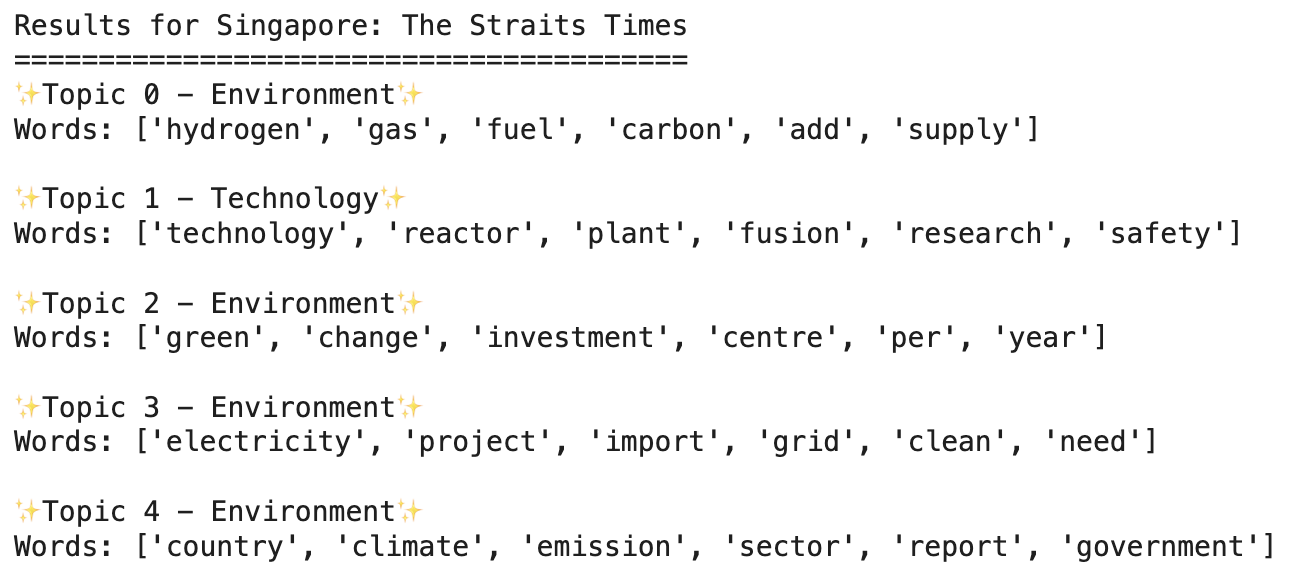

\
Additionally, the words generated by the topic model can overlap across topics. This makes it difficult to draw distinctions between the topics.

# **Conclusion**





This study employed various text analysis techniques, including topic modeling and keyword extraction, to analyze media coverage of nuclear energy in the Philippines, Indonesia, and Singapore. The results revealed that coverage in all three countries primarily focused on 'Economics,' 'Environment,' and 'Technology,' with nuclear energy largely framed within the context of emissions reduction and climate change. Notably, Singapore's media included more references to 'Safety and Risks,' reflecting the country's ongoing exploration of nuclear energy. Despite the overall positive tone, there are limitations in the data corpus and topic modeling approach that may have
influenced the results. As Southeast-Asia progress on its nuclear energy journey, it is crucial not to overlook the role that media narratives play in shaping public perceptions and policy discourse on nuclear energy in the region.